In [1]:
import datetime
import alphalens
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import quandl
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import t
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats as scipy_stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
#register_matplotlib_converters()
plt.style.use('bmh')

In [2]:
Ticker=['SPY']
print(Ticker,len(Ticker))
mb=pd.DataFrame()
for i in Ticker:
    mb[i]=wb.DataReader(i,'yahoo', start='1995-01-01')['Adj Close']
pct_b_change = mb.pct_change().dropna()

['SPY'] 1


In [3]:
oil = quandl.get("FRED/DCOILWTICO", authtoken="bBxaD71sAGrij1mxHsys")
oil.columns = ["WTI"]
pct_oil_change = oil.pct_change()

In [4]:
Cum_ret_Long_only_EW= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4898669.71},{"x":947084400,"y":4739308.24},{"x":947106000,"y":4739308.24},{"x":947192400,"y":4758231.33},{"x":947257200,"y":4818610.78},{"x":947278800,"y":4818610.78},{"x":947307600,"y":4960551.17},{"x":947480400,"y":4960551.17},{"x":947538000,"y":4960551.17},{"x":947624400,"y":4986193.05},{"x":947653200,"y":4931431.54},{"x":947710800,"y":4931431.54},{"x":947797200,"y":4872797.59},{"x":947826000,"y":4938438.38},{"x":947883600,"y":4938438.38},{"x":947912400,"y":4951848.41},{"x":948171600,"y":4951848.41},{"x":948229200,"y":4951848.41},{"x":948315600,"y":4993238.49},{"x":948344400,"y":4986921.06},{"x":948402000,"y":4986921.06},{"x":948488400,"y":4921047.67},{"x":948517200,"y":4939784.94},{"x":948690000,"y":4939784.94},{"x":948747600,"y":4939784.94},{"x":948834000,"y":4786126.72},{"x":948862800,"y":4779104.18},{"x":948920400,"y":4779104.18},{"x":949006800,"y":4791251.16},{"x":949035600,"y":4770593.6},{"x":949093200,"y":4770593.6},{"x":949122000,"y":4668400.17},{"x":949294800,"y":4668400.17},{"x":949352400,"y":4668400.17},{"x":949438800,"y":4717614.44},{"x":949467600,"y":4758906.575},{"x":949525200,"y":4758906.575},{"x":949611600,"y":4784524.635},{"x":949640400,"y":4883565.945},{"x":949698000,"y":4883565.945},{"x":949726800,"y":4871852.075},{"x":949899600,"y":4871852.075},{"x":949957200,"y":4871852.075},{"x":950043600,"y":4855935.295},{"x":950072400,"y":4874200.625},{"x":950130000,"y":4874200.625},{"x":950216400,"y":4783550.475},{"x":950245200,"y":4863532.875},{"x":950302800,"y":4863532.875},{"x":950331600,"y":4783469.215},{"x":950504400,"y":4784460.625},{"x":950562000,"y":4784460.625},{"x":950648400,"y":4865846.505},{"x":950677200,"y":5003468.285},{"x":950734800,"y":5003468.285},{"x":950821200,"y":4977286.125},{"x":950850000,"y":4943797.675},{"x":950907600,"y":4943797.675},{"x":950936400,"y":4884187.735},{"x":951195600,"y":4884562.415},{"x":951253200,"y":4884562.415},{"x":951339600,"y":4915777.915},{"x":951368400,"y":4889487.755},{"x":951426000,"y":4889487.755},{"x":951512400,"y":4926005.165},{"x":951541200,"y":4895508.405},{"x":951714000,"y":4895713.695},{"x":951771600,"y":4895713.695},{"x":951858000,"y":5019515.165},{"x":951886800,"y":5291646.725},{"x":951944400,"y":5291646.725},{"x":952030800,"y":5311388.095},{"x":952059600,"y":5352603.295},{"x":952117200,"y":5352603.295},{"x":952146000,"y":5380509.575},{"x":952318800,"y":5380509.575},{"x":952376400,"y":5380509.575},{"x":952462800,"y":5356171.785},{"x":952491600,"y":5389385.805},{"x":952549200,"y":5389385.805},{"x":952635600,"y":5358347.535},{"x":952664400,"y":5445910.705},{"x":952722000,"y":5445910.705},{"x":952750800,"y":5474575.685},{"x":952923600,"y":5474575.685},{"x":952981200,"y":5474575.685},{"x":953067600,"y":5414981.485},{"x":953096400,"y":5352617.085},{"x":953154000,"y":5352617.085},{"x":953240400,"y":5511794.785},{"x":953269200,"y":5778408.105},{"x":953326800,"y":5778408.105},{"x":953355600,"y":5724355.655},{"x":953528400,"y":5724355.7022},{"x":953586000,"y":5724355.7022},{"x":953672400,"y":5553090.3258},{"x":953701200,"y":5637115.2558},{"x":953758800,"y":5637115.2558},{"x":953845200,"y":5702693.3558},{"x":953874000,"y":5749021.4258},{"x":953931600,"y":5749021.4258},{"x":953960400,"y":5731366.9758},{"x":954169200,"y":5731366.9758},{"x":954190800,"y":5731366.9758},{"x":954277200,"y":5734710.7758},{"x":954342000,"y":5674183.3658},{"x":954363600,"y":5674183.3658},{"x":954450000,"y":5768809.3958},{"x":954514800,"y":5791566.7958},{"x":954536400,"y":5791566.7958},{"x":954565200,"y":5907781.6358},{"x":954651600,"y":5907781.6358},{"x":954734400,"y":5907781.6358},{"x":954792000,"y":5907781.6358},{"x":954878400,"y":5903522.0408},{"x":954907200,"y":5854986.3008},{"x":954964800,"y":5854986.3008},{"x":955051200,"y":5830210.4708},{"x":955080000,"y":5853471.4708},{"x":955137600,"y":5853471.4708},{"x":955166400,"y":5887604.6008},{"x":955339200,"y":5887604.6008},{"x":955396800,"y":5887604.6008},{"x":955483200,"y":5836610.0008},{"x":955512000,"y":5916452.5108},{"x":955569600,"y":5916452.5108},{"x":955656000,"y":5884718.0508},{"x":955684800,"y":5803042.1308},{"x":955742400,"y":5803042.1308},{"x":955771200,"y":5540357.1108},{"x":955944000,"y":5540357.1108},{"x":956001600,"y":5540357.1108},{"x":956088000,"y":5566141.6108},{"x":956116800,"y":5700574.5208},{"x":956174400,"y":5700574.5208},{"x":956260800,"y":5717214.0508},{"x":956289600,"y":5709783.2508},{"x":956548800,"y":5709783.2508},{"x":956606400,"y":5709783.2508},{"x":956692800,"y":5729543.4108},{"x":956721600,"y":5785994.0408},{"x":956779200,"y":5785994.0408},{"x":956865600,"y":5753884.2908},{"x":956894400,"y":5784258.7608},{"x":956952000,"y":5784258.7608},{"x":956980800,"y":5768527.0308},{"x":957153600,"y":5768527.0308},{"x":957211200,"y":5768527.0308},{"x":957297600,"y":5837837.5958},{"x":957326400,"y":5833486.6658},{"x":957384000,"y":5833486.6658},{"x":957470400,"y":5711747.3158},{"x":957499200,"y":5781558.2158},{"x":957556800,"y":5781558.2158},{"x":957585600,"y":5843639.1458},{"x":957758400,"y":5844514.8458},{"x":957816000,"y":5844514.8458},{"x":957902400,"y":5821113.1258},{"x":957931200,"y":5817522.5158},{"x":957988800,"y":5817522.5158},{"x":958075200,"y":5745558.5258},{"x":958104000,"y":5836853.6458},{"x":958161600,"y":5836853.6458},{"x":958190400,"y":5870641.4858},{"x":958363200,"y":5871967.0058},{"x":958420800,"y":5871967.0058},{"x":958507200,"y":5967431.6558},{"x":958536000,"y":6002658.3158},{"x":958593600,"y":6002658.3158},{"x":958680000,"y":5949053.7958},{"x":958708800,"y":5911266.4758},{"x":958766400,"y":5911266.4758},{"x":958795200,"y":5842558.0958},{"x":958968000,"y":5842558.0958},{"x":959025600,"y":5842558.0958},{"x":959112000,"y":5807300.0658},{"x":959140800,"y":5789934.8858},{"x":959198400,"y":5789934.8858},{"x":959284800,"y":5771286.1558},{"x":959313600,"y":5725233.4258},{"x":959371200,"y":5725233.4258},{"x":959400000,"y":5656461.7258},{"x":959659200,"y":5656895.4058},{"x":959716800,"y":5656895.4058},{"x":959803200,"y":5745924.0358},{"x":959832000,"y":5784070.6308},{"x":959889600,"y":5784070.6308},{"x":959976000,"y":5813018.2408},{"x":960004800,"y":5850225.3708},{"x":960177600,"y":5850801.8908},{"x":960235200,"y":5850801.8908},{"x":960321600,"y":5772031.8608},{"x":960350400,"y":5782507.7808},{"x":960408000,"y":5782507.7808},{"x":960494400,"y":5813238.7908},{"x":960523200,"y":5824403.9908},{"x":960580800,"y":5824403.9908},{"x":960609600,"y":5802729.4208},{"x":960782400,"y":5802729.4208},{"x":960840000,"y":5802729.4208},{"x":960926400,"y":5803087.5208},{"x":960955200,"y":5856355.9608},{"x":961012800,"y":5856355.9608},{"x":961099200,"y":5825069.2208},{"x":961128000,"y":5775846.8808},{"x":961185600,"y":5775846.8808},{"x":961214400,"y":5885852.6108},{"x":961387200,"y":5885852.6108},{"x":961444800,"y":5885852.6108},{"x":961531200,"y":5870472.2308},{"x":961560000,"y":5863917.4208},{"x":961617600,"y":5863917.4208},{"x":961704000,"y":5886694.7808},{"x":961732800,"y":5823223.7708},{"x":961790400,"y":5823223.7708},{"x":961819200,"y":5879790.4208},{"x":961992000,"y":5879790.4208},{"x":962049600,"y":5879790.4208},{"x":962136000,"y":5837999.5408},{"x":962164800,"y":5852596.7408},{"x":962222400,"y":5852596.7408},{"x":962308800,"y":5823748.3208},{"x":962337600,"y":5835993.2108},{"x":962395200,"y":5835993.2108},{"x":962424000,"y":5798421.8058},{"x":962510400,"y":5798421.8058},{"x":962647200,"y":5798421.8058},{"x":962683200,"y":5870681.4458},{"x":962827200,"y":5871325.1958},{"x":962856000,"y":5721718.5258},{"x":962913600,"y":5721718.5258},{"x":963000000,"y":5757959.6758},{"x":963028800,"y":5801241.8358},{"x":963237600,"y":5801241.8358},{"x":963259200,"y":5801241.8358},{"x":963345600,"y":5824734.6458},{"x":963410400,"y":5915252.8458},{"x":963432000,"y":5915252.8458},{"x":963518400,"y":5916594.1358},{"x":963583200,"y":5920898.6758},{"x":963604800,"y":5920898.6758},{"x":963633600,"y":5956253.0758},{"x":963842400,"y":5956253.0758},{"x":963864000,"y":5956253.0758},{"x":963950400,"y":5955528.2058},{"x":964015200,"y":5950288.0958},{"x":964036800,"y":5950288.0958},{"x":964123200,"y":5866350.8258},{"x":964188000,"y":5795220.4458},{"x":964209600,"y":5795220.4458},{"x":964238400,"y":5668582.6458},{"x":964411200,"y":5668582.6458},{"x":964468800,"y":5668582.6458},{"x":964555200,"y":5613841.4358},{"x":964584000,"y":5594750.7758},{"x":964641600,"y":5594750.7758},{"x":964728000,"y":5612204.7158},{"x":964756800,"y":5648372.6458},{"x":964814400,"y":5648372.6458},{"x":964843200,"y":5599749.5958},{"x":965016000,"y":5599749.5958},{"x":965073600,"y":5599749.5958},{"x":965160000,"y":5617190.8908},{"x":965188800,"y":5653523.5708},{"x":965246400,"y":5653523.5708},{"x":965332800,"y":5706794.7408},{"x":965361600,"y":5669425.1208},{"x":965419200,"y":5669425.1208},{"x":965448000,"y":5665468.9608},{"x":965656800,"y":5665468.9608},{"x":965678400,"y":5665468.9608},{"x":965764800,"y":5716243.8708},{"x":965829600,"y":5740084.1408},{"x":965851200,"y":5740084.1408},{"x":965937600,"y":5707174.0708},{"x":966002400,"y":5650284.9208},{"x":966024000,"y":5650284.9208},{"x":966052800,"y":5674617.3408},{"x":966225600,"y":5675958.9308},{"x":966283200,"y":5675958.9308},{"x":966369600,"y":5758468.0708},{"x":966398400,"y":5750450.0108},{"x":966456000,"y":5750450.0108},{"x":966542400,"y":5784506.9808},{"x":966571200,"y":5812905.8108},{"x":966628800,"y":5812905.8108},{"x":966657600,"y":5776930.3808},{"x":966830400,"y":5777636.1908},{"x":966888000,"y":5777636.1908},{"x":966974400,"y":5782500.3208},{"x":967003200,"y":5825651.1508},{"x":967060800,"y":5825651.1508},{"x":967147200,"y":5879037.5608},{"x":967176000,"y":5841776.2508},{"x":967233600,"y":5841776.2508},{"x":967262400,"y":5840701.5408},{"x":967435200,"y":5840701.5408},{"x":967492800,"y":5840701.5408},{"x":967579200,"y":5819390.9208},{"x":967608000,"y":5830212.4808},{"x":967665600,"y":5830212.4808},{"x":967752000,"y":5801552.1058},{"x":967780800,"y":5808258.0658},{"x":967838400,"y":5808258.0658},{"x":967867200,"y":5855943.4858},{"x":968126400,"y":5856198.3058},{"x":968184000,"y":5856198.3058},{"x":968270400,"y":5858644.1958},{"x":968299200,"y":5901811.3058},{"x":968356800,"y":5901811.3058},{"x":968443200,"y":5913722.9958},{"x":968472000,"y":5869959.0758},{"x":968644800,"y":5869959.0758},{"x":968702400,"y":5869959.0758},{"x":968788800,"y":5935173.8058},{"x":968817600,"y":5942297.5658},{"x":968875200,"y":5942297.5658},{"x":968961600,"y":5902837.7858},{"x":968990400,"y":5882620.7958},{"x":969048000,"y":5882620.7958},{"x":969076800,"y":5888956.0558},{"x":969249600,"y":5888956.0558},{"x":969307200,"y":5888956.0558},{"x":969393600,"y":5809462.4258},{"x":969422400,"y":5799699.6858},{"x":969480000,"y":5799699.6858},{"x":969566400,"y":5742685.8358},{"x":969595200,"y":5684538.0558},{"x":969652800,"y":5684538.0558},{"x":969681600,"y":5697940.4658},{"x":969854400,"y":5697940.4658},{"x":969912000,"y":5697940.4658},{"x":969998400,"y":5624377.1058},{"x":970027200,"y":5599328.2058},{"x":970084800,"y":5599328.2058},{"x":970171200,"y":5656990.8858},{"x":970200000,"y":5671786.3958},{"x":970257600,"y":5671786.3958},{"x":970286400,"y":5634047.6608},{"x":970372800,"y":5634047.6608},{"x":970516800,"y":5634047.6608},{"x":970545600,"y":5626073.2908},{"x":970603200,"y":5626073.2908},{"x":970689600,"y":5589783.8608},{"x":970718400,"y":5596882.3808},{"x":970776000,"y":5596882.3808},{"x":970862400,"y":5564761.7708},{"x":970891200,"y":5455325.5008},{"x":971064000,"y":5455325.5008},{"x":971121600,"y":5455325.5008},{"x":971208000,"y":5511201.9508},{"x":971236800,"y":5504385.9508},{"x":971294400,"y":5504385.9508},{"x":971380800,"y":5529835.0908},{"x":971409600,"y":5466707.9008},{"x":971467200,"y":5466707.9008},{"x":971496000,"y":5472436.8708},{"x":971668800,"y":5472436.8708},{"x":971726400,"y":5472436.8708},{"x":971812800,"y":5460897.6008},{"x":971841600,"y":5388690.9708},{"x":971899200,"y":5388690.9708},{"x":971985600,"y":5369771.7708},{"x":972014400,"y":5513289.0808},{"x":972072000,"y":5513289.0808},{"x":972100800,"y":5520781.4408},{"x":972273600,"y":5520781.4408},{"x":972331200,"y":5520781.4408},{"x":972417600,"y":5512531.5308},{"x":972446400,"y":5472666.2208},{"x":972504000,"y":5472666.2208},{"x":972590400,"y":5324642.5308},{"x":972619200,"y":5380881.1908},{"x":972676800,"y":5380881.1908},{"x":972705600,"y":5353197.6908},{"x":972882000,"y":5353962.7508},{"x":972939600,"y":5353962.7508},{"x":973026000,"y":5409508.7308},{"x":973054800,"y":5508823.8508},{"x":973112400,"y":5508823.8508},{"x":973198800,"y":5557899.3508},{"x":973227600,"y":5623326.1108},{"x":973285200,"y":5623326.1108},{"x":973314000,"y":5669152.5308},{"x":973522800,"y":5669152.5308},{"x":973544400,"y":5669152.5308},{"x":973630800,"y":5668737.5408},{"x":973695600,"y":5717125.3208},{"x":973717200,"y":5717125.3208},{"x":973803600,"y":5703531.8508},{"x":973868400,"y":5627042.4708},{"x":973890000,"y":5627042.4708},{"x":973918800,"y":5533341.5308},{"x":974091600,"y":5535376.7708},{"x":974149200,"y":5535376.7708},{"x":974235600,"y":5544747.6708},{"x":974264400,"y":5628039.3208},{"x":974322000,"y":5628039.3208},{"x":974408400,"y":5712334.2108},{"x":974437200,"y":5665931.9208},{"x":974494800,"y":5665931.9208},{"x":974523600,"y":5653996.2008},{"x":974696400,"y":5655458.5708},{"x":974754000,"y":5655458.5708},{"x":974840400,"y":5557906.7208},{"x":974869200,"y":5541995.3208},{"x":974926800,"y":5541995.3208},{"x":974955600,"y":5476210.0408},{"x":975042000,"y":5476741.4008},{"x":975092400,"y":5476741.4008},{"x":975128400,"y":5573820.7508},{"x":975301200,"y":5573820.7508},{"x":975358800,"y":5573820.7508},{"x":975445200,"y":5611648.3008},{"x":975474000,"y":5523123.3808},{"x":975531600,"y":5523123.3808},{"x":975618000,"y":5442901.9508},{"x":975646800,"y":5280071.0108},{"x":975704400,"y":5280071.0108},{"x":975733200,"y":5382603.3508},{"x":975906000,"y":5382603.3508},{"x":975963600,"y":5382603.3508},{"x":976050000,"y":5462448.1108},{"x":976078800,"y":5543450.4008},{"x":976136400,"y":5543450.4008},{"x":976222800,"y":5476353.9508},{"x":976251600,"y":5461816.5508},{"x":976309200,"y":5461816.5508},{"x":976338000,"y":5594449.5508},{"x":976510800,"y":5594449.5508},{"x":976568400,"y":5594449.5508},{"x":976654800,"y":5619434.3208},{"x":976683600,"y":5602276.1008},{"x":976741200,"y":5602276.1008},{"x":976827600,"y":5538564.4608},{"x":976856400,"y":5448359.2308},{"x":976914000,"y":5448359.2308},{"x":976942800,"y":5403841.7108},{"x":977115600,"y":5403841.7108},{"x":977173200,"y":5403841.7108},{"x":977259600,"y":5492629.6408},{"x":977288400,"y":5501247.7408},{"x":977346000,"y":5501247.7408},{"x":977432400,"y":5363039.3108},{"x":977461200,"y":5445116.1608},{"x":977518800,"y":5445116.1608},{"x":977547600,"y":5606926.5308},{"x":977806800,"y":5606926.5308},{"x":977864400,"y":5606926.5308},{"x":977950800,"y":5614477.6108},{"x":977979600,"y":5614477.6108},{"x":978037200,"y":5614477.6108},{"x":978123600,"y":5614477.6108},{"x":978152400,"y":5545105.4458},{"x":978325200,"y":5545105.4458},{"x":978469200,"y":5545105.4458},{"x":978498000,"y":5457910.3158},{"x":978555600,"y":5457910.3158},{"x":978642000,"y":5516342.3558},{"x":978670800,"y":5415717.4158},{"x":978728400,"y":5415717.4158},{"x":978757200,"y":5317117.0658},{"x":978930000,"y":5317117.0658},{"x":978987600,"y":5317117.0658},{"x":979074000,"y":5333360.2058},{"x":979102800,"y":5328985.3858},{"x":979160400,"y":5328985.3858},{"x":979246800,"y":5410689.5658},{"x":979275600,"y":5469584.2758},{"x":979333200,"y":5469584.2758},{"x":979362000,"y":5535087.4558},{"x":979621200,"y":5535087.4558},{"x":979678800,"y":5535087.4558},{"x":979765200,"y":5580364.6358},{"x":979794000,"y":5529608.8758},{"x":979851600,"y":5529608.8758},{"x":979938000,"y":5526830.1858},{"x":979966800,"y":5451536.1558},{"x":980139600,"y":5451536.1558},{"x":980197200,"y":5451536.1558},{"x":980283600,"y":5557328.4658},{"x":980312400,"y":5635689.1258},{"x":980370000,"y":5635689.1258},{"x":980456400,"y":5667354.4158},{"x":980485200,"y":5727462.3458},{"x":980542800,"y":5727462.3458},{"x":980571600,"y":5687570.6758},{"x":980744400,"y":5687570.6758},{"x":980802000,"y":5687570.6758},{"x":980888400,"y":5738887.9658},{"x":980917200,"y":5768350.5958},{"x":980974800,"y":5768350.5958},{"x":981061200,"y":5818417.1658},{"x":981090000,"y":5810874.9958},{"x":981147600,"y":5810874.9958},{"x":981176400,"y":5787481.4358},{"x":981349200,"y":5787481.4358},{"x":981406800,"y":5787481.4358},{"x":981493200,"y":5804839.0258},{"x":981522000,"y":5855149.0058},{"x":981579600,"y":5855149.0058},{"x":981666000,"y":5864176.1658},{"x":981694800,"y":5771465.7058},{"x":981752400,"y":5771465.7058},{"x":981781200,"y":5736167.6658},{"x":981954000,"y":5736554.7058},{"x":982011600,"y":5736554.7058},{"x":982098000,"y":5775482.9158},{"x":982126800,"y":5765116.6458},{"x":982184400,"y":5765116.6458},{"x":982270800,"y":5752638.8658},{"x":982299600,"y":5730202.8658},{"x":982357200,"y":5730202.8658},{"x":982386000,"y":5690702.4958},{"x":982645200,"y":5691113.6558},{"x":982702800,"y":5691113.6558},{"x":982789200,"y":5656805.0858},{"x":982818000,"y":5588879.8858},{"x":982875600,"y":5588879.8858},{"x":982962000,"y":5542650.7158},{"x":982990800,"y":5526243.7458},{"x":983163600,"y":5526243.7458},{"x":983221200,"y":5526243.7458},{"x":983307600,"y":5661894.5658},{"x":983336400,"y":5616456.3958},{"x":983394000,"y":5616456.3958},{"x":983480400,"y":5523948.4208},{"x":983509200,"y":5551556.8808},{"x":983566800,"y":5551556.8808},{"x":983595600,"y":5588003.5608},{"x":983768400,"y":5588003.5608},{"x":983826000,"y":5588003.5608},{"x":983912400,"y":5647686.8908},{"x":983941200,"y":5683280.1208},{"x":983998800,"y":5683280.1208},{"x":984085200,"y":5735483.9908},{"x":984114000,"y":5792387.6008},{"x":984171600,"y":5792387.6008},{"x":984200400,"y":5695104.5808},{"x":984373200,"y":5695104.5808},{"x":984430800,"y":5695104.5808},{"x":984517200,"y":5522829.2908},{"x":984546000,"y":5479659.0908},{"x":984603600,"y":5479659.0908},{"x":984690000,"y":5373244.2108},{"x":984718800,"y":5330095.5908},{"x":984776400,"y":5330095.5908},{"x":984805200,"y":5182165.2508},{"x":984978000,"y":5182165.2508},{"x":985035600,"y":5182165.2508},{"x":985122000,"y":5308995.5408},{"x":985150800,"y":5292770.1708},{"x":985208400,"y":5292770.1708},{"x":985294800,"y":5195139.0308},{"x":985323600,"y":5107400.7508},{"x":985381200,"y":5107400.7508},{"x":985410000,"y":5188662.7708},{"x":985618800,"y":5188662.7708},{"x":985640400,"y":5188662.7708},{"x":985726800,"y":5261164.2608},{"x":985791600,"y":5291906.5008},{"x":985813200,"y":5291906.5008},{"x":985899600,"y":5200803.8408},{"x":985964400,"y":5182352.9908},{"x":985986000,"y":5182352.9908},{"x":986014800,"y":5264205.2658},{"x":986101200,"y":5264205.2658},{"x":986184000,"y":5264205.2658},{"x":986241600,"y":5264205.2658},{"x":986328000,"y":5129659.8858},{"x":986356800,"y":4979504.0158},{"x":986414400,"y":4979504.0158},{"x":986500800,"y":5047377.5758},{"x":986529600,"y":5274565.7158},{"x":986587200,"y":5274565.7158},{"x":986616000,"y":5226236.0558},{"x":986824800,"y":5226236.0558},{"x":986846400,"y":5226236.0558},{"x":986932800,"y":5304083.8258},{"x":986997600,"y":5389431.5258},{"x":987019200,"y":5389431.5258},{"x":987105600,"y":5327393.7158},{"x":987134400,"y":5433361.8558},{"x":987429600,"y":5433361.8558},{"x":987451200,"y":5433361.8558},{"x":987537600,"y":5452466.8358},{"x":987602400,"y":5496464.8758},{"x":987624000,"y":5496464.8758},{"x":987710400,"y":5670106.4558},{"x":987775200,"y":5678082.9658},{"x":987796800,"y":5678082.9658},{"x":987825600,"y":5648910.5758},{"x":987998400,"y":5648942.59},{"x":988056000,"y":5648942.5900},{"x":988142400,"y":5662205.3084},{"x":988171200,"y":5631053.4584},{"x":988228800,"y":5631053.4584},{"x":988315200,"y":5731142.7584},{"x":988344000,"y":5848571.9484},{"x":988401600,"y":5848571.9484},{"x":988430400,"y":5883043.4384},{"x":988603200,"y":5967168.2384},{"x":988660800,"y":5967168.2384},{"x":988747200,"y":5845902.0484},{"x":988776000,"y":5895142.3884},{"x":988833600,"y":5895142.3884},{"x":988920000,"y":5811038.8584},{"x":988948800,"y":5743514.9884},{"x":989006400,"y":5743514.9884},{"x":989035200,"y":5830150.2884},{"x":989208000,"y":5830965.3884},{"x":989265600,"y":5830965.3884},{"x":989352000,"y":5825452.0484},{"x":989380800,"y":5808811.3384},{"x":989438400,"y":5808811.3384},{"x":989524800,"y":5885617.4684},{"x":989553600,"y":5899157.7884},{"x":989611200,"y":5899157.7884},{"x":989640000,"y":5872904.3584},{"x":989812800,"y":5874178.3284},{"x":989870400,"y":5874178.3284},{"x":989956800,"y":5906535.3884},{"x":989985600,"y":5950466.9284},{"x":990043200,"y":5950466.9284},{"x":990129600,"y":6087447.6484},{"x":990158400,"y":6186013.3684},{"x":990216000,"y":6186013.3684},{"x":990244800,"y":6238740.2984},{"x":990417600,"y":6238740.2984},{"x":990475200,"y":6238740.2984},{"x":990561600,"y":6345536.1984},{"x":990590400,"y":6325461.3184},{"x":990648000,"y":6325461.3184},{"x":990734400,"y":6198843.2384},{"x":990763200,"y":6193882.5684},{"x":990820800,"y":6193882.5684},{"x":990849600,"y":6182496.3384},{"x":991108800,"y":6183645.1784},{"x":991166400,"y":6183645.1784},{"x":991252800,"y":6119924.5884},{"x":991281600,"y":6008313.0234},{"x":991339200,"y":6008313.0234},{"x":991425600,"y":6030066.7634},{"x":991454400,"y":6054521.0434},{"x":991627200,"y":6055806.5634},{"x":991684800,"y":6055806.5634},{"x":991771200,"y":6120475.6534},{"x":991800000,"y":6204115.4934},{"x":991857600,"y":6204115.4934},{"x":991944000,"y":6070487.4734},{"x":991972800,"y":6042678.5734},{"x":992030400,"y":6042678.5734},{"x":992059200,"y":6040533.9234},{"x":992232000,"y":6040533.9234},{"x":992289600,"y":6040533.9234},{"x":992376000,"y":5984182.4934},{"x":992404800,"y":6041810.7434},{"x":992462400,"y":6041810.7434},{"x":992548800,"y":6033518.5734},{"x":992577600,"y":5950758.0034},{"x":992635200,"y":5950758.0034},{"x":992664000,"y":5927949.1234},{"x":992836800,"y":5933088.0334},{"x":992894400,"y":5933088.0334},{"x":992980800,"y":5869110.6834},{"x":993009600,"y":5870565.2334},{"x":993067200,"y":5870565.2334},{"x":993153600,"y":5891605.3734},{"x":993182400,"y":5846432.0234},{"x":993240000,"y":5846432.0234},{"x":993268800,"y":5813671.2434},{"x":993441600,"y":5813671.2434},{"x":993499200,"y":5813671.2434},{"x":993585600,"y":5751373.6334},{"x":993614400,"y":5805388.3834},{"x":993672000,"y":5805388.3834},{"x":993758400,"y":5735796.3634},{"x":993787200,"y":5720467.5134},{"x":993844800,"y":5720467.5134},{"x":993873600,"y":5769075.4134},{"x":993960000,"y":5769075.4134},{"x":994104000,"y":5769296.7534},{"x":994132800,"y":5699716.4634},{"x":994183200,"y":5699716.4634},{"x":994219200,"y":5727538.8134},{"x":994305600,"y":5727538.8134},{"x":994363200,"y":5727538.8134},{"x":994449600,"y":5716874.7334},{"x":994478400,"y":5664215.5334},{"x":994687200,"y":5664215.5334},{"x":994708800,"y":5664215.5334},{"x":994795200,"y":5612207.0334},{"x":994860000,"y":5546414.1134},{"x":994881600,"y":5546414.1134},{"x":994968000,"y":5535617.7334},{"x":995032800,"y":5603613.3934},{"x":995054400,"y":5603613.3934},{"x":995083200,"y":5657243.0934},{"x":995292000,"y":5657243.0934},{"x":995313600,"y":5657243.0934},{"x":995400000,"y":5580234.9934},{"x":995464800,"y":5626009.4034},{"x":995486400,"y":5626009.4034},{"x":995572800,"y":5616692.5334},{"x":995637600,"y":5714606.2934},{"x":995659200,"y":5714606.2934},{"x":995688000,"y":5796722.1434},{"x":995860800,"y":5796722.1434},{"x":995918400,"y":5796722.1434},{"x":996004800,"y":5775080.6834},{"x":996033600,"y":5667150.3334},{"x":996091200,"y":5667150.3334},{"x":996177600,"y":5778502.8534},{"x":996206400,"y":5833495.0234},{"x":996264000,"y":5833495.0234},{"x":996292800,"y":5909953.7134},{"x":996465600,"y":5909953.7134},{"x":996523200,"y":5909953.7134},{"x":996609600,"y":5892731.2384},{"x":996638400,"y":5837228.9684},{"x":996696000,"y":5837228.9684},{"x":996782400,"y":5824525.5284},{"x":996811200,"y":5834109.6584},{"x":996868800,"y":5834109.6584},{"x":996897600,"y":5786010.7284},{"x":997106400,"y":5786010.7284},{"x":997128000,"y":5786010.7284},{"x":997214400,"y":5783695.8784},{"x":997279200,"y":5775309.0984},{"x":997300800,"y":5775309.0984},{"x":997387200,"y":5697032.3784},{"x":997452000,"y":5715678.7784},{"x":997473600,"y":5715678.7784},{"x":997502400,"y":5756267.1784},{"x":997675200,"y":5757087.4184},{"x":997732800,"y":5757087.4184},{"x":997819200,"y":5781244.1384},{"x":997848000,"y":5822087.2384},{"x":997905600,"y":5822087.2384},{"x":997992000,"y":5907161.3984},{"x":998020800,"y":5897077.9784},{"x":998078400,"y":5897077.9784},{"x":998107200,"y":5820677.3284},{"x":998280000,"y":5820677.3284},{"x":998337600,"y":5820677.3284},{"x":998424000,"y":5795198.1484},{"x":998452800,"y":5774353.9984},{"x":998510400,"y":5774353.9984},{"x":998596800,"y":5828112.7784},{"x":998625600,"y":5808195.5884},{"x":998683200,"y":5808195.5884},{"x":998712000,"y":5875234.7584},{"x":998920800,"y":5875234.7584},{"x":998942400,"y":5875234.7584},{"x":999028800,"y":5863133.7284},{"x":999093600,"y":5797421.0284},{"x":999115200,"y":5797421.0284},{"x":999201600,"y":5814995.7484},{"x":999266400,"y":5715034.1484},{"x":999288000,"y":5715034.1484},{"x":999316800,"y":5703000.6684},{"x":999576000,"y":5703915.4884},{"x":999633600,"y":5703915.4884},{"x":999720000,"y":5732791.4584},{"x":999748800,"y":5695363.0784},{"x":999806400,"y":5695363.0784},{"x":999892800,"y":5623225.7884},{"x":999921600,"y":5545893.7984},{"x":1000094400,"y":5545893.7984},{"x":1000152000,"y":5545893.7984},{"x":1000180800,"y":5513502.5084},{"x":1000267200,"y":5513502.5084},{"x":1000353600,"y":5513502.5084},{"x":1000440000,"y":5513502.5084},{"x":1000526400,"y":5513502.5084},{"x":1000699200,"y":5513608.8584},{"x":1000756800,"y":5513608.8584},{"x":1000843200,"y":5280066.6184},{"x":1000872000,"y":5160952.6384},{"x":1000929600,"y":5160952.6384},{"x":1001016000,"y":5035077.8784},{"x":1001044800,"y":4934447.9284},{"x":1001102400,"y":4934447.9284},{"x":1001131200,"y":4890114.7984},{"x":1001304000,"y":4890114.7984},{"x":1001361600,"y":4890114.7984},{"x":1001448000,"y":4906312.3684},{"x":1001476800,"y":4900422.0884},{"x":1001534400,"y":4900422.0884},{"x":1001620800,"y":4898183.3484},{"x":1001649600,"y":4993019.5884},{"x":1001707200,"y":4993019.5884},{"x":1001736000,"y":5136827.2284},{"x":1001908800,"y":5136827.2284},{"x":1001966400,"y":5136827.2284},{"x":1002052800,"y":5075781.2084},{"x":1002081600,"y":5112729.0684},{"x":1002139200,"y":5112729.0684},{"x":1002225600,"y":5213671.2484},{"x":1002254400,"y":5303752.1484},{"x":1002312000,"y":5303752.1484},{"x":1002340800,"y":5302962.3984},{"x":1002549600,"y":5302962.3984},{"x":1002571200,"y":5302962.3984},{"x":1002657600,"y":5270063.8484},{"x":1002722400,"y":5278945.6184},{"x":1002744000,"y":5278945.6184},{"x":1002830400,"y":5490986.3384},{"x":1002895200,"y":5569040.4984},{"x":1002916800,"y":5569040.4984},{"x":1002945600,"y":5560143.6484},{"x":1003118400,"y":5560143.6484},{"x":1003176000,"y":5560143.6484},{"x":1003262400,"y":5497295.6284},{"x":1003291200,"y":5596159.3384},{"x":1003348800,"y":5596159.3384},{"x":1003435200,"y":5503078.2784},{"x":1003464000,"y":5416752.1084},{"x":1003521600,"y":5416752.1084},{"x":1003550400,"y":5484182.2184},{"x":1003759200,"y":5484182.2184},{"x":1003780800,"y":5484182.2184},{"x":1003867200,"y":5561655.5084},{"x":1003932000,"y":5525579.4984},{"x":1003953600,"y":5525579.4984},{"x":1004040000,"y":5521580.7384},{"x":1004104800,"y":5653412.3484},{"x":1004126400,"y":5653412.3484},{"x":1004155200,"y":5716753.9384},{"x":1004331600,"y":5717759.4184},{"x":1004389200,"y":5717759.4184},{"x":1004475600,"y":5623230.7884},{"x":1004504400,"y":5464085.8284},{"x":1004562000,"y":5464085.8284},{"x":1004648400,"y":5472283.2684},{"x":1004677200,"y":5567869.9984},{"x":1004734800,"y":5567869.9984},{"x":1004763600,"y":5556257.6084},{"x":1004936400,"y":5556257.6084},{"x":1004994000,"y":5556257.6084},{"x":1005080400,"y":5593577.4184},{"x":1005109200,"y":5634558.9384},{"x":1005166800,"y":5634558.9384},{"x":1005253200,"y":5629139.2184},{"x":1005282000,"y":5584510.5384},{"x":1005339600,"y":5584510.5384},{"x":1005368400,"y":5623165.1984},{"x":1005577200,"y":5623165.1984},{"x":1005598800,"y":5623165.1984},{"x":1005685200,"y":5638641.7784},{"x":1005750000,"y":5720710.9884},{"x":1005771600,"y":5720710.9884},{"x":1005858000,"y":5631572.9584},{"x":1005922800,"y":5507566.8684},{"x":1005944400,"y":5507566.8684},{"x":1005973200,"y":5510702.1284},{"x":1006146000,"y":5512053.8384},{"x":1006203600,"y":5512053.8384},{"x":1006290000,"y":5592668.9484},{"x":1006318800,"y":5610148.4484},{"x":1006376400,"y":5610148.4484},{"x":1006405200,"y":5563825.3884},{"x":1006491600,"y":5563825.3884},{"x":1006545600,"y":5563825.3884},{"x":1006578000,"y":5631717.1884},{"x":1006750800,"y":5632471.9384},{"x":1006808400,"y":5632471.9384},{"x":1006894800,"y":5604066.6684},{"x":1006923600,"y":5593676.9384},{"x":1006981200,"y":5593676.9384},{"x":1007067600,"y":5528763.4034},{"x":1007096400,"y":5593491.0934},{"x":1007154000,"y":5593491.0934},{"x":1007182800,"y":5599736.1834},{"x":1007355600,"y":5599736.1834},{"x":1007413200,"y":5599736.1834},{"x":1007499600,"y":5604436.9034},{"x":1007528400,"y":5698303.4034},{"x":1007586000,"y":5698303.4034},{"x":1007672400,"y":5839043.5034},{"x":1007701200,"y":5808498.6534},{"x":1007758800,"y":5808498.6534},{"x":1007787600,"y":5719627.1934},{"x":1007960400,"y":5720365.7934},{"x":1008018000,"y":5720365.7934},{"x":1008104400,"y":5647528.6034},{"x":1008133200,"y":5622489.6634},{"x":1008190800,"y":5622489.6634},{"x":1008277200,"y":5596312.6834},{"x":1008306000,"y":5534652.0534},{"x":1008363600,"y":5534652.0534},{"x":1008392400,"y":5600972.1134},{"x":1008565200,"y":5600972.1134},{"x":1008622800,"y":5600972.1134},{"x":1008709200,"y":5598254.5434},{"x":1008738000,"y":5649986.8834},{"x":1008795600,"y":5649986.8834},{"x":1008882000,"y":5660866.6034},{"x":1008910800,"y":5636282.8534},{"x":1008968400,"y":5636282.8534},{"x":1008997200,"y":5663003.0134},{"x":1009170000,"y":5663003.0134},{"x":1009220400,"y":5663003.0134},{"x":1009256400,"y":5663003.0134},{"x":1009342800,"y":5663003.0134},{"x":1009400400,"y":5663003.0134},{"x":1009486800,"y":5663003.0134},{"x":1009515600,"y":5663003.0134},{"x":1009573200,"y":5663003.0134},{"x":1009602000,"y":5692108.5034},{"x":1009774800,"y":5692108.5034},{"x":1009832400,"y":5692108.5034},{"x":1009861200,"y":5637551.6234},{"x":1009947600,"y":5638530.7234},{"x":1010005200,"y":5638530.7234},{"x":1010091600,"y":5586173.4234},{"x":1010120400,"y":5594593.7734},{"x":1010178000,"y":5594593.7734},{"x":1010206800,"y":5625655.8034},{"x":1010415600,"y":5625655.8034},{"x":1010437200,"y":5625655.8034},{"x":1010523600,"y":5597273.8934},{"x":1010588400,"y":5599454.9934},{"x":1010610000,"y":5599454.9934},{"x":1010696400,"y":5590921.8434},{"x":1010761200,"y":5562040.7034},{"x":1010782800,"y":5562040.7034},{"x":1010811600,"y":5498549.7034},{"x":1011020400,"y":5498549.7034},{"x":1011042000,"y":5498549.7034},{"x":1011128400,"y":5419790.5934},{"x":1011193200,"y":5450395.7834},{"x":1011214800,"y":5450395.7834},{"x":1011301200,"y":5343843.3634},{"x":1011366000,"y":5412037.8334},{"x":1011387600,"y":5412037.8334},{"x":1011416400,"y":5353311.2234},{"x":1011675600,"y":5353311.2234},{"x":1011733200,"y":5353311.2234},{"x":1011819600,"y":5330835.5634},{"x":1011848400,"y":5440815.2434},{"x":1011906000,"y":5440815.2434},{"x":1011992400,"y":5522228.4934},{"x":1012021200,"y":5541773.0334},{"x":1012194000,"y":5541773.0334},{"x":1012251600,"y":5541773.0334},{"x":1012338000,"y":5502357.1984},{"x":1012366800,"y":5411633.2884},{"x":1012424400,"y":5411633.2884},{"x":1012510800,"y":5484956.4984},{"x":1012539600,"y":5533498.3884},{"x":1012597200,"y":5533498.3884},{"x":1012626000,"y":5526217.8084},{"x":1012798800,"y":5526217.8084},{"x":1012856400,"y":5526217.8084},{"x":1012942800,"y":5396394.5184},{"x":1012971600,"y":5391713.9184},{"x":1013029200,"y":5391713.9184},{"x":1013115600,"y":5369647.0584},{"x":1013144400,"y":5301259.5184},{"x":1013202000,"y":5301259.5184},{"x":1013230800,"y":5385855.2584},{"x":1013403600,"y":5385855.2584},{"x":1013461200,"y":5385855.2584},{"x":1013547600,"y":5483454.3084},{"x":1013576400,"y":5505931.0284},{"x":1013634000,"y":5505931.0284},{"x":1013720400,"y":5563520.1484},{"x":1013749200,"y":5531717.8084},{"x":1013806800,"y":5531717.8084},{"x":1013835600,"y":5526356.8484},{"x":1014094800,"y":5527465.8984},{"x":1014152400,"y":5527465.8984},{"x":1014238800,"y":5430306.0784},{"x":1014267600,"y":5468141.5184},{"x":1014325200,"y":5468141.5184},{"x":1014411600,"y":5420579.5484},{"x":1014440400,"y":5489308.4184},{"x":1014613200,"y":5489308.4184},{"x":1014670800,"y":5489308.4184},{"x":1014757200,"y":5550174.6484},{"x":1014786000,"y":5560229.1084},{"x":1014843600,"y":5560229.1084},{"x":1014930000,"y":5559875.6084},{"x":1014958800,"y":5513402.0384},{"x":1015016400,"y":5513402.0384},{"x":1015045200,"y":5615765.1384},{"x":1015218000,"y":5615765.1384},{"x":1015275600,"y":5615765.1384},{"x":1015362000,"y":5772875.2284},{"x":1015390800,"y":5767131.8884},{"x":1015448400,"y":5767131.8884},{"x":1015534800,"y":5857914.6484},{"x":1015563600,"y":5855034.2984},{"x":1015621200,"y":5855034.2984},{"x":1015650000,"y":5908819.4884},{"x":1015822800,"y":5908819.4884},{"x":1015880400,"y":5908819.4884},{"x":1015966800,"y":5938452.8884},{"x":1015995600,"y":5941695.4784},{"x":1016053200,"y":5941695.4784},{"x":1016139600,"y":5897451.0284},{"x":1016168400,"y":5884316.2484},{"x":1016226000,"y":5884316.2484},{"x":1016254800,"y":5950965.9184},{"x":1016427600,"y":5950965.9184},{"x":1016485200,"y":5950965.9184},{"x":1016571600,"y":6006190.9484},{"x":1016600400,"y":6028164.4384},{"x":1016658000,"y":6028164.4384},{"x":1016744400,"y":5936582.0084},{"x":1016773200,"y":5970224.1084},{"x":1016830800,"y":5970224.1084},{"x":1016859600,"y":5913875.0784},{"x":1017032400,"y":5913875.0784},{"x":1017090000,"y":5913875.0784},{"x":1017176400,"y":5843368.9884},{"x":1017205200,"y":5875897.0084},{"x":1017262800,"y":5875897.0084},{"x":1017349200,"y":5941536.2984},{"x":1017378000,"y":5983827.9684},{"x":1017637200,"y":5985672.4084},{"x":1017694800,"y":5985672.4084},{"x":1017781200,"y":6000816.7284},{"x":1017810000,"y":5972507.9084},{"x":1017867600,"y":5972507.9084},{"x":1017954000,"y":5877709.5684},{"x":1017982800,"y":5849217.4184},{"x":1018040400,"y":5849217.4184},{"x":1018069200,"y":5827623.1584},{"x":1018238400,"y":5827623.1584},{"x":1018296000,"y":5827623.1584},{"x":1018382400,"y":5885623.8184},{"x":1018411200,"y":5837794.7284},{"x":1018468800,"y":5837794.7284},{"x":1018555200,"y":5918930.8084},{"x":1018584000,"y":5844446.5584},{"x":1018641600,"y":5844446.5584},{"x":1018670400,"y":5861401.3584},{"x":1018843200,"y":5861401.3584},{"x":1018900800,"y":5861401.3584},{"x":1018987200,"y":5909057.6417},{"x":1019016000,"y":6014746.1283},{"x":1019073600,"y":6014746.1283},{"x":1019160000,"y":6033036.0283},{"x":1019188800,"y":6068545.2383},{"x":1019246400,"y":6068545.2383},{"x":1019275200,"y":6040747.0683},{"x":1019448000,"y":6040747.0683},{"x":1019505600,"y":6040747.0683},{"x":1019592000,"y":5966700.1383},{"x":1019620800,"y":5973385.5583},{"x":1019678400,"y":5973385.5583},{"x":1019764800,"y":5910020.9883},{"x":1019793600,"y":5936448.6683},{"x":1019851200,"y":5936448.6683},{"x":1019880000,"y":5888235.3983},{"x":1020052800,"y":5888235.3983},{"x":1020110400,"y":5888235.3983},{"x":1020196800,"y":5836350.4683},{"x":1020225600,"y":5906280.4683},{"x":1020283200,"y":5906280.4683},{"x":1020369600,"y":5952186.7683},{"x":1020398400,"y":5949242.6583},{"x":1020456000,"y":5949242.6583},{"x":1020484800,"y":5921562.8583},{"x":1020657600,"y":5921562.8583},{"x":1020715200,"y":5921562.8583},{"x":1020801600,"y":5773840.9483},{"x":1020830400,"y":5755750.1183},{"x":1020888000,"y":5755750.1183},{"x":1020974400,"y":5965496.9783},{"x":1021003200,"y":5863256.7283},{"x":1021060800,"y":5863256.7283},{"x":1021089600,"y":5828227.3383},{"x":1021262400,"y":5828451.4983},{"x":1021320000,"y":5828451.4983},{"x":1021406400,"y":5950119.9483},{"x":1021435200,"y":6073286.6983},{"x":1021492800,"y":6073286.6983},{"x":1021579200,"y":6056583.7283},{"x":1021608000,"y":6067239.3183},{"x":1021665600,"y":6067239.3183},{"x":1021694400,"y":6121273.2383},{"x":1021867200,"y":6121273.2383},{"x":1021924800,"y":6121273.2383},{"x":1022011200,"y":6060444.8583},{"x":1022040000,"y":5985357.2183},{"x":1022097600,"y":5985357.2183},{"x":1022184000,"y":6026268.8983},{"x":1022212800,"y":6105224.1883},{"x":1022270400,"y":6105224.1883},{"x":1022299200,"y":6021291.5283},{"x":1022558400,"y":6021392.9883},{"x":1022616000,"y":6021392.9883},{"x":1022702400,"y":6011990.4183},{"x":1022731200,"y":5961307.0633},{"x":1022788800,"y":5961307.0633},{"x":1022875200,"y":5937562.1233},{"x":1022904000,"y":5946232.8633},{"x":1023076800,"y":5946669.1033},{"x":1023134400,"y":5946669.1033},{"x":1023220800,"y":5765971.1233},{"x":1023249600,"y":5721418.4433},{"x":1023307200,"y":5721418.4433},{"x":1023393600,"y":5744894.8233},{"x":1023422400,"y":5634289.9733},{"x":1023480000,"y":5634289.9733},{"x":1023508800,"y":5684588.6733},{"x":1023681600,"y":5684588.6733},{"x":1023739200,"y":5684588.6733},{"x":1023825600,"y":5656887.8733},{"x":1023854400,"y":5543323.8433},{"x":1023912000,"y":5543323.8433},{"x":1023998400,"y":5567459.7233},{"x":1024027200,"y":5535177.8833},{"x":1024084800,"y":5535177.8833},{"x":1024113600,"y":5551148.7333},{"x":1024286400,"y":5551148.7333},{"x":1024344000,"y":5551148.7333},{"x":1024430400,"y":5714616.6233},{"x":1024459200,"y":5700476.6249},{"x":1024516800,"y":5700476.6249},{"x":1024603200,"y":5613814.6716},{"x":1024632000,"y":5533283.4016},{"x":1024689600,"y":5533283.4016},{"x":1024718400,"y":5429504.1016},{"x":1024891200,"y":5429504.1016},{"x":1024948800,"y":5429504.1016},{"x":1025035200,"y":5429424.6916},{"x":1025064000,"y":5332297.5416},{"x":1025121600,"y":5332297.5416},{"x":1025208000,"y":5335583.1816},{"x":1025236800,"y":5388276.9516},{"x":1025294400,"y":5388276.9516},{"x":1025323200,"y":5421933.0266},{"x":1025496000,"y":5423600.1466},{"x":1025553600,"y":5423600.1466},{"x":1025640000,"y":5282787.0566},{"x":1025668800,"y":5121413.1166},{"x":1025726400,"y":5121413.1166},{"x":1025755200,"y":5154718.6066},{"x":1025841600,"y":5154718.6066},{"x":1025899200,"y":5154718.6066},{"x":1025928000,"y":5340963.4366},{"x":1026100800,"y":5340963.4366},{"x":1026158400,"y":5340963.4366},{"x":1026244800,"y":5223399.0066},{"x":1026273600,"y":5110847.2866},{"x":1026331200,"y":5110847.2866},{"x":1026417600,"y":4949415.1366},{"x":1026446400,"y":4937721.1266},{"x":1026504000,"y":4937721.1266},{"x":1026532800,"y":4929089.0366},{"x":1026705600,"y":4929089.0366},{"x":1026763200,"y":4929089.0366},{"x":1026849600,"y":4878585.3966},{"x":1026878400,"y":4885433.7966},{"x":1026936000,"y":4885433.7966},{"x":1027022400,"y":4923709.6866},{"x":1027051200,"y":4815579.1566},{"x":1027108800,"y":4815579.1566},{"x":1027137600,"y":4616367.0166},{"x":1027346400,"y":4616367.0166},{"x":1027368000,"y":4616367.0166},{"x":1027454400,"y":4470581.7066},{"x":1027519200,"y":4354373.5266},{"x":1027540800,"y":4354373.5266},{"x":1027627200,"y":4567207.2466},{"x":1027692000,"y":4527840.5766},{"x":1027713600,"y":4527840.5766},{"x":1027742400,"y":4579781.9366},{"x":1027915200,"y":4579781.9366},{"x":1027972800,"y":4579781.9366},{"x":1028059200,"y":4859149.6966},{"x":1028088000,"y":4924216.3866},{"x":1028145600,"y":4924216.3866},{"x":1028232000,"y":4906076.0266},{"x":1028260800,"y":4777760.8266},{"x":1028318400,"y":4777760.8266},{"x":1028347200,"y":4642823.0966},{"x":1028520000,"y":4642823.0966},{"x":1028577600,"y":4642823.0966},{"x":1028664000,"y":4477896.1366},{"x":1028692800,"y":4667746.9166},{"x":1028750400,"y":4667746.9166},{"x":1028836800,"y":4718047.1966},{"x":1028865600,"y":4896152.5566},{"x":1028923200,"y":4896152.5566},{"x":1028952000,"y":4938135.6166},{"x":1029124800,"y":4938135.6166},{"x":1029182400,"y":4938135.6166},{"x":1029268800,"y":4944058.6066},{"x":1029297600,"y":4827818.7066},{"x":1029355200,"y":4827818.7066},{"x":1029441600,"y":4986452.1066},{"x":1029470400,"y":5026190.1566},{"x":1029528000,"y":5026190.1566},{"x":1029556800,"y":5064368.2766},{"x":1029729600,"y":5065315.4166},{"x":1029787200,"y":5065315.4166},{"x":1029873600,"y":5156982.6566},{"x":1029902400,"y":5074913.3466},{"x":1029960000,"y":5074913.3466},{"x":1030046400,"y":5169198.0966},{"x":1030075200,"y":5246413.3766},{"x":1030132800,"y":5246413.3766},{"x":1030161600,"y":5116952.5166},{"x":1030370400,"y":5116952.5166},{"x":1030392000,"y":5116952.5166},{"x":1030478400,"y":5166025.8566},{"x":1030543200,"y":5043084.9966},{"x":1030564800,"y":5043084.9966},{"x":1030651200,"y":4932309.7266},{"x":1030716000,"y":4957607.0466},{"x":1030737600,"y":4957607.0466},{"x":1030766400,"y":4942161.0266},{"x":1030852800,"y":4942161.0266},{"x":1031025600,"y":4943020.9766},{"x":1031083200,"y":4943020.9766},{"x":1031169600,"y":4753492.3066},{"x":1031198400,"y":4803673.1166},{"x":1031256000,"y":4803673.1166},{"x":1031342400,"y":4747169.2066},{"x":1031371200,"y":4954022.3366},{"x":1031544000,"y":4954022.3366},{"x":1031601600,"y":4954022.3366},{"x":1031688000,"y":4984118.5766},{"x":1031716800,"y":5027157.5866},{"x":1031774400,"y":5027157.5866},{"x":1031860800,"y":5021015.9866},{"x":1031889600,"y":4905503.5066},{"x":1031947200,"y":4905503.5066},{"x":1031976000,"y":4949508.7066},{"x":1032148800,"y":4949508.7066},{"x":1032206400,"y":4949508.7066},{"x":1032292800,"y":4945094.6266},{"x":1032321600,"y":4830313.2566},{"x":1032379200,"y":4830313.2566},{"x":1032465600,"y":4798637.1366},{"x":1032494400,"y":4648970.5366},{"x":1032552000,"y":4648970.5366},{"x":1032580800,"y":4646392.9766},{"x":1032753600,"y":4646392.9766},{"x":1032811200,"y":4646392.9766},{"x":1032897600,"y":4567994.7966},{"x":1032926400,"y":4515430.3866},{"x":1032984000,"y":4515430.3866},{"x":1033070400,"y":4646515.9966},{"x":1033099200,"y":4730548.3866},{"x":1033156800,"y":4730548.3866},{"x":1033185600,"y":4650035.9266},{"x":1033394400,"y":4650035.9266},{"x":1033416000,"y":4650035.9266},{"x":1033502400,"y":4590725.4166},{"x":1033567200,"y":4676443.5766},{"x":1033588800,"y":4676443.5766},{"x":1033675200,"y":4584708.7766},{"x":1033740000,"y":4532498.6166},{"x":1033761600,"y":4532498.6166},{"x":1033790400,"y":4399962.5866},{"x":1033999200,"y":4399962.5866},{"x":1034020800,"y":4399962.5866},{"x":1034107200,"y":4305682.9366},{"x":1034172000,"y":4360038.7766},{"x":1034193600,"y":4360038.7766},{"x":1034280000,"y":4270740.3666},{"x":1034344800,"y":4411873.7366},{"x":1034366400,"y":4411873.7366},{"x":1034395200,"y":4552304.4666},{"x":1034604000,"y":4552304.4666},{"x":1034625600,"y":4552304.4666},{"x":1034712000,"y":4644245.2366},{"x":1034776800,"y":4808990.4566},{"x":1034798400,"y":4808990.4566},{"x":1034884800,"y":4725691.4266},{"x":1034949600,"y":4882255.2766},{"x":1034971200,"y":4882255.2766},{"x":1035000000,"y":4910666.0566},{"x":1035208800,"y":4910666.0566},{"x":1035230400,"y":4910666.0566},{"x":1035316800,"y":5015195.7866},{"x":1035381600,"y":4914685.4166},{"x":1035403200,"y":4914685.4166},{"x":1035489600,"y":5025269.1366},{"x":1035554400,"y":4911473.5566},{"x":1035576000,"y":4911473.5566},{"x":1035604800,"y":4921647.8066},{"x":1035817200,"y":4921647.8066},{"x":1035838800,"y":4921647.8066},{"x":1035925200,"y":4882004.0066},{"x":1035990000,"y":4829548.8566},{"x":1036011600,"y":4829548.8566},{"x":1036098000,"y":4968815.3066},{"x":1036162800,"y":4942867.5766},{"x":1036184400,"y":4942867.5766},{"x":1036213200,"y":5070957.9566},{"x":1036386000,"y":5070957.9566},{"x":1036443600,"y":5070957.9566},{"x":1036530000,"y":5108551.1666},{"x":1036558800,"y":5112212.9366},{"x":1036616400,"y":5112212.9366},{"x":1036702800,"y":5217005.8866},{"x":1036731600,"y":5103321.5266},{"x":1036789200,"y":5103321.5266},{"x":1036818000,"y":5044403.2366},{"x":1037026800,"y":5044403.2366},{"x":1037048400,"y":5044403.2366},{"x":1037134800,"y":4920794.3366},{"x":1037199600,"y":4990979.1866},{"x":1037221200,"y":4990979.1866},{"x":1037307600,"y":4954643.2266},{"x":1037372400,"y":5090842.0366},{"x":1037394000,"y":5090842.0366},{"x":1037422800,"y":5115555.9866},{"x":1037595600,"y":5116649.1766},{"x":1037653200,"y":5116649.1766},{"x":1037739600,"y":5099709.3766},{"x":1037768400,"y":5043628.0766},{"x":1037826000,"y":5043628.0766},{"x":1037912400,"y":5160447.3066},{"x":1037941200,"y":5299446.2166},{"x":1037998800,"y":5299446.2166},{"x":1038027600,"y":5288365.0766},{"x":1038200400,"y":5289151.0766},{"x":1038258000,"y":5289151.0766},{"x":1038344400,"y":5306066.2166},{"x":1038373200,"y":5197337.8566},{"x":1038430800,"y":5197337.8566},{"x":1038459600,"y":5320199.6066},{"x":1038546000,"y":5320199.6066},{"x":1038600000,"y":5320199.6066},{"x":1038632400,"y":5332459.9116},{"x":1038718800,"y":5332459.9116},{"x":1038862800,"y":5332459.9116},{"x":1038891600,"y":5387612.9416},{"x":1038949200,"y":5387612.9416},{"x":1039035600,"y":5351254.3316},{"x":1039064400,"y":5285882.6116},{"x":1039122000,"y":5285882.6116},{"x":1039208400,"y":5255205.0516},{"x":1039237200,"y":5293288.2716},{"x":1039410000,"y":5293402.0716},{"x":1039467600,"y":5293402.0716},{"x":1039554000,"y":5185303.2416},{"x":1039582800,"y":5209367.5516},{"x":1039640400,"y":5209367.5516},{"x":1039726800,"y":5194269.8016},{"x":1039755600,"y":5218671.7016},{"x":1039813200,"y":5218671.7016},{"x":1039842000,"y":5114067.8416},{"x":1040014800,"y":5114067.8416},{"x":1040072400,"y":5114067.8416},{"x":1040158800,"y":5129921.8616},{"x":1040187600,"y":5129921.8616},{"x":1040245200,"y":5129921.8616},{"x":1040331600,"y":5129921.8616},{"x":1040360400,"y":5129921.8616},{"x":1040418000,"y":5129921.8616},{"x":1040446800,"y":5129921.8616},{"x":1040619600,"y":5129921.8616},{"x":1040677200,"y":5129921.8616},{"x":1040760000,"y":5129921.8616},{"x":1040792400,"y":5129921.8616},{"x":1040936400,"y":5129921.8616},{"x":1040965200,"y":5129921.8616},{"x":1041022800,"y":5129921.8616},{"x":1041051600,"y":5129921.8616},{"x":1041224400,"y":5129921.8616},{"x":1041282000,"y":5129921.8616},{"x":1041368400,"y":5128330.8616},{"x":1041397200,"y":5161870.2316},{"x":1041541200,"y":5161870.2316},{"x":1041570000,"y":5290044.6916},{"x":1041627600,"y":5290044.6916},{"x":1041656400,"y":5264199.3216},{"x":1041865200,"y":5264199.3216},{"x":1041886800,"y":5264199.3216},{"x":1041973200,"y":5292398.8716},{"x":1042038000,"y":5192147.5316},{"x":1042059600,"y":5192147.5316},{"x":1042146000,"y":5151623.7816},{"x":1042210800,"y":5232784.3116},{"x":1042232400,"y":5232784.3116},{"x":1042261200,"y":5232271.1616},{"x":1042434000,"y":5232271.1616},{"x":1042491600,"y":5232271.1616},{"x":1042578000,"y":5216154.6016},{"x":1042606800,"y":5181631.6216},{"x":1042664400,"y":5181631.6216},{"x":1042750800,"y":5194801.9816},{"x":1042779600,"y":5219346.9716},{"x":1042837200,"y":5219346.9716},{"x":1042866000,"y":5146790.8716},{"x":1043125200,"y":5146790.8716},{"x":1043182800,"y":5146790.8716},{"x":1043269200,"y":5051753.3516},{"x":1043298000,"y":5029254.5216},{"x":1043355600,"y":5029254.5216},{"x":1043442000,"y":5103952.7816},{"x":1043470800,"y":4994690.3316},{"x":1043679600,"y":4994690.3316},{"x":1043701200,"y":4994690.3316},{"x":1043787600,"y":4865569.0616},{"x":1043852400,"y":4931701.7966},{"x":1043874000,"y":4931701.7966},{"x":1043960400,"y":4941403.3366},{"x":1044025200,"y":4911799.2466},{"x":1044046800,"y":4911799.2466},{"x":1044075600,"y":4967976.3066},{"x":1044248400,"y":4967976.3066},{"x":1044306000,"y":4967976.3066},{"x":1044392400,"y":4975290.4666},{"x":1044421200,"y":4979465.0266},{"x":1044478800,"y":4979465.0266},{"x":1044565200,"y":4946998.4966},{"x":1044594000,"y":4930053.5466},{"x":1044651600,"y":4930053.5466},{"x":1044680400,"y":4879142.5966},{"x":1044853200,"y":4879142.5966},{"x":1044910800,"y":4879142.5966},{"x":1044997200,"y":4910903.6566},{"x":1045026000,"y":4900158.1466},{"x":1045083600,"y":4900158.1466},{"x":1045170000,"y":4822380.5566},{"x":1045198800,"y":4785902.6566},{"x":1045256400,"y":4785902.6566},{"x":1045285200,"y":4829159.8066},{"x":1045544400,"y":4830613.9866},{"x":1045602000,"y":4830613.9866},{"x":1045688400,"y":4925956.3266},{"x":1045717200,"y":4906610.3466},{"x":1045774800,"y":4906610.3466},{"x":1045861200,"y":4901305.8566},{"x":1045890000,"y":4977380.8866},{"x":1046062800,"y":4977884.4366},{"x":1046120400,"y":4977884.4366},{"x":1046206800,"y":4932971.2166},{"x":1046235600,"y":4932024.4666},{"x":1046293200,"y":4932024.4666},{"x":1046379600,"y":4910302.1466},{"x":1046408400,"y":4902466.0766},{"x":1046466000,"y":4902466.0766},{"x":1046494800,"y":4928248.2066},{"x":1046667600,"y":4928399.7666},{"x":1046725200,"y":4928399.7666},{"x":1046811600,"y":4901359.5366},{"x":1046840400,"y":4836504.3466},{"x":1046898000,"y":4836504.3466},{"x":1046984400,"y":4831933.8666},{"x":1047013200,"y":4823612.8566},{"x":1047070800,"y":4823612.8566},{"x":1047099600,"y":4830619.2766},{"x":1047272400,"y":4830619.9153},{"x":1047330000,"y":4830619.9153},{"x":1047416400,"y":4748579.2393},{"x":1047445200,"y":4683785.4793},{"x":1047502800,"y":4683785.4793},{"x":1047589200,"y":4655808.3893},{"x":1047618000,"y":4765706.7193},{"x":1047675600,"y":4765706.7193},{"x":1047704400,"y":4781050.8193},{"x":1047877200,"y":4781050.8193},{"x":1047934800,"y":4781050.8193},{"x":1048021200,"y":4921706.0793},{"x":1048050000,"y":4965906.0593},{"x":1048107600,"y":4965906.0593},{"x":1048194000,"y":4979519.2793},{"x":1048222800,"y":5005497.6793},{"x":1048280400,"y":5005497.6793},{"x":1048309200,"y":5060756.5993},{"x":1048482000,"y":5061260.2993},{"x":1048539600,"y":5061260.2993},{"x":1048626000,"y":4929617.2393},{"x":1048654800,"y":4992244.5493},{"x":1048712400,"y":4992244.5493},{"x":1048798800,"y":4968653.3093},{"x":1048827600,"y":4999287.2493},{"x":1048885200,"y":4999287.2493},{"x":1048914000,"y":5022974.4193},{"x":1049086800,"y":5022974.4193},{"x":1049144400,"y":5022974.4193},{"x":1049230800,"y":4943125.0043},{"x":1049259600,"y":4989940.9343},{"x":1049317200,"y":4989940.9343},{"x":1049403600,"y":5078435.2543},{"x":1049432400,"y":5050528.0043},{"x":1049490000,"y":5050528.0043},{"x":1049518800,"y":5056478.3343},{"x":1049688000,"y":5056478.3343},{"x":1049745600,"y":5056478.3343},{"x":1049832000,"y":5072463.8043},{"x":1049860800,"y":5049674.3343},{"x":1049918400,"y":5049674.3343},{"x":1050004800,"y":5008166.0243},{"x":1050033600,"y":5031085.9443},{"x":1050091200,"y":5031085.9443},{"x":1050120000,"y":5022200.9043},{"x":1050292800,"y":5022200.9043},{"x":1050350400,"y":5022200.9043},{"x":1050436800,"y":5082344.7843},{"x":1050465600,"y":5084895.0443},{"x":1050523200,"y":5084895.0443},{"x":1050609600,"y":5017190.9643},{"x":1050638400,"y":5094510.2943},{"x":1050933600,"y":5094510.2943},{"x":1050955200,"y":5094510.2943},{"x":1051041600,"y":5100975.9343},{"x":1051106400,"y":5167266.9343},{"x":1051128000,"y":5167266.9343},{"x":1051214400,"y":5211778.4443},{"x":1051279200,"y":5175658.7143},{"x":1051300800,"y":5175658.7143},{"x":1051329600,"y":5105710.6243},{"x":1051502400,"y":5106817.1043},{"x":1051560000,"y":5106817.1043},{"x":1051646400,"y":5184916.9293},{"x":1051675200,"y":5192743.1793},{"x":1051732800,"y":5192743.1793},{"x":1051819200,"y":5218773.7193},{"x":1051848000,"y":5244870.7693},{"x":1051905600,"y":5244870.7693},{"x":1051934400,"y":5344753.8093},{"x":1052107200,"y":5344753.8093},{"x":1052164800,"y":5344753.8093},{"x":1052251200,"y":5371887.7593},{"x":1052280000,"y":5390685.2193},{"x":1052337600,"y":5390685.2193},{"x":1052424000,"y":5399824.6293},{"x":1052452800,"y":5376319.2893},{"x":1052510400,"y":5376319.2893},{"x":1052539200,"y":5480185.8993},{"x":1052712000,"y":5480693.0993},{"x":1052769600,"y":5480693.0993},{"x":1052856000,"y":5552797.9593},{"x":1052884800,"y":5563299.5793},{"x":1052942400,"y":5563299.5793},{"x":1053028800,"y":5583092.8393},{"x":1053057600,"y":5635933.4493},{"x":1053115200,"y":5635933.4493},{"x":1053144000,"y":5616237.8093},{"x":1053316800,"y":5617340.1993},{"x":1053374400,"y":5617340.1993},{"x":1053460800,"y":5509125.8993},{"x":1053489600,"y":5495965.3893},{"x":1053547200,"y":5495965.3893},{"x":1053633600,"y":5574031.2293},{"x":1053662400,"y":5597704.2393},{"x":1053720000,"y":5597704.2393},{"x":1053748800,"y":5611882.2693},{"x":1054008000,"y":5611882.2693},{"x":1054065600,"y":5611882.2693},{"x":1054152000,"y":5724745.7293},{"x":1054180800,"y":5723990.8043},{"x":1054238400,"y":5723990.8043},{"x":1054324800,"y":5688008.2043},{"x":1054353600,"y":5782745.7843},{"x":1054440000,"y":5782745.7843},{"x":1054526400,"y":5783385.8043},{"x":1054584000,"y":5783385.8043},{"x":1054670400,"y":5819996.3243},{"x":1054699200,"y":5805540.9543},{"x":1054756800,"y":5805540.9543},{"x":1054843200,"y":5864829.4943},{"x":1054872000,"y":5937110.0843},{"x":1054929600,"y":5937110.0843},{"x":1054958400,"y":5921155.1143},{"x":1055131200,"y":5921155.1143},{"x":1055188800,"y":5921155.1143},{"x":1055275200,"y":5840241.3643},{"x":1055304000,"y":5894615.9443},{"x":1055361600,"y":5894615.9443},{"x":1055448000,"y":5991042.5943},{"x":1055476800,"y":5994056.7543},{"x":1055534400,"y":5994056.7543},{"x":1055563200,"y":5910274.0343},{"x":1055736000,"y":5910274.0343},{"x":1055793600,"y":5910274.0343},{"x":1055880000,"y":5980619.0243},{"x":1055908800,"y":5997149.7443},{"x":1055966400,"y":5997149.7443},{"x":1056052800,"y":5980080.6743},{"x":1056081600,"y":5926182.8643},{"x":1056139200,"y":5926182.8643},{"x":1056168000,"y":5909976.3243},{"x":1056340800,"y":5909976.3243},{"x":1056398400,"y":5909976.3243},{"x":1056484800,"y":5815703.9043},{"x":1056513600,"y":5851518.0843},{"x":1056571200,"y":5851518.0843},{"x":1056657600,"y":5877636.7543},{"x":1056686400,"y":5911327.0343},{"x":1056744000,"y":5911327.0343},{"x":1056772800,"y":5882397.0143},{"x":1056945600,"y":5882397.0143},{"x":1057003200,"y":5882397.0143},{"x":1057089600,"y":5873405.2543},{"x":1057118400,"y":5869432.6043},{"x":1057176000,"y":5869432.6043},{"x":1057262400,"y":5946519.6043},{"x":1057291200,"y":5930233.8943},{"x":1057550400,"y":5930233.8943},{"x":1057608000,"y":5930233.8943},{"x":1057694400,"y":5981522.2543},{"x":1057723200,"y":6040872.1243},{"x":1057780800,"y":6040872.1243},{"x":1057867200,"y":6042273.6843},{"x":1057896000,"y":5950386.1343},{"x":1057953600,"y":5950386.1343},{"x":1057982400,"y":6004284.2543},{"x":1058155200,"y":6004284.2543},{"x":1058212800,"y":6004284.2543},{"x":1058299200,"y":6001924.7743},{"x":1058328000,"y":5953326.3843},{"x":1058385600,"y":5953326.3843},{"x":1058472000,"y":5882713.5043},{"x":1058500800,"y":5837973.7243},{"x":1058558400,"y":5837973.7243},{"x":1058587200,"y":5925808.3443},{"x":1058796000,"y":5925808.3443},{"x":1058817600,"y":5925808.3443},{"x":1058904000,"y":5864595.7143},{"x":1058968800,"y":5905219.5443},{"x":1058990400,"y":5905219.5443},{"x":1059076800,"y":5914177.1043},{"x":1059141600,"y":5862632.4543},{"x":1059163200,"y":5862632.4543},{"x":1059192000,"y":5910743.0643},{"x":1059400800,"y":5910743.0643},{"x":1059422400,"y":5910743.0643},{"x":1059508800,"y":5927477.2143},{"x":1059573600,"y":5885164.8393},{"x":1059595200,"y":5885164.8393},{"x":1059681600,"y":5897698.5593},{"x":1059746400,"y":5916715.6593},{"x":1059768000,"y":5916715.6593},{"x":1059796800,"y":5867832.2693},{"x":1059969600,"y":5867832.2693},{"x":1060027200,"y":5867832.2693},{"x":1060113600,"y":5846812.5493},{"x":1060142400,"y":5768439.6793},{"x":1060200000,"y":5768439.6793},{"x":1060286400,"y":5774871.2193},{"x":1060315200,"y":5844114.3893},{"x":1060372800,"y":5844114.3893},{"x":1060401600,"y":5886717.5993},{"x":1060574400,"y":5886717.5993},{"x":1060632000,"y":5886717.5993},{"x":1060718400,"y":5945433.2593},{"x":1060747200,"y":6009798.5293},{"x":1060804800,"y":6009798.5293},{"x":1060891200,"y":6013700.6293},{"x":1060920000,"y":6039130.3293},{"x":1060977600,"y":6039130.3293},{"x":1061006400,"y":6041364.8093},{"x":1061179200,"y":6042572.8093},{"x":1061236800,"y":6042572.8093},{"x":1061323200,"y":6092500.4993},{"x":1061352000,"y":6136873.8993},{"x":1061409600,"y":6136873.8993},{"x":1061496000,"y":6144567.0393},{"x":1061524800,"y":6167761.2293},{"x":1061582400,"y":6167761.2293},{"x":1061611200,"y":6096745.0893},{"x":1061784000,"y":6097578.8393},{"x":1061841600,"y":6097578.8393},{"x":1061928000,"y":6087509.3593},{"x":1061956800,"y":6067282.8893},{"x":1062014400,"y":6067282.8893},{"x":1062100800,"y":6083816.6893},{"x":1062129600,"y":6156728.3043},{"x":1062187200,"y":6156728.3043},{"x":1062216000,"y":6179060.7343},{"x":1062388800,"y":6179060.7343},{"x":1062532800,"y":6179786.5243},{"x":1062561600,"y":6231793.5643},{"x":1062619200,"y":6231793.5643},{"x":1062705600,"y":6238459.9243},{"x":1062734400,"y":6255560.1543},{"x":1062792000,"y":6255560.1543},{"x":1062820800,"y":6228115.5643},{"x":1062993600,"y":6228115.5643},{"x":1063051200,"y":6228115.5643},{"x":1063137600,"y":6294352.2243},{"x":1063166400,"y":6248790.0943},{"x":1063224000,"y":6248790.0943},{"x":1063310400,"y":6157660.0343},{"x":1063339200,"y":6185870.4443},{"x":1063396800,"y":6185870.4443},{"x":1063425600,"y":6192822.2243},{"x":1063598400,"y":6192822.2243},{"x":1063656000,"y":6192822.2243},{"x":1063742400,"y":6158858.2043},{"x":1063771200,"y":6223417.1043},{"x":1063828800,"y":6223417.1043},{"x":1063915200,"y":6198944.3943},{"x":1063944000,"y":6247518.1343},{"x":1064001600,"y":6247518.1343},{"x":1064030400,"y":6272968.6543},{"x":1064203200,"y":6272968.6543},{"x":1064260800,"y":6272968.6543},{"x":1064347200,"y":6225453.6843},{"x":1064376000,"y":6270718.3343},{"x":1064433600,"y":6270718.3343},{"x":1064520000,"y":6226680.4343},{"x":1064548800,"y":6156923.2943},{"x":1064606400,"y":6156923.2943},{"x":1064635200,"y":6057057.7443},{"x":1064808000,"y":6057057.7443},{"x":1064865600,"y":6057057.7443},{"x":1064952000,"y":6098699.6843},{"x":1064980800,"y":6081126.7943},{"x":1065038400,"y":6081126.7943},{"x":1065124800,"y":6188998.0343},{"x":1065153600,"y":6220842.6843},{"x":1065211200,"y":6220842.6843},{"x":1065240000,"y":6278319.5543},{"x":1065448800,"y":6278319.5543},{"x":1065470400,"y":6278319.5543},{"x":1065556800,"y":6286103.3743},{"x":1065621600,"y":6330013.0143},{"x":1065643200,"y":6330013.0143},{"x":1065729600,"y":6311898.6643},{"x":1065794400,"y":6319247.5843},{"x":1065816000,"y":6319247.5843},{"x":1065844800,"y":6333146.7643},{"x":1066053600,"y":6333146.7643},{"x":1066075200,"y":6333146.7643},{"x":1066161600,"y":6395663.0743},{"x":1066226400,"y":6386639.4743},{"x":1066248000,"y":6386639.4743},{"x":1066334400,"y":6334842.6343},{"x":1066399200,"y":6361796.3243},{"x":1066420800,"y":6361796.3243},{"x":1066449600,"y":6296239.9943},{"x":1066622400,"y":6296466.0743},{"x":1066680000,"y":6296466.0743},{"x":1066766400,"y":6307943.9843},{"x":1066795200,"y":6363950.1743},{"x":1066852800,"y":6363950.1743},{"x":1066939200,"y":6276400.1643},{"x":1066968000,"y":6298491.8543},{"x":1067025600,"y":6298491.8543},{"x":1067054400,"y":6297458.0043},{"x":1067266800,"y":6297458.0043},{"x":1067288400,"y":6297458.0043},{"x":1067374800,"y":6320655.7143},{"x":1067439600,"y":6395567.3143},{"x":1067461200,"y":6395567.3143},{"x":1067547600,"y":6405914.3343},{"x":1067612400,"y":6380689.7343},{"x":1067634000,"y":6380689.7343},{"x":1067662800,"y":6410878.1243},{"x":1067835600,"y":6410878.1243},{"x":1067893200,"y":6410878.1243},{"x":1067979600,"y":6405606.2743},{"x":1068008400,"y":6388024.8043},{"x":1068066000,"y":6388024.8043},{"x":1068152400,"y":6384195.8643},{"x":1068181200,"y":6415445.5843},{"x":1068238800,"y":6415445.5843},{"x":1068267600,"y":6426694.1243},{"x":1068476400,"y":6426694.1243},{"x":1068498000,"y":6426694.1243},{"x":1068584400,"y":6352699.4343},{"x":1068649200,"y":6305102.4443},{"x":1068670800,"y":6305102.4443},{"x":1068757200,"y":6415494.5043},{"x":1068822000,"y":6437585.9759},{"x":1068843600,"y":6437585.9759},{"x":1068872400,"y":6393312.5990},{"x":1069045200,"y":6394449.349},{"x":1069102800,"y":6394449.3490},{"x":1069189200,"y":6310183.8390},{"x":1069218000,"y":6290944.159},{"x":1069275600,"y":6290944.1590},{"x":1069362000,"y":6298262.4090},{"x":1069390800,"y":6272022.729},{"x":1069448400,"y":6272022.7290},{"x":1069477200,"y":6290382.3090},{"x":1069650000,"y":6291151.059},{"x":1069707600,"y":6291151.0590},{"x":1069794000,"y":6376239.6390},{"x":1069822800,"y":6438359.789},{"x":1069880400,"y":6438359.7890},{"x":1069909200,"y":6454309.0090},{"x":1069995600,"y":6454971.769},{"x":1070053200,"y":6454971.7690},{"x":1070082000,"y":6476446.0390},{"x":1070254800,"y":6476446.039},{"x":1070312400,"y":6476446.0390},{"x":1070398800,"y":6572952.7590},{"x":1070427600,"y":6590924.969},{"x":1070485200,"y":6590924.9690},{"x":1070571600,"y":6553189.1690},{"x":1070600400,"y":6585531.699},{"x":1070658000,"y":6585531.6990},{"x":1070686800,"y":6590378.2490},{"x":1070859600,"y":6590523.049},{"x":1070917200,"y":6590523.0490},{"x":1071003600,"y":6630637.6490},{"x":1071032400,"y":6569361.809},{"x":1071090000,"y":6569361.8090},{"x":1071176400,"y":6517701.0790},{"x":1071205200,"y":6513438.334},{"x":1071262800,"y":6513438.3340},{"x":1071291600,"y":6513438.3340},{"x":1071464400,"y":6513438.334},{"x":1071522000,"y":6513438.3340},{"x":1071608400,"y":6513438.3340},{"x":1071637200,"y":6513438.334},{"x":1071694800,"y":6513438.3340},{"x":1071781200,"y":6513438.3340},{"x":1071810000,"y":6513438.334},{"x":1071867600,"y":6513438.3340},{"x":1071896400,"y":6513438.3340},{"x":1072069200,"y":6513438.334},{"x":1072126800,"y":6513438.3340},{"x":1072213200,"y":6513438.3340},{"x":1072242000,"y":6513438.334},{"x":1072299600,"y":6513438.3340},{"x":1072328400,"y":6513438.3340},{"x":1072414800,"y":6513438.334},{"x":1072468800,"y":6513438.3340},{"x":1072501200,"y":6513438.3340},{"x":1072674000,"y":6513438.334},{"x":1072731600,"y":6513438.3340},{"x":1072818000,"y":6598956.9915},{"x":1072846800,"y":6621485.6805},{"x":1072904400,"y":6621485.6805},{"x":1072933200,"y":6587662.1347},{"x":1073019600,"y":6587662.1347},{"x":1073077200,"y":6587662.1347},{"x":1073106000,"y":6606857.9975},{"x":1073278800,"y":6606857.9975},{"x":1073336400,"y":6606857.9975},{"x":1073422800,"y":6667424.1597},{"x":1073451600,"y":6667031.6658},{"x":1073509200,"y":6667031.6658},{"x":1073595600,"y":6631554.8657},{"x":1073624400,"y":6642065.4933},{"x":1073682000,"y":6642065.4933},{"x":1073710800,"y":6638172.5959},{"x":1073883600,"y":6641410.7059},{"x":1073941200,"y":6641410.7059},{"x":1074027600,"y":6655514.1963},{"x":1074056400,"y":6629794.4946},{"x":1074114000,"y":6629794.4946},{"x":1074200400,"y":6632458.7257},{"x":1074229200,"y":6575019.2153},{"x":1074286800,"y":6575019.2153},{"x":1074315600,"y":6604173.0095},{"x":1074574800,"y":6604365.1295},{"x":1074632400,"y":6604365.1295},{"x":1074718800,"y":6676396.0396},{"x":1074747600,"y":6710965.0771},{"x":1074805200,"y":6710965.0771},{"x":1074891600,"y":6667109.9152},{"x":1074920400,"y":6708519.507},{"x":1075093200,"y":6708519.507},{"x":1075150800,"y":6708519.5070},{"x":1075237200,"y":6754163.2345},{"x":1075266000,"y":6718150.9441},{"x":1075323600,"y":6718150.9441},{"x":1075410000,"y":6605164.7708},{"x":1075438800,"y":6610235.2637},{"x":1075496400,"y":6610235.2637},{"x":1075525200,"y":6593993.0930},{"x":1075611600,"y":6593993.093},{"x":1075755600,"y":6593993.0930},{"x":1075784400,"y":6607075.3231},{"x":1075842000,"y":6607075.3231},{"x":1075928400,"y":6585580.2985},{"x":1075957200,"y":6536505.8527},{"x":1076014800,"y":6536505.8527},{"x":1076101200,"y":6549120.5745},{"x":1076130000,"y":6671257.8082},{"x":1076302800,"y":6671563.9282},{"x":1076360400,"y":6671563.9282},{"x":1076446800,"y":6713167.8608},{"x":1076475600,"y":6769599.0535},{"x":1076533200,"y":6769599.0535},{"x":1076619600,"y":6845348.5242},{"x":1076648400,"y":6791997.728},{"x":1076706000,"y":6791997.7280},{"x":1076734800,"y":6750896.1262},{"x":1076994000,"y":6751347.9262},{"x":1077051600,"y":6751347.9262},{"x":1077138000,"y":6829469.2592},{"x":1077166800,"y":6777851.9125},{"x":1077224400,"y":6777851.9125},{"x":1077310800,"y":6740880.0908},{"x":1077339600,"y":6713136.6043},{"x":1077512400,"y":6713702.1043},{"x":1077570000,"y":6713702.1043},{"x":1077656400,"y":6687834.0317},{"x":1077685200,"y":6723404.351},{"x":1077742800,"y":6723404.3510},{"x":1077829200,"y":6765357.5478},{"x":1077858000,"y":6811978.8594},{"x":1077915600,"y":6811978.8594},{"x":1077944400,"y":6835085.8738},{"x":1078117200,"y":6835239.2738},{"x":1078174800,"y":6835239.2738},{"x":1078261200,"y":6954877.2810},{"x":1078290000,"y":6904023.7801},{"x":1078347600,"y":6904023.7801},{"x":1078434000,"y":6910527.0783},{"x":1078462800,"y":6919125.1432},{"x":1078520400,"y":6919125.1432},{"x":1078549200,"y":6958059.0843},{"x":1078722000,"y":6958470.9843},{"x":1078779600,"y":6958470.9843},{"x":1078866000,"y":6908471.5910},{"x":1078894800,"y":6866112.0279},{"x":1078952400,"y":6866112.0279},{"x":1079038800,"y":6748703.0846},{"x":1079067600,"y":6653996.6542},{"x":1079125200,"y":6653996.6542},{"x":1079154000,"y":6747299.1018},{"x":1079326800,"y":6747299.1018},{"x":1079384400,"y":6747299.1018},{"x":1079470800,"y":6675739.0737},{"x":1079499600,"y":6679503.3323},{"x":1079557200,"y":6679503.3323},{"x":1079643600,"y":6784617.8221},{"x":1079672400,"y":6814403.6364},{"x":1079730000,"y":6814403.6364},{"x":1079758800,"y":6766577.3526},{"x":1079931600,"y":6766577.3526},{"x":1079989200,"y":6766577.3526},{"x":1080075600,"y":6689700.4874},{"x":1080104400,"y":6694695.418},{"x":1080162000,"y":6694695.4180},{"x":1080248400,"y":6634813.3253},{"x":1080277200,"y":6727651.2754},{"x":1080334800,"y":6727651.2754},{"x":1080363600,"y":6759395.9833},{"x":1080536400,"y":6759395.9833},{"x":1080594000,"y":6759395.9833},{"x":1080680400,"y":6849420.0629},{"x":1080709200,"y":6898105.9758},{"x":1080766800,"y":6898105.9758},{"x":1080853200,"y":6921844.2555},{"x":1080882000,"y":6916080.2015},{"x":1080939600,"y":6916080.2015},{"x":1080968400,"y":6946395.2035},{"x":1081137600,"y":6946395.2035},{"x":1081195200,"y":6946395.2035},{"x":1081281600,"y":6981016.7493},{"x":1081310400,"y":6942837.5491},{"x":1081368000,"y":6942837.5491},{"x":1081454400,"y":6946338.5061},{"x":1081483200,"y":6936452.1695},{"x":1081742400,"y":6940380.8695},{"x":1081800000,"y":6940380.8695},{"x":1081886400,"y":6983211.6984},{"x":1081915200,"y":6855254.0797},{"x":1081972800,"y":6855254.0797},{"x":1082059200,"y":6830306.7750},{"x":1082088000,"y":6858478.9716},{"x":1082145600,"y":6858478.9716},{"x":1082174400,"y":6907490.6606},{"x":1082347200,"y":6907490.6606},{"x":1082404800,"y":6907490.6606},{"x":1082491200,"y":6921272.3266},{"x":1082520000,"y":6810210.7122},{"x":1082577600,"y":6810210.7122},{"x":1082664000,"y":6837416.9250},{"x":1082692800,"y":6955455.4156},{"x":1082750400,"y":6955455.4156},{"x":1082779200,"y":6910400.8474},{"x":1082952000,"y":6910400.8474},{"x":1083009600,"y":6910400.8474},{"x":1083096000,"y":6885122.3879},{"x":1083124800,"y":6936542.6784},{"x":1083182400,"y":6936542.6784},{"x":1083268800,"y":6816781.8418},{"x":1083297600,"y":6710439.3502},{"x":1083355200,"y":6710439.3502},{"x":1083384000,"y":6682773.2339},{"x":1083556800,"y":6682773.2339},{"x":1083614400,"y":6682773.2339},{"x":1083700800,"y":6767625.7803},{"x":1083729600,"y":6779505.9439},{"x":1083787200,"y":6779505.9439},{"x":1083873600,"y":6759580.9364},{"x":1083902400,"y":6685814.7914},{"x":1083960000,"y":6685814.7914},{"x":1083988800,"y":6532518.9734},{"x":1084161600,"y":6532518.9734},{"x":1084219200,"y":6532518.9734},{"x":1084305600,"y":6440680.2810},{"x":1084334400,"y":6544334.9362},{"x":1084392000,"y":6544334.9362},{"x":1084478400,"y":6554203.1559},{"x":1084507200,"y":6537699.6889},{"x":1084564800,"y":6537699.6889},{"x":1084593600,"y":6550615.8269},{"x":1084766400,"y":6551966.5769},{"x":1084824000,"y":6551966.5769},{"x":1084910400,"y":6522128.8644},{"x":1084939200,"y":6529325.3385},{"x":1084996800,"y":6529325.3385},{"x":1085083200,"y":6514939.2379},{"x":1085112000,"y":6481268.8634},{"x":1085169600,"y":6481268.8634},{"x":1085198400,"y":6506449.2900},{"x":1085371200,"y":6506977.89},{"x":1085428800,"y":6506977.8900},{"x":1085515200,"y":6595254.8377},{"x":1085544000,"y":6709680.519},{"x":1085601600,"y":6709680.5190},{"x":1085688000,"y":6709641.0238},{"x":1085716800,"y":6708071.7056},{"x":1085774400,"y":6708071.7056},{"x":1085803200,"y":6739344.1503},{"x":1086062400,"y":6739932.0103},{"x":1086120000,"y":6739932.0103},{"x":1086206400,"y":6762387.8750},{"x":1086235200,"y":6773786.535},{"x":1086292800,"y":6773786.5350},{"x":1086379200,"y":6707508.9276},{"x":1086408000,"y":6734313.6118},{"x":1086580800,"y":6734722.5118},{"x":1086638400,"y":6734722.5118},{"x":1086724800,"y":6837365.1233},{"x":1086753600,"y":6819641.4335},{"x":1086811200,"y":6819641.4335},{"x":1086897600,"y":6738799.6164},{"x":1086926400,"y":6774014.184},{"x":1087185600,"y":6776146.734},{"x":1087243200,"y":6776146.7340},{"x":1087329600,"y":6682493.1734},{"x":1087358400,"y":6783018.9695},{"x":1087416000,"y":6783018.9695},{"x":1087502400,"y":6828446.3560},{"x":1087531200,"y":6859923.1228},{"x":1087588800,"y":6859923.1228},{"x":1087617600,"y":6888567.7682},{"x":1087790400,"y":6888567.7682},{"x":1087848000,"y":6888567.7682},{"x":1087934400,"y":6853791.8773},{"x":1087963200,"y":6884441.9334},{"x":1088020800,"y":6884441.9334},{"x":1088107200,"y":6944639.3845},{"x":1088136000,"y":6930525.0188},{"x":1088193600,"y":6930525.0188},{"x":1088222400,"y":6950278.8742},{"x":1088395200,"y":6950278.8742},{"x":1088452800,"y":6950278.8742},{"x":1088539200,"y":6913579.0589},{"x":1088568000,"y":6904411.4267},{"x":1088625600,"y":6904411.4267},{"x":1088712000,"y":7067413.2156},{"x":1088740800,"y":6911158.9069},{"x":1088798400,"y":6911158.9069},{"x":1088827200,"y":6914778.7435},{"x":1089122400,"y":6914778.7435},{"x":1089144000,"y":6914778.7435},{"x":1089230400,"y":6877402.3212},{"x":1089295200,"y":6920287.254},{"x":1089316800,"y":6920287.2540},{"x":1089403200,"y":6871223.7803},{"x":1089432000,"y":6910501.5191},{"x":1089604800,"y":6914722.5191},{"x":1089662400,"y":6914722.5191},{"x":1089748800,"y":6887621.8138},{"x":1089777600,"y":6890109.9927},{"x":1089835200,"y":6890109.9927},{"x":1089921600,"y":6913003.8264},{"x":1089950400,"y":6949403.7524},{"x":1090008000,"y":6949403.7524},{"x":1090036800,"y":6947011.6558},{"x":1090245600,"y":6947011.6558},{"x":1090267200,"y":6947011.6558},{"x":1090353600,"y":6929064.0531},{"x":1090418400,"y":6968197.0965},{"x":1090440000,"y":6968197.0965},{"x":1090526400,"y":6851284.3808},{"x":1090591200,"y":6853607.221},{"x":1090612800,"y":6853607.2210},{"x":1090641600,"y":6768557.9391},{"x":1090814400,"y":6768557.9391},{"x":1090872000,"y":6768557.9391},{"x":1090958400,"y":6717439.3383},{"x":1090987200,"y":6799989.7435},{"x":1091044800,"y":6799989.7435},{"x":1091131200,"y":6794816.0033},{"x":1091160000,"y":6853146.5511},{"x":1091217600,"y":6853146.5511},{"x":1091246400,"y":6875452.3410},{"x":1091332800,"y":6875452.341},{"x":1091476800,"y":6875452.3410},{"x":1091505600,"y":6878912.1794},{"x":1091563200,"y":6878912.1794},{"x":1091649600,"y":6862631.4402},{"x":1091678400,"y":6797811.5587},{"x":1091736000,"y":6797811.5587},{"x":1091822400,"y":6668054.1390},{"x":1091851200,"y":6575735.0469},{"x":1092024000,"y":6576009.6969},{"x":1092081600,"y":6576009.6969},{"x":1092168000,"y":6607660.8132},{"x":1092196800,"y":6681992.383},{"x":1092254400,"y":6681992.3830},{"x":1092340800,"y":6611681.5148},{"x":1092369600,"y":6543545.0941},{"x":1092427200,"y":6543545.0941},{"x":1092456000,"y":6560249.8156},{"x":1092628800,"y":6561167.5656},{"x":1092686400,"y":6561167.5656},{"x":1092772800,"y":6645859.8652},{"x":1092801600,"y":6631304.6735},{"x":1092859200,"y":6631304.6735},{"x":1092945600,"y":6712168.1865},{"x":1092974400,"y":6745668.1441},{"x":1093032000,"y":6745668.1441},{"x":1093060800,"y":6832869.4618},{"x":1093233600,"y":6832869.4618},{"x":1093291200,"y":6832869.4618},{"x":1093377600,"y":6767300.1108},{"x":1093406400,"y":6747661.4593},{"x":1093464000,"y":6747661.4593},{"x":1093550400,"y":6806582.1649},{"x":1093579200,"y":6839686.4612},{"x":1093636800,"y":6839686.4612},{"x":1093665600,"y":6867812.0427},{"x":1093838400,"y":6867812.0427},{"x":1093896000,"y":6867812.0427},{"x":1093982400,"y":6804522.4065},{"x":1094011200,"y":6860560.2111},{"x":1094068800,"y":6860560.2111},{"x":1094155200,"y":6908681.0093},{"x":1094184000,"y":6964935.5404},{"x":1094241600,"y":6964935.5404},{"x":1094270400,"y":6933615.2230},{"x":1094529600,"y":6934037.473},{"x":1094587200,"y":6934037.4730},{"x":1094673600,"y":6948697.3454},{"x":1094702400,"y":6919820.4282},{"x":1094760000,"y":6919820.4282},{"x":1094846400,"y":6961138.0915},{"x":1094875200,"y":6965817.8014},{"x":1095048000,"y":6967748.3014},{"x":1095105600,"y":6967748.3014},{"x":1095192000,"y":7007656.4150},{"x":1095220800,"y":7047778.0177},{"x":1095278400,"y":7047778.0177},{"x":1095364800,"y":6992128.2618},{"x":1095393600,"y":7028637.6909},{"x":1095451200,"y":7028637.6909},{"x":1095480000,"y":7057199.7132},{"x":1095652800,"y":7057199.7132},{"x":1095710400,"y":7057199.7132},{"x":1095796800,"y":7045344.8129},{"x":1095825600,"y":7138773.4404},{"x":1095883200,"y":7138773.4404},{"x":1095969600,"y":7066710.1440},{"x":1095998400,"y":7065480.2729},{"x":1096056000,"y":7065480.2729},{"x":1096084800,"y":7104399.3150},{"x":1096257600,"y":7104824.315},{"x":1096315200,"y":7104824.3150},{"x":1096401600,"y":7075692.2228},{"x":1096430400,"y":7158171.4575},{"x":1096488000,"y":7158171.4575},{"x":1096574400,"y":7152405.5201},{"x":1096603200,"y":7207696.7985},{"x":1096660800,"y":7207696.7985},{"x":1096689600,"y":7306287.2289},{"x":1096862400,"y":7306287.2289},{"x":1096920000,"y":7306287.2289},{"x":1097006400,"y":7294491.0613},{"x":1097035200,"y":7330503.8715},{"x":1097092800,"y":7330503.8715},{"x":1097179200,"y":7416707.1129},{"x":1097208000,"y":7347362.5813},{"x":1097265600,"y":7347362.5813},{"x":1097294400,"y":7327180.8262},{"x":1097503200,"y":7327180.8262},{"x":1097524800,"y":7327180.8262},{"x":1097611200,"y":7310828.2860},{"x":1097676000,"y":7219097.7811},{"x":1097697600,"y":7219097.7811},{"x":1097784000,"y":7141750.0656},{"x":1097848800,"y":7159363.8827},{"x":1097870400,"y":7159363.8827},{"x":1097899200,"y":7220346.5413},{"x":1098072000,"y":7220346.5413},{"x":1098129600,"y":7220346.5413},{"x":1098216000,"y":7217652.8246},{"x":1098244800,"y":7186945.7681},{"x":1098302400,"y":7186945.7681},{"x":1098388800,"y":7263216.2907},{"x":1098417600,"y":7295187.9724},{"x":1098475200,"y":7295187.9724},{"x":1098504000,"y":7244656.0111},{"x":1098676800,"y":7244656.0111},{"x":1098734400,"y":7244656.0111},{"x":1098820800,"y":7222797.2997},{"x":1098849600,"y":7311746.3965},{"x":1098907200,"y":7311746.3965},{"x":1098993600,"y":7333524.2666},{"x":1099022400,"y":7288207.6462},{"x":1099080000,"y":7288207.6462},{"x":1099108800,"y":7320361.6899},{"x":1099285200,"y":7320361.6899},{"x":1099342800,"y":7320361.6899},{"x":1099429200,"y":7310949.5137},{"x":1099458000,"y":7299596.9935},{"x":1099515600,"y":7299596.9935},{"x":1099602000,"y":7426988.1163},{"x":1099630800,"y":7509983.5094},{"x":1099688400,"y":7509983.5094},{"x":1099717200,"y":7533509.7225},{"x":1099890000,"y":7533779.8825},{"x":1099947600,"y":7533779.8825},{"x":1100034000,"y":7526077.1962},{"x":1100062800,"y":7521663.9202},{"x":1100120400,"y":7521663.9202},{"x":1100206800,"y":7558862.2039},{"x":1100235600,"y":7608372.4128},{"x":1100293200,"y":7608372.4128},{"x":1100322000,"y":7678003.8489},{"x":1100494800,"y":7679009.0489},{"x":1100552400,"y":7679009.0489},{"x":1100638800,"y":7653802.0081},{"x":1100667600,"y":7614762.7548},{"x":1100725200,"y":7614762.7548},{"x":1100811600,"y":7668052.7400},{"x":1100840400,"y":7693045.4334},{"x":1100898000,"y":7693045.4334},{"x":1100926800,"y":7655665.9198},{"x":1101099600,"y":7655665.9198},{"x":1101157200,"y":7655665.9198},{"x":1101243600,"y":7717073.9259},{"x":1101272400,"y":7750798.2948},{"x":1101330000,"y":7750798.2948},{"x":1101358800,"y":7815727.3657},{"x":1101445200,"y":7815727.3657},{"x":1101499200,"y":7815727.3657},{"x":1101531600,"y":7833992.1864},{"x":1101704400,"y":7834770.8264},{"x":1101762000,"y":7834770.8264},{"x":1101848400,"y":7829419.1643},{"x":1101877200,"y":7782233.9792},{"x":1101934800,"y":7782233.9792},{"x":1102021200,"y":7794049.6088},{"x":1102050000,"y":7742331.0617},{"x":1102107600,"y":7742331.0617},{"x":1102136400,"y":7770241.8749},{"x":1102309200,"y":7770241.8749},{"x":1102366800,"y":7770241.8749},{"x":1102453200,"y":7761829.3138},{"x":1102482000,"y":7761829.3138},{"x":1102539600,"y":7761829.3138},{"x":1102626000,"y":7761829.3138},{"x":1102654800,"y":7761829.3138},{"x":1102712400,"y":7761829.3138},{"x":1102741200,"y":7761829.3138},{"x":1102914000,"y":7761829.3138},{"x":1102971600,"y":7761829.3138},{"x":1103058000,"y":7761829.3138},{"x":1103086800,"y":7761829.3138},{"x":1103144400,"y":7761829.3138},{"x":1103230800,"y":7761829.3138},{"x":1103259600,"y":7761829.3138},{"x":1103317200,"y":7761829.3138},{"x":1103346000,"y":7761829.3138},{"x":1103518800,"y":7761829.3138},{"x":1103576400,"y":7761829.3138},{"x":1103662800,"y":7761829.3138},{"x":1103691600,"y":7761829.3138},{"x":1103749200,"y":7761829.3138},{"x":1103835600,"y":7761829.3138},{"x":1103864400,"y":7761829.3138},{"x":1104159600,"y":7761829.3138},{"x":1104181200,"y":7761829.3138},{"x":1104267600,"y":7711071.4588},{"x":1104332400,"y":7769052.7588},{"x":1104354000,"y":7769052.7588},{"x":1104440400,"y":7780693.4988},{"x":1104505200,"y":7782263.0688},{"x":1104526800,"y":7782263.0688},{"x":1104555600,"y":7769057.8588},{"x":1104642000,"y":7769057.8588},{"x":1104728400,"y":7769057.8588},{"x":1104786000,"y":7769057.8588},{"x":1104872400,"y":7644023.6188},{"x":1104901200,"y":7558807.0388},{"x":1104958800,"y":7558807.0388},{"x":1105045200,"y":7518057.1188},{"x":1105074000,"y":7559428.5988},{"x":1105131600,"y":7559428.5988},{"x":1105160400,"y":7537325.7088},{"x":1105333200,"y":7537325.7088},{"x":1105390800,"y":7537325.7088},{"x":1105477200,"y":7576840.1988},{"x":1105506000,"y":7558102.3788},{"x":1105563600,"y":7558102.3788},{"x":1105650000,"y":7596024.2788},{"x":1105678800,"y":7543962.5788},{"x":1105736400,"y":7543962.5788},{"x":1105765200,"y":7592730.6788},{"x":1106024400,"y":7592730.6788},{"x":1106082000,"y":7592730.6788},{"x":1106168400,"y":7658583.9988},{"x":1106197200,"y":7596064.4488},{"x":1106254800,"y":7596064.4488},{"x":1106341200,"y":7556108.3488},{"x":1106370000,"y":7532926.7188},{"x":1106542800,"y":7533659.6788},{"x":1106600400,"y":7533659.6788},{"x":1106686800,"y":7502387.3838},{"x":1106715600,"y":7507030.8738},{"x":1106773200,"y":7507030.8738},{"x":1106859600,"y":7561422.0738},{"x":1106888400,"y":7609981.7838},{"x":1106946000,"y":7609981.7838},{"x":1106974800,"y":7577801.3838},{"x":1107183600,"y":7577801.3838},{"x":1107205200,"y":7577801.3838},{"x":1107291600,"y":7623368.7138},{"x":1107356400,"y":7659808.9938},{"x":1107378000,"y":7659808.9938},{"x":1107464400,"y":7725821.8538},{"x":1107529200,"y":7699618.1538},{"x":1107550800,"y":7699618.1538},{"x":1107579600,"y":7754017.5338},{"x":1107752400,"y":7754017.5338},{"x":1107810000,"y":7754017.5338},{"x":1107896400,"y":7714850.7938},{"x":1107925200,"y":7724724.5838},{"x":1107982800,"y":7724724.5838},{"x":1108069200,"y":7658713.4038},{"x":1108098000,"y":7763801.0238},{"x":1108155600,"y":7763801.0238},{"x":1108184400,"y":7836381.3438},{"x":1108357200,"y":7837487.9038},{"x":1108414800,"y":7837487.9038},{"x":1108501200,"y":7834839.9638},{"x":1108530000,"y":7832763.4238},{"x":1108587600,"y":7832763.4238},{"x":1108674000,"y":7870585.7938},{"x":1108702800,"y":7824601.6438},{"x":1108760400,"y":7824601.6438},{"x":1108789200,"y":7837440.8438},{"x":1109048400,"y":7837440.8438},{"x":1109106000,"y":7837440.8438},{"x":1109192400,"y":7780154.3638},{"x":1109221200,"y":7802833.5988},{"x":1109278800,"y":7802833.5988},{"x":1109365200,"y":7854401.8788},{"x":1109394000,"y":7943683.1188},{"x":1109566800,"y":7943683.1188},{"x":1109624400,"y":7943683.1188},{"x":1109710800,"y":7905850.3088},{"x":1109739600,"y":7911125.0988},{"x":1109797200,"y":7911125.0988},{"x":1109883600,"y":7975787.9588},{"x":1109912400,"y":8006667.1188},{"x":1109970000,"y":8006667.1188},{"x":1109998800,"y":8106828.9488},{"x":1110171600,"y":8106828.9488},{"x":1110229200,"y":8106828.9488},{"x":1110315600,"y":8114080.1288},{"x":1110344400,"y":8128159.6088},{"x":1110402000,"y":8128159.6088},{"x":1110488400,"y":8048147.1188},{"x":1110517200,"y":8032848.2188},{"x":1110574800,"y":8032848.2188},{"x":1110603600,"y":8028783.5788},{"x":1110776400,"y":8028783.5788},{"x":1110834000,"y":8028783.5788},{"x":1110920400,"y":8048246.6988},{"x":1110949200,"y":8001498.7288},{"x":1111006800,"y":8001498.7288},{"x":1111093200,"y":7969921.1088},{"x":1111122000,"y":7989320.8488},{"x":1111179600,"y":7989320.8488},{"x":1111208400,"y":7956129.7988},{"x":1111381200,"y":7956129.7988},{"x":1111438800,"y":7956129.7988},{"x":1111525200,"y":7901541.7588},{"x":1111554000,"y":7837815.1088},{"x":1111611600,"y":7837815.1088},{"x":1111698000,"y":7779736.9888},{"x":1111726800,"y":7792752.4588},{"x":1111986000,"y":7792752.4588},{"x":1112043600,"y":7792752.4588},{"x":1112130000,"y":7796168.5438},{"x":1112158800,"y":7736147.1138},{"x":1112216400,"y":7736147.1138},{"x":1112302800,"y":7837653.7938},{"x":1112331600,"y":7879350.9438},{"x":1112389200,"y":7879350.9438},{"x":1112418000,"y":7859789.9638},{"x":1112587200,"y":7859789.9638},{"x":1112644800,"y":7859789.9638},{"x":1112731200,"y":7865472.9138},{"x":1112760000,"y":7931830.3138},{"x":1112817600,"y":7931830.3138},{"x":1112904000,"y":7951773.8438},{"x":1112932800,"y":7986395.6038},{"x":1112990400,"y":7986395.6038},{"x":1113019200,"y":7893321.2338},{"x":1113192000,"y":7893321.2338},{"x":1113249600,"y":7893321.2338},{"x":1113336000,"y":7891462.0338},{"x":1113364800,"y":7893947.8538},{"x":1113422400,"y":7893947.8538},{"x":1113508800,"y":7778063.8638},{"x":1113537600,"y":7692296.4438},{"x":1113595200,"y":7692296.4438},{"x":1113624000,"y":7564660.5238},{"x":1113796800,"y":7564660.5238},{"x":1113854400,"y":7564660.5238},{"x":1113940800,"y":7592163.3538},{"x":1113969600,"y":7678244.1738},{"x":1114027200,"y":7678244.1738},{"x":1114113600,"y":7558861.9438},{"x":1114142400,"y":7677847.9038},{"x":1114200000,"y":7677847.9038},{"x":1114228800,"y":7622788.5838},{"x":1114437600,"y":7622788.5838},{"x":1114459200,"y":7622788.5838},{"x":1114545600,"y":7683866.4338},{"x":1114610400,"y":7611823.6238},{"x":1114632000,"y":7611823.6238},{"x":1114718400,"y":7622700.3238},{"x":1114783200,"y":7537722.4938},{"x":1114804800,"y":7537722.4938},{"x":1114833600,"y":7583417.8538},{"x":1114920000,"y":7583417.8538},{"x":1115006400,"y":7583417.8538},{"x":1115064000,"y":7583417.8538},{"x":1115150400,"y":7646784.4438},{"x":1115179200,"y":7644771.4138},{"x":1115236800,"y":7644771.4138},{"x":1115323200,"y":7745179.2338},{"x":1115352000,"y":7754400.5638},{"x":1115409600,"y":7754400.5638},{"x":1115438400,"y":7735292.6638},{"x":1115611200,"y":7735292.6638},{"x":1115668800,"y":7735292.6638},{"x":1115755200,"y":7787368.1438},{"x":1115784000,"y":7705892.0738},{"x":1115841600,"y":7705892.0738},{"x":1115928000,"y":7711471.8038},{"x":1115956800,"y":7571675.4538},{"x":1116014400,"y":7571675.4538},{"x":1116043200,"y":7501194.9638},{"x":1116216000,"y":7502081.7238},{"x":1116273600,"y":7502081.7238},{"x":1116360000,"y":7566313.7838},{"x":1116388800,"y":7642689.6838},{"x":1116446400,"y":7642689.6838},{"x":1116532800,"y":7760800.5638},{"x":1116561600,"y":7796440.5038},{"x":1116619200,"y":7796440.5038},{"x":1116648000,"y":7782735.5538},{"x":1116820800,"y":7782735.5538},{"x":1116878400,"y":7782735.5538},{"x":1116964800,"y":7866258.7538},{"x":1116993600,"y":7874888.2438},{"x":1117051200,"y":7874888.2438},{"x":1117137600,"y":7840308.8438},{"x":1117166400,"y":7877480.7888},{"x":1117224000,"y":7877480.7888},{"x":1117252800,"y":7925849.3188},{"x":1117512000,"y":7925849.3188},{"x":1117569600,"y":7925849.3188},{"x":1117656000,"y":7880595.3288},{"x":1117684800,"y":7949971.5888},{"x":1117742400,"y":7949971.5888},{"x":1117828800,"y":7963084.3388},{"x":1117857600,"y":7931843.7288},{"x":1118030400,"y":7931843.7288},{"x":1118088000,"y":7931843.7288},{"x":1118174400,"y":7954742.6988},{"x":1118203200,"y":7952450.2788},{"x":1118260800,"y":7952450.2788},{"x":1118347200,"y":7927531.5188},{"x":1118376000,"y":7983130.1688},{"x":1118433600,"y":7983130.1688},{"x":1118462400,"y":7996697.1188},{"x":1118635200,"y":7998127.0488},{"x":1118692800,"y":7998127.0488},{"x":1118779200,"y":8033666.7888},{"x":1118808000,"y":8054219.1988},{"x":1118865600,"y":8054219.1988},{"x":1118952000,"y":8078442.3888},{"x":1118980800,"y":8165121.8588},{"x":1119038400,"y":8165121.8588},{"x":1119067200,"y":8191892.0488},{"x":1119240000,"y":8191892.0488},{"x":1119297600,"y":8191892.0488},{"x":1119384000,"y":8175805.4788},{"x":1119412800,"y":8126615.5088},{"x":1119470400,"y":8126615.5088},{"x":1119556800,"y":8122642.2688},{"x":1119585600,"y":8063059.2288},{"x":1119643200,"y":8063059.2288},{"x":1119672000,"y":8015420.8588},{"x":1119844800,"y":8015420.8588},{"x":1119902400,"y":8015420.8588},{"x":1119988800,"y":8024748.6038},{"x":1120017600,"y":8072694.4238},{"x":1120075200,"y":8072694.4238},{"x":1120161600,"y":8094203.8038},{"x":1120190400,"y":8039299.5138},{"x":1120248000,"y":8039299.5138},{"x":1120276800,"y":8098177.9438},{"x":1120536000,"y":8098177.9438},{"x":1120593600,"y":8098177.9438},{"x":1120680000,"y":8165872.2938},{"x":1120708800,"y":8107218.9538},{"x":1120766400,"y":8107218.9538},{"x":1120852800,"y":8141079.9138},{"x":1120881600,"y":8221195.6438},{"x":1121054400,"y":8221195.6438},{"x":1121112000,"y":8221195.6438},{"x":1121198400,"y":8269310.7338},{"x":1121227200,"y":8292780.4838},{"x":1121284800,"y":8292780.4838},{"x":1121371200,"y":8266062.1038},{"x":1121400000,"y":8226233.0438},{"x":1121457600,"y":8226233.0438},{"x":1121486400,"y":8230335.2538},{"x":1121695200,"y":8230335.2538},{"x":1121716800,"y":8230335.2538},{"x":1121803200,"y":8211023.4838},{"x":1121868000,"y":8307469.0038},{"x":1121889600,"y":8307469.0038},{"x":1121976000,"y":8344646.3538},{"x":1122040800,"y":8298146.6538},{"x":1122062400,"y":8298146.6538},{"x":1122091200,"y":8404119.3738},{"x":1122300000,"y":8404119.3738},{"x":1122321600,"y":8404119.3738},{"x":1122408000,"y":8375452.7538},{"x":1122472800,"y":8367170.3838},{"x":1122494400,"y":8367170.3838},{"x":1122580800,"y":8396351.5638},{"x":1122645600,"y":8472934.9838},{"x":1122667200,"y":8472934.9838},{"x":1122696000,"y":8429889.1838},{"x":1122868800,"y":8429889.1838},{"x":1122926400,"y":8429889.1838},{"x":1123012800,"y":8439075.1138},{"x":1123041600,"y":8470384.6338},{"x":1123099200,"y":8470384.6338},{"x":1123185600,"y":8509623.6738},{"x":1123214400,"y":8430284.1738},{"x":1123272000,"y":8430284.1738},{"x":1123300800,"y":8351453.5738},{"x":1123473600,"y":8351453.5738},{"x":1123531200,"y":8351453.5738},{"x":1123617600,"y":8347233.2738},{"x":1123646400,"y":8384410.7938},{"x":1123704000,"y":8384410.7938},{"x":1123790400,"y":8402752.8638},{"x":1123819200,"y":8485547.4038},{"x":1123876800,"y":8485547.4038},{"x":1123905600,"y":8435471.2738},{"x":1124078400,"y":8436423.3238},{"x":1124136000,"y":8436423.3238},{"x":1124222400,"y":8424137.4438},{"x":1124251200,"y":8326763.3938},{"x":1124308800,"y":8326763.3938},{"x":1124395200,"y":8280250.5338},{"x":1124424000,"y":8266371.8638},{"x":1124481600,"y":8266371.8638},{"x":1124510400,"y":8284856.9138},{"x":1124683200,"y":8284856.9138},{"x":1124740800,"y":8284856.9138},{"x":1124827200,"y":8295071.2138},{"x":1124856000,"y":8258519.8638},{"x":1124913600,"y":8258519.8638},{"x":1125000000,"y":8240910.7938},{"x":1125028800,"y":8246967.0138},{"x":1125086400,"y":8246967.0138},{"x":1125115200,"y":8186785.2538},{"x":1125288000,"y":8186785.2538},{"x":1125345600,"y":8186785.2538},{"x":1125432000,"y":8214106.1838},{"x":1125460800,"y":8173421.1938},{"x":1125518400,"y":8173421.1938},{"x":1125604800,"y":8318012.4238},{"x":1125633600,"y":8364615.2938},{"x":1125691200,"y":8364615.2938},{"x":1125720000,"y":8322701.5838},{"x":1125979200,"y":8322701.5838},{"x":1126036800,"y":8322701.5838},{"x":1126123200,"y":8427119.9038},{"x":1126152000,"y":8446184.8238},{"x":1126209600,"y":8446184.8238},{"x":1126296000,"y":8434058.1638},{"x":1126324800,"y":8513419.7438},{"x":1126497600,"y":8513419.7438},{"x":1126555200,"y":8513419.7438},{"x":1126641600,"y":8530700.1638},{"x":1126670400,"y":8434475.2138},{"x":1126728000,"y":8434475.2138},{"x":1126814400,"y":8454403.6438},{"x":1126843200,"y":8464215.7938},{"x":1126900800,"y":8464215.7938},{"x":1126929600,"y":8568680.6238},{"x":1127138400,"y":8568680.6238},{"x":1127160000,"y":8568680.6238},{"x":1127246400,"y":8533541.2238},{"x":1127311200,"y":8420537.8138},{"x":1127332800,"y":8420537.8138},{"x":1127419200,"y":8391208.3938},{"x":1127484000,"y":8398521.6138},{"x":1127505600,"y":8398521.6138},{"x":1127534400,"y":8385444.1238},{"x":1127707200,"y":8385444.1238},{"x":1127764800,"y":8385444.1238},{"x":1127851200,"y":8442895.7288},{"x":1127880000,"y":8417658.3888},{"x":1127937600,"y":8417658.3888},{"x":1128024000,"y":8422720.0088},{"x":1128052800,"y":8503799.9088},{"x":1128110400,"y":8503799.9088},{"x":1128139200,"y":8485463.6788},{"x":1128225600,"y":8485463.6788},{"x":1128369600,"y":8485463.6788},{"x":1128398400,"y":8480833.2088},{"x":1128456000,"y":8480833.2088},{"x":1128542400,"y":8381862.3488},{"x":1128571200,"y":8222998.0088},{"x":1128628800,"y":8222998.0088},{"x":1128715200,"y":8194647.1088},{"x":1128744000,"y":8249738.2488},{"x":1128952800,"y":8249738.2488},{"x":1128974400,"y":8249738.2488},{"x":1129060800,"y":8206362.9688},{"x":1129125600,"y":8199083.3288},{"x":1129147200,"y":8199083.3288},{"x":1129233600,"y":8107686.8088},{"x":1129298400,"y":8061740.8688},{"x":1129320000,"y":8061740.8688},{"x":1129348800,"y":8140608.2788},{"x":1129521600,"y":8140608.2788},{"x":1129579200,"y":8140608.2788},{"x":1129665600,"y":8177404.9588},{"x":1129694400,"y":8070138.5988},{"x":1129752000,"y":8070138.5988},{"x":1129838400,"y":8162477.2188},{"x":1129867200,"y":7989914.4288},{"x":1129924800,"y":7989914.4288},{"x":1129953600,"y":8038906.1688},{"x":1130126400,"y":8039838.2288},{"x":1130184000,"y":8039838.2288},{"x":1130270400,"y":8175461.1988},{"x":1130299200,"y":8179878.6388},{"x":1130356800,"y":8179878.6388},{"x":1130443200,"y":8122963.4488},{"x":1130472000,"y":7958422.5088},{"x":1130529600,"y":7958422.5088},{"x":1130558400,"y":8085549.6788},{"x":1130734800,"y":8085549.6788},{"x":1130792400,"y":8085549.6788},{"x":1130878800,"y":8174897.9888},{"x":1130907600,"y":8165489.1388},{"x":1130965200,"y":8165489.1388},{"x":1131051600,"y":8304115.8788},{"x":1131080400,"y":8351002.6688},{"x":1131138000,"y":8351002.6688},{"x":1131166800,"y":8313077.4488},{"x":1131339600,"y":8313077.4488},{"x":1131397200,"y":8313077.4488},{"x":1131483600,"y":8327341.5888},{"x":1131512400,"y":8285478.4488},{"x":1131570000,"y":8285478.4488},{"x":1131656400,"y":8298499.6388},{"x":1131685200,"y":8298786.7588},{"x":1131742800,"y":8298786.7588},{"x":1131771600,"y":8337572.6588},{"x":1131944400,"y":8338496.6588},{"x":1132002000,"y":8338496.6588},{"x":1132088400,"y":8358305.2488},{"x":1132117200,"y":8303485.6088},{"x":1132174800,"y":8303485.6088},{"x":1132261200,"y":8350084.5388},{"x":1132290000,"y":8458446.3288},{"x":1132347600,"y":8458446.3288},{"x":1132376400,"y":8502849.5488},{"x":1132549200,"y":8505224.8788},{"x":1132606800,"y":8505224.8788},{"x":1132693200,"y":8590428.5888},{"x":1132722000,"y":8640821.6488},{"x":1132779600,"y":8640821.6488},{"x":1132808400,"y":8644911.4488},{"x":1132894800,"y":8644911.4488},{"x":1132952400,"y":8644911.4488},{"x":1132981200,"y":8663279.3288},{"x":1133154000,"y":8663279.3288},{"x":1133211600,"y":8663279.3288},{"x":1133298000,"y":8561397.3388},{"x":1133326800,"y":8573530.7088},{"x":1133384400,"y":8573530.7088},{"x":1133470800,"y":8512356.6388},{"x":1133499600,"y":8562031.9588},{"x":1133557200,"y":8562031.9588},{"x":1133586000,"y":8562031.9588},{"x":1133758800,"y":8562031.9588},{"x":1133816400,"y":8562031.9588},{"x":1133902800,"y":8562031.9588},{"x":1133931600,"y":8562031.9588},{"x":1133989200,"y":8562031.9588},{"x":1134075600,"y":8562031.9588},{"x":1134104400,"y":8562031.9588},{"x":1134162000,"y":8562031.9588},{"x":1134190800,"y":8562031.9588},{"x":1134363600,"y":8562031.9588},{"x":1134421200,"y":8562031.9588},{"x":1134507600,"y":8562031.9588},{"x":1134536400,"y":8562031.9588},{"x":1134594000,"y":8562031.9588},{"x":1134680400,"y":8562031.9588},{"x":1134709200,"y":8562031.9588},{"x":1134766800,"y":8562031.9588},{"x":1134795600,"y":8562031.9588},{"x":1135004400,"y":8562031.9588},{"x":1135026000,"y":8562031.9588},{"x":1135112400,"y":8562031.9588},{"x":1135177200,"y":8562031.9588},{"x":1135198800,"y":8562031.9588},{"x":1135285200,"y":8562031.9588},{"x":1135350000,"y":8562031.9588},{"x":1135371600,"y":8562031.9588},{"x":1135400400,"y":8566876.2805},{"x":1135659600,"y":8566876.2805},{"x":1135717200,"y":8566876.2805},{"x":1135803600,"y":8406888.5003},{"x":1135832400,"y":8523235.2057},{"x":1135890000,"y":8523235.2057},{"x":1135976400,"y":8502376.7082},{"x":1136005200,"y":8476286.8063},{"x":1136091600,"y":8476286.8063},{"x":1136178000,"y":8476286.8063},{"x":1136322000,"y":8476286.8063},{"x":1136350800,"y":8783960.8598},{"x":1136408400,"y":8783960.8598},{"x":1136494800,"y":8860267.9482},{"x":1136523600,"y":8743918.4978},{"x":1136581200,"y":8743918.4978},{"x":1136610000,"y":8902500.3398},{"x":1136782800,"y":8902500.3398},{"x":1136840400,"y":8902500.3398},{"x":1136926800,"y":8933023.7264},{"x":1136955600,"y":8969352.6055},{"x":1137013200,"y":8969352.6055},{"x":1137099600,"y":8990677.7422},{"x":1137128400,"y":8931569.1399},{"x":1137186000,"y":8931569.1399},{"x":1137214800,"y":9016420.6727},{"x":1137510000,"y":9016420.6727},{"x":1137531600,"y":9016420.6727},{"x":1137618000,"y":9086520.3747},{"x":1137682800,"y":8975159.7475},{"x":1137704400,"y":8975159.7475},{"x":1137790800,"y":9165826.6597},{"x":1137819600,"y":9119963.7878},{"x":1138028400,"y":9119963.7878},{"x":1138050000,"y":9119963.7878},{"x":1138136400,"y":9157965.4966},{"x":1138201200,"y":9162381.9911},{"x":1138222800,"y":9162381.9911},{"x":1138309200,"y":9103098.2790},{"x":1138374000,"y":9179281.2991},{"x":1138395600,"y":9179281.2991},{"x":1138424400,"y":9303972.9706},{"x":1138597200,"y":9303972.9706},{"x":1138654800,"y":9303972.9706},{"x":1138741200,"y":9429611.8081},{"x":1138770000,"y":9506402.3331},{"x":1138827600,"y":9506402.3331},{"x":1138914000,"y":9434772.6192},{"x":1138942800,"y":9323153.501},{"x":1139000400,"y":9323153.5010},{"x":1139029200,"y":9266557.4761},{"x":1139202000,"y":9266557.4761},{"x":1139259600,"y":9266557.4761},{"x":1139346000,"y":9414603.9456},{"x":1139374800,"y":9063204.9245},{"x":1139432400,"y":9063204.9245},{"x":1139518800,"y":9037241.6762},{"x":1139547600,"y":8959215.0334},{"x":1139605200,"y":8959215.0334},{"x":1139634000,"y":8900604.6097},{"x":1139806800,"y":8902506.7897},{"x":1139864400,"y":8902506.7897},{"x":1139950800,"y":8795791.2604},{"x":1139979600,"y":8839795.8511},{"x":1140037200,"y":8839795.8511},{"x":1140123600,"y":8786647.3114},{"x":1140152400,"y":8956665.9359},{"x":1140210000,"y":8956665.9359},{"x":1140238800,"y":8999932.8798},{"x":1140498000,"y":8999932.8798},{"x":1140555600,"y":8999932.8798},{"x":1140642000,"y":9103013.4960},{"x":1140670800,"y":9057493.1204},{"x":1140728400,"y":9057493.1204},{"x":1140814800,"y":9014407.9670},{"x":1140843600,"y":9108166.6397},{"x":1141016400,"y":9109062.0897},{"x":1141074000,"y":9109062.0897},{"x":1141160400,"y":8998951.2676},{"x":1141189200,"y":8905830.2339},{"x":1141246800,"y":8905830.2339},{"x":1141333200,"y":9039925.2525},{"x":1141362000,"y":9139881.8521},{"x":1141419600,"y":9139881.8521},{"x":1141448400,"y":9146930.8473},{"x":1141621200,"y":9147245.6473},{"x":1141678800,"y":9147245.6473},{"x":1141765200,"y":8902128.4851},{"x":1141794000,"y":8787348.9267},{"x":1141851600,"y":8787348.9267},{"x":1141938000,"y":8752703.0765},{"x":1141966800,"y":8702378.9011},{"x":1142024400,"y":8702378.9011},{"x":1142053200,"y":8785932.0894},{"x":1142226000,"y":8786409.0294},{"x":1142283600,"y":8786409.0294},{"x":1142370000,"y":8856987.6904},{"x":1142398800,"y":8974935.2716},{"x":1142456400,"y":8974935.2716},{"x":1142542800,"y":9033770.9694},{"x":1142571600,"y":9097620.6307},{"x":1142629200,"y":9097620.6307},{"x":1142658000,"y":9076510.5166},{"x":1142830800,"y":9076510.5166},{"x":1142888400,"y":9076510.5166},{"x":1142974800,"y":8953430.3760},{"x":1143003600,"y":8912980.9516},{"x":1143061200,"y":8912980.9516},{"x":1143147600,"y":9000754.6680},{"x":1143176400,"y":9121707.7767},{"x":1143234000,"y":9121707.7767},{"x":1143262800,"y":9217481.5359},{"x":1143435600,"y":9217988.2959},{"x":1143493200,"y":9217988.2959},{"x":1143579600,"y":9259899.4747},{"x":1143608400,"y":9254199.2333},{"x":1143666000,"y":9254199.2333},{"x":1143752400,"y":9379382.3083},{"x":1143781200,"y":9431659.5895},{"x":1143838800,"y":9431659.5895},{"x":1143867600,"y":9349701.8891},{"x":1143954000,"y":9349701.8891},{"x":1144094400,"y":9349701.8891},{"x":1144123200,"y":9391504.6192},{"x":1144180800,"y":9391504.6192},{"x":1144267200,"y":9461415.9518},{"x":1144296000,"y":9565413.9563},{"x":1144353600,"y":9565413.9563},{"x":1144440000,"y":9560789.9722},{"x":1144468800,"y":9418889.2538},{"x":1144641600,"y":9418889.2538},{"x":1144699200,"y":9418889.2538},{"x":1144785600,"y":9474577.5923},{"x":1144814400,"y":9359056.1373},{"x":1144872000,"y":9359056.1373},{"x":1144958400,"y":9392182.2796},{"x":1144987200,"y":9422440.2185},{"x":1145246400,"y":9422440.2185},{"x":1145304000,"y":9422440.2185},{"x":1145390400,"y":9568062.5546},{"x":1145419200,"y":9751422.9281},{"x":1145476800,"y":9751422.9281},{"x":1145563200,"y":9889830.0920},{"x":1145592000,"y":9732665.4972},{"x":1145649600,"y":9732665.4972},{"x":1145678400,"y":9878769.0374},{"x":1145851200,"y":9878769.0374},{"x":1145908800,"y":9878769.0374},{"x":1145995200,"y":9775534.4826},{"x":1146024000,"y":9710579.2591},{"x":1146081600,"y":9710579.2591},{"x":1146168000,"y":9678425.5821},{"x":1146196800,"y":9561119.1966},{"x":1146254400,"y":9561119.1966},{"x":1146283200,"y":9691451.2672},{"x":1146456000,"y":9691451.2672},{"x":1146513600,"y":9691451.2672},{"x":1146600000,"y":9761157.6042},{"x":1146628800,"y":9860753.4084},{"x":1146686400,"y":9860753.4084},{"x":1146772800,"y":9797481.4585},{"x":1146801600,"y":9798778.5323},{"x":1146859200,"y":9798778.5323},{"x":1146888000,"y":9923016.2166},{"x":1147060800,"y":9924433.6166},{"x":1147118400,"y":9924433.6166},{"x":1147204800,"y":9880731.5767},{"x":1147233600,"y":9978131.9177},{"x":1147291200,"y":9978131.9177},{"x":1147377600,"y":10031322.7104},{"x":1147406400,"y":9925573.1961},{"x":1147464000,"y":9925573.1961},{"x":1147492800,"y":9651544.4999},{"x":1147665600,"y":9657773.0899},{"x":1147723200,"y":9657773.0899},{"x":1147809600,"y":9486912.6492},{"x":1147838400,"y":9482951.9585},{"x":1147896000,"y":9482951.9585},{"x":1147982400,"y":9270007.8113},{"x":1148011200,"y":9153298.265},{"x":1148068800,"y":9153298.2650},{"x":1148097600,"y":9182175.3906},{"x":1148270400,"y":9182175.3906},{"x":1148328000,"y":9182175.3906},{"x":1148414400,"y":9104917.3048},{"x":1148443200,"y":9139562.9769},{"x":1148500800,"y":9139562.9769},{"x":1148587200,"y":8992752.2551},{"x":1148616000,"y":9227233.4196},{"x":1148673600,"y":9227233.4196},{"x":1148702400,"y":9286065.4218},{"x":1148961600,"y":9286503.9818},{"x":1149019200,"y":9286503.9818},{"x":1149105600,"y":9140719.0166},{"x":1149134400,"y":9308412.4247},{"x":1149192000,"y":9308412.4247},{"x":1149278400,"y":9357798.0511},{"x":1149307200,"y":9441044.8801},{"x":1149480000,"y":9441416.5501},{"x":1149537600,"y":9441416.5501},{"x":1149624000,"y":9197806.6479},{"x":1149652800,"y":9146343.2281},{"x":1149710400,"y":9146343.2281},{"x":1149796800,"y":8937831.1863},{"x":1149825600,"y":8916005.9959},{"x":1149883200,"y":8916005.9959},{"x":1149912000,"y":8853233.3056},{"x":1150084800,"y":8853233.3056},{"x":1150142400,"y":8853233.3056},{"x":1150228800,"y":8641924.6489},{"x":1150257600,"y":8431221.1735},{"x":1150315200,"y":8431221.1735},{"x":1150401600,"y":8593279.3114},{"x":1150430400,"y":8887954.6816},{"x":1150488000,"y":8887954.6816},{"x":1150516800,"y":8871503.7635},{"x":1150689600,"y":8871503.7635},{"x":1150747200,"y":8871503.7635},{"x":1150833600,"y":8636744.8905},{"x":1150862400,"y":8634120.8723},{"x":1150920000,"y":8634120.8723},{"x":1151006400,"y":8828896.7655},{"x":1151035200,"y":8824702.759},{"x":1151092800,"y":8824702.7590},{"x":1151121600,"y":9002503.8571},{"x":1151294400,"y":9002503.8571},{"x":1151352000,"y":9002503.8571},{"x":1151438400,"y":9093248.4226},{"x":1151467200,"y":9008720.3575},{"x":1151524800,"y":9008720.3575},{"x":1151611200,"y":9078867.3260},{"x":1151640000,"y":9374841.9117},{"x":1151697600,"y":9374841.9117},{"x":1151726400,"y":9480345.7145},{"x":1151812800,"y":9480345.7145},{"x":1151953200,"y":9480345.7145},{"x":1151985600,"y":9622263.65},{"x":1152129600,"y":9622672.2500},{"x":1152158400,"y":9569727.205},{"x":1152216000,"y":9569727.2050},{"x":1152302400,"y":9556936.7766},{"x":1152331200,"y":9435573.3203},{"x":1152504000,"y":9435573.3203},{"x":1152561600,"y":9435573.3203},{"x":1152648000,"y":9441489.7460},{"x":1152676800,"y":9552749.3944},{"x":1152734400,"y":9552749.3944},{"x":1152820800,"y":9496492.5369},{"x":1152849600,"y":9367373.4283},{"x":1152907200,"y":9367373.4283},{"x":1152936000,"y":9393742.3543},{"x":1153108800,"y":9393742.3543},{"x":1153166400,"y":9393742.3543},{"x":1153252800,"y":9201599.4874},{"x":1153281600,"y":9204755.1593},{"x":1153339200,"y":9204755.1593},{"x":1153425600,"y":9396600.1191},{"x":1153454400,"y":9207751.2712},{"x":1153512000,"y":9207751.2712},{"x":1153540800,"y":9070336.9947},{"x":1153713600,"y":9071271.3947},{"x":1153771200,"y":9071271.3947},{"x":1153857600,"y":9286254.9646},{"x":1153886400,"y":9450285.0586},{"x":1153944000,"y":9450285.0586},{"x":1154030400,"y":9587308.9382},{"x":1154059200,"y":9482485.2178},{"x":1154116800,"y":9482485.2178},{"x":1154145600,"y":9602697.7501},{"x":1154318400,"y":9602697.7501},{"x":1154376000,"y":9602697.7501},{"x":1154462400,"y":9691632.7925},{"x":1154491200,"y":9699006.9284},{"x":1154548800,"y":9699006.9284},{"x":1154635200,"y":9769888.4330},{"x":1154664000,"y":9682702.0293},{"x":1154721600,"y":9682702.0293},{"x":1154750400,"y":9628476.3836},{"x":1154923200,"y":9628640.5036},{"x":1154980800,"y":9628640.5036},{"x":1155067200,"y":9685332.3131},{"x":1155096000,"y":9622486.3159},{"x":1155153600,"y":9622486.3159},{"x":1155240000,"y":9663035.7952},{"x":1155268800,"y":9621341.826},{"x":1155326400,"y":9621341.8260},{"x":1155355200,"y":9537390.6909},{"x":1155528000,"y":9540258.9709},{"x":1155585600,"y":9540258.9709},{"x":1155672000,"y":9430909.4827},{"x":1155700800,"y":9542912.0564},{"x":1155758400,"y":9542912.0564},{"x":1155844800,"y":9604642.5570},{"x":1155873600,"y":9491035.7839},{"x":1155931200,"y":9491035.7839},{"x":1155960000,"y":9542304.8113},{"x":1156168800,"y":9542304.8113},{"x":1156190400,"y":9542304.8113},{"x":1156276800,"y":9653043.3838},{"x":1156341600,"y":9694833.9881},{"x":1156363200,"y":9694833.9881},{"x":1156449600,"y":9602448.1600},{"x":1156514400,"y":9620536.5592},{"x":1156536000,"y":9620536.5592},{"x":1156564800,"y":9685048.3727},{"x":1156773600,"y":9685048.3727},{"x":1156795200,"y":9685048.3727},{"x":1156881600,"y":9604354.1925},{"x":1156946400,"y":9625173.6061},{"x":1156968000,"y":9625173.6061},{"x":1157054400,"y":9572810.0288},{"x":1157119200,"y":9593334.7103},{"x":1157140800,"y":9593334.7103},{"x":1157169600,"y":9692735.7035},{"x":1157428800,"y":9693102.7035},{"x":1157486400,"y":9693102.7035},{"x":1157572800,"y":9799686.7236},{"x":1157601600,"y":9600369.8932},{"x":1157659200,"y":9600369.8932},{"x":1157745600,"y":9495045.8761},{"x":1157774400,"y":9358055.1367},{"x":1157947200,"y":9358055.1367},{"x":1158004800,"y":9358055.1367},{"x":1158091200,"y":9119529.3668},{"x":1158120000,"y":9111743.5769},{"x":1158177600,"y":9111743.5769},{"x":1158264000,"y":9227305.9811},{"x":1158292800,"y":9055469.0569},{"x":1158350400,"y":9055469.0569},{"x":1158379200,"y":9088038.4280},{"x":1158552000,"y":9088038.428},{"x":1158609600,"y":9088038.4280},{"x":1158696000,"y":9219034.8467},{"x":1158724800,"y":9103088.7996},{"x":1158782400,"y":9103088.7996},{"x":1158868800,"y":9011158.5964},{"x":1158897600,"y":9069084.6952},{"x":1158955200,"y":9069084.6952},{"x":1158984000,"y":9016127.7087},{"x":1159156800,"y":9016127.7087},{"x":1159214400,"y":9016127.7087},{"x":1159300800,"y":9029939.7837},{"x":1159329600,"y":9191477.8235},{"x":1159387200,"y":9191477.8235},{"x":1159473600,"y":9308947.0716},{"x":1159502400,"y":9280938.5472},{"x":1159560000,"y":9280938.5472},{"x":1159588800,"y":9266972.8193},{"x":1159675200,"y":9266972.8193},{"x":1159819200,"y":9266972.8193},{"x":1159848000,"y":9164047.4517},{"x":1159905600,"y":9164047.4517},{"x":1159992000,"y":8905508.1257},{"x":1160020800,"y":9010372.3194},{"x":1160078400,"y":9010372.3194},{"x":1160164800,"y":9135855.9145},{"x":1160193600,"y":9119193.8031},{"x":1160402400,"y":9119193.8031},{"x":1160424000,"y":9119193.8031},{"x":1160510400,"y":9083670.5193},{"x":1160575200,"y":9197022.1187},{"x":1160596800,"y":9197022.1187},{"x":1160683200,"y":9095134.9011},{"x":1160748000,"y":9265362.8912},{"x":1160769600,"y":9265362.8912},{"x":1160798400,"y":9375714.1942},{"x":1161007200,"y":9375714.1942},{"x":1161028800,"y":9375714.1942},{"x":1161115200,"y":9508671.9720},{"x":1161180000,"y":9436821.0932},{"x":1161201600,"y":9436821.0932},{"x":1161288000,"y":9403157.8869},{"x":1161352800,"y":9572242.322},{"x":1161374400,"y":9572242.3220},{"x":1161403200,"y":9495765.4136},{"x":1161612000,"y":9495765.4136},{"x":1161633600,"y":9495765.4136},{"x":1161720000,"y":9530364.1726},{"x":1161784800,"y":9651741.2642},{"x":1161806400,"y":9651741.2642},{"x":1161892800,"y":9777114.1858},{"x":1161957600,"y":9779350.1979},{"x":1161979200,"y":9779350.1979},{"x":1162008000,"y":9700772.8908},{"x":1162184400,"y":9700772.8908},{"x":1162242000,"y":9700772.8908},{"x":1162328400,"y":9624428.7280},{"x":1162357200,"y":9678753.8851},{"x":1162414800,"y":9678753.8851},{"x":1162501200,"y":9558981.6211},{"x":1162530000,"y":9543389.4745},{"x":1162587600,"y":9543389.4745},{"x":1162616400,"y":9664686.9317},{"x":1162789200,"y":9664982.0517},{"x":1162846800,"y":9664982.0517},{"x":1162933200,"y":9733393.9426},{"x":1162962000,"y":9714478.2438},{"x":1163019600,"y":9714478.2438},{"x":1163106000,"y":9773620.5022},{"x":1163134800,"y":9854555.1804},{"x":1163192400,"y":9854555.1804},{"x":1163221200,"y":9741343.9000},{"x":1163394000,"y":9743557.39},{"x":1163451600,"y":9743557.3900},{"x":1163538000,"y":9723668.2420},{"x":1163566800,"y":9752191.7918},{"x":1163624400,"y":9752191.7918},{"x":1163710800,"y":9844118.2356},{"x":1163739600,"y":9680089.8929},{"x":1163797200,"y":9680089.8929},{"x":1163826000,"y":9747695.8160},{"x":1163998800,"y":9747695.816},{"x":1164056400,"y":9747695.8160},{"x":1164142800,"y":9753703.2914},{"x":1164171600,"y":9914589.8962},{"x":1164229200,"y":9914589.8962},{"x":1164258000,"y":9916684.5847},{"x":1164344400,"y":9916684.5847},{"x":1164391200,"y":9916684.5847},{"x":1164430800,"y":9956268.5298},{"x":1164639600,"y":9956268.5298},{"x":1164661200,"y":9956268.5298},{"x":1164747600,"y":9885419.4145},{"x":1164812400,"y":9903845.0492},{"x":1164834000,"y":9903845.0492},{"x":1164920400,"y":9903845.0492},{"x":1164985200,"y":9903845.0492},{"x":1165006800,"y":9903845.0492},{"x":1165035600,"y":9903845.0492},{"x":1165208400,"y":9903845.0492},{"x":1165266000,"y":9903845.0492},{"x":1165352400,"y":9903845.0492},{"x":1165381200,"y":9903845.0492},{"x":1165438800,"y":9903845.0492},{"x":1165525200,"y":9903845.0492},{"x":1165554000,"y":9903845.0492},{"x":1165611600,"y":9903845.0492},{"x":1165640400,"y":9903845.0492},{"x":1165813200,"y":9903845.0492},{"x":1165870800,"y":9903845.0492},{"x":1165957200,"y":9903845.0492},{"x":1165986000,"y":9903845.0492},{"x":1166043600,"y":9903845.0492},{"x":1166130000,"y":9903845.0492},{"x":1166158800,"y":9903845.0492},{"x":1166216400,"y":9903845.0492},{"x":1166245200,"y":9903845.0492},{"x":1166418000,"y":9903845.0492},{"x":1166475600,"y":9903845.0492},{"x":1166562000,"y":9903845.0492},{"x":1166590800,"y":9903845.0492},{"x":1166648400,"y":9903845.0492},{"x":1166734800,"y":9903845.0492},{"x":1166763600,"y":9903845.0492},{"x":1166821200,"y":9903845.0492},{"x":1166850000,"y":9903845.0492},{"x":1167109200,"y":9903845.0492},{"x":1167166800,"y":9903845.0492},{"x":1167253200,"y":9884805.3776},{"x":1167282000,"y":9986099.5494},{"x":1167339600,"y":9986099.5494},{"x":1167426000,"y":9975750.0136},{"x":1167454800,"y":9912041.9238},{"x":1167627600,"y":9912041.9238},{"x":1167714000,"y":9912041.9238},{"x":1167800400,"y":9914170.4838},{"x":1167858000,"y":9914170.4838},{"x":1167944400,"y":9720009.1945},{"x":1167973200,"y":9604377.7151},{"x":1168030800,"y":9604377.7151},{"x":1168059600,"y":9584675.1983},{"x":1168232400,"y":9584675.1983},{"x":1168290000,"y":9584675.1983},{"x":1168376400,"y":9620162.5523},{"x":1168405200,"y":9593416.0393},{"x":1168462800,"y":9593416.0393},{"x":1168549200,"y":9545256.7535},{"x":1168578000,"y":9573004.3471},{"x":1168635600,"y":9573004.3471},{"x":1168664400,"y":9751175.8095},{"x":1168959600,"y":9751175.8095},{"x":1168981200,"y":9751175.8095},{"x":1169067600,"y":9707495.8801},{"x":1169132400,"y":9768306.585},{"x":1169154000,"y":9768306.5850},{"x":1169240400,"y":9699622.7781},{"x":1169269200,"y":9841119.3272},{"x":1169442000,"y":9841119.3272},{"x":1169499600,"y":9841119.3272},{"x":1169586000,"y":9805165.0161},{"x":1169614800,"y":10006008.3721},{"x":1169672400,"y":10006008.3721},{"x":1169758800,"y":10085652.6318},{"x":1169787600,"y":9922969.5438},{"x":1169845200,"y":9922969.5438},{"x":1169874000,"y":9946811.9022},{"x":1170046800,"y":9947758.0222},{"x":1170104400,"y":9947758.0222},{"x":1170190800,"y":9922878.7672},{"x":1170219600,"y":10060957.7092},{"x":1170277200,"y":10060957.7092},{"x":1170363600,"y":10148070.9654},{"x":1170392400,"y":10218828.2961},{"x":1170450000,"y":10218828.2961},{"x":1170478800,"y":10205446.6320},{"x":1170651600,"y":10205446.632},{"x":1170709200,"y":10205446.6320},{"x":1170795600,"y":10219600.2827},{"x":1170824400,"y":10264667.7644},{"x":1170882000,"y":10264667.7644},{"x":1170968400,"y":10210060.3438},{"x":1170997200,"y":10246518.3331},{"x":1171054800,"y":10246518.3331},{"x":1171083600,"y":10183459.9563},{"x":1171256400,"y":10187035.8963},{"x":1171314000,"y":10187035.8963},{"x":1171400400,"y":10110749.8868},{"x":1171429200,"y":10228375.0295},{"x":1171486800,"y":10228375.0295},{"x":1171573200,"y":10277475.5425},{"x":1171602000,"y":10304076.1478},{"x":1171659600,"y":10304076.1478},{"x":1171688400,"y":10314151.3336},{"x":1171983600,"y":10314151.3336},{"x":1172005200,"y":10314151.3336},{"x":1172091600,"y":10287550.1431},{"x":1172156400,"y":10377701.4223},{"x":1172178000,"y":10377701.4223},{"x":1172264400,"y":10440196.4972},{"x":1172293200,"y":10425276.0765},{"x":1172466000,"y":10425276.0765},{"x":1172523600,"y":10425276.0765},{"x":1172610000,"y":10469850.1631},{"x":1172638800,"y":10104816.8217},{"x":1172696400,"y":10104816.8217},{"x":1172782800,"y":10135928.6258},{"x":1172811600,"y":10070264.5735},{"x":1172869200,"y":10070264.5735},{"x":1172898000,"y":9897301.1581},{"x":1173070800,"y":9897748.9581},{"x":1173128400,"y":9897748.9581},{"x":1173214800,"y":9763445.5272},{"x":1173243600,"y":9940663.3273},{"x":1173301200,"y":9940663.3273},{"x":1173387600,"y":10001170.0641},{"x":1173416400,"y":10054770.6223},{"x":1173474000,"y":10054770.6223},{"x":1173502800,"y":10075932.4871},{"x":1173672000,"y":10075932.4871},{"x":1173729600,"y":10075932.4871},{"x":1173816000,"y":10077645.4983},{"x":1173844800,"y":9905500.7132},{"x":1173902400,"y":9905500.7132},{"x":1173988800,"y":9976995.0780},{"x":1174017600,"y":9995479.494},{"x":1174075200,"y":9995479.4940},{"x":1174104000,"y":9949519.3414},{"x":1174276800,"y":9949519.3414},{"x":1174334400,"y":9949519.3414},{"x":1174420800,"y":10107131.5553},{"x":1174449600,"y":10167705.3017},{"x":1174507200,"y":10167705.3017},{"x":1174593600,"y":10348218.6018},{"x":1174622400,"y":10411028.0873},{"x":1174680000,"y":10411028.0873},{"x":1174708800,"y":10427429.0978},{"x":1174881600,"y":10427429.0978},{"x":1174939200,"y":10427429.0978},{"x":1175025600,"y":10465226.7167},{"x":1175054400,"y":10397588.4692},{"x":1175112000,"y":10397588.4692},{"x":1175198400,"y":10358024.9556},{"x":1175227200,"y":10425366.9185},{"x":1175284800,"y":10425366.9185},{"x":1175313600,"y":10380748.4275},{"x":1175400000,"y":10380748.4275},{"x":1175544000,"y":10380748.4275},{"x":1175572800,"y":10454795.6021},{"x":1175630400,"y":10454795.6021},{"x":1175716800,"y":10508901.7479},{"x":1175745600,"y":10580638.1932},{"x":1175803200,"y":10580638.1932},{"x":1175832000,"y":10624353.8281},{"x":1176091200,"y":10624353.8281},{"x":1176148800,"y":10624353.8281},{"x":1176235200,"y":10638437.5687},{"x":1176264000,"y":10715709.196},{"x":1176321600,"y":10715709.1960},{"x":1176408000,"y":10640667.5582},{"x":1176436800,"y":10784717.3387},{"x":1176494400,"y":10784717.3387},{"x":1176523200,"y":10846963.7705},{"x":1176732000,"y":10846963.7705},{"x":1176753600,"y":10846963.7705},{"x":1176840000,"y":10909925.6753},{"x":1176904800,"y":10859050.6153},{"x":1176926400,"y":10859050.6153},{"x":1177012800,"y":10805970.7061},{"x":1177077600,"y":10723048.1422},{"x":1177099200,"y":10723048.1422},{"x":1177128000,"y":10849770.6142},{"x":1177300800,"y":10849770.6142},{"x":1177358400,"y":10849770.6142},{"x":1177444800,"y":10890976.8348},{"x":1177473600,"y":10887021.3286},{"x":1177531200,"y":10887021.3286},{"x":1177617600,"y":11051479.8678},{"x":1177646400,"y":11025418.7705},{"x":1177704000,"y":11025418.7705},{"x":1177732800,"y":11071304.1565},{"x":1177941600,"y":11071304.1565},{"x":1177963200,"y":11071304.1565},{"x":1178049600,"y":10927589.2445},{"x":1178114400,"y":10949167.2641},{"x":1178136000,"y":10949167.2641},{"x":1178222400,"y":11071261.3061},{"x":1178287200,"y":11141211.1324},{"x":1178308800,"y":11141211.1324},{"x":1178337600,"y":11140292.9112},{"x":1178510400,"y":11140292.9112},{"x":1178568000,"y":11140292.9112},{"x":1178654400,"y":11174573.2924},{"x":1178683200,"y":11140394.8605},{"x":1178740800,"y":11140394.8605},{"x":1178827200,"y":11172043.2281},{"x":1178856000,"y":10969440.5275},{"x":1178913600,"y":10969440.5275},{"x":1178942400,"y":11147674.1320},{"x":1179115200,"y":11150997.922},{"x":1179172800,"y":11150997.9220},{"x":1179259200,"y":11104625.7055},{"x":1179288000,"y":11084201.1635},{"x":1179345600,"y":11084201.1635},{"x":1179432000,"y":11090041.8489},{"x":1179460800,"y":11160915.1751},{"x":1179518400,"y":11160915.1751},{"x":1179547200,"y":11275810.5819},{"x":1179720000,"y":11275810.5819},{"x":1179777600,"y":11275810.5819},{"x":1179864000,"y":11339899.7972},{"x":1179892800,"y":11271447.1835},{"x":1179950400,"y":11271447.1835},{"x":1180036800,"y":11285271.5368},{"x":1180065600,"y":11090301.3794},{"x":1180123200,"y":11090301.3794},{"x":1180152000,"y":11196338.1680},{"x":1180411200,"y":11197482.368},{"x":1180468800,"y":11197482.3680},{"x":1180555200,"y":11188634.8779},{"x":1180584000,"y":11339607.7847},{"x":1180641600,"y":11339607.7847},{"x":1180728000,"y":11377266.4644},{"x":1180756800,"y":11483342.3953},{"x":1180929600,"y":11483342.3953},{"x":1180987200,"y":11483342.3953},{"x":1181073600,"y":11573587.4949},{"x":1181102400,"y":11530380.3917},{"x":1181160000,"y":11530380.3917},{"x":1181246400,"y":11359978.5903},{"x":1181275200,"y":11117525.71},{"x":1181332800,"y":11117525.7100},{"x":1181361600,"y":11197315.7295},{"x":1181534400,"y":11197315.7295},{"x":1181592000,"y":11197315.7295},{"x":1181678400,"y":11231902.3207},{"x":1181707200,"y":11130469.064},{"x":1181764800,"y":11130469.0640},{"x":1181851200,"y":11350165.7612},{"x":1181880000,"y":11477361.9716},{"x":1181937600,"y":11477361.9716},{"x":1181966400,"y":11579456.1980},{"x":1182139200,"y":11579456.198},{"x":1182196800,"y":11579456.1980},{"x":1182283200,"y":11594932.5640},{"x":1182312000,"y":11595436.1422},{"x":1182369600,"y":11595436.1422},{"x":1182456000,"y":11399760.0571},{"x":1182484800,"y":11548184.0347},{"x":1182542400,"y":11548184.0347},{"x":1182571200,"y":11467061.2347},{"x":1182744000,"y":11467061.2347},{"x":1182801600,"y":11467061.2347},{"x":1182888000,"y":11330455.2578},{"x":1182916800,"y":11165180.8466},{"x":1182974400,"y":11165180.8466},{"x":1183060800,"y":11292368.6076},{"x":1183089600,"y":11266301.5825},{"x":1183147200,"y":11266301.5825},{"x":1183176000,"y":11303853.6556},{"x":1183262400,"y":11303853.6556},{"x":1183406400,"y":11303853.6556},{"x":1183435200,"y":11460078.3369},{"x":1183492800,"y":11460078.3369},{"x":1183521600,"y":11492349.8023},{"x":1183608000,"y":11492349.8023},{"x":1183665600,"y":11492349.8023},{"x":1183752000,"y":11524130.3952},{"x":1183780800,"y":11622957.3101},{"x":1183953600,"y":11622957.3101},{"x":1184011200,"y":11622957.3101},{"x":1184097600,"y":11669025.5373},{"x":1184126400,"y":11536980.255},{"x":1184184000,"y":11536980.2550},{"x":1184270400,"y":11577054.7578},{"x":1184299200,"y":11776797.7744},{"x":1184356800,"y":11776797.7744},{"x":1184385600,"y":11852841.2316},{"x":1184594400,"y":11852841.2316},{"x":1184616000,"y":11852841.2316},{"x":1184702400,"y":11754815.3043},{"x":1184767200,"y":11734318.5744},{"x":1184788800,"y":11734318.5744},{"x":1184875200,"y":11837595.9457},{"x":1184940000,"y":11942275.4493},{"x":1184961600,"y":11942275.4493},{"x":1184990400,"y":11801374.9756},{"x":1185163200,"y":11801374.9756},{"x":1185220800,"y":11801374.9756},{"x":1185307200,"y":11792110.8348},{"x":1185336000,"y":11522307.8383},{"x":1185393600,"y":11522307.8383},{"x":1185480000,"y":11573203.7745},{"x":1185508800,"y":11290258.893},{"x":1185566400,"y":11290258.8930},{"x":1185595200,"y":11099860.2609},{"x":1185768000,"y":11099860.2609},{"x":1185825600,"y":11099860.2609},{"x":1185912000,"y":11223492.8520},{"x":1185940800,"y":11137393.8066},{"x":1185998400,"y":11137393.8066},{"x":1186084800,"y":11149481.0228},{"x":1186113600,"y":11158562.8562},{"x":1186171200,"y":11158562.8562},{"x":1186200000,"y":10854074.7081},{"x":1186372800,"y":10854462.0681},{"x":1186430400,"y":10854462.0681},{"x":1186516800,"y":10886297.0198},{"x":1186545600,"y":10991161.4763},{"x":1186603200,"y":10991161.4763},{"x":1186689600,"y":11218970.6814},{"x":1186718400,"y":10999942.2429},{"x":1186776000,"y":10999942.2429},{"x":1186804800,"y":10988344.5498},{"x":1186977600,"y":10990547.6298},{"x":1187035200,"y":10990547.6298},{"x":1187121600,"y":10959603.4553},{"x":1187150400,"y":10735963.7432},{"x":1187208000,"y":10735963.7432},{"x":1187294400,"y":10526688.3014},{"x":1187323200,"y":10445037.8579},{"x":1187380800,"y":10445037.8579},{"x":1187409600,"y":10683066.0869},{"x":1187582400,"y":10683066.0869},{"x":1187640000,"y":10683066.0869},{"x":1187726400,"y":10723951.0781},{"x":1187755200,"y":10681860.1399},{"x":1187812800,"y":10681860.1399},{"x":1187899200,"y":10826935.8891},{"x":1187928000,"y":10839832.5201},{"x":1187985600,"y":10839832.5201},{"x":1188014400,"y":11017853.6396},{"x":1188187200,"y":11017853.6396},{"x":1188244800,"y":11017853.6396},{"x":1188331200,"y":10918941.9365},{"x":1188360000,"y":10655945.8349},{"x":1188417600,"y":10655945.8349},{"x":1188504000,"y":10937742.9982},{"x":1188532800,"y":10916084.8126},{"x":1188590400,"y":10916084.8126},{"x":1188619200,"y":11076073.4358},{"x":1188878400,"y":11076602.4358},{"x":1188936000,"y":11076602.4358},{"x":1189022400,"y":11286031.3699},{"x":1189051200,"y":11216840.3541},{"x":1189108800,"y":11216840.3541},{"x":1189195200,"y":11358262.9736},{"x":1189224000,"y":11199993.8447},{"x":1189396800,"y":11199993.8447},{"x":1189454400,"y":11199993.8447},{"x":1189540800,"y":11180391.3300},{"x":1189569600,"y":11321960.5919},{"x":1189627200,"y":11321960.5919},{"x":1189713600,"y":11402825.2465},{"x":1189742400,"y":11450810.9967},{"x":1189800000,"y":11450810.9967},{"x":1189828800,"y":11489356.7470},{"x":1190001600,"y":11489356.747},{"x":1190059200,"y":11489356.7470},{"x":1190145600,"y":11458523.1621},{"x":1190174400,"y":11762634.8638},{"x":1190232000,"y":11762634.8638},{"x":1190318400,"y":11823044.9129},{"x":1190347200,"y":11850744.1083},{"x":1190404800,"y":11850744.1083},{"x":1190433600,"y":11926544.7411},{"x":1190642400,"y":11926544.7411},{"x":1190664000,"y":11926544.7411},{"x":1190750400,"y":11873130.3188},{"x":1190815200,"y":11768538.91},{"x":1190836800,"y":11768538.9100},{"x":1190923200,"y":11806754.4873},{"x":1190988000,"y":11924961.4191},{"x":1191009600,"y":11924961.4191},{"x":1191038400,"y":11923181.9880},{"x":1191211200,"y":11923181.988},{"x":1191268800,"y":11923181.9880},{"x":1191355200,"y":12089898.9860},{"x":1191384000,"y":12060054.5371},{"x":1191441600,"y":12060054.5371},{"x":1191528000,"y":11973295.1364},{"x":1191556800,"y":12052967.3026},{"x":1191614400,"y":12052967.3026},{"x":1191643200,"y":12221471.4230},{"x":1191852000,"y":12221471.423},{"x":1191873600,"y":12221471.4230},{"x":1191960000,"y":12111627.4140},{"x":1192024800,"y":12240516.3813},{"x":1192046400,"y":12240516.3813},{"x":1192132800,"y":12309014.0288},{"x":1192197600,"y":12317587.0789},{"x":1192219200,"y":12317587.0789},{"x":1192248000,"y":12389295.5833},{"x":1192420800,"y":12389584.6633},{"x":1192478400,"y":12389584.6633},{"x":1192564800,"y":12393966.1264},{"x":1192593600,"y":12321648.7294},{"x":1192651200,"y":12321648.7294},{"x":1192737600,"y":12349175.3952},{"x":1192766400,"y":12422732.0338},{"x":1192824000,"y":12422732.0338},{"x":1192852800,"y":12031351.2520},{"x":1193025600,"y":12031351.252},{"x":1193083200,"y":12031351.2520},{"x":1193169600,"y":12002264.5425},{"x":1193198400,"y":12118616.7992},{"x":1193256000,"y":12118616.7992},{"x":1193342400,"y":12152304.9103},{"x":1193371200,"y":12252841.3415},{"x":1193428800,"y":12252841.3415},{"x":1193457600,"y":12409689.5659},{"x":1193630400,"y":12411267.9659},{"x":1193688000,"y":12411267.9659},{"x":1193774400,"y":12503729.5307},{"x":1193803200,"y":12261612.2203},{"x":1193860800,"y":12261612.2203},{"x":1193947200,"y":12563294.4992},{"x":1193976000,"y":12290281.2602},{"x":1194033600,"y":12290281.2602},{"x":1194062400,"y":12487295.8102},{"x":1194238800,"y":12487716.8902},{"x":1194296400,"y":12487716.8902},{"x":1194382800,"y":12388603.8568},{"x":1194411600,"y":12629896.0655},{"x":1194469200,"y":12629896.0655},{"x":1194555600,"y":12366811.7978},{"x":1194584400,"y":12391609.9087},{"x":1194642000,"y":12391609.9087},{"x":1194670800,"y":12197500.2245},{"x":1194879600,"y":12197500.2245},{"x":1194901200,"y":12197500.2245},{"x":1194987600,"y":11776470.4004},{"x":1195052400,"y":11990517.106},{"x":1195074000,"y":11990517.1060},{"x":1195160400,"y":11997263.8193},{"x":1195225200,"y":11785155.1792},{"x":1195246800,"y":11785155.1792},{"x":1195275600,"y":11880010.7415},{"x":1195448400,"y":11881642.6215},{"x":1195506000,"y":11881642.6215},{"x":1195592400,"y":11706166.4984},{"x":1195621200,"y":11837420.1509},{"x":1195678800,"y":11837420.1509},{"x":1195707600,"y":11656501.2343},{"x":1195794000,"y":11656501.2343},{"x":1195840800,"y":11656501.2343},{"x":1195880400,"y":11762940.0642},{"x":1196053200,"y":11762940.0642},{"x":1196110800,"y":11762940.0642},{"x":1196197200,"y":11762940.0642},{"x":1196226000,"y":11762940.0642},{"x":1196283600,"y":11762940.0642},{"x":1196370000,"y":11762940.0642},{"x":1196398800,"y":11762940.0642},{"x":1196456400,"y":11762940.0642},{"x":1196485200,"y":11762940.0642},{"x":1196658000,"y":11762940.0642},{"x":1196715600,"y":11762940.0642},{"x":1196802000,"y":11762940.0642},{"x":1196830800,"y":11762940.0642},{"x":1196888400,"y":11762940.0642},{"x":1196974800,"y":11762940.0642},{"x":1197003600,"y":11762940.0642},{"x":1197061200,"y":11762940.0642},{"x":1197090000,"y":11762940.0642},{"x":1197262800,"y":11762940.0642},{"x":1197320400,"y":11762940.0642},{"x":1197406800,"y":11762940.0642},{"x":1197435600,"y":11762940.0642},{"x":1197493200,"y":11762940.0642},{"x":1197579600,"y":11762940.0642},{"x":1197608400,"y":11762940.0642},{"x":1197666000,"y":11762940.0642},{"x":1197694800,"y":11762940.0642},{"x":1197867600,"y":11762940.0642},{"x":1197925200,"y":11762940.0642},{"x":1198011600,"y":11762940.0642},{"x":1198040400,"y":11762940.0642},{"x":1198098000,"y":11762940.0642},{"x":1198184400,"y":11762940.0642},{"x":1198213200,"y":11762940.0642},{"x":1198270800,"y":11762940.0642},{"x":1198299600,"y":11896065.9273},{"x":1198508400,"y":11896065.9273},{"x":1198530000,"y":11896065.9273},{"x":1198558800,"y":11973083.5866},{"x":1198681200,"y":11973083.5866},{"x":1198702800,"y":11973083.5866},{"x":1198789200,"y":12084870.3774},{"x":1198854000,"y":11956807.2592},{"x":1198875600,"y":11956807.2592},{"x":1198904400,"y":12049001.0270},{"x":1199077200,"y":12049001.027},{"x":1199134800,"y":12049001.0270},{"x":1199163600,"y":11925217.4467},{"x":1199250000,"y":11925217.4467},{"x":1199307600,"y":11925217.4467},{"x":1199394000,"y":12095542.4200},{"x":1199422800,"y":12247923.0438},{"x":1199480400,"y":12247923.0438},{"x":1199509200,"y":11924446.3798},{"x":1199682000,"y":11924446.3798},{"x":1199739600,"y":11924446.3798},{"x":1199826000,"y":11831225.4063},{"x":1199854800,"y":11837392.6956},{"x":1199912400,"y":11837392.6956},{"x":1199998800,"y":11962049.9810},{"x":1200027600,"y":11979123.4824},{"x":1200085200,"y":11979123.4824},{"x":1200114000,"y":11842172.3965},{"x":1200286800,"y":11842172.3965},{"x":1200344400,"y":11842172.3965},{"x":1200430800,"y":12073167.3645},{"x":1200459600,"y":11623240.2641},{"x":1200517200,"y":11623240.2641},{"x":1200603600,"y":11272614.4474},{"x":1200632400,"y":10909729.414},{"x":1200690000,"y":10909729.4140},{"x":1200718800,"y":10967728.8680},{"x":1201014000,"y":10967728.868},{"x":1201035600,"y":10967728.8680},{"x":1201122000,"y":10782576.7863},{"x":1201186800,"y":10815012.7309},{"x":1201208400,"y":10815012.7309},{"x":1201294800,"y":11135399.7800},{"x":1201323600,"y":11042210.4268},{"x":1201496400,"y":11044528.8268},{"x":1201554000,"y":11044528.8268},{"x":1201640400,"y":11205954.3802},{"x":1201669200,"y":11218013.7624},{"x":1201726800,"y":11218013.7624},{"x":1201813200,"y":11170327.3027},{"x":1201842000,"y":11207345.037},{"x":1201899600,"y":11207345.0370},{"x":1201928400,"y":11450569.6898},{"x":1202101200,"y":11450569.6898},{"x":1202158800,"y":11450569.6898},{"x":1202245200,"y":11417263.5953},{"x":1202274000,"y":11035976.7572},{"x":1202331600,"y":11035976.7572},{"x":1202418000,"y":10913251.9558},{"x":1202446800,"y":11050395.3139},{"x":1202504400,"y":11050395.3139},{"x":1202533200,"y":11216056.2733},{"x":1202706000,"y":11216543.5933},{"x":1202763600,"y":11216543.5933},{"x":1202850000,"y":11361123.2915},{"x":1202878800,"y":11353107.7428},{"x":1202936400,"y":11353107.7428},{"x":1203022800,"y":11578106.6176},{"x":1203051600,"y":11506208.9453},{"x":1203109200,"y":11506208.9453},{"x":1203138000,"y":11488607.5988},{"x":1203397200,"y":11488607.5988},{"x":1203454800,"y":11488607.5988},{"x":1203541200,"y":11776063.4878},{"x":1203570000,"y":11977266.9861},{"x":1203627600,"y":11977266.9861},{"x":1203714000,"y":11776526.4552},{"x":1203742800,"y":11865075.43},{"x":1203915600,"y":11865075.43},{"x":1203973200,"y":11865075.4300},{"x":1204059600,"y":12065805.7536},{"x":1204088400,"y":12222802.5841},{"x":1204146000,"y":12222802.5841},{"x":1204232400,"y":12186974.1994},{"x":1204261200,"y":12324608.1594},{"x":1204318800,"y":12324608.1594},{"x":1204347600,"y":11974987.4151},{"x":1204520400,"y":11974987.4151},{"x":1204578000,"y":11974987.4151},{"x":1204664400,"y":12085669.0192},{"x":1204693200,"y":11912591.3807},{"x":1204750800,"y":11912591.3807},{"x":1204837200,"y":12179945.5166},{"x":1204866000,"y":11960334.0842},{"x":1204923600,"y":11960334.0842},{"x":1204952400,"y":11756756.2211},{"x":1205121600,"y":11756756.2211},{"x":1205179200,"y":11756756.2211},{"x":1205265600,"y":11495711.2794},{"x":1205294400,"y":11906733.3397},{"x":1205352000,"y":11906733.3397},{"x":1205438400,"y":11814365.4686},{"x":1205467200,"y":12020478.5535},{"x":1205524800,"y":12020478.5535},{"x":1205553600,"y":11883012.3160},{"x":1205726400,"y":11883012.316},{"x":1205784000,"y":11883012.3160},{"x":1205870400,"y":11525653.8715},{"x":1205899200,"y":11788035.378},{"x":1205956800,"y":11788035.3780},{"x":1206043200,"y":11216326.6268},{"x":1206072000,"y":11205932.7504},{"x":1206367200,"y":11205932.7504},{"x":1206388800,"y":11205932.7504},{"x":1206475200,"y":11318338.3058},{"x":1206540000,"y":11513650.7226},{"x":1206561600,"y":11513650.7226},{"x":1206648000,"y":11698880.1167},{"x":1206712800,"y":11610666.3966},{"x":1206734400,"y":11610666.3966},{"x":1206763200,"y":11588312.0331},{"x":1206936000,"y":11588312.0331},{"x":1206993600,"y":11588312.0331},{"x":1207080000,"y":11615451.3311},{"x":1207108800,"y":11748830.3995},{"x":1207166400,"y":11748830.3995},{"x":1207252800,"y":11878574.9908},{"x":1207281600,"y":11986124.767},{"x":1207339200,"y":11986124.7670},{"x":1207368000,"y":12125284.8967},{"x":1207540800,"y":12125284.8967},{"x":1207598400,"y":12125284.8967},{"x":1207684800,"y":12161059.1082},{"x":1207713600,"y":12199361.1096},{"x":1207771200,"y":12199361.1096},{"x":1207857600,"y":12240890.2192},{"x":1207886400,"y":12270348.0489},{"x":1207944000,"y":12270348.0489},{"x":1207972800,"y":12053444.0789},{"x":1208145600,"y":12053682.5189},{"x":1208203200,"y":12053682.5189},{"x":1208289600,"y":12170075.5865},{"x":1208318400,"y":12334384.2848},{"x":1208376000,"y":12334384.2848},{"x":1208462400,"y":12714621.8552},{"x":1208491200,"y":12655348.1488},{"x":1208548800,"y":12655348.1488},{"x":1208577600,"y":12777576.7442},{"x":1208750400,"y":12777576.7442},{"x":1208808000,"y":12777576.7442},{"x":1208894400,"y":12839900.2093},{"x":1208923200,"y":12784982.7567},{"x":1208980800,"y":12784982.7567},{"x":1209067200,"y":12733534.9129},{"x":1209096000,"y":12492890.2281},{"x":1209153600,"y":12492890.2281},{"x":1209182400,"y":12685794.4363},{"x":1209355200,"y":12685794.4363},{"x":1209412800,"y":12685794.4363},{"x":1209499200,"y":12617859.2447},{"x":1209528000,"y":12332469.6814},{"x":1209585600,"y":12332469.6814},{"x":1209672000,"y":12444128.9277},{"x":1209700800,"y":12351880.7225},{"x":1209758400,"y":12351880.7225},{"x":1209787200,"y":12546541.9843},{"x":1209960000,"y":12546541.9843},{"x":1210017600,"y":12546541.9843},{"x":1210104000,"y":12693386.0615},{"x":1210132800,"y":12956078.4325},{"x":1210190400,"y":12956078.4325},{"x":1210276800,"y":12763166.5795},{"x":1210305600,"y":13028315.5348},{"x":1210363200,"y":13028315.5348},{"x":1210392000,"y":12995979.1119},{"x":1210564800,"y":12995979.1119},{"x":1210622400,"y":12995979.1119},{"x":1210708800,"y":13021895.7406},{"x":1210737600,"y":13158321.4648},{"x":1210795200,"y":13158321.4648},{"x":1210881600,"y":13061137.7359},{"x":1210910400,"y":13335549.8465},{"x":1210968000,"y":13335549.8465},{"x":1210996800,"y":13571108.1112},{"x":1211169600,"y":13571108.1112},{"x":1211227200,"y":13571108.1112},{"x":1211313600,"y":13615717.4895},{"x":1211342400,"y":13691965.7985},{"x":1211400000,"y":13691965.7985},{"x":1211486400,"y":13539469.2483},{"x":1211515200,"y":13515023.5074},{"x":1211572800,"y":13515023.5074},{"x":1211601600,"y":13325777.7589},{"x":1211860800,"y":13325777.7589},{"x":1211918400,"y":13325777.7589},{"x":1212004800,"y":13201601.1435},{"x":1212033600,"y":13340821.2779},{"x":1212091200,"y":13340821.2779},{"x":1212177600,"y":13141375.8170},{"x":1212206400,"y":13272644.4173},{"x":1212292800,"y":13272644.4173},{"x":1212379200,"y":13284156.0173},{"x":1212436800,"y":13284156.0173},{"x":1212523200,"y":13270562.9975},{"x":1212552000,"y":13150243.1517},{"x":1212609600,"y":13150243.1517},{"x":1212696000,"y":13055655.5813},{"x":1212724800,"y":13466755.9653},{"x":1212782400,"y":13466755.9653},{"x":1212811200,"y":13293011.4923},{"x":1212984000,"y":13293011.4923},{"x":1213041600,"y":13293011.4923},{"x":1213128000,"y":13474258.4152},{"x":1213156800,"y":13132859.7433},{"x":1213214400,"y":13132859.7433},{"x":1213300800,"y":13104353.3479},{"x":1213329600,"y":12950074.9625},{"x":1213387200,"y":12950074.9625},{"x":1213416000,"y":13088374.8474},{"x":1213588800,"y":13088374.8474},{"x":1213646400,"y":13088374.8474},{"x":1213732800,"y":13204810.4190},{"x":1213761600,"y":13310729.6992},{"x":1213819200,"y":13310729.6992},{"x":1213905600,"y":13305026.8646},{"x":1213934400,"y":13208544.7481},{"x":1213992000,"y":13208544.7481},{"x":1214020800,"y":13050886.7654},{"x":1214193600,"y":13050886.7654},{"x":1214251200,"y":13050886.7654},{"x":1214337600,"y":13290850.0303},{"x":1214366400,"y":13072333.736},{"x":1214424000,"y":13072333.7360},{"x":1214510400,"y":13056476.7139},{"x":1214539200,"y":13019243.795},{"x":1214596800,"y":13019243.7950},{"x":1214625600,"y":13131586.6126},{"x":1214834400,"y":13131586.6126},{"x":1214856000,"y":13131586.6126},{"x":1214942400,"y":13257584.3031},{"x":1215007200,"y":13275081.0847},{"x":1215028800,"y":13275081.0847},{"x":1215115200,"y":12854337.6117},{"x":1215144000,"y":12724187.7206},{"x":1215403200,"y":12724187.7206},{"x":1215460800,"y":12724187.7206},{"x":1215547200,"y":12517708.1481},{"x":1215576000,"y":12470763.7021},{"x":1215633600,"y":12470763.7021},{"x":1215720000,"y":12281282.9071},{"x":1215748800,"y":12585479.3246},{"x":1215806400,"y":12585479.3246},{"x":1215835200,"y":12687817.7715},{"x":1216044000,"y":12687817.7715},{"x":1216065600,"y":12687817.7715},{"x":1216152000,"y":12804638.7925},{"x":1216216800,"y":12511382.3685},{"x":1216238400,"y":12511382.3685},{"x":1216324800,"y":12431582.5323},{"x":1216389600,"y":12266007.4548},{"x":1216411200,"y":12266007.4548},{"x":1216440000,"y":12275072.6529},{"x":1216648800,"y":12275072.6529},{"x":1216670400,"y":12275072.6529},{"x":1216756800,"y":12527740.8585},{"x":1216821600,"y":12271575.5216},{"x":1216843200,"y":12271575.5216},{"x":1216929600,"y":11985524.3548},{"x":1216994400,"y":11801641.3079},{"x":1217016000,"y":11801641.3079},{"x":1217044800,"y":11921570.8056},{"x":1217253600,"y":11921570.8056},{"x":1217275200,"y":11921570.8056},{"x":1217361600,"y":11859458.8074},{"x":1217426400,"y":11839363.0882},{"x":1217448000,"y":11839363.0882},{"x":1217534400,"y":12226937.2057},{"x":1217599200,"y":11950760.2735},{"x":1217620800,"y":11950760.2735},{"x":1217649600,"y":11795373.5068},{"x":1217822400,"y":11796416.4568},{"x":1217880000,"y":11796416.4568},{"x":1217966400,"y":11324204.8185},{"x":1217995200,"y":11324641.867},{"x":1218052800,"y":11324641.8670},{"x":1218139200,"y":11603496.0118},{"x":1218168000,"y":11443265.6075},{"x":1218225600,"y":11443265.6075},{"x":1218254400,"y":11293333.0704},{"x":1218427200,"y":11294516.6704},{"x":1218484800,"y":11294516.6704},{"x":1218571200,"y":11212134.2037},{"x":1218600000,"y":11230423.9081},{"x":1218657600,"y":11230423.9081},{"x":1218744000,"y":11540952.1208},{"x":1218772800,"y":11423149.7188},{"x":1218830400,"y":11423149.7188},{"x":1218859200,"y":11226695.5832},{"x":1219032000,"y":11226695.5832},{"x":1219089600,"y":11226695.5832},{"x":1219176000,"y":11113072.1919},{"x":1219204800,"y":11300440.311},{"x":1219262400,"y":11300440.3110},{"x":1219348800,"y":11536079.4118},{"x":1219377600,"y":11746365.7859},{"x":1219435200,"y":11746365.7859},{"x":1219464000,"y":11586476.9359},{"x":1219636800,"y":11586476.9359},{"x":1219694400,"y":11586476.9359},{"x":1219780800,"y":11430813.6644},{"x":1219809600,"y":11563810.7483},{"x":1219867200,"y":11563810.7483},{"x":1219953600,"y":11768338.2141},{"x":1219982400,"y":11747238.3625},{"x":1220040000,"y":11747238.3625},{"x":1220068800,"y":11618365.9724},{"x":1220241600,"y":11618365.9724},{"x":1220385600,"y":11631065.3224},{"x":1220414400,"y":11099436.1212},{"x":1220472000,"y":11099436.1212},{"x":1220558400,"y":10947037.3956},{"x":1220587200,"y":10756309.2823},{"x":1220644800,"y":10756309.2823},{"x":1220673600,"y":10779086.1522},{"x":1220846400,"y":10779982.4722},{"x":1220904000,"y":10779982.4722},{"x":1220990400,"y":10678144.0730},{"x":1221019200,"y":10003934.0454},{"x":1221076800,"y":10003934.0454},{"x":1221163200,"y":10296652.1497},{"x":1221192000,"y":10369207.7093},{"x":1221249600,"y":10369207.7093},{"x":1221278400,"y":10756662.2053},{"x":1221451200,"y":10756662.2053},{"x":1221508800,"y":10756662.2053},{"x":1221595200,"y":10126322.3197},{"x":1221624000,"y":10354315.4319},{"x":1221681600,"y":10354315.4319},{"x":1221768000,"y":10324121.1428},{"x":1221796800,"y":10611258.7786},{"x":1221854400,"y":10611258.7786},{"x":1221883200,"y":11175186.3030},{"x":1222056000,"y":11175186.303},{"x":1222113600,"y":11175186.3030},{"x":1222200000,"y":11171317.1824},{"x":1222228800,"y":10871897.9512},{"x":1222286400,"y":10871897.9512},{"x":1222372800,"y":10818407.1825},{"x":1222401600,"y":10917854.4691},{"x":1222459200,"y":10917854.4691},{"x":1222488000,"y":10710971.7430},{"x":1222660800,"y":10710971.743},{"x":1222718400,"y":10710971.7430},{"x":1222804800,"y":9767031.4267},{"x":1222833600,"y":10121154.3695},{"x":1222891200,"y":10121154.3695},{"x":1222977600,"y":9909108.6010},{"x":1223006400,"y":8972510.961},{"x":1223064000,"y":8972510.9610},{"x":1223092800,"y":8899406.0471},{"x":1223265600,"y":8899406.0471},{"x":1223323200,"y":8899406.0471},{"x":1223409600,"y":8471310.0872},{"x":1223438400,"y":7980087.4633},{"x":1223496000,"y":7980087.4633},{"x":1223582400,"y":8206034.6213},{"x":1223611200,"y":7623897.7949},{"x":1223668800,"y":7623897.7949},{"x":1223697600,"y":7296762.6277},{"x":1223906400,"y":7296762.6277},{"x":1223928000,"y":7296762.6277},{"x":1224014400,"y":8210046.6690},{"x":1224079200,"y":8113738.6647},{"x":1224100800,"y":8113738.6647},{"x":1224187200,"y":7065121.8594},{"x":1224252000,"y":7299526.0138},{"x":1224273600,"y":7299526.0138},{"x":1224302400,"y":7243164.1806},{"x":1224475200,"y":7243440.7806},{"x":1224532800,"y":7243440.7806},{"x":1224619200,"y":7862740.7554},{"x":1224648000,"y":7476365.7215},{"x":1224705600,"y":7476365.7215},{"x":1224792000,"y":6647556.4346},{"x":1224820800,"y":6650241.4462},{"x":1224878400,"y":6650241.4462},{"x":1224907200,"y":6432189.8619},{"x":1225116000,"y":6432189.8619},{"x":1225137600,"y":6432189.8619},{"x":1225224000,"y":6023004.3093},{"x":1225288800,"y":6681457.9544},{"x":1225310400,"y":6681457.9544},{"x":1225396800,"y":7019806.9061},{"x":1225461600,"y":7427616.3145},{"x":1225483200,"y":7427616.3145},{"x":1225512000,"y":7509041.1476},{"x":1225688400,"y":7509041.1476},{"x":1225746000,"y":7509041.1476},{"x":1225832400,"y":7416017.6501},{"x":1225861200,"y":7977809.2737},{"x":1225918800,"y":7977809.2737},{"x":1226005200,"y":7531816.1215},{"x":1226034000,"y":6957795.221},{"x":1226091600,"y":6957795.2210},{"x":1226120400,"y":7223439.0795},{"x":1226293200,"y":7223439.0795},{"x":1226350800,"y":7223439.0795},{"x":1226437200,"y":7250143.9103},{"x":1226466000,"y":6983369.4918},{"x":1226523600,"y":6983369.4918},{"x":1226610000,"y":6423262.8108},{"x":1226638800,"y":7044116.8741},{"x":1226696400,"y":7044116.8741},{"x":1226725200,"y":6663348.4154},{"x":1226898000,"y":6663348.4154},{"x":1226955600,"y":6663348.4154},{"x":1227042000,"y":6604994.9309},{"x":1227070800,"y":6604994.9309},{"x":1227128400,"y":6604994.9309},{"x":1227214800,"y":6604994.9309},{"x":1227243600,"y":6604994.9309},{"x":1227301200,"y":6604994.9309},{"x":1227330000,"y":7125731.7041},{"x":1227502800,"y":7127642.4441},{"x":1227560400,"y":7127642.4441},{"x":1227646800,"y":7933525.8315},{"x":1227675600,"y":8154617.5408},{"x":1227733200,"y":8154617.5408},{"x":1227762000,"y":9002144.8484},{"x":1227848400,"y":9002144.8484},{"x":1227895200,"y":9002144.8484},{"x":1227934800,"y":8952286.7368},{"x":1228107600,"y":8953529.4868},{"x":1228165200,"y":8953529.4868},{"x":1228251600,"y":7709882.3065},{"x":1228280400,"y":8076515.7715},{"x":1228338000,"y":8076515.7715},{"x":1228424400,"y":8081840.6951},{"x":1228453200,"y":7615848.6619},{"x":1228510800,"y":7615848.6619},{"x":1228539600,"y":7801924.1488},{"x":1228712400,"y":7801924.1488},{"x":1228770000,"y":7801924.1488},{"x":1228856400,"y":8553526.3621},{"x":1228885200,"y":8608352.0653},{"x":1228942800,"y":8608352.0653},{"x":1229029200,"y":9429676.7864},{"x":1229058000,"y":9102956.6642},{"x":1229115600,"y":9102956.6642},{"x":1229144400,"y":9272768.8691},{"x":1229317200,"y":9272768.8691},{"x":1229374800,"y":9272768.8691},{"x":1229461200,"y":9242302.4539},{"x":1229490000,"y":10007182.0227},{"x":1229547600,"y":10007182.0227},{"x":1229634000,"y":10249747.2730},{"x":1229662800,"y":9466787.7558},{"x":1229720400,"y":9466787.7558},{"x":1229749200,"y":9559440.3388},{"x":1229922000,"y":9559440.3388},{"x":1229979600,"y":9559440.3388},{"x":1230066000,"y":9099358.0309},{"x":1230094800,"y":9073074.8613},{"x":1230152400,"y":9073074.8613},{"x":1230181200,"y":9019172.7143},{"x":1230303600,"y":9019172.7143},{"x":1230325200,"y":9019172.7143},{"x":1230354000,"y":9274605.5238},{"x":1230526800,"y":9280635.9738},{"x":1230584400,"y":9280635.9738},{"x":1230670800,"y":9314755.6045},{"x":1230699600,"y":9537617.9628},{"x":1230757200,"y":9537617.9628},{"x":1230786000,"y":9792960.8150},{"x":1230872400,"y":9792960.815},{"x":1230930000,"y":9792960.8150},{"x":1230958800,"y":10499994.3111},{"x":1231131600,"y":10499994.3111},{"x":1231189200,"y":10499994.3111},{"x":1231275600,"y":10810470.3278},{"x":1231304400,"y":11376434.2115},{"x":1231362000,"y":11376434.2115},{"x":1231448400,"y":10737934.8868},{"x":1231477200,"y":11020285.5845},{"x":1231534800,"y":11020285.5845},{"x":1231563600,"y":10585996.3246},{"x":1231772400,"y":10585996.3246},{"x":1231794000,"y":10585996.3246},{"x":1231880400,"y":9794992.8865},{"x":1231945200,"y":9903867.9232},{"x":1231966800,"y":9903867.9232},{"x":1232053200,"y":9240341.0268},{"x":1232118000,"y":9468613.9095},{"x":1232139600,"y":9468613.9095},{"x":1232168400,"y":9650277.9799},{"x":1232427600,"y":9650663.0299},{"x":1232485200,"y":9650663.0299},{"x":1232571600,"y":8949224.6691},{"x":1232600400,"y":9584485.809},{"x":1232658000,"y":9584485.8090},{"x":1232744400,"y":9230477.4409},{"x":1232773200,"y":9578360.3072},{"x":1232946000,"y":9578360.3072},{"x":1233003600,"y":9578360.3072},{"x":1233090000,"y":9635690.9471},{"x":1233118800,"y":9718785.6174},{"x":1233176400,"y":9718785.6174},{"x":1233262800,"y":10052798.2477},{"x":1233291600,"y":9673860.9333},{"x":1233349200,"y":9673860.9333},{"x":1233378000,"y":9380292.3825},{"x":1233464400,"y":9380292.3825},{"x":1233608400,"y":9380292.3825},{"x":1233637200,"y":9191405.1682},{"x":1233694800,"y":9191405.1682},{"x":1233781200,"y":9400596.8086},{"x":1233810000,"y":9598203.0817},{"x":1233867600,"y":9598203.0817},{"x":1233954000,"y":9902882.7235},{"x":1233982800,"y":10410090.2985},{"x":1234155600,"y":10413027.7485},{"x":1234213200,"y":10413027.7485},{"x":1234299600,"y":10445002.2248},{"x":1234328400,"y":9869308.0376},{"x":1234386000,"y":9869308.0376},{"x":1234472400,"y":9957023.1033},{"x":1234501200,"y":9945813.6503},{"x":1234558800,"y":9945813.6503},{"x":1234587600,"y":9996132.9800},{"x":1234846800,"y":9996132.98},{"x":1234904400,"y":9996132.9800},{"x":1234990800,"y":9220158.1562},{"x":1235019600,"y":9109907.6614},{"x":1235077200,"y":9109907.6614},{"x":1235163600,"y":9116025.2746},{"x":1235192400,"y":8930841.5745},{"x":1235365200,"y":8930841.5745},{"x":1235422800,"y":8930841.5745},{"x":1235509200,"y":8442723.2505},{"x":1235538000,"y":8874199.6357},{"x":1235595600,"y":8874199.6357},{"x":1235682000,"y":8759985.9451},{"x":1235710800,"y":8729836.0879},{"x":1235768400,"y":8729836.0879},{"x":1235797200,"y":8677577.6427},{"x":1235883600,"y":8677577.6427},{"x":1236027600,"y":8677960.5627},{"x":1236056400,"y":7753602.89},{"x":1236114000,"y":7753602.8900},{"x":1236200400,"y":7852455.5822},{"x":1236229200,"y":8339747.7419},{"x":1236286800,"y":8339747.7419},{"x":1236373200,"y":8007777.9158},{"x":1236402000,"y":8043421.0563},{"x":1236571200,"y":8046858.6463},{"x":1236628800,"y":8046858.6463},{"x":1236715200,"y":8041405.3834},{"x":1236744000,"y":8725145.9555},{"x":1236801600,"y":8725145.9555},{"x":1236888000,"y":8803660.8237},{"x":1236916800,"y":9125134.4844},{"x":1236974400,"y":9125134.4844},{"x":1237003200,"y":9109573.7106},{"x":1237176000,"y":9109573.7106},{"x":1237233600,"y":9109573.7106},{"x":1237320000,"y":9104886.2139},{"x":1237348800,"y":9425805.2978},{"x":1237406400,"y":9425805.2978},{"x":1237492800,"y":9675526.7152},{"x":1237521600,"y":10222498.4509},{"x":1237579200,"y":10222498.4509},{"x":1237608000,"y":9814257.5333},{"x":1237780800,"y":9814257.5333},{"x":1237838400,"y":9814257.5333},{"x":1237924800,"y":10651629.1331},{"x":1237953600,"y":10455890.2413},{"x":1238011200,"y":10455890.2413},{"x":1238097600,"y":10563943.2986},{"x":1238126400,"y":10968281.7977},{"x":1238184000,"y":10968281.7977},{"x":1238212800,"y":10671629.6600},{"x":1238385600,"y":10683145.34},{"x":1238443200,"y":10683145.3400},{"x":1238529600,"y":9988108.5474},{"x":1238558400,"y":10080914.5988},{"x":1238616000,"y":10080914.5988},{"x":1238702400,"y":10459784.5579},{"x":1238731200,"y":11110410.7049},{"x":1238788800,"y":11110410.7049},{"x":1238817600,"y":11407884.7977},{"x":1238990400,"y":11407884.7977},{"x":1239048000,"y":11407884.7977},{"x":1239134400,"y":11064197.7625},{"x":1239163200,"y":10613267.1907},{"x":1239220800,"y":10613267.1907},{"x":1239307200,"y":10888626.4529},{"x":1239336000,"y":11580246.0023},{"x":1239595200,"y":11580246.0023},{"x":1239652800,"y":11580246.0023},{"x":1239739200,"y":11727446.3915},{"x":1239768000,"y":11569862.0322},{"x":1239825600,"y":11569862.0322},{"x":1239912000,"y":11716698.2715},{"x":1239940800,"y":11877726.5659},{"x":1239998400,"y":11877726.5659},{"x":1240027200,"y":11964158.8722},{"x":1240200000,"y":11964612.9222},{"x":1240257600,"y":11964612.9222},{"x":1240344000,"y":11089127.2981},{"x":1240372800,"y":11552904.1948},{"x":1240430400,"y":11552904.1948},{"x":1240516800,"y":11614121.7955},{"x":1240545600,"y":11732758.2323},{"x":1240603200,"y":11732758.2323},{"x":1240632000,"y":12239753.0527},{"x":1240840800,"y":12239753.0527},{"x":1240862400,"y":12239753.0527},{"x":1240948800,"y":11870744.9228},{"x":1241013600,"y":11695586.5698},{"x":1241035200,"y":11695586.5698},{"x":1241121600,"y":12191447.1715},{"x":1241186400,"y":12214427.3726},{"x":1241208000,"y":12214427.3726},{"x":1241236800,"y":12785384.3505},{"x":1241409600,"y":12787557.1205},{"x":1241467200,"y":12787557.1205},{"x":1241553600,"y":13735709.2021},{"x":1241582400,"y":13715809.3645},{"x":1241640000,"y":13715809.3645},{"x":1241726400,"y":14231125.9999},{"x":1241755200,"y":13720442.2872},{"x":1241812800,"y":13720442.2872},{"x":1241841600,"y":14404512.1717},{"x":1242014400,"y":14405515.4217},{"x":1242072000,"y":14405515.4217},{"x":1242158400,"y":13935263.2345},{"x":1242187200,"y":13811279.6633},{"x":1242244800,"y":13811279.6633},{"x":1242331200,"y":12888598.7681},{"x":1242360000,"y":13134482.6617},{"x":1242417600,"y":13134482.6617},{"x":1242446400,"y":12864917.9322},{"x":1242619200,"y":12864917.9322},{"x":1242676800,"y":12864917.9322},{"x":1242763200,"y":13538494.0566},{"x":1242792000,"y":13821451.8225},{"x":1242849600,"y":13821451.8225},{"x":1242936000,"y":14053113.3576},{"x":1242964800,"y":13630356.5291},{"x":1243022400,"y":13630356.5291},{"x":1243051200,"y":13615579.8835},{"x":1243310400,"y":13615579.8835},{"x":1243368000,"y":13615579.8835},{"x":1243454400,"y":14011009.0569},{"x":1243483200,"y":13942863.6169},{"x":1243540800,"y":13942863.6169},{"x":1243627200,"y":14355988.3988},{"x":1243656000,"y":14618831.1536},{"x":1243828800,"y":14618831.1536},{"x":1243886400,"y":14618831.1536},{"x":1243972800,"y":15237769.2225},{"x":1244001600,"y":15225327.5215},{"x":1244059200,"y":15225327.5215},{"x":1244145600,"y":14313936.7341},{"x":1244174400,"y":14813096.7216},{"x":1244232000,"y":14813096.7216},{"x":1244260800,"y":14703825.9423},{"x":1244433600,"y":14703825.9423},{"x":1244491200,"y":14703825.9423},{"x":1244577600,"y":14492396.5169},{"x":1244606400,"y":14822203.4385},{"x":1244664000,"y":14822203.4385},{"x":1244750400,"y":14970410.0506},{"x":1244779200,"y":15219611.7922},{"x":1244836800,"y":15219611.7922},{"x":1244865600,"y":14870895.9565},{"x":1245038400,"y":14870895.9565},{"x":1245096000,"y":14870895.9565},{"x":1245182400,"y":14199086.9998},{"x":1245211200,"y":13851566.3597},{"x":1245268800,"y":13851566.3597},{"x":1245355200,"y":13516437.4900},{"x":1245384000,"y":13397585.6455},{"x":1245441600,"y":13397585.6455},{"x":1245470400,"y":13488410.3800},{"x":1245643200,"y":13494070.78},{"x":1245700800,"y":13494070.7800},{"x":1245787200,"y":12509606.7383},{"x":1245816000,"y":12784111.0458},{"x":1245873600,"y":12784111.0458},{"x":1245960000,"y":13035880.7666},{"x":1245988800,"y":13484424.6788},{"x":1246046400,"y":13484424.6788},{"x":1246075200,"y":13543364.6696},{"x":1246248000,"y":13543364.6696},{"x":1246305600,"y":13543364.6696},{"x":1246392000,"y":13530231.4814},{"x":1246420800,"y":13343449.7638},{"x":1246478400,"y":13343449.7638},{"x":1246564800,"y":13408693.0080},{"x":1246593600,"y":12944514.1011},{"x":1246852800,"y":12946588.9311},{"x":1246910400,"y":12946588.9311},{"x":1246996800,"y":12462725.2046},{"x":1247025600,"y":12206207.5939},{"x":1247083200,"y":12206207.5939},{"x":1247169600,"y":11906635.2603},{"x":1247198400,"y":12191138.5899},{"x":1247256000,"y":12191138.5899},{"x":1247284800,"y":12106815.2477},{"x":1247457600,"y":12106815.2477},{"x":1247515200,"y":12106815.2477},{"x":1247601600,"y":12423091.2975},{"x":1247630400,"y":12602633.5777},{"x":1247688000,"y":12602633.5777},{"x":1247774400,"y":13243861.7099},{"x":1247803200,"y":13508514.0212},{"x":1247860800,"y":13508514.0212},{"x":1247889600,"y":13585531.1024},{"x":1248062400,"y":13586067.8024},{"x":1248120000,"y":13586067.8024},{"x":1248206400,"y":14087172.5866},{"x":1248235200,"y":14000492.9512},{"x":1248292800,"y":14000492.9512},{"x":1248379200,"y":13940237.5525},{"x":1248408000,"y":14455336.9053},{"x":1248465600,"y":14455336.9053},{"x":1248494400,"y":14522011.3890},{"x":1248703200,"y":14522011.389},{"x":1248724800,"y":14522011.3890},{"x":1248811200,"y":14621793.5565},{"x":1248876000,"y":14337562.4096},{"x":1248897600,"y":14337562.4096},{"x":1248984000,"y":13878396.5200},{"x":1249048800,"y":14348085.4487},{"x":1249070400,"y":14348085.4487},{"x":1249099200,"y":14535925.4722},{"x":1249272000,"y":14535925.4722},{"x":1249329600,"y":14535925.4722},{"x":1249416000,"y":15225980.3993},{"x":1249444800,"y":15327088.3204},{"x":1249502400,"y":15327088.3204},{"x":1249588800,"y":15371123.6837},{"x":1249617600,"y":15193315.6921},{"x":1249675200,"y":15193315.6921},{"x":1249704000,"y":15403124.4081},{"x":1249876800,"y":15405823.5581},{"x":1249934400,"y":15405823.5581},{"x":1250020800,"y":15332720.8082},{"x":1250049600,"y":14931012.5281},{"x":1250107200,"y":14931012.5281},{"x":1250193600,"y":15072001.1815},{"x":1250222400,"y":15516786.6638},{"x":1250280000,"y":15516786.6638},{"x":1250308800,"y":15116751.5627},{"x":1250481600,"y":15116751.5627},{"x":1250539200,"y":15116751.5627},{"x":1250625600,"y":14348307.1527},{"x":1250654400,"y":14749623.7044},{"x":1250712000,"y":14749623.7044},{"x":1250798400,"y":14887873.8875},{"x":1250827200,"y":15086800.2115},{"x":1250884800,"y":15086800.2115},{"x":1250913600,"y":15526436.5339},{"x":1251086400,"y":15526436.5339},{"x":1251144000,"y":15526436.5339},{"x":1251230400,"y":15536864.2375},{"x":1251259200,"y":15403086.9982},{"x":1251316800,"y":15403086.9982},{"x":1251403200,"y":15272289.5338},{"x":1251432000,"y":15291537.4342},{"x":1251489600,"y":15291537.4342},{"x":1251518400,"y":15403872.8789},{"x":1251691200,"y":15404987.7089},{"x":1251748800,"y":15404987.7089},{"x":1251835200,"y":14967762.3315},{"x":1251864000,"y":14645026.2062},{"x":1251921600,"y":14645026.2062},{"x":1252008000,"y":14800400.7497},{"x":1252036800,"y":15177703.9755},{"x":1252094400,"y":15177703.9755},{"x":1252123200,"y":15508531.7019},{"x":1252382400,"y":15513416.5819},{"x":1252440000,"y":15513416.5819},{"x":1252526400,"y":16017990.0390},{"x":1252555200,"y":16017589.5237},{"x":1252612800,"y":16017589.5237},{"x":1252699200,"y":16527165.8617},{"x":1252728000,"y":16741899.1338},{"x":1252900800,"y":16741899.1338},{"x":1252958400,"y":16741899.1338},{"x":1253044800,"y":16858786.5796},{"x":1253073600,"y":17192830.2663},{"x":1253131200,"y":17192830.2663},{"x":1253217600,"y":17840710.8539},{"x":1253246400,"y":17598231.5927},{"x":1253304000,"y":17598231.5927},{"x":1253332800,"y":17543467.8380},{"x":1253505600,"y":17543467.838},{"x":1253563200,"y":17543467.8380},{"x":1253649600,"y":17315724.1086},{"x":1253678400,"y":17774359.4499},{"x":1253736000,"y":17774359.4499},{"x":1253822400,"y":17495458.9442},{"x":1253851200,"y":16942185.4512},{"x":1253908800,"y":16942185.4512},{"x":1253937600,"y":16738490.2582},{"x":1254110400,"y":16739587.8382},{"x":1254168000,"y":16739587.8382},{"x":1254254400,"y":17072155.5183},{"x":1254283200,"y":17195179.3063},{"x":1254340800,"y":17195179.3063},{"x":1254427200,"y":17198171.1643},{"x":1254456000,"y":16418771.9346},{"x":1254513600,"y":16418771.9346},{"x":1254542400,"y":16191768.3681},{"x":1254715200,"y":16191768.3681},{"x":1254772800,"y":16191768.3681},{"x":1254859200,"y":16736522.5608},{"x":1254888000,"y":17243280.4348},{"x":1254945600,"y":17243280.4348},{"x":1255032000,"y":17420102.9026},{"x":1255060800,"y":17986185.4192},{"x":1255118400,"y":17986185.4192},{"x":1255147200,"y":17916765.8130},{"x":1255356000,"y":17916765.813},{"x":1255377600,"y":17916765.8130},{"x":1255464000,"y":18017719.3403},{"x":1255528800,"y":18111849.2608},{"x":1255550400,"y":18111849.2608},{"x":1255636800,"y":18508031.3709},{"x":1255701600,"y":18678584.1726},{"x":1255723200,"y":18678584.1726},{"x":1255752000,"y":18473114.7780},{"x":1255960800,"y":18473114.778},{"x":1255982400,"y":18473114.7780},{"x":1256068800,"y":18734742.4709},{"x":1256133600,"y":18415309.1933},{"x":1256155200,"y":18415309.1933},{"x":1256241600,"y":18437839.4228},{"x":1256306400,"y":18486905.8842},{"x":1256328000,"y":18486905.8842},{"x":1256356800,"y":18115163.5923},{"x":1256529600,"y":18115163.5923},{"x":1256587200,"y":18115163.5923},{"x":1256673600,"y":17744961.5445},{"x":1256702400,"y":17407889.7397},{"x":1256760000,"y":17407889.7397},{"x":1256846400,"y":16470101.4075},{"x":1256875200,"y":17279209.869},{"x":1256932800,"y":17279209.8690},{"x":1256961600,"y":16418583.7110},{"x":1257048000,"y":16418583.711},{"x":1257195600,"y":16418583.7110},{"x":1257224400,"y":16236571.5244},{"x":1257282000,"y":16236571.5244},{"x":1257368400,"y":16687505.5412},{"x":1257397200,"y":16677840.682},{"x":1257454800,"y":16677840.6820},{"x":1257541200,"y":17008949.7543},{"x":1257570000,"y":16994125.8213},{"x":1257742800,"y":16994125.8213},{"x":1257800400,"y":16994125.8213},{"x":1257886800,"y":17604619.3395},{"x":1257915600,"y":17525571.2587},{"x":1257973200,"y":17525571.2587},{"x":1258059600,"y":17651534.6952},{"x":1258088400,"y":17564595.8653},{"x":1258146000,"y":17564595.8653},{"x":1258174800,"y":17564595.8653},{"x":1258347600,"y":17564595.8653},{"x":1258405200,"y":17564595.8653},{"x":1258491600,"y":17564595.8653},{"x":1258520400,"y":17564595.8653},{"x":1258578000,"y":17564595.8653},{"x":1258664400,"y":17564595.8653},{"x":1258693200,"y":17564595.8653},{"x":1258750800,"y":17564595.8653},{"x":1258779600,"y":17609174.3756},{"x":1258952400,"y":17611387.4956},{"x":1259010000,"y":17611387.4956},{"x":1259096400,"y":17847200.3082},{"x":1259125200,"y":17864870.1586},{"x":1259182800,"y":17864870.1586},{"x":1259211600,"y":18185428.0745},{"x":1259298000,"y":18185428.0745},{"x":1259344800,"y":18185428.0745},{"x":1259384400,"y":17634024.4504},{"x":1259557200,"y":17644856.0204},{"x":1259614800,"y":17644856.0204},{"x":1259701200,"y":17678926.5358},{"x":1259730000,"y":18146732.3176},{"x":1259787600,"y":18146732.3176},{"x":1259874000,"y":18336897.7683},{"x":1259902800,"y":18014986.4676},{"x":1259960400,"y":18014986.4676},{"x":1259989200,"y":17807437.9587},{"x":1260162000,"y":17807437.9587},{"x":1260219600,"y":17807437.9587},{"x":1260306000,"y":17793245.7948},{"x":1260334800,"y":17356261.522},{"x":1260392400,"y":17356261.5220},{"x":1260478800,"y":17607141.2719},{"x":1260507600,"y":17772888.8429},{"x":1260565200,"y":17772888.8429},{"x":1260594000,"y":17733888.6066},{"x":1260766800,"y":17733888.6066},{"x":1260824400,"y":17733888.6066},{"x":1260910800,"y":18116710.8267},{"x":1260939600,"y":18102525.0133},{"x":1260997200,"y":18102525.0133},{"x":1261083600,"y":18375084.8029},{"x":1261112400,"y":17997047.8431},{"x":1261170000,"y":17997047.8431},{"x":1261198800,"y":18151908.4911},{"x":1261371600,"y":18151908.4911},{"x":1261429200,"y":18151908.4911},{"x":1261515600,"y":18335800.9287},{"x":1261544400,"y":18478828.7565},{"x":1261602000,"y":18478828.7565},{"x":1261677600,"y":18906636.8149},{"x":1261717200,"y":19038240.4855},{"x":1261976400,"y":19038240.4855},{"x":1262034000,"y":19038240.4855},{"x":1262120400,"y":18981841.6795},{"x":1262149200,"y":18796270.5544},{"x":1262206800,"y":18796270.5544},{"x":1262293200,"y":18745869.3040},{"x":1262322000,"y":18584760.6896},{"x":1262408400,"y":18584760.6896},{"x":1262581200,"y":18584760.6896},{"x":1262638800,"y":18584760.6896},{"x":1262725200,"y":19303243.1200},{"x":1262754000,"y":19593525.1655},{"x":1262811600,"y":19593525.1655},{"x":1262898000,"y":19900562.4665},{"x":1262926800,"y":19832169.7984},{"x":1262984400,"y":19832169.7984},{"x":1263013200,"y":20200935.1872},{"x":1263222000,"y":20200935.1872},{"x":1263243600,"y":20200935.1872},{"x":1263330000,"y":20034534.8907},{"x":1263394800,"y":19431378.8329},{"x":1263416400,"y":19431378.8329},{"x":1263502800,"y":19685597.0119},{"x":1263567600,"y":19695121.966},{"x":1263589200,"y":19695121.9660},{"x":1263618000,"y":19339589.2600},{"x":1263877200,"y":19339589.26},{"x":1263934800,"y":19339589.2600},{"x":1264021200,"y":19628789.8582},{"x":1264050000,"y":19145777.1711},{"x":1264107600,"y":19145777.1711},{"x":1264194000,"y":18473957.6305},{"x":1264222800,"y":17928662.6045},{"x":1264431600,"y":17928662.6045},{"x":1264453200,"y":17928662.6045},{"x":1264539600,"y":17998871.8520},{"x":1264604400,"y":17745417.6517},{"x":1264626000,"y":17745417.6517},{"x":1264712400,"y":17644059.9921},{"x":1264777200,"y":17283202.3086},{"x":1264798800,"y":17283202.3086},{"x":1264827600,"y":16829705.7022},{"x":1265000400,"y":16829974.1722},{"x":1265058000,"y":16829974.1722},{"x":1265144400,"y":17570314.6596},{"x":1265173200,"y":17843710.5265},{"x":1265230800,"y":17843710.5265},{"x":1265317200,"y":17679291.8097},{"x":1265346000,"y":16683355.723},{"x":1265403600,"y":16683355.7230},{"x":1265432400,"y":16839944.8998},{"x":1265605200,"y":16840244.6998},{"x":1265662800,"y":16840244.6998},{"x":1265749200,"y":16581206.5024},{"x":1265778000,"y":17187454.0227},{"x":1265835600,"y":17187454.0227},{"x":1265922000,"y":17167386.4491},{"x":1265950800,"y":17753605.0986},{"x":1266008400,"y":17753605.0986},{"x":1266037200,"y":17789597.8439},{"x":1266296400,"y":17789597.8439},{"x":1266354000,"y":17789597.8439},{"x":1266440400,"y":18309399.8639},{"x":1266469200,"y":18225936.6937},{"x":1266526800,"y":18225936.6937},{"x":1266613200,"y":18357088.9270},{"x":1266642000,"y":18379379.4125},{"x":1266814800,"y":18379379.4125},{"x":1266872400,"y":18379379.4125},{"x":1266958800,"y":18293967.8309},{"x":1266987600,"y":17712496.7861},{"x":1267045200,"y":17712496.7861},{"x":1267131600,"y":17709884.4401},{"x":1267160400,"y":17826102.7065},{"x":1267218000,"y":17826102.7065},{"x":1267246800,"y":17937753.2148},{"x":1267419600,"y":17937753.2148},{"x":1267477200,"y":17937753.2148},{"x":1267563600,"y":18302182.8678},{"x":1267592400,"y":18526703.0362},{"x":1267650000,"y":18526703.0362},{"x":1267736400,"y":18651223.1306},{"x":1267765200,"y":18610219.9751},{"x":1267822800,"y":18610219.9751},{"x":1267851600,"y":19011710.3680},{"x":1268024400,"y":19011710.368},{"x":1268082000,"y":19011710.3680},{"x":1268168400,"y":19035541.2301},{"x":1268197200,"y":19039480.709},{"x":1268254800,"y":19039480.7090},{"x":1268341200,"y":19213696.5110},{"x":1268370000,"y":19240674.6263},{"x":1268427600,"y":19240674.6263},{"x":1268456400,"y":19363038.9850},{"x":1268625600,"y":19363038.985},{"x":1268683200,"y":19363038.9850},{"x":1268769600,"y":19134350.4763},{"x":1268798400,"y":19522856.4325},{"x":1268856000,"y":19522856.4325},{"x":1268942400,"y":19578659.4867},{"x":1268971200,"y":19222305.7163},{"x":1269028800,"y":19222305.7163},{"x":1269057600,"y":18815822.1358},{"x":1269230400,"y":18815822.1358},{"x":1269288000,"y":18815822.1358},{"x":1269374400,"y":18964145.6503},{"x":1269403200,"y":19281601.9614},{"x":1269460800,"y":19281601.9614},{"x":1269547200,"y":19055630.4715},{"x":1269576000,"y":18669462.1808},{"x":1269633600,"y":18669462.1808},{"x":1269662400,"y":18733429.8798},{"x":1269835200,"y":18735036.3698},{"x":1269892800,"y":18735036.3698},{"x":1269979200,"y":19127968.1242},{"x":1270008000,"y":19042808.0382},{"x":1270065600,"y":19042808.0382},{"x":1270152000,"y":19109777.2974},{"x":1270180800,"y":19583797.3997},{"x":1270440000,"y":19583797.3997},{"x":1270497600,"y":19583797.3997},{"x":1270584000,"y":20025271.5720},{"x":1270612800,"y":20131604.9538},{"x":1270670400,"y":20131604.9538},{"x":1270756800,"y":19942663.8803},{"x":1270785600,"y":19990767.1546},{"x":1270843200,"y":19990767.1546},{"x":1270872000,"y":20123985.5689},{"x":1271044800,"y":20123985.5689},{"x":1271102400,"y":20123985.5689},{"x":1271188800,"y":20040485.6749},{"x":1271217600,"y":19954239.0826},{"x":1271275200,"y":19954239.0826},{"x":1271361600,"y":20220030.5804},{"x":1271390400,"y":20058477.8719},{"x":1271448000,"y":20058477.8719},{"x":1271476800,"y":19605796.7921},{"x":1271649600,"y":19605796.7921},{"x":1271707200,"y":19605796.7921},{"x":1271793600,"y":19479790.5101},{"x":1271822400,"y":19880332.3042},{"x":1271880000,"y":19880332.3042},{"x":1271966400,"y":19808255.8841},{"x":1271995200,"y":19956974.3701},{"x":1272052800,"y":19956974.3701},{"x":1272081600,"y":20258651.2294},{"x":1272254400,"y":20258651.2294},{"x":1272312000,"y":20258651.2294},{"x":1272398400,"y":20176731.6165},{"x":1272427200,"y":19444674.2141},{"x":1272484800,"y":19444674.2141},{"x":1272571200,"y":19615023.7899},{"x":1272600000,"y":19797483.9208},{"x":1272657600,"y":19797483.9208},{"x":1272686400,"y":19334004.5432},{"x":1272859200,"y":19346038.9632},{"x":1272916800,"y":19346038.9632},{"x":1273003200,"y":19442845.9685},{"x":1273032000,"y":18762979.6816},{"x":1273089600,"y":18762979.6816},{"x":1273176000,"y":18501758.1839},{"x":1273204800,"y":17903258.594},{"x":1273262400,"y":17903258.5940},{"x":1273291200,"y":17546959.1391},{"x":1273464000,"y":17552884.4391},{"x":1273521600,"y":17552884.4391},{"x":1273608000,"y":18608171.5255},{"x":1273636800,"y":18523805.1276},{"x":1273694400,"y":18523805.1276},{"x":1273780800,"y":18982315.1277},{"x":1273809600,"y":18772543.5021},{"x":1273867200,"y":18772543.5021},{"x":1273896000,"y":18317226.4834},{"x":1274068800,"y":18317226.4834},{"x":1274126400,"y":18317226.4834},{"x":1274212800,"y":17978295.7891},{"x":1274241600,"y":17669465.6755},{"x":1274299200,"y":17669465.6755},{"x":1274385600,"y":17346931.6700},{"x":1274414400,"y":16359036.5393},{"x":1274472000,"y":16359036.5393},{"x":1274500800,"y":16897492.1311},{"x":1274673600,"y":16899645.4911},{"x":1274731200,"y":16899645.4911},{"x":1274817600,"y":16524226.0045},{"x":1274846400,"y":16662922.0881},{"x":1274904000,"y":16662922.0881},{"x":1274990400,"y":16756434.7034},{"x":1275019200,"y":17748140.6344},{"x":1275076800,"y":17748140.6344},{"x":1275105600,"y":17413194.4032},{"x":1275364800,"y":17413194.4032},{"x":1275422400,"y":17413194.4032},{"x":1275508800,"y":16572104.0803},{"x":1275537600,"y":17337275.1416},{"x":1275595200,"y":17337275.1416},{"x":1275681600,"y":17388848.8863},{"x":1275710400,"y":16563646.9778},{"x":1275883200,"y":16563646.9778},{"x":1275940800,"y":16563646.9778},{"x":1276027200,"y":16231846.8124},{"x":1276056000,"y":16502993.8316},{"x":1276113600,"y":16502993.8316},{"x":1276200000,"y":16455595.4807},{"x":1276228800,"y":17262296.2125},{"x":1276286400,"y":17262296.2125},{"x":1276315200,"y":17416701.0836},{"x":1276488000,"y":17416701.0836},{"x":1276545600,"y":17416701.0836},{"x":1276632000,"y":17367986.0846},{"x":1276660800,"y":17991579.9061},{"x":1276718400,"y":17991579.9061},{"x":1276804800,"y":17914355.3657},{"x":1276833600,"y":17818037.719},{"x":1276891200,"y":17818037.7190},{"x":1276920000,"y":17949303.6271},{"x":1277092800,"y":17953207.9471},{"x":1277150400,"y":17953207.9471},{"x":1277236800,"y":17906377.7425},{"x":1277265600,"y":17419318.2804},{"x":1277323200,"y":17419318.2804},{"x":1277409600,"y":17454835.9766},{"x":1277438400,"y":16950352.5372},{"x":1277496000,"y":16950352.5372},{"x":1277524800,"y":17155259.4738},{"x":1277697600,"y":17156639.9538},{"x":1277755200,"y":17156639.9538},{"x":1277841600,"y":16883647.7835},{"x":1277870400,"y":16040714.6284},{"x":1277928000,"y":16040714.6284},{"x":1278014400,"y":15817538.2656},{"x":1278043200,"y":15763494.1725},{"x":1278100800,"y":15763494.1725},{"x":1278129600,"y":15708627.2008},{"x":1278388800,"y":15708627.2008},{"x":1278446400,"y":15708627.2008},{"x":1278532800,"y":15768442.1976},{"x":1278561600,"y":16522905.1437},{"x":1278619200,"y":16522905.1437},{"x":1278705600,"y":16756613.5695},{"x":1278734400,"y":17070981.7595},{"x":1278907200,"y":17070981.7595},{"x":1278964800,"y":17070981.7595},{"x":1279051200,"y":16837168.8765},{"x":1279080000,"y":17075867.7268},{"x":1279137600,"y":17075867.7268},{"x":1279224000,"y":17027810.8628},{"x":1279252800,"y":16982583.5826},{"x":1279310400,"y":16982583.5826},{"x":1279339200,"y":16379963.3468},{"x":1279512000,"y":16379963.3468},{"x":1279569600,"y":16379963.3468},{"x":1279656000,"y":16503644.2632},{"x":1279684800,"y":17055997.233},{"x":1279742400,"y":17055997.2330},{"x":1279828800,"y":16837041.4828},{"x":1279857600,"y":17363437.2286},{"x":1279915200,"y":17363437.2286},{"x":1279944000,"y":17611616.4602},{"x":1280116800,"y":17611616.4602},{"x":1280174400,"y":17611616.4602},{"x":1280260800,"y":17773366.0392},{"x":1280289600,"y":17486308.1143},{"x":1280347200,"y":17486308.1143},{"x":1280433600,"y":17356607.9546},{"x":1280462400,"y":17482717.7699},{"x":1280520000,"y":17482717.7699},{"x":1280548800,"y":17557322.1829},{"x":1280635200,"y":17557322.1829},{"x":1280779200,"y":17559497.9829},{"x":1280808000,"y":18109293.4307},{"x":1280865600,"y":18109293.4307},{"x":1280952000,"y":17995217.6636},{"x":1280980800,"y":18278046.5782},{"x":1281038400,"y":18278046.5782},{"x":1281124800,"y":18142006.5653},{"x":1281153600,"y":18014543.3563},{"x":1281326400,"y":18014928.2063},{"x":1281384000,"y":18014928.2063},{"x":1281470400,"y":18100390.9723},{"x":1281499200,"y":17825986.2888},{"x":1281556800,"y":17825986.2888},{"x":1281643200,"y":17073305.0782},{"x":1281672000,"y":17028129.6703},{"x":1281729600,"y":17028129.6703},{"x":1281758400,"y":16956508.0720},{"x":1281931200,"y":16956508.072},{"x":1281988800,"y":16956508.0720},{"x":1282075200,"y":17051682.9615},{"x":1282104000,"y":17553054.4531},{"x":1282161600,"y":17553054.4531},{"x":1282248000,"y":17626546.1665},{"x":1282276800,"y":17321417.4748},{"x":1282334400,"y":17321417.4748},{"x":1282363200,"y":17131572.0454},{"x":1282536000,"y":17131572.0454},{"x":1282593600,"y":17131572.0454},{"x":1282680000,"y":16970718.6826},{"x":1282708800,"y":16622891.5108},{"x":1282766400,"y":16622891.5108},{"x":1282852800,"y":16674805.1360},{"x":1282881600,"y":16557351.0587},{"x":1282939200,"y":16557351.0587},{"x":1282968000,"y":17147628.1941},{"x":1283140800,"y":17149976.3541},{"x":1283198400,"y":17149976.3541},{"x":1283284800,"y":16857799.4023},{"x":1283313600,"y":16867455.7708},{"x":1283371200,"y":16867455.7708},{"x":1283457600,"y":17544196.1064},{"x":1283486400,"y":17801046.1116},{"x":1283544000,"y":17801046.1116},{"x":1283572800,"y":18053440.0831},{"x":1283832000,"y":18053440.0831},{"x":1283889600,"y":18053440.0831},{"x":1283976000,"y":17834175.6778},{"x":1284004800,"y":17966619.1396},{"x":1284062400,"y":17966619.1396},{"x":1284148800,"y":17950592.9320},{"x":1284177600,"y":18082252.4059},{"x":1284350400,"y":18083431.4559},{"x":1284408000,"y":18083431.4559},{"x":1284494400,"y":18370711.8862},{"x":1284523200,"y":18294681.9737},{"x":1284580800,"y":18294681.9737},{"x":1284667200,"y":18267616.1097},{"x":1284696000,"y":18245927.3944},{"x":1284753600,"y":18245927.3944},{"x":1284782400,"y":18152323.4113},{"x":1284955200,"y":18152323.4113},{"x":1285012800,"y":18152323.4113},{"x":1285099200,"y":18488544.2623},{"x":1285128000,"y":18490186.1004},{"x":1285185600,"y":18490186.1004},{"x":1285272000,"y":18432205.3391},{"x":1285300800,"y":18329396.2759},{"x":1285358400,"y":18329396.2759},{"x":1285387200,"y":18744801.3403},{"x":1285560000,"y":18744801.3403},{"x":1285617600,"y":18744801.3403},{"x":1285704000,"y":18736160.4952},{"x":1285732800,"y":18979104.2007},{"x":1285790400,"y":18979104.2007},{"x":1285876800,"y":19126113.0440},{"x":1285905600,"y":19098120.18},{"x":1285963200,"y":19098120.1800},{"x":1285992000,"y":19309937.9124},{"x":1286164800,"y":19309937.9124},{"x":1286222400,"y":19309937.9124},{"x":1286308800,"y":18986202.6531},{"x":1286337600,"y":19549748.6702},{"x":1286395200,"y":19549748.6702},{"x":1286481600,"y":19538477.2834},{"x":1286510400,"y":19334760.2997},{"x":1286568000,"y":19334760.2997},{"x":1286596800,"y":19809174.9184},{"x":1286805600,"y":19809174.9184},{"x":1286827200,"y":19809174.9184},{"x":1286913600,"y":19830959.0486},{"x":1286978400,"y":19865292.819},{"x":1287000000,"y":19865292.8190},{"x":1287086400,"y":20283221.6907},{"x":1287151200,"y":20214940.5787},{"x":1287172800,"y":20214940.5787},{"x":1287201600,"y":20290273.5619},{"x":1287374400,"y":20290273.5619},{"x":1287432000,"y":20290273.5619},{"x":1287518400,"y":20288327.6584},{"x":1287547200,"y":19596257.6386},{"x":1287604800,"y":19596257.6386},{"x":1287691200,"y":19922738.6867},{"x":1287720000,"y":19708612.4755},{"x":1287777600,"y":19708612.4755},{"x":1287806400,"y":19802891.8653},{"x":1287979200,"y":19802891.8653},{"x":1288036800,"y":19802891.8653},{"x":1288123200,"y":20038763.7642},{"x":1288152000,"y":20067524.2681},{"x":1288209600,"y":20067524.2681},{"x":1288296000,"y":19994409.4188},{"x":1288324800,"y":19924251.9376},{"x":1288382400,"y":19924251.9376},{"x":1288411200,"y":20199191.7463},{"x":1288584000,"y":20199191.7463},{"x":1288641600,"y":20199191.7463},{"x":1288728000,"y":20234397.5341},{"x":1288756800,"y":20484360.2946},{"x":1288814400,"y":20484360.2946},{"x":1288900800,"y":20590197.8968},{"x":1288929600,"y":21432539.9596},{"x":1288987200,"y":21432539.9596},{"x":1289016000,"y":21598745.8054},{"x":1289192400,"y":21599599.4554},{"x":1289250000,"y":21599599.4554},{"x":1289336400,"y":21494103.7330},{"x":1289365200,"y":21494103.733},{"x":1289422800,"y":21494103.7330},{"x":1289509200,"y":21494103.7330},{"x":1289538000,"y":21494103.733},{"x":1289595600,"y":21494103.7330},{"x":1289624400,"y":21494103.7330},{"x":1289797200,"y":21494103.733},{"x":1289854800,"y":21494103.7330},{"x":1289941200,"y":21494103.7330},{"x":1289970000,"y":21494103.733},{"x":1290027600,"y":21494103.7330},{"x":1290114000,"y":21494103.7330},{"x":1290142800,"y":21494103.733},{"x":1290200400,"y":21494103.7330},{"x":1290229200,"y":21840864.1795},{"x":1290402000,"y":21843365.3795},{"x":1290459600,"y":21843365.3795},{"x":1290546000,"y":21872208.8038},{"x":1290574800,"y":21401247.3079},{"x":1290632400,"y":21401247.3079},{"x":1290661200,"y":21819272.7312},{"x":1290747600,"y":21819272.7312},{"x":1290794400,"y":21819272.7312},{"x":1290834000,"y":21595702.2301},{"x":1291006800,"y":21596897.1301},{"x":1291064400,"y":21596897.1301},{"x":1291150800,"y":21713128.0759},{"x":1291179600,"y":21627085.3649},{"x":1291237200,"y":21627085.3649},{"x":1291323600,"y":22206252.0690},{"x":1291352400,"y":22585529.3577},{"x":1291410000,"y":22585529.3577},{"x":1291438800,"y":22940855.6733},{"x":1291611600,"y":22940855.6733},{"x":1291669200,"y":22940855.6733},{"x":1291755600,"y":23143574.2731},{"x":1291784400,"y":22933652.532},{"x":1291842000,"y":22933652.5320},{"x":1291928400,"y":22665818.4967},{"x":1291957200,"y":22789881.5021},{"x":1292014800,"y":22789881.5021},{"x":1292043600,"y":22971516.0276},{"x":1292216400,"y":22971516.0276},{"x":1292274000,"y":22971516.0276},{"x":1292360400,"y":23149964.9370},{"x":1292389200,"y":22934083.2985},{"x":1292446800,"y":22934083.2985},{"x":1292533200,"y":22617420.0685},{"x":1292562000,"y":22706672.7087},{"x":1292619600,"y":22706672.7087},{"x":1292648400,"y":22857348.2068},{"x":1292821200,"y":22861650.2068},{"x":1292878800,"y":22861650.2068},{"x":1292965200,"y":22980753.2976},{"x":1292994000,"y":23254829.1087},{"x":1293051600,"y":23254829.1087},{"x":1293138000,"y":23239815.8091},{"x":1293166800,"y":23262999.4818},{"x":1293462000,"y":23262999.4818},{"x":1293483600,"y":23262999.4818},{"x":1293570000,"y":23133514.0674},{"x":1293634800,"y":23214212.8927},{"x":1293656400,"y":23214212.8927},{"x":1293742800,"y":23494025.4670},{"x":1293807600,"y":23527911.0649},{"x":1293829200,"y":23527911.0649},{"x":1293858000,"y":23606313.0116},{"x":1293944400,"y":23606313.0116},{"x":1294030800,"y":23606313.0116},{"x":1294088400,"y":23606313.0116},{"x":1294174800,"y":23801775.2878},{"x":1294203600,"y":23547324.8543},{"x":1294261200,"y":23547324.8543},{"x":1294347600,"y":23647681.8725},{"x":1294376400,"y":23411828.014},{"x":1294434000,"y":23411828.0140},{"x":1294462800,"y":23367721.0721},{"x":1294671600,"y":23367721.0721},{"x":1294693200,"y":23367721.0721},{"x":1294779600,"y":23361825.2272},{"x":1294844400,"y":23782581.859},{"x":1294866000,"y":23782581.8590},{"x":1294952400,"y":24044576.7348},{"x":1295017200,"y":23730182.2682},{"x":1295038800,"y":23730182.2682},{"x":1295067600,"y":23824088.6853},{"x":1295326800,"y":23824088.6853},{"x":1295384400,"y":23824088.6853},{"x":1295470800,"y":24043514.1389},{"x":1295499600,"y":23383859.3854},{"x":1295557200,"y":23383859.3854},{"x":1295643600,"y":22965965.1253},{"x":1295672400,"y":22767308.964},{"x":1295881200,"y":22767308.964},{"x":1295902800,"y":22767308.9640},{"x":1295989200,"y":22996934.2555},{"x":1296054000,"y":22819104.8599},{"x":1296075600,"y":22819104.8599},{"x":1296162000,"y":23466490.3970},{"x":1296226800,"y":23202294.5497},{"x":1296248400,"y":23202294.5497},{"x":1296277200,"y":22924529.9901},{"x":1296486000,"y":22924529.9901},{"x":1296507600,"y":22924529.9901},{"x":1296594000,"y":23299107.8838},{"x":1296658800,"y":23875505.5876},{"x":1296680400,"y":23875505.5876},{"x":1296766800,"y":23952062.5417},{"x":1296831600,"y":24103646.7254},{"x":1296853200,"y":24103646.7254},{"x":1296882000,"y":23931068.8592},{"x":1297054800,"y":23931500.8092},{"x":1297112400,"y":23931500.8092},{"x":1297198800,"y":24007104.6420},{"x":1297227600,"y":24156786.047},{"x":1297285200,"y":24156786.0470},{"x":1297371600,"y":23762092.4046},{"x":1297400400,"y":23896591.1736},{"x":1297458000,"y":23896591.1736},{"x":1297486800,"y":23884885.8259},{"x":1297659600,"y":23886271.0759},{"x":1297717200,"y":23886271.0759},{"x":1297803600,"y":24270128.3386},{"x":1297832400,"y":24145030.1592},{"x":1297890000,"y":24145030.1592},{"x":1297976400,"y":24447089.6323},{"x":1298005200,"y":24697678.5911},{"x":1298062800,"y":24697678.5911},{"x":1298091600,"y":24587879.0998},{"x":1298350800,"y":24587879.0998},{"x":1298408400,"y":24587879.0998},{"x":1298494800,"y":23860345.0015},{"x":1298523600,"y":23925622.23},{"x":1298581200,"y":23925622.2300},{"x":1298667600,"y":23743757.4696},{"x":1298696400,"y":24242206.6224},{"x":1298869200,"y":24243124.1724},{"x":1298926800,"y":24243124.1724},{"x":1299013200,"y":24472697.8086},{"x":1299042000,"y":24104430.311},{"x":1299099600,"y":24104430.3110},{"x":1299186000,"y":24337358.6718},{"x":1299214800,"y":24694429.8577},{"x":1299272400,"y":24694429.8577},{"x":1299301200,"y":24624665.4708},{"x":1299474000,"y":24624665.4708},{"x":1299531600,"y":24624665.4708},{"x":1299618000,"y":24287637.6968},{"x":1299646800,"y":24325228.0431},{"x":1299704400,"y":24325228.0431},{"x":1299790800,"y":24004368.6324},{"x":1299819600,"y":23169089.797},{"x":1299877200,"y":23169089.7970},{"x":1299906000,"y":23570347.1896},{"x":1300075200,"y":23577508.7896},{"x":1300132800,"y":23577508.7896},{"x":1300219200,"y":23498481.4615},{"x":1300248000,"y":23309179.2801},{"x":1300305600,"y":23309179.2801},{"x":1300392000,"y":22837961.8928},{"x":1300420800,"y":23218605.19},{"x":1300478400,"y":23218605.1900},{"x":1300507200,"y":23283814.8090},{"x":1300716000,"y":23283814.809},{"x":1300737600,"y":23283814.8090},{"x":1300824000,"y":23892411.7808},{"x":1300888800,"y":23779519.7211},{"x":1300910400,"y":23779519.7211},{"x":1300996800,"y":24117317.8900},{"x":1301061600,"y":24256102.0796},{"x":1301083200,"y":24256102.0796},{"x":1301112000,"y":24295283.2702},{"x":1301284800,"y":24295283.2702},{"x":1301342400,"y":24295283.2702},{"x":1301428800,"y":24053006.3528},{"x":1301457600,"y":24353719.4386},{"x":1301515200,"y":24353719.4386},{"x":1301601600,"y":24614100.8921},{"x":1301630400,"y":24552005.1713},{"x":1301688000,"y":24552005.1713},{"x":1301716800,"y":24690115.1195},{"x":1301889600,"y":24690115.1195},{"x":1301947200,"y":24690115.1195},{"x":1302033600,"y":24801980.9659},{"x":1302062400,"y":24984414.9518},{"x":1302120000,"y":24984414.9518},{"x":1302206400,"y":24813241.8017},{"x":1302235200,"y":24743546.0081},{"x":1302292800,"y":24743546.0081},{"x":1302321600,"y":24947814.1988},{"x":1302494400,"y":24947814.1988},{"x":1302552000,"y":24947814.1988},{"x":1302638400,"y":24467704.0500},{"x":1302667200,"y":23860031.2458},{"x":1302724800,"y":23860031.2458},{"x":1302811200,"y":23862650.1097},{"x":1302840000,"y":23809993.5357},{"x":1302897600,"y":23809993.5357},{"x":1302926400,"y":23948411.1692},{"x":1303099200,"y":23948411.1692},{"x":1303156800,"y":23948411.1692},{"x":1303243200,"y":23493460.1015},{"x":1303272000,"y":23783036.9415},{"x":1303329600,"y":23783036.9415},{"x":1303416000,"y":24217243.7932},{"x":1303444800,"y":24414320.1602},{"x":1303704000,"y":24414320.1602},{"x":1303761600,"y":24414320.1602},{"x":1303848000,"y":24276682.4266},{"x":1303876800,"y":24331438.0177},{"x":1303934400,"y":24331438.0177},{"x":1304020800,"y":24338105.8498},{"x":1304049600,"y":24291238.5429},{"x":1304107200,"y":24291238.5429},{"x":1304136000,"y":24377294.8452},{"x":1304222400,"y":24377294.8452},{"x":1304366400,"y":24384711.4852},{"x":1304395200,"y":24011212.275},{"x":1304452800,"y":24011212.2750},{"x":1304539200,"y":23513010.9258},{"x":1304568000,"y":23035787.2914},{"x":1304625600,"y":23035787.2914},{"x":1304712000,"y":22574765.9274},{"x":1304740800,"y":22811931.5524},{"x":1304913600,"y":22812390.4024},{"x":1304971200,"y":22812390.4024},{"x":1305057600,"y":23165566.0749},{"x":1305086400,"y":23290185.1555},{"x":1305144000,"y":23290185.1555},{"x":1305230400,"y":22560883.1642},{"x":1305259200,"y":22549269.9938},{"x":1305316800,"y":22549269.9938},{"x":1305345600,"y":22305589.4014},{"x":1305518400,"y":22305589.4014},{"x":1305576000,"y":22305589.4014},{"x":1305662400,"y":22205005.0288},{"x":1305691200,"y":22241297.7145},{"x":1305748800,"y":22241297.7145},{"x":1305835200,"y":22640158.7244},{"x":1305864000,"y":22543459.3415},{"x":1305921600,"y":22543459.3415},{"x":1305950400,"y":22442613.2556},{"x":1306123200,"y":22442613.2556},{"x":1306180800,"y":22442613.2556},{"x":1306267200,"y":22101799.0548},{"x":1306296000,"y":22328150.7247},{"x":1306353600,"y":22328150.7247},{"x":1306440000,"y":22638958.8624},{"x":1306468800,"y":22788314.7479},{"x":1306526400,"y":22788314.7479},{"x":1306555200,"y":23058928.5120},{"x":1306814400,"y":23058928.512},{"x":1306872000,"y":23058928.5120},{"x":1306958400,"y":23261227.9912},{"x":1306987200,"y":22504698.1155},{"x":1307044800,"y":22504698.1155},{"x":1307131200,"y":22603986.4614},{"x":1307160000,"y":22360284.2543},{"x":1307332800,"y":22360284.2543},{"x":1307390400,"y":22360284.2543},{"x":1307476800,"y":21722867.6808},{"x":1307505600,"y":21765799.3297},{"x":1307563200,"y":21765799.3297},{"x":1307649600,"y":21527294.6706},{"x":1307678400,"y":21799591.08},{"x":1307736000,"y":21799591.0800},{"x":1307764800,"y":21472280.6628},{"x":1307937600,"y":21472280.6628},{"x":1307995200,"y":21472280.6628},{"x":1308081600,"y":21147220.8114},{"x":1308110400,"y":21624363.7445},{"x":1308168000,"y":21624363.7445},{"x":1308254400,"y":21188133.8192},{"x":1308283200,"y":20979878.0302},{"x":1308340800,"y":20979878.0302},{"x":1308369600,"y":20716979.1799},{"x":1308542400,"y":20720975.4799},{"x":1308600000,"y":20720975.4799},{"x":1308686400,"y":20775672.7918},{"x":1308715200,"y":21406557.7455},{"x":1308772800,"y":21406557.7455},{"x":1308859200,"y":21354540.7592},{"x":1308888000,"y":21449720.7917},{"x":1308945600,"y":21449720.7917},{"x":1308974400,"y":21097107.1458},{"x":1309147200,"y":21097107.1458},{"x":1309204800,"y":21097107.1458},{"x":1309291200,"y":21189737.6869},{"x":1309320000,"y":21707664.2485},{"x":1309377600,"y":21707664.2485},{"x":1309464000,"y":22033557.7445},{"x":1309492800,"y":22220333.3399},{"x":1309550400,"y":22220333.3399},{"x":1309579200,"y":22393256.3939},{"x":1309838400,"y":22393256.3939},{"x":1309896000,"y":22393256.3939},{"x":1309982400,"y":22419104.6815},{"x":1310011200,"y":22387616.6841},{"x":1310068800,"y":22387616.6841},{"x":1310155200,"y":22789921.8422},{"x":1310184000,"y":22703742.9166},{"x":1310356800,"y":22703742.9166},{"x":1310414400,"y":22703742.9166},{"x":1310500800,"y":21992057.7267},{"x":1310529600,"y":21932537.0108},{"x":1310587200,"y":21932537.0108},{"x":1310673600,"y":22212248.9223},{"x":1310702400,"y":21948536.6797},{"x":1310760000,"y":21948536.6797},{"x":1310788800,"y":22381086.5446},{"x":1310961600,"y":22381086.5446},{"x":1311019200,"y":22381086.5446},{"x":1311105600,"y":22218307.1733},{"x":1311134400,"y":22622672.7155},{"x":1311192000,"y":22622672.7155},{"x":1311278400,"y":22612131.1075},{"x":1311307200,"y":22822286.8623},{"x":1311364800,"y":22822286.8623},{"x":1311393600,"y":22983096.7906},{"x":1311566400,"y":22983096.7906},{"x":1311624000,"y":22983096.7906},{"x":1311710400,"y":22863480.3882},{"x":1311739200,"y":22800899.1437},{"x":1311796800,"y":22800899.1437},{"x":1311883200,"y":22129015.6923},{"x":1311912000,"y":22027314.1597},{"x":1311969600,"y":22027314.1597},{"x":1311998400,"y":21948808.2211},{"x":1312171200,"y":21948808.2211},{"x":1312228800,"y":21948808.2211},{"x":1312315200,"y":21821198.9884},{"x":1312344000,"y":21142264.6979},{"x":1312401600,"y":21142264.6979},{"x":1312488000,"y":21112904.4434},{"x":1312516800,"y":19441026.1021},{"x":1312574400,"y":19441026.1021},{"x":1312603200,"y":19084838.8152},{"x":1312776000,"y":19085365.4652},{"x":1312833600,"y":19085365.4652},{"x":1312920000,"y":17399425.6699},{"x":1312948800,"y":18496073.5208},{"x":1313006400,"y":18496073.5208},{"x":1313092800,"y":17945292.9278},{"x":1313121600,"y":18879207.0567},{"x":1313179200,"y":18879207.0567},{"x":1313208000,"y":19056625.3329},{"x":1313380800,"y":19064308.9929},{"x":1313438400,"y":19064308.9929},{"x":1313524800,"y":19714486.0899},{"x":1313553600,"y":19292883.2167},{"x":1313611200,"y":19292883.2167},{"x":1313697600,"y":19375433.4387},{"x":1313726400,"y":18239819.2875},{"x":1313784000,"y":18239819.2875},{"x":1313812800,"y":18028950.5163},{"x":1313985600,"y":18028950.5163},{"x":1314043200,"y":18028950.5163},{"x":1314129600,"y":18048490.1694},{"x":1314158400,"y":18724482.8145},{"x":1314216000,"y":18724482.8145},{"x":1314302400,"y":18829628.4399},{"x":1314331200,"y":18532802.894},{"x":1314388800,"y":18532802.8940},{"x":1314417600,"y":19008028.8245},{"x":1314590400,"y":19008028.8245},{"x":1314648000,"y":19008028.8245},{"x":1314734400,"y":19716302.0224},{"x":1314763200,"y":20086331.8599},{"x":1314820800,"y":20086331.8599},{"x":1314907200,"y":20174557.2545},{"x":1314936000,"y":19895518.7695},{"x":1314993600,"y":19895518.7695},{"x":1315022400,"y":19326965.2289},{"x":1315281600,"y":19326965.2289},{"x":1315339200,"y":19326965.2289},{"x":1315425600,"y":19158367.5580},{"x":1315454400,"y":19856910.5413},{"x":1315512000,"y":19856910.5413},{"x":1315598400,"y":19628566.6786},{"x":1315627200,"y":18996264.9559},{"x":1315800000,"y":18996264.9559},{"x":1315857600,"y":18996264.9559},{"x":1315944000,"y":18947781.4891},{"x":1315972800,"y":19227163.5063},{"x":1316030400,"y":19227163.5063},{"x":1316116800,"y":19310929.2268},{"x":1316145600,"y":19528857.3993},{"x":1316203200,"y":19528857.3993},{"x":1316232000,"y":19329655.8626},{"x":1316404800,"y":19329655.8626},{"x":1316462400,"y":19329655.8626},{"x":1316548800,"y":18930130.2285},{"x":1316577600,"y":18551711.0295},{"x":1316635200,"y":18551711.0295},{"x":1316721600,"y":17831720.3174},{"x":1316750400,"y":16515990.1571},{"x":1316808000,"y":16515990.1571},{"x":1316836800,"y":16490788.4727},{"x":1317009600,"y":16490788.4727},{"x":1317067200,"y":16490788.4727},{"x":1317153600,"y":16948455.0191},{"x":1317182400,"y":17275651.0469},{"x":1317240000,"y":17275651.0469},{"x":1317326400,"y":16398154.4617},{"x":1317355200,"y":16338897.1144},{"x":1317412800,"y":16338897.1144},{"x":1317441600,"y":15712043.6205},{"x":1317528000,"y":15712043.6205},{"x":1317672000,"y":15712043.6205},{"x":1317700800,"y":14909775.1704},{"x":1317758400,"y":14909775.1704},{"x":1317844800,"y":15373623.7813},{"x":1317873600,"y":16092022.7481},{"x":1317931200,"y":16092022.7481},{"x":1318017600,"y":16695432.9827},{"x":1318046400,"y":16283749.9259},{"x":1318255200,"y":16283749.9259},{"x":1318276800,"y":16283749.9259},{"x":1318363200,"y":17086087.2541},{"x":1318428000,"y":17237697.9311},{"x":1318449600,"y":17237697.9311},{"x":1318536000,"y":17528032.5098},{"x":1318600800,"y":17485582.0341},{"x":1318622400,"y":17485582.0341},{"x":1318651200,"y":17976734.6291},{"x":1318824000,"y":17976734.6291},{"x":1318881600,"y":17976734.6291},{"x":1318968000,"y":17175296.5120},{"x":1318996800,"y":17641524.0448},{"x":1319054400,"y":17641524.0448},{"x":1319140800,"y":16990202.9558},{"x":1319169600,"y":17068683.6868},{"x":1319227200,"y":17068683.6868},{"x":1319256000,"y":17525284.5045},{"x":1319428800,"y":17525284.5045},{"x":1319486400,"y":17525284.5045},{"x":1319572800,"y":18359997.0002},{"x":1319601600,"y":17915362.2262},{"x":1319659200,"y":17915362.2262},{"x":1319745600,"y":18261631.5355},{"x":1319774400,"y":19533278.7157},{"x":1319832000,"y":19533278.7157},{"x":1319860800,"y":19795535.3038},{"x":1320033600,"y":19795535.3038},{"x":1320091200,"y":19795535.3038},{"x":1320177600,"y":18911560.7835},{"x":1320206400,"y":18240393.2285},{"x":1320264000,"y":18240393.2285},{"x":1320350400,"y":18759200.1462},{"x":1320379200,"y":19079585.4342},{"x":1320436800,"y":19079585.4342},{"x":1320465600,"y":19079585.4342},{"x":1320642000,"y":19079585.4342},{"x":1320699600,"y":19079585.4342},{"x":1320786000,"y":19079585.4342},{"x":1320814800,"y":19079585.4342},{"x":1320872400,"y":19079585.4342},{"x":1320958800,"y":19079585.4342},{"x":1320987600,"y":19079585.4342},{"x":1321045200,"y":19079585.4342},{"x":1321074000,"y":19079585.4342},{"x":1321246800,"y":19079585.4342},{"x":1321304400,"y":19079585.4342},{"x":1321390800,"y":19079585.4342},{"x":1321419600,"y":19079585.4342},{"x":1321477200,"y":19079585.4342},{"x":1321563600,"y":19079585.4342},{"x":1321592400,"y":19079585.4342},{"x":1321650000,"y":19079585.4342},{"x":1321678800,"y":18777905.8666},{"x":1321851600,"y":18785138.5766},{"x":1321909200,"y":18785138.5766},{"x":1321995600,"y":18303647.9991},{"x":1322024400,"y":18147820.1614},{"x":1322082000,"y":18147820.1614},{"x":1322110800,"y":17412956.5284},{"x":1322197200,"y":17414014.3284},{"x":1322244000,"y":17414014.3284},{"x":1322283600,"y":17282913.3562},{"x":1322456400,"y":17282913.3562},{"x":1322514000,"y":17282913.3562},{"x":1322600400,"y":18103955.8598},{"x":1322629200,"y":18188715.5063},{"x":1322686800,"y":18188715.5063},{"x":1322773200,"y":19560386.8168},{"x":1322802000,"y":19560638.9738},{"x":1322859600,"y":19560638.9738},{"x":1322888400,"y":19475966.7941},{"x":1323061200,"y":19475966.7941},{"x":1323118800,"y":19475966.7941},{"x":1323205200,"y":19829609.9389},{"x":1323234000,"y":19828603.0022},{"x":1323291600,"y":19828603.0022},{"x":1323378000,"y":19684207.8708},{"x":1323406800,"y":18940008.3533},{"x":1323464400,"y":18940008.3533},{"x":1323493200,"y":19426306.0340},{"x":1323666000,"y":19426306.034},{"x":1323723600,"y":19426306.0340},{"x":1323810000,"y":18792142.2229},{"x":1323838800,"y":18268935.3595},{"x":1323896400,"y":18268935.3595},{"x":1323982800,"y":17745500.4128},{"x":1324011600,"y":17699864.2342},{"x":1324069200,"y":17699864.2342},{"x":1324098000,"y":17955340.9769},{"x":1324270800,"y":17955340.9769},{"x":1324328400,"y":17955340.9769},{"x":1324414800,"y":17429337.9468},{"x":1324443600,"y":18307000.8349},{"x":1324501200,"y":18307000.8349},{"x":1324587600,"y":18349221.9005},{"x":1324616400,"y":18629709.3118},{"x":1324674000,"y":18629709.3118},{"x":1324702800,"y":18736304.2011},{"x":1324962000,"y":18736304.2011},{"x":1325019600,"y":18736304.2011},{"x":1325106000,"y":18646924.0367},{"x":1325134800,"y":18113743.0579},{"x":1325192400,"y":18113743.0579},{"x":1325278800,"y":18367194.3576},{"x":1325307600,"y":18466848.5746},{"x":1325394000,"y":18466848.5746},{"x":1325480400,"y":18466848.5746},{"x":1325624400,"y":18470072.2346},{"x":1325653200,"y":19241845.2956},{"x":1325710800,"y":19241845.2956},{"x":1325797200,"y":19371526.1655},{"x":1325826000,"y":19397125.5628},{"x":1325883600,"y":19397125.5628},{"x":1325912400,"y":19305947.1216},{"x":1326085200,"y":19305947.1216},{"x":1326142800,"y":19305947.1216},{"x":1326229200,"y":19368222.1779},{"x":1326258000,"y":19829691.9874},{"x":1326315600,"y":19829691.9874},{"x":1326402000,"y":19680278.6064},{"x":1326430800,"y":19843481.3792},{"x":1326488400,"y":19843481.3792},{"x":1326517200,"y":19575018.1733},{"x":1326776400,"y":19575018.1733},{"x":1326834000,"y":19575018.1733},{"x":1326920400,"y":19765068.8742},{"x":1326949200,"y":20220432.6097},{"x":1327006800,"y":20220432.6097},{"x":1327093200,"y":20293450.0818},{"x":1327122000,"y":20181687.8524},{"x":1327294800,"y":20181687.8524},{"x":1327352400,"y":20181687.8524},{"x":1327438800,"y":20402003.8647},{"x":1327467600,"y":20412066.6872},{"x":1327525200,"y":20412066.6872},{"x":1327611600,"y":20987476.0403},{"x":1327640400,"y":20819541.7861},{"x":1327698000,"y":20819541.7861},{"x":1327726800,"y":21063270.0202},{"x":1327899600,"y":21063270.0202},{"x":1327957200,"y":21063270.0202},{"x":1328043600,"y":20821195.2669},{"x":1328072400,"y":20749136.003},{"x":1328130000,"y":20749136.0030},{"x":1328216400,"y":21187620.5012},{"x":1328245200,"y":21319681.0874},{"x":1328302800,"y":21319681.0874},{"x":1328331600,"y":21722487.5123},{"x":1328504400,"y":21722487.5123},{"x":1328562000,"y":21722487.5123},{"x":1328648400,"y":21737718.0689},{"x":1328677200,"y":21694345.1832},{"x":1328734800,"y":21694345.1832},{"x":1328821200,"y":21703874.7664},{"x":1328850000,"y":21691438.5173},{"x":1328907600,"y":21691438.5173},{"x":1328936400,"y":21221108.5913},{"x":1329109200,"y":21229956.3601},{"x":1329166800,"y":21229956.3601},{"x":1329253200,"y":21364649.7309},{"x":1329282000,"y":21177852.2591},{"x":1329339600,"y":21177852.2591},{"x":1329426000,"y":21052159.1759},{"x":1329454800,"y":21575633.7677},{"x":1329512400,"y":21575633.7677},{"x":1329541200,"y":21569545.7205},{"x":1329800400,"y":21569545.7205},{"x":1329858000,"y":21569545.7205},{"x":1329944400,"y":21708025.6225},{"x":1329973200,"y":21724539.7913},{"x":1330030800,"y":21724539.7913},{"x":1330117200,"y":21899372.9370},{"x":1330146000,"y":21987049.3605},{"x":1330318800,"y":21987049.3605},{"x":1330376400,"y":21987049.3605},{"x":1330462800,"y":21826607.6010},{"x":1330491600,"y":21969630.9001},{"x":1330549200,"y":21969630.9001},{"x":1330635600,"y":21513418.8586},{"x":1330664400,"y":21796408.164},{"x":1330722000,"y":21796408.1640},{"x":1330750800,"y":21505060.2882},{"x":1330923600,"y":21508301.1882},{"x":1330981200,"y":21508301.1882},{"x":1331067600,"y":21011956.2072},{"x":1331096400,"y":20364813.2439},{"x":1331154000,"y":20364813.2439},{"x":1331240400,"y":20593702.7101},{"x":1331269200,"y":20951389.5646},{"x":1331326800,"y":20951389.5646},{"x":1331355600,"y":21104521.2450},{"x":1331524800,"y":21104521.245},{"x":1331582400,"y":21104521.2450},{"x":1331668800,"y":20763545.6133},{"x":1331697600,"y":21283061.7169},{"x":1331755200,"y":21283061.7169},{"x":1331841600,"y":21052386.6316},{"x":1331870400,"y":21223182.5895},{"x":1331928000,"y":21223182.5895},{"x":1331956800,"y":21464258.0440},{"x":1332129600,"y":21464258.044},{"x":1332187200,"y":21464258.0440},{"x":1332273600,"y":21609164.7900},{"x":1332302400,"y":21233852.8728},{"x":1332360000,"y":21233852.8728},{"x":1332446400,"y":21100867.8015},{"x":1332475200,"y":20601133.1297},{"x":1332532800,"y":20601133.1297},{"x":1332561600,"y":20893141.7143},{"x":1332734400,"y":20893141.7143},{"x":1332792000,"y":20893141.7143},{"x":1332878400,"y":21130372.6618},{"x":1332907200,"y":20917222.7},{"x":1332964800,"y":20917222.7000},{"x":1333051200,"y":20566944.3226},{"x":1333080000,"y":20577971.7657},{"x":1333137600,"y":20577971.7657},{"x":1333166400,"y":20707320.7538},{"x":1333252800,"y":20707320.7538},{"x":1333396800,"y":20708484.0938},{"x":1333425600,"y":21008047.6714},{"x":1333483200,"y":21008047.6714},{"x":1333569600,"y":20683521.7746},{"x":1333598400,"y":20198121.0751},{"x":1333656000,"y":20198121.0751},{"x":1333684800,"y":20057672.5775},{"x":1333944000,"y":20057672.5775},{"x":1334001600,"y":20057672.5775},{"x":1334088000,"y":19859931.0654},{"x":1334116800,"y":19480079.7654},{"x":1334174400,"y":19480079.7654},{"x":1334260800,"y":19577596.2968},{"x":1334289600,"y":20288933.3995},{"x":1334347200,"y":20288933.3995},{"x":1334376000,"y":19840510.5494},{"x":1334548800,"y":19840510.5494},{"x":1334606400,"y":19840510.5494},{"x":1334692800,"y":19718706.3136},{"x":1334721600,"y":20056723.8302},{"x":1334779200,"y":20056723.8302},{"x":1334865600,"y":20074680.7241},{"x":1334894400,"y":19938747.8852},{"x":1334952000,"y":19938747.8852},{"x":1334980800,"y":19844054.2541},{"x":1335153600,"y":19844054.2541},{"x":1335211200,"y":19844054.2541},{"x":1335297600,"y":19515865.4443},{"x":1335326400,"y":19568260.9479},{"x":1335384000,"y":19568260.9479},{"x":1335470400,"y":20004726.9797},{"x":1335499200,"y":20153813.8363},{"x":1335556800,"y":20153813.8363},{"x":1335585600,"y":20167389.9388},{"x":1335758400,"y":20170983.4388},{"x":1335816000,"y":20170983.4388},{"x":1335902400,"y":20094123.2709},{"x":1335931200,"y":20198720.497},{"x":1335988800,"y":20198720.4970},{"x":1336075200,"y":19884948.0272},{"x":1336104000,"y":19379625.9101},{"x":1336161600,"y":19379625.9101},{"x":1336190400,"y":18915748.1424},{"x":1336363200,"y":18916434.3924},{"x":1336420800,"y":18916434.3924},{"x":1336507200,"y":18855521.9613},{"x":1336536000,"y":18610943.5531},{"x":1336593600,"y":18610943.5531},{"x":1336680000,"y":18527431.5036},{"x":1336708800,"y":18572293.5244},{"x":1336766400,"y":18572293.5244},{"x":1336795200,"y":18382995.5144},{"x":1336968000,"y":18386467.0244},{"x":1337025600,"y":18386467.0244},{"x":1337112000,"y":17940963.6347},{"x":1337140800,"y":17411590.9486},{"x":1337198400,"y":17411590.9486},{"x":1337284800,"y":17258169.7796},{"x":1337313600,"y":16947330.4447},{"x":1337371200,"y":16947330.4447},{"x":1337400000,"y":16735240.2958},{"x":1337572800,"y":16741518.3858},{"x":1337630400,"y":16741518.3858},{"x":1337716800,"y":17440088.2425},{"x":1337745600,"y":17219593.7194},{"x":1337803200,"y":17219593.7194},{"x":1337889600,"y":17343932.4264},{"x":1337918400,"y":17207523.2773},{"x":1337976000,"y":17207523.2773},{"x":1338004800,"y":17235821.2895},{"x":1338264000,"y":17235821.2895},{"x":1338321600,"y":17235821.2895},{"x":1338408000,"y":17594954.6744},{"x":1338436800,"y":17018695.3835},{"x":1338494400,"y":17018695.3835},{"x":1338580800,"y":16754861.8236},{"x":1338609600,"y":16365436.305},{"x":1338782400,"y":16366452.405},{"x":1338840000,"y":16366452.4050},{"x":1338926400,"y":16370344.5365},{"x":1338955200,"y":16650443.1956},{"x":1339012800,"y":16650443.1956},{"x":1339099200,"y":17178784.7694},{"x":1339128000,"y":17069349.9231},{"x":1339185600,"y":17069349.9231},{"x":1339214400,"y":17108181.5026},{"x":1339387200,"y":17108181.5026},{"x":1339444800,"y":17108181.5026},{"x":1339531200,"y":16649739.4914},{"x":1339560000,"y":16976186.2101},{"x":1339617600,"y":16976186.2101},{"x":1339704000,"y":16765592.1489},{"x":1339732800,"y":16957148.8663},{"x":1339790400,"y":16957148.8663},{"x":1339819200,"y":17261179.5768},{"x":1339992000,"y":17262975.3268},{"x":1340049600,"y":17262975.3268},{"x":1340136000,"y":17240642.9114},{"x":1340164800,"y":17737204.2266},{"x":1340222400,"y":17737204.2266},{"x":1340308800,"y":17666348.2333},{"x":1340337600,"y":16734289.2037},{"x":1340395200,"y":16734289.2037},{"x":1340424000,"y":16781799.0031},{"x":1340596800,"y":16781799.0031},{"x":1340654400,"y":16781799.0031},{"x":1340740800,"y":16308669.1947},{"x":1340769600,"y":16402304.0887},{"x":1340827200,"y":16402304.0887},{"x":1340913600,"y":16657441.1295},{"x":1340942400,"y":16625915.0474},{"x":1341000000,"y":16625915.0474},{"x":1341028800,"y":17288603.8980},{"x":1341115200,"y":17288603.898},{"x":1341259200,"y":17288603.8980},{"x":1341288000,"y":17317048.5393},{"x":1341334800,"y":17317048.5393},{"x":1341374400,"y":17868252.3742},{"x":1341460800,"y":17868252.3742},{"x":1341518400,"y":17868252.3742},{"x":1341604800,"y":17736474.2210},{"x":1341633600,"y":17341352.5034},{"x":1341806400,"y":17341352.5034},{"x":1341864000,"y":17341352.5034},{"x":1341950400,"y":17181810.6775},{"x":1341979200,"y":16751482.2287},{"x":1342036800,"y":16751482.2287},{"x":1342123200,"y":16811761.7282},{"x":1342152000,"y":16656976.8663},{"x":1342209600,"y":16656976.8663},{"x":1342238400,"y":16998530.6534},{"x":1342411200,"y":16998530.6534},{"x":1342468800,"y":16998530.6534},{"x":1342555200,"y":16913669.6559},{"x":1342584000,"y":17115145.6088},{"x":1342641600,"y":17115145.6088},{"x":1342728000,"y":17319215.7176},{"x":1342756800,"y":17550189.1401},{"x":1342814400,"y":17550189.1401},{"x":1342843200,"y":17260988.9228},{"x":1343016000,"y":17260988.9228},{"x":1343073600,"y":17260988.9228},{"x":1343160000,"y":16928070.4902},{"x":1343188800,"y":16652858.9207},{"x":1343246400,"y":16652858.9207},{"x":1343332800,"y":16659864.3365},{"x":1343361600,"y":17259336.7066},{"x":1343419200,"y":17259336.7066},{"x":1343448000,"y":17787259.8966},{"x":1343620800,"y":17787259.8966},{"x":1343678400,"y":17787259.8966},{"x":1343764800,"y":17801151.2517},{"x":1343793600,"y":17640336.4126},{"x":1343851200,"y":17640336.4126},{"x":1343937600,"y":17649138.4625},{"x":1343966400,"y":17258042.178},{"x":1344024000,"y":17258042.1780},{"x":1344052800,"y":17827180.4017},{"x":1344225600,"y":17827180.4017},{"x":1344283200,"y":17827180.4017},{"x":1344369600,"y":18144997.5281},{"x":1344398400,"y":18421171.659},{"x":1344456000,"y":18421171.6590},{"x":1344542400,"y":18564705.7562},{"x":1344571200,"y":18736775.2552},{"x":1344628800,"y":18736775.2552},{"x":1344657600,"y":18825925.8407},{"x":1344830400,"y":18833185.3407},{"x":1344888000,"y":18833185.3407},{"x":1344974400,"y":18638360.1817},{"x":1345003200,"y":18490900.0862},{"x":1345060800,"y":18490900.0862},{"x":1345147200,"y":18546286.8787},{"x":1345176000,"y":18914636.7502},{"x":1345233600,"y":18914636.7502},{"x":1345262400,"y":18893070.8239},{"x":1345435200,"y":18900819.6839},{"x":1345492800,"y":18900819.6839},{"x":1345579200,"y":18812134.4353},{"x":1345608000,"y":18868886.3049},{"x":1345665600,"y":18868886.3049},{"x":1345752000,"y":18874729.9670},{"x":1345780800,"y":18575118.9475},{"x":1345838400,"y":18575118.9475},{"x":1345867200,"y":18574921.2219},{"x":1346040000,"y":18574921.2219},{"x":1346097600,"y":18574921.2219},{"x":1346184000,"y":18457137.3656},{"x":1346212800,"y":18422635.58},{"x":1346270400,"y":18422635.5800},{"x":1346356800,"y":18281004.2442},{"x":1346385600,"y":17939803.1041},{"x":1346443200,"y":17939803.1041},{"x":1346472000,"y":18198568.2325},{"x":1346731200,"y":18198568.2325},{"x":1346788800,"y":18198568.2325},{"x":1346875200,"y":18095863.4936},{"x":1346904000,"y":18117749.5279},{"x":1346961600,"y":18117749.5279},{"x":1347048000,"y":18581982.8469},{"x":1347076800,"y":19177352.5659},{"x":1347249600,"y":19177352.5659},{"x":1347307200,"y":19177352.5659},{"x":1347393600,"y":18988012.5754},{"x":1347422400,"y":19344885.9159},{"x":1347480000,"y":19344885.9159},{"x":1347566400,"y":19394403.7419},{"x":1347595200,"y":19931453.3664},{"x":1347652800,"y":19931453.3664},{"x":1347681600,"y":20435869.8021},{"x":1347854400,"y":20435869.8021},{"x":1347912000,"y":20435869.8021},{"x":1347998400,"y":20033161.6207},{"x":1348027200,"y":19851501.3303},{"x":1348084800,"y":19851501.3303},{"x":1348171200,"y":19788422.0811},{"x":1348200000,"y":19600338.8256},{"x":1348257600,"y":19600338.8256},{"x":1348286400,"y":19500980.5213},{"x":1348459200,"y":19500980.5213},{"x":1348516800,"y":19500980.5213},{"x":1348603200,"y":19228725.5150},{"x":1348632000,"y":18864108.327},{"x":1348689600,"y":18864108.3270},{"x":1348776000,"y":18796466.5163},{"x":1348804800,"y":19114354.7855},{"x":1348862400,"y":19114354.7855},{"x":1348891200,"y":18940861.5150},{"x":1349064000,"y":18940861.515},{"x":1349121600,"y":18940861.5150},{"x":1349208000,"y":19030337.9015},{"x":1349236800,"y":19012019.0807},{"x":1349294400,"y":19012019.0807},{"x":1349380800,"y":18760027.5427},{"x":1349409600,"y":19075542.8823},{"x":1349467200,"y":19075542.8823},{"x":1349496000,"y":18986523.3575},{"x":1349704800,"y":18986523.3575},{"x":1349726400,"y":18986523.3575},{"x":1349812800,"y":19021574.9949},{"x":1349877600,"y":18974607.1007},{"x":1349899200,"y":18974607.1007},{"x":1349985600,"y":18761795.8357},{"x":1350050400,"y":19064986.0875},{"x":1350072000,"y":19064986.0875},{"x":1350100800,"y":18824508.1382},{"x":1350273600,"y":18824508.1382},{"x":1350331200,"y":18824508.1382},{"x":1350417600,"y":18914674.1858},{"x":1350446400,"y":19216778.2754},{"x":1350504000,"y":19216778.2754},{"x":1350590400,"y":19500755.4088},{"x":1350619200,"y":19448258.002},{"x":1350676800,"y":19448258.0020},{"x":1350705600,"y":19025522.7675},{"x":1350878400,"y":19025522.7675},{"x":1350936000,"y":19025522.7675},{"x":1351022400,"y":19107640.7378},{"x":1351051200,"y":18695230.4799},{"x":1351108800,"y":18695230.4799},{"x":1351195200,"y":18471997.4358},{"x":1351224000,"y":18689466.7667},{"x":1351281600,"y":18689466.7667},{"x":1351310400,"y":18610228.5618},{"x":1351569600,"y":18610228.5618},{"x":1351713600,"y":18611990.5618},{"x":1351742400,"y":18688715.5433},{"x":1351800000,"y":18688715.5433},{"x":1351886400,"y":18688715.5433},{"x":1351915200,"y":18688715.5433},{"x":1352091600,"y":18688715.5433},{"x":1352149200,"y":18688715.5433},{"x":1352235600,"y":18688715.5433},{"x":1352264400,"y":18688715.5433},{"x":1352322000,"y":18688715.5433},{"x":1352408400,"y":18688715.5433},{"x":1352437200,"y":18688715.5433},{"x":1352494800,"y":18688715.5433},{"x":1352523600,"y":18688715.5433},{"x":1352732400,"y":18688715.5433},{"x":1352754000,"y":18688715.5433},{"x":1352840400,"y":18688715.5433},{"x":1352905200,"y":18688715.5433},{"x":1352926800,"y":18688715.5433},{"x":1353013200,"y":18688715.5433},{"x":1353078000,"y":18688715.5433},{"x":1353099600,"y":18688715.5433},{"x":1353128400,"y":18732453.7716},{"x":1353301200,"y":18738000.6916},{"x":1353358800,"y":18738000.6916},{"x":1353445200,"y":19264682.1841},{"x":1353474000,"y":19102506.8409},{"x":1353531600,"y":19102506.8409},{"x":1353560400,"y":19221616.0323},{"x":1353646800,"y":19221616.0323},{"x":1353693600,"y":19221616.0323},{"x":1353733200,"y":19576308.2498},{"x":1353906000,"y":19576308.2498},{"x":1353963600,"y":19576308.2498},{"x":1354050000,"y":19440843.0448},{"x":1354078800,"y":19204815.3789},{"x":1354136400,"y":19204815.3789},{"x":1354222800,"y":19351637.8575},{"x":1354251600,"y":19572716.4147},{"x":1354309200,"y":19572716.4147},{"x":1354338000,"y":19537745.6691},{"x":1354510800,"y":19537745.6691},{"x":1354568400,"y":19537745.6691},{"x":1354654800,"y":19506540.0813},{"x":1354683600,"y":19554570.9712},{"x":1354741200,"y":19554570.9712},{"x":1354827600,"y":19760501.9839},{"x":1354856400,"y":19805336.7043},{"x":1354914000,"y":19805336.7043},{"x":1354942800,"y":19886102.7879},{"x":1355115600,"y":19886102.7879},{"x":1355173200,"y":19886102.7879},{"x":1355259600,"y":20017892.1367},{"x":1355288400,"y":20249190.318},{"x":1355346000,"y":20249190.3180},{"x":1355432400,"y":20313325.3270},{"x":1355461200,"y":20119048.9561},{"x":1355518800,"y":20119048.9561},{"x":1355547600,"y":20276880.3715},{"x":1355720400,"y":20276880.3715},{"x":1355778000,"y":20276880.3715},{"x":1355864400,"y":20402606.7921},{"x":1355893200,"y":20768686.5105},{"x":1355950800,"y":20768686.5105},{"x":1356037200,"y":20723032.0037},{"x":1356066000,"y":20819723.6537},{"x":1356123600,"y":20819723.6537},{"x":1356152400,"y":20428747.8602},{"x":1356325200,"y":20428747.8602},{"x":1356372000,"y":20428747.8602},{"x":1356411600,"y":20320764.6341},{"x":1356498000,"y":20320764.6341},{"x":1356555600,"y":20320764.6341},{"x":1356642000,"y":20398810.7218},{"x":1356670800,"y":20357879.5378},{"x":1356728400,"y":20357879.5378},{"x":1356757200,"y":20132141.5425},{"x":1356966000,"y":20132141.5425},{"x":1356987600,"y":20132141.5425},{"x":1357016400,"y":20754448.4919},{"x":1357138800,"y":20756526.8919},{"x":1357160400,"y":20756526.8919},{"x":1357246800,"y":21385389.7084},{"x":1357311600,"y":21321794.4667},{"x":1357333200,"y":21321794.4667},{"x":1357362000,"y":21591381.9235},{"x":1357534800,"y":21591381.9235},{"x":1357592400,"y":21591381.9235},{"x":1357678800,"y":21545713.8018},{"x":1357707600,"y":21405498.4317},{"x":1357765200,"y":21405498.4317},{"x":1357851600,"y":21551152.7601},{"x":1357880400,"y":21777583.3068},{"x":1357938000,"y":21777583.3068},{"x":1357966800,"y":21728484.0134},{"x":1358175600,"y":21728484.0134},{"x":1358197200,"y":21728484.0134},{"x":1358283600,"y":21724640.9701},{"x":1358348400,"y":21901645.9724},{"x":1358370000,"y":21901645.9724},{"x":1358456400,"y":21796967.1945},{"x":1358521200,"y":21906116.9373},{"x":1358542800,"y":21906116.9373},{"x":1358571600,"y":22031644.2045},{"x":1358830800,"y":22031644.2045},{"x":1358888400,"y":22031644.2045},{"x":1358974800,"y":22343766.3023},{"x":1359003600,"y":22190005.7146},{"x":1359061200,"y":22190005.7146},{"x":1359147600,"y":22109814.5240},{"x":1359176400,"y":22264181.3822},{"x":1359349200,"y":22264181.3822},{"x":1359406800,"y":22264181.3822},{"x":1359493200,"y":22077457.0020},{"x":1359522000,"y":22087408.044},{"x":1359579600,"y":22087408.0440},{"x":1359666000,"y":21751119.3343},{"x":1359694800,"y":21888801.5288},{"x":1359752400,"y":21888801.5288},{"x":1359781200,"y":22069616.2477},{"x":1359954000,"y":22069616.2477},{"x":1360011600,"y":22069616.2477},{"x":1360098000,"y":21833208.0327},{"x":1360126800,"y":22017546.5914},{"x":1360184400,"y":22017546.5914},{"x":1360270800,"y":22155833.6482},{"x":1360299600,"y":22053464.2597},{"x":1360357200,"y":22053464.2597},{"x":1360386000,"y":22214440.8177},{"x":1360558800,"y":22217034.9777},{"x":1360616400,"y":22217034.9777},{"x":1360702800,"y":22121543.0973},{"x":1360731600,"y":22204377.5928},{"x":1360789200,"y":22204377.5928},{"x":1360875600,"y":22155786.3971},{"x":1360904400,"y":22409104.1395},{"x":1360962000,"y":22409104.1395},{"x":1360990800,"y":22118409.6734},{"x":1361250000,"y":22118409.6734},{"x":1361307600,"y":22118409.6734},{"x":1361394000,"y":22165606.6092},{"x":1361422800,"y":21321833.7266},{"x":1361480400,"y":21321833.7266},{"x":1361566800,"y":21069881.7061},{"x":1361595600,"y":21212873.6417},{"x":1361804400,"y":21212873.6417},{"x":1361826000,"y":21212873.6417},{"x":1361912400,"y":20691354.5616},{"x":1361977200,"y":20803107.3201},{"x":1361998800,"y":20803107.3201},{"x":1362085200,"y":21126794.9509},{"x":1362150000,"y":21078013.1207},{"x":1362171600,"y":21078013.1207},{"x":1362200400,"y":20936242.6484},{"x":1362373200,"y":20937586.9784},{"x":1362430800,"y":20937586.9784},{"x":1362517200,"y":20658407.0624},{"x":1362546000,"y":20846589.4259},{"x":1362603600,"y":20846589.4259},{"x":1362690000,"y":21199380.7029},{"x":1362718800,"y":21394426.0821},{"x":1362776400,"y":21394426.0821},{"x":1362805200,"y":21554588.1451},{"x":1362974400,"y":21554588.1451},{"x":1363032000,"y":21554588.1451},{"x":1363118400,"y":21563147.8250},{"x":1363147200,"y":21657572.426},{"x":1363204800,"y":21657572.4260},{"x":1363291200,"y":21419454.5790},{"x":1363320000,"y":21582426.6093},{"x":1363377600,"y":21582426.6093},{"x":1363406400,"y":21684516.6069},{"x":1363579200,"y":21684516.6069},{"x":1363636800,"y":21684516.6069},{"x":1363723200,"y":21431258.6116},{"x":1363752000,"y":21032686.5628},{"x":1363809600,"y":21032686.5628},{"x":1363896000,"y":21203808.5480},{"x":1363924800,"y":20983365.747},{"x":1363982400,"y":20983365.7470},{"x":1364011200,"y":20930282.7984},{"x":1364220000,"y":20930282.7984},{"x":1364241600,"y":20930282.7984},{"x":1364328000,"y":20906668.4478},{"x":1364392800,"y":21075940.1257},{"x":1364414400,"y":21075940.1257},{"x":1364500800,"y":21166497.4576},{"x":1364529600,"y":21091814.3993},{"x":1364788800,"y":21091814.3993},{"x":1364846400,"y":21091814.3993},{"x":1364932800,"y":20842308.9071},{"x":1364961600,"y":20535139.1509},{"x":1365019200,"y":20535139.1509},{"x":1365105600,"y":20134795.8997},{"x":1365134400,"y":20235638.4224},{"x":1365192000,"y":20235638.4224},{"x":1365220800,"y":20239106.6877},{"x":1365393600,"y":20239106.6877},{"x":1365451200,"y":20239106.6877},{"x":1365537600,"y":20393931.6776},{"x":1365566400,"y":20791133.1293},{"x":1365624000,"y":20791133.1293},{"x":1365710400,"y":20885017.7016},{"x":1365739200,"y":20790342.1192},{"x":1365796800,"y":20790342.1192},{"x":1365825600,"y":20381633.8390},{"x":1365998400,"y":20381633.839},{"x":1366056000,"y":20381633.8390},{"x":1366142400,"y":19255261.5392},{"x":1366171200,"y":19589732.8974},{"x":1366228800,"y":19589732.8974},{"x":1366315200,"y":18928970.2091},{"x":1366344000,"y":19069715.1804},{"x":1366401600,"y":19069715.1804},{"x":1366430400,"y":19278286.5517},{"x":1366603200,"y":19278793.7617},{"x":1366660800,"y":19278793.7617},{"x":1366747200,"y":19470938.4197},{"x":1366776000,"y":19662489.4003},{"x":1366833600,"y":19662489.4003},{"x":1366920000,"y":20269034.0972},{"x":1366948800,"y":20507803.5468},{"x":1367006400,"y":20507803.5468},{"x":1367035200,"y":20269059.3773},{"x":1367208000,"y":20269059.3773},{"x":1367265600,"y":20269059.3773},{"x":1367352000,"y":20641318.5355},{"x":1367380800,"y":20943248.6525},{"x":1367438400,"y":20943248.6525},{"x":1367524800,"y":20650577.1742},{"x":1367553600,"y":20855294.9171},{"x":1367611200,"y":20855294.9171},{"x":1367640000,"y":21313358.5690},{"x":1367812800,"y":21315745.969},{"x":1367870400,"y":21315745.9690},{"x":1367956800,"y":21495479.8851},{"x":1367985600,"y":21583713.1325},{"x":1368043200,"y":21583713.1325},{"x":1368129600,"y":21942310.9535},{"x":1368158400,"y":21809088.4346},{"x":1368216000,"y":21809088.4346},{"x":1368244800,"y":21860648.4397},{"x":1368417600,"y":21864858.8397},{"x":1368475200,"y":21864858.8397},{"x":1368561600,"y":21629160.0743},{"x":1368590400,"y":21683907.3078},{"x":1368648000,"y":21683907.3078},{"x":1368734400,"y":21534033.2288},{"x":1368763200,"y":21345305.3363},{"x":1368820800,"y":21345305.3363},{"x":1368849600,"y":21631633.1662},{"x":1369022400,"y":21637551.5662},{"x":1369080000,"y":21637551.5662},{"x":1369166400,"y":21995212.0337},{"x":1369195200,"y":21947702.112},{"x":1369252800,"y":21947702.1120},{"x":1369339200,"y":21678502.6912},{"x":1369368000,"y":21563426.2819},{"x":1369425600,"y":21563426.2819},{"x":1369454400,"y":21452487.9051},{"x":1369713600,"y":21452487.9051},{"x":1369771200,"y":21452487.9051},{"x":1369857600,"y":21652734.3545},{"x":1369886400,"y":21692339.9593},{"x":1369944000,"y":21692339.9593},{"x":1370030400,"y":21877442.5153},{"x":1370059200,"y":21359803.4075},{"x":1370232000,"y":21362728.0875},{"x":1370289600,"y":21362728.0875},{"x":1370376000,"y":21538384.9278},{"x":1370404800,"y":21413726.8414},{"x":1370462400,"y":21413726.8414},{"x":1370548800,"y":21044660.8889},{"x":1370577600,"y":21268839.4586},{"x":1370635200,"y":21268839.4586},{"x":1370664000,"y":21242302.3167},{"x":1370836800,"y":21242302.3167},{"x":1370894400,"y":21242302.3167},{"x":1370980800,"y":21223651.0234},{"x":1371009600,"y":20799014.1308},{"x":1371067200,"y":20799014.1308},{"x":1371153600,"y":20646095.7119},{"x":1371182400,"y":21135858.8769},{"x":1371240000,"y":21135858.8769},{"x":1371268800,"y":20898836.3274},{"x":1371441600,"y":20898836.3274},{"x":1371499200,"y":20898836.3274},{"x":1371585600,"y":21039667.1571},{"x":1371614400,"y":21163930.7211},{"x":1371672000,"y":21163930.7211},{"x":1371758400,"y":20771829.8106},{"x":1371787200,"y":19993747.7388},{"x":1371844800,"y":19993747.7388},{"x":1371873600,"y":19935592.0767},{"x":1372046400,"y":19935592.0767},{"x":1372104000,"y":19935592.0767},{"x":1372190400,"y":19402206.8235},{"x":1372219200,"y":19747080.2541},{"x":1372276800,"y":19747080.2541},{"x":1372363200,"y":19699178.3811},{"x":1372392000,"y":19970403.1294},{"x":1372449600,"y":19970403.1294},{"x":1372478400,"y":19926078.4892},{"x":1372651200,"y":19929771.7092},{"x":1372708800,"y":19929771.7092},{"x":1372795200,"y":20099371.3301},{"x":1372824000,"y":19995780.179},{"x":1372870800,"y":19995780.1790},{"x":1372910400,"y":19936487.7832},{"x":1372996800,"y":19936487.7832},{"x":1373054400,"y":19936487.7832},{"x":1373083200,"y":20023851.3082},{"x":1373256000,"y":20023851.3082},{"x":1373313600,"y":20023851.3082},{"x":1373400000,"y":20047374.7838},{"x":1373428800,"y":20319004.722},{"x":1373486400,"y":20319004.7220},{"x":1373572800,"y":20197098.9365},{"x":1373601600,"y":20736621.2655},{"x":1373659200,"y":20736621.2655},{"x":1373688000,"y":20570098.1175},{"x":1373860800,"y":20570098.1175},{"x":1373918400,"y":20570098.1175},{"x":1374004800,"y":20617473.5559},{"x":1374033600,"y":20697803.5918},{"x":1374091200,"y":20697803.5918},{"x":1374177600,"y":20770764.0754},{"x":1374206400,"y":20970232.8138},{"x":1374264000,"y":20970232.8138},{"x":1374292800,"y":20942038.5923},{"x":1374465600,"y":20942038.5923},{"x":1374523200,"y":20942038.5923},{"x":1374609600,"y":21113629.5276},{"x":1374638400,"y":21262463.2461},{"x":1374696000,"y":21262463.2461},{"x":1374782400,"y":20860646.6736},{"x":1374811200,"y":20886979.489},{"x":1374868800,"y":20886979.4890},{"x":1374897600,"y":20923781.1042},{"x":1375070400,"y":20923781.1042},{"x":1375128000,"y":20923781.1042},{"x":1375214400,"y":20744134.7039},{"x":1375243200,"y":20588652.6846},{"x":1375300800,"y":20588652.6846},{"x":1375387200,"y":20611378.8955},{"x":1375416000,"y":20996311.8049},{"x":1375473600,"y":20996311.8049},{"x":1375502400,"y":21011064.2067},{"x":1375675200,"y":21016216.4067},{"x":1375732800,"y":21016216.4067},{"x":1375819200,"y":20979824.3052},{"x":1375848000,"y":20623054.3471},{"x":1375905600,"y":20623054.3471},{"x":1375992000,"y":20521918.3411},{"x":1376020800,"y":21093032.8027},{"x":1376078400,"y":21093032.8027},{"x":1376107200,"y":21389839.7285},{"x":1376280000,"y":21391005.7785},{"x":1376337600,"y":21391005.7785},{"x":1376424000,"y":21567205.3853},{"x":1376452800,"y":21492986.5309},{"x":1376510400,"y":21492986.5309},{"x":1376596800,"y":21646784.5809},{"x":1376625600,"y":21638961.6959},{"x":1376683200,"y":21638961.6959},{"x":1376712000,"y":21488178.0201},{"x":1376884800,"y":21488178.0201},{"x":1376942400,"y":21488178.0201},{"x":1377028800,"y":21109399.2277},{"x":1377057600,"y":21302994.1232},{"x":1377115200,"y":21302994.1232},{"x":1377201600,"y":21011944.7706},{"x":1377230400,"y":21487365.9349},{"x":1377288000,"y":21487365.9349},{"x":1377316800,"y":21703752.0654},{"x":1377489600,"y":21703752.0654},{"x":1377547200,"y":21703752.0654},{"x":1377633600,"y":21654892.5478},{"x":1377662400,"y":21063877.6852},{"x":1377720000,"y":21063877.6852},{"x":1377806400,"y":21151296.4495},{"x":1377835200,"y":20986232.6934},{"x":1377892800,"y":20986232.6934},{"x":1377921600,"y":20811268.0022},{"x":1378008000,"y":20811268.0022},{"x":1378180800,"y":20811268.0022},{"x":1378238400,"y":20811268.0022},{"x":1378324800,"y":21038959.5184},{"x":1378353600,"y":21320206.3079},{"x":1378411200,"y":21320206.3079},{"x":1378497600,"y":21487320.8081},{"x":1378526400,"y":21642738.188},{"x":1378699200,"y":21642738.188},{"x":1378756800,"y":21642738.1880},{"x":1378843200,"y":22066713.4046},{"x":1378872000,"y":22254096.4714},{"x":1378929600,"y":22254096.4714},{"x":1379016000,"y":22370693.0571},{"x":1379044800,"y":22015490.3043},{"x":1379102400,"y":22015490.3043},{"x":1379131200,"y":22051447.9145},{"x":1379304000,"y":22051447.9145},{"x":1379361600,"y":22051447.9145},{"x":1379448000,"y":22136320.3935},{"x":1379476800,"y":22368712.6229},{"x":1379534400,"y":22368712.6229},{"x":1379620800,"y":22956712.4623},{"x":1379649600,"y":22842436.448},{"x":1379707200,"y":22842436.4480},{"x":1379736000,"y":22270513.9767},{"x":1379908800,"y":22270513.9767},{"x":1379966400,"y":22270513.9767},{"x":1380052800,"y":22120283.6922},{"x":1380081600,"y":22150094.4094},{"x":1380139200,"y":22150094.4094},{"x":1380225600,"y":22279784.2812},{"x":1380254400,"y":22273795.8902},{"x":1380312000,"y":22273795.8902},{"x":1380340800,"y":22063354.1821},{"x":1380513600,"y":22063354.1821},{"x":1380571200,"y":22063354.1821},{"x":1380657600,"y":21981318.7497},{"x":1380686400,"y":22214283.782},{"x":1380744000,"y":22214283.7820},{"x":1380830400,"y":22427414.8223},{"x":1380859200,"y":22216232.0624},{"x":1380916800,"y":22216232.0624},{"x":1380945600,"y":22409099.6929},{"x":1381118400,"y":22409099.6929},{"x":1381176000,"y":22409099.6929},{"x":1381262400,"y":22252473.7216},{"x":1381291200,"y":21847483.0267},{"x":1381348800,"y":21847483.0267},{"x":1381435200,"y":21801461.7734},{"x":1381464000,"y":22276871.3112},{"x":1381521600,"y":22276871.3112},{"x":1381550400,"y":22460336.0354},{"x":1381759200,"y":22460336.0354},{"x":1381780800,"y":22460336.0354},{"x":1381867200,"y":22715530.4169},{"x":1381932000,"y":22739447.9113},{"x":1381953600,"y":22739447.9113},{"x":1382040000,"y":22955240.3262},{"x":1382104800,"y":23193686.3596},{"x":1382126400,"y":23193686.3596},{"x":1382155200,"y":23352766.9650},{"x":1382328000,"y":23352766.965},{"x":1382385600,"y":23352766.9650},{"x":1382472000,"y":23405946.5830},{"x":1382500800,"y":23576401.7767},{"x":1382558400,"y":23576401.7767},{"x":1382644800,"y":23104705.5286},{"x":1382673600,"y":23326451.4415},{"x":1382731200,"y":23326451.4415},{"x":1382760000,"y":23414008.7471},{"x":1382932800,"y":23414008.7471},{"x":1382990400,"y":23414008.7471},{"x":1383076800,"y":23414008.7471},{"x":1383105600,"y":23414008.7471},{"x":1383163200,"y":23414008.7471},{"x":1383249600,"y":23414008.7471},{"x":1383278400,"y":23414008.7471},{"x":1383336000,"y":23414008.7471},{"x":1383364800,"y":23414008.7471},{"x":1383541200,"y":23414008.7471},{"x":1383598800,"y":23414008.7471},{"x":1383685200,"y":23414008.7471},{"x":1383714000,"y":23414008.7471},{"x":1383771600,"y":23414008.7471},{"x":1383858000,"y":23414008.7471},{"x":1383886800,"y":23414008.7471},{"x":1383944400,"y":23414008.7471},{"x":1383973200,"y":23414008.7471},{"x":1384182000,"y":23414008.7471},{"x":1384203600,"y":23414008.7471},{"x":1384290000,"y":23414008.7471},{"x":1384354800,"y":23414008.7471},{"x":1384376400,"y":23414008.7471},{"x":1384462800,"y":23414008.7471},{"x":1384527600,"y":23414008.7471},{"x":1384549200,"y":23414008.7471},{"x":1384578000,"y":23465648.4901},{"x":1384750800,"y":23465648.4901},{"x":1384808400,"y":23465648.4901},{"x":1384894800,"y":23178936.6318},{"x":1384923600,"y":22961391.243},{"x":1384981200,"y":22961391.2430},{"x":1385067600,"y":22841513.5168},{"x":1385096400,"y":23143167.1816},{"x":1385154000,"y":23143167.1816},{"x":1385182800,"y":23222894.0037},{"x":1385355600,"y":23222894.0037},{"x":1385413200,"y":23222894.0037},{"x":1385499600,"y":22999266.2648},{"x":1385528400,"y":23013750.8179},{"x":1385586000,"y":23013750.8179},{"x":1385614800,"y":22967625.0941},{"x":1385701200,"y":22970249.2941},{"x":1385748000,"y":22970249.2941},{"x":1385787600,"y":23030794.9383},{"x":1385874000,"y":23030794.9383},{"x":1386018000,"y":23032349.5883},{"x":1386046800,"y":22967033.7255},{"x":1386104400,"y":22967033.7255},{"x":1386190800,"y":22990085.8334},{"x":1386219600,"y":23095175.7983},{"x":1386277200,"y":23095175.7983},{"x":1386363600,"y":22961399.6555},{"x":1386392400,"y":22972467.5172},{"x":1386565200,"y":22972467.5172},{"x":1386622800,"y":22972467.5172},{"x":1386709200,"y":23005231.5803},{"x":1386738000,"y":23044308.4082},{"x":1386795600,"y":23044308.4082},{"x":1386882000,"y":22569689.3531},{"x":1386910800,"y":22598930.5419},{"x":1386968400,"y":22598930.5419},{"x":1386997200,"y":22699636.0241},{"x":1387170000,"y":22699636.0241},{"x":1387227600,"y":22699636.0241},{"x":1387314000,"y":22954794.5833},{"x":1387342800,"y":22951386.0761},{"x":1387400400,"y":22951386.0761},{"x":1387486800,"y":23113214.4558},{"x":1387515600,"y":23120576.5704},{"x":1387573200,"y":23120576.5704},{"x":1387602000,"y":23390667.3287},{"x":1387774800,"y":23390667.3287},{"x":1387832400,"y":23390667.3287},{"x":1387908000,"y":23593273.9021},{"x":1387947600,"y":23721848.0404},{"x":1388091600,"y":23721848.0404},{"x":1388120400,"y":23758733.3476},{"x":1388178000,"y":23758733.3476},{"x":1388206800,"y":23854648.3882},{"x":1388379600,"y":23854648.3882},{"x":1388437200,"y":23854648.3882},{"x":1388523600,"y":23814771.7513},{"x":1388552400,"y":23973418.4791},{"x":1388696400,"y":23973418.4791},{"x":1388725200,"y":23684575.0647},{"x":1388782800,"y":23684575.0647},{"x":1388811600,"y":23666001.1541},{"x":1388984400,"y":23668358.7541},{"x":1389042000,"y":23668358.7541},{"x":1389128400,"y":23530569.2898},{"x":1389157200,"y":23759868.3518},{"x":1389214800,"y":23759868.3518},{"x":1389301200,"y":23858682.7951},{"x":1389330000,"y":23718575.498},{"x":1389387600,"y":23718575.4980},{"x":1389416400,"y":23836032.0996},{"x":1389589200,"y":23840128.1296},{"x":1389646800,"y":23840128.1296},{"x":1389733200,"y":23357366.2752},{"x":1389762000,"y":23771407.9464},{"x":1389819600,"y":23771407.9464},{"x":1389906000,"y":23871960.9117},{"x":1389934800,"y":23853627.197},{"x":1389992400,"y":23853627.1970},{"x":1390021200,"y":23795892.5276},{"x":1390280400,"y":23795892.5276},{"x":1390338000,"y":23795892.5276},{"x":1390424400,"y":23754851.0014},{"x":1390453200,"y":23914390.0605},{"x":1390510800,"y":23914390.0605},{"x":1390597200,"y":23548890.3011},{"x":1390626000,"y":22895052.8581},{"x":1390798800,"y":22895052.8581},{"x":1390856400,"y":22895052.8581},{"x":1390942800,"y":22769234.8852},{"x":1390971600,"y":23025920.6256},{"x":1391029200,"y":23025920.6256},{"x":1391115600,"y":22761833.1181},{"x":1391144400,"y":22951735.1763},{"x":1391202000,"y":22951735.1763},{"x":1391230800,"y":22768137.5963},{"x":1391439600,"y":22768137.5963},{"x":1391461200,"y":22768137.5963},{"x":1391547600,"y":22158127.7413},{"x":1391612400,"y":22361189.2056},{"x":1391634000,"y":22361189.2056},{"x":1391720400,"y":22222386.0170},{"x":1391785200,"y":22809108.1736},{"x":1391806800,"y":22809108.1736},{"x":1391835600,"y":23099499.2421},{"x":1392008400,"y":23099499.2421},{"x":1392066000,"y":23099499.2421},{"x":1392152400,"y":23053024.6171},{"x":1392181200,"y":23347515.3279},{"x":1392238800,"y":23347515.3279},{"x":1392325200,"y":23386932.3450},{"x":1392354000,"y":23521167.0797},{"x":1392411600,"y":23521167.0797},{"x":1392440400,"y":23647789.5179},{"x":1392699600,"y":23647789.5179},{"x":1392757200,"y":23647789.5179},{"x":1392843600,"y":23841849.9936},{"x":1392872400,"y":23694824.297},{"x":1392930000,"y":23694824.2970},{"x":1393016400,"y":23963627.9814},{"x":1393045200,"y":23983479.4092},{"x":1393218000,"y":23983479.4092},{"x":1393275600,"y":23983479.4092},{"x":1393362000,"y":24158153.3604},{"x":1393390800,"y":24068664.9222},{"x":1393448400,"y":24068664.9222},{"x":1393534800,"y":24052866.1731},{"x":1393563600,"y":24275934.3449},{"x":1393621200,"y":24275934.3449},{"x":1393650000,"y":24133175.5636},{"x":1393822800,"y":24133175.5636},{"x":1393880400,"y":24133175.5636},{"x":1393966800,"y":23962771.7867},{"x":1393995600,"y":24355395.5115},{"x":1394053200,"y":24355395.5115},{"x":1394139600,"y":24243312.7334},{"x":1394168400,"y":24232239.3535},{"x":1394226000,"y":24232239.3535},{"x":1394254800,"y":24059111.6385},{"x":1394424000,"y":24059111.6385},{"x":1394481600,"y":24059111.6385},{"x":1394568000,"y":23841410.8697},{"x":1394596800,"y":23539007.4842},{"x":1394654400,"y":23539007.4842},{"x":1394740800,"y":23500296.1055},{"x":1394769600,"y":23150853.2079},{"x":1394827200,"y":23150853.2079},{"x":1394856000,"y":23331526.7159},{"x":1395028800,"y":23331526.7159},{"x":1395086400,"y":23331526.7159},{"x":1395172800,"y":23426879.5901},{"x":1395201600,"y":23729972.7432},{"x":1395259200,"y":23729972.7432},{"x":1395345600,"y":23649342.5426},{"x":1395374400,"y":23749983.4727},{"x":1395432000,"y":23749983.4727},{"x":1395460800,"y":23783994.9947},{"x":1395669600,"y":23783994.9947},{"x":1395691200,"y":23783994.9947},{"x":1395777600,"y":23677624.0351},{"x":1395842400,"y":23868878.6029},{"x":1395864000,"y":23868878.6029},{"x":1395950400,"y":23565135.0712},{"x":1396015200,"y":23806148.9219},{"x":1396036800,"y":23806148.9219},{"x":1396065600,"y":23995040.9110},{"x":1396238400,"y":23995040.911},{"x":1396296000,"y":23995040.9110},{"x":1396382400,"y":24216599.8803},{"x":1396411200,"y":24409121.3558},{"x":1396468800,"y":24409121.3558},{"x":1396555200,"y":24685481.0130},{"x":1396584000,"y":24517832.8583},{"x":1396641600,"y":24517832.8583},{"x":1396670400,"y":24336949.1796},{"x":1396843200,"y":24339387.6596},{"x":1396900800,"y":24339387.6596},{"x":1396987200,"y":24004166.6171},{"x":1397016000,"y":24316938.0128},{"x":1397073600,"y":24316938.0128},{"x":1397160000,"y":24478302.0168},{"x":1397188800,"y":23949661.4426},{"x":1397246400,"y":23949661.4426},{"x":1397275200,"y":23646859.0573},{"x":1397448000,"y":23647460.9773},{"x":1397505600,"y":23647460.9773},{"x":1397592000,"y":23870186.6051},{"x":1397620800,"y":23880334.1472},{"x":1397678400,"y":23880334.1472},{"x":1397764800,"y":24121382.7535},{"x":1397793600,"y":24344250.3778},{"x":1398052800,"y":24344250.3778},{"x":1398110400,"y":24344250.3778},{"x":1398196800,"y":24486379.7412},{"x":1398225600,"y":24633360.2776},{"x":1398283200,"y":24633360.2776},{"x":1398369600,"y":24591136.8095},{"x":1398398400,"y":24662831.132},{"x":1398456000,"y":24662831.1320},{"x":1398484800,"y":24273752.9647},{"x":1398657600,"y":24273752.9647},{"x":1398715200,"y":24273752.9647},{"x":1398801600,"y":24161916.8901},{"x":1398830400,"y":24343638.4584},{"x":1398888000,"y":24343638.4584},{"x":1398974400,"y":24448454.5345},{"x":1399003200,"y":24476614.0423},{"x":1399060800,"y":24476614.0423},{"x":1399089600,"y":24629352.8885},{"x":1399262400,"y":24629352.8885},{"x":1399320000,"y":24629352.8885},{"x":1399406400,"y":24614789.0652},{"x":1399435200,"y":24584218.7182},{"x":1399492800,"y":24584218.7182},{"x":1399579200,"y":24621141.3261},{"x":1399608000,"y":24417111.7444},{"x":1399665600,"y":24417111.7444},{"x":1399694400,"y":24428780.7772},{"x":1399867200,"y":24438443.9472},{"x":1399924800,"y":24438443.9472},{"x":1400011200,"y":24855354.7539},{"x":1400040000,"y":24903909.0597},{"x":1400097600,"y":24903909.0597},{"x":1400184000,"y":24837589.8114},{"x":1400212800,"y":24591142.9112},{"x":1400270400,"y":24591142.9112},{"x":1400299200,"y":24601399.0667},{"x":1400472000,"y":24601399.0667},{"x":1400529600,"y":24601399.0667},{"x":1400616000,"y":24750915.4117},{"x":1400644800,"y":24487470.6494},{"x":1400702400,"y":24487470.6494},{"x":1400788800,"y":24753845.5585},{"x":1400817600,"y":24862809.7586},{"x":1400875200,"y":24862809.7586},{"x":1400904000,"y":25030934.8350},{"x":1401163200,"y":25030934.835},{"x":1401220800,"y":25030934.8350},{"x":1401307200,"y":25184854.6325},{"x":1401336000,"y":25161626.1253},{"x":1401393600,"y":25161626.1253},{"x":1401480000,"y":25413937.5731},{"x":1401508800,"y":25300311.1039},{"x":1401595200,"y":25300311.1039},{"x":1401681600,"y":25354594.8039},{"x":1401739200,"y":25354594.8039},{"x":1401825600,"y":25223497.2245},{"x":1401854400,"y":25238139.6679},{"x":1401912000,"y":25238139.6679},{"x":1401998400,"y":25308797.5564},{"x":1402027200,"y":25501184.5512},{"x":1402084800,"y":25501184.5512},{"x":1402113600,"y":25776221.7231},{"x":1402286400,"y":25776221.7231},{"x":1402344000,"y":25776221.7231},{"x":1402430400,"y":25869174.1456},{"x":1402459200,"y":25841761.5693},{"x":1402516800,"y":25841761.5693},{"x":1402603200,"y":26095356.8447},{"x":1402632000,"y":25938820.4837},{"x":1402689600,"y":25938820.4837},{"x":1402718400,"y":26224786.0453},{"x":1402891200,"y":26224786.0453},{"x":1402948800,"y":26224786.0453},{"x":1403035200,"y":26345934.6409},{"x":1403064000,"y":26481440.4472},{"x":1403121600,"y":26481440.4472},{"x":1403208000,"y":26756065.0635},{"x":1403236800,"y":26772650.3349},{"x":1403294400,"y":26772650.3349},{"x":1403323200,"y":26950343.2938},{"x":1403532000,"y":26950343.2938},{"x":1403553600,"y":26950343.2938},{"x":1403640000,"y":27068498.0136},{"x":1403704800,"y":26563948.7806},{"x":1403726400,"y":26563948.7806},{"x":1403812800,"y":26868008.6437},{"x":1403877600,"y":26924830.1511},{"x":1403899200,"y":26924830.1511},{"x":1403928000,"y":27028977.8028},{"x":1404100800,"y":27028977.8028},{"x":1404158400,"y":27028977.8028},{"x":1404244800,"y":27254367.3728},{"x":1404273600,"y":27462379.6239},{"x":1404331200,"y":27462379.6239},{"x":1404406800,"y":27532571.6227},{"x":1404446400,"y":27771150.7506},{"x":1404705600,"y":27773956.8506},{"x":1404763200,"y":27773956.8506},{"x":1404849600,"y":27567123.9241},{"x":1404878400,"y":27290312.1457},{"x":1404936000,"y":27290312.1457},{"x":1405022400,"y":27492420.3267},{"x":1405051200,"y":27262811.2412},{"x":1405108800,"y":27262811.2412},{"x":1405137600,"y":27216613.0305},{"x":1405310400,"y":27216613.0305},{"x":1405368000,"y":27216613.0305},{"x":1405454400,"y":27433808.0964},{"x":1405483200,"y":27271149.6207},{"x":1405540800,"y":27271149.6207},{"x":1405627200,"y":27475068.6199},{"x":1405656000,"y":27032817.9736},{"x":1405713600,"y":27032817.9736},{"x":1405742400,"y":27410320.4634},{"x":1405915200,"y":27410320.4634},{"x":1405972800,"y":27410320.4634},{"x":1406059200,"y":27314517.8687},{"x":1406088000,"y":27608315.4583},{"x":1406145600,"y":27608315.4583},{"x":1406232000,"y":27551727.8874},{"x":1406260800,"y":27595532.5631},{"x":1406318400,"y":27595532.5631},{"x":1406347200,"y":27515568.5909},{"x":1406556000,"y":27515568.5909},{"x":1406577600,"y":27515568.5909},{"x":1406664000,"y":27389039.0481},{"x":1406728800,"y":27243544.4351},{"x":1406750400,"y":27243544.4351},{"x":1406836800,"y":27230098.2042},{"x":1406901600,"y":26558173.3418},{"x":1406923200,"y":26558173.3418},{"x":1406952000,"y":26381985.9834},{"x":1407124800,"y":26381985.9834},{"x":1407182400,"y":26381985.9834},{"x":1407268800,"y":26695690.2029},{"x":1407297600,"y":26369916.4649},{"x":1407355200,"y":26369916.4649},{"x":1407441600,"y":26392066.6996},{"x":1407470400,"y":26164647.1903},{"x":1407528000,"y":26164647.1903},{"x":1407556800,"y":26512204.3504},{"x":1407729600,"y":26512204.3504},{"x":1407787200,"y":26512204.3504},{"x":1407873600,"y":26705547.2678},{"x":1407902400,"y":26485809.3369},{"x":1407960000,"y":26485809.3369},{"x":1408046400,"y":26445234.3205},{"x":1408075200,"y":26373377.3147},{"x":1408132800,"y":26373377.3147},{"x":1408161600,"y":26531141.4853},{"x":1408334400,"y":26531141.4853},{"x":1408392000,"y":26531141.4853},{"x":1408478400,"y":26740860.8523},{"x":1408507200,"y":26929388.9256},{"x":1408564800,"y":26929388.9256},{"x":1408651200,"y":27052619.4000},{"x":1408680000,"y":27033143.7624},{"x":1408737600,"y":27033143.7624},{"x":1408766400,"y":26937671.7108},{"x":1408939200,"y":26937671.7108},{"x":1408996800,"y":26937671.7108},{"x":1409083200,"y":27191321.6368},{"x":1409112000,"y":27390468.7783},{"x":1409169600,"y":27390468.7783},{"x":1409256000,"y":27499335.6649},{"x":1409284800,"y":27372876.5113},{"x":1409342400,"y":27372876.5113},{"x":1409371200,"y":27620098.4153},{"x":1409544000,"y":27620098.4153},{"x":1409688000,"y":27623936.6553},{"x":1409716800,"y":27563045.9892},{"x":1409774400,"y":27563045.9892},{"x":1409860800,"y":27532929.6008},{"x":1409889600,"y":27211272.8673},{"x":1409947200,"y":27211272.8673},{"x":1409976000,"y":27287653.7069},{"x":1410148800,"y":27287653.7069},{"x":1410206400,"y":27287653.7069},{"x":1410292800,"y":26973395.4527},{"x":1410321600,"y":26749857.2229},{"x":1410379200,"y":26749857.2229},{"x":1410465600,"y":26814673.7715},{"x":1410494400,"y":27031496.5634},{"x":1410552000,"y":27031496.5634},{"x":1410580800,"y":26668615.8757},{"x":1410789600,"y":26668615.8757},{"x":1410811200,"y":26668615.8757},{"x":1410897600,"y":26517723.5761},{"x":1410962400,"y":26817417.0641},{"x":1410984000,"y":26817417.0641},{"x":1411070400,"y":26829131.4086},{"x":1411135200,"y":26668721.7928},{"x":1411156800,"y":26668721.7928},{"x":1411185600,"y":26334759.7214},{"x":1411394400,"y":26334759.7214},{"x":1411416000,"y":26334759.7214},{"x":1411502400,"y":25726447.9141},{"x":1411567200,"y":25704658.0678},{"x":1411588800,"y":25704658.0678},{"x":1411675200,"y":25885290.7952},{"x":1411740000,"y":25333195.8831},{"x":1411761600,"y":25333195.8831},{"x":1411790400,"y":25582714.0489},{"x":1411963200,"y":25582714.0489},{"x":1412020800,"y":25582714.0489},{"x":1412107200,"y":25302143.2867},{"x":1412136000,"y":24995007.3793},{"x":1412193600,"y":24995007.3793},{"x":1412280000,"y":24417763.8165},{"x":1412308800,"y":24372176.8244},{"x":1412366400,"y":24372176.8244},{"x":1412395200,"y":24375653.9090},{"x":1412568000,"y":24378302.709},{"x":1412625600,"y":24378302.7090},{"x":1412712000,"y":24510561.1930},{"x":1412740800,"y":24010145.6692},{"x":1412798400,"y":24010145.6692},{"x":1412884800,"y":24274454.7115},{"x":1412913600,"y":23426764.9212},{"x":1412971200,"y":23426764.9212},{"x":1413000000,"y":22865666.0027},{"x":1413208800,"y":22865666.0027},{"x":1413230400,"y":22865666.0027},{"x":1413316800,"y":22537921.8953},{"x":1413381600,"y":22684928.2722},{"x":1413403200,"y":22684928.2722},{"x":1413489600,"y":22763366.8223},{"x":1413554400,"y":22958078.9811},{"x":1413576000,"y":22958078.9811},{"x":1413604800,"y":23005728.6399},{"x":1413777600,"y":23007293.3899},{"x":1413835200,"y":23007293.3899},{"x":1413921600,"y":22894100.8661},{"x":1413950400,"y":22894100.8661},{"x":1414008000,"y":22894100.8661},{"x":1414094400,"y":22894100.8661},{"x":1414123200,"y":22894100.8661},{"x":1414180800,"y":22894100.8661},{"x":1414209600,"y":22894100.8661},{"x":1414382400,"y":22894100.8661},{"x":1414440000,"y":22894100.8661},{"x":1414526400,"y":22894100.8661},{"x":1414555200,"y":22894100.8661},{"x":1414612800,"y":22894100.8661},{"x":1414699200,"y":22894100.8661},{"x":1414728000,"y":22894100.8661},{"x":1414785600,"y":22894100.8661},{"x":1414814400,"y":22894100.8661},{"x":1414990800,"y":22894100.8661},{"x":1415048400,"y":22894100.8661},{"x":1415134800,"y":22894100.8661},{"x":1415163600,"y":22894100.8661},{"x":1415221200,"y":22894100.8661},{"x":1415307600,"y":22894100.8661},{"x":1415336400,"y":22894100.8661},{"x":1415394000,"y":22894100.8661},{"x":1415422800,"y":22894100.8661},{"x":1415595600,"y":22894100.8661},{"x":1415653200,"y":22894100.8661},{"x":1415739600,"y":22894100.8661},{"x":1415768400,"y":22894100.8661},{"x":1415826000,"y":22894100.8661},{"x":1415912400,"y":22894100.8661},{"x":1415941200,"y":22894100.8661},{"x":1415998800,"y":22894100.8661},{"x":1416027600,"y":22894100.8661},{"x":1416200400,"y":22894100.8661},{"x":1416258000,"y":22894100.8661},{"x":1416344400,"y":22861229.9606},{"x":1416373200,"y":22939886.1202},{"x":1416430800,"y":22939886.1202},{"x":1416517200,"y":22709984.7234},{"x":1416546000,"y":23048767.4097},{"x":1416603600,"y":23048767.4097},{"x":1416632400,"y":23465805.1474},{"x":1416805200,"y":23467165.1074},{"x":1416862800,"y":23467165.1074},{"x":1416949200,"y":23458193.5285},{"x":1416978000,"y":23332582.9311},{"x":1417035600,"y":23332582.9311},{"x":1417064400,"y":23105469.0115},{"x":1417150800,"y":23110816.0115},{"x":1417197600,"y":23110816.0115},{"x":1417237200,"y":22185243.8028},{"x":1417410000,"y":22187164.2028},{"x":1417467600,"y":22187164.2028},{"x":1417554000,"y":21772676.3542},{"x":1417582800,"y":21833192.7571},{"x":1417640400,"y":21833192.7571},{"x":1417726800,"y":22236556.6718},{"x":1417755600,"y":22046527.0894},{"x":1417813200,"y":22046527.0894},{"x":1417842000,"y":22026565.4180},{"x":1418014800,"y":22028220.458},{"x":1418072400,"y":22028220.4580},{"x":1418158800,"y":21334593.8242},{"x":1418187600,"y":21639602.2372},{"x":1418245200,"y":21639602.2372},{"x":1418331600,"y":21011028.6528},{"x":1418360400,"y":20910489.2913},{"x":1418418000,"y":20910489.2913},{"x":1418446800,"y":20510490.7731},{"x":1418619600,"y":20510490.7731},{"x":1418677200,"y":20510490.7731},{"x":1418763600,"y":20220162.6005},{"x":1418792400,"y":20234481.7608},{"x":1418850000,"y":20234481.7608},{"x":1418936400,"y":20992780.8943},{"x":1418965200,"y":21474025.8565},{"x":1419022800,"y":21474025.8565},{"x":1419051600,"y":21936219.8147},{"x":1419224400,"y":21936219.8147},{"x":1419282000,"y":21936219.8147},{"x":1419368400,"y":21845091.2232},{"x":1419397200,"y":22082214.4144},{"x":1419444000,"y":22082214.4144},{"x":1419483600,"y":21988180.4224},{"x":1419570000,"y":21988180.4224},{"x":1419627600,"y":21988180.4224},{"x":1419656400,"y":22193847.9862},{"x":1419829200,"y":22193847.9862},{"x":1419886800,"y":22193847.9862},{"x":1419973200,"y":22299335.0921},{"x":1420002000,"y":22151617.0837},{"x":1420059600,"y":22151617.0837},{"x":1420088400,"y":22025550.0953},{"x":1420174800,"y":22025550.0953},{"x":1420232400,"y":22025550.0953},{"x":1420261200,"y":21970273.9280},{"x":1420434000,"y":21972534.428},{"x":1420491600,"y":21972534.4280},{"x":1420578000,"y":21111914.1822},{"x":1420606800,"y":20797365.8564},{"x":1420664400,"y":20797365.8564},{"x":1420750800,"y":20968519.0743},{"x":1420779600,"y":21441508.5356},{"x":1420837200,"y":21441508.5356},{"x":1420866000,"y":21291100.0739},{"x":1421074800,"y":21291100.0739},{"x":1421096400,"y":21291100.0739},{"x":1421182800,"y":20882603.8151},{"x":1421247600,"y":20737718.9969},{"x":1421269200,"y":20737718.9969},{"x":1421355600,"y":20756204.6213},{"x":1421420400,"y":20239205.208},{"x":1421442000,"y":20239205.2080},{"x":1421470800,"y":20676306.1805},{"x":1421730000,"y":20678078.9305},{"x":1421787600,"y":20678078.9305},{"x":1421874000,"y":20563612.4319},{"x":1421902800,"y":20991305.9274},{"x":1421960400,"y":20991305.9274},{"x":1422046800,"y":21222091.4973},{"x":1422075600,"y":21001271.6234},{"x":1422248400,"y":21001271.6234},{"x":1422306000,"y":21001271.6234},{"x":1422392400,"y":21323408.5830},{"x":1422421200,"y":21183627.071},{"x":1422478800,"y":21183627.0710},{"x":1422565200,"y":20567613.6112},{"x":1422594000,"y":20656514.9421},{"x":1422651600,"y":20656514.9421},{"x":1422680400,"y":20705581.5110},{"x":1422766800,"y":20705581.511},{"x":1422910800,"y":20705581.5110},{"x":1422939600,"y":21239807.3559},{"x":1422997200,"y":21239807.3559},{"x":1423083600,"y":21766603.1318},{"x":1423112400,"y":21360981.8416},{"x":1423170000,"y":21360981.8416},{"x":1423256400,"y":21811626.2704},{"x":1423285200,"y":21690829.5856},{"x":1423458000,"y":21693494.5856},{"x":1423515600,"y":21693494.5856},{"x":1423602000,"y":21738116.3693},{"x":1423630800,"y":21645870.392},{"x":1423688400,"y":21645870.3920},{"x":1423774800,"y":21619162.2407},{"x":1423803600,"y":21982712.8677},{"x":1423861200,"y":21982712.8677},{"x":1423890000,"y":22341233.1839},{"x":1424149200,"y":22341233.1839},{"x":1424206800,"y":22341233.1839},{"x":1424293200,"y":22443721.2855},{"x":1424322000,"y":22325808.6963},{"x":1424379600,"y":22325808.6963},{"x":1424466000,"y":22363180.3782},{"x":1424494800,"y":22419226.5981},{"x":1424667600,"y":22419226.5981},{"x":1424725200,"y":22419226.5981},{"x":1424811600,"y":22193371.5601},{"x":1424840400,"y":22288659.4257},{"x":1424898000,"y":22288659.4257},{"x":1424984400,"y":22416232.1910},{"x":1425013200,"y":22218235.4029},{"x":1425070800,"y":22218235.4029},{"x":1425099600,"y":22203310.0142},{"x":1425186000,"y":22203310.0142},{"x":1425330000,"y":22205980.3842},{"x":1425358800,"y":22271948.5371},{"x":1425416400,"y":22271948.5371},{"x":1425502800,"y":22209770.5813},{"x":1425531600,"y":21979042.4346},{"x":1425589200,"y":21979042.4346},{"x":1425675600,"y":21921578.6821},{"x":1425704400,"y":21487351.7495},{"x":1425873600,"y":21487351.7495},{"x":1425931200,"y":21487351.7495},{"x":1426017600,"y":21426933.1474},{"x":1426046400,"y":21135825.726},{"x":1426104000,"y":21135825.7260},{"x":1426190400,"y":21165713.3837},{"x":1426219200,"y":21152948.0866},{"x":1426276800,"y":21152948.0866},{"x":1426305600,"y":20994882.9248},{"x":1426478400,"y":20994882.9248},{"x":1426536000,"y":20994882.9248},{"x":1426622400,"y":21020713.4143},{"x":1426651200,"y":20898836.8974},{"x":1426708800,"y":20898836.8974},{"x":1426795200,"y":21405921.4387},{"x":1426824000,"y":21204848.6219},{"x":1426881600,"y":21204848.6219},{"x":1426910400,"y":21504656.9985},{"x":1427119200,"y":21504656.9985},{"x":1427140800,"y":21504656.9985},{"x":1427227200,"y":21593322.0312},{"x":1427292000,"y":21422233.1371},{"x":1427313600,"y":21422233.1371},{"x":1427400000,"y":21251804.7813},{"x":1427464800,"y":21213294.7638},{"x":1427486400,"y":21213294.7638},{"x":1427515200,"y":21173930.2477},{"x":1427688000,"y":21173930.2477},{"x":1427745600,"y":21173930.2477},{"x":1427832000,"y":21494946.3179},{"x":1427860800,"y":21335748.4393},{"x":1427918400,"y":21335748.4393},{"x":1428004800,"y":21310692.4172},{"x":1428033600,"y":21487317.7324},{"x":1428292800,"y":21489664.4224},{"x":1428350400,"y":21489664.4224},{"x":1428436800,"y":21914954.4110},{"x":1428465600,"y":21892234.4587},{"x":1428523200,"y":21892234.4587},{"x":1428609600,"y":21907195.7079},{"x":1428638400,"y":22194954.6993},{"x":1428696000,"y":22194954.6993},{"x":1428724800,"y":22235611.4687},{"x":1428897600,"y":22235611.4687},{"x":1428955200,"y":22235611.4687},{"x":1429041600,"y":22017772.0163},{"x":1429070400,"y":22243810.4644},{"x":1429128000,"y":22243810.4644},{"x":1429214400,"y":22765640.2971},{"x":1429243200,"y":22615687.0511},{"x":1429300800,"y":22615687.0511},{"x":1429329600,"y":22300394.6242},{"x":1429502400,"y":22301987.1242},{"x":1429560000,"y":22301987.1242},{"x":1429646400,"y":22501415.0072},{"x":1429675200,"y":22304615.325},{"x":1429732800,"y":22304615.3250},{"x":1429819200,"y":22424450.4805},{"x":1429848000,"y":22705708.1548},{"x":1429905600,"y":22705708.1548},{"x":1429934400,"y":22609697.7388},{"x":1430107200,"y":22609697.7388},{"x":1430164800,"y":22609697.7388},{"x":1430251200,"y":22573946.6329},{"x":1430280000,"y":22706386.4216},{"x":1430337600,"y":22706386.4216},{"x":1430424000,"y":22641717.1735},{"x":1430452800,"y":22499524.5283},{"x":1430510400,"y":22499524.5283},{"x":1430539200,"y":22602130.8006},{"x":1430712000,"y":22602130.8006},{"x":1430769600,"y":22602130.8006},{"x":1430856000,"y":22675572.9205},{"x":1430884800,"y":22405951.0968},{"x":1430942400,"y":22405951.0968},{"x":1431028800,"y":22325840.2164},{"x":1431057600,"y":22150690.1295},{"x":1431115200,"y":22150690.1295},{"x":1431144000,"y":22369103.5516},{"x":1431316800,"y":22369103.5516},{"x":1431374400,"y":22369103.5516},{"x":1431460800,"y":22356906.2932},{"x":1431489600,"y":22289930.0514},{"x":1431547200,"y":22289930.0514},{"x":1431633600,"y":22273130.1542},{"x":1431662400,"y":22254678.2178},{"x":1431720000,"y":22254678.2178},{"x":1431748800,"y":22304836.3682},{"x":1431921600,"y":22305920.3182},{"x":1431979200,"y":22305920.3182},{"x":1432065600,"y":22385329.6625},{"x":1432094400,"y":22079005.5702},{"x":1432152000,"y":22079005.5702},{"x":1432238400,"y":22119120.1856},{"x":1432267200,"y":22357251.3306},{"x":1432324800,"y":22357251.3306},{"x":1432353600,"y":22284440.4484},{"x":1432612800,"y":22284440.4484},{"x":1432670400,"y":22284440.4484},{"x":1432756800,"y":21905004.4295},{"x":1432785600,"y":21979354.0821},{"x":1432843200,"y":21979354.0821},{"x":1432929600,"y":21900303.6554},{"x":1432958400,"y":21650077.8519},{"x":1433131200,"y":21654215.5719},{"x":1433188800,"y":21654215.5719},{"x":1433275200,"y":21682887.1459},{"x":1433304000,"y":22007873.2712},{"x":1433361600,"y":22007873.2712},{"x":1433448000,"y":22041457.3335},{"x":1433476800,"y":21896901.4466},{"x":1433534400,"y":21896901.4466},{"x":1433563200,"y":22108046.8867},{"x":1433736000,"y":22108046.8867},{"x":1433793600,"y":22108046.8867},{"x":1433880000,"y":21880974.8701},{"x":1433908800,"y":21832412.014},{"x":1433966400,"y":21832412.0140},{"x":1434052800,"y":22190562.3330},{"x":1434081600,"y":22200953.2786},{"x":1434139200,"y":22200953.2786},{"x":1434168000,"y":22097767.5904},{"x":1434340800,"y":22097767.5904},{"x":1434398400,"y":22097767.5904},{"x":1434484800,"y":21984882.1408},{"x":1434513600,"y":21994951.3832},{"x":1434571200,"y":21994951.3832},{"x":1434657600,"y":22043885.8807},{"x":1434686400,"y":22060363.8672},{"x":1434744000,"y":22060363.8672},{"x":1434772800,"y":21862964.7208},{"x":1434981600,"y":21862964.7208},{"x":1435003200,"y":21862964.7208},{"x":1435089600,"y":21963414.6444},{"x":1435154400,"y":22171489.338},{"x":1435176000,"y":22171489.3380},{"x":1435262400,"y":21981418.7417},{"x":1435327200,"y":21777422.7212},{"x":1435348800,"y":21777422.7212},{"x":1435377600,"y":21657892.1841},{"x":1435550400,"y":21657892.1841},{"x":1435608000,"y":21657892.1841},{"x":1435694400,"y":21127186.0960},{"x":1435723200,"y":21156396.9651},{"x":1435780800,"y":21156396.9651},{"x":1435867200,"y":20879847.2424},{"x":1435896000,"y":20881798.5944},{"x":1436155200,"y":20884452.5644},{"x":1436212800,"y":20884452.5644},{"x":1436299200,"y":20443358.3740},{"x":1436328000,"y":20573823.5759},{"x":1436385600,"y":20573823.5759},{"x":1436472000,"y":20010988.6035},{"x":1436500800,"y":20144236.3806},{"x":1436558400,"y":20144236.3806},{"x":1436587200,"y":20220051.1996},{"x":1436760000,"y":20220051.1996},{"x":1436817600,"y":20220051.1996},{"x":1436904000,"y":20555561.0646},{"x":1436932800,"y":20758676.313},{"x":1436990400,"y":20758676.3130},{"x":1437076800,"y":20347174.6974},{"x":1437105600,"y":20320699.9616},{"x":1437163200,"y":20320699.9616},{"x":1437192000,"y":20076695.3098},{"x":1437364800,"y":20078602.8098},{"x":1437422400,"y":20078602.8098},{"x":1437508800,"y":19751543.2143},{"x":1437537600,"y":19715162.0642},{"x":1437595200,"y":19715162.0642},{"x":1437681600,"y":19521150.2678},{"x":1437710400,"y":19468762.1837},{"x":1437768000,"y":19468762.1837},{"x":1437796800,"y":19009119.5868},{"x":1437969600,"y":19009119.5868},{"x":1438027200,"y":19009119.5868},{"x":1438113600,"y":18697781.1541},{"x":1438142400,"y":19222160.5201},{"x":1438200000,"y":19222160.5201},{"x":1438286400,"y":19637087.7431},{"x":1438315200,"y":19494089.498},{"x":1438372800,"y":19494089.4980},{"x":1438401600,"y":19348226.9549},{"x":1438574400,"y":19348226.9549},{"x":1438632000,"y":19348226.9549},{"x":1438718400,"y":18930690.6832},{"x":1438747200,"y":18771713.3231},{"x":1438804800,"y":18771713.3231},{"x":1438891200,"y":18874511.9288},{"x":1438920000,"y":19203404.0685},{"x":1438977600,"y":19203404.0685},{"x":1439006400,"y":18925355.2795},{"x":1439179200,"y":18925355.2795},{"x":1439236800,"y":18925355.2795},{"x":1439323200,"y":19614821.0675},{"x":1439352000,"y":19357936.8257},{"x":1439409600,"y":19357936.8257},{"x":1439496000,"y":19423939.4106},{"x":1439524800,"y":19132801.8602},{"x":1439582400,"y":19132801.8602},{"x":1439611200,"y":19182171.8911},{"x":1439784000,"y":19182171.8911},{"x":1439841600,"y":19182171.8911},{"x":1439928000,"y":19259546.0309},{"x":1439956800,"y":19063744.7952},{"x":1440014400,"y":19063744.7952},{"x":1440100800,"y":18648897.7225},{"x":1440129600,"y":18156174.9686},{"x":1440187200,"y":18156174.9686},{"x":1440216000,"y":17666614.3260},{"x":1440388800,"y":17668006.926},{"x":1440446400,"y":17668006.9260},{"x":1440532800,"y":16944609.4123},{"x":1440561600,"y":16763862.4203},{"x":1440619200,"y":16763862.4203},{"x":1440705600,"y":17158526.0190},{"x":1440734400,"y":18115215.2485},{"x":1440792000,"y":18115215.2485},{"x":1440820800,"y":18363924.6614},{"x":1440993600,"y":18367846.1014},{"x":1441051200,"y":18367846.1014},{"x":1441137600,"y":18530225.9136},{"x":1441166400,"y":17850812.415},{"x":1441224000,"y":17850812.4150},{"x":1441310400,"y":18063530.6119},{"x":1441339200,"y":18127878.1678},{"x":1441396800,"y":18127878.1678},{"x":1441425600,"y":17790824.6956},{"x":1441684800,"y":17790824.6956},{"x":1441742400,"y":17790824.6956},{"x":1441828800,"y":18301353.1031},{"x":1441857600,"y":18018529.3999},{"x":1441915200,"y":18018529.3999},{"x":1442001600,"y":17937525.9839},{"x":1442030400,"y":17769184.5966},{"x":1442203200,"y":17769184.5966},{"x":1442260800,"y":17769184.5966},{"x":1442347200,"y":17620249.2930},{"x":1442376000,"y":17868386.9931},{"x":1442433600,"y":17868386.9931},{"x":1442520000,"y":18376345.1904},{"x":1442548800,"y":18263784.2273},{"x":1442606400,"y":18263784.2273},{"x":1442635200,"y":17736726.0276},{"x":1442808000,"y":17736726.0276},{"x":1442865600,"y":17736726.0276},{"x":1442952000,"y":17683122.7343},{"x":1442980800,"y":17397458.6436},{"x":1443038400,"y":17397458.6436},{"x":1443124800,"y":17052537.7387},{"x":1443153600,"y":17067584.1251},{"x":1443211200,"y":17067584.1251},{"x":1443240000,"y":16914797.0431},{"x":1443412800,"y":16914917.0831},{"x":1443470400,"y":16914917.0831},{"x":1443556800,"y":16138168.1663},{"x":1443585600,"y":16161467.8345},{"x":1443643200,"y":16161467.8345},{"x":1443729600,"y":16496098.9913},{"x":1443758400,"y":16374343.7671},{"x":1443816000,"y":16374343.7671},{"x":1443844800,"y":17021293.4803},{"x":1444017600,"y":17023819.3403},{"x":1444075200,"y":17023819.3403},{"x":1444161600,"y":17757319.1800},{"x":1444190400,"y":18112421.5434},{"x":1444248000,"y":18112421.5434},{"x":1444334400,"y":18417252.7379},{"x":1444363200,"y":18858867.9512},{"x":1444420800,"y":18858867.9512},{"x":1444449600,"y":18794352.2184},{"x":1444658400,"y":18794352.2184},{"x":1444680000,"y":18794352.2184},{"x":1444766400,"y":18420558.9068},{"x":1444831200,"y":18223155.2504},{"x":1444852800,"y":18223155.2504},{"x":1444939200,"y":18288961.2931},{"x":1445004000,"y":18186193.127},{"x":1445025600,"y":18186193.1270},{"x":1445054400,"y":18186193.1270},{"x":1445227200,"y":18186193.127},{"x":1445284800,"y":18186193.1270},{"x":1445371200,"y":18186193.1270},{"x":1445400000,"y":18186193.127},{"x":1445457600,"y":18186193.1270},{"x":1445544000,"y":18186193.1270},{"x":1445572800,"y":18186193.127},{"x":1445630400,"y":18186193.1270},{"x":1445659200,"y":18186193.1270},{"x":1445832000,"y":18186193.127},{"x":1445889600,"y":18186193.1270},{"x":1445976000,"y":18186193.1270},{"x":1446004800,"y":18186193.127},{"x":1446062400,"y":18186193.1270},{"x":1446148800,"y":18186193.1270},{"x":1446177600,"y":18186193.127},{"x":1446235200,"y":18186193.1270},{"x":1446264000,"y":18186193.1270},{"x":1446350400,"y":18186193.127},{"x":1446498000,"y":18186193.1270},{"x":1446526800,"y":18186193.127},{"x":1446584400,"y":18186193.1270},{"x":1446670800,"y":18186193.1270},{"x":1446699600,"y":18186193.127},{"x":1446757200,"y":18186193.1270},{"x":1446843600,"y":18186193.1270},{"x":1446872400,"y":18186193.127},{"x":1447045200,"y":18186193.127},{"x":1447102800,"y":18186193.1270},{"x":1447189200,"y":18186193.1270},{"x":1447218000,"y":18186193.127},{"x":1447275600,"y":18186193.1270},{"x":1447362000,"y":18186193.1270},{"x":1447390800,"y":18186193.127},{"x":1447448400,"y":18186193.1270},{"x":1447477200,"y":18214559.3010},{"x":1447650000,"y":18217086.251},{"x":1447707600,"y":18217086.2510},{"x":1447794000,"y":18761695.4597},{"x":1447822800,"y":18522120.552},{"x":1447880400,"y":18522120.5520},{"x":1447966800,"y":18966456.2579},{"x":1447995600,"y":18727085.9266},{"x":1448053200,"y":18727085.9266},{"x":1448082000,"y":18663190.9677},{"x":1448254800,"y":18663190.9677},{"x":1448312400,"y":18663190.9677},{"x":1448398800,"y":18650974.2625},{"x":1448427600,"y":19155674.8674},{"x":1448485200,"y":19155674.8674},{"x":1448514000,"y":19080532.3974},{"x":1448600400,"y":19085213.1974},{"x":1448647200,"y":19085213.1974},{"x":1448686800,"y":18744551.5805},{"x":1448859600,"y":18746924.0805},{"x":1448917200,"y":18746924.0805},{"x":1449003600,"y":18906640.6277},{"x":1449032400,"y":19054126.9837},{"x":1449090000,"y":19054126.9837},{"x":1449176400,"y":18530361.2760},{"x":1449205200,"y":18382810.7727},{"x":1449262800,"y":18382810.7727},{"x":1449291600,"y":18177010.4579},{"x":1449464400,"y":18177010.4579},{"x":1449522000,"y":18177010.4579},{"x":1449608400,"y":17301852.0909},{"x":1449637200,"y":17122833.7176},{"x":1449694800,"y":17122833.7176},{"x":1449781200,"y":17328234.7354},{"x":1449810000,"y":17474516.6713},{"x":1449867600,"y":17474516.6713},{"x":1449896400,"y":16801350.2021},{"x":1450069200,"y":16801350.2021},{"x":1450126800,"y":16801350.2021},{"x":1450213200,"y":16568611.7434},{"x":1450242000,"y":16900359.4148},{"x":1450299600,"y":16900359.4148},{"x":1450386000,"y":16867057.7990},{"x":1450414800,"y":16222196.7043},{"x":1450472400,"y":16222196.7043},{"x":1450501200,"y":15947344.4146},{"x":1450674000,"y":15947344.4146},{"x":1450731600,"y":15947344.4146},{"x":1450818000,"y":15892998.2807},{"x":1450846800,"y":16246627.1759},{"x":1450904400,"y":16246627.1759},{"x":1450980000,"y":17156694.2054},{"x":1451019600,"y":17088035.8677},{"x":1451278800,"y":17088035.8677},{"x":1451336400,"y":17088035.8677},{"x":1451422800,"y":16567059.1653},{"x":1451451600,"y":16774741.7334},{"x":1451509200,"y":16774741.7334},{"x":1451595600,"y":16452844.4403},{"x":1451624400,"y":16597389.0395},{"x":1451710800,"y":16597389.0395},{"x":1451883600,"y":16597389.0395},{"x":1451941200,"y":16597389.0395},{"x":1452027600,"y":16550726.9110},{"x":1452056400,"y":16415326.8087},{"x":1452114000,"y":16415326.8087},{"x":1452200400,"y":15568986.8392},{"x":1452229200,"y":15076911.1002},{"x":1452286800,"y":15076911.1002},{"x":1452315600,"y":14875740.6920},{"x":1452524400,"y":14875740.692},{"x":1452546000,"y":14875740.6920},{"x":1452632400,"y":14402119.8310},{"x":1452697200,"y":14216727.7477},{"x":1452718800,"y":14216727.7477},{"x":1452805200,"y":13690346.1057},{"x":1452870000,"y":14213694.8063},{"x":1452891600,"y":14213694.8063},{"x":1452920400,"y":13636487.3928},{"x":1453179600,"y":13636487.3928},{"x":1453237200,"y":13636487.3928},{"x":1453323600,"y":13184717.7507},{"x":1453352400,"y":13116511.5621},{"x":1453410000,"y":13116511.5621},{"x":1453496400,"y":13706275.6393},{"x":1453525200,"y":14145313.756},{"x":1453698000,"y":14145313.756},{"x":1453755600,"y":14145313.7560},{"x":1453842000,"y":13404887.4981},{"x":1453870800,"y":14079460.4185},{"x":1453928400,"y":14079460.4185},{"x":1454014800,"y":14140552.0653},{"x":1454043600,"y":14288089.8447},{"x":1454101200,"y":14288089.8447},{"x":1454130000,"y":14938070.4082},{"x":1454302800,"y":14938070.4082},{"x":1454360400,"y":14938070.4082},{"x":1454446800,"y":14699950.5938},{"x":1454475600,"y":14032168.939},{"x":1454533200,"y":14032168.9390},{"x":1454619600,"y":14673753.3249},{"x":1454648400,"y":15178649.1037},{"x":1454706000,"y":15178649.1037},{"x":1454734800,"y":14842239.7955},{"x":1454907600,"y":14842239.7955},{"x":1454965200,"y":14842239.7955},{"x":1455051600,"y":14337124.5258},{"x":1455080400,"y":13851360.4747},{"x":1455138000,"y":13851360.4747},{"x":1455224400,"y":13731058.5880},{"x":1455253200,"y":13574307.6048},{"x":1455310800,"y":13574307.6048},{"x":1455339600,"y":14103496.4626},{"x":1455598800,"y":14103496.4626},{"x":1455656400,"y":14103496.4626},{"x":1455742800,"y":14390114.3532},{"x":1455771600,"y":15194133.7507},{"x":1455829200,"y":15194133.7507},{"x":1455915600,"y":14959802.9798},{"x":1455944400,"y":14696189.5898},{"x":1456117200,"y":14696189.5898},{"x":1456174800,"y":14696189.5898},{"x":1456261200,"y":15419849.0427},{"x":1456290000,"y":14793939.4909},{"x":1456347600,"y":14793939.4909},{"x":1456434000,"y":14800641.4807},{"x":1456462800,"y":14866377.0378},{"x":1456520400,"y":14866377.0378},{"x":1456549200,"y":15211414.6961},{"x":1456722000,"y":15213110.4761},{"x":1456779600,"y":15213110.4761},{"x":1456866000,"y":15315589.7983},{"x":1456894800,"y":15645111.4189},{"x":1456952400,"y":15645111.4189},{"x":1457038800,"y":16410925.8414},{"x":1457067600,"y":17132476.3278},{"x":1457125200,"y":17132476.3278},{"x":1457154000,"y":17889875.5963},{"x":1457326800,"y":17889875.5963},{"x":1457384400,"y":17889875.5963},{"x":1457470800,"y":18440408.5161},{"x":1457499600,"y":17293128.979},{"x":1457557200,"y":17293128.9790},{"x":1457643600,"y":17675733.9278},{"x":1457672400,"y":17672532.1212},{"x":1457730000,"y":17672532.1212},{"x":1457758800,"y":18282124.9083},{"x":1457928000,"y":18282124.9083},{"x":1457985600,"y":18282124.9083},{"x":1458072000,"y":18155909.8219},{"x":1458100800,"y":17904778.8524},{"x":1458158400,"y":17904778.8524},{"x":1458244800,"y":18489038.4080},{"x":1458273600,"y":18946723.7839},{"x":1458331200,"y":18946723.7839},{"x":1458360000,"y":18846720.2928},{"x":1458532800,"y":18846720.2928},{"x":1458590400,"y":18846720.2928},{"x":1458676800,"y":18847293.0785},{"x":1458705600,"y":18795200.5997},{"x":1458763200,"y":18795200.5997},{"x":1458849600,"y":17899318.4478},{"x":1458878400,"y":18013461.3954},{"x":1459137600,"y":18013461.3954},{"x":1459195200,"y":18013461.3954},{"x":1459281600,"y":17966969.8771},{"x":1459310400,"y":18159990.7129},{"x":1459368000,"y":18159990.7129},{"x":1459454400,"y":18265858.7767},{"x":1459483200,"y":18341158.4384},{"x":1459540800,"y":18341158.4384},{"x":1459569600,"y":18088570.9020},{"x":1459742400,"y":18088570.902},{"x":1459800000,"y":18088570.9020},{"x":1459886400,"y":17792768.9469},{"x":1459915200,"y":17713494.9942},{"x":1459972800,"y":17713494.9942},{"x":1460059200,"y":18135876.3520},{"x":1460088000,"y":17917013.6414},{"x":1460145600,"y":17917013.6414},{"x":1460174400,"y":18437290.3902},{"x":1460383200,"y":18437290.3902},{"x":1460404800,"y":18437290.3902},{"x":1460491200,"y":18592146.2400},{"x":1460556000,"y":19433477.267},{"x":1460577600,"y":19433477.2670},{"x":1460664000,"y":19715121.0382},{"x":1460728800,"y":19556891.5301},{"x":1460750400,"y":19556891.5301},{"x":1460779200,"y":19438896.5165},{"x":1460952000,"y":19438896.5165},{"x":1461009600,"y":19438896.5165},{"x":1461096000,"y":19687088.8655},{"x":1461124800,"y":20208921.7117},{"x":1461182400,"y":20208921.7117},{"x":1461268800,"y":20469095.5257},{"x":1461297600,"y":20300767.7914},{"x":1461355200,"y":20300767.7914},{"x":1461384000,"y":20669302.2989},{"x":1461556800,"y":20669302.2989},{"x":1461614400,"y":20669302.2989},{"x":1461700800,"y":20300656.5260},{"x":1461729600,"y":20759587.1934},{"x":1461787200,"y":20759587.1934},{"x":1461873600,"y":21346937.3393},{"x":1461902400,"y":21057452.8993},{"x":1461960000,"y":21057452.8993},{"x":1461988800,"y":21176280.6577},{"x":1462075200,"y":21176280.6577},{"x":1462219200,"y":21176280.6577},{"x":1462248000,"y":20913255.4866},{"x":1462305600,"y":20913255.4866},{"x":1462392000,"y":20164701.1143},{"x":1462420800,"y":19695302.7919},{"x":1462478400,"y":19695302.7919},{"x":1462564800,"y":19786810.8149},{"x":1462593600,"y":19852093.136},{"x":1462766400,"y":19852093.136},{"x":1462824000,"y":19852093.1360},{"x":1462910400,"y":19230998.0139},{"x":1462939200,"y":19743442.0393},{"x":1462996800,"y":19743442.0393},{"x":1463083200,"y":19853564.3100},{"x":1463112000,"y":19694839.5659},{"x":1463169600,"y":19694839.5659},{"x":1463198400,"y":19356337.2740},{"x":1463371200,"y":19357933.524},{"x":1463428800,"y":19357933.5240},{"x":1463515200,"y":19762957.3016},{"x":1463544000,"y":20032226.0947},{"x":1463601600,"y":20032226.0947},{"x":1463688000,"y":19570198.9894},{"x":1463716800,"y":19507997.8085},{"x":1463774400,"y":19507997.8085},{"x":1463803200,"y":19753552.7953},{"x":1463976000,"y":19753552.7953},{"x":1464033600,"y":19753552.7953},{"x":1464120000,"y":19763476.7720},{"x":1464148800,"y":19834980.7592},{"x":1464206400,"y":19834980.7592},{"x":1464292800,"y":20406826.7063},{"x":1464321600,"y":20273920.4098},{"x":1464379200,"y":20273920.4098},{"x":1464408000,"y":20174257.0509},{"x":1464667200,"y":20174257.0509},{"x":1464724800,"y":20174257.0509},{"x":1464811200,"y":20244709.9680},{"x":1464840000,"y":20198167.0408},{"x":1464897600,"y":20198167.0408},{"x":1464984000,"y":20294030.6100},{"x":1465012800,"y":20432363.2943},{"x":1465185600,"y":20432363.2943},{"x":1465243200,"y":20432363.2943},{"x":1465329600,"y":21163060.3433},{"x":1465358400,"y":21639341.4884},{"x":1465416000,"y":21639341.4884},{"x":1465502400,"y":21724960.3117},{"x":1465531200,"y":21456211.2037},{"x":1465588800,"y":21456211.2037},{"x":1465617600,"y":20592535.8385},{"x":1465790400,"y":20595065.5985},{"x":1465848000,"y":20595065.5985},{"x":1465934400,"y":20473477.9076},{"x":1465963200,"y":20354892.9453},{"x":1466020800,"y":20354892.9453},{"x":1466107200,"y":20527752.4305},{"x":1466136000,"y":20207321.9603},{"x":1466193600,"y":20207321.9603},{"x":1466222400,"y":20681320.9749},{"x":1466395200,"y":20681320.9749},{"x":1466452800,"y":20681320.9749},{"x":1466539200,"y":21006607.8450},{"x":1466568000,"y":21169201.1407},{"x":1466625600,"y":21169201.1407},{"x":1466712000,"y":21034446.6374},{"x":1466740800,"y":21587157.59},{"x":1466798400,"y":21587157.5900},{"x":1466827200,"y":20257008.5802},{"x":1467000000,"y":20257008.5802},{"x":1467057600,"y":20257008.5802},{"x":1467144000,"y":19306493.6176},{"x":1467172800,"y":19969551.5985},{"x":1467230400,"y":19969551.5985},{"x":1467316800,"y":20592832.2533},{"x":1467345600,"y":21204181.9625},{"x":1467403200,"y":21204181.9625},{"x":1467432000,"y":21228270.6963},{"x":1467691200,"y":21228270.6963},{"x":1467748800,"y":21228270.6963},{"x":1467835200,"y":20409171.3094},{"x":1467864000,"y":20545715.7281},{"x":1467921600,"y":20545715.7281},{"x":1468008000,"y":20383984.1436},{"x":1468036800,"y":20891208.2799},{"x":1468245600,"y":20891208.2799},{"x":1468267200,"y":20891208.2799},{"x":1468353600,"y":20880172.0009},{"x":1468418400,"y":21721992.1181},{"x":1468440000,"y":21721992.1181},{"x":1468526400,"y":21484847.2039},{"x":1468591200,"y":21647388.7926},{"x":1468612800,"y":21647388.7926},{"x":1468641600,"y":21676613.5531},{"x":1468814400,"y":21680802.3531},{"x":1468872000,"y":21680802.3531},{"x":1468958400,"y":21812436.4291},{"x":1468987200,"y":21459561.4827},{"x":1469044800,"y":21459561.4827},{"x":1469131200,"y":21472058.4082},{"x":1469160000,"y":21439766.4829},{"x":1469217600,"y":21439766.4829},{"x":1469246400,"y":21442436.4390},{"x":1469419200,"y":21442436.439},{"x":1469476800,"y":21442436.4390},{"x":1469563200,"y":21083752.9211},{"x":1469592000,"y":21513459.7658},{"x":1469649600,"y":21513459.7658},{"x":1469736000,"y":21336193.0703},{"x":1469764800,"y":21338812.5935},{"x":1469822400,"y":21338812.5935},{"x":1469851200,"y":21660117.9178},{"x":1470024000,"y":21660117.9178},{"x":1470081600,"y":21660117.9178},{"x":1470168000,"y":21094903.6090},{"x":1470196800,"y":21056923.3707},{"x":1470254400,"y":21056923.3707},{"x":1470340800,"y":21570125.9085},{"x":1470369600,"y":21668781.6872},{"x":1470427200,"y":21668781.6872},{"x":1470456000,"y":22015761.9086},{"x":1470628800,"y":22015761.9086},{"x":1470686400,"y":22015761.9086},{"x":1470772800,"y":22298927.9282},{"x":1470801600,"y":22049829.0736},{"x":1470859200,"y":22049829.0736},{"x":1470945600,"y":21857525.1339},{"x":1470974400,"y":22234053.7801},{"x":1471032000,"y":22234053.7801},{"x":1471060800,"y":22146040.2443},{"x":1471233600,"y":22147578.0443},{"x":1471291200,"y":22147578.0443},{"x":1471377600,"y":22538527.4924},{"x":1471406400,"y":22516777.3293},{"x":1471464000,"y":22516777.3293},{"x":1471550400,"y":22490711.5446},{"x":1471579200,"y":23009684.7182},{"x":1471636800,"y":23009684.7182},{"x":1471665600,"y":22853316.5130},{"x":1471838400,"y":22854043.463},{"x":1471896000,"y":22854043.4630},{"x":1471982400,"y":22517026.4678},{"x":1472011200,"y":22824495.6625},{"x":1472068800,"y":22824495.6625},{"x":1472155200,"y":22422327.0535},{"x":1472184000,"y":22476098.0112},{"x":1472241600,"y":22476098.0112},{"x":1472270400,"y":22448236.4519},{"x":1472443200,"y":22448645.3319},{"x":1472500800,"y":22448645.3319},{"x":1472587200,"y":22611153.1908},{"x":1472616000,"y":22346859.2711},{"x":1472673600,"y":22346859.2711},{"x":1472760000,"y":21960427.2501},{"x":1472788800,"y":21961069.7198},{"x":1472846400,"y":21961069.7198},{"x":1472875200,"y":22268205.0790},{"x":1473134400,"y":22268659.259},{"x":1473192000,"y":22268659.2590},{"x":1473278400,"y":22686484.9851},{"x":1473307200,"y":22761780.6797},{"x":1473364800,"y":22761780.6797},{"x":1473451200,"y":23081083.8860},{"x":1473480000,"y":22150388.8264},{"x":1473652800,"y":22150388.8264},{"x":1473710400,"y":22150388.8264},{"x":1473796800,"y":22411502.5041},{"x":1473825600,"y":21549560.9098},{"x":1473883200,"y":21549560.9098},{"x":1473969600,"y":21418542.7688},{"x":1473998400,"y":21786207.1911},{"x":1474056000,"y":21786207.1911},{"x":1474084800,"y":21643352.7365},{"x":1474257600,"y":21651082.2065},{"x":1474315200,"y":21651082.2065},{"x":1474401600,"y":21619608.7663},{"x":1474430400,"y":21442856.8066},{"x":1474488000,"y":21442856.8066},{"x":1474574400,"y":22135539.9616},{"x":1474603200,"y":22297195.9432},{"x":1474660800,"y":22297195.9432},{"x":1474689600,"y":21882908.2288},{"x":1474862400,"y":21882908.2288},{"x":1474920000,"y":21882908.2288},{"x":1475006400,"y":21848363.5832},{"x":1475035200,"y":21720244.5376},{"x":1475092800,"y":21720244.5376},{"x":1475179200,"y":22717908.4629},{"x":1475208000,"y":22961621.7427},{"x":1475265600,"y":22961621.7427},{"x":1475294400,"y":23243387.2077},{"x":1475380800,"y":23243387.2077},{"x":1475524800,"y":23243387.2077},{"x":1475553600,"y":23265959.7824},{"x":1475611200,"y":23265959.7824},{"x":1475697600,"y":22917950.5884},{"x":1475726400,"y":23450965.335},{"x":1475784000,"y":23450965.3350},{"x":1475870400,"y":23468660.8156},{"x":1475899200,"y":23337292.6204},{"x":1476108000,"y":23337292.6204},{"x":1476129600,"y":23337292.6204},{"x":1476216000,"y":23692963.9375},{"x":1476280800,"y":23587078.1268},{"x":1476302400,"y":23587078.1268},{"x":1476388800,"y":23620755.2881},{"x":1476453600,"y":23449613.9076},{"x":1476475200,"y":23449613.9076},{"x":1476504000,"y":23331016.7375},{"x":1476676800,"y":23331016.7375},{"x":1476734400,"y":23331016.7375},{"x":1476820800,"y":23273268.2537},{"x":1476849600,"y":23681530.7081},{"x":1476907200,"y":23681530.7081},{"x":1476993600,"y":24097920.9282},{"x":1477022400,"y":24149851.9428},{"x":1477080000,"y":24149851.9428},{"x":1477108800,"y":24082184.2899},{"x":1477281600,"y":24082184.2899},{"x":1477339200,"y":24082184.2899},{"x":1477425600,"y":24038659.4485},{"x":1477454400,"y":23890304.4147},{"x":1477512000,"y":23890304.4147},{"x":1477598400,"y":23826979.1056},{"x":1477627200,"y":23781682.7885},{"x":1477684800,"y":23781682.7885},{"x":1477713600,"y":23616177.1592},{"x":1477886400,"y":23616177.1592},{"x":1477944000,"y":23616177.1592},{"x":1478030400,"y":23340426.5532},{"x":1478059200,"y":23223625.61},{"x":1478116800,"y":23223625.6100},{"x":1478203200,"y":22749446.7791},{"x":1478232000,"y":22862470.7434},{"x":1478289600,"y":22862470.7434},{"x":1478318400,"y":22680946.8003},{"x":1478494800,"y":22680946.8003},{"x":1478552400,"y":22680946.8003},{"x":1478638800,"y":23358686.4645},{"x":1478667600,"y":23463682.8857},{"x":1478725200,"y":23463682.8857},{"x":1478811600,"y":24115258.3694},{"x":1478840400,"y":24023494.2795},{"x":1478898000,"y":24023494.2795},{"x":1478926800,"y":23657210.8939},{"x":1479099600,"y":23658796.7939},{"x":1479157200,"y":23658796.7939},{"x":1479243600,"y":23891634.6256},{"x":1479272400,"y":24551873.4205},{"x":1479330000,"y":24551873.4205},{"x":1479416400,"y":24412790.5123},{"x":1479445200,"y":24470350.9401},{"x":1479502800,"y":24470350.9401},{"x":1479531600,"y":24562936.9553},{"x":1479704400,"y":24562936.9553},{"x":1479762000,"y":24562936.9553},{"x":1479848400,"y":25375233.9423},{"x":1479877200,"y":25554216.6775},{"x":1479934800,"y":25554216.6775},{"x":1479963600,"y":25774602.1928},{"x":1480050000,"y":25779499.8928},{"x":1480096800,"y":25779499.8928},{"x":1480136400,"y":25544612.4007},{"x":1480309200,"y":25545221.4207},{"x":1480366800,"y":25545221.4207},{"x":1480453200,"y":25104922.3955},{"x":1480482000,"y":24696239.0182},{"x":1480539600,"y":24696239.0182},{"x":1480626000,"y":26657117.2822},{"x":1480654800,"y":26529894.9905},{"x":1480712400,"y":26529894.9905},{"x":1480741200,"y":26695709.9315},{"x":1480914000,"y":26697480.9515},{"x":1480971600,"y":26697480.9515},{"x":1481058000,"y":27043641.7940},{"x":1481086800,"y":27173145.203},{"x":1481144400,"y":27173145.2030},{"x":1481230800,"y":27304370.9877},{"x":1481259600,"y":27487261.3619},{"x":1481317200,"y":27487261.3619},{"x":1481346000,"y":27332126.5149},{"x":1481518800,"y":27334402.4349},{"x":1481576400,"y":27334402.4349},{"x":1481662800,"y":27376619.5195},{"x":1481691600,"y":27435042.0411},{"x":1481749200,"y":27435042.0411},{"x":1481835600,"y":26692566.3577},{"x":1481864400,"y":26808504.652},{"x":1481922000,"y":26808504.6520},{"x":1481950800,"y":26652562.5614},{"x":1482123600,"y":26652562.5614},{"x":1482181200,"y":26652562.5614},{"x":1482267600,"y":26546081.2588},{"x":1482296400,"y":26705284.4801},{"x":1482354000,"y":26705284.4801},{"x":1482440400,"y":26645109.2586},{"x":1482469200,"y":26603662.6387},{"x":1482526800,"y":26603662.6387},{"x":1482555600,"y":26654190.0347},{"x":1482850800,"y":26654190.0347},{"x":1482872400,"y":26654190.0347},{"x":1482958800,"y":26895068.7834},{"x":1483023600,"y":26590139.0024},{"x":1483045200,"y":26590139.0024},{"x":1483131600,"y":26530492.4734},{"x":1483160400,"y":26306196.8899},{"x":1483246800,"y":26306196.8899},{"x":1483333200,"y":26306196.8899},{"x":1483419600,"y":26306196.8899},{"x":1483477200,"y":26306196.8899},{"x":1483563600,"y":26884033.3883},{"x":1483592400,"y":27189109.4868},{"x":1483650000,"y":27189109.4868},{"x":1483736400,"y":27453393.3348},{"x":1483765200,"y":27326791.6412},{"x":1483938000,"y":27326791.6412},{"x":1483995600,"y":27326791.6412},{"x":1484082000,"y":26987957.8021},{"x":1484110800,"y":27112247.4978},{"x":1484168400,"y":27112247.4978},{"x":1484254800,"y":27516027.1872},{"x":1484283600,"y":27349238.6487},{"x":1484341200,"y":27349238.6487},{"x":1484370000,"y":27264228.4916},{"x":1484665200,"y":27264228.4916},{"x":1484686800,"y":27264228.4916},{"x":1484773200,"y":27211208.5503},{"x":1484838000,"y":27249607.8482},{"x":1484859600,"y":27249607.8482},{"x":1484946000,"y":27160341.8633},{"x":1484974800,"y":27418082.8343},{"x":1485147600,"y":27418082.8343},{"x":1485205200,"y":27418082.8343},{"x":1485291600,"y":27317870.0636},{"x":1485320400,"y":27936839.959},{"x":1485378000,"y":27936839.9590},{"x":1485464400,"y":28129815.3097},{"x":1485493200,"y":28014252.2103},{"x":1485550800,"y":28014252.2103},{"x":1485579600,"y":27890988.6240},{"x":1485752400,"y":27890988.624},{"x":1485810000,"y":27890988.6240},{"x":1485896400,"y":27193908.8684},{"x":1485925200,"y":27289090.8256},{"x":1485982800,"y":27289090.8256},{"x":1486069200,"y":27502213.6321},{"x":1486098000,"y":27505702.2915},{"x":1486155600,"y":27505702.2915},{"x":1486184400,"y":27569964.7348},{"x":1486357200,"y":27569964.7348},{"x":1486414800,"y":27569964.7348},{"x":1486501200,"y":27327778.1919},{"x":1486530000,"y":26936316.7669},{"x":1486587600,"y":26936316.7669},{"x":1486674000,"y":26937193.5099},{"x":1486702800,"y":27193140.146},{"x":1486760400,"y":27193140.1460},{"x":1486789200,"y":27547839.4247},{"x":1486962000,"y":27549868.3147},{"x":1487019600,"y":27549868.3147},{"x":1487106000,"y":27693731.9290},{"x":1487134800,"y":27833642.9204},{"x":1487192400,"y":27833642.9204},{"x":1487278800,"y":27626763.1368},{"x":1487307600,"y":27387772.7016},{"x":1487365200,"y":27387772.7016},{"x":1487394000,"y":27255018.4398},{"x":1487653200,"y":27255018.4398},{"x":1487710800,"y":27255018.4398},{"x":1487797200,"y":27737625.9820},{"x":1487826000,"y":27220174.5811},{"x":1487883600,"y":27220174.5811},{"x":1487970000,"y":26991619.2291},{"x":1487998800,"y":26652405.067},{"x":1488171600,"y":26654131.447},{"x":1488229200,"y":26654131.4470},{"x":1488315600,"y":26909180.4571},{"x":1488344400,"y":26636497.1267},{"x":1488402000,"y":26636497.1267},{"x":1488488400,"y":27459588.1013},{"x":1488517200,"y":26760875.5382},{"x":1488574800,"y":26760875.5382},{"x":1488603600,"y":26863705.9398},{"x":1488776400,"y":26864096.4598},{"x":1488834000,"y":26864096.4598},{"x":1488920400,"y":26820232.2123},{"x":1488949200,"y":26621774.8697},{"x":1489006800,"y":26621774.8697},{"x":1489093200,"y":25738911.4197},{"x":1489122000,"y":25727393.7412},{"x":1489179600,"y":25727393.7412},{"x":1489208400,"y":25790762.8473},{"x":1489377600,"y":25791813.2473},{"x":1489435200,"y":25791813.2473},{"x":1489521600,"y":26057169.2395},{"x":1489550400,"y":25652655.7057},{"x":1489608000,"y":25652655.7057},{"x":1489694400,"y":26464399.8298},{"x":1489723200,"y":26296135.036},{"x":1489780800,"y":26296135.0360},{"x":1489809600,"y":26204505.2970},{"x":1489982400,"y":26204505.297},{"x":1490040000,"y":26204505.2970},{"x":1490126400,"y":26300651.2521},{"x":1490155200,"y":25650964.202},{"x":1490212800,"y":25650964.2020},{"x":1490299200,"y":25727905.8071},{"x":1490328000,"y":25629521.2369},{"x":1490385600,"y":25629521.2369},{"x":1490414400,"y":25582828.4020},{"x":1490587200,"y":25582828.402},{"x":1490644800,"y":25582828.4020},{"x":1490731200,"y":25571446.7572},{"x":1490760000,"y":25992974.6879},{"x":1490817600,"y":25992974.6879},{"x":1490904000,"y":26441658.2793},{"x":1490932800,"y":26481720.5779},{"x":1490990400,"y":26481720.5779},{"x":1491019200,"y":26603955.3143},{"x":1491105600,"y":26603955.3143},{"x":1491249600,"y":26603955.3143},{"x":1491278400,"y":26546652.4085},{"x":1491336000,"y":26546652.4085},{"x":1491422400,"y":26822468.0112},{"x":1491451200,"y":26526490.2088},{"x":1491508800,"y":26526490.2088},{"x":1491595200,"y":26768545.4544},{"x":1491624000,"y":26626283.6326},{"x":1491796800,"y":26626283.6326},{"x":1491854400,"y":26626283.6326},{"x":1491940800,"y":26897719.1449},{"x":1491969600,"y":26876509.8855},{"x":1492027200,"y":26876509.8855},{"x":1492113600,"y":26351428.3091},{"x":1492142400,"y":25815581.7011},{"x":1492401600,"y":25815581.7011},{"x":1492459200,"y":25815581.7011},{"x":1492545600,"y":26041944.4854},{"x":1492574400,"y":25749479.2298},{"x":1492632000,"y":25749479.2298},{"x":1492718400,"y":25256578.3330},{"x":1492747200,"y":25416569.5149},{"x":1492804800,"y":25416569.5149},{"x":1492833600,"y":25326668.6978},{"x":1493006400,"y":25326668.6978},{"x":1493064000,"y":25326668.6978},{"x":1493150400,"y":25535762.2070},{"x":1493179200,"y":25876177.5355},{"x":1493236800,"y":25876177.5355},{"x":1493323200,"y":25779272.1298},{"x":1493352000,"y":25385577.1883},{"x":1493409600,"y":25385577.1883},{"x":1493438400,"y":25260810.1429},{"x":1493611200,"y":25260810.1429},{"x":1493668800,"y":25260810.1429},{"x":1493755200,"y":25290245.0161},{"x":1493784000,"y":25022195.5174},{"x":1493841600,"y":25022195.5174},{"x":1493928000,"y":24870078.9193},{"x":1493956800,"y":24243423.7081},{"x":1494014400,"y":24243423.7081},{"x":1494043200,"y":24921387.3279},{"x":1494216000,"y":24924865.9279},{"x":1494273600,"y":24924865.9279},{"x":1494360000,"y":24929511.1395},{"x":1494388800,"y":24844428.0328},{"x":1494446400,"y":24844428.0328},{"x":1494532800,"y":25281946.4694},{"x":1494561600,"y":25146421.1427},{"x":1494619200,"y":25146421.1427},{"x":1494648000,"y":25091090.4983},{"x":1494820800,"y":25092826.2483},{"x":1494878400,"y":25092826.2483},{"x":1494964800,"y":25452263.0092},{"x":1494993600,"y":25609285.0595},{"x":1495051200,"y":25609285.0595},{"x":1495137600,"y":25003583.4410},{"x":1495166400,"y":24800923.0279},{"x":1495224000,"y":24800923.0279},{"x":1495252800,"y":25473600.7496},{"x":1495425600,"y":25473600.7496},{"x":1495483200,"y":25473600.7496},{"x":1495569600,"y":25367479.1985},{"x":1495598400,"y":25266629.3915},{"x":1495656000,"y":25266629.3915},{"x":1495742400,"y":25146844.7632},{"x":1495771200,"y":24556248.7555},{"x":1495828800,"y":24556248.7555},{"x":1495857600,"y":24614957.7046},{"x":1496116800,"y":24615860.7046},{"x":1496174400,"y":24615860.7046},{"x":1496260800,"y":24226064.6145},{"x":1496289600,"y":23986005.6767},{"x":1496347200,"y":23986005.6767},{"x":1496433600,"y":24112749.1922},{"x":1496462400,"y":23846876.9822},{"x":1496635200,"y":23848860.7622},{"x":1496692800,"y":23848860.7622},{"x":1496779200,"y":23810925.0914},{"x":1496808000,"y":24115650.8481},{"x":1496865600,"y":24115650.8481},{"x":1496952000,"y":23510594.1448},{"x":1496980800,"y":23530030.9796},{"x":1497038400,"y":23530030.9796},{"x":1497067200,"y":23947108.5175},{"x":1497240000,"y":23950164.2575},{"x":1497297600,"y":23950164.2575},{"x":1497384000,"y":23944232.4470},{"x":1497412800,"y":24325339.1736},{"x":1497470400,"y":24325339.1736},{"x":1497556800,"y":23561208.7915},{"x":1497585600,"y":23081937.1325},{"x":1497643200,"y":23081937.1325},{"x":1497672000,"y":23274142.0754},{"x":1497844800,"y":23274142.0754},{"x":1497902400,"y":23274142.0754},{"x":1497988800,"y":23377113.4808},{"x":1498017600,"y":22988123.5097},{"x":1498075200,"y":22988123.5097},{"x":1498161600,"y":22677765.3519},{"x":1498190400,"y":22774428.4795},{"x":1498248000,"y":22774428.4795},{"x":1498276800,"y":23070444.7352},{"x":1498449600,"y":23070444.7352},{"x":1498507200,"y":23070444.7352},{"x":1498593600,"y":23159566.4991},{"x":1498622400,"y":23068406.2367},{"x":1498680000,"y":23068406.2367},{"x":1498766400,"y":23404119.5640},{"x":1498795200,"y":23505726.9269},{"x":1498852800,"y":23505726.9269},{"x":1498881600,"y":23610730.9556},{"x":1498968000,"y":23610730.9556},{"x":1499101200,"y":23610730.9556},{"x":1499140800,"y":24029061.1887},{"x":1499284800,"y":24031484.1887},{"x":1499313600,"y":23588675.8872},{"x":1499371200,"y":23588675.8872},{"x":1499457600,"y":23309874.1940},{"x":1499486400,"y":23263681.5661},{"x":1499695200,"y":23263681.5661},{"x":1499716800,"y":23263681.5661},{"x":1499803200,"y":23595755.4883},{"x":1499868000,"y":23868176.6164},{"x":1499889600,"y":23868176.6164},{"x":1499976000,"y":24054731.5916},{"x":1500040800,"y":24294052.8883},{"x":1500062400,"y":24294052.8883},{"x":1500091200,"y":24548931.4376},{"x":1500264000,"y":24548931.4376},{"x":1500321600,"y":24548931.4376},{"x":1500408000,"y":24541356.3876},{"x":1500436800,"y":24542162.1278},{"x":1500494400,"y":24542162.1278},{"x":1500580800,"y":25113690.0460},{"x":1500609600,"y":24857524.9747},{"x":1500667200,"y":24857524.9747},{"x":1500696000,"y":24564571.8857},{"x":1500868800,"y":24564571.8857},{"x":1500926400,"y":24564571.8857},{"x":1501012800,"y":24531557.2082},{"x":1501041600,"y":25060412.5357},{"x":1501099200,"y":25060412.5357},{"x":1501185600,"y":25019073.7806},{"x":1501214400,"y":25017429.3391},{"x":1501272000,"y":25017429.3391},{"x":1501300800,"y":25062933.7202},{"x":1501509600,"y":25062933.7202},{"x":1501531200,"y":25062933.7202},{"x":1501617600,"y":24947752.4303},{"x":1501682400,"y":24798244.9785},{"x":1501704000,"y":24798244.9785},{"x":1501790400,"y":24612955.6719},{"x":1501855200,"y":24224077.9141},{"x":1501876800,"y":24224077.9141},{"x":1501905600,"y":24479792.9902},{"x":1502078400,"y":24479792.9902},{"x":1502136000,"y":24479792.9902},{"x":1502222400,"y":24301544.8468},{"x":1502251200,"y":24026285.8844},{"x":1502308800,"y":24026285.8844},{"x":1502395200,"y":24019565.6252},{"x":1502424000,"y":23549156.2968},{"x":1502481600,"y":23549156.2968},{"x":1502510400,"y":23473293.9586},{"x":1502683200,"y":23475247.2086},{"x":1502740800,"y":23475247.2086},{"x":1502827200,"y":23425968.8782},{"x":1502856000,"y":23358061.3555},{"x":1502913600,"y":23358061.3555},{"x":1503000000,"y":23284262.8191},{"x":1503028800,"y":22865709.3436},{"x":1503086400,"y":22865709.3436},{"x":1503115200,"y":23104981.1861},{"x":1503288000,"y":23104981.1861},{"x":1503345600,"y":23104981.1861},{"x":1503432000,"y":22975295.5399},{"x":1503460800,"y":23211230.1478},{"x":1503518400,"y":23211230.1478},{"x":1503604800,"y":23444845.7930},{"x":1503633600,"y":23402842.3409},{"x":1503691200,"y":23402842.3409},{"x":1503720000,"y":23515154.2773},{"x":1503892800,"y":23515154.2773},{"x":1503950400,"y":23515154.2773},{"x":1504036800,"y":23411894.9952},{"x":1504065600,"y":23398622.5322},{"x":1504123200,"y":23398622.5322},{"x":1504209600,"y":23454383.7487},{"x":1504238400,"y":23743405.8769},{"x":1504296000,"y":23743405.8769},{"x":1504324800,"y":24114487.5114},{"x":1504620000,"y":24114487.5114},{"x":1504641600,"y":24114487.5114},{"x":1504728000,"y":24137303.4398},{"x":1504792800,"y":24549169.3908},{"x":1504814400,"y":24549169.3908},{"x":1504900800,"y":24578845.4327},{"x":1504929600,"y":23978461.5535},{"x":1505102400,"y":23982608.9335},{"x":1505160000,"y":23982608.9335},{"x":1505246400,"y":24338896.0073},{"x":1505275200,"y":24686449.8338},{"x":1505332800,"y":24686449.8338},{"x":1505419200,"y":25025577.2254},{"x":1505448000,"y":25145734.4289},{"x":1505505600,"y":25145734.4289},{"x":1505534400,"y":25172058.2064},{"x":1505707200,"y":25172058.2064},{"x":1505764800,"y":25172058.2064},{"x":1505851200,"y":25413873.3339},{"x":1505880000,"y":25463498.6029},{"x":1505937600,"y":25463498.6029},{"x":1506024000,"y":25814185.9523},{"x":1506052800,"y":25686800.9414},{"x":1506110400,"y":25686800.9414},{"x":1506139200,"y":25776885.9020},{"x":1506348000,"y":25776885.902},{"x":1506369600,"y":25776885.9020},{"x":1506456000,"y":26049641.4207},{"x":1506520800,"y":26126852.2987},{"x":1506542400,"y":26126852.2987},{"x":1506628800,"y":26333948.4387},{"x":1506693600,"y":26256024.577},{"x":1506715200,"y":26256024.5770},{"x":1506744000,"y":26253431.5796},{"x":1506830400,"y":26253431.5796},{"x":1506916800,"y":26253431.5796},{"x":1506974400,"y":26253431.5796},{"x":1507060800,"y":26385508.5491},{"x":1507089600,"y":26534998.7785},{"x":1507147200,"y":26534998.7785},{"x":1507233600,"y":26423070.6847},{"x":1507262400,"y":26662005.9081},{"x":1507320000,"y":26662005.9081},{"x":1507348800,"y":26347982.8188},{"x":1507557600,"y":26347982.8188},{"x":1507579200,"y":26347982.8188},{"x":1507665600,"y":26347982.8188},{"x":1507730400,"y":26347982.8188},{"x":1507752000,"y":26347982.8188},{"x":1507838400,"y":26409730.9729},{"x":1507903200,"y":26267945.7477},{"x":1507924800,"y":26267945.7477},{"x":1507953600,"y":26433144.2425},{"x":1508126400,"y":26434069.3825},{"x":1508184000,"y":26434069.3825},{"x":1508270400,"y":26490182.5409},{"x":1508299200,"y":26353167.8309},{"x":1508356800,"y":26353167.8309},{"x":1508443200,"y":26125313.0237},{"x":1508472000,"y":26028884.1582},{"x":1508529600,"y":26028884.1582},{"x":1508558400,"y":26052828.7238},{"x":1508731200,"y":26052828.7238},{"x":1508788800,"y":26052828.7238},{"x":1508875200,"y":25775249.6381},{"x":1508904000,"y":25948721.298},{"x":1508961600,"y":25948721.2980},{"x":1509048000,"y":25584863.5282},{"x":1509076800,"y":25643894.5413},{"x":1509134400,"y":25643894.5413},{"x":1509163200,"y":25938137.7002},{"x":1509336000,"y":25938137.7002},{"x":1509393600,"y":25938137.7002},{"x":1509480000,"y":26092701.3207},{"x":1509508800,"y":26283747.5888},{"x":1509566400,"y":26283747.5888},{"x":1509652800,"y":26668245.2539},{"x":1509681600,"y":26535611.2884},{"x":1509739200,"y":26535611.2884},{"x":1509768000,"y":26713538.6849},{"x":1509944400,"y":26713538.6849},{"x":1510002000,"y":26713538.6849},{"x":1510088400,"y":27474394.7477},{"x":1510117200,"y":27418061.4145},{"x":1510174800,"y":27418061.4145},{"x":1510261200,"y":27398237.0689},{"x":1510290000,"y":27358618.2698},{"x":1510347600,"y":27358618.2698},{"x":1510376400,"y":27205637.8259},{"x":1510549200,"y":27205637.8259},{"x":1510606800,"y":27205637.8259},{"x":1510693200,"y":27017627.7237},{"x":1510722000,"y":26332436.8332},{"x":1510779600,"y":26332436.8332},{"x":1510866000,"y":26057220.7524},{"x":1510894800,"y":26120377.4581},{"x":1510952400,"y":26120377.4581},{"x":1510981200,"y":26415863.8989},{"x":1511154000,"y":26418285.6689},{"x":1511211600,"y":26418285.6689},{"x":1511298000,"y":26281256.6322},{"x":1511326800,"y":26415771.1647},{"x":1511384400,"y":26415771.1647},{"x":1511413200,"y":26706036.2415},{"x":1511499600,"y":26707266.0015},{"x":1511546400,"y":26707266.0015},{"x":1511586000,"y":26749518.1120},{"x":1511758800,"y":26749518.112},{"x":1511816400,"y":26749518.1120},{"x":1511902800,"y":26351096.9785},{"x":1511931600,"y":26597056.2212},{"x":1511989200,"y":26597056.2212},{"x":1512075600,"y":26439936.5929},{"x":1512104400,"y":26798327.4597},{"x":1512162000,"y":26798327.4597},{"x":1512190800,"y":27136813.8624},{"x":1512363600,"y":27141538.8624},{"x":1512421200,"y":27141538.8624},{"x":1512507600,"y":26994361.3745},{"x":1512536400,"y":26705900.888},{"x":1512594000,"y":26705900.8880},{"x":1512680400,"y":26319103.1286},{"x":1512709200,"y":26484517.8033},{"x":1512766800,"y":26484517.8033},{"x":1512795600,"y":26675403.8047},{"x":1512968400,"y":26675403.8047},{"x":1513026000,"y":26675403.8047},{"x":1513112400,"y":26938410.7737},{"x":1513141200,"y":26876340.1667},{"x":1513198800,"y":26876340.1667},{"x":1513285200,"y":26881761.3297},{"x":1513314000,"y":26696956.9935},{"x":1513371600,"y":26696956.9935},{"x":1513400400,"y":26781655.6681},{"x":1513573200,"y":26781655.6681},{"x":1513630800,"y":26781655.6681},{"x":1513717200,"y":27307074.3468},{"x":1513746000,"y":27333430.9295},{"x":1513803600,"y":27333430.9295},{"x":1513890000,"y":27785491.8930},{"x":1513918800,"y":28346430.3478},{"x":1513976400,"y":28346430.3478},{"x":1514005200,"y":28379005.6605},{"x":1514264400,"y":28379005.6605},{"x":1514322000,"y":28379005.6605},{"x":1514408400,"y":28709889.1622},{"x":1514437200,"y":28599366.9375},{"x":1514494800,"y":28599366.9375},{"x":1514581200,"y":28722403.9601},{"x":1514610000,"y":28605860.7934},{"x":1514782800,"y":28605860.7934},{"x":1514926800,"y":28605860.7934},{"x":1514955600,"y":29397887.5962},{"x":1515013200,"y":29397887.5962},{"x":1515099600,"y":29749672.8946},{"x":1515128400,"y":29989008.2148},{"x":1515186000,"y":29989008.2148},{"x":1515214800,"y":30002035.6284},{"x":1515387600,"y":30002035.6284},{"x":1515445200,"y":30002035.6284},{"x":1515531600,"y":30289737.0925},{"x":1515560400,"y":30065598.5767},{"x":1515618000,"y":30065598.5767},{"x":1515704400,"y":30103650.2346},{"x":1515733200,"y":30785859.6124},{"x":1515790800,"y":30785859.6124},{"x":1515819600,"y":31009118.2209},{"x":1516078800,"y":31010032.8209},{"x":1516136400,"y":31010032.8209},{"x":1516222800,"y":30458947.5531},{"x":1516251600,"y":30691429.2346},{"x":1516309200,"y":30691429.2346},{"x":1516395600,"y":30499486.5022},{"x":1516424400,"y":30527528.3028},{"x":1516597200,"y":30527528.3028},{"x":1516654800,"y":30527528.3028},{"x":1516741200,"y":31035462.9312},{"x":1516770000,"y":31098774.172},{"x":1516827600,"y":31098774.1720},{"x":1516914000,"y":31193862.6713},{"x":1516942800,"y":30986116.3196},{"x":1517000400,"y":30986116.3196},{"x":1517029200,"y":31174783.1143},{"x":1517202000,"y":31174783.1143},{"x":1517259600,"y":31174783.1143},{"x":1517346000,"y":30818841.5332},{"x":1517374800,"y":30215675.3165},{"x":1517432400,"y":30215675.3165},{"x":1517518800,"y":30279173.2734},{"x":1517547600,"y":30542849.3945},{"x":1517605200,"y":30542849.3945},{"x":1517634000,"y":29267943.8752},{"x":1517806800,"y":29267943.8752},{"x":1517864400,"y":29267943.8752},{"x":1517950800,"y":28238265.6735},{"x":1517979600,"y":28857471.6068},{"x":1518037200,"y":28857471.6068},{"x":1518123600,"y":28178514.4803},{"x":1518152400,"y":27062030.8168},{"x":1518210000,"y":27062030.8168},{"x":1518238800,"y":27123895.7537},{"x":1518411600,"y":27123895.7537},{"x":1518469200,"y":27123895.7537},{"x":1518555600,"y":27788502.3303},{"x":1518584400,"y":27733988.7733},{"x":1518642000,"y":27733988.7733},{"x":1518728400,"y":28545431.3336},{"x":1518757200,"y":28631774.9196},{"x":1518814800,"y":28631774.9196},{"x":1518843600,"y":28403781.1750},{"x":1519102800,"y":28405506.225},{"x":1519160400,"y":28405506.2250},{"x":1519246800,"y":28355553.6689},{"x":1519275600,"y":27878947.7004},{"x":1519333200,"y":27878947.7004},{"x":1519419600,"y":28219094.3673},{"x":1519448400,"y":28840757.8964},{"x":1519621200,"y":28841870.8964},{"x":1519678800,"y":28841870.8964},{"x":1519765200,"y":28950594.5820},{"x":1519794000,"y":28565546.6364},{"x":1519851600,"y":28565546.6364},{"x":1519938000,"y":27869318.4854},{"x":1519966800,"y":27825985.5641},{"x":1520024400,"y":27825985.5641},{"x":1520053200,"y":28069592.3017},{"x":1520226000,"y":28069592.3017},{"x":1520283600,"y":28069592.3017},{"x":1520370000,"y":28449175.9411},{"x":1520398800,"y":28587422.5919},{"x":1520456400,"y":28587422.5919},{"x":1520542800,"y":28393683.6236},{"x":1520571600,"y":28255560.5502},{"x":1520629200,"y":28255560.5502},{"x":1520658000,"y":28819050.7244},{"x":1520827200,"y":28819050.7244},{"x":1520884800,"y":28819050.7244},{"x":1520971200,"y":28879576.4182},{"x":1521000000,"y":28678979.9449},{"x":1521057600,"y":28678979.9449},{"x":1521144000,"y":28598887.8169},{"x":1521172800,"y":28191011.4023},{"x":1521230400,"y":28191011.4023},{"x":1521259200,"y":28458475.2172},{"x":1521432000,"y":28460908.4272},{"x":1521489600,"y":28460908.4272},{"x":1521576000,"y":27948746.4646},{"x":1521604800,"y":28144940.0738},{"x":1521662400,"y":28144940.0738},{"x":1521748800,"y":29081074.8458},{"x":1521777600,"y":28290037.1574},{"x":1521835200,"y":28290037.1574},{"x":1521864000,"y":28106819.4229},{"x":1522036800,"y":28106819.4229},{"x":1522094400,"y":28106819.4229},{"x":1522180800,"y":28550645.2138},{"x":1522209600,"y":28000625.1452},{"x":1522267200,"y":28000625.1452},{"x":1522353600,"y":27506456.5871},{"x":1522382400,"y":28180306.152},{"x":1522555200,"y":28180306.152},{"x":1522699200,"y":28180306.1520},{"x":1522728000,"y":27489271.7751},{"x":1522785600,"y":27489271.7751},{"x":1522872000,"y":27900503.5946},{"x":1522900800,"y":27930928.6626},{"x":1522958400,"y":27930928.6626},{"x":1523044800,"y":28524433.3206},{"x":1523073600,"y":27906045.2268},{"x":1523246400,"y":27906045.2268},{"x":1523304000,"y":27906045.2268},{"x":1523390400,"y":27903564.1464},{"x":1523419200,"y":29002132.4206},{"x":1523476800,"y":29002132.4206},{"x":1523563200,"y":29375444.6707},{"x":1523592000,"y":29463514.5862},{"x":1523649600,"y":29463514.5862},{"x":1523678400,"y":29718842.2361},{"x":1523851200,"y":29718842.2361},{"x":1523908800,"y":29718842.2361},{"x":1523995200,"y":29787880.4476},{"x":1524024000,"y":30105131.367},{"x":1524081600,"y":30105131.3670},{"x":1524168000,"y":30681102.1612},{"x":1524196800,"y":30595270.3414},{"x":1524254400,"y":30595270.3414},{"x":1524283200,"y":30373519.8292},{"x":1524492000,"y":30373519.8292},{"x":1524513600,"y":30373519.8292},{"x":1524600000,"y":30379488.7408},{"x":1524664800,"y":29986172.915},{"x":1524686400,"y":29986172.9150},{"x":1524772800,"y":30043528.7777},{"x":1524837600,"y":30422394.3961},{"x":1524859200,"y":30422394.3961},{"x":1524888000,"y":30232491.8909},{"x":1525060800,"y":30232491.8909},{"x":1525118400,"y":30232491.8909},{"x":1525204800,"y":30220789.2902},{"x":1525233600,"y":30114760.7503},{"x":1525291200,"y":30114760.7503},{"x":1525377600,"y":30237621.7098},{"x":1525406400,"y":30040254.0686},{"x":1525464000,"y":30040254.0686},{"x":1525492800,"y":30370040.9826},{"x":1525665600,"y":30370040.9826},{"x":1525723200,"y":30370040.9826},{"x":1525809600,"y":30519801.1428},{"x":1525838400,"y":30733506.8651},{"x":1525896000,"y":30733506.8651},{"x":1525982400,"y":31385976.5394},{"x":1526011200,"y":31739500.7332},{"x":1526068800,"y":31739500.7332},{"x":1526097600,"y":31670740.8522},{"x":1526270400,"y":31670740.8522},{"x":1526328000,"y":31670740.8522},{"x":1526414400,"y":31953430.5986},{"x":1526443200,"y":31995458.9495},{"x":1526500800,"y":31995458.9495},{"x":1526587200,"y":32403065.0360},{"x":1526616000,"y":32664028.9531},{"x":1526673600,"y":32664028.9531},{"x":1526702400,"y":32418283.6330},{"x":1526875200,"y":32420889.873},{"x":1526932800,"y":32420889.8730},{"x":1527019200,"y":32718663.4620},{"x":1527048000,"y":32289944.8739},{"x":1527105600,"y":32289944.8739},{"x":1527192000,"y":32139086.0197},{"x":1527220800,"y":31685780.2039},{"x":1527278400,"y":31685780.2039},{"x":1527307200,"y":31010259.4712},{"x":1527566400,"y":31011404.1812},{"x":1527624000,"y":31011404.1812},{"x":1527710400,"y":30778032.0576},{"x":1527739200,"y":31472383.8452},{"x":1527796800,"y":31472383.8452},{"x":1527883200,"y":31128719.0881},{"x":1527912000,"y":31150306.1009},{"x":1528084800,"y":31150306.1009},{"x":1528142400,"y":31150306.1009},{"x":1528228800,"y":30951955.8921},{"x":1528257600,"y":31075580.0224},{"x":1528315200,"y":31075580.0224},{"x":1528401600,"y":31354873.7991},{"x":1528430400,"y":31685430.847},{"x":1528488000,"y":31685430.8470},{"x":1528516800,"y":31554316.5708},{"x":1528689600,"y":31554316.5708},{"x":1528747200,"y":31554316.5708},{"x":1528833600,"y":31705177.0172},{"x":1528862400,"y":31626853.7703},{"x":1528920000,"y":31626853.7703},{"x":1529006400,"y":31572986.1578},{"x":1529035200,"y":31440400.6815},{"x":1529092800,"y":31440400.6815},{"x":1529121600,"y":30728699.8667},{"x":1529294400,"y":30728699.8667},{"x":1529352000,"y":30728699.8667},{"x":1529438400,"y":30948386.3013},{"x":1529467200,"y":30842536.452},{"x":1529524800,"y":30842536.4520},{"x":1529611200,"y":31129759.4173},{"x":1529640000,"y":30510266.5642},{"x":1529697600,"y":30510266.5642},{"x":1529726400,"y":31184311.6685},{"x":1529899200,"y":31184311.6685},{"x":1529956800,"y":31184311.6685},{"x":1530043200,"y":30353352.1087},{"x":1530072000,"y":30826392.4279},{"x":1530129600,"y":30826392.4279},{"x":1530216000,"y":31074013.1492},{"x":1530244800,"y":31125165.5357},{"x":1530302400,"y":31125165.5357},{"x":1530331200,"y":31172665.9961},{"x":1530417600,"y":31172665.9961},{"x":1530561600,"y":31172665.9961},{"x":1530590400,"y":30735379.6063},{"x":1530637200,"y":30735379.6063},{"x":1530676800,"y":30916229.2530},{"x":1530763200,"y":30916229.253},{"x":1530820800,"y":30916229.2530},{"x":1530907200,"y":31035632.6504},{"x":1530936000,"y":31470198.3202},{"x":1531108800,"y":31470198.3202},{"x":1531166400,"y":31470198.3202},{"x":1531252800,"y":32102178.8249},{"x":1531281600,"y":32201194.5894},{"x":1531339200,"y":32201194.5894},{"x":1531425600,"y":31371360.9214},{"x":1531454400,"y":31437019.0327},{"x":1531512000,"y":31437019.0327},{"x":1531540800,"y":31496613.4393},{"x":1531713600,"y":31497576.9293},{"x":1531771200,"y":31497576.9293},{"x":1531857600,"y":31083372.4409},{"x":1531886400,"y":31147604.0072},{"x":1531944000,"y":31147604.0072},{"x":1532030400,"y":31227211.6056},{"x":1532059200,"y":30959982.1728},{"x":1532116800,"y":30959982.1728},{"x":1532145600,"y":30879185.9988},{"x":1532354400,"y":30879185.9988},{"x":1532376000,"y":30879185.9988},{"x":1532462400,"y":30629313.7556},{"x":1532527200,"y":30869318.0388},{"x":1532548800,"y":30869318.0388},{"x":1532635200,"y":31049390.5164},{"x":1532700000,"y":31143693.7253},{"x":1532721600,"y":31143693.7253},{"x":1532750400,"y":31077248.6079},{"x":1532923200,"y":31077248.6079},{"x":1532980800,"y":31077248.6079},{"x":1533067200,"y":31281720.7152},{"x":1533096000,"y":31378110.3715},{"x":1533153600,"y":31378110.3715},{"x":1533240000,"y":30868229.3264},{"x":1533268800,"y":30778794.5455},{"x":1533326400,"y":30778794.5455},{"x":1533355200,"y":30799772.4965},{"x":1533528000,"y":30799772.4965},{"x":1533585600,"y":30799772.4965},{"x":1533672000,"y":30864546.3790},{"x":1533700800,"y":30957132.2828},{"x":1533758400,"y":30957132.2828},{"x":1533844800,"y":30871047.9080},{"x":1533873600,"y":30630517.6036},{"x":1533931200,"y":30630517.6036},{"x":1533960000,"y":30575822.4554},{"x":1534132800,"y":30575822.4554},{"x":1534190400,"y":30575822.4554},{"x":1534276800,"y":30094669.6908},{"x":1534305600,"y":30225524.9775},{"x":1534363200,"y":30225524.9775},{"x":1534449600,"y":29010622.4440},{"x":1534478400,"y":29165049.3721},{"x":1534536000,"y":29165049.3721},{"x":1534564800,"y":29376807.4866},{"x":1534737600,"y":29379461.8266},{"x":1534795200,"y":29379461.8266},{"x":1534881600,"y":29609315.3370},{"x":1534910400,"y":29933757.5424},{"x":1534968000,"y":29933757.5424},{"x":1535054400,"y":30320972.2637},{"x":1535083200,"y":30047061.0217},{"x":1535140800,"y":30047061.0217},{"x":1535169600,"y":30413481.2666},{"x":1535342400,"y":30415008.0166},{"x":1535400000,"y":30415008.0166},{"x":1535486400,"y":30739430.8693},{"x":1535515200,"y":30536350.147},{"x":1535572800,"y":30536350.1470},{"x":1535659200,"y":30731184.9651},{"x":1535688000,"y":30519378.5564},{"x":1535745600,"y":30519378.5564},{"x":1535774400,"y":30360806.1921},{"x":1536033600,"y":30373544.0521},{"x":1536091200,"y":30373544.0521},{"x":1536177600,"y":30027638.8645},{"x":1536206400,"y":29824515.6303},{"x":1536264000,"y":29824515.6303},{"x":1536350400,"y":29267472.6047},{"x":1536379200,"y":29128052.9484},{"x":1536588000,"y":29128052.9484},{"x":1536609600,"y":29128052.9484},{"x":1536696000,"y":29151931.9814},{"x":1536760800,"y":29489648.1255},{"x":1536782400,"y":29489648.1255},{"x":1536868800,"y":29947361.4478},{"x":1536933600,"y":29935741.0836},{"x":1536955200,"y":29935741.0836},{"x":1536984000,"y":30141897.6677},{"x":1537156800,"y":30141897.6677},{"x":1537214400,"y":30141897.6677},{"x":1537300800,"y":30081185.1054},{"x":1537329600,"y":30503897.6386},{"x":1537387200,"y":30503897.6386},{"x":1537473600,"y":30860535.1941},{"x":1537502400,"y":30981719.9429},{"x":1537560000,"y":30981719.9429},{"x":1537588800,"y":31106487.9362},{"x":1537761600,"y":31106487.9362},{"x":1537819200,"y":31106487.9362},{"x":1537905600,"y":31316664.0991},{"x":1537934400,"y":31498936.9695},{"x":1537992000,"y":31498936.9695},{"x":1538078400,"y":31081097.0382},{"x":1538107200,"y":31180431.6402},{"x":1538164800,"y":31180431.6402},{"x":1538193600,"y":31148567.5695},{"x":1538366400,"y":31148567.5695},{"x":1538424000,"y":31148567.5695},{"x":1538510400,"y":31276356.0451},{"x":1538539200,"y":31276356.0451},{"x":1538596800,"y":31276356.0451},{"x":1538683200,"y":31276356.0451},{"x":1538712000,"y":31276356.0451},{"x":1538769600,"y":31276356.0451},{"x":1538798400,"y":31276356.0451},{"x":1539007200,"y":31276356.0451},{"x":1539028800,"y":31276356.0451},{"x":1539115200,"y":31276356.0451},{"x":1539180000,"y":31276356.0451},{"x":1539201600,"y":31276356.0451},{"x":1539288000,"y":31276356.0451},{"x":1539352800,"y":30989657.7193},{"x":1539374400,"y":30989657.7193},{"x":1539403200,"y":31296125.7519},{"x":1539576000,"y":31296125.7519},{"x":1539633600,"y":31296125.7519},{"x":1539720000,"y":31376031.8561},{"x":1539748800,"y":31735665.5896},{"x":1539806400,"y":31735665.5896},{"x":1539892800,"y":31360682.2297},{"x":1539921600,"y":30732809.6808},{"x":1539979200,"y":30732809.6808},{"x":1540008000,"y":30565851.8572},{"x":1540180800,"y":30565851.8572},{"x":1540238400,"y":30565851.8572},{"x":1540324800,"y":30331002.8180},{"x":1540353600,"y":29570931.9588},{"x":1540411200,"y":29570931.9588},{"x":1540497600,"y":28215532.6335},{"x":1540526400,"y":28521169.3812},{"x":1540584000,"y":28521169.3812},{"x":1540612800,"y":28455565.2899},{"x":1540785600,"y":28455565.2899},{"x":1540843200,"y":28455565.2899},{"x":1540929600,"y":27797302.8781},{"x":1540958400,"y":28470648.2934},{"x":1541016000,"y":28470648.2934},{"x":1541102400,"y":28927191.8880},{"x":1541131200,"y":29522043.7031},{"x":1541188800,"y":29522043.7031},{"x":1541217600,"y":29233396.5354},{"x":1541394000,"y":29233396.5354},{"x":1541451600,"y":29233396.5354},{"x":1541538000,"y":29702619.1807},{"x":1541566800,"y":29753144.4435},{"x":1541624400,"y":29753144.4435},{"x":1541710800,"y":30141375.9713},{"x":1541739600,"y":29449645.8199},{"x":1541797200,"y":29449645.8199},{"x":1541826000,"y":29204340.0222},{"x":1542034800,"y":29204340.0222},{"x":1542056400,"y":29204340.0222},{"x":1542142800,"y":28405880.6780},{"x":1542207600,"y":27815779.8922},{"x":1542229200,"y":27815779.8922},{"x":1542315600,"y":27949794.7710},{"x":1542380400,"y":28497289.0556},{"x":1542402000,"y":28497289.0556},{"x":1542430800,"y":28636816.4798},{"x":1542603600,"y":28639775.4098},{"x":1542661200,"y":28639775.4098},{"x":1542747600,"y":28395210.3124},{"x":1542776400,"y":27353965.2404},{"x":1542834000,"y":27353965.2404},{"x":1542862800,"y":27890002.0971},{"x":1542949200,"y":27891956.0471},{"x":1542996000,"y":27891956.0471},{"x":1543035600,"y":27042700.5555},{"x":1543208400,"y":27044623.8055},{"x":1543266000,"y":27044623.8055},{"x":1543352400,"y":27346257.6843},{"x":1543381200,"y":27154558.4825},{"x":1543438800,"y":27154558.4825},{"x":1543525200,"y":27718473.7001},{"x":1543554000,"y":27812912.1115},{"x":1543611600,"y":27812912.1115},{"x":1543640400,"y":27593206.6165},{"x":1543813200,"y":27593206.6165},{"x":1543870800,"y":27593206.6165},{"x":1543957200,"y":28493735.0387},{"x":1543986000,"y":27575687.9761},{"x":1544130000,"y":27583520.6761},{"x":1544158800,"y":26965043.3031},{"x":1544216400,"y":26965043.3031},{"x":1544245200,"y":26771658.2274},{"x":1544418000,"y":26771658.2274},{"x":1544475600,"y":26771658.2274},{"x":1544562000,"y":26261115.8823},{"x":1544590800,"y":26211241.6008},{"x":1544648400,"y":26211241.6008},{"x":1544734800,"y":26613494.3829},{"x":1544763600,"y":26458032.7986},{"x":1544821200,"y":26458032.7986},{"x":1544850000,"y":25733406.1522},{"x":1545022800,"y":25733406.1522},{"x":1545080400,"y":25733406.1522},{"x":1545166800,"y":25266924.0394},{"x":1545195600,"y":24863543.1745},{"x":1545253200,"y":24863543.1745},{"x":1545339600,"y":24340312.0209},{"x":1545368400,"y":23871721.657},{"x":1545426000,"y":23871721.6570},{"x":1545454800,"y":23398619.4839},{"x":1545627600,"y":23398619.4839},{"x":1545674400,"y":23398619.4839},{"x":1545714000,"y":22738346.4012},{"x":1545800400,"y":22738346.4012},{"x":1545858000,"y":22738346.4012},{"x":1545944400,"y":24131339.5585},{"x":1545973200,"y":24089047.3542},{"x":1546030800,"y":24089047.3542},{"x":1546059600,"y":23955721.5430},{"x":1546232400,"y":23955721.543},{"x":1546290000,"y":23955721.5430},{"x":1546318800,"y":24105357.2819},{"x":1546405200,"y":24105357.2819},{"x":1546462800,"y":24105357.2819},{"x":1546549200,"y":24563471.1539},{"x":1546578000,"y":24358082.3868},{"x":1546635600,"y":24358082.3868},{"x":1546664400,"y":25509944.3123},{"x":1546837200,"y":25509944.3123},{"x":1546894800,"y":25509944.3123},{"x":1546981200,"y":26236052.0131},{"x":1547010000,"y":26551830.3046},{"x":1547067600,"y":26551830.3046},{"x":1547154000,"y":27071127.7759},{"x":1547182800,"y":27154876.1691},{"x":1547240400,"y":27154876.1691},{"x":1547269200,"y":27004619.8331},{"x":1547442000,"y":27096854.4331},{"x":1547499600,"y":27096854.4331},{"x":1547586000,"y":27039428.1702},{"x":1547614800,"y":27192110.6212},{"x":1547672400,"y":27192110.6212},{"x":1547758800,"y":27203979.4599},{"x":1547787600,"y":27466701.5037},{"x":1547845200,"y":27466701.5037},{"x":1547874000,"y":27931738.8625},{"x":1548133200,"y":27931738.8625},{"x":1548190800,"y":27931738.8625},{"x":1548277200,"y":27106192.7076},{"x":1548306000,"y":26799815.3953},{"x":1548363600,"y":26799815.3953},{"x":1548450000,"y":27063939.1895},{"x":1548478800,"y":27606915.4453},{"x":1548651600,"y":27606915.4453},{"x":1548709200,"y":27606915.4453},{"x":1548795600,"y":27133418.9360},{"x":1548824400,"y":27277523.6926},{"x":1548882000,"y":27277523.6926},{"x":1548968400,"y":27902526.5481},{"x":1548997200,"y":27902773.7005},{"x":1549054800,"y":27902773.7005},{"x":1549083600,"y":28133245.2807},{"x":1549292400,"y":28133245.2807},{"x":1549314000,"y":28133245.2807},{"x":1549400400,"y":28358758.4620},{"x":1549465200,"y":28267369.9617},{"x":1549486800,"y":28267369.9617},{"x":1549573200,"y":28032181.9423},{"x":1549638000,"y":27313737.2725},{"x":1549659600,"y":27313737.2725},{"x":1549688400,"y":27203497.0258},{"x":1549861200,"y":27203497.0258},{"x":1549918800,"y":27203497.0258},{"x":1550005200,"y":27369460.0536},{"x":1550034000,"y":27746993.0121},{"x":1550091600,"y":27746993.0121},{"x":1550178000,"y":28013612.2731},{"x":1550206800,"y":28188209.7974},{"x":1550264400,"y":28188209.7974},{"x":1550293200,"y":28691851.6100},{"x":1550552400,"y":28693639.46},{"x":1550610000,"y":28693639.4600},{"x":1550696400,"y":28768510.9370},{"x":1550725200,"y":28967393.157},{"x":1550782800,"y":28967393.1570},{"x":1550869200,"y":28389756.2518},{"x":1550898000,"y":28622474.9019},{"x":1551070800,"y":28622474.9019},{"x":1551128400,"y":28622474.9019},{"x":1551214800,"y":28670612.6370},{"x":1551243600,"y":28409692.547},{"x":1551301200,"y":28409692.5470},{"x":1551387600,"y":28520801.1184},{"x":1551416400,"y":28167028.4783},{"x":1551474000,"y":28167028.4783},{"x":1551502800,"y":28355303.6607},{"x":1551675600,"y":28355303.6607},{"x":1551733200,"y":28355303.6607},{"x":1551819600,"y":28397745.4683},{"x":1551848400,"y":28272573.3606},{"x":1551906000,"y":28272573.3606},{"x":1551992400,"y":27828583.2035},{"x":1552021200,"y":27401812.1951},{"x":1552078800,"y":27401812.1951},{"x":1552107600,"y":26865710.0556},{"x":1552276800,"y":26865710.0556},{"x":1552334400,"y":26865710.0556},{"x":1552420800,"y":27374082.0195},{"x":1552449600,"y":27772194.7295},{"x":1552507200,"y":27772194.7295},{"x":1552593600,"y":28159760.0837},{"x":1552622400,"y":28095537.0459},{"x":1552680000,"y":28095537.0459},{"x":1552708800,"y":28022927.0425},{"x":1552881600,"y":28026254.7825},{"x":1552939200,"y":28026254.7825},{"x":1553025600,"y":28506168.4950},{"x":1553054400,"y":28469211.7394},{"x":1553112000,"y":28469211.7394},{"x":1553198400,"y":28896005.0176},{"x":1553227200,"y":29178205.4822},{"x":1553284800,"y":29178205.4822},{"x":1553313600,"y":28131420.9850},{"x":1553486400,"y":28131420.985},{"x":1553544000,"y":28131420.9850},{"x":1553630400,"y":28214179.0188},{"x":1553659200,"y":28599437.5625},{"x":1553716800,"y":28599437.5625},{"x":1553803200,"y":28355075.9271},{"x":1553832000,"y":28568320.7064},{"x":1553889600,"y":28568320.7064},{"x":1553918400,"y":28635811.4066},{"x":1554091200,"y":28635811.4066},{"x":1554148800,"y":28635811.4066},{"x":1554235200,"y":29156011.3496},{"x":1554264000,"y":28986234.9794},{"x":1554321600,"y":28986234.9794},{"x":1554408000,"y":28743850.9419},{"x":1554436800,"y":29081165.4624},{"x":1554494400,"y":29081165.4624},{"x":1554523200,"y":29635727.9812},{"x":1554696000,"y":29635727.9812},{"x":1554753600,"y":29635727.9812},{"x":1554840000,"y":29869395.7121},{"x":1554868800,"y":29489437.0969},{"x":1554926400,"y":29489437.0969},{"x":1555012800,"y":29738238.6818},{"x":1555041600,"y":29577073.639},{"x":1555099200,"y":29577073.6390},{"x":1555128000,"y":29878924.2599},{"x":1555300800,"y":29880240.0799},{"x":1555358400,"y":29880240.0799},{"x":1555444800,"y":29685674.5746},{"x":1555473600,"y":29841033.6067},{"x":1555531200,"y":29841033.6067},{"x":1555617600,"y":29777748.9278},{"x":1555646400,"y":29708029.1002},{"x":1555905600,"y":29708029.1002},{"x":1555963200,"y":29708029.1002},{"x":1556049600,"y":30165425.5725},{"x":1556078400,"y":30136751.7236},{"x":1556136000,"y":30136751.7236},{"x":1556222400,"y":29618806.4567},{"x":1556251200,"y":29169238.1081},{"x":1556308800,"y":29169238.1081},{"x":1556337600,"y":29035866.8007},{"x":1556510400,"y":29035866.8007},{"x":1556568000,"y":29035866.8007},{"x":1556654400,"y":29009344.7750},{"x":1556683200,"y":28698987.7356},{"x":1556740800,"y":28698987.7356},{"x":1556827200,"y":27978951.8931},{"x":1556856000,"y":27550838.2142},{"x":1556913600,"y":27550838.2142},{"x":1556942400,"y":28002995.9513},{"x":1557115200,"y":28002995.9513},{"x":1557172800,"y":28002995.9513},{"x":1557259200,"y":27863310.1177},{"x":1557288000,"y":27507912.5419},{"x":1557345600,"y":27507912.5419},{"x":1557432000,"y":27614232.4000},{"x":1557460800,"y":27549724.8192},{"x":1557518400,"y":27549724.8192},{"x":1557547200,"y":27555693.0399},{"x":1557720000,"y":27555693.0399},{"x":1557777600,"y":27555693.0399},{"x":1557864000,"y":26840733.1592},{"x":1557892800,"y":27338005.3223},{"x":1557950400,"y":27338005.3223},{"x":1558036800,"y":27494402.2373},{"x":1558065600,"y":27594962.4144},{"x":1558123200,"y":27594962.4144},{"x":1558152000,"y":27097159.2323},{"x":1558324800,"y":27100288.3323},{"x":1558382400,"y":27100288.3323},{"x":1558468800,"y":26957183.9701},{"x":1558497600,"y":27465325.2226},{"x":1558555200,"y":27465325.2226},{"x":1558641600,"y":26818249.7250},{"x":1558670400,"y":25858084.0075},{"x":1558728000,"y":25858084.0075},{"x":1558756800,"y":25847133.6813},{"x":1559016000,"y":25849409.4313},{"x":1559073600,"y":25849409.4313},{"x":1559160000,"y":25769554.1903},{"x":1559188800,"y":25737846.9351},{"x":1559246400,"y":25737846.9351},{"x":1559332800,"y":25406307.1720},{"x":1559361600,"y":25060177.8577},{"x":1559534400,"y":25060177.8577},{"x":1559592000,"y":25060177.8577},{"x":1559678400,"y":25401498.1218},{"x":1559707200,"y":26006733.6519},{"x":1559764800,"y":26006733.6519},{"x":1559851200,"y":25526863.5730},{"x":1559880000,"y":25831677.2142},{"x":1559937600,"y":25831677.2142},{"x":1559966400,"y":25960053.9663},{"x":1560139200,"y":25960053.9663},{"x":1560196800,"y":25960053.9663},{"x":1560283200,"y":25973266.3720},{"x":1560312000,"y":26218882.9462},{"x":1560369600,"y":26218882.9462},{"x":1560456000,"y":25677908.9850},{"x":1560484800,"y":26082117.7419},{"x":1560542400,"y":26082117.7419},{"x":1560571200,"y":25699734.4991},{"x":1560744000,"y":25699734.4991},{"x":1560801600,"y":25699734.4991},{"x":1560888000,"y":25930296.0694},{"x":1560916800,"y":26519490.6539},{"x":1560974400,"y":26519490.6539},{"x":1561060800,"y":26505372.9842},{"x":1561089600,"y":27163307.085},{"x":1561147200,"y":27163307.0850},{"x":1561176000,"y":27159543.8652},{"x":1561348800,"y":27159543.8652},{"x":1561406400,"y":27159543.8652},{"x":1561492800,"y":27009399.3704},{"x":1561521600,"y":26727378.6148},{"x":1561579200,"y":26727378.6148},{"x":1561665600,"y":27228022.2622},{"x":1561694400,"y":27147162.2566},{"x":1561752000,"y":27147162.2566},{"x":1561780800,"y":27398838.6914},{"x":1561953600,"y":27398838.6914},{"x":1562011200,"y":27398838.6914},{"x":1562097600,"y":27471236.4651},{"x":1562126400,"y":26916417.9389},{"x":1562173200,"y":26916417.9389},{"x":1562212800,"y":26968719.1129},{"x":1562299200,"y":26968719.1129},{"x":1562356800,"y":26968719.1129},{"x":1562385600,"y":27056156.4537},{"x":1562558400,"y":27056156.4537},{"x":1562616000,"y":27056156.4537},{"x":1562702400,"y":26976694.4952},{"x":1562731200,"y":26964771.5802},{"x":1562788800,"y":26964771.5802},{"x":1562875200,"y":27389674.6456},{"x":1562904000,"y":27305946.1148},{"x":1562961600,"y":27305946.1148},{"x":1562990400,"y":27463461.3012},{"x":1563163200,"y":27463461.3012},{"x":1563220800,"y":27463461.3012},{"x":1563307200,"y":27089096.5598},{"x":1563336000,"y":26711018.5858},{"x":1563393600,"y":26711018.5858},{"x":1563480000,"y":26244934.0914},{"x":1563508800,"y":26121066.3127},{"x":1563566400,"y":26121066.3127},{"x":1563595200,"y":26242048.0657},{"x":1563768000,"y":26242048.0657},{"x":1563825600,"y":26242048.0657},{"x":1563912000,"y":26297607.3056},{"x":1563940800,"y":26476217.7534},{"x":1563998400,"y":26476217.7534},{"x":1564084800,"y":26540552.0919},{"x":1564113600,"y":25991951.5904},{"x":1564171200,"y":25991951.5904},{"x":1564200000,"y":25877277.9297},{"x":1564372800,"y":25877277.9297},{"x":1564430400,"y":25877277.9297},{"x":1564516800,"y":25592905.7202},{"x":1564545600,"y":26274988.1978},{"x":1564603200,"y":26274988.1978},{"x":1564689600,"y":26143469.8342},{"x":1564718400,"y":24900315.4341},{"x":1564776000,"y":24900315.4341},{"x":1564804800,"y":24483015.2685},{"x":1564977600,"y":24483015.2685},{"x":1565035200,"y":24483015.2685},{"x":1565121600,"y":23629695.3702},{"x":1565150400,"y":23546181.6514},{"x":1565208000,"y":23546181.6514},{"x":1565294400,"y":23547417.0231},{"x":1565323200,"y":24097989.7444},{"x":1565380800,"y":24097989.7444},{"x":1565409600,"y":23716983.5926},{"x":1565582400,"y":23716983.5926},{"x":1565640000,"y":23716983.5926},{"x":1565726400,"y":23416275.1137},{"x":1565755200,"y":23648686.5285},{"x":1565812800,"y":23648686.5285},{"x":1565899200,"y":22597944.2414},{"x":1565928000,"y":22433328.1495},{"x":1565985600,"y":22433328.1495},{"x":1566014400,"y":22924227.6861},{"x":1566187200,"y":22926706.9161},{"x":1566244800,"y":22926706.9161},{"x":1566331200,"y":23482642.7282},{"x":1566360000,"y":23187884.8403},{"x":1566417600,"y":23187884.8403},{"x":1566504000,"y":23285113.5739},{"x":1566532800,"y":23016271.9343},{"x":1566590400,"y":23016271.9343},{"x":1566619200,"y":22160132.3569},{"x":1566792000,"y":22162112.2569},{"x":1566849600,"y":22162112.2569},{"x":1566936000,"y":22219089.6171},{"x":1566964800,"y":22090632.1741},{"x":1567022400,"y":22090632.1741},{"x":1567108800,"y":22525895.3037},{"x":1567137600,"y":22952054.0392},{"x":1567195200,"y":22952054.0392},{"x":1567224000,"y":22864822.1404},{"x":1567310400,"y":22864822.1404},{"x":1567483200,"y":22882571.5404},{"x":1567540800,"y":22882571.5404},{"x":1567627200,"y":22580818.7125},{"x":1567656000,"y":23065748.3363},{"x":1567713600,"y":23065748.3363},{"x":1567800000,"y":23431106.1747},{"x":1567828800,"y":23344315.5425},{"x":1568001600,"y":23352390.1325},{"x":1568059200,"y":23352390.1325},{"x":1568145600,"y":24203388.1453},{"x":1568174400,"y":24471470.4985},{"x":1568232000,"y":24471470.4985},{"x":1568318400,"y":24704828.6965},{"x":1568347200,"y":24356820.7283},{"x":1568404800,"y":24356820.7283},{"x":1568433600,"y":24617472.2075},{"x":1568606400,"y":24617472.2075},{"x":1568664000,"y":24617472.2075},{"x":1568750400,"y":26157027.1954},{"x":1568779200,"y":25244851.9792},{"x":1568836800,"y":25244851.9792},{"x":1568923200,"y":24959898.1952},{"x":1568952000,"y":24848282.8073},{"x":1569009600,"y":24848282.8073},{"x":1569038400,"y":24878729.6516},{"x":1569247200,"y":24878729.6516},{"x":1569268800,"y":24878729.6516},{"x":1569355200,"y":24870645.9278},{"x":1569420000,"y":24124405.4252},{"x":1569441600,"y":24124405.4252},{"x":1569528000,"y":24125930.5788},{"x":1569592800,"y":24029715.6012},{"x":1569614400,"y":24029715.6012},{"x":1569643200,"y":24029715.6012},{"x":1569816000,"y":24029715.6012},{"x":1569873600,"y":24029715.6012},{"x":1569960000,"y":24029715.6012},{"x":1569988800,"y":24029715.6012},{"x":1570046400,"y":24029715.6012},{"x":1570132800,"y":24029715.6012},{"x":1570161600,"y":24029715.6012},{"x":1570219200,"y":24029715.6012},{"x":1570248000,"y":24029715.6012},{"x":1570420800,"y":24029715.6012},{"x":1570478400,"y":24029715.6012},{"x":1570564800,"y":24029715.6012},{"x":1570593600,"y":24029715.6012},{"x":1570651200,"y":24029715.6012},{"x":1570737600,"y":23944043.3173},{"x":1570766400,"y":24222472.0699},{"x":1570824000,"y":24222472.0699},{"x":1570852800,"y":24751952.0310},{"x":1571061600,"y":24751952.031},{"x":1571083200,"y":24751952.0310},{"x":1571169600,"y":24673664.4491},{"x":1571234400,"y":24858399.4631},{"x":1571256000,"y":24858399.4631},{"x":1571342400,"y":24639715.9692},{"x":1571407200,"y":24681497.6759},{"x":1571428800,"y":24681497.6759},{"x":1571457600,"y":24435772.8670},{"x":1571630400,"y":24441702.867},{"x":1571688000,"y":24441702.8670},{"x":1571774400,"y":24844399.4940},{"x":1571803200,"y":25072725.2226},{"x":1571860800,"y":25072725.2226},{"x":1571947200,"y":25384353.2801},{"x":1571976000,"y":25212805.7483},{"x":1572033600,"y":25212805.7483},{"x":1572062400,"y":25523999.3257},{"x":1572271200,"y":25523999.3257},{"x":1572292800,"y":25523999.3257},{"x":1572379200,"y":25642889.0983},{"x":1572444000,"y":25755731.5341},{"x":1572465600,"y":25755731.5341},{"x":1572552000,"y":25409697.4841},{"x":1572616800,"y":25270159.2522},{"x":1572638400,"y":25270159.2522},{"x":1572667200,"y":25965765.6519},{"x":1572843600,"y":25965765.6519},{"x":1572901200,"y":25965765.6519},{"x":1572987600,"y":26647352.2062},{"x":1573016400,"y":26679351.0778},{"x":1573074000,"y":26679351.0778},{"x":1573160400,"y":26131762.7756},{"x":1573189200,"y":26454190.943},{"x":1573246800,"y":26454190.9430},{"x":1573275600,"y":26460060.7244},{"x":1573484400,"y":26460060.7244},{"x":1573506000,"y":26460060.7244},{"x":1573592400,"y":26263425.0091},{"x":1573657200,"y":26137958.6572},{"x":1573678800,"y":26137958.6572},{"x":1573765200,"y":25943464.2443},{"x":1573830000,"y":25890280.4828},{"x":1573851600,"y":25890280.4828},{"x":1573880400,"y":26250322.2179},{"x":1574053200,"y":26253674.1379},{"x":1574110800,"y":26253674.1379},{"x":1574197200,"y":26044317.2349},{"x":1574226000,"y":25821276.3101},{"x":1574283600,"y":25821276.3101},{"x":1574370000,"y":25869963.3472},{"x":1574398800,"y":26097232.7765},{"x":1574456400,"y":26097232.7765},{"x":1574485200,"y":26274692.0571},{"x":1574658000,"y":26274692.0571},{"x":1574715600,"y":26274692.0571},{"x":1574802000,"y":26630587.5576},{"x":1574830800,"y":26322714.3462},{"x":1574888400,"y":26322714.3462},{"x":1574917200,"y":26501317.4808},{"x":1575003600,"y":26509135.7108},{"x":1575050400,"y":26509135.7108},{"x":1575090000,"y":26216233.6995},{"x":1575176400,"y":26216233.6995},{"x":1575320400,"y":26216233.6995},{"x":1575349200,"y":26157024.4278},{"x":1575406800,"y":26157024.4278},{"x":1575493200,"y":25724977.8899},{"x":1575522000,"y":26189227.3909},{"x":1575579600,"y":26189227.3909},{"x":1575666000,"y":26075556.2531},{"x":1575694800,"y":26605686.4823},{"x":1575867600,"y":26616390.1923},{"x":1575925200,"y":26616390.1923},{"x":1576011600,"y":26598577.6157},{"x":1576040400,"y":26688257.3189},{"x":1576098000,"y":26688257.3189},{"x":1576184400,"y":26856563.4745},{"x":1576213200,"y":27379602.8829},{"x":1576270800,"y":27379602.8829},{"x":1576299600,"y":27200486.7369},{"x":1576472400,"y":27200486.7369},{"x":1576530000,"y":27200486.7369},{"x":1576616400,"y":27576331.3389},{"x":1576645200,"y":27695949.8148},{"x":1576702800,"y":27695949.8148},{"x":1576789200,"y":27805328.6700},{"x":1576818000,"y":27940421.7348},{"x":1576875600,"y":27940421.7348},{"x":1576904400,"y":28015788.3757},{"x":1577113200,"y":28015788.3757},{"x":1577134800,"y":28015788.3757},{"x":1577210400,"y":28441371.1418},{"x":1577250000,"y":28495460.4593},{"x":1577336400,"y":28495460.4593},{"x":1577394000,"y":28495460.4593},{"x":1577480400,"y":28512757.9462},{"x":1577509200,"y":28338317.3124},{"x":1577682000,"y":28340065.4324},{"x":1577739600,"y":28340065.4324},{"x":1577826000,"y":28240781.7325},{"x":1577854800,"y":28429977.8201},{"x":1577998800,"y":28434162.9401},{"x":1578027600,"y":28654867.4979},{"x":1578085200,"y":28654867.4979},{"x":1578114000,"y":28664133.7442},{"x":1578286800,"y":28664133.7442},{"x":1578344400,"y":28664133.7442},{"x":1578430800,"y":28918321.9658},{"x":1578459600,"y":29101640.3017},{"x":1578517200,"y":29101640.3017},{"x":1578603600,"y":28775303.4148},{"x":1578632400,"y":28907353.416},{"x":1578690000,"y":28907353.4160},{"x":1578718800,"y":28675613.1752},{"x":1578891600,"y":28675613.1752},{"x":1578949200,"y":28675613.1752},{"x":1579035600,"y":28859654.8774},{"x":1579064400,"y":28996585.3235},{"x":1579122000,"y":28996585.3235},{"x":1579208400,"y":28820692.1984},{"x":1579237200,"y":28926336.4021},{"x":1579294800,"y":28926336.4021},{"x":1579323600,"y":28784496.6876},{"x":1579582800,"y":28788971.9376},{"x":1579640400,"y":28788971.9376},{"x":1579726800,"y":28303455.8039},{"x":1579755600,"y":28043155.6729},{"x":1579813200,"y":28043155.6729},{"x":1579899600,"y":27883568.1671},{"x":1579928400,"y":27488005.4693},{"x":1580137200,"y":27488005.4693},{"x":1580158800,"y":27488005.4693},{"x":1580245200,"y":26673611.8618},{"x":1580310000,"y":26958317.2165},{"x":1580331600,"y":26958317.2165},{"x":1580418000,"y":26649728.6350},{"x":1580482800,"y":26585407.287},{"x":1580504400,"y":26585407.2870},{"x":1580533200,"y":25933420.4040},{"x":1580706000,"y":25933420.404},{"x":1580763600,"y":25933420.4040},{"x":1580850000,"y":26016931.6089},{"x":1580878800,"y":26576664.4711},{"x":1580936400,"y":26576664.4711},{"x":1581022800,"y":27243964.9153},{"x":1581051600,"y":27079546.1318},{"x":1581109200,"y":27079546.1318},{"x":1581138000,"y":26780676.6981},{"x":1581310800,"y":26780676.6981},{"x":1581368400,"y":26780676.6981},{"x":1581454800,"y":26645601.2350},{"x":1581483600,"y":26981930.0477},{"x":1581541200,"y":26981930.0477},{"x":1581627600,"y":27434358.8526},{"x":1581656400,"y":27247562.9929},{"x":1581714000,"y":27247562.9929},{"x":1581742800,"y":27137996.9494},{"x":1582002000,"y":27145929.0294},{"x":1582059600,"y":27145929.0294},{"x":1582146000,"y":27031929.2818},{"x":1582174800,"y":27393234.039},{"x":1582232400,"y":27393234.0390},{"x":1582318800,"y":27326841.0921},{"x":1582347600,"y":26811027.4206},{"x":1582520400,"y":26811027.4206},{"x":1582578000,"y":26811027.4206},{"x":1582664400,"y":25576250.7030},{"x":1582693200,"y":24524063.5777},{"x":1582750800,"y":24524063.5777},{"x":1582837200,"y":24050970.4185},{"x":1582866000,"y":22891643.3988},{"x":1582923600,"y":22891643.3988},{"x":1582952400,"y":23197590.3807},{"x":1583038800,"y":23197590.3807},{"x":1583182800,"y":23200217.7507},{"x":1583211600,"y":23796969.2887},{"x":1583269200,"y":23796969.2887},{"x":1583355600,"y":23204321.8975},{"x":1583384400,"y":23749646.7784},{"x":1583442000,"y":23749646.7784},{"x":1583528400,"y":22896770.8858},{"x":1583557200,"y":21534458.3763},{"x":1583726400,"y":21544611.4563},{"x":1583784000,"y":21544611.4563},{"x":1583870400,"y":17399978.9444},{"x":1583899200,"y":18641781.1282},{"x":1583956800,"y":18641781.1282},{"x":1584043200,"y":17249413.2874},{"x":1584072000,"y":15293135.2119},{"x":1584129600,"y":15293135.2119},{"x":1584158400,"y":16761821.1004},{"x":1584331200,"y":16761821.1004},{"x":1584388800,"y":16761821.1004},{"x":1584475200,"y":14582183.2321},{"x":1584504000,"y":14799922.9772},{"x":1584561600,"y":14799922.9772},{"x":1584648000,"y":13510535.8688},{"x":1584676800,"y":14341485.2824},{"x":1584734400,"y":14341485.2824},{"x":1584763200,"y":14107921.0357},{"x":1584936000,"y":14112364.0457},{"x":1584993600,"y":14112364.0457},{"x":1585080000,"y":13826065.9423},{"x":1585108800,"y":15536800.3637},{"x":1585166400,"y":15536800.3637},{"x":1585252800,"y":15950177.9560},{"x":1585281600,"y":16480413.4941},{"x":1585339200,"y":16480413.4941},{"x":1585368000,"y":15497250.0392},{"x":1585540800,"y":15499502.8392},{"x":1585598400,"y":15499502.8392},{"x":1585684800,"y":15604064.2227},{"x":1585713600,"y":15852242.3116},{"x":1585771200,"y":15852242.3116},{"x":1585857600,"y":15167424.8827},{"x":1585886400,"y":15899038.2062},{"x":1585944000,"y":15899038.2062},{"x":1585972800,"y":15723187.1931},{"x":1586145600,"y":15723187.1931},{"x":1586203200,"y":15723187.1931},{"x":1586289600,"y":16634769.6692},{"x":1586318400,"y":16924305.8859},{"x":1586376000,"y":16924305.8859},{"x":1586462400,"y":17842716.0505},{"x":1586491200,"y":17957956.6176},{"x":1586750400,"y":17957956.6176},{"x":1586808000,"y":17957956.6176},{"x":1586894400,"y":18056797.1259},{"x":1586923200,"y":18189370.1932},{"x":1586980800,"y":18189370.1932},{"x":1587067200,"y":17415869.6560},{"x":1587096000,"y":16839852.8367},{"x":1587153600,"y":16839852.8367},{"x":1587182400,"y":18102676.9462},{"x":1587355200,"y":18102676.9462},{"x":1587412800,"y":18102676.9462},{"x":1587499200,"y":17706726.8500},{"x":1587528000,"y":17328256.8256},{"x":1587585600,"y":17328256.8256},{"x":1587672000,"y":17949237.2461},{"x":1587700800,"y":18495026.3213},{"x":1587758400,"y":18495026.3213},{"x":1587787200,"y":18525894.1992},{"x":1587960000,"y":18525894.1992},{"x":1588017600,"y":18525894.1992},{"x":1588104000,"y":18868443.2792},{"x":1588132800,"y":19203774.3468},{"x":1588190400,"y":19203774.3468},{"x":1588276800,"y":20852178.9739},{"x":1588305600,"y":20443705.8764},{"x":1588363200,"y":20443705.8764},{"x":1588392000,"y":19207056.7510},{"x":1588564800,"y":19207056.751},{"x":1588622400,"y":19207056.7510},{"x":1588708800,"y":19640888.4253},{"x":1588737600,"y":19577877.2907},{"x":1588795200,"y":19577877.2907},{"x":1588881600,"y":19300660.7855},{"x":1588910400,"y":19768172.9506},{"x":1588968000,"y":19768172.9506},{"x":1588996800,"y":20561208.5403},{"x":1589169600,"y":20561208.5403},{"x":1589227200,"y":20561208.5403},{"x":1589313600,"y":20284083.1920},{"x":1589342400,"y":20111961.6414},{"x":1589400000,"y":20111961.6414},{"x":1589486400,"y":19191055.0441},{"x":1589515200,"y":19411535.4954},{"x":1589572800,"y":19411535.4954},{"x":1589601600,"y":19568164.5199},{"x":1589774400,"y":19568164.5199},{"x":1589832000,"y":19568164.5199},{"x":1589918400,"y":21008987.3828},{"x":1589947200,"y":20630686.6723},{"x":1590004800,"y":20630686.6723},{"x":1590091200,"y":21221181.3190},{"x":1590120000,"y":21012564.6365},{"x":1590177600,"y":21012564.6365},{"x":1590206400,"y":20979042.7510},{"x":1590465600,"y":20979042.751},{"x":1590523200,"y":20979042.7510},{"x":1590609600,"y":21441743.9427},{"x":1590638400,"y":21700895.9031},{"x":1590696000,"y":21700895.9031},{"x":1590782400,"y":21174312.4054},{"x":1590811200,"y":21009502.4577},{"x":1590984000,"y":21009502.4577},{"x":1591041600,"y":21009502.4577},{"x":1591128000,"y":21454792.1979},{"x":1591156800,"y":22035663.9316},{"x":1591214400,"y":22035663.9316},{"x":1591300800,"y":22658780.7301},{"x":1591329600,"y":22892545.6332},{"x":1591387200,"y":22892545.6332},{"x":1591416000,"y":24750721.5519},{"x":1591588800,"y":24750721.5519},{"x":1591646400,"y":24750721.5519},{"x":1591732800,"y":26166168.7572},{"x":1591761600,"y":25043859.8748},{"x":1591819200,"y":25043859.8748},{"x":1591905600,"y":24124978.5576},{"x":1591934400,"y":22062992.1172},{"x":1591992000,"y":22062992.1172},{"x":1592020800,"y":22623359.5461},{"x":1592193600,"y":22623359.5461},{"x":1592251200,"y":22623359.5461},{"x":1592337600,"y":22826156.2639},{"x":1592366400,"y":23323555.5404},{"x":1592424000,"y":23323555.5404},{"x":1592510400,"y":22786596.3374},{"x":1592539200,"y":22870320.7738},{"x":1592596800,"y":22870320.7738},{"x":1592625600,"y":22715480.1051},{"x":1592834400,"y":22715480.1051},{"x":1592856000,"y":22715480.1051},{"x":1592942400,"y":22815859.5427},{"x":1593007200,"y":22827979.3285},{"x":1593028800,"y":22827979.3285},{"x":1593115200,"y":21647386.1487},{"x":1593180000,"y":22100197.1401},{"x":1593201600,"y":22100197.1401},{"x":1593230400,"y":21425648.8340},{"x":1593403200,"y":21428102.934},{"x":1593460800,"y":21428102.9340},{"x":1593547200,"y":21774659.9582},{"x":1593576000,"y":22202716.1733},{"x":1593633600,"y":22202716.1733},{"x":1593720000,"y":22000353.1923},{"x":1593748800,"y":22250841.8982},{"x":1594008000,"y":22250841.8982},{"x":1594065600,"y":22250841.8982},{"x":1594152000,"y":22586202.6081},{"x":1594180800,"y":22005406.6726},{"x":1594238400,"y":22005406.6726},{"x":1594324800,"y":22152035.9430},{"x":1594353600,"y":21454463.9153},{"x":1594411200,"y":21454463.9153},{"x":1594440000,"y":21955703.5711},{"x":1594648800,"y":21955703.5711},{"x":1594670400,"y":21955703.5711},{"x":1594756800,"y":21621513.4234},{"x":1594821600,"y":22278448.1622},{"x":1594843200,"y":22278448.1622},{"x":1594929600,"y":22846535.5168},{"x":1594994400,"y":22761489.5483},{"x":1595016000,"y":22761489.5483},{"x":1595044800,"y":22501882.9596},{"x":1595217600,"y":22501882.9596},{"x":1595275200,"y":22501882.9596},{"x":1595361600,"y":22465316.7485},{"x":1595390400,"y":23290829.5969},{"x":1595448000,"y":23290829.5969},{"x":1595534400,"y":23152634.9840},{"x":1595563200,"y":22988051.8133},{"x":1595620800,"y":22988051.8133},{"x":1595649600,"y":22946432.5344},{"x":1595822400,"y":22946432.5344},{"x":1595880000,"y":22946432.5344},{"x":1595966400,"y":23021562.0003},{"x":1595995200,"y":22584325.4162},{"x":1596052800,"y":22584325.4162},{"x":1596139200,"y":23122331.7390},{"x":1596168000,"y":22762248.8973},{"x":1596225600,"y":22762248.8973},{"x":1596254400,"y":22658953.8110},{"x":1596427200,"y":22658953.811},{"x":1596484800,"y":22658953.8110},{"x":1596571200,"y":22846778.2130},{"x":1596600000,"y":23118355.6809},{"x":1596657600,"y":23118355.6809},{"x":1596744000,"y":23597671.0845},{"x":1596772800,"y":23458363.3172},{"x":1596830400,"y":23458363.3172},{"x":1596859200,"y":23333403.7346},{"x":1597032000,"y":23333403.7346},{"x":1597089600,"y":23333403.7346},{"x":1597176000,"y":23799431.7558},{"x":1597204800,"y":23712830.3236},{"x":1597262400,"y":23712830.3236},{"x":1597348800,"y":23988648.3137},{"x":1597377600,"y":23622630.7528},{"x":1597435200,"y":23622630.7528},{"x":1597464000,"y":23760308.9086},{"x":1597636800,"y":23767229.9086},{"x":1597694400,"y":23767229.9086},{"x":1597780800,"y":23689760.1402},{"x":1597809600,"y":23439236.8183},{"x":1597867200,"y":23439236.8183},{"x":1597953600,"y":23266404.0547},{"x":1597982400,"y":22830400.153},{"x":1598040000,"y":22830400.1530},{"x":1598068800,"y":22518996.5716},{"x":1598241600,"y":22518996.5716},{"x":1598299200,"y":22518996.5716},{"x":1598385600,"y":23013806.1869},{"x":1598414400,"y":22985635.2509},{"x":1598472000,"y":22985635.2509},{"x":1598558400,"y":22757963.2600},{"x":1598587200,"y":22891756.3684},{"x":1598644800,"y":22891756.3684},{"x":1598673600,"y":23288269.8519},{"x":1598846400,"y":23289631.9319},{"x":1598904000,"y":23289631.9319},{"x":1598990400,"y":22950958.7406},{"x":1599019200,"y":23074229.9695},{"x":1599076800,"y":23074229.9695},{"x":1599163200,"y":23029889.4724},{"x":1599192000,"y":22548834.8487},{"x":1599249600,"y":22548834.8487},{"x":1599278400,"y":22543823.1030},{"x":1599537600,"y":22543823.103},{"x":1599595200,"y":22543823.1030},{"x":1599681600,"y":21561095.5381},{"x":1599710400,"y":21878439.7434},{"x":1599768000,"y":21878439.7434},{"x":1599854400,"y":21129173.7288},{"x":1599883200,"y":21226406.3034},{"x":1600056000,"y":21226774.1534},{"x":1600113600,"y":21226774.1534},{"x":1600200000,"y":21545094.0772},{"x":1600228800,"y":21578429.9203},{"x":1600286400,"y":21578429.9203},{"x":1600372800,"y":22095089.6728},{"x":1600401600,"y":22110610.1039},{"x":1600459200,"y":22110610.1039},{"x":1600488000,"y":21895472.6455},{"x":1600660800,"y":21895472.6455},{"x":1600718400,"y":21895472.6455},{"x":1600804800,"y":21300013.7264},{"x":1600833600,"y":21300013.7264},{"x":1600891200,"y":21300013.7264},{"x":1600977600,"y":21300013.7264},{"x":1601006400,"y":21300013.7264},{"x":1601064000,"y":21300013.7264},{"x":1601092800,"y":21300013.7264},{"x":1601301600,"y":21300013.7264},{"x":1601323200,"y":21300013.7264},{"x":1601409600,"y":21300013.7264},{"x":1601474400,"y":21300013.7264},{"x":1601496000,"y":21300013.7264},{"x":1601582400,"y":21300013.7264},{"x":1601647200,"y":21300013.7264},{"x":1601668800,"y":21300013.7264},{"x":1601697600,"y":21300013.7264},{"x":1601870400,"y":21300013.7264},{"x":1601928000,"y":21300013.7264},{"x":1602014400,"y":21300013.7264},{"x":1602043200,"y":21300013.7264},{"x":1602100800,"y":21300013.7264},{"x":1602187200,"y":21300013.7264},{"x":1602216000,"y":21834595.9014},{"x":1602273600,"y":21834595.9014},{"x":1602302400,"y":21631458.3688},{"x":1602511200,"y":21631458.3688},{"x":1602532800,"y":21631458.3688},{"x":1602619200,"y":21522668.5565},{"x":1602684000,"y":21138608.6155},{"x":1602705600,"y":21138608.6155},{"x":1602792000,"y":21266647.2259},{"x":1602856800,"y":21491324.4903},{"x":1602878400,"y":21491324.4903},{"x":1602907200,"y":20987809.6102},{"x":1603116000,"y":20987809.6102},{"x":1603137600,"y":20987809.6102},{"x":1603224000,"y":20729346.8243},{"x":1603288800,"y":21106158.155},{"x":1603310400,"y":21106158.1550},{"x":1603396800,"y":20714309.6831},{"x":1603461600,"y":21404758.4386},{"x":1603483200,"y":21404758.4386},{"x":1603512000,"y":21603122.0902},{"x":1603684800,"y":21603122.0902},{"x":1603742400,"y":21603122.0902},{"x":1603828800,"y":20568670.5425},{"x":1603857600,"y":20203102.4083},{"x":1603915200,"y":20203102.4083},{"x":1604001600,"y":19350750.7096},{"x":1604030400,"y":19706387.9442},{"x":1604088000,"y":19706387.9442},{"x":1604116800,"y":19571741.6850},{"x":1604203200,"y":19571741.685},{"x":1604350800,"y":19571741.6850},{"x":1604379600,"y":20189584.6128},{"x":1604437200,"y":20189584.6128},{"x":1604523600,"y":20680267.8426},{"x":1604552400,"y":20779264.5274},{"x":1604610000,"y":20779264.5274},{"x":1604696400,"y":21208279.7890},{"x":1604725200,"y":20891759.6076},{"x":1604934000,"y":20891759.6076},{"x":1604955600,"y":20891759.6076},{"x":1605042000,"y":23654574.0790},{"x":1605106800,"y":24029922.889},{"x":1605128400,"y":24029922.8890},{"x":1605214800,"y":23634685.6790},{"x":1605279600,"y":22872954.069},{"x":1605301200,"y":22872954.0690},{"x":1605330000,"y":23888292.8890},{"x":1605538800,"y":23888292.889},{"x":1605560400,"y":23888292.8890},{"x":1605646800,"y":25231850.0190},{"x":1605711600,"y":25753003.659},{"x":1605733200,"y":25753003.6590},{"x":1605819600,"y":25521007.3390},{"x":1605884400,"y":26189150.279},{"x":1605906000,"y":26189150.2790},{"x":1605934800,"y":26013149.5090},{"x":1606143600,"y":26013149.509},{"x":1606165200,"y":26013149.5090},{"x":1606251600,"y":27788175.4790},{"x":1606316400,"y":29032858.259},{"x":1606338000,"y":29032858.2590},{"x":1606366800,"y":29030966.3440},{"x":1606489200,"y":29030966.344},{"x":1606500000,"y":29030966.3440},{"x":1606539600,"y":28770195.8290},{"x":1606748400,"y":28770195.829},{"x":1606770000,"y":28770195.8290},{"x":1606856400,"y":27411287.9990},{"x":1606921200,"y":27711276.839},{"x":1606942800,"y":27711276.8390},{"x":1607029200,"y":28486188.0590},{"x":1607094000,"y":29284124.129},{"x":1607115600,"y":29284124.1290},{"x":1607144400,"y":30697157.6290},{"x":1607353200,"y":30697157.629},{"x":1607374800,"y":30697157.6290},{"x":1607461200,"y":30190613.1090},{"x":1607526000,"y":30438142.714},{"x":1607547600,"y":30438142.7140},{"x":1607634000,"y":30317200.5240},{"x":1607698800,"y":31080020.264},{"x":1607720400,"y":31080020.2640},{"x":1607749200,"y":30685013.5740},{"x":1607958000,"y":30685013.574},{"x":1607979600,"y":30685013.5740},{"x":1608066000,"y":29934385.0240},{"x":1608130800,"y":30709064.534},{"x":1608152400,"y":30709064.5340},{"x":1608181200,"y":30529231.004}]

In [5]:
Cum_ret_Long_only_RP= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4903020.38},{"x":947084400,"y":4748680.61},{"x":947106000,"y":4748680.61},{"x":947192400,"y":4773842.91},{"x":947257200,"y":4842351.19},{"x":947278800,"y":4842351.19},{"x":947307600,"y":4976746.13},{"x":947480400,"y":4976746.13},{"x":947538000,"y":4976746.13},{"x":947624400,"y":4997719.55},{"x":947653200,"y":4947648.61},{"x":947710800,"y":4947648.61},{"x":947797200,"y":4891631.77},{"x":947826000,"y":4966012.01},{"x":947883600,"y":4966012.01},{"x":947912400,"y":4969885.23},{"x":948171600,"y":4969885.23},{"x":948229200,"y":4969885.23},{"x":948315600,"y":5020272.65},{"x":948344400,"y":5022108.41},{"x":948402000,"y":5022108.41},{"x":948488400,"y":4973015.36},{"x":948517200,"y":5011440.08},{"x":948690000,"y":5011440.08},{"x":948747600,"y":5011440.08},{"x":948834000,"y":4848195.76},{"x":948862800,"y":4840987.34},{"x":948920400,"y":4840987.34},{"x":949006800,"y":4845849.02},{"x":949035600,"y":4831626.37},{"x":949093200,"y":4831626.37},{"x":949122000,"y":4725371.39},{"x":949294800,"y":4725371.39},{"x":949352400,"y":4725371.39},{"x":949438800,"y":4774658.7},{"x":949467600,"y":4821131.08},{"x":949525200,"y":4821131.08},{"x":949611600,"y":4855147.98},{"x":949640400,"y":4944076.14},{"x":949698000,"y":4944076.14},{"x":949726800,"y":4934319.99},{"x":949899600,"y":4934319.99},{"x":949957200,"y":4934319.99},{"x":950043600,"y":4922147.61},{"x":950072400,"y":4937935.1},{"x":950130000,"y":4937935.1},{"x":950216400,"y":4853083.74},{"x":950245200,"y":4929439.12},{"x":950302800,"y":4929439.12},{"x":950331600,"y":4852313.9},{"x":950504400,"y":4853268.35},{"x":950562000,"y":4853268.35},{"x":950648400,"y":4935636.25},{"x":950677200,"y":5071299.41},{"x":950734800,"y":5071299.41},{"x":950821200,"y":5045617.78},{"x":950850000,"y":5012367.98},{"x":950907600,"y":5012367.98},{"x":950936400,"y":4945163.97},{"x":951195600,"y":4945524.78},{"x":951253200,"y":4945524.78},{"x":951339600,"y":4978016.95},{"x":951368400,"y":4964558.55},{"x":951426000,"y":4964558.55},{"x":951512400,"y":4995702.83},{"x":951541200,"y":4971991.42},{"x":951714000,"y":4972189.06},{"x":951771600,"y":4972189.06},{"x":951858000,"y":5096391.9},{"x":951886800,"y":5379234.98},{"x":951944400,"y":5379234.98},{"x":952030800,"y":5402941.69},{"x":952059600,"y":5463878.725},{"x":952117200,"y":5463878.725},{"x":952146000,"y":5494483.915},{"x":952318800,"y":5495164.715},{"x":952376400,"y":5495164.715},{"x":952462800,"y":5480107.945},{"x":952491600,"y":5510648.755},{"x":952549200,"y":5510648.755},{"x":952635600,"y":5487972.905},{"x":952664400,"y":5566368.455},{"x":952722000,"y":5566368.455},{"x":952750800,"y":5601169.675},{"x":952923600,"y":5601169.675},{"x":952981200,"y":5601169.675},{"x":953067600,"y":5543632.405},{"x":953096400,"y":5476178.825},{"x":953154000,"y":5476178.825},{"x":953240400,"y":5621552.845},{"x":953269200,"y":5923318.435},{"x":953326800,"y":5923318.435},{"x":953355600,"y":5870282.415},{"x":953528400,"y":5870282.4607},{"x":953586000,"y":5870282.4607},{"x":953672400,"y":5707559.4935},{"x":953701200,"y":5802807.2235},{"x":953758800,"y":5802807.2235},{"x":953845200,"y":5880642.5535},{"x":953874000,"y":5922747.5535},{"x":953931600,"y":5922747.5535},{"x":953960400,"y":5901912.1935},{"x":954169200,"y":5901912.1935},{"x":954190800,"y":5901912.1935},{"x":954277200,"y":5901833.5435},{"x":954342000,"y":5835782.6635},{"x":954363600,"y":5835782.6635},{"x":954450000,"y":5932079.2535},{"x":954514800,"y":5954997.7735},{"x":954536400,"y":5954997.7735},{"x":954565200,"y":6078172.5135},{"x":954651600,"y":6078172.5135},{"x":954734400,"y":6078172.5135},{"x":954792000,"y":6078172.5135},{"x":954878400,"y":6071012.5735},{"x":954907200,"y":6012671.5535},{"x":954964800,"y":6012671.5535},{"x":955051200,"y":5989430.5235},{"x":955080000,"y":6017468.3035},{"x":955137600,"y":6017468.3035},{"x":955166400,"y":6041793.1635},{"x":955339200,"y":6041793.1635},{"x":955396800,"y":6041793.1635},{"x":955483200,"y":5975660.0635},{"x":955512000,"y":6071348.1335},{"x":955569600,"y":6071348.1335},{"x":955656000,"y":6044185.4235},{"x":955684800,"y":5960122.8435},{"x":955742400,"y":5960122.8435},{"x":955771200,"y":5683089.8635},{"x":955944000,"y":5683089.8635},{"x":956001600,"y":5683089.8635},{"x":956088000,"y":5708139.1735},{"x":956116800,"y":5855999.2435},{"x":956174400,"y":5855999.2435},{"x":956260800,"y":5876224.6335},{"x":956289600,"y":5874143.1135},{"x":956548800,"y":5874143.1135},{"x":956606400,"y":5874143.1135},{"x":956692800,"y":5890245.2535},{"x":956721600,"y":5942840.6535},{"x":956779200,"y":5942840.6535},{"x":956865600,"y":5909318.5235},{"x":956894400,"y":5947636.5435},{"x":956952000,"y":5947636.5435},{"x":956980800,"y":5929029.5235},{"x":957153600,"y":5929029.5235},{"x":957211200,"y":5929029.5235},{"x":957297600,"y":5996280.3985},{"x":957326400,"y":5995111.6185},{"x":957384000,"y":5995111.6185},{"x":957470400,"y":5862844.9885},{"x":957499200,"y":5937912.6285},{"x":957556800,"y":5937912.6285},{"x":957585600,"y":6000910.3785},{"x":957758400,"y":6001766.4785},{"x":957816000,"y":6001766.4785},{"x":957902400,"y":5988838.1485},{"x":957931200,"y":5992443.9985},{"x":957988800,"y":5992443.9985},{"x":958075200,"y":5921091.0685},{"x":958104000,"y":6011553.3785},{"x":958161600,"y":6011553.3785},{"x":958190400,"y":6053452.3985},{"x":958363200,"y":6054748.5185},{"x":958420800,"y":6054748.5185},{"x":958507200,"y":6151511.1085},{"x":958536000,"y":6178928.8185},{"x":958593600,"y":6178928.8185},{"x":958680000,"y":6127740.6285},{"x":958708800,"y":6083712.4485},{"x":958766400,"y":6083712.4485},{"x":958795200,"y":6010997.0285},{"x":958968000,"y":6010997.0285},{"x":959025600,"y":6010997.0285},{"x":959112000,"y":5967425.5385},{"x":959140800,"y":5944904.3185},{"x":959198400,"y":5944904.3185},{"x":959284800,"y":5931570.5185},{"x":959313600,"y":5880177.9685},{"x":959371200,"y":5880177.9685},{"x":959400000,"y":5812384.9785},{"x":959659200,"y":5813345.9385},{"x":959716800,"y":5813345.9385},{"x":959803200,"y":5901137.8385},{"x":959832000,"y":5933579.8635},{"x":959889600,"y":5933579.8635},{"x":959976000,"y":5967301.8635},{"x":960004800,"y":5998365.7135},{"x":960177600,"y":5998929.1035},{"x":960235200,"y":5998929.1035},{"x":960321600,"y":5909560.9735},{"x":960350400,"y":5937752.8435},{"x":960408000,"y":5937752.8435},{"x":960494400,"y":5971226.5735},{"x":960523200,"y":5982511.3535},{"x":960580800,"y":5982511.3535},{"x":960609600,"y":5971134.4635},{"x":960782400,"y":5971134.4635},{"x":960840000,"y":5971134.4635},{"x":960926400,"y":5966321.4035},{"x":960955200,"y":6014806.1135},{"x":961012800,"y":6014806.1135},{"x":961099200,"y":5980918.3535},{"x":961128000,"y":5927063.9035},{"x":961185600,"y":5927063.9035},{"x":961214400,"y":6043322.6035},{"x":961387200,"y":6043322.6035},{"x":961444800,"y":6043322.6035},{"x":961531200,"y":6021236.9935},{"x":961560000,"y":6007794.8035},{"x":961617600,"y":6007794.8035},{"x":961704000,"y":6048328.3535},{"x":961732800,"y":5981050.7535},{"x":961790400,"y":5981050.7535},{"x":961819200,"y":6036263.4935},{"x":961992000,"y":6036263.4935},{"x":962049600,"y":6036263.4935},{"x":962136000,"y":5991369.9435},{"x":962164800,"y":6003809.7335},{"x":962222400,"y":6003809.7335},{"x":962308800,"y":5972492.0435},{"x":962337600,"y":5998836.2735},{"x":962395200,"y":5998836.2735},{"x":962424000,"y":5970743.7035},{"x":962510400,"y":5970743.7035},{"x":962647200,"y":5970743.7035},{"x":962683200,"y":6031137.8335},{"x":962827200,"y":6031767.3335},{"x":962856000,"y":5880462.5435},{"x":962913600,"y":5880462.5435},{"x":963000000,"y":5914098.9035},{"x":963028800,"y":5959866.4635},{"x":963237600,"y":5959866.4635},{"x":963259200,"y":5959866.4635},{"x":963345600,"y":5979433.2035},{"x":963410400,"y":6074021.4235},{"x":963432000,"y":6074021.4235},{"x":963518400,"y":6071571.3835},{"x":963583200,"y":6074799.2635},{"x":963604800,"y":6074799.2635},{"x":963633600,"y":6103578.0335},{"x":963842400,"y":6103578.0335},{"x":963864000,"y":6103578.0335},{"x":963950400,"y":6100013.8735},{"x":964015200,"y":6095058.2235},{"x":964036800,"y":6095058.2235},{"x":964123200,"y":6013684.5535},{"x":964188000,"y":5934573.7535},{"x":964209600,"y":5934573.7535},{"x":964238400,"y":5798330.3935},{"x":964411200,"y":5798330.3935},{"x":964468800,"y":5798330.3935},{"x":964555200,"y":5727897.7935},{"x":964584000,"y":5706923.6835},{"x":964641600,"y":5706923.6835},{"x":964728000,"y":5727251.3435},{"x":964756800,"y":5761250.3935},{"x":964814400,"y":5761250.3935},{"x":964843200,"y":5714104.7635},{"x":965016000,"y":5714104.7635},{"x":965073600,"y":5714104.7635},{"x":965160000,"y":5733910.7335},{"x":965188800,"y":5776124.3935},{"x":965246400,"y":5776124.3935},{"x":965332800,"y":5835534.1635},{"x":965361600,"y":5801093.2235},{"x":965419200,"y":5801093.2235},{"x":965448000,"y":5799799.5735},{"x":965656800,"y":5799799.5735},{"x":965678400,"y":5799799.5735},{"x":965764800,"y":5853406.9235},{"x":965829600,"y":5873114.9435},{"x":965851200,"y":5873114.9435},{"x":965937600,"y":5848166.9135},{"x":966002400,"y":5791035.2035},{"x":966024000,"y":5791035.2035},{"x":966052800,"y":5815835.2635},{"x":966225600,"y":5817137.5235},{"x":966283200,"y":5817137.5235},{"x":966369600,"y":5905283.2935},{"x":966398400,"y":5897360.7035},{"x":966456000,"y":5897360.7035},{"x":966542400,"y":5936269.0935},{"x":966571200,"y":5969674.1035},{"x":966628800,"y":5969674.1035},{"x":966657600,"y":5942038.5735},{"x":966830400,"y":5942723.8035},{"x":966888000,"y":5942723.8035},{"x":966974400,"y":5948240.2335},{"x":967003200,"y":5989122.9335},{"x":967060800,"y":5989122.9335},{"x":967147200,"y":6049743.5035},{"x":967176000,"y":6009875.5335},{"x":967233600,"y":6009875.5335},{"x":967262400,"y":6006549.6735},{"x":967435200,"y":6006549.6735},{"x":967492800,"y":6006549.6735},{"x":967579200,"y":6001498.2135},{"x":967608000,"y":6007872.4735},{"x":967665600,"y":6007872.4735},{"x":967752000,"y":5977793.2585},{"x":967780800,"y":5989133.3285},{"x":967838400,"y":5989133.3285},{"x":967867200,"y":6037965.8285},{"x":968126400,"y":6038215.6385},{"x":968184000,"y":6038215.6385},{"x":968270400,"y":6042257.4585},{"x":968299200,"y":6080673.6585},{"x":968356800,"y":6080673.6585},{"x":968443200,"y":6095009.3685},{"x":968472000,"y":6058089.0985},{"x":968644800,"y":6058089.0985},{"x":968702400,"y":6058089.0985},{"x":968788800,"y":6136394.6085},{"x":968817600,"y":6107860.9185},{"x":968875200,"y":6107860.9185},{"x":968961600,"y":6072337.8185},{"x":968990400,"y":6061120.3985},{"x":969048000,"y":6061120.3985},{"x":969076800,"y":6063064.2885},{"x":969249600,"y":6063064.2885},{"x":969307200,"y":6063064.2885},{"x":969393600,"y":5981275.9985},{"x":969422400,"y":5978310.8485},{"x":969480000,"y":5978310.8485},{"x":969566400,"y":5926155.5285},{"x":969595200,"y":5858364.4585},{"x":969652800,"y":5858364.4585},{"x":969681600,"y":5870620.1885},{"x":969854400,"y":5870620.1885},{"x":969912000,"y":5870620.1885},{"x":969998400,"y":5792991.9185},{"x":970027200,"y":5776417.7085},{"x":970084800,"y":5776417.7085},{"x":970171200,"y":5842650.8885},{"x":970200000,"y":5852302.4685},{"x":970257600,"y":5852302.4685},{"x":970286400,"y":5823675.0635},{"x":970372800,"y":5823675.0635},{"x":970516800,"y":5823675.0635},{"x":970545600,"y":5820511.5235},{"x":970603200,"y":5820511.5235},{"x":970689600,"y":5786136.0135},{"x":970718400,"y":5785630.8535},{"x":970776000,"y":5785630.8535},{"x":970862400,"y":5745998.3535},{"x":970891200,"y":5631721.2635},{"x":971064000,"y":5631721.2635},{"x":971121600,"y":5631721.2635},{"x":971208000,"y":5735649.6635},{"x":971236800,"y":5700056.8235},{"x":971294400,"y":5700056.8235},{"x":971380800,"y":5730284.1035},{"x":971409600,"y":5666598.5235},{"x":971467200,"y":5666598.5235},{"x":971496000,"y":5674738.6435},{"x":971668800,"y":5674738.6435},{"x":971726400,"y":5674738.6435},{"x":971812800,"y":5658421.2635},{"x":971841600,"y":5586391.0535},{"x":971899200,"y":5586391.0535},{"x":971985600,"y":5576252.8135},{"x":972014400,"y":5719042.9935},{"x":972072000,"y":5719042.9935},{"x":972100800,"y":5739219.2135},{"x":972273600,"y":5739219.2135},{"x":972331200,"y":5739219.2135},{"x":972417600,"y":5736638.2935},{"x":972446400,"y":5691556.9635},{"x":972504000,"y":5691556.9635},{"x":972590400,"y":5534108.7535},{"x":972619200,"y":5582353.6735},{"x":972676800,"y":5582353.6735},{"x":972705600,"y":5550047.0435},{"x":972882000,"y":5550798.0035},{"x":972939600,"y":5550798.0035},{"x":973026000,"y":5605465.4385},{"x":973054800,"y":5703540.1685},{"x":973112400,"y":5703540.1685},{"x":973198800,"y":5762888.7785},{"x":973227600,"y":5821332.2085},{"x":973285200,"y":5821332.2085},{"x":973314000,"y":5866713.7385},{"x":973486800,"y":5866713.7385},{"x":973544400,"y":5866713.7385},{"x":973630800,"y":5861594.2885},{"x":973659600,"y":5920320.6985},{"x":973717200,"y":5920320.6985},{"x":973803600,"y":5906328.2885},{"x":973832400,"y":5829210.7485},{"x":973890000,"y":5829210.7485},{"x":973918800,"y":5731251.5185},{"x":974091600,"y":5733258.5685},{"x":974149200,"y":5733258.5685},{"x":974235600,"y":5731014.4185},{"x":974264400,"y":5818796.0685},{"x":974322000,"y":5818796.0685},{"x":974408400,"y":5912182.8785},{"x":974437200,"y":5864569.8885},{"x":974494800,"y":5864569.8885},{"x":974523600,"y":5847533.1285},{"x":974696400,"y":5848975.3385},{"x":974754000,"y":5848975.3385},{"x":974840400,"y":5742668.2585},{"x":974869200,"y":5731590.9185},{"x":974926800,"y":5731590.9185},{"x":974955600,"y":5660407.0685},{"x":975042000,"y":5660930.9885},{"x":975092400,"y":5660930.9885},{"x":975128400,"y":5763499.5385},{"x":975301200,"y":5763499.5385},{"x":975358800,"y":5763499.5385},{"x":975445200,"y":5792043.7785},{"x":975474000,"y":5701473.4685},{"x":975531600,"y":5701473.4685},{"x":975618000,"y":5611428.7885},{"x":975646800,"y":5437453.7685},{"x":975704400,"y":5437453.7685},{"x":975733200,"y":5529857.5485},{"x":975906000,"y":5529857.5485},{"x":975963600,"y":5529857.5485},{"x":976050000,"y":5629928.1585},{"x":976078800,"y":5705089.8185},{"x":976136400,"y":5705089.8185},{"x":976222800,"y":5641438.2585},{"x":976251600,"y":5627828.0385},{"x":976309200,"y":5627828.0385},{"x":976338000,"y":5761663.9185},{"x":976510800,"y":5761663.9185},{"x":976568400,"y":5761663.9185},{"x":976654800,"y":5790481.0885},{"x":976683600,"y":5786271.5285},{"x":976741200,"y":5786271.5285},{"x":976827600,"y":5738602.9985},{"x":976856400,"y":5636741.8385},{"x":976914000,"y":5636741.8385},{"x":976942800,"y":5590829.3085},{"x":977115600,"y":5590829.3085},{"x":977173200,"y":5590829.3085},{"x":977259600,"y":5684182.8985},{"x":977288400,"y":5711929.2085},{"x":977346000,"y":5711929.2085},{"x":977432400,"y":5577490.5885},{"x":977461200,"y":5666091.8185},{"x":977518800,"y":5666091.8185},{"x":977547600,"y":5822924.2785},{"x":977806800,"y":5822924.2785},{"x":977864400,"y":5822924.2785},{"x":977950800,"y":5828094.3135},{"x":977979600,"y":5828094.3135},{"x":978037200,"y":5828094.3135},{"x":978123600,"y":5828094.3135},{"x":978152400,"y":5770039.6935},{"x":978325200,"y":5770039.6935},{"x":978469200,"y":5770039.6935},{"x":978498000,"y":5675058.4935},{"x":978555600,"y":5675058.4935},{"x":978642000,"y":5767702.1535},{"x":978670800,"y":5676227.8235},{"x":978728400,"y":5676227.8235},{"x":978757200,"y":5569598.5035},{"x":978930000,"y":5569598.5035},{"x":978987600,"y":5569598.5035},{"x":979074000,"y":5565145.3235},{"x":979102800,"y":5548435.8335},{"x":979160400,"y":5548435.8335},{"x":979246800,"y":5609889.6135},{"x":979275600,"y":5669303.3935},{"x":979333200,"y":5669303.3935},{"x":979362000,"y":5736278.4535},{"x":979621200,"y":5736278.4535},{"x":979678800,"y":5736278.4535},{"x":979765200,"y":5785858.2335},{"x":979794000,"y":5747431.3135},{"x":979851600,"y":5747431.3135},{"x":979938000,"y":5753603.8735},{"x":979966800,"y":5662375.5735},{"x":980139600,"y":5662375.5735},{"x":980197200,"y":5662375.5735},{"x":980283600,"y":5766776.6435},{"x":980312400,"y":5846752.2935},{"x":980370000,"y":5846752.2935},{"x":980456400,"y":5874926.5435},{"x":980485200,"y":5943212.8835},{"x":980542800,"y":5943212.8835},{"x":980571600,"y":5919596.2735},{"x":980744400,"y":5919596.2735},{"x":980802000,"y":5919596.2735},{"x":980888400,"y":5963113.6235},{"x":980917200,"y":5999868.4435},{"x":980974800,"y":5999868.4435},{"x":981061200,"y":6043679.2235},{"x":981090000,"y":6037152.7635},{"x":981147600,"y":6037152.7635},{"x":981176400,"y":6011083.1335},{"x":981349200,"y":6011083.1335},{"x":981406800,"y":6011083.1335},{"x":981493200,"y":6022616.2735},{"x":981522000,"y":6082819.2535},{"x":981579600,"y":6082819.2535},{"x":981666000,"y":6091834.2635},{"x":981694800,"y":5999753.7735},{"x":981752400,"y":5999753.7735},{"x":981781200,"y":5966002.0235},{"x":981954000,"y":5966372.1035},{"x":982011600,"y":5966372.1035},{"x":982098000,"y":5996631.3435},{"x":982126800,"y":5981636.8635},{"x":982184400,"y":5981636.8635},{"x":982270800,"y":5967987.2035},{"x":982299600,"y":5936803.7635},{"x":982357200,"y":5936803.7635},{"x":982386000,"y":5888207.7435},{"x":982645200,"y":5888613.3935},{"x":982702800,"y":5888613.3935},{"x":982789200,"y":5854907.8735},{"x":982818000,"y":5769570.3235},{"x":982875600,"y":5769570.3235},{"x":982962000,"y":5725667.8735},{"x":982990800,"y":5714566.3135},{"x":983163600,"y":5714566.3135},{"x":983221200,"y":5714566.3135},{"x":983307600,"y":5867737.3835},{"x":983336400,"y":5821237.8335},{"x":983394000,"y":5821237.8335},{"x":983480400,"y":5729740.7935},{"x":983509200,"y":5757753.6235},{"x":983566800,"y":5757753.6235},{"x":983595600,"y":5794203.3435},{"x":983768400,"y":5794203.3435},{"x":983826000,"y":5794203.3435},{"x":983912400,"y":5860346.2635},{"x":983941200,"y":5902980.6335},{"x":983998800,"y":5902980.6335},{"x":984085200,"y":5961173.3835},{"x":984114000,"y":6021058.6535},{"x":984171600,"y":6021058.6535},{"x":984200400,"y":5915231.5735},{"x":984373200,"y":5915231.5735},{"x":984430800,"y":5915231.5735},{"x":984517200,"y":5713261.0135},{"x":984546000,"y":5679801.7335},{"x":984603600,"y":5679801.7335},{"x":984690000,"y":5568943.3335},{"x":984718800,"y":5521900.5635},{"x":984776400,"y":5521900.5635},{"x":984805200,"y":5369049.1435},{"x":984978000,"y":5369049.1435},{"x":985035600,"y":5369049.1435},{"x":985122000,"y":5503633.7935},{"x":985150800,"y":5488009.6935},{"x":985208400,"y":5488009.6935},{"x":985294800,"y":5388312.6535},{"x":985323600,"y":5291202.6935},{"x":985381200,"y":5291202.6935},{"x":985410000,"y":5386088.5135},{"x":985618800,"y":5386088.5135},{"x":985640400,"y":5386088.5135},{"x":985726800,"y":5452892.9535},{"x":985791600,"y":5481801.9835},{"x":985813200,"y":5481801.9835},{"x":985899600,"y":5388913.5635},{"x":985964400,"y":5369606.1935},{"x":985986000,"y":5369606.1935},{"x":986014800,"y":5450878.8435},{"x":986101200,"y":5450878.8435},{"x":986184000,"y":5450878.8435},{"x":986241600,"y":5450878.8435},{"x":986328000,"y":5306213.0635},{"x":986356800,"y":5158524.9835},{"x":986414400,"y":5158524.9835},{"x":986500800,"y":5222988.6035},{"x":986529600,"y":5456984.8035},{"x":986587200,"y":5456984.8035},{"x":986616000,"y":5401043.3435},{"x":986824800,"y":5401043.3435},{"x":986846400,"y":5401043.3435},{"x":986932800,"y":5475798.2235},{"x":986997600,"y":5564400.6535},{"x":987019200,"y":5564400.6535},{"x":987105600,"y":5504658.0535},{"x":987134400,"y":5605149.0735},{"x":987429600,"y":5605149.0735},{"x":987451200,"y":5605149.0735},{"x":987537600,"y":5636342.1335},{"x":987602400,"y":5683165.1335},{"x":987624000,"y":5683165.1335},{"x":987710400,"y":5848036.1535},{"x":987775200,"y":5857753.9135},{"x":987796800,"y":5857753.9135},{"x":987825600,"y":5823850.3035},{"x":987998400,"y":5823882.3153},{"x":988056000,"y":5823882.3153},{"x":988142400,"y":5849576.7489},{"x":988171200,"y":5824298.5589},{"x":988228800,"y":5824298.5589},{"x":988315200,"y":5931644.7189},{"x":988344000,"y":6049496.2989},{"x":988401600,"y":6049496.2989},{"x":988430400,"y":6102151.3289},{"x":988603200,"y":6184031.3289},{"x":988660800,"y":6184031.3289},{"x":988747200,"y":6076102.0189},{"x":988776000,"y":6116415.9289},{"x":988833600,"y":6116415.9289},{"x":988920000,"y":6034469.1789},{"x":988948800,"y":5967262.0589},{"x":989006400,"y":5967262.0589},{"x":989035200,"y":6051928.7289},{"x":989208000,"y":6052745.7289},{"x":989265600,"y":6052745.7289},{"x":989352000,"y":6031658.5889},{"x":989380800,"y":6031995.8089},{"x":989438400,"y":6031995.8089},{"x":989524800,"y":6112281.1389},{"x":989553600,"y":6122305.0489},{"x":989611200,"y":6122305.0489},{"x":989640000,"y":6101171.2289},{"x":989812800,"y":6102420.1289},{"x":989870400,"y":6102420.1289},{"x":989956800,"y":6140958.0589},{"x":989985600,"y":6185586.3189},{"x":990043200,"y":6185586.3189},{"x":990129600,"y":6326188.3789},{"x":990158400,"y":6416036.2389},{"x":990216000,"y":6416036.2389},{"x":990244800,"y":6471310.8389},{"x":990417600,"y":6471310.8389},{"x":990475200,"y":6471310.8389},{"x":990561600,"y":6579379.1789},{"x":990590400,"y":6547873.4489},{"x":990648000,"y":6547873.4489},{"x":990734400,"y":6421685.7389},{"x":990763200,"y":6413283.9389},{"x":990820800,"y":6413283.9389},{"x":990849600,"y":6402377.4389},{"x":991108800,"y":6403520.7789},{"x":991166400,"y":6403520.7789},{"x":991252800,"y":6331403.6089},{"x":991281600,"y":6217457.1089},{"x":991339200,"y":6217457.1089},{"x":991425600,"y":6233378.1989},{"x":991454400,"y":6265666.7489},{"x":991627200,"y":6266958.8489},{"x":991684800,"y":6266958.8489},{"x":991771200,"y":6330253.1189},{"x":991800000,"y":6411468.7189},{"x":991857600,"y":6411468.7189},{"x":991944000,"y":6260601.2089},{"x":991972800,"y":6227337.3389},{"x":992030400,"y":6227337.3389},{"x":992059200,"y":6226709.2289},{"x":992232000,"y":6226709.2289},{"x":992289600,"y":6226709.2289},{"x":992376000,"y":6160116.5589},{"x":992404800,"y":6222532.4289},{"x":992462400,"y":6222532.4289},{"x":992548800,"y":6205539.9889},{"x":992577600,"y":6117708.7689},{"x":992635200,"y":6117708.7689},{"x":992664000,"y":6090213.4589},{"x":992836800,"y":6095376.9389},{"x":992894400,"y":6095376.9389},{"x":992980800,"y":6029839.7389},{"x":993009600,"y":6024012.1889},{"x":993067200,"y":6024012.1889},{"x":993153600,"y":6058051.1989},{"x":993182400,"y":5983885.1489},{"x":993240000,"y":5983885.1489},{"x":993268800,"y":5957429.6589},{"x":993441600,"y":5957429.6589},{"x":993499200,"y":5957429.6589},{"x":993585600,"y":5896882.1389},{"x":993614400,"y":5955342.9489},{"x":993672000,"y":5955342.9489},{"x":993758400,"y":5884810.2489},{"x":993787200,"y":5865348.0789},{"x":993844800,"y":5865348.0789},{"x":993873600,"y":5917636.7489},{"x":993960000,"y":5917636.7489},{"x":994104000,"y":5917859.5289},{"x":994132800,"y":5844050.3589},{"x":994183200,"y":5844050.3589},{"x":994219200,"y":5883316.0689},{"x":994305600,"y":5883316.0689},{"x":994363200,"y":5883316.0689},{"x":994449600,"y":5869762.1989},{"x":994478400,"y":5813822.3789},{"x":994687200,"y":5813822.3789},{"x":994708800,"y":5813822.3789},{"x":994795200,"y":5754490.6289},{"x":994860000,"y":5682019.2089},{"x":994881600,"y":5682019.2089},{"x":994968000,"y":5671211.1489},{"x":995032800,"y":5732226.8189},{"x":995054400,"y":5732226.8189},{"x":995083200,"y":5785094.1989},{"x":995292000,"y":5785094.1989},{"x":995313600,"y":5785094.1989},{"x":995400000,"y":5702257.8289},{"x":995464800,"y":5739114.6489},{"x":995486400,"y":5739114.6489},{"x":995572800,"y":5721918.3689},{"x":995637600,"y":5814065.2889},{"x":995659200,"y":5814065.2889},{"x":995688000,"y":5913114.7489},{"x":995860800,"y":5913114.7489},{"x":995918400,"y":5913114.7489},{"x":996004800,"y":5892750.2689},{"x":996033600,"y":5787475.2589},{"x":996091200,"y":5787475.2589},{"x":996177600,"y":5927866.3189},{"x":996206400,"y":5973375.6189},{"x":996264000,"y":5973375.6189},{"x":996292800,"y":6043896.3089},{"x":996465600,"y":6043896.3089},{"x":996523200,"y":6043896.3089},{"x":996609600,"y":6023897.5739},{"x":996638400,"y":5969985.7539},{"x":996696000,"y":5969985.7539},{"x":996782400,"y":5952770.2839},{"x":996811200,"y":5958168.8539},{"x":996868800,"y":5958168.8539},{"x":996897600,"y":5901587.1939},{"x":997106400,"y":5901587.1939},{"x":997128000,"y":5901587.1939},{"x":997214400,"y":5892453.5239},{"x":997279200,"y":5877914.1039},{"x":997300800,"y":5877914.1039},{"x":997387200,"y":5799058.4139},{"x":997452000,"y":5818374.6739},{"x":997473600,"y":5818374.6739},{"x":997502400,"y":5852810.9239},{"x":997675200,"y":5853625.7239},{"x":997732800,"y":5853625.7239},{"x":997819200,"y":5875247.9939},{"x":997848000,"y":5914467.8439},{"x":997905600,"y":5914467.8439},{"x":997992000,"y":6024196.0139},{"x":998020800,"y":6009267.3839},{"x":998078400,"y":6009267.3839},{"x":998107200,"y":5931328.2539},{"x":998280000,"y":5931328.2539},{"x":998337600,"y":5931328.2539},{"x":998424000,"y":5905979.4239},{"x":998452800,"y":5889159.2139},{"x":998510400,"y":5889159.2139},{"x":998596800,"y":5940050.6239},{"x":998625600,"y":5917763.9039},{"x":998683200,"y":5917763.9039},{"x":998712000,"y":5986776.3639},{"x":998920800,"y":5986776.3639},{"x":998942400,"y":5986776.3639},{"x":999028800,"y":5970249.2839},{"x":999093600,"y":5895340.3339},{"x":999115200,"y":5895340.3339},{"x":999201600,"y":5904216.7139},{"x":999266400,"y":5799098.5739},{"x":999288000,"y":5799098.5739},{"x":999316800,"y":5790898.2539},{"x":999576000,"y":5791801.9439},{"x":999633600,"y":5791801.9439},{"x":999720000,"y":5818430.0439},{"x":999748800,"y":5799281.2339},{"x":999806400,"y":5799281.2339},{"x":999892800,"y":5732161.5239},{"x":999921600,"y":5655729.9839},{"x":1000094400,"y":5655729.9839},{"x":1000152000,"y":5655729.9839},{"x":1000180800,"y":5628391.0439},{"x":1000267200,"y":5628391.0439},{"x":1000353600,"y":5628391.0439},{"x":1000440000,"y":5628391.0439},{"x":1000526400,"y":5628391.0439},{"x":1000699200,"y":5628496.1039},{"x":1000756800,"y":5628496.1039},{"x":1000843200,"y":5397693.9239},{"x":1000872000,"y":5275898.7039},{"x":1000929600,"y":5275898.7039},{"x":1001016000,"y":5131895.8439},{"x":1001044800,"y":5009316.0539},{"x":1001102400,"y":5009316.0539},{"x":1001131200,"y":4963493.0939},{"x":1001304000,"y":4963493.0939},{"x":1001361600,"y":4963493.0939},{"x":1001448000,"y":4955881.2039},{"x":1001476800,"y":4937725.1139},{"x":1001534400,"y":4937725.1139},{"x":1001620800,"y":4939952.2839},{"x":1001649600,"y":5030016.7139},{"x":1001707200,"y":5030016.7139},{"x":1001736000,"y":5174582.5339},{"x":1001908800,"y":5174582.5339},{"x":1001966400,"y":5174582.5339},{"x":1002052800,"y":5115140.5839},{"x":1002081600,"y":5150660.3839},{"x":1002139200,"y":5150660.3839},{"x":1002225600,"y":5250542.2839},{"x":1002254400,"y":5347143.0539},{"x":1002312000,"y":5347143.0539},{"x":1002340800,"y":5350180.0839},{"x":1002549600,"y":5350180.0839},{"x":1002571200,"y":5350180.0839},{"x":1002657600,"y":5326869.3439},{"x":1002722400,"y":5357061.6039},{"x":1002744000,"y":5357061.6039},{"x":1002830400,"y":5548351.9139},{"x":1002895200,"y":5631360.6839},{"x":1002916800,"y":5631360.6839},{"x":1002945600,"y":5636594.3739},{"x":1003118400,"y":5636594.3739},{"x":1003176000,"y":5636594.3739},{"x":1003262400,"y":5570831.9839},{"x":1003291200,"y":5675187.8039},{"x":1003348800,"y":5675187.8039},{"x":1003435200,"y":5580295.5339},{"x":1003464000,"y":5494934.7439},{"x":1003521600,"y":5494934.7439},{"x":1003550400,"y":5556866.3239},{"x":1003759200,"y":5556866.3239},{"x":1003780800,"y":5556866.3239},{"x":1003867200,"y":5622771.7339},{"x":1003932000,"y":5572949.1739},{"x":1003953600,"y":5572949.1739},{"x":1004040000,"y":5561133.9339},{"x":1004104800,"y":5701360.5739},{"x":1004126400,"y":5701360.5739},{"x":1004155200,"y":5780177.2839},{"x":1004331600,"y":5781173.4039},{"x":1004389200,"y":5781173.4039},{"x":1004475600,"y":5691232.2289},{"x":1004504400,"y":5550853.8189},{"x":1004562000,"y":5550853.8189},{"x":1004648400,"y":5564555.5889},{"x":1004677200,"y":5649798.8589},{"x":1004734800,"y":5649798.8589},{"x":1004763600,"y":5643851.7489},{"x":1004936400,"y":5643851.7489},{"x":1004994000,"y":5643851.7489},{"x":1005080400,"y":5691845.4689},{"x":1005109200,"y":5736426.5889},{"x":1005166800,"y":5736426.5889},{"x":1005253200,"y":5717316.1089},{"x":1005282000,"y":5663301.7789},{"x":1005339600,"y":5663301.7789},{"x":1005368400,"y":5695555.3789},{"x":1005577200,"y":5695555.3789},{"x":1005598800,"y":5695555.3789},{"x":1005685200,"y":5699213.7789},{"x":1005750000,"y":5778119.7589},{"x":1005771600,"y":5778119.7589},{"x":1005858000,"y":5731982.4189},{"x":1005922800,"y":5659989.0889},{"x":1005944400,"y":5659989.0889},{"x":1005973200,"y":5645469.7589},{"x":1006146000,"y":5646586.8689},{"x":1006203600,"y":5646586.8689},{"x":1006290000,"y":5724624.6389},{"x":1006318800,"y":5748287.6489},{"x":1006376400,"y":5748287.6489},{"x":1006405200,"y":5704596.5289},{"x":1006491600,"y":5704596.5289},{"x":1006545600,"y":5704596.5289},{"x":1006578000,"y":5765613.4989},{"x":1006750800,"y":5766817.4989},{"x":1006808400,"y":5766817.4989},{"x":1006894800,"y":5741465.3189},{"x":1006923600,"y":5726116.7689},{"x":1006981200,"y":5726116.7689},{"x":1007067600,"y":5675781.5939},{"x":1007096400,"y":5730246.7039},{"x":1007154000,"y":5730246.7039},{"x":1007182800,"y":5732838.0339},{"x":1007355600,"y":5732838.0339},{"x":1007413200,"y":5732838.0339},{"x":1007499600,"y":5737762.9939},{"x":1007528400,"y":5836950.8539},{"x":1007586000,"y":5836950.8539},{"x":1007672400,"y":5977102.1939},{"x":1007701200,"y":5935452.1039},{"x":1007758800,"y":5935452.1039},{"x":1007787600,"y":5848983.8239},{"x":1007960400,"y":5849730.8639},{"x":1008018000,"y":5849730.8639},{"x":1008104400,"y":5764872.6739},{"x":1008133200,"y":5737214.2039},{"x":1008190800,"y":5737214.2039},{"x":1008277200,"y":5702668.5039},{"x":1008306000,"y":5638272.9739},{"x":1008363600,"y":5638272.9739},{"x":1008392400,"y":5709784.3439},{"x":1008565200,"y":5709784.3439},{"x":1008622800,"y":5709784.3439},{"x":1008709200,"y":5699629.0039},{"x":1008738000,"y":5754732.1139},{"x":1008795600,"y":5754732.1139},{"x":1008882000,"y":5768939.7639},{"x":1008910800,"y":5735115.3739},{"x":1008968400,"y":5735115.3739},{"x":1008997200,"y":5760623.8689},{"x":1009170000,"y":5760623.8689},{"x":1009220400,"y":5760623.8689},{"x":1009256400,"y":5760623.8689},{"x":1009342800,"y":5760623.8689},{"x":1009400400,"y":5760623.8689},{"x":1009486800,"y":5760623.8689},{"x":1009515600,"y":5760623.8689},{"x":1009573200,"y":5760623.8689},{"x":1009602000,"y":5788777.9339},{"x":1009774800,"y":5788777.9339},{"x":1009832400,"y":5788777.9339},{"x":1009861200,"y":5734163.8539},{"x":1009947600,"y":5735242.5639},{"x":1010005200,"y":5735242.5639},{"x":1010091600,"y":5682830.7639},{"x":1010120400,"y":5688933.6539},{"x":1010178000,"y":5688933.6539},{"x":1010206800,"y":5720390.2239},{"x":1010415600,"y":5720390.2239},{"x":1010437200,"y":5720390.2239},{"x":1010523600,"y":5690176.3739},{"x":1010588400,"y":5690226.9139},{"x":1010610000,"y":5690226.9139},{"x":1010696400,"y":5679984.9739},{"x":1010761200,"y":5650898.0339},{"x":1010782800,"y":5650898.0339},{"x":1010811600,"y":5587805.7539},{"x":1011020400,"y":5587805.7539},{"x":1011042000,"y":5587805.7539},{"x":1011128400,"y":5511307.4139},{"x":1011193200,"y":5543320.4739},{"x":1011214800,"y":5543320.4739},{"x":1011301200,"y":5439486.6039},{"x":1011366000,"y":5506647.7539},{"x":1011387600,"y":5506647.7539},{"x":1011416400,"y":5450627.3839},{"x":1011675600,"y":5450627.3839},{"x":1011733200,"y":5450627.3839},{"x":1011819600,"y":5432589.5639},{"x":1011848400,"y":5541911.7639},{"x":1011906000,"y":5541911.7639},{"x":1011992400,"y":5622205.8739},{"x":1012021200,"y":5640615.5739},{"x":1012194000,"y":5640615.5739},{"x":1012251600,"y":5640615.5739},{"x":1012338000,"y":5599714.5539},{"x":1012366800,"y":5507369.5039},{"x":1012424400,"y":5507369.5039},{"x":1012510800,"y":5582002.8239},{"x":1012539600,"y":5631411.7739},{"x":1012597200,"y":5631411.7739},{"x":1012626000,"y":5624004.5639},{"x":1012798800,"y":5624004.5639},{"x":1012856400,"y":5624004.5639},{"x":1012942800,"y":5491864.5139},{"x":1012971600,"y":5487093.9739},{"x":1013029200,"y":5487093.9739},{"x":1013115600,"y":5464630.0039},{"x":1013144400,"y":5395019.2539},{"x":1013202000,"y":5395019.2539},{"x":1013230800,"y":5481124.0939},{"x":1013403600,"y":5481124.0939},{"x":1013461200,"y":5481124.0939},{"x":1013547600,"y":5580470.2839},{"x":1013576400,"y":5603345.0539},{"x":1013634000,"y":5603345.0539},{"x":1013720400,"y":5661962.2439},{"x":1013749200,"y":5629593.1439},{"x":1013806800,"y":5629593.1439},{"x":1013835600,"y":5624136.0339},{"x":1014094800,"y":5625264.9339},{"x":1014152400,"y":5625264.9339},{"x":1014238800,"y":5526370.4839},{"x":1014267600,"y":5564886.5639},{"x":1014325200,"y":5564886.5639},{"x":1014411600,"y":5516474.0439},{"x":1014440400,"y":5586430.6439},{"x":1014613200,"y":5586430.6439},{"x":1014670800,"y":5586430.6439},{"x":1014757200,"y":5648382.5339},{"x":1014786000,"y":5658621.5439},{"x":1014843600,"y":5658621.5439},{"x":1014930000,"y":5658268.7639},{"x":1014958800,"y":5610968.0139},{"x":1015016400,"y":5610968.0139},{"x":1015045200,"y":5715146.6439},{"x":1015218000,"y":5715146.6439},{"x":1015275600,"y":5715146.6439},{"x":1015362000,"y":5875039.7339},{"x":1015390800,"y":5869194.2239},{"x":1015448400,"y":5869194.2239},{"x":1015534800,"y":5961587.3639},{"x":1015563600,"y":5958658.6139},{"x":1015621200,"y":5958658.6139},{"x":1015650000,"y":6013399.6139},{"x":1015822800,"y":6013399.6139},{"x":1015880400,"y":6013399.6139},{"x":1015966800,"y":6043554.3039},{"x":1015995600,"y":6046853.2839},{"x":1016053200,"y":6046853.2839},{"x":1016139600,"y":6001822.6939},{"x":1016168400,"y":5988456.1639},{"x":1016226000,"y":5988456.1639},{"x":1016254800,"y":6056287.4539},{"x":1016427600,"y":6056287.4539},{"x":1016485200,"y":6056287.4539},{"x":1016571600,"y":6112489.7539},{"x":1016600400,"y":6134851.5839},{"x":1016658000,"y":6134851.5839},{"x":1016744400,"y":6041652.5739},{"x":1016773200,"y":6075891.3539},{"x":1016830800,"y":6075891.3539},{"x":1016859600,"y":6018545.0239},{"x":1017032400,"y":6018545.0239},{"x":1017090000,"y":6018545.0239},{"x":1017176400,"y":5946788.6339},{"x":1017205200,"y":5979890.5239},{"x":1017262800,"y":5979890.5239},{"x":1017349200,"y":6046691.5139},{"x":1017378000,"y":6089732.5039},{"x":1017637200,"y":6091609.1839},{"x":1017694800,"y":6091609.1839},{"x":1017781200,"y":6107022.2539},{"x":1017810000,"y":6078209.2539},{"x":1017867600,"y":6078209.2539},{"x":1017954000,"y":5981729.4839},{"x":1017982800,"y":5952732.9339},{"x":1018040400,"y":5952732.9339},{"x":1018069200,"y":5930755.0639},{"x":1018238400,"y":5930755.0639},{"x":1018296000,"y":5930755.0639},{"x":1018382400,"y":5989784.7739},{"x":1018411200,"y":5941107.3539},{"x":1018468800,"y":5941107.3539},{"x":1018555200,"y":6023685.6539},{"x":1018584000,"y":5947881.2239},{"x":1018641600,"y":5947881.2239},{"x":1018670400,"y":5965136.1439},{"x":1018843200,"y":5965136.1439},{"x":1018900800,"y":5965136.1439},{"x":1018987200,"y":6013630.7071},{"x":1019016000,"y":6121195.2636},{"x":1019073600,"y":6121195.2636},{"x":1019160000,"y":6139809.7436},{"x":1019188800,"y":6175949.4936},{"x":1019246400,"y":6175949.4936},{"x":1019275200,"y":6147662.8236},{"x":1019448000,"y":6147662.8236},{"x":1019505600,"y":6147662.8236},{"x":1019592000,"y":6072300.3636},{"x":1019620800,"y":6079104.7936},{"x":1019678400,"y":6079104.7936},{"x":1019764800,"y":6014617.0236},{"x":1019793600,"y":6041516.4136},{"x":1019851200,"y":6041516.4136},{"x":1019880000,"y":5992449.1436},{"x":1020052800,"y":5992449.1436},{"x":1020110400,"y":5992449.1436},{"x":1020196800,"y":5939645.9436},{"x":1020225600,"y":6010816.2436},{"x":1020283200,"y":6010816.2436},{"x":1020369600,"y":6057532.7136},{"x":1020398400,"y":6054536.8736},{"x":1020456000,"y":6054536.8736},{"x":1020484800,"y":6026368.0436},{"x":1020657600,"y":6026368.0436},{"x":1020715200,"y":6026368.0436},{"x":1020801600,"y":5876026.8536},{"x":1020830400,"y":5857615.8736},{"x":1020888000,"y":5857615.8736},{"x":1020974400,"y":6071078.5636},{"x":1021003200,"y":5967027.8836},{"x":1021060800,"y":5967027.8836},{"x":1021089600,"y":5931376.6336},{"x":1021262400,"y":5931604.7136},{"x":1021320000,"y":5931604.7136},{"x":1021406400,"y":6055429.3436},{"x":1021435200,"y":6180779.0436},{"x":1021492800,"y":6180779.0436},{"x":1021579200,"y":6163779.4336},{"x":1021608000,"y":6174623.1436},{"x":1021665600,"y":6174623.1436},{"x":1021694400,"y":6229615.7836},{"x":1021867200,"y":6229615.7836},{"x":1021924800,"y":6229615.7836},{"x":1022011200,"y":6167710.9736},{"x":1022040000,"y":6091291.6036},{"x":1022097600,"y":6091291.6036},{"x":1022184000,"y":6132930.0736},{"x":1022212800,"y":6213287.7636},{"x":1022270400,"y":6213287.7636},{"x":1022299200,"y":6127869.8536},{"x":1022558400,"y":6127973.1136},{"x":1022616000,"y":6127973.1136},{"x":1022702400,"y":6118404.5436},{"x":1022731200,"y":6066822.4786},{"x":1022788800,"y":6066822.4786},{"x":1022875200,"y":6042652.4686},{"x":1022904000,"y":6051475.8386},{"x":1023076800,"y":6051919.8686},{"x":1023134400,"y":6051919.8686},{"x":1023220800,"y":5868020.7486},{"x":1023249600,"y":5822679.8986},{"x":1023307200,"y":5822679.8986},{"x":1023393600,"y":5846571.5086},{"x":1023422400,"y":5734004.9786},{"x":1023480000,"y":5734004.9786},{"x":1023508800,"y":5785195.1386},{"x":1023681600,"y":5785195.1386},{"x":1023739200,"y":5785195.1386},{"x":1023825600,"y":5757005.9686},{"x":1023854400,"y":5641425.3286},{"x":1023912000,"y":5641425.3286},{"x":1023998400,"y":5665992.0886},{"x":1024027200,"y":5633139.7886},{"x":1024084800,"y":5633139.7886},{"x":1024113600,"y":5649396.0286},{"x":1024286400,"y":5649396.0286},{"x":1024344000,"y":5649396.0286},{"x":1024430400,"y":5815759.3486},{"x":1024459200,"y":5801367.2043},{"x":1024516800,"y":5801367.2043},{"x":1024603200,"y":5713169.7812},{"x":1024632000,"y":5631211.8512},{"x":1024689600,"y":5631211.8512},{"x":1024718400,"y":5525594.6512},{"x":1024891200,"y":5525594.6512},{"x":1024948800,"y":5525594.6512},{"x":1025035200,"y":5525514.1312},{"x":1025064000,"y":5426667.4912},{"x":1025121600,"y":5426667.4912},{"x":1025208000,"y":5430012.8412},{"x":1025236800,"y":5483640.8912},{"x":1025294400,"y":5483640.8912},{"x":1025323200,"y":5517894.0362},{"x":1025496000,"y":5519590.7962},{"x":1025553600,"y":5519590.7962},{"x":1025640000,"y":5376279.6062},{"x":1025668800,"y":5212038.9262},{"x":1025726400,"y":5212038.9262},{"x":1025755200,"y":5245939.3662},{"x":1025841600,"y":5245939.3662},{"x":1025899200,"y":5245939.3662},{"x":1025928000,"y":5435489.8062},{"x":1026100800,"y":5435489.8062},{"x":1026158400,"y":5435489.8062},{"x":1026244800,"y":5315843.6162},{"x":1026273600,"y":5201298.5362},{"x":1026331200,"y":5201298.5362},{"x":1026417600,"y":5036997.8462},{"x":1026446400,"y":5025098.0462},{"x":1026504000,"y":5025098.0462},{"x":1026532800,"y":5016310.0362},{"x":1026705600,"y":5016310.0362},{"x":1026763200,"y":5016310.0362},{"x":1026849600,"y":4964909.8662},{"x":1026878400,"y":4971871.9762},{"x":1026936000,"y":4971871.9762},{"x":1027022400,"y":5010826.3062},{"x":1027051200,"y":4900779.9662},{"x":1027108800,"y":4900779.9662},{"x":1027137600,"y":4698031.9562},{"x":1027346400,"y":4698031.9562},{"x":1027368000,"y":4698031.9562},{"x":1027454400,"y":4549658.1262},{"x":1027519200,"y":4431388.5962},{"x":1027540800,"y":4431388.5962},{"x":1027627200,"y":4648001.2062},{"x":1027692000,"y":4607935.1762},{"x":1027713600,"y":4607935.1762},{"x":1027742400,"y":4660799.2962},{"x":1027915200,"y":4660799.2962},{"x":1027972800,"y":4660799.2962},{"x":1028059200,"y":4945124.7112},{"x":1028088000,"y":5011345.7412},{"x":1028145600,"y":5011345.7412},{"x":1028232000,"y":4992878.1512},{"x":1028260800,"y":4862287.7112},{"x":1028318400,"y":4862287.7112},{"x":1028347200,"y":4724953.6912},{"x":1028520000,"y":4724953.6912},{"x":1028577600,"y":4724953.6912},{"x":1028664000,"y":4557098.6012},{"x":1028692800,"y":4750320.3112},{"x":1028750400,"y":4750320.3112},{"x":1028836800,"y":4801512.9912},{"x":1028865600,"y":4982777.0212},{"x":1028923200,"y":4982777.0212},{"x":1028952000,"y":5025505.8712},{"x":1029124800,"y":5025505.8712},{"x":1029182400,"y":5025505.8712},{"x":1029268800,"y":5031532.0112},{"x":1029297600,"y":4913230.2212},{"x":1029355200,"y":4913230.2212},{"x":1029441600,"y":5074679.6412},{"x":1029470400,"y":5115126.4312},{"x":1029528000,"y":5115126.4312},{"x":1029556800,"y":5153983.5912},{"x":1029729600,"y":5154947.5212},{"x":1029787200,"y":5154947.5212},{"x":1029873600,"y":5248241.7112},{"x":1029902400,"y":5164716.7612},{"x":1029960000,"y":5164716.7612},{"x":1030046400,"y":5260677.4712},{"x":1030075200,"y":5339263.5012},{"x":1030132800,"y":5339263.5012},{"x":1030161600,"y":5207503.9912},{"x":1030370400,"y":5207503.9912},{"x":1030392000,"y":5207503.9912},{"x":1030478400,"y":5257445.4812},{"x":1030543200,"y":5132321.2112},{"x":1030564800,"y":5132321.2112},{"x":1030651200,"y":5019583.0462},{"x":1030716000,"y":5045324.6162},{"x":1030737600,"y":5045324.6162},{"x":1030766400,"y":5029605.2862},{"x":1030852800,"y":5029605.2862},{"x":1031025600,"y":5030480.5762},{"x":1031083200,"y":5030480.5762},{"x":1031169600,"y":4837589.6262},{"x":1031198400,"y":4888655.8962},{"x":1031256000,"y":4888655.8962},{"x":1031342400,"y":4831149.2062},{"x":1031371200,"y":5041667.3562},{"x":1031544000,"y":5041667.3562},{"x":1031601600,"y":5041667.3562},{"x":1031688000,"y":5072296.1562},{"x":1031716800,"y":5116098.2562},{"x":1031774400,"y":5116098.2562},{"x":1031860800,"y":5109850.6062},{"x":1031889600,"y":4992288.9662},{"x":1031947200,"y":4992288.9662},{"x":1031976000,"y":5037071.5662},{"x":1032148800,"y":5037071.5662},{"x":1032206400,"y":5037071.5662},{"x":1032292800,"y":5032579.7262},{"x":1032321600,"y":4915760.2962},{"x":1032379200,"y":4915760.2962},{"x":1032465600,"y":4883522.5062},{"x":1032494400,"y":4731203.4962},{"x":1032552000,"y":4731203.4962},{"x":1032580800,"y":4728578.1862},{"x":1032753600,"y":4728578.1862},{"x":1032811200,"y":4728578.1862},{"x":1032897600,"y":4648792.1562},{"x":1032926400,"y":4595294.1962},{"x":1032984000,"y":4595294.1962},{"x":1033070400,"y":4728701.9662},{"x":1033099200,"y":4814226.5062},{"x":1033156800,"y":4814226.5062},{"x":1033185600,"y":4732284.3462},{"x":1033394400,"y":4732284.3462},{"x":1033416000,"y":4732284.3462},{"x":1033502400,"y":4671915.9462},{"x":1033567200,"y":4759158.5162},{"x":1033588800,"y":4759158.5162},{"x":1033675200,"y":4665794.5562},{"x":1033740000,"y":4612661.4862},{"x":1033761600,"y":4612661.4862},{"x":1033790400,"y":4477778.5662},{"x":1033999200,"y":4477778.5662},{"x":1034020800,"y":4477778.5662},{"x":1034107200,"y":4381824.5062},{"x":1034172000,"y":4437147.4862},{"x":1034193600,"y":4437147.4862},{"x":1034280000,"y":4346262.7862},{"x":1034344800,"y":4489903.0762},{"x":1034366400,"y":4489903.0762},{"x":1034395200,"y":4632826.9962},{"x":1034604000,"y":4632826.9962},{"x":1034625600,"y":4632826.9962},{"x":1034712000,"y":4726397.4162},{"x":1034776800,"y":4894065.7662},{"x":1034798400,"y":4894065.7662},{"x":1034884800,"y":4809286.6862},{"x":1034949600,"y":4968625.9562},{"x":1034971200,"y":4968625.9562},{"x":1035000000,"y":4997539.5662},{"x":1035208800,"y":4997539.5662},{"x":1035230400,"y":4997539.5662},{"x":1035316800,"y":5103927.8662},{"x":1035381600,"y":5001635.6962},{"x":1035403200,"y":5001635.6962},{"x":1035489600,"y":5114177.7762},{"x":1035554400,"y":4998362.7862},{"x":1035576000,"y":4998362.7862},{"x":1035604800,"y":5008724.1762},{"x":1035817200,"y":5008724.1762},{"x":1035838800,"y":5008724.1762},{"x":1035925200,"y":4968373.2762},{"x":1035990000,"y":4914989.1112},{"x":1036011600,"y":4914989.1112},{"x":1036098000,"y":5056725.1412},{"x":1036162800,"y":5030318.6212},{"x":1036184400,"y":5030318.6212},{"x":1036213200,"y":5160679.7812},{"x":1036386000,"y":5160679.7812},{"x":1036443600,"y":5160679.7812},{"x":1036530000,"y":5198936.2612},{"x":1036558800,"y":5202665.0312},{"x":1036616400,"y":5202665.0312},{"x":1036702800,"y":5309314.5012},{"x":1036731600,"y":5193616.6412},{"x":1036789200,"y":5193616.6412},{"x":1036818000,"y":5133654.7712},{"x":1037026800,"y":5133654.7712},{"x":1037048400,"y":5133654.7712},{"x":1037134800,"y":5007855.6412},{"x":1037199600,"y":5079283.8712},{"x":1037221200,"y":5079283.8712},{"x":1037307600,"y":5042304.2912},{"x":1037372400,"y":5180918.5012},{"x":1037394000,"y":5180918.5012},{"x":1037422800,"y":5206070.8812},{"x":1037595600,"y":5207183.3912},{"x":1037653200,"y":5207183.3912},{"x":1037739600,"y":5189943.7612},{"x":1037768400,"y":5132870.8212},{"x":1037826000,"y":5132870.8212},{"x":1037912400,"y":5251757.6112},{"x":1037941200,"y":5393219.9512},{"x":1037998800,"y":5393219.9512},{"x":1038027600,"y":5381940.6612},{"x":1038200400,"y":5382740.5812},{"x":1038258000,"y":5382740.5812},{"x":1038344400,"y":5399955.3312},{"x":1038373200,"y":5289299.2112},{"x":1038430800,"y":5289299.2112},{"x":1038459600,"y":5414339.4112},{"x":1038546000,"y":5414339.4112},{"x":1038600000,"y":5414339.4112},{"x":1038632400,"y":5426817.3112},{"x":1038718800,"y":5426817.3112},{"x":1038862800,"y":5426817.3112},{"x":1038891600,"y":5482945.7512},{"x":1038949200,"y":5482945.7512},{"x":1039035600,"y":5445943.2012},{"x":1039064400,"y":5379414.2612},{"x":1039122000,"y":5379414.2612},{"x":1039208400,"y":5348192.3712},{"x":1039237200,"y":5386951.6312},{"x":1039410000,"y":5387067.4312},{"x":1039467600,"y":5387067.4312},{"x":1039554000,"y":5277051.3612},{"x":1039582800,"y":5301547.5612},{"x":1039640400,"y":5301547.5612},{"x":1039726800,"y":5286183.5112},{"x":1039755600,"y":5311019.3112},{"x":1039813200,"y":5311019.3112},{"x":1039842000,"y":5204558.9612},{"x":1040014800,"y":5204558.9612},{"x":1040072400,"y":5204558.9612},{"x":1040158800,"y":5220695.6362},{"x":1040187600,"y":5220695.6362},{"x":1040245200,"y":5220695.6362},{"x":1040331600,"y":5220695.6362},{"x":1040360400,"y":5220695.6362},{"x":1040418000,"y":5220695.6362},{"x":1040446800,"y":5220695.6362},{"x":1040619600,"y":5220695.6362},{"x":1040677200,"y":5220695.6362},{"x":1040760000,"y":5220695.6362},{"x":1040792400,"y":5220695.6362},{"x":1040936400,"y":5220695.6362},{"x":1040965200,"y":5220695.6362},{"x":1041022800,"y":5220695.6362},{"x":1041051600,"y":5220695.6362},{"x":1041224400,"y":5220695.6362},{"x":1041282000,"y":5220695.6362},{"x":1041368400,"y":5222484.4712},{"x":1041397200,"y":5254274.4212},{"x":1041541200,"y":5254274.4212},{"x":1041570000,"y":5383245.4812},{"x":1041627600,"y":5383245.4812},{"x":1041656400,"y":5356573.4012},{"x":1041865200,"y":5356573.4012},{"x":1041886800,"y":5356573.4012},{"x":1041973200,"y":5386676.2512},{"x":1042038000,"y":5286348.5912},{"x":1042059600,"y":5286348.5912},{"x":1042146000,"y":5242461.2912},{"x":1042210800,"y":5322522.3412},{"x":1042232400,"y":5322522.3412},{"x":1042261200,"y":5320399.6412},{"x":1042434000,"y":5320399.6412},{"x":1042491600,"y":5320399.6412},{"x":1042578000,"y":5303232.5212},{"x":1042606800,"y":5268124.3212},{"x":1042664400,"y":5268124.3212},{"x":1042750800,"y":5279458.2512},{"x":1042779600,"y":5303688.5212},{"x":1042837200,"y":5303688.5212},{"x":1042866000,"y":5229482.5512},{"x":1043125200,"y":5229482.5512},{"x":1043182800,"y":5229482.5512},{"x":1043269200,"y":5134284.9912},{"x":1043298000,"y":5110075.3212},{"x":1043355600,"y":5110075.3212},{"x":1043442000,"y":5183674.8712},{"x":1043470800,"y":5075291.6612},{"x":1043679600,"y":5075291.6612},{"x":1043701200,"y":5075291.6612},{"x":1043787600,"y":4947959.4912},{"x":1043852400,"y":5014795.0862},{"x":1043874000,"y":5014795.0862},{"x":1043960400,"y":5023081.9862},{"x":1044025200,"y":4990478.7162},{"x":1044046800,"y":4990478.7162},{"x":1044075600,"y":5046466.4162},{"x":1044248400,"y":5046466.4162},{"x":1044306000,"y":5046466.4162},{"x":1044392400,"y":5055282.0562},{"x":1044421200,"y":5058170.6162},{"x":1044478800,"y":5058170.6162},{"x":1044565200,"y":5025891.8362},{"x":1044594000,"y":5008713.6962},{"x":1044651600,"y":5008713.6962},{"x":1044680400,"y":4956432.2262},{"x":1044853200,"y":4956432.2262},{"x":1044910800,"y":4956432.2262},{"x":1044997200,"y":4988547.0962},{"x":1045026000,"y":4977129.3562},{"x":1045083600,"y":4977129.3562},{"x":1045170000,"y":4898893.2162},{"x":1045198800,"y":4862703.2362},{"x":1045256400,"y":4862703.2362},{"x":1045285200,"y":4909109.5462},{"x":1045544400,"y":4910600.8662},{"x":1045602000,"y":4910600.8662},{"x":1045688400,"y":5005210.3962},{"x":1045717200,"y":4979808.1662},{"x":1045774800,"y":4979808.1662},{"x":1045861200,"y":4972709.8862},{"x":1045890000,"y":5047990.0962},{"x":1046062800,"y":5048539.5462},{"x":1046120400,"y":5048539.5462},{"x":1046206800,"y":5000192.1962},{"x":1046235600,"y":5000772.4762},{"x":1046293200,"y":5000772.4762},{"x":1046379600,"y":4976831.4062},{"x":1046408400,"y":4973009.3112},{"x":1046466000,"y":4973009.3112},{"x":1046494800,"y":4998669.3512},{"x":1046667600,"y":4998823.7912},{"x":1046725200,"y":4998823.7912},{"x":1046811600,"y":4971760.4712},{"x":1046840400,"y":4906439.9412},{"x":1046898000,"y":4906439.9412},{"x":1046984400,"y":4902275.8012},{"x":1047013200,"y":4891769.1912},{"x":1047070800,"y":4891769.1912},{"x":1047099600,"y":4899790.0712},{"x":1047272400,"y":4899791.0265},{"x":1047330000,"y":4899791.0265},{"x":1047416400,"y":4815558.3735},{"x":1047445200,"y":4750508.6935},{"x":1047502800,"y":4750508.6935},{"x":1047589200,"y":4723550.7535},{"x":1047618000,"y":4835755.4435},{"x":1047675600,"y":4835755.4435},{"x":1047704400,"y":4853119.7435},{"x":1047877200,"y":4853119.7435},{"x":1047934800,"y":4853119.7435},{"x":1048021200,"y":4996575.1435},{"x":1048050000,"y":5038888.7835},{"x":1048107600,"y":5038888.7835},{"x":1048194000,"y":5055318.7135},{"x":1048222800,"y":5079501.0235},{"x":1048280400,"y":5079501.0235},{"x":1048309200,"y":5137795.4635},{"x":1048482000,"y":5138330.3635},{"x":1048539600,"y":5138330.3635},{"x":1048626000,"y":5003908.0535},{"x":1048654800,"y":5067081.6135},{"x":1048712400,"y":5067081.6135},{"x":1048798800,"y":5042308.4735},{"x":1048827600,"y":5071433.8035},{"x":1048885200,"y":5071433.8035},{"x":1048914000,"y":5093226.4935},{"x":1049086800,"y":5093226.4935},{"x":1049144400,"y":5093226.4935},{"x":1049230800,"y":5013234.3285},{"x":1049259600,"y":5060841.9085},{"x":1049317200,"y":5060841.9085},{"x":1049403600,"y":5150889.5285},{"x":1049432400,"y":5121949.2485},{"x":1049490000,"y":5121949.2485},{"x":1049518800,"y":5129846.4785},{"x":1049688000,"y":5129846.4785},{"x":1049745600,"y":5129846.4785},{"x":1049832000,"y":5146601.4885},{"x":1049860800,"y":5124723.8785},{"x":1049918400,"y":5124723.8785},{"x":1050004800,"y":5081861.9785},{"x":1050033600,"y":5104905.0185},{"x":1050091200,"y":5104905.0185},{"x":1050120000,"y":5095933.5385},{"x":1050292800,"y":5095933.5385},{"x":1050350400,"y":5095933.5385},{"x":1050436800,"y":5158698.6585},{"x":1050465600,"y":5166158.7885},{"x":1050523200,"y":5166158.7885},{"x":1050609600,"y":5098558.0885},{"x":1050638400,"y":5176644.6885},{"x":1050933600,"y":5176644.6885},{"x":1050955200,"y":5176644.6885},{"x":1051041600,"y":5181588.2085},{"x":1051106400,"y":5251055.3685},{"x":1051128000,"y":5251055.3685},{"x":1051214400,"y":5294315.2785},{"x":1051279200,"y":5257598.1985},{"x":1051300800,"y":5257598.1985},{"x":1051329600,"y":5186764.7985},{"x":1051502400,"y":5187907.6785},{"x":1051560000,"y":5187907.6785},{"x":1051646400,"y":5269163.0535},{"x":1051675200,"y":5276500.3935},{"x":1051732800,"y":5276500.3935},{"x":1051819200,"y":5300632.2235},{"x":1051848000,"y":5326927.1935},{"x":1051905600,"y":5326927.1935},{"x":1051934400,"y":5428045.6935},{"x":1052107200,"y":5428045.6935},{"x":1052164800,"y":5428045.6935},{"x":1052251200,"y":5453493.8335},{"x":1052280000,"y":5472319.6435},{"x":1052337600,"y":5472319.6435},{"x":1052424000,"y":5480104.4235},{"x":1052452800,"y":5454224.3235},{"x":1052510400,"y":5454224.3235},{"x":1052539200,"y":5559253.5835},{"x":1052712000,"y":5559759.5835},{"x":1052769600,"y":5559759.5835},{"x":1052856000,"y":5632848.6235},{"x":1052884800,"y":5641819.1735},{"x":1052942400,"y":5641819.1735},{"x":1053028800,"y":5659524.9935},{"x":1053057600,"y":5711445.9735},{"x":1053115200,"y":5711445.9735},{"x":1053144000,"y":5690057.9935},{"x":1053316800,"y":5691180.6235},{"x":1053374400,"y":5691180.6235},{"x":1053460800,"y":5581329.6535},{"x":1053489600,"y":5568714.5535},{"x":1053547200,"y":5568714.5535},{"x":1053633600,"y":5645400.2935},{"x":1053662400,"y":5669999.9335},{"x":1053720000,"y":5669999.9335},{"x":1053748800,"y":5682987.0335},{"x":1054008000,"y":5682987.0335},{"x":1054065600,"y":5682987.0335},{"x":1054152000,"y":5796926.0035},{"x":1054180800,"y":5794632.9735},{"x":1054238400,"y":5794632.9735},{"x":1054324800,"y":5759868.3435},{"x":1054353600,"y":5857168.7035},{"x":1054440000,"y":5857168.7035},{"x":1054526400,"y":5857816.6435},{"x":1054584000,"y":5857816.6435},{"x":1054670400,"y":5895929.9035},{"x":1054699200,"y":5882993.7135},{"x":1054756800,"y":5882993.7135},{"x":1054843200,"y":5944373.6035},{"x":1054872000,"y":6019140.0135},{"x":1054929600,"y":6019140.0135},{"x":1054958400,"y":6010191.0735},{"x":1055131200,"y":6010191.0735},{"x":1055188800,"y":6010191.0735},{"x":1055275200,"y":5926322.5035},{"x":1055304000,"y":5982496.7935},{"x":1055361600,"y":5982496.7935},{"x":1055448000,"y":6079291.5535},{"x":1055476800,"y":6084898.3835},{"x":1055534400,"y":6084898.3835},{"x":1055563200,"y":6002122.1835},{"x":1055736000,"y":6002122.1835},{"x":1055793600,"y":6002122.1835},{"x":1055880000,"y":6075328.1735},{"x":1055908800,"y":6091660.7335},{"x":1055966400,"y":6091660.7335},{"x":1056052800,"y":6074438.9035},{"x":1056081600,"y":6019516.7035},{"x":1056139200,"y":6019516.7035},{"x":1056168000,"y":6001619.7335},{"x":1056340800,"y":6001619.7335},{"x":1056398400,"y":6001619.7335},{"x":1056484800,"y":5907372.5335},{"x":1056513600,"y":5942678.1035},{"x":1056571200,"y":5942678.1035},{"x":1056657600,"y":5967420.2835},{"x":1056686400,"y":6001351.3435},{"x":1056744000,"y":6001351.3435},{"x":1056772800,"y":5971929.0785},{"x":1056945600,"y":5971929.0785},{"x":1057003200,"y":5971929.0785},{"x":1057089600,"y":5962621.6785},{"x":1057118400,"y":5962307.6585},{"x":1057176000,"y":5962307.6585},{"x":1057262400,"y":6039995.7585},{"x":1057291200,"y":6023363.6785},{"x":1057550400,"y":6023363.6785},{"x":1057608000,"y":6023363.6785},{"x":1057694400,"y":6075449.1185},{"x":1057723200,"y":6132444.8485},{"x":1057780800,"y":6132444.8485},{"x":1057867200,"y":6132832.9285},{"x":1057896000,"y":6044187.8285},{"x":1057953600,"y":6044187.8285},{"x":1057982400,"y":6099456.3885},{"x":1058155200,"y":6099456.3885},{"x":1058212800,"y":6099456.3885},{"x":1058299200,"y":6097408.2685},{"x":1058328000,"y":6049094.7585},{"x":1058385600,"y":6049094.7585},{"x":1058472000,"y":5977950.8485},{"x":1058500800,"y":5932924.3885},{"x":1058558400,"y":5932924.3885},{"x":1058587200,"y":6020459.1085},{"x":1058796000,"y":6020459.1085},{"x":1058817600,"y":6020459.1085},{"x":1058904000,"y":5958203.0585},{"x":1058968800,"y":6000256.2185},{"x":1058990400,"y":6000256.2185},{"x":1059076800,"y":6007513.1985},{"x":1059141600,"y":5958378.9085},{"x":1059163200,"y":5958378.9085},{"x":1059192000,"y":6009669.2385},{"x":1059400800,"y":6009669.2385},{"x":1059422400,"y":6009669.2385},{"x":1059508800,"y":6026317.7085},{"x":1059573600,"y":5983634.0835},{"x":1059595200,"y":5983634.0835},{"x":1059681600,"y":5996402.2335},{"x":1059746400,"y":6015312.3735},{"x":1059768000,"y":6015312.3735},{"x":1059796800,"y":5965321.8035},{"x":1059969600,"y":5965321.8035},{"x":1060027200,"y":5965321.8035},{"x":1060113600,"y":5946163.8535},{"x":1060142400,"y":5867232.7935},{"x":1060200000,"y":5867232.7935},{"x":1060286400,"y":5874276.6035},{"x":1060315200,"y":5943077.6435},{"x":1060372800,"y":5943077.6435},{"x":1060401600,"y":5986912.6135},{"x":1060574400,"y":5986912.6135},{"x":1060632000,"y":5986912.6135},{"x":1060718400,"y":6044617.8335},{"x":1060747200,"y":6111687.6535},{"x":1060804800,"y":6111687.6535},{"x":1060891200,"y":6115305.1335},{"x":1060920000,"y":6142909.0935},{"x":1060977600,"y":6142909.0935},{"x":1061006400,"y":6145186.5635},{"x":1061179200,"y":6146411.5635},{"x":1061236800,"y":6146411.5635},{"x":1061323200,"y":6196133.3335},{"x":1061352000,"y":6241304.3935},{"x":1061409600,"y":6241304.3935},{"x":1061496000,"y":6248925.2535},{"x":1061524800,"y":6272256.1435},{"x":1061582400,"y":6272256.1435},{"x":1061611200,"y":6200987.9135},{"x":1061784000,"y":6201880.4135},{"x":1061841600,"y":6201880.4135},{"x":1061928000,"y":6193087.9835},{"x":1061956800,"y":6174865.5235},{"x":1062014400,"y":6174865.5235},{"x":1062100800,"y":6191839.1035},{"x":1062129600,"y":6264539.6185},{"x":1062187200,"y":6264539.6185},{"x":1062216000,"y":6287925.0685},{"x":1062388800,"y":6287925.0685},{"x":1062532800,"y":6288637.8585},{"x":1062561600,"y":6342672.1685},{"x":1062619200,"y":6342672.1685},{"x":1062705600,"y":6348677.8385},{"x":1062734400,"y":6364823.0185},{"x":1062792000,"y":6364823.0185},{"x":1062820800,"y":6336999.3985},{"x":1062993600,"y":6336999.3985},{"x":1063051200,"y":6336999.3985},{"x":1063137600,"y":6403984.6085},{"x":1063166400,"y":6356277.7285},{"x":1063224000,"y":6356277.7285},{"x":1063310400,"y":6265075.9885},{"x":1063339200,"y":6294906.1485},{"x":1063396800,"y":6294906.1485},{"x":1063425600,"y":6301967.5785},{"x":1063598400,"y":6301967.5785},{"x":1063656000,"y":6301967.5785},{"x":1063742400,"y":6268069.3385},{"x":1063771200,"y":6334698.2785},{"x":1063828800,"y":6334698.2785},{"x":1063915200,"y":6310139.4985},{"x":1063944000,"y":6359479.5585},{"x":1064001600,"y":6359479.5585},{"x":1064030400,"y":6383539.4385},{"x":1064203200,"y":6383539.4385},{"x":1064260800,"y":6383539.4385},{"x":1064347200,"y":6338161.1485},{"x":1064376000,"y":6385952.4985},{"x":1064433600,"y":6385952.4985},{"x":1064520000,"y":6340384.6585},{"x":1064548800,"y":6270348.6285},{"x":1064606400,"y":6270348.6285},{"x":1064635200,"y":6170644.2385},{"x":1064808000,"y":6170644.2385},{"x":1064865600,"y":6170644.2385},{"x":1064952000,"y":6211720.3385},{"x":1064980800,"y":6193444.9685},{"x":1065038400,"y":6193444.9685},{"x":1065124800,"y":6304840.6085},{"x":1065153600,"y":6336853.9285},{"x":1065211200,"y":6336853.9285},{"x":1065240000,"y":6395008.7285},{"x":1065448800,"y":6395008.7285},{"x":1065470400,"y":6395008.7285},{"x":1065556800,"y":6404336.4485},{"x":1065621600,"y":6448733.1685},{"x":1065643200,"y":6448733.1685},{"x":1065729600,"y":6430143.7385},{"x":1065794400,"y":6437712.9085},{"x":1065816000,"y":6437712.9085},{"x":1065844800,"y":6451743.8985},{"x":1066053600,"y":6451743.8985},{"x":1066075200,"y":6451743.8985},{"x":1066161600,"y":6516684.5685},{"x":1066226400,"y":6506909.9685},{"x":1066248000,"y":6506909.9685},{"x":1066334400,"y":6454701.4985},{"x":1066399200,"y":6480522.1785},{"x":1066420800,"y":6480522.1785},{"x":1066449600,"y":6413528.4285},{"x":1066622400,"y":6413754.3885},{"x":1066680000,"y":6413754.3885},{"x":1066766400,"y":6426387.0085},{"x":1066795200,"y":6480951.1385},{"x":1066852800,"y":6480951.1385},{"x":1066939200,"y":6391578.0885},{"x":1066968000,"y":6409898.2085},{"x":1067025600,"y":6409898.2085},{"x":1067054400,"y":6406625.3385},{"x":1067266800,"y":6406625.3385},{"x":1067288400,"y":6406625.3385},{"x":1067374800,"y":6430333.6085},{"x":1067439600,"y":6506012.9235},{"x":1067461200,"y":6506012.9235},{"x":1067547600,"y":6516464.2535},{"x":1067612400,"y":6488810.7735},{"x":1067634000,"y":6488810.7735},{"x":1067662800,"y":6519048.0635},{"x":1067835600,"y":6519048.0635},{"x":1067893200,"y":6519048.0635},{"x":1067979600,"y":6514824.3235},{"x":1068008400,"y":6499509.3435},{"x":1068066000,"y":6499509.3435},{"x":1068152400,"y":6494881.2835},{"x":1068181200,"y":6526317.5835},{"x":1068238800,"y":6526317.5835},{"x":1068267600,"y":6538384.4635},{"x":1068476400,"y":6538384.4635},{"x":1068498000,"y":6538384.4635},{"x":1068584400,"y":6461849.1335},{"x":1068649200,"y":6416883.4435},{"x":1068670800,"y":6416883.4435},{"x":1068757200,"y":6529500.4535},{"x":1068822000,"y":6549480.4291},{"x":1068843600,"y":6549480.4291},{"x":1068872400,"y":6505072.2800},{"x":1069045200,"y":6506231.53},{"x":1069102800,"y":6506231.5300},{"x":1069189200,"y":6420728.6100},{"x":1069218000,"y":6401322.0},{"x":1069275600,"y":6401322.0000},{"x":1069362000,"y":6409406.0900},{"x":1069390800,"y":6382804.95},{"x":1069448400,"y":6382804.9500},{"x":1069477200,"y":6403655.9100},{"x":1069650000,"y":6404469.41},{"x":1069707600,"y":6404469.4100},{"x":1069794000,"y":6492604.1900},{"x":1069822800,"y":6557272.72},{"x":1069880400,"y":6557272.7200},{"x":1069909200,"y":6572770.6400},{"x":1069995600,"y":6573422.0},{"x":1070053200,"y":6573422.0000},{"x":1070082000,"y":6595053.1150},{"x":1070254800,"y":6595053.115},{"x":1070312400,"y":6595053.1150},{"x":1070398800,"y":6693434.0950},{"x":1070427600,"y":6711173.025},{"x":1070485200,"y":6711173.0250},{"x":1070571600,"y":6674211.2150},{"x":1070600400,"y":6705751.065},{"x":1070658000,"y":6705751.0650},{"x":1070686800,"y":6709116.6350},{"x":1070859600,"y":6709268.335},{"x":1070917200,"y":6709268.3350},{"x":1071003600,"y":6750065.7750},{"x":1071032400,"y":6688978.615},{"x":1071090000,"y":6688978.6150},{"x":1071176400,"y":6636154.9950},{"x":1071205200,"y":6631989.695},{"x":1071262800,"y":6631989.6950},{"x":1071291600,"y":6631989.6950},{"x":1071464400,"y":6631989.695},{"x":1071522000,"y":6631989.6950},{"x":1071608400,"y":6631989.6950},{"x":1071637200,"y":6631989.695},{"x":1071694800,"y":6631989.6950},{"x":1071781200,"y":6631989.6950},{"x":1071810000,"y":6631989.695},{"x":1071867600,"y":6631989.6950},{"x":1071896400,"y":6631989.6950},{"x":1072069200,"y":6631989.695},{"x":1072126800,"y":6631989.6950},{"x":1072213200,"y":6631989.6950},{"x":1072242000,"y":6631989.695},{"x":1072299600,"y":6631989.6950},{"x":1072328400,"y":6631989.6950},{"x":1072414800,"y":6631989.695},{"x":1072468800,"y":6631989.6950},{"x":1072501200,"y":6631989.6950},{"x":1072674000,"y":6631989.695},{"x":1072731600,"y":6631989.6950},{"x":1072818000,"y":6716346.8497},{"x":1072846800,"y":6741526.6594},{"x":1072904400,"y":6741526.6594},{"x":1072933200,"y":6705768.3747},{"x":1073019600,"y":6705768.3747},{"x":1073077200,"y":6705768.3747},{"x":1073106000,"y":6726563.0794},{"x":1073278800,"y":6726563.0794},{"x":1073336400,"y":6726563.0794},{"x":1073422800,"y":6790538.6482},{"x":1073451600,"y":6786775.141},{"x":1073509200,"y":6786775.1410},{"x":1073595600,"y":6745699.1752},{"x":1073624400,"y":6756849.423},{"x":1073682000,"y":6756849.4230},{"x":1073710800,"y":6754626.0099},{"x":1073883600,"y":6757947.1999},{"x":1073941200,"y":6757947.1999},{"x":1074027600,"y":6770536.9391},{"x":1074056400,"y":6741007.262},{"x":1074114000,"y":6741007.2620},{"x":1074200400,"y":6743290.1097},{"x":1074229200,"y":6680253.1085},{"x":1074286800,"y":6680253.1085},{"x":1074315600,"y":6712384.9854},{"x":1074574800,"y":6712573.8654},{"x":1074632400,"y":6712573.8654},{"x":1074718800,"y":6790632.1559},{"x":1074747600,"y":6828532.1635},{"x":1074805200,"y":6828532.1635},{"x":1074891600,"y":6782216.8593},{"x":1074920400,"y":6824251.6756},{"x":1075093200,"y":6824251.6756},{"x":1075150800,"y":6824251.6756},{"x":1075237200,"y":6872081.3187},{"x":1075266000,"y":6835716.9516},{"x":1075323600,"y":6835716.9516},{"x":1075410000,"y":6722108.1698},{"x":1075438800,"y":6731956.0745},{"x":1075496400,"y":6731956.0745},{"x":1075525200,"y":6711997.9766},{"x":1075611600,"y":6711997.9766},{"x":1075755600,"y":6711997.9766},{"x":1075784400,"y":6729771.3155},{"x":1075842000,"y":6729771.3155},{"x":1075928400,"y":6712395.1628},{"x":1075957200,"y":6660390.6091},{"x":1076014800,"y":6660390.6091},{"x":1076101200,"y":6672642.8107},{"x":1076130000,"y":6797991.3044},{"x":1076302800,"y":6798298.9844},{"x":1076360400,"y":6798298.9844},{"x":1076446800,"y":6843780.4488},{"x":1076475600,"y":6900480.302},{"x":1076533200,"y":6900480.3020},{"x":1076619600,"y":6973856.8159},{"x":1076648400,"y":6925843.642},{"x":1076706000,"y":6925843.6420},{"x":1076734800,"y":6885227.2224},{"x":1076994000,"y":6885702.9624},{"x":1077051600,"y":6885702.9624},{"x":1077138000,"y":6964013.5345},{"x":1077166800,"y":6909429.0863},{"x":1077224400,"y":6909429.0863},{"x":1077310800,"y":6875361.9435},{"x":1077339600,"y":6848478.8532},{"x":1077512400,"y":6849092.3532},{"x":1077570000,"y":6849092.3532},{"x":1077656400,"y":6823623.8972},{"x":1077685200,"y":6861439.0261},{"x":1077742800,"y":6861439.0261},{"x":1077829200,"y":6901712.3359},{"x":1077858000,"y":6950411.5264},{"x":1077915600,"y":6950411.5264},{"x":1077944400,"y":6970203.7319},{"x":1078117200,"y":6970361.4819},{"x":1078174800,"y":6970361.4819},{"x":1078261200,"y":7093474.6785},{"x":1078290000,"y":7043698.5395},{"x":1078347600,"y":7043698.5395},{"x":1078434000,"y":7051137.0624},{"x":1078462800,"y":7058325.2136},{"x":1078520400,"y":7058325.2136},{"x":1078549200,"y":7099682.5432},{"x":1078722000,"y":7100116.4932},{"x":1078779600,"y":7100116.4932},{"x":1078866000,"y":7048842.3479},{"x":1078894800,"y":7005205.0284},{"x":1078952400,"y":7005205.0284},{"x":1079038800,"y":6882904.2633},{"x":1079067600,"y":6785372.6133},{"x":1079125200,"y":6785372.6133},{"x":1079154000,"y":6882323.7089},{"x":1079326800,"y":6882323.7089},{"x":1079384400,"y":6882323.7089},{"x":1079470800,"y":6810405.4192},{"x":1079499600,"y":6811611.3155},{"x":1079557200,"y":6811611.3155},{"x":1079643600,"y":6919387.5324},{"x":1079672400,"y":6947792.1728},{"x":1079730000,"y":6947792.1728},{"x":1079758800,"y":6896439.3330},{"x":1079931600,"y":6896439.333},{"x":1079989200,"y":6896439.3330},{"x":1080075600,"y":6819798.1571},{"x":1080104400,"y":6822937.1636},{"x":1080162000,"y":6822937.1636},{"x":1080248400,"y":6761196.7925},{"x":1080277200,"y":6858878.5545},{"x":1080334800,"y":6858878.5545},{"x":1080363600,"y":6889642.8301},{"x":1080536400,"y":6889642.8301},{"x":1080594000,"y":6889642.8301},{"x":1080680400,"y":6978437.0487},{"x":1080709200,"y":7030689.6937},{"x":1080766800,"y":7030689.6937},{"x":1080853200,"y":7056810.3612},{"x":1080882000,"y":7049726.118},{"x":1080939600,"y":7049726.1180},{"x":1080968400,"y":7078528.8064},{"x":1081137600,"y":7078528.8064},{"x":1081195200,"y":7078528.8064},{"x":1081281600,"y":7112078.8666},{"x":1081310400,"y":7070209.5642},{"x":1081368000,"y":7070209.5642},{"x":1081454400,"y":7076560.8681},{"x":1081483200,"y":7067713.8399},{"x":1081742400,"y":7071815.0899},{"x":1081800000,"y":7071815.0899},{"x":1081886400,"y":7115338.9641},{"x":1081915200,"y":6979052.7769},{"x":1081972800,"y":6979052.7769},{"x":1082059200,"y":6953303.5108},{"x":1082088000,"y":6984014.6816},{"x":1082145600,"y":6984014.6816},{"x":1082174400,"y":7037979.5945},{"x":1082347200,"y":7037979.5945},{"x":1082404800,"y":7037979.5945},{"x":1082491200,"y":7050586.2610},{"x":1082520000,"y":6933855.3662},{"x":1082577600,"y":6933855.3662},{"x":1082664000,"y":6958062.9247},{"x":1082692800,"y":7076121.7792},{"x":1082750400,"y":7076121.7792},{"x":1082779200,"y":7032557.5588},{"x":1082952000,"y":7032557.5588},{"x":1083009600,"y":7032557.5588},{"x":1083096000,"y":7006403.7861},{"x":1083124800,"y":7060545.1775},{"x":1083182400,"y":7060545.1775},{"x":1083268800,"y":6938543.5125},{"x":1083297600,"y":6825585.5273},{"x":1083355200,"y":6825585.5273},{"x":1083384000,"y":6797784.3836},{"x":1083556800,"y":6797784.3836},{"x":1083614400,"y":6797784.3836},{"x":1083700800,"y":6879672.1048},{"x":1083729600,"y":6892283.5966},{"x":1083787200,"y":6892283.5966},{"x":1083873600,"y":6869442.3078},{"x":1083902400,"y":6793920.3212},{"x":1083960000,"y":6793920.3212},{"x":1083988800,"y":6637490.2830},{"x":1084161600,"y":6637490.283},{"x":1084219200,"y":6637490.2830},{"x":1084305600,"y":6543695.9831},{"x":1084334400,"y":6648074.9371},{"x":1084392000,"y":6648074.9371},{"x":1084478400,"y":6659514.2798},{"x":1084507200,"y":6641489.6816},{"x":1084564800,"y":6641489.6816},{"x":1084593600,"y":6655921.7391},{"x":1084766400,"y":6657288.6391},{"x":1084824000,"y":6657288.6391},{"x":1084910400,"y":6620568.1297},{"x":1084939200,"y":6625984.5813},{"x":1084996800,"y":6625984.5813},{"x":1085083200,"y":6610024.8505},{"x":1085112000,"y":6577793.7417},{"x":1085169600,"y":6577793.7417},{"x":1085198400,"y":6602051.6098},{"x":1085371200,"y":6602614.1098},{"x":1085428800,"y":6602614.1098},{"x":1085515200,"y":6696391.0268},{"x":1085544000,"y":6811909.051},{"x":1085601600,"y":6811909.0510},{"x":1085688000,"y":6811158.9634},{"x":1085716800,"y":6805528.0532},{"x":1085774400,"y":6805528.0532},{"x":1085803200,"y":6838797.4525},{"x":1086062400,"y":6839380.5025},{"x":1086120000,"y":6839380.5025},{"x":1086206400,"y":6861869.7535},{"x":1086235200,"y":6872994.1946},{"x":1086292800,"y":6872994.1946},{"x":1086379200,"y":6803366.3364},{"x":1086408000,"y":6832020.7015},{"x":1086580800,"y":6832448.9515},{"x":1086638400,"y":6832448.9515},{"x":1086724800,"y":6936463.8051},{"x":1086753600,"y":6918979.2393},{"x":1086811200,"y":6918979.2393},{"x":1086897600,"y":6837751.0126},{"x":1086926400,"y":6873791.7948},{"x":1087185600,"y":6876048.4848},{"x":1087243200,"y":6876048.4848},{"x":1087329600,"y":6779822.8748},{"x":1087358400,"y":6883711.5464},{"x":1087416000,"y":6883711.5464},{"x":1087502400,"y":6932007.4376},{"x":1087531200,"y":6966717.3047},{"x":1087588800,"y":6966717.3047},{"x":1087617600,"y":6994862.7262},{"x":1087790400,"y":6994862.7262},{"x":1087848000,"y":6994862.7262},{"x":1087934400,"y":6958122.3248},{"x":1087963200,"y":6990705.6104},{"x":1088020800,"y":6990705.6104},{"x":1088107200,"y":7056050.8835},{"x":1088136000,"y":7038251.6256},{"x":1088193600,"y":7038251.6256},{"x":1088222400,"y":7059426.9355},{"x":1088395200,"y":7059426.9355},{"x":1088452800,"y":7059426.9355},{"x":1088539200,"y":7020942.5745},{"x":1088568000,"y":7012066.5625},{"x":1088625600,"y":7012066.5625},{"x":1088712000,"y":7178203.1041},{"x":1088740800,"y":7019478.2645},{"x":1088798400,"y":7019478.2645},{"x":1088827200,"y":7025848.4532},{"x":1089122400,"y":7025848.4532},{"x":1089144000,"y":7025848.4532},{"x":1089230400,"y":6987716.7949},{"x":1089295200,"y":7028950.8862},{"x":1089316800,"y":7028950.8862},{"x":1089403200,"y":6980208.7078},{"x":1089432000,"y":7021985.9106},{"x":1089604800,"y":7026361.9106},{"x":1089662400,"y":7026361.9106},{"x":1089748800,"y":6997032.2321},{"x":1089777600,"y":6998446.1426},{"x":1089835200,"y":6998446.1426},{"x":1089921600,"y":7024237.2939},{"x":1089950400,"y":7065443.2459},{"x":1090008000,"y":7065443.2459},{"x":1090036800,"y":7060830.2422},{"x":1090245600,"y":7060830.2422},{"x":1090267200,"y":7060830.2422},{"x":1090353600,"y":7040816.4079},{"x":1090418400,"y":7080436.252},{"x":1090440000,"y":7080436.2520},{"x":1090526400,"y":6960327.6300},{"x":1090591200,"y":6954420.1439},{"x":1090612800,"y":6954420.1439},{"x":1090641600,"y":6868732.8196},{"x":1090814400,"y":6868732.8196},{"x":1090872000,"y":6868732.8196},{"x":1090958400,"y":6814457.0436},{"x":1090987200,"y":6901902.182},{"x":1091044800,"y":6901902.1820},{"x":1091131200,"y":6895722.5973},{"x":1091160000,"y":6951624.0462},{"x":1091217600,"y":6951624.0462},{"x":1091246400,"y":6973297.0304},{"x":1091332800,"y":6973297.0304},{"x":1091476800,"y":6973297.0304},{"x":1091505600,"y":6975650.4477},{"x":1091563200,"y":6975650.4477},{"x":1091649600,"y":6960616.0427},{"x":1091678400,"y":6894036.6437},{"x":1091736000,"y":6894036.6437},{"x":1091822400,"y":6762057.3908},{"x":1091851200,"y":6669547.4214},{"x":1092024000,"y":6669824.9214},{"x":1092081600,"y":6669824.9214},{"x":1092168000,"y":6703469.4970},{"x":1092196800,"y":6778044.576},{"x":1092254400,"y":6778044.5760},{"x":1092340800,"y":6707439.2176},{"x":1092369600,"y":6638822.4631},{"x":1092427200,"y":6638822.4631},{"x":1092456000,"y":6660857.7807},{"x":1092628800,"y":6661786.2807},{"x":1092686400,"y":6661786.2807},{"x":1092772800,"y":6747274.3041},{"x":1092801600,"y":6729053.1313},{"x":1092859200,"y":6729053.1313},{"x":1092945600,"y":6811897.1291},{"x":1092974400,"y":6846995.4797},{"x":1093032000,"y":6846995.4797},{"x":1093060800,"y":6939836.7456},{"x":1093233600,"y":6939836.7456},{"x":1093291200,"y":6939836.7456},{"x":1093377600,"y":6872763.3946},{"x":1093406400,"y":6853348.1795},{"x":1093464000,"y":6853348.1795},{"x":1093550400,"y":6914236.5183},{"x":1093579200,"y":6946509.5124},{"x":1093636800,"y":6946509.5124},{"x":1093665600,"y":6974197.8401},{"x":1093838400,"y":6974197.8401},{"x":1093896000,"y":6974197.8401},{"x":1093982400,"y":6910070.0767},{"x":1094011200,"y":6966923.1276},{"x":1094068800,"y":6966923.1276},{"x":1094155200,"y":7018870.1338},{"x":1094184000,"y":7074390.8004},{"x":1094241600,"y":7074390.8004},{"x":1094270400,"y":7044152.8501},{"x":1094529600,"y":7044594.1501},{"x":1094587200,"y":7044594.1501},{"x":1094673600,"y":7060349.3845},{"x":1094702400,"y":7033538.7984},{"x":1094760000,"y":7033538.7984},{"x":1094846400,"y":7078803.3644},{"x":1094875200,"y":7081752.933},{"x":1095048000,"y":7083799.383},{"x":1095105600,"y":7083799.3830},{"x":1095192000,"y":7123602.3861},{"x":1095220800,"y":7162913.1347},{"x":1095278400,"y":7162913.1347},{"x":1095364800,"y":7108404.2270},{"x":1095393600,"y":7145115.6941},{"x":1095451200,"y":7145115.6941},{"x":1095480000,"y":7174705.8293},{"x":1095652800,"y":7174705.8293},{"x":1095710400,"y":7174705.8293},{"x":1095796800,"y":7160812.7542},{"x":1095825600,"y":7258820.6754},{"x":1095883200,"y":7258820.6754},{"x":1095969600,"y":7187447.7963},{"x":1095998400,"y":7185152.5714},{"x":1096056000,"y":7185152.5714},{"x":1096084800,"y":7228202.3184},{"x":1096257600,"y":7228612.8184},{"x":1096315200,"y":7228612.8184},{"x":1096401600,"y":7198973.9633},{"x":1096430400,"y":7283766.3511},{"x":1096488000,"y":7283766.3511},{"x":1096574400,"y":7277789.5489},{"x":1096603200,"y":7332297.6698},{"x":1096660800,"y":7332297.6698},{"x":1096689600,"y":7436129.7551},{"x":1096862400,"y":7436129.7551},{"x":1096920000,"y":7436129.7551},{"x":1097006400,"y":7420848.2541},{"x":1097035200,"y":7455042.4796},{"x":1097092800,"y":7455042.4796},{"x":1097179200,"y":7550695.8836},{"x":1097208000,"y":7479065.4993},{"x":1097265600,"y":7479065.4993},{"x":1097294400,"y":7458268.8389},{"x":1097503200,"y":7458268.8389},{"x":1097524800,"y":7458268.8389},{"x":1097611200,"y":7439240.7846},{"x":1097676000,"y":7347019.4136},{"x":1097697600,"y":7347019.4136},{"x":1097784000,"y":7269802.4134},{"x":1097848800,"y":7288893.9598},{"x":1097870400,"y":7288893.9598},{"x":1097899200,"y":7354626.4418},{"x":1098072000,"y":7354626.4418},{"x":1098129600,"y":7354626.4418},{"x":1098216000,"y":7348385.4387},{"x":1098244800,"y":7316635.3468},{"x":1098302400,"y":7316635.3468},{"x":1098388800,"y":7398820.5540},{"x":1098417600,"y":7430845.5025},{"x":1098475200,"y":7430845.5025},{"x":1098504000,"y":7377080.9375},{"x":1098676800,"y":7377080.9375},{"x":1098734400,"y":7377080.9375},{"x":1098820800,"y":7354738.8668},{"x":1098849600,"y":7440031.7967},{"x":1098907200,"y":7440031.7967},{"x":1098993600,"y":7458510.2066},{"x":1099022400,"y":7423863.4151},{"x":1099080000,"y":7423863.4151},{"x":1099108800,"y":7455630.4635},{"x":1099285200,"y":7455630.4635},{"x":1099342800,"y":7455630.4635},{"x":1099429200,"y":7445695.4349},{"x":1099458000,"y":7428088.7626},{"x":1099515600,"y":7428088.7626},{"x":1099602000,"y":7559973.7087},{"x":1099630800,"y":7641706.2838},{"x":1099688400,"y":7641706.2838},{"x":1099717200,"y":7665491.8867},{"x":1099890000,"y":7665764.2067},{"x":1099947600,"y":7665764.2067},{"x":1100034000,"y":7656309.1380},{"x":1100062800,"y":7653596.0932},{"x":1100120400,"y":7653596.0932},{"x":1100206800,"y":7693524.6520},{"x":1100235600,"y":7749019.7103},{"x":1100293200,"y":7749019.7103},{"x":1100322000,"y":7824544.8978},{"x":1100494800,"y":7825562.1378},{"x":1100552400,"y":7825562.1378},{"x":1100638800,"y":7794922.3396},{"x":1100667600,"y":7758256.0953},{"x":1100725200,"y":7758256.0953},{"x":1100811600,"y":7810457.1177},{"x":1100840400,"y":7838887.3827},{"x":1100898000,"y":7838887.3827},{"x":1100926800,"y":7804717.6220},{"x":1101099600,"y":7804717.622},{"x":1101157200,"y":7804717.6220},{"x":1101243600,"y":7867379.8386},{"x":1101272400,"y":7905125.3738},{"x":1101330000,"y":7905125.3738},{"x":1101358800,"y":7970467.0090},{"x":1101445200,"y":7970467.009},{"x":1101499200,"y":7970467.0090},{"x":1101531600,"y":7989978.2296},{"x":1101704400,"y":7990767.1896},{"x":1101762000,"y":7990767.1896},{"x":1101848400,"y":7984942.3638},{"x":1101877200,"y":7938096.2559},{"x":1101934800,"y":7938096.2559},{"x":1102021200,"y":7948057.7961},{"x":1102050000,"y":7890192.0081},{"x":1102107600,"y":7890192.0081},{"x":1102136400,"y":7919245.6881},{"x":1102309200,"y":7919245.6881},{"x":1102366800,"y":7919245.6881},{"x":1102453200,"y":7910189.5664},{"x":1102482000,"y":7910189.5664},{"x":1102539600,"y":7910189.5664},{"x":1102626000,"y":7910189.5664},{"x":1102654800,"y":7910189.5664},{"x":1102712400,"y":7910189.5664},{"x":1102741200,"y":7910189.5664},{"x":1102914000,"y":7910189.5664},{"x":1102971600,"y":7910189.5664},{"x":1103058000,"y":7910189.5664},{"x":1103086800,"y":7910189.5664},{"x":1103144400,"y":7910189.5664},{"x":1103230800,"y":7910189.5664},{"x":1103259600,"y":7910189.5664},{"x":1103317200,"y":7910189.5664},{"x":1103346000,"y":7910189.5664},{"x":1103518800,"y":7910189.5664},{"x":1103576400,"y":7910189.5664},{"x":1103662800,"y":7910189.5664},{"x":1103691600,"y":7910189.5664},{"x":1103749200,"y":7910189.5664},{"x":1103835600,"y":7910189.5664},{"x":1103864400,"y":7910189.5664},{"x":1104159600,"y":7910189.5664},{"x":1104181200,"y":7910189.5664},{"x":1104267600,"y":7853746.9558},{"x":1104332400,"y":7916528.7823},{"x":1104354000,"y":7916528.7823},{"x":1104440400,"y":7930517.2367},{"x":1104505200,"y":7935400.6662},{"x":1104526800,"y":7935400.6662},{"x":1104555600,"y":7921300.5326},{"x":1104642000,"y":7921300.5326},{"x":1104728400,"y":7921300.5326},{"x":1104786000,"y":7921300.5326},{"x":1104872400,"y":7789969.8509},{"x":1104901200,"y":7700003.6361},{"x":1104958800,"y":7700003.6361},{"x":1105045200,"y":7646863.2359},{"x":1105074000,"y":7693613.8375},{"x":1105131600,"y":7693613.8375},{"x":1105160400,"y":7662625.3095},{"x":1105333200,"y":7662625.3095},{"x":1105390800,"y":7662625.3095},{"x":1105477200,"y":7706164.3460},{"x":1105506000,"y":7681808.4371},{"x":1105563600,"y":7681808.4371},{"x":1105650000,"y":7717238.2093},{"x":1105678800,"y":7664696.0242},{"x":1105736400,"y":7664696.0242},{"x":1105765200,"y":7712829.5744},{"x":1106024400,"y":7712829.5744},{"x":1106082000,"y":7712829.5744},{"x":1106168400,"y":7781427.5830},{"x":1106197200,"y":7725278.3362},{"x":1106254800,"y":7725278.3362},{"x":1106341200,"y":7680851.3467},{"x":1106370000,"y":7666831.2209},{"x":1106542800,"y":7667608.1009},{"x":1106600400,"y":7667608.1009},{"x":1106686800,"y":7636330.7131},{"x":1106715600,"y":7640252.3252},{"x":1106773200,"y":7640252.3252},{"x":1106859600,"y":7700386.1752},{"x":1106888400,"y":7739690.3164},{"x":1106946000,"y":7739690.3164},{"x":1106974800,"y":7709454.5475},{"x":1107183600,"y":7709454.5475},{"x":1107205200,"y":7709454.5475},{"x":1107291600,"y":7757892.6954},{"x":1107356400,"y":7788972.2872},{"x":1107378000,"y":7788972.2872},{"x":1107464400,"y":7862262.5889},{"x":1107529200,"y":7826815.9818},{"x":1107550800,"y":7826815.9818},{"x":1107579600,"y":7880400.7074},{"x":1107752400,"y":7880400.7074},{"x":1107810000,"y":7880400.7074},{"x":1107896400,"y":7842107.7970},{"x":1107925200,"y":7856821.9343},{"x":1107982800,"y":7856821.9343},{"x":1108069200,"y":7788364.7917},{"x":1108098000,"y":7903011.9124},{"x":1108155600,"y":7903011.9124},{"x":1108184400,"y":7976493.3538},{"x":1108357200,"y":7977612.5138},{"x":1108414800,"y":7977612.5138},{"x":1108501200,"y":7974744.5118},{"x":1108530000,"y":7973280.8385},{"x":1108587600,"y":7973280.8385},{"x":1108674000,"y":8012895.4435},{"x":1108702800,"y":7966302.6639},{"x":1108760400,"y":7966302.6639},{"x":1108789200,"y":7985391.4463},{"x":1109048400,"y":7985391.4463},{"x":1109106000,"y":7985391.4463},{"x":1109192400,"y":7925608.4261},{"x":1109221200,"y":7953727.8363},{"x":1109278800,"y":7953727.8363},{"x":1109365200,"y":8006322.0335},{"x":1109394000,"y":8099304.1804},{"x":1109566800,"y":8099304.1804},{"x":1109624400,"y":8099304.1804},{"x":1109710800,"y":8056686.4012},{"x":1109739600,"y":8058349.0654},{"x":1109797200,"y":8058349.0654},{"x":1109883600,"y":8123754.9632},{"x":1109912400,"y":8160784.5878},{"x":1109970000,"y":8160784.5878},{"x":1109998800,"y":8269576.0102},{"x":1110171600,"y":8269576.0102},{"x":1110229200,"y":8269576.0102},{"x":1110315600,"y":8271827.8469},{"x":1110344400,"y":8286055.3337},{"x":1110402000,"y":8286055.3337},{"x":1110488400,"y":8212039.5962},{"x":1110517200,"y":8188673.3961},{"x":1110574800,"y":8188673.3961},{"x":1110603600,"y":8186824.4118},{"x":1110776400,"y":8186824.4118},{"x":1110834000,"y":8186824.4118},{"x":1110920400,"y":8193408.2347},{"x":1110949200,"y":8148311.5107},{"x":1111006800,"y":8148311.5107},{"x":1111093200,"y":8117788.7555},{"x":1111122000,"y":8138000.7241},{"x":1111179600,"y":8138000.7241},{"x":1111208400,"y":8105437.7810},{"x":1111381200,"y":8105437.781},{"x":1111438800,"y":8105437.7810},{"x":1111525200,"y":8050294.9774},{"x":1111554000,"y":7985811.6387},{"x":1111611600,"y":7985811.6387},{"x":1111698000,"y":7922844.4241},{"x":1111726800,"y":7938370.1769},{"x":1111986000,"y":7938370.1769},{"x":1112043600,"y":7938370.1769},{"x":1112130000,"y":7941690.2045},{"x":1112158800,"y":7873241.9122},{"x":1112216400,"y":7873241.9122},{"x":1112302800,"y":7977966.0375},{"x":1112331600,"y":8022811.9427},{"x":1112389200,"y":8022811.9427},{"x":1112418000,"y":8001124.5967},{"x":1112587200,"y":8001124.5967},{"x":1112644800,"y":8001124.5967},{"x":1112731200,"y":8003566.1494},{"x":1112760000,"y":8070478.4916},{"x":1112817600,"y":8070478.4916},{"x":1112904000,"y":8095946.7581},{"x":1112932800,"y":8114553.6206},{"x":1112990400,"y":8114553.6206},{"x":1113019200,"y":8020849.3360},{"x":1113192000,"y":8020849.336},{"x":1113249600,"y":8020849.3360},{"x":1113336000,"y":8019698.7991},{"x":1113364800,"y":8022838.6719},{"x":1113422400,"y":8022838.6719},{"x":1113508800,"y":7901312.5796},{"x":1113537600,"y":7809827.1124},{"x":1113595200,"y":7809827.1124},{"x":1113624000,"y":7679991.3613},{"x":1113796800,"y":7679991.3613},{"x":1113854400,"y":7679991.3613},{"x":1113940800,"y":7707805.5160},{"x":1113969600,"y":7799048.0175},{"x":1114027200,"y":7799048.0175},{"x":1114113600,"y":7676878.6567},{"x":1114142400,"y":7803302.1886},{"x":1114200000,"y":7803302.1886},{"x":1114228800,"y":7747691.9654},{"x":1114437600,"y":7747691.9654},{"x":1114459200,"y":7747691.9654},{"x":1114545600,"y":7808701.0403},{"x":1114610400,"y":7731710.3944},{"x":1114632000,"y":7731710.3944},{"x":1114718400,"y":7744746.2411},{"x":1114783200,"y":7652503.565},{"x":1114804800,"y":7652503.5650},{"x":1114833600,"y":7704379.3596},{"x":1114920000,"y":7704379.3596},{"x":1115006400,"y":7704379.3596},{"x":1115064000,"y":7704379.3596},{"x":1115150400,"y":7778259.6051},{"x":1115179200,"y":7776170.8703},{"x":1115236800,"y":7776170.8703},{"x":1115323200,"y":7887977.5101},{"x":1115352000,"y":7901663.2388},{"x":1115409600,"y":7901663.2388},{"x":1115438400,"y":7888621.4470},{"x":1115611200,"y":7888621.447},{"x":1115668800,"y":7888621.4470},{"x":1115755200,"y":7943225.1998},{"x":1115784000,"y":7857887.4049},{"x":1115841600,"y":7857887.4049},{"x":1115928000,"y":7856879.1984},{"x":1115956800,"y":7701299.6105},{"x":1116014400,"y":7701299.6105},{"x":1116043200,"y":7624819.2572},{"x":1116216000,"y":7625715.8172},{"x":1116273600,"y":7625715.8172},{"x":1116360000,"y":7689864.6958},{"x":1116388800,"y":7764847.1946},{"x":1116446400,"y":7764847.1946},{"x":1116532800,"y":7888817.8905},{"x":1116561600,"y":7925820.9001},{"x":1116619200,"y":7925820.9001},{"x":1116648000,"y":7911096.1771},{"x":1116820800,"y":7911096.1771},{"x":1116878400,"y":7911096.1771},{"x":1116964800,"y":7998152.9036},{"x":1116993600,"y":8005591.4095},{"x":1117051200,"y":8005591.4095},{"x":1117137600,"y":7967500.8819},{"x":1117166400,"y":8010856.9792},{"x":1117224000,"y":8010856.9792},{"x":1117252800,"y":8057925.6979},{"x":1117512000,"y":8057925.6979},{"x":1117569600,"y":8057925.6979},{"x":1117656000,"y":8013619.2967},{"x":1117684800,"y":8086630.7071},{"x":1117742400,"y":8086630.7071},{"x":1117828800,"y":8094592.4096},{"x":1117857600,"y":8065667.6009},{"x":1118030400,"y":8065667.6009},{"x":1118088000,"y":8065667.6009},{"x":1118174400,"y":8087896.5834},{"x":1118203200,"y":8085128.9496},{"x":1118260800,"y":8085128.9496},{"x":1118347200,"y":8062946.7134},{"x":1118376000,"y":8124962.205},{"x":1118433600,"y":8124962.2050},{"x":1118462400,"y":8141358.6263},{"x":1118635200,"y":8142811.9363},{"x":1118692800,"y":8142811.9363},{"x":1118779200,"y":8177744.3561},{"x":1118808000,"y":8202549.4987},{"x":1118865600,"y":8202549.4987},{"x":1118952000,"y":8228292.0049},{"x":1118980800,"y":8315408.3788},{"x":1119038400,"y":8315408.3788},{"x":1119067200,"y":8344281.3588},{"x":1119240000,"y":8344281.3588},{"x":1119297600,"y":8344281.3588},{"x":1119384000,"y":8321658.6385},{"x":1119412800,"y":8267873.0536},{"x":1119470400,"y":8267873.0536},{"x":1119556800,"y":8261047.3748},{"x":1119585600,"y":8208728.9585},{"x":1119643200,"y":8208728.9585},{"x":1119672000,"y":8160919.7108},{"x":1119844800,"y":8160919.7108},{"x":1119902400,"y":8160919.7108},{"x":1119988800,"y":8172159.2346},{"x":1120017600,"y":8223610.6234},{"x":1120075200,"y":8223610.6234},{"x":1120161600,"y":8250367.3753},{"x":1120190400,"y":8197272.378},{"x":1120248000,"y":8197272.3780},{"x":1120276800,"y":8257854.8924},{"x":1120536000,"y":8257854.8924},{"x":1120593600,"y":8257854.8924},{"x":1120680000,"y":8331020.4927},{"x":1120708800,"y":8269770.6854},{"x":1120766400,"y":8269770.6854},{"x":1120852800,"y":8307344.4368},{"x":1120881600,"y":8388991.3281},{"x":1121054400,"y":8388991.3281},{"x":1121112000,"y":8388991.3281},{"x":1121198400,"y":8443872.3245},{"x":1121227200,"y":8469506.1049},{"x":1121284800,"y":8469506.1049},{"x":1121371200,"y":8438008.7450},{"x":1121400000,"y":8392170.0276},{"x":1121457600,"y":8392170.0276},{"x":1121486400,"y":8391418.3953},{"x":1121695200,"y":8391418.3953},{"x":1121716800,"y":8391418.3953},{"x":1121803200,"y":8378846.4163},{"x":1121868000,"y":8483537.0884},{"x":1121889600,"y":8483537.0884},{"x":1121976000,"y":8521464.2603},{"x":1122040800,"y":8470165.3772},{"x":1122062400,"y":8470165.3772},{"x":1122091200,"y":8591291.8672},{"x":1122300000,"y":8591291.8672},{"x":1122321600,"y":8591291.8672},{"x":1122408000,"y":8559808.9638},{"x":1122472800,"y":8547739.5353},{"x":1122494400,"y":8547739.5353},{"x":1122580800,"y":8590630.0394},{"x":1122645600,"y":8667361.1598},{"x":1122667200,"y":8667361.1598},{"x":1122696000,"y":8637850.0877},{"x":1122868800,"y":8637850.0877},{"x":1122926400,"y":8637850.0877},{"x":1123012800,"y":8659019.1032},{"x":1123041600,"y":8691244.7871},{"x":1123099200,"y":8691244.7871},{"x":1123185600,"y":8727045.4967},{"x":1123214400,"y":8651561.8648},{"x":1123272000,"y":8651561.8648},{"x":1123300800,"y":8563721.1891},{"x":1123473600,"y":8563721.1891},{"x":1123531200,"y":8563721.1891},{"x":1123617600,"y":8566497.7140},{"x":1123646400,"y":8591937.0535},{"x":1123704000,"y":8591937.0535},{"x":1123790400,"y":8607679.9123},{"x":1123819200,"y":8688967.8491},{"x":1123876800,"y":8688967.8491},{"x":1123905600,"y":8633819.2527},{"x":1124078400,"y":8634792.0927},{"x":1124136000,"y":8634792.0927},{"x":1124222400,"y":8618223.3631},{"x":1124251200,"y":8518868.8853},{"x":1124308800,"y":8518868.8853},{"x":1124395200,"y":8461789.4015},{"x":1124424000,"y":8448054.6846},{"x":1124481600,"y":8448054.6846},{"x":1124510400,"y":8469139.7549},{"x":1124683200,"y":8469139.7549},{"x":1124740800,"y":8469139.7549},{"x":1124827200,"y":8479350.9483},{"x":1124856000,"y":8441390.4693},{"x":1124913600,"y":8441390.4693},{"x":1125000000,"y":8428966.6168},{"x":1125028800,"y":8439615.584},{"x":1125086400,"y":8439615.5840},{"x":1125115200,"y":8377239.4097},{"x":1125288000,"y":8377239.4097},{"x":1125345600,"y":8377239.4097},{"x":1125432000,"y":8407703.0963},{"x":1125460800,"y":8369710.5712},{"x":1125518400,"y":8369710.5712},{"x":1125604800,"y":8525277.0506},{"x":1125633600,"y":8577203.7345},{"x":1125691200,"y":8577203.7345},{"x":1125720000,"y":8531578.3192},{"x":1125979200,"y":8531578.3192},{"x":1126036800,"y":8531578.3192},{"x":1126123200,"y":8639906.2660},{"x":1126152000,"y":8658351.6195},{"x":1126209600,"y":8658351.6195},{"x":1126296000,"y":8644963.9150},{"x":1126324800,"y":8734012.1028},{"x":1126497600,"y":8734012.1028},{"x":1126555200,"y":8734012.1028},{"x":1126641600,"y":8746557.9673},{"x":1126670400,"y":8648343.169},{"x":1126728000,"y":8648343.1690},{"x":1126814400,"y":8673097.0824},{"x":1126843200,"y":8679956.1572},{"x":1126900800,"y":8679956.1572},{"x":1126929600,"y":8779859.8228},{"x":1127138400,"y":8779859.8228},{"x":1127160000,"y":8779859.8228},{"x":1127246400,"y":8749845.2151},{"x":1127311200,"y":8630420.9454},{"x":1127332800,"y":8630420.9454},{"x":1127419200,"y":8601905.6070},{"x":1127484000,"y":8597495.2591},{"x":1127505600,"y":8597495.2591},{"x":1127534400,"y":8578052.5858},{"x":1127707200,"y":8578052.5858},{"x":1127764800,"y":8578052.5858},{"x":1127851200,"y":8641282.6809},{"x":1127880000,"y":8617869.7709},{"x":1127937600,"y":8617869.7709},{"x":1128024000,"y":8631287.1759},{"x":1128052800,"y":8714170.1756},{"x":1128110400,"y":8714170.1756},{"x":1128139200,"y":8693324.4939},{"x":1128225600,"y":8693324.4939},{"x":1128369600,"y":8693324.4939},{"x":1128398400,"y":8694140.7188},{"x":1128456000,"y":8694140.7188},{"x":1128542400,"y":8583351.2672},{"x":1128571200,"y":8413898.8974},{"x":1128628800,"y":8413898.8974},{"x":1128715200,"y":8380999.0309},{"x":1128744000,"y":8437916.9443},{"x":1128952800,"y":8437916.9443},{"x":1128974400,"y":8437916.9443},{"x":1129060800,"y":8388194.0227},{"x":1129125600,"y":8383802.4978},{"x":1129147200,"y":8383802.4978},{"x":1129233600,"y":8290932.9213},{"x":1129298400,"y":8236683.3681},{"x":1129320000,"y":8236683.3681},{"x":1129348800,"y":8317899.5495},{"x":1129521600,"y":8317899.5495},{"x":1129579200,"y":8317899.5495},{"x":1129665600,"y":8357036.3012},{"x":1129694400,"y":8241503.2245},{"x":1129752000,"y":8241503.2245},{"x":1129838400,"y":8334418.7562},{"x":1129867200,"y":8155558.4213},{"x":1129924800,"y":8155558.4213},{"x":1129953600,"y":8207507.9579},{"x":1130126400,"y":8208461.4779},{"x":1130184000,"y":8208461.4779},{"x":1130270400,"y":8352832.5959},{"x":1130299200,"y":8359797.9143},{"x":1130356800,"y":8359797.9143},{"x":1130443200,"y":8302860.6994},{"x":1130472000,"y":8151267.849},{"x":1130529600,"y":8151267.8490},{"x":1130558400,"y":8286750.8151},{"x":1130734800,"y":8286750.8151},{"x":1130792400,"y":8286750.8151},{"x":1130878800,"y":8384876.0279},{"x":1130907600,"y":8374733.7599},{"x":1130965200,"y":8374733.7599},{"x":1131051600,"y":8521288.9775},{"x":1131080400,"y":8564923.8172},{"x":1131138000,"y":8564923.8172},{"x":1131166800,"y":8515985.4526},{"x":1131339600,"y":8515985.4526},{"x":1131397200,"y":8515985.4526},{"x":1131483600,"y":8527988.2631},{"x":1131512400,"y":8486370.355},{"x":1131570000,"y":8486370.3550},{"x":1131656400,"y":8506433.8844},{"x":1131685200,"y":8492067.5325},{"x":1131742800,"y":8492067.5325},{"x":1131771600,"y":8535537.6188},{"x":1131944400,"y":8536481.0888},{"x":1132002000,"y":8536481.0888},{"x":1132088400,"y":8555954.1265},{"x":1132117200,"y":8497017.1746},{"x":1132174800,"y":8497017.1746},{"x":1132261200,"y":8545791.0711},{"x":1132290000,"y":8656803.6535},{"x":1132347600,"y":8656803.6535},{"x":1132376400,"y":8706227.3185},{"x":1132549200,"y":8708652.7685},{"x":1132606800,"y":8708652.7685},{"x":1132693200,"y":8801580.4896},{"x":1132722000,"y":8857928.1191},{"x":1132779600,"y":8857928.1191},{"x":1132808400,"y":8861324.9487},{"x":1132894800,"y":8861324.9487},{"x":1132952400,"y":8861324.9487},{"x":1132981200,"y":8882074.8890},{"x":1133154000,"y":8882074.889},{"x":1133211600,"y":8882074.8890},{"x":1133298000,"y":8771174.1707},{"x":1133326800,"y":8807649.7229},{"x":1133384400,"y":8807649.7229},{"x":1133470800,"y":8743773.3666},{"x":1133499600,"y":8798965.7793},{"x":1133557200,"y":8798965.7793},{"x":1133586000,"y":8798965.7793},{"x":1133758800,"y":8798965.7793},{"x":1133816400,"y":8798965.7793},{"x":1133902800,"y":8798965.7793},{"x":1133931600,"y":8798965.7793},{"x":1133989200,"y":8798965.7793},{"x":1134075600,"y":8798965.7793},{"x":1134104400,"y":8798965.7793},{"x":1134162000,"y":8798965.7793},{"x":1134190800,"y":8798965.7793},{"x":1134363600,"y":8798965.7793},{"x":1134421200,"y":8798965.7793},{"x":1134507600,"y":8798965.7793},{"x":1134536400,"y":8798965.7793},{"x":1134594000,"y":8798965.7793},{"x":1134680400,"y":8798965.7793},{"x":1134709200,"y":8798965.7793},{"x":1134766800,"y":8798965.7793},{"x":1134795600,"y":8798965.7793},{"x":1135004400,"y":8798965.7793},{"x":1135026000,"y":8798965.7793},{"x":1135112400,"y":8798965.7793},{"x":1135177200,"y":8798965.7793},{"x":1135198800,"y":8798965.7793},{"x":1135285200,"y":8798965.7793},{"x":1135350000,"y":8798965.7793},{"x":1135371600,"y":8798965.7793},{"x":1135400400,"y":8814670.8355},{"x":1135659600,"y":8814670.8355},{"x":1135717200,"y":8814670.8355},{"x":1135803600,"y":8649681.0794},{"x":1135832400,"y":8771748.4376},{"x":1135890000,"y":8771748.4376},{"x":1135976400,"y":8752844.1084},{"x":1136005200,"y":8724007.4411},{"x":1136091600,"y":8724007.4411},{"x":1136178000,"y":8724007.4411},{"x":1136322000,"y":8724007.4411},{"x":1136350800,"y":9056224.3866},{"x":1136408400,"y":9056224.3866},{"x":1136494800,"y":9135503.0177},{"x":1136523600,"y":9011629.961},{"x":1136581200,"y":9011629.9610},{"x":1136610000,"y":9182066.0533},{"x":1136782800,"y":9182066.0533},{"x":1136840400,"y":9182066.0533},{"x":1136926800,"y":9208590.4203},{"x":1136955600,"y":9249158.5316},{"x":1137013200,"y":9249158.5316},{"x":1137099600,"y":9273778.5301},{"x":1137128400,"y":9207568.7839},{"x":1137186000,"y":9207568.7839},{"x":1137214800,"y":9309277.0777},{"x":1137510000,"y":9309277.0777},{"x":1137531600,"y":9309277.0777},{"x":1137618000,"y":9386185.8869},{"x":1137682800,"y":9261217.0924},{"x":1137704400,"y":9261217.0924},{"x":1137790800,"y":9470207.8108},{"x":1137819600,"y":9428680.0395},{"x":1138028400,"y":9428680.0395},{"x":1138050000,"y":9428680.0395},{"x":1138136400,"y":9469803.7915},{"x":1138201200,"y":9480221.674},{"x":1138222800,"y":9480221.6740},{"x":1138309200,"y":9431208.0037},{"x":1138374000,"y":9513908.0774},{"x":1138395600,"y":9513908.0774},{"x":1138424400,"y":9644818.7033},{"x":1138597200,"y":9644818.7033},{"x":1138654800,"y":9644818.7033},{"x":1138741200,"y":9792124.0452},{"x":1138770000,"y":9886203.7191},{"x":1138827600,"y":9886203.7191},{"x":1138914000,"y":9808870.8622},{"x":1138942800,"y":9690923.6434},{"x":1139000400,"y":9690923.6434},{"x":1139029200,"y":9628812.6774},{"x":1139202000,"y":9628812.6774},{"x":1139259600,"y":9628812.6774},{"x":1139346000,"y":9795115.8468},{"x":1139374800,"y":9410771.8447},{"x":1139432400,"y":9410771.8447},{"x":1139518800,"y":9385962.1398},{"x":1139547600,"y":9302684.1699},{"x":1139605200,"y":9302684.1699},{"x":1139634000,"y":9229896.5786},{"x":1139806800,"y":9232070.3186},{"x":1139864400,"y":9232070.3186},{"x":1139950800,"y":9105330.4269},{"x":1139979600,"y":9148896.5887},{"x":1140037200,"y":9148896.5887},{"x":1140123600,"y":9089186.0772},{"x":1140152400,"y":9270767.3094},{"x":1140210000,"y":9270767.3094},{"x":1140238800,"y":9323438.8079},{"x":1140498000,"y":9323438.8079},{"x":1140555600,"y":9323438.8079},{"x":1140642000,"y":9434063.1155},{"x":1140670800,"y":9388122.6281},{"x":1140728400,"y":9388122.6281},{"x":1140814800,"y":9336373.3632},{"x":1140843600,"y":9437905.6526},{"x":1141016400,"y":9438306.1526},{"x":1141074000,"y":9438306.1526},{"x":1141160400,"y":9316096.7800},{"x":1141189200,"y":9219376.4393},{"x":1141246800,"y":9219376.4393},{"x":1141333200,"y":9359025.2594},{"x":1141362000,"y":9471705.9489},{"x":1141419600,"y":9471705.9489},{"x":1141448400,"y":9476250.4444},{"x":1141621200,"y":9476576.7444},{"x":1141678800,"y":9476576.7444},{"x":1141765200,"y":9214694.8243},{"x":1141794000,"y":9093072.1975},{"x":1141851600,"y":9093072.1975},{"x":1141938000,"y":9051785.2992},{"x":1141966800,"y":8994485.5895},{"x":1142024400,"y":8994485.5895},{"x":1142053200,"y":9081187.6577},{"x":1142226000,"y":9081682.1277},{"x":1142283600,"y":9081682.1277},{"x":1142370000,"y":9166326.6003},{"x":1142398800,"y":9291613.7649},{"x":1142456400,"y":9291613.7649},{"x":1142542800,"y":9363382.2541},{"x":1142571600,"y":9423800.0657},{"x":1142629200,"y":9423800.0657},{"x":1142658000,"y":9399157.4938},{"x":1142830800,"y":9399157.4938},{"x":1142888400,"y":9399157.4938},{"x":1142974800,"y":9268105.4860},{"x":1143003600,"y":9224175.4461},{"x":1143061200,"y":9224175.4461},{"x":1143147600,"y":9317165.9045},{"x":1143176400,"y":9447127.801},{"x":1143234000,"y":9447127.8010},{"x":1143262800,"y":9555701.1627},{"x":1143435600,"y":9556226.5227},{"x":1143493200,"y":9556226.5227},{"x":1143579600,"y":9605441.7402},{"x":1143608400,"y":9588677.2764},{"x":1143666000,"y":9588677.2764},{"x":1143752400,"y":9731981.5838},{"x":1143781200,"y":9791493.2914},{"x":1143838800,"y":9791493.2914},{"x":1143867600,"y":9699727.2410},{"x":1143954000,"y":9699727.241},{"x":1144094400,"y":9699727.2410},{"x":1144123200,"y":9748892.2671},{"x":1144180800,"y":9748892.2671},{"x":1144267200,"y":9822604.8155},{"x":1144296000,"y":9931810.5637},{"x":1144353600,"y":9931810.5637},{"x":1144440000,"y":9927719.3692},{"x":1144468800,"y":9769276.6867},{"x":1144641600,"y":9769276.6867},{"x":1144699200,"y":9769276.6867},{"x":1144785600,"y":9829001.5717},{"x":1144814400,"y":9704881.1631},{"x":1144872000,"y":9704881.1631},{"x":1144958400,"y":9745420.0668},{"x":1144987200,"y":9780061.6671},{"x":1145246400,"y":9780061.6671},{"x":1145304000,"y":9780061.6671},{"x":1145390400,"y":9937395.0761},{"x":1145419200,"y":10129513.4862},{"x":1145476800,"y":10129513.4862},{"x":1145563200,"y":10286803.7582},{"x":1145592000,"y":10107300.8894},{"x":1145649600,"y":10107300.8894},{"x":1145678400,"y":10254167.6509},{"x":1145851200,"y":10254167.6509},{"x":1145908800,"y":10254167.6509},{"x":1145995200,"y":10150982.1455},{"x":1146024000,"y":10078855.8658},{"x":1146081600,"y":10078855.8658},{"x":1146168000,"y":10039536.3671},{"x":1146196800,"y":9909494.1892},{"x":1146254400,"y":9909494.1892},{"x":1146283200,"y":10052849.0855},{"x":1146456000,"y":10052849.0855},{"x":1146513600,"y":10052849.0855},{"x":1146600000,"y":10122011.5592},{"x":1146628800,"y":10229450.3424},{"x":1146686400,"y":10229450.3424},{"x":1146772800,"y":10162060.0644},{"x":1146801600,"y":10167857.1853},{"x":1146859200,"y":10167857.1853},{"x":1146888000,"y":10280483.9765},{"x":1147060800,"y":10281955.3365},{"x":1147118400,"y":10281955.3365},{"x":1147204800,"y":10234050.1480},{"x":1147233600,"y":10344874.6071},{"x":1147291200,"y":10344874.6071},{"x":1147377600,"y":10390347.9850},{"x":1147406400,"y":10271760.3749},{"x":1147464000,"y":10271760.3749},{"x":1147492800,"y":9982558.7353},{"x":1147665600,"y":9989026.0253},{"x":1147723200,"y":9989026.0253},{"x":1147809600,"y":9788653.1056},{"x":1147838400,"y":9785129.194},{"x":1147896000,"y":9785129.1940},{"x":1147982400,"y":9568006.6208},{"x":1148011200,"y":9442582.6813},{"x":1148068800,"y":9442582.6813},{"x":1148097600,"y":9459639.9247},{"x":1148270400,"y":9459639.9247},{"x":1148328000,"y":9459639.9247},{"x":1148414400,"y":9362148.5809},{"x":1148443200,"y":9416358.876},{"x":1148500800,"y":9416358.8760},{"x":1148587200,"y":9262607.4442},{"x":1148616000,"y":9515268.5089},{"x":1148673600,"y":9515268.5089},{"x":1148702400,"y":9572969.1436},{"x":1148961600,"y":9572969.1436},{"x":1149019200,"y":9572969.1436},{"x":1149105600,"y":9421379.1766},{"x":1149134400,"y":9601350.6942},{"x":1149192000,"y":9601350.6942},{"x":1149278400,"y":9651067.6511},{"x":1149307200,"y":9740476.7837},{"x":1149480000,"y":9740859.6337},{"x":1149537600,"y":9740859.6337},{"x":1149624000,"y":9490435.4979},{"x":1149652800,"y":9435420.0959},{"x":1149710400,"y":9435420.0959},{"x":1149796800,"y":9212310.5647},{"x":1149825600,"y":9190703.8342},{"x":1149883200,"y":9190703.8342},{"x":1149912000,"y":9127475.9223},{"x":1150084800,"y":9127475.9223},{"x":1150142400,"y":9127475.9223},{"x":1150228800,"y":8905971.5566},{"x":1150257600,"y":8684400.2569},{"x":1150315200,"y":8684400.2569},{"x":1150401600,"y":8854625.7227},{"x":1150430400,"y":9170225.3828},{"x":1150488000,"y":9170225.3828},{"x":1150516800,"y":9150892.0023},{"x":1150689600,"y":9150892.0023},{"x":1150747200,"y":9150892.0023},{"x":1150833600,"y":8901628.9323},{"x":1150862400,"y":8905190.7202},{"x":1150920000,"y":8905190.7202},{"x":1151006400,"y":9115827.9417},{"x":1151035200,"y":9116448.3718},{"x":1151092800,"y":9116448.3718},{"x":1151121600,"y":9301075.3438},{"x":1151294400,"y":9301075.3438},{"x":1151352000,"y":9301075.3438},{"x":1151438400,"y":9399080.4731},{"x":1151467200,"y":9310386.8666},{"x":1151524800,"y":9310386.8666},{"x":1151611200,"y":9386237.5115},{"x":1151640000,"y":9699618.3789},{"x":1151697600,"y":9699618.3789},{"x":1151726400,"y":9817732.5206},{"x":1151812800,"y":9817732.5206},{"x":1151953200,"y":9817732.5206},{"x":1151985600,"y":9973996.9646},{"x":1152129600,"y":9974419.0646},{"x":1152158400,"y":9912067.0739},{"x":1152216000,"y":9912067.0739},{"x":1152302400,"y":9898129.0152},{"x":1152331200,"y":9772698.9413},{"x":1152504000,"y":9772698.9413},{"x":1152561600,"y":9772698.9413},{"x":1152648000,"y":9766003.4213},{"x":1152676800,"y":9886731.3464},{"x":1152734400,"y":9886731.3464},{"x":1152820800,"y":9829113.5349},{"x":1152849600,"y":9692836.3812},{"x":1152907200,"y":9692836.3812},{"x":1152936000,"y":9726624.0994},{"x":1153108800,"y":9726624.0994},{"x":1153166400,"y":9726624.0994},{"x":1153252800,"y":9521326.7790},{"x":1153281600,"y":9521205.8198},{"x":1153339200,"y":9521205.8198},{"x":1153425600,"y":9724373.8531},{"x":1153454400,"y":9514379.8093},{"x":1153512000,"y":9514379.8093},{"x":1153540800,"y":9369042.2574},{"x":1153713600,"y":9370007.6974},{"x":1153771200,"y":9370007.6974},{"x":1153857600,"y":9593506.5334},{"x":1153886400,"y":9769382.8151},{"x":1153944000,"y":9769382.8151},{"x":1154030400,"y":9913131.0472},{"x":1154059200,"y":9803101.605},{"x":1154116800,"y":9803101.6050},{"x":1154145600,"y":9926535.2004},{"x":1154318400,"y":9926535.2004},{"x":1154376000,"y":9926535.2004},{"x":1154462400,"y":10019695.5935},{"x":1154491200,"y":10032177.0197},{"x":1154548800,"y":10032177.0197},{"x":1154635200,"y":10105743.0249},{"x":1154664000,"y":10015797.3932},{"x":1154721600,"y":10015797.3932},{"x":1154750400,"y":9959163.5421},{"x":1154923200,"y":9959333.1021},{"x":1154980800,"y":9959333.1021},{"x":1155067200,"y":10018119.6081},{"x":1155096000,"y":9953532.2986},{"x":1155153600,"y":9953532.2986},{"x":1155240000,"y":9996469.4341},{"x":1155268800,"y":9950200.0522},{"x":1155326400,"y":9950200.0522},{"x":1155355200,"y":9856544.5853},{"x":1155528000,"y":9859507.8253},{"x":1155585600,"y":9859507.8253},{"x":1155672000,"y":9745203.8036},{"x":1155700800,"y":9864460.8258},{"x":1155758400,"y":9864460.8258},{"x":1155844800,"y":9930793.1072},{"x":1155873600,"y":9802544.209},{"x":1155931200,"y":9802544.2090},{"x":1155960000,"y":9855594.0134},{"x":1156168800,"y":9855594.0134},{"x":1156190400,"y":9855594.0134},{"x":1156276800,"y":9977051.3931},{"x":1156341600,"y":10019296.5407},{"x":1156363200,"y":10019296.5407},{"x":1156449600,"y":9921451.7983},{"x":1156514400,"y":9938299.2342},{"x":1156536000,"y":9938299.2342},{"x":1156564800,"y":10003473.6672},{"x":1156737600,"y":10003473.6672},{"x":1156795200,"y":10003473.6672},{"x":1156881600,"y":9916882.6828},{"x":1156910400,"y":9930291.6013},{"x":1156968000,"y":9930291.6013},{"x":1157054400,"y":9884324.1289},{"x":1157083200,"y":9902480.2535},{"x":1157140800,"y":9902480.2535},{"x":1157169600,"y":10007856.5128},{"x":1157428800,"y":10008235.8128},{"x":1157486400,"y":10008235.8128},{"x":1157572800,"y":10125218.4662},{"x":1157601600,"y":9913683.6224},{"x":1157659200,"y":9913683.6224},{"x":1157745600,"y":9791793.4201},{"x":1157774400,"y":9642438.4847},{"x":1157947200,"y":9642438.4847},{"x":1158004800,"y":9642438.4847},{"x":1158091200,"y":9388089.2183},{"x":1158120000,"y":9379493.458},{"x":1158177600,"y":9379493.4580},{"x":1158264000,"y":9498269.2404},{"x":1158292800,"y":9307964.5321},{"x":1158350400,"y":9307964.5321},{"x":1158379200,"y":9343045.1493},{"x":1158552000,"y":9343045.1493},{"x":1158609600,"y":9343045.1493},{"x":1158696000,"y":9483170.8141},{"x":1158724800,"y":9353897.0871},{"x":1158782400,"y":9353897.0871},{"x":1158868800,"y":9260658.5474},{"x":1158897600,"y":9319968.2005},{"x":1158955200,"y":9319968.2005},{"x":1158984000,"y":9274102.0559},{"x":1159156800,"y":9274102.0559},{"x":1159214400,"y":9274102.0559},{"x":1159300800,"y":9286999.8774},{"x":1159329600,"y":9455279.7153},{"x":1159387200,"y":9455279.7153},{"x":1159473600,"y":9580940.0338},{"x":1159502400,"y":9556060.9278},{"x":1159560000,"y":9556060.9278},{"x":1159588800,"y":9538434.7897},{"x":1159675200,"y":9538434.7897},{"x":1159819200,"y":9538434.7897},{"x":1159848000,"y":9441358.5495},{"x":1159905600,"y":9441358.5495},{"x":1159992000,"y":9169191.3824},{"x":1160020800,"y":9290745.8287},{"x":1160078400,"y":9290745.8287},{"x":1160164800,"y":9427289.7634},{"x":1160193600,"y":9407224.6377},{"x":1160402400,"y":9407224.6377},{"x":1160424000,"y":9407224.6377},{"x":1160510400,"y":9372840.1131},{"x":1160575200,"y":9492730.9234},{"x":1160596800,"y":9492730.9234},{"x":1160683200,"y":9386264.8637},{"x":1160748000,"y":9568419.6707},{"x":1160769600,"y":9568419.6707},{"x":1160798400,"y":9679853.3670},{"x":1161007200,"y":9679853.367},{"x":1161028800,"y":9679853.3670},{"x":1161115200,"y":9820052.9343},{"x":1161180000,"y":9743234.4021},{"x":1161201600,"y":9743234.4021},{"x":1161288000,"y":9706952.7505},{"x":1161352800,"y":9889131.3696},{"x":1161374400,"y":9889131.3696},{"x":1161403200,"y":9808603.9411},{"x":1161612000,"y":9808603.9411},{"x":1161633600,"y":9808603.9411},{"x":1161720000,"y":9847541.8260},{"x":1161784800,"y":9977793.2205},{"x":1161806400,"y":9977793.2205},{"x":1161892800,"y":10115812.4709},{"x":1161957600,"y":10113614.2018},{"x":1161979200,"y":10113614.2018},{"x":1162008000,"y":10027639.4301},{"x":1162184400,"y":10027639.4301},{"x":1162242000,"y":10027639.4301},{"x":1162328400,"y":9946037.3665},{"x":1162357200,"y":10016643.6635},{"x":1162414800,"y":10016643.6635},{"x":1162501200,"y":9894644.8299},{"x":1162530000,"y":9882210.6964},{"x":1162587600,"y":9882210.6964},{"x":1162616400,"y":10009324.1919},{"x":1162789200,"y":10010021.7119},{"x":1162846800,"y":10010021.7119},{"x":1162933200,"y":10076511.1263},{"x":1162962000,"y":10054535.0212},{"x":1163019600,"y":10054535.0212},{"x":1163106000,"y":10114535.6570},{"x":1163134800,"y":10205818.6212},{"x":1163192400,"y":10205818.6212},{"x":1163221200,"y":10085155.4103},{"x":1163394000,"y":10087856.0503},{"x":1163451600,"y":10087856.0503},{"x":1163538000,"y":10058390.1496},{"x":1163566800,"y":10076613.4444},{"x":1163624400,"y":10076613.4444},{"x":1163710800,"y":10177966.9458},{"x":1163739600,"y":9997709.8158},{"x":1163797200,"y":9997709.8158},{"x":1163826000,"y":10064700.3961},{"x":1163998800,"y":10064700.3961},{"x":1164056400,"y":10064700.3961},{"x":1164142800,"y":10074596.4396},{"x":1164171600,"y":10247120.7318},{"x":1164229200,"y":10247120.7318},{"x":1164258000,"y":10250660.6296},{"x":1164344400,"y":10250660.6296},{"x":1164391200,"y":10250660.6296},{"x":1164430800,"y":10300564.5941},{"x":1164639600,"y":10300564.5941},{"x":1164661200,"y":10300564.5941},{"x":1164747600,"y":10232663.4421},{"x":1164812400,"y":10250635.9593},{"x":1164834000,"y":10250635.9593},{"x":1164920400,"y":10250635.9593},{"x":1164985200,"y":10250635.9593},{"x":1165006800,"y":10250635.9593},{"x":1165035600,"y":10250635.9593},{"x":1165208400,"y":10250635.9593},{"x":1165266000,"y":10250635.9593},{"x":1165352400,"y":10250635.9593},{"x":1165381200,"y":10250635.9593},{"x":1165438800,"y":10250635.9593},{"x":1165525200,"y":10250635.9593},{"x":1165554000,"y":10250635.9593},{"x":1165611600,"y":10250635.9593},{"x":1165640400,"y":10250635.9593},{"x":1165813200,"y":10250635.9593},{"x":1165870800,"y":10250635.9593},{"x":1165957200,"y":10250635.9593},{"x":1165986000,"y":10250635.9593},{"x":1166043600,"y":10250635.9593},{"x":1166130000,"y":10250635.9593},{"x":1166158800,"y":10250635.9593},{"x":1166216400,"y":10250635.9593},{"x":1166245200,"y":10250635.9593},{"x":1166418000,"y":10250635.9593},{"x":1166475600,"y":10250635.9593},{"x":1166562000,"y":10250635.9593},{"x":1166590800,"y":10250635.9593},{"x":1166648400,"y":10250635.9593},{"x":1166734800,"y":10250635.9593},{"x":1166763600,"y":10250635.9593},{"x":1166821200,"y":10250635.9593},{"x":1166850000,"y":10250635.9593},{"x":1167109200,"y":10250635.9593},{"x":1167166800,"y":10250635.9593},{"x":1167253200,"y":10236035.3293},{"x":1167282000,"y":10336875.9843},{"x":1167339600,"y":10336875.9843},{"x":1167426000,"y":10326560.4490},{"x":1167454800,"y":10262595.0971},{"x":1167627600,"y":10262595.0971},{"x":1167714000,"y":10262595.0971},{"x":1167800400,"y":10264798.4171},{"x":1167858000,"y":10264798.4171},{"x":1167944400,"y":10077390.7881},{"x":1167973200,"y":9968744.1637},{"x":1168030800,"y":9968744.1637},{"x":1168059600,"y":9945219.6402},{"x":1168232400,"y":9945219.6402},{"x":1168290000,"y":9945219.6402},{"x":1168376400,"y":9980306.4179},{"x":1168405200,"y":9959030.5347},{"x":1168462800,"y":9959030.5347},{"x":1168549200,"y":9912695.2929},{"x":1168578000,"y":9944992.5412},{"x":1168635600,"y":9944992.5412},{"x":1168664400,"y":10123156.8652},{"x":1168959600,"y":10123156.8652},{"x":1168981200,"y":10123156.8652},{"x":1169067600,"y":10079267.6279},{"x":1169132400,"y":10139326.4843},{"x":1169154000,"y":10139326.4843},{"x":1169240400,"y":10073746.7480},{"x":1169269200,"y":10211755.4914},{"x":1169442000,"y":10211755.4914},{"x":1169499600,"y":10211755.4914},{"x":1169586000,"y":10175377.0054},{"x":1169614800,"y":10377357.1037},{"x":1169672400,"y":10377357.1037},{"x":1169758800,"y":10459473.6122},{"x":1169787600,"y":10295072.0722},{"x":1169845200,"y":10295072.0722},{"x":1169874000,"y":10318698.4138},{"x":1170046800,"y":10319680.1838},{"x":1170104400,"y":10319680.1838},{"x":1170190800,"y":10293764.2230},{"x":1170219600,"y":10433306.678},{"x":1170277200,"y":10433306.6780},{"x":1170363600,"y":10522592.5478},{"x":1170392400,"y":10592391.0966},{"x":1170450000,"y":10592391.0966},{"x":1170478800,"y":10579371.9615},{"x":1170651600,"y":10579371.9615},{"x":1170709200,"y":10579371.9615},{"x":1170795600,"y":10595002.8568},{"x":1170824400,"y":10638117.3402},{"x":1170882000,"y":10638117.3402},{"x":1170968400,"y":10586001.7070},{"x":1170997200,"y":10620934.2609},{"x":1171054800,"y":10620934.2609},{"x":1171083600,"y":10553317.7325},{"x":1171256400,"y":10557028.6425},{"x":1171314000,"y":10557028.6425},{"x":1171400400,"y":10476818.3149},{"x":1171429200,"y":10595927.3763},{"x":1171486800,"y":10595927.3763},{"x":1171573200,"y":10645604.7735},{"x":1171602000,"y":10670267.0202},{"x":1171659600,"y":10670267.0202},{"x":1171688400,"y":10683275.7178},{"x":1171983600,"y":10683275.7178},{"x":1172005200,"y":10683275.7178},{"x":1172091600,"y":10655531.3732},{"x":1172156400,"y":10744551.3773},{"x":1172178000,"y":10744551.3773},{"x":1172264400,"y":10804405.5379},{"x":1172293200,"y":10788074.6802},{"x":1172466000,"y":10788074.6802},{"x":1172523600,"y":10788074.6802},{"x":1172610000,"y":10831734.7150},{"x":1172638800,"y":10455363.1387},{"x":1172696400,"y":10455363.1387},{"x":1172782800,"y":10497340.9640},{"x":1172811600,"y":10432950.4331},{"x":1172869200,"y":10432950.4331},{"x":1172898000,"y":10255120.8410},{"x":1173070800,"y":10255584.641},{"x":1173128400,"y":10255584.6410},{"x":1173214800,"y":10118574.7415},{"x":1173243600,"y":10301472.0886},{"x":1173301200,"y":10301472.0886},{"x":1173387600,"y":10362440.2646},{"x":1173416400,"y":10417633.1844},{"x":1173474000,"y":10417633.1844},{"x":1173502800,"y":10437026.4232},{"x":1173672000,"y":10437026.4232},{"x":1173729600,"y":10437026.4232},{"x":1173816000,"y":10437816.2853},{"x":1173844800,"y":10259669.6546},{"x":1173902400,"y":10259669.6546},{"x":1173988800,"y":10332622.0495},{"x":1174017600,"y":10351745.2385},{"x":1174075200,"y":10351745.2385},{"x":1174104000,"y":10301735.0658},{"x":1174276800,"y":10301735.0658},{"x":1174334400,"y":10301735.0658},{"x":1174420800,"y":10461874.7885},{"x":1174449600,"y":10525771.4528},{"x":1174507200,"y":10525771.4528},{"x":1174593600,"y":10711798.5866},{"x":1174622400,"y":10771680.0903},{"x":1174680000,"y":10771680.0903},{"x":1174708800,"y":10783698.1359},{"x":1174881600,"y":10783698.1359},{"x":1174939200,"y":10783698.1359},{"x":1175025600,"y":10823320.0109},{"x":1175054400,"y":10750026.9025},{"x":1175112000,"y":10750026.9025},{"x":1175198400,"y":10704025.6284},{"x":1175227200,"y":10768673.11},{"x":1175284800,"y":10768673.1100},{"x":1175313600,"y":10726571.2867},{"x":1175400000,"y":10726571.2867},{"x":1175544000,"y":10726571.2867},{"x":1175572800,"y":10798100.5842},{"x":1175630400,"y":10798100.5842},{"x":1175716800,"y":10858793.0773},{"x":1175745600,"y":10928522.3425},{"x":1175803200,"y":10928522.3425},{"x":1175832000,"y":10972509.6814},{"x":1176091200,"y":10972509.6814},{"x":1176148800,"y":10972509.6814},{"x":1176235200,"y":10984087.6064},{"x":1176264000,"y":11057238.0323},{"x":1176321600,"y":11057238.0323},{"x":1176408000,"y":10979085.3531},{"x":1176436800,"y":11121039.687},{"x":1176494400,"y":11121039.6870},{"x":1176523200,"y":11184420.9620},{"x":1176732000,"y":11184420.962},{"x":1176753600,"y":11184420.9620},{"x":1176840000,"y":11247135.4159},{"x":1176904800,"y":11196839.8692},{"x":1176926400,"y":11196839.8692},{"x":1177012800,"y":11143184.6536},{"x":1177077600,"y":11060465.8328},{"x":1177099200,"y":11060465.8328},{"x":1177128000,"y":11188603.9678},{"x":1177300800,"y":11188603.9678},{"x":1177358400,"y":11188603.9678},{"x":1177444800,"y":11225992.2639},{"x":1177473600,"y":11221329.3959},{"x":1177531200,"y":11221329.3959},{"x":1177617600,"y":11386603.4098},{"x":1177646400,"y":11355874.6431},{"x":1177704000,"y":11355874.6431},{"x":1177732800,"y":11400234.2948},{"x":1177941600,"y":11400234.2948},{"x":1177963200,"y":11400234.2948},{"x":1178049600,"y":11258880.7414},{"x":1178114400,"y":11298523.4541},{"x":1178136000,"y":11298523.4541},{"x":1178222400,"y":11429306.5198},{"x":1178287200,"y":11502067.7502},{"x":1178308800,"y":11502067.7502},{"x":1178337600,"y":11506527.6930},{"x":1178510400,"y":11506527.693},{"x":1178568000,"y":11506527.6930},{"x":1178654400,"y":11539213.1455},{"x":1178683200,"y":11510055.7727},{"x":1178740800,"y":11510055.7727},{"x":1178827200,"y":11538957.6003},{"x":1178856000,"y":11334313.8219},{"x":1178913600,"y":11334313.8219},{"x":1178942400,"y":11510462.1485},{"x":1179115200,"y":11513890.0385},{"x":1179172800,"y":11513890.0385},{"x":1179259200,"y":11467230.8691},{"x":1179288000,"y":11447033.8701},{"x":1179345600,"y":11447033.8701},{"x":1179432000,"y":11453254.2916},{"x":1179460800,"y":11521289.4275},{"x":1179518400,"y":11521289.4275},{"x":1179547200,"y":11637816.2666},{"x":1179720000,"y":11637816.2666},{"x":1179777600,"y":11637816.2666},{"x":1179864000,"y":11699156.9119},{"x":1179892800,"y":11632484.3735},{"x":1179950400,"y":11632484.3735},{"x":1180036800,"y":11647268.4656},{"x":1180065600,"y":11450872.2847},{"x":1180123200,"y":11450872.2847},{"x":1180152000,"y":11557521.5530},{"x":1180411200,"y":11558702.353},{"x":1180468800,"y":11558702.3530},{"x":1180555200,"y":11547013.4951},{"x":1180584000,"y":11700618.0071},{"x":1180641600,"y":11700618.0071},{"x":1180728000,"y":11734556.4995},{"x":1180756800,"y":11842571.328},{"x":1180929600,"y":11842571.328},{"x":1180987200,"y":11842571.3280},{"x":1181073600,"y":11936552.2964},{"x":1181102400,"y":11890275.7185},{"x":1181160000,"y":11890275.7185},{"x":1181246400,"y":11716350.6115},{"x":1181275200,"y":11468968.8481},{"x":1181332800,"y":11468968.8481},{"x":1181361600,"y":11550657.2326},{"x":1181534400,"y":11550657.2326},{"x":1181592000,"y":11550657.2326},{"x":1181678400,"y":11586244.0145},{"x":1181707200,"y":11484407.4027},{"x":1181764800,"y":11484407.4027},{"x":1181851200,"y":11704849.2579},{"x":1181880000,"y":11834759.4241},{"x":1181937600,"y":11834759.4241},{"x":1181966400,"y":11940127.6283},{"x":1182139200,"y":11940127.6283},{"x":1182196800,"y":11940127.6283},{"x":1182283200,"y":11956749.9314},{"x":1182312000,"y":11957557.5998},{"x":1182369600,"y":11957557.5998},{"x":1182456000,"y":11761457.1284},{"x":1182484800,"y":11908151.0604},{"x":1182542400,"y":11908151.0604},{"x":1182571200,"y":11828545.5854},{"x":1182744000,"y":11828545.5854},{"x":1182801600,"y":11828545.5854},{"x":1182888000,"y":11694931.2473},{"x":1182916800,"y":11530385.4599},{"x":1182974400,"y":11530385.4599},{"x":1183060800,"y":11659738.2663},{"x":1183089600,"y":11632260.4031},{"x":1183147200,"y":11632260.4031},{"x":1183176000,"y":11671539.7061},{"x":1183262400,"y":11671539.7061},{"x":1183406400,"y":11671539.7061},{"x":1183435200,"y":11829170.9137},{"x":1183492800,"y":11829170.9137},{"x":1183521600,"y":11860986.0159},{"x":1183608000,"y":11860986.0159},{"x":1183665600,"y":11860986.0159},{"x":1183752000,"y":11894729.5554},{"x":1183780800,"y":11993285.4748},{"x":1183953600,"y":11993285.4748},{"x":1184011200,"y":11993285.4748},{"x":1184097600,"y":12039377.2643},{"x":1184126400,"y":11898356.7671},{"x":1184184000,"y":11898356.7671},{"x":1184270400,"y":11939112.1883},{"x":1184299200,"y":12141073.8273},{"x":1184356800,"y":12141073.8273},{"x":1184385600,"y":12218366.5313},{"x":1184594400,"y":12218366.5313},{"x":1184616000,"y":12218366.5313},{"x":1184702400,"y":12124678.5732},{"x":1184767200,"y":12108354.6332},{"x":1184788800,"y":12108354.6332},{"x":1184875200,"y":12211633.7372},{"x":1184940000,"y":12310232.6071},{"x":1184961600,"y":12310232.6071},{"x":1184990400,"y":12166658.0061},{"x":1185163200,"y":12166658.0061},{"x":1185220800,"y":12166658.0061},{"x":1185307200,"y":12158562.2716},{"x":1185336000,"y":11885021.2498},{"x":1185393600,"y":11885021.2498},{"x":1185480000,"y":11933805.0857},{"x":1185508800,"y":11643988.6674},{"x":1185566400,"y":11643988.6674},{"x":1185595200,"y":11448049.0248},{"x":1185768000,"y":11448049.0248},{"x":1185825600,"y":11448049.0248},{"x":1185912000,"y":11572379.5400},{"x":1185940800,"y":11477235.5974},{"x":1185998400,"y":11477235.5974},{"x":1186084800,"y":11496413.1818},{"x":1186113600,"y":11528188.6207},{"x":1186171200,"y":11528188.6207},{"x":1186200000,"y":11231196.2090},{"x":1186372800,"y":11231595.569},{"x":1186430400,"y":11231595.5690},{"x":1186516800,"y":11269919.3143},{"x":1186545600,"y":11378164.0598},{"x":1186603200,"y":11378164.0598},{"x":1186689600,"y":11590282.5206},{"x":1186718400,"y":11346887.6495},{"x":1186776000,"y":11346887.6495},{"x":1186804800,"y":11348660.8543},{"x":1186977600,"y":11351273.3143},{"x":1187035200,"y":11351273.3143},{"x":1187121600,"y":11322863.8818},{"x":1187150400,"y":11090838.143},{"x":1187208000,"y":11090838.1430},{"x":1187294400,"y":10868498.8902},{"x":1187323200,"y":10790217.7484},{"x":1187380800,"y":10790217.7484},{"x":1187409600,"y":11026992.4846},{"x":1187582400,"y":11026992.4846},{"x":1187640000,"y":11026992.4846},{"x":1187726400,"y":11069050.8327},{"x":1187755200,"y":11031011.7104},{"x":1187812800,"y":11031011.7104},{"x":1187899200,"y":11175485.9601},{"x":1187928000,"y":11184442.0135},{"x":1187985600,"y":11184442.0135},{"x":1188014400,"y":11368972.0406},{"x":1188187200,"y":11368972.0406},{"x":1188244800,"y":11368972.0406},{"x":1188331200,"y":11274103.9059},{"x":1188360000,"y":11004460.1785},{"x":1188417600,"y":11004460.1785},{"x":1188504000,"y":11289147.8151},{"x":1188532800,"y":11262282.4393},{"x":1188590400,"y":11262282.4393},{"x":1188619200,"y":11423177.8533},{"x":1188878400,"y":11423724.1533},{"x":1188936000,"y":11423724.1533},{"x":1189022400,"y":11636528.9727},{"x":1189051200,"y":11567055.2837},{"x":1189108800,"y":11567055.2837},{"x":1189195200,"y":11712671.1618},{"x":1189224000,"y":11544469.3913},{"x":1189396800,"y":11544469.3913},{"x":1189454400,"y":11544469.3913},{"x":1189540800,"y":11524582.6260},{"x":1189569600,"y":11664669.6166},{"x":1189627200,"y":11664669.6166},{"x":1189713600,"y":11749329.2536},{"x":1189742400,"y":11799098.3874},{"x":1189800000,"y":11799098.3874},{"x":1189828800,"y":11839973.9400},{"x":1190001600,"y":11839973.94},{"x":1190059200,"y":11839973.9400},{"x":1190145600,"y":11812194.7089},{"x":1190174400,"y":12132058.8979},{"x":1190232000,"y":12132058.8979},{"x":1190318400,"y":12196050.0762},{"x":1190347200,"y":12223166.3346},{"x":1190404800,"y":12223166.3346},{"x":1190433600,"y":12301863.4664},{"x":1190642400,"y":12301863.4664},{"x":1190664000,"y":12301863.4664},{"x":1190750400,"y":12250037.7323},{"x":1190815200,"y":12150515.0062},{"x":1190836800,"y":12150515.0062},{"x":1190923200,"y":12183460.7560},{"x":1190988000,"y":12297484.3425},{"x":1191009600,"y":12297484.3425},{"x":1191038400,"y":12291898.5721},{"x":1191211200,"y":12291898.5721},{"x":1191268800,"y":12291898.5721},{"x":1191355200,"y":12460775.4359},{"x":1191384000,"y":12429568.5827},{"x":1191441600,"y":12429568.5827},{"x":1191528000,"y":12339452.3872},{"x":1191556800,"y":12418578.4898},{"x":1191614400,"y":12418578.4898},{"x":1191643200,"y":12593659.4035},{"x":1191852000,"y":12593659.4035},{"x":1191873600,"y":12593659.4035},{"x":1191960000,"y":12483814.3221},{"x":1192024800,"y":12613880.339},{"x":1192046400,"y":12613880.3390},{"x":1192132800,"y":12679095.1692},{"x":1192197600,"y":12675065.5788},{"x":1192219200,"y":12675065.5788},{"x":1192248000,"y":12756983.1157},{"x":1192420800,"y":12757281.2857},{"x":1192478400,"y":12757281.2857},{"x":1192564800,"y":12779279.1638},{"x":1192593600,"y":12703301.58},{"x":1192651200,"y":12703301.5800},{"x":1192737600,"y":12724528.4372},{"x":1192766400,"y":12792223.9546},{"x":1192824000,"y":12792223.9546},{"x":1192852800,"y":12391463.1657},{"x":1193025600,"y":12391463.1657},{"x":1193083200,"y":12391463.1657},{"x":1193169600,"y":12370417.6321},{"x":1193198400,"y":12486914.0687},{"x":1193256000,"y":12486914.0687},{"x":1193342400,"y":12519515.1529},{"x":1193371200,"y":12613227.1372},{"x":1193428800,"y":12613227.1372},{"x":1193457600,"y":12769704.8541},{"x":1193630400,"y":12771330.4541},{"x":1193688000,"y":12771330.4541},{"x":1193774400,"y":12868778.5287},{"x":1193803200,"y":12625902.9655},{"x":1193860800,"y":12625902.9655},{"x":1193947200,"y":12933616.2101},{"x":1193976000,"y":12623452.0003},{"x":1194033600,"y":12623452.0003},{"x":1194062400,"y":12819976.0252},{"x":1194238800,"y":12820916.5052},{"x":1194296400,"y":12820916.5052},{"x":1194382800,"y":12710969.9726},{"x":1194411600,"y":12952242.7467},{"x":1194469200,"y":12952242.7467},{"x":1194555600,"y":12686421.4167},{"x":1194584400,"y":12707530.1559},{"x":1194642000,"y":12707530.1559},{"x":1194670800,"y":12507289.3973},{"x":1194879600,"y":12507289.3973},{"x":1194901200,"y":12507289.3973},{"x":1194987600,"y":12080792.0557},{"x":1195052400,"y":12307149.5844},{"x":1195074000,"y":12307149.5844},{"x":1195160400,"y":12305688.1085},{"x":1195225200,"y":12094133.9516},{"x":1195246800,"y":12094133.9516},{"x":1195275600,"y":12191991.7849},{"x":1195448400,"y":12193672.5049},{"x":1195506000,"y":12193672.5049},{"x":1195592400,"y":12009596.6682},{"x":1195621200,"y":12144699.3249},{"x":1195678800,"y":12144699.3249},{"x":1195707600,"y":11963744.0607},{"x":1195794000,"y":11963744.0607},{"x":1195840800,"y":11963744.0607},{"x":1195880400,"y":12072764.0059},{"x":1196053200,"y":12072764.0059},{"x":1196110800,"y":12072764.0059},{"x":1196197200,"y":12072764.0059},{"x":1196226000,"y":12072764.0059},{"x":1196283600,"y":12072764.0059},{"x":1196370000,"y":12072764.0059},{"x":1196398800,"y":12072764.0059},{"x":1196456400,"y":12072764.0059},{"x":1196485200,"y":12072764.0059},{"x":1196658000,"y":12072764.0059},{"x":1196715600,"y":12072764.0059},{"x":1196802000,"y":12072764.0059},{"x":1196830800,"y":12072764.0059},{"x":1196888400,"y":12072764.0059},{"x":1196974800,"y":12072764.0059},{"x":1197003600,"y":12072764.0059},{"x":1197061200,"y":12072764.0059},{"x":1197090000,"y":12072764.0059},{"x":1197262800,"y":12072764.0059},{"x":1197320400,"y":12072764.0059},{"x":1197406800,"y":12072764.0059},{"x":1197435600,"y":12072764.0059},{"x":1197493200,"y":12072764.0059},{"x":1197579600,"y":12072764.0059},{"x":1197608400,"y":12072764.0059},{"x":1197666000,"y":12072764.0059},{"x":1197694800,"y":12072764.0059},{"x":1197867600,"y":12072764.0059},{"x":1197925200,"y":12072764.0059},{"x":1198011600,"y":12072764.0059},{"x":1198040400,"y":12072764.0059},{"x":1198098000,"y":12072764.0059},{"x":1198184400,"y":12072764.0059},{"x":1198213200,"y":12072764.0059},{"x":1198270800,"y":12072764.0059},{"x":1198299600,"y":12214398.1504},{"x":1198508400,"y":12214398.1504},{"x":1198530000,"y":12214398.1504},{"x":1198558800,"y":12289081.5797},{"x":1198681200,"y":12289081.5797},{"x":1198702800,"y":12289081.5797},{"x":1198789200,"y":12401742.0026},{"x":1198854000,"y":12278486.0925},{"x":1198875600,"y":12278486.0925},{"x":1198904400,"y":12371395.4425},{"x":1199077200,"y":12371395.4425},{"x":1199134800,"y":12371395.4425},{"x":1199163600,"y":12255642.5484},{"x":1199250000,"y":12255642.5484},{"x":1199307600,"y":12255642.5484},{"x":1199394000,"y":12427878.2425},{"x":1199422800,"y":12574697.5551},{"x":1199480400,"y":12574697.5551},{"x":1199509200,"y":12261685.7875},{"x":1199682000,"y":12261685.7875},{"x":1199739600,"y":12261685.7875},{"x":1199826000,"y":12162202.1500},{"x":1199854800,"y":12162889.6414},{"x":1199912400,"y":12162889.6414},{"x":1199998800,"y":12280098.9564},{"x":1200027600,"y":12296376.0051},{"x":1200085200,"y":12296376.0051},{"x":1200114000,"y":12162830.4844},{"x":1200286800,"y":12162830.4844},{"x":1200344400,"y":12162830.4844},{"x":1200430800,"y":12393211.4737},{"x":1200459600,"y":11936338.0284},{"x":1200517200,"y":11936338.0284},{"x":1200603600,"y":11583220.8899},{"x":1200632400,"y":11221635.367},{"x":1200690000,"y":11221635.3670},{"x":1200718800,"y":11252929.8146},{"x":1201014000,"y":11252929.8146},{"x":1201035600,"y":11252929.8146},{"x":1201122000,"y":11068859.5448},{"x":1201186800,"y":11106780.4449},{"x":1201208400,"y":11106780.4449},{"x":1201294800,"y":11426758.2206},{"x":1201323600,"y":11338440.1198},{"x":1201496400,"y":11340820.6198},{"x":1201554000,"y":11340820.6198},{"x":1201640400,"y":11485946.6552},{"x":1201669200,"y":11497130.2078},{"x":1201726800,"y":11497130.2078},{"x":1201813200,"y":11440183.3033},{"x":1201842000,"y":11510302.2906},{"x":1201899600,"y":11510302.2906},{"x":1201928400,"y":11751139.1933},{"x":1202101200,"y":11751139.1933},{"x":1202158800,"y":11751139.1933},{"x":1202245200,"y":11720728.1449},{"x":1202274000,"y":11336374.1554},{"x":1202331600,"y":11336374.1554},{"x":1202418000,"y":11231135.8775},{"x":1202446800,"y":11358804.0462},{"x":1202504400,"y":11358804.0462},{"x":1202533200,"y":11524923.1727},{"x":1202706000,"y":11525423.4527},{"x":1202763600,"y":11525423.4527},{"x":1202850000,"y":11667782.9127},{"x":1202878800,"y":11658579.0727},{"x":1202936400,"y":11658579.0727},{"x":1203022800,"y":11881020.9246},{"x":1203051600,"y":11816752.384},{"x":1203109200,"y":11816752.3840},{"x":1203138000,"y":11807835.4339},{"x":1203397200,"y":11807835.4339},{"x":1203454800,"y":11807835.4339},{"x":1203541200,"y":12087595.6161},{"x":1203570000,"y":12288366.9717},{"x":1203627600,"y":12288366.9717},{"x":1203714000,"y":12082924.6992},{"x":1203742800,"y":12173480.3611},{"x":1203915600,"y":12173480.3611},{"x":1203973200,"y":12173480.3611},{"x":1204059600,"y":12378298.5794},{"x":1204088400,"y":12528687.3067},{"x":1204146000,"y":12528687.3067},{"x":1204232400,"y":12500368.6003},{"x":1204261200,"y":12642195.023},{"x":1204318800,"y":12642195.0230},{"x":1204347600,"y":12307799.9693},{"x":1204520400,"y":12307799.9693},{"x":1204578000,"y":12307799.9693},{"x":1204664400,"y":12422706.7808},{"x":1204693200,"y":12240223.5508},{"x":1204750800,"y":12240223.5508},{"x":1204837200,"y":12502782.9952},{"x":1204866000,"y":12287097.0609},{"x":1204923600,"y":12287097.0609},{"x":1204952400,"y":12082987.5986},{"x":1205121600,"y":12082987.5986},{"x":1205179200,"y":12082987.5986},{"x":1205265600,"y":11828631.2899},{"x":1205294400,"y":12257229.0414},{"x":1205352000,"y":12257229.0414},{"x":1205438400,"y":12160281.4105},{"x":1205467200,"y":12373986.5565},{"x":1205524800,"y":12373986.5565},{"x":1205553600,"y":12233304.0090},{"x":1205726400,"y":12233304.009},{"x":1205784000,"y":12233304.0090},{"x":1205870400,"y":11881565.6948},{"x":1205899200,"y":12136123.6675},{"x":1205956800,"y":12136123.6675},{"x":1206043200,"y":11574834.9336},{"x":1206072000,"y":11576830.2352},{"x":1206367200,"y":11576830.2352},{"x":1206388800,"y":11576830.2352},{"x":1206475200,"y":11686011.2297},{"x":1206540000,"y":11884310.695},{"x":1206561600,"y":11884310.6950},{"x":1206648000,"y":12068639.6485},{"x":1206712800,"y":11985751.5392},{"x":1206734400,"y":11985751.5392},{"x":1206763200,"y":11963010.3234},{"x":1206936000,"y":11963010.3234},{"x":1206993600,"y":11963010.3234},{"x":1207080000,"y":11982959.9396},{"x":1207108800,"y":12107444.5094},{"x":1207166400,"y":12107444.5094},{"x":1207252800,"y":12243399.3984},{"x":1207281600,"y":12342234.4812},{"x":1207339200,"y":12342234.4812},{"x":1207368000,"y":12479851.1984},{"x":1207540800,"y":12479851.1984},{"x":1207598400,"y":12479851.1984},{"x":1207684800,"y":12514017.3896},{"x":1207713600,"y":12553706.7731},{"x":1207771200,"y":12553706.7731},{"x":1207857600,"y":12587558.5622},{"x":1207886400,"y":12616262.931},{"x":1207944000,"y":12616262.9310},{"x":1207972800,"y":12396669.9613},{"x":1208145600,"y":12396916.0813},{"x":1208203200,"y":12396916.0813},{"x":1208289600,"y":12511491.6829},{"x":1208318400,"y":12669823.4605},{"x":1208376000,"y":12669823.4605},{"x":1208462400,"y":13048806.2947},{"x":1208491200,"y":12990398.2396},{"x":1208548800,"y":12990398.2396},{"x":1208577600,"y":13118243.0212},{"x":1208750400,"y":13118243.0212},{"x":1208808000,"y":13118243.0212},{"x":1208894400,"y":13191191.6605},{"x":1208923200,"y":13132288.6787},{"x":1208980800,"y":13132288.6787},{"x":1209067200,"y":13048959.7866},{"x":1209096000,"y":12799411.0564},{"x":1209153600,"y":12799411.0564},{"x":1209182400,"y":13004714.0760},{"x":1209355200,"y":13004714.076},{"x":1209412800,"y":13004714.0760},{"x":1209499200,"y":12927273.1429},{"x":1209528000,"y":12650511.804},{"x":1209585600,"y":12650511.8040},{"x":1209672000,"y":12761873.2164},{"x":1209700800,"y":12647303.2625},{"x":1209758400,"y":12647303.2625},{"x":1209787200,"y":12851131.8351},{"x":1209960000,"y":12851131.8351},{"x":1210017600,"y":12851131.8351},{"x":1210104000,"y":13010517.4547},{"x":1210132800,"y":13264940.2796},{"x":1210190400,"y":13264940.2796},{"x":1210276800,"y":13070494.2333},{"x":1210305600,"y":13335136.6438},{"x":1210363200,"y":13335136.6438},{"x":1210392000,"y":13308373.2343},{"x":1210564800,"y":13308373.2343},{"x":1210622400,"y":13308373.2343},{"x":1210708800,"y":13343890.2963},{"x":1210737600,"y":13480541.5786},{"x":1210795200,"y":13480541.5786},{"x":1210881600,"y":13379545.9043},{"x":1210910400,"y":13635494.1789},{"x":1210968000,"y":13635494.1789},{"x":1210996800,"y":13863043.9082},{"x":1211169600,"y":13863043.9082},{"x":1211227200,"y":13863043.9082},{"x":1211313600,"y":13918927.6919},{"x":1211342400,"y":13992902.0979},{"x":1211400000,"y":13992902.0979},{"x":1211486400,"y":13822089.9315},{"x":1211515200,"y":13796473.2334},{"x":1211572800,"y":13796473.2334},{"x":1211601600,"y":13598019.9212},{"x":1211860800,"y":13598019.9212},{"x":1211918400,"y":13598019.9212},{"x":1212004800,"y":13470845.2766},{"x":1212033600,"y":13605402.4311},{"x":1212091200,"y":13605402.4311},{"x":1212177600,"y":13414875.5364},{"x":1212206400,"y":13536399.5598},{"x":1212292800,"y":13536399.5598},{"x":1212379200,"y":13548145.9598},{"x":1212436800,"y":13548145.9598},{"x":1212523200,"y":13542439.9933},{"x":1212552000,"y":13410704.1094},{"x":1212609600,"y":13410704.1094},{"x":1212696000,"y":13304443.2366},{"x":1212724800,"y":13706898.4719},{"x":1212782400,"y":13706898.4719},{"x":1212811200,"y":13521041.2432},{"x":1212984000,"y":13521041.2432},{"x":1213041600,"y":13521041.2432},{"x":1213128000,"y":13696497.2638},{"x":1213156800,"y":13365567.5851},{"x":1213214400,"y":13365567.5851},{"x":1213300800,"y":13329158.1950},{"x":1213329600,"y":13186406.1731},{"x":1213387200,"y":13186406.1731},{"x":1213416000,"y":13322358.0764},{"x":1213588800,"y":13322358.0764},{"x":1213646400,"y":13322358.0764},{"x":1213732800,"y":13425138.9355},{"x":1213761600,"y":13532902.907},{"x":1213819200,"y":13532902.9070},{"x":1213905600,"y":13541149.8896},{"x":1213934400,"y":13432643.1427},{"x":1213992000,"y":13432643.1427},{"x":1214020800,"y":13284368.0289},{"x":1214193600,"y":13284368.0289},{"x":1214251200,"y":13284368.0289},{"x":1214337600,"y":13528280.7223},{"x":1214366400,"y":13310381.3241},{"x":1214424000,"y":13310381.3241},{"x":1214510400,"y":13298140.5498},{"x":1214539200,"y":13251646.0001},{"x":1214596800,"y":13251646.0001},{"x":1214625600,"y":13363366.0899},{"x":1214834400,"y":13363366.0899},{"x":1214856000,"y":13363366.0899},{"x":1214942400,"y":13480496.1062},{"x":1215007200,"y":13519542.92},{"x":1215028800,"y":13519542.9200},{"x":1215115200,"y":13087653.5838},{"x":1215144000,"y":12981314.7070},{"x":1215403200,"y":12981314.707},{"x":1215460800,"y":12981314.7070},{"x":1215547200,"y":12761998.1751},{"x":1215576000,"y":12729662.3659},{"x":1215633600,"y":12729662.3659},{"x":1215720000,"y":12535261.2157},{"x":1215748800,"y":12832964.3401},{"x":1215806400,"y":12832964.3401},{"x":1215835200,"y":12932481.6219},{"x":1216044000,"y":12932481.6219},{"x":1216065600,"y":12932481.6219},{"x":1216152000,"y":13046785.9256},{"x":1216216800,"y":12757962.2245},{"x":1216238400,"y":12757962.2245},{"x":1216324800,"y":12685271.8148},{"x":1216389600,"y":12516560.1843},{"x":1216411200,"y":12516560.1843},{"x":1216440000,"y":12541433.2609},{"x":1216648800,"y":12541433.2609},{"x":1216670400,"y":12541433.2609},{"x":1216756800,"y":12788070.6865},{"x":1216821600,"y":12572915.3829},{"x":1216843200,"y":12572915.3829},{"x":1216929600,"y":12282303.0686},{"x":1216994400,"y":12081910.9564},{"x":1217016000,"y":12081910.9564},{"x":1217044800,"y":12199318.4774},{"x":1217253600,"y":12199318.4774},{"x":1217275200,"y":12199318.4774},{"x":1217361600,"y":12130552.9438},{"x":1217426400,"y":12120475.0178},{"x":1217448000,"y":12120475.0178},{"x":1217534400,"y":12509149.6007},{"x":1217599200,"y":12221655.2105},{"x":1217620800,"y":12221655.2105},{"x":1217649600,"y":12058851.4748},{"x":1217822400,"y":12059920.0748},{"x":1217880000,"y":12059920.0748},{"x":1217966400,"y":11603165.3455},{"x":1217995200,"y":11617192.3914},{"x":1218052800,"y":11617192.3914},{"x":1218139200,"y":11893792.4407},{"x":1218168000,"y":11711428.193},{"x":1218225600,"y":11711428.1930},{"x":1218254400,"y":11580234.2235},{"x":1218427200,"y":11581447.0235},{"x":1218484800,"y":11581447.0235},{"x":1218571200,"y":11484087.6510},{"x":1218600000,"y":11501538.9299},{"x":1218657600,"y":11501538.9299},{"x":1218744000,"y":11807888.0988},{"x":1218772800,"y":11690020.3292},{"x":1218830400,"y":11690020.3292},{"x":1218859200,"y":11501649.7588},{"x":1219032000,"y":11501649.7588},{"x":1219089600,"y":11501649.7588},{"x":1219176000,"y":11397986.2577},{"x":1219204800,"y":11572910.7956},{"x":1219262400,"y":11572910.7956},{"x":1219348800,"y":11803361.2510},{"x":1219377600,"y":12019987.7957},{"x":1219435200,"y":12019987.7957},{"x":1219464000,"y":11869720.2144},{"x":1219636800,"y":11869720.2144},{"x":1219694400,"y":11869720.2144},{"x":1219780800,"y":11704510.2505},{"x":1219809600,"y":11827971.1127},{"x":1219867200,"y":11827971.1127},{"x":1219953600,"y":12024906.8382},{"x":1219982400,"y":12011020.3709},{"x":1220040000,"y":12011020.3709},{"x":1220068800,"y":11881943.5408},{"x":1220241600,"y":11881943.5408},{"x":1220385600,"y":11894938.5408},{"x":1220414400,"y":11382071.56},{"x":1220472000,"y":11382071.5600},{"x":1220558400,"y":11233271.1365},{"x":1220587200,"y":11028467.0298},{"x":1220644800,"y":11028467.0298},{"x":1220673600,"y":11061209.2244},{"x":1220846400,"y":11062126.3444},{"x":1220904000,"y":11062126.3444},{"x":1220990400,"y":10994909.7585},{"x":1221019200,"y":10331207.8507},{"x":1221076800,"y":10331207.8507},{"x":1221163200,"y":10613108.8074},{"x":1221192000,"y":10695874.4162},{"x":1221249600,"y":10695874.4162},{"x":1221278400,"y":11081764.0299},{"x":1221451200,"y":11081764.0299},{"x":1221508800,"y":11081764.0299},{"x":1221595200,"y":10459341.5100},{"x":1221624000,"y":10678266.7819},{"x":1221681600,"y":10678266.7819},{"x":1221768000,"y":10644833.4259},{"x":1221796800,"y":10941049.9621},{"x":1221854400,"y":10941049.9621},{"x":1221883200,"y":11512636.6601},{"x":1222056000,"y":11512636.6601},{"x":1222113600,"y":11512636.6601},{"x":1222200000,"y":11498608.5713},{"x":1222228800,"y":11190412.1069},{"x":1222286400,"y":11190412.1069},{"x":1222372800,"y":11135913.2296},{"x":1222401600,"y":11246392.0616},{"x":1222459200,"y":11246392.0616},{"x":1222488000,"y":11040527.1260},{"x":1222660800,"y":11040527.126},{"x":1222718400,"y":11040527.1260},{"x":1222804800,"y":10072354.4013},{"x":1222833600,"y":10428371.442},{"x":1222891200,"y":10428371.4420},{"x":1222977600,"y":10224125.8967},{"x":1223006400,"y":9296531.0228},{"x":1223064000,"y":9296531.0228},{"x":1223092800,"y":9214166.4320},{"x":1223265600,"y":9214166.432},{"x":1223323200,"y":9214166.4320},{"x":1223409600,"y":8779311.0155},{"x":1223438400,"y":8290339.2642},{"x":1223496000,"y":8290339.2642},{"x":1223582400,"y":8531771.0029},{"x":1223611200,"y":7936449.1341},{"x":1223668800,"y":7936449.1341},{"x":1223697600,"y":7607474.6949},{"x":1223906400,"y":7607474.6949},{"x":1223928000,"y":7607474.6949},{"x":1224014400,"y":8540405.9961},{"x":1224079200,"y":8430848.4858},{"x":1224100800,"y":8430848.4858},{"x":1224187200,"y":7370565.5819},{"x":1224252000,"y":7609236.0604},{"x":1224273600,"y":7609236.0604},{"x":1224302400,"y":7551107.3888},{"x":1224475200,"y":7551392.3888},{"x":1224532800,"y":7551392.3888},{"x":1224619200,"y":8188292.6412},{"x":1224648000,"y":7788631.5831},{"x":1224705600,"y":7788631.5831},{"x":1224792000,"y":6947892.4413},{"x":1224820800,"y":6954817.3051},{"x":1224878400,"y":6954817.3051},{"x":1224907200,"y":6719152.9292},{"x":1225116000,"y":6719152.9292},{"x":1225137600,"y":6719152.9292},{"x":1225224000,"y":6299457.4820},{"x":1225288800,"y":7000943.9797},{"x":1225310400,"y":7000943.9797},{"x":1225396800,"y":7335476.4323},{"x":1225461600,"y":7736339.7748},{"x":1225483200,"y":7736339.7748},{"x":1225512000,"y":7814154.9146},{"x":1225688400,"y":7814588.4146},{"x":1225746000,"y":7814588.4146},{"x":1225832400,"y":7722050.8300},{"x":1225861200,"y":8293738.4749},{"x":1225918800,"y":8293738.4749},{"x":1226005200,"y":7828192.4323},{"x":1226034000,"y":7245349.2182},{"x":1226091600,"y":7245349.2182},{"x":1226120400,"y":7529248.2475},{"x":1226293200,"y":7529248.2475},{"x":1226350800,"y":7529248.2475},{"x":1226437200,"y":7575451.6521},{"x":1226466000,"y":7301494.5015},{"x":1226523600,"y":7301494.5015},{"x":1226610000,"y":6725507.0283},{"x":1226638800,"y":7369396.1611},{"x":1226696400,"y":7369396.1611},{"x":1226725200,"y":6989734.0470},{"x":1226898000,"y":6989734.047},{"x":1226955600,"y":6989734.0470},{"x":1227042000,"y":6932070.9830},{"x":1227070800,"y":6932070.983},{"x":1227128400,"y":6932070.9830},{"x":1227214800,"y":6932070.9830},{"x":1227243600,"y":6932070.983},{"x":1227301200,"y":6932070.9830},{"x":1227330000,"y":7472036.7565},{"x":1227502800,"y":7474042.3965},{"x":1227560400,"y":7474042.3965},{"x":1227646800,"y":8258458.8039},{"x":1227675600,"y":8492942.9969},{"x":1227733200,"y":8492942.9969},{"x":1227762000,"y":9371240.5836},{"x":1227848400,"y":9371240.5836},{"x":1227895200,"y":9371240.5836},{"x":1227934800,"y":9352546.2422},{"x":1228107600,"y":9353850.6522},{"x":1228165200,"y":9353850.6522},{"x":1228251600,"y":8089703.2355},{"x":1228280400,"y":8425953.9681},{"x":1228338000,"y":8425953.9681},{"x":1228424400,"y":8431967.2163},{"x":1228453200,"y":7978822.8244},{"x":1228510800,"y":7978822.8244},{"x":1228539600,"y":8191271.0229},{"x":1228712400,"y":8192362.8629},{"x":1228770000,"y":8192362.8629},{"x":1228856400,"y":9049259.6574},{"x":1228885200,"y":9078350.7368},{"x":1228942800,"y":9078350.7368},{"x":1229029200,"y":9926425.0755},{"x":1229058000,"y":9519906.4576},{"x":1229115600,"y":9519906.4576},{"x":1229144400,"y":9644452.0690},{"x":1229317200,"y":9644452.069},{"x":1229374800,"y":9644452.0690},{"x":1229461200,"y":9614093.0153},{"x":1229490000,"y":10450431.081},{"x":1229547600,"y":10450431.0810},{"x":1229634000,"y":10683179.3723},{"x":1229662800,"y":9927147.2764},{"x":1229720400,"y":9927147.2764},{"x":1229749200,"y":9990748.5193},{"x":1229922000,"y":9990748.5193},{"x":1229979600,"y":9990748.5193},{"x":1230066000,"y":9494650.0630},{"x":1230094800,"y":9482378.9102},{"x":1230152400,"y":9482378.9102},{"x":1230181200,"y":9406722.2682},{"x":1230267600,"y":9406722.2682},{"x":1230325200,"y":9406722.2682},{"x":1230354000,"y":9654697.7603},{"x":1230526800,"y":9661000.5203},{"x":1230584400,"y":9661000.5203},{"x":1230670800,"y":9717362.2483},{"x":1230699600,"y":9932636.5743},{"x":1230757200,"y":9932636.5743},{"x":1230786000,"y":10181824.6329},{"x":1230872400,"y":10181824.6329},{"x":1230930000,"y":10181824.6329},{"x":1230958800,"y":10867774.3457},{"x":1231131600,"y":10867774.3457},{"x":1231189200,"y":10867774.3457},{"x":1231275600,"y":11165446.5106},{"x":1231304400,"y":11712470.988},{"x":1231362000,"y":11712470.9880},{"x":1231448400,"y":11064012.8870},{"x":1231477200,"y":11377631.7398},{"x":1231534800,"y":11377631.7398},{"x":1231563600,"y":10949986.2255},{"x":1231772400,"y":10949986.2255},{"x":1231794000,"y":10949986.2255},{"x":1231880400,"y":10170381.6955},{"x":1231945200,"y":10306741.8701},{"x":1231966800,"y":10306741.8701},{"x":1232053200,"y":9630912.9583},{"x":1232118000,"y":9857823.6691},{"x":1232139600,"y":9857823.6691},{"x":1232168400,"y":10065961.7821},{"x":1232427600,"y":10066364.2321},{"x":1232485200,"y":10066364.2321},{"x":1232571600,"y":9348502.6195},{"x":1232600400,"y":9999131.7822},{"x":1232658000,"y":9999131.7822},{"x":1232744400,"y":9634030.1795},{"x":1232773200,"y":9998847.3798},{"x":1232946000,"y":9998847.3798},{"x":1233003600,"y":9998847.3798},{"x":1233090000,"y":10041409.3122},{"x":1233118800,"y":10127919.7587},{"x":1233176400,"y":10127919.7587},{"x":1233262800,"y":10539791.6938},{"x":1233291600,"y":10147972.6055},{"x":1233349200,"y":10147972.6055},{"x":1233378000,"y":9858764.2773},{"x":1233464400,"y":9858764.2773},{"x":1233608400,"y":9858764.2773},{"x":1233637200,"y":9643751.4607},{"x":1233694800,"y":9643751.4607},{"x":1233781200,"y":9876282.5609},{"x":1233810000,"y":10111687.5637},{"x":1233867600,"y":10111687.5637},{"x":1233954000,"y":10396482.0443},{"x":1233982800,"y":10907061.1007},{"x":1234155600,"y":10910129.9507},{"x":1234213200,"y":10910129.9507},{"x":1234299600,"y":10937650.1492},{"x":1234328400,"y":10329388.6982},{"x":1234386000,"y":10329388.6982},{"x":1234472400,"y":10398928.9247},{"x":1234501200,"y":10377970.8378},{"x":1234558800,"y":10377970.8378},{"x":1234587600,"y":10447501.9319},{"x":1234846800,"y":10447501.9319},{"x":1234904400,"y":10447501.9319},{"x":1234990800,"y":9635859.6220},{"x":1235019600,"y":9546283.2256},{"x":1235077200,"y":9546283.2256},{"x":1235163600,"y":9529778.4939},{"x":1235192400,"y":9360905.8721},{"x":1235365200,"y":9360905.8721},{"x":1235422800,"y":9360905.8721},{"x":1235509200,"y":8847408.0048},{"x":1235538000,"y":9309648.4307},{"x":1235595600,"y":9309648.4307},{"x":1235682000,"y":9190353.4253},{"x":1235710800,"y":9144027.1897},{"x":1235768400,"y":9144027.1897},{"x":1235797200,"y":9110748.1085},{"x":1235883600,"y":9110748.1085},{"x":1236027600,"y":9111148.4285},{"x":1236056400,"y":8210110.9846},{"x":1236114000,"y":8210110.9846},{"x":1236200400,"y":8337952.8348},{"x":1236229200,"y":8852256.2878},{"x":1236286800,"y":8852256.2878},{"x":1236373200,"y":8492843.2319},{"x":1236402000,"y":8523956.2113},{"x":1236571200,"y":8527550.2113},{"x":1236628800,"y":8527550.2113},{"x":1236715200,"y":8508060.1734},{"x":1236744000,"y":9229081.2669},{"x":1236801600,"y":9229081.2669},{"x":1236888000,"y":9340779.7974},{"x":1236916800,"y":9695285.9228},{"x":1236974400,"y":9695285.9228},{"x":1237003200,"y":9679804.8557},{"x":1237176000,"y":9679804.8557},{"x":1237233600,"y":9679804.8557},{"x":1237320000,"y":9690250.7389},{"x":1237348800,"y":10008436.7043},{"x":1237406400,"y":10008436.7043},{"x":1237492800,"y":10270627.5692},{"x":1237521600,"y":10749295.9973},{"x":1237579200,"y":10749295.9973},{"x":1237608000,"y":10358872.7008},{"x":1237780800,"y":10358872.7008},{"x":1237838400,"y":10358872.7008},{"x":1237924800,"y":11218599.7025},{"x":1237953600,"y":11011242.5081},{"x":1238011200,"y":11011242.5081},{"x":1238097600,"y":11095647.1124},{"x":1238126400,"y":11479406.3016},{"x":1238184000,"y":11479406.3016},{"x":1238212800,"y":11176874.7403},{"x":1238385600,"y":11176874.7403},{"x":1238443200,"y":11176874.7403},{"x":1238529600,"y":10517613.3054},{"x":1238558400,"y":10581822.0142},{"x":1238616000,"y":10581822.0142},{"x":1238702400,"y":10990075.0476},{"x":1238731200,"y":11600167.1603},{"x":1238788800,"y":11600167.1603},{"x":1238817600,"y":11809256.3655},{"x":1238990400,"y":11809256.3655},{"x":1239048000,"y":11809256.3655},{"x":1239134400,"y":11483245.4037},{"x":1239163200,"y":11063658.7531},{"x":1239220800,"y":11063658.7531},{"x":1239307200,"y":11345852.1077},{"x":1239336000,"y":12026636.6711},{"x":1239595200,"y":12026636.6711},{"x":1239652800,"y":12026636.6711},{"x":1239739200,"y":12166938.5946},{"x":1239768000,"y":12016283.5606},{"x":1239825600,"y":12016283.5606},{"x":1239912000,"y":12147123.4519},{"x":1239940800,"y":12341265.8697},{"x":1239998400,"y":12341265.8697},{"x":1240027200,"y":12433150.4054},{"x":1240200000,"y":12433629.6554},{"x":1240257600,"y":12433629.6554},{"x":1240344000,"y":11581462.0722},{"x":1240372800,"y":12014654.6102},{"x":1240430400,"y":12014654.6102},{"x":1240516800,"y":12044932.8916},{"x":1240545600,"y":12160371.6421},{"x":1240603200,"y":12160371.6421},{"x":1240632000,"y":12668144.1287},{"x":1240840800,"y":12668144.1287},{"x":1240862400,"y":12668144.1287},{"x":1240948800,"y":12284583.3185},{"x":1241013600,"y":12093707.4715},{"x":1241035200,"y":12093707.4715},{"x":1241121600,"y":12549731.0185},{"x":1241186400,"y":12529763.2132},{"x":1241208000,"y":12529763.2132},{"x":1241236800,"y":13024927.9346},{"x":1241409600,"y":13024927.9346},{"x":1241467200,"y":13024927.9346},{"x":1241553600,"y":13924117.1581},{"x":1241582400,"y":13818480.4831},{"x":1241640000,"y":13818480.4831},{"x":1241726400,"y":14396326.6373},{"x":1241755200,"y":13947524.2598},{"x":1241812800,"y":13947524.2598},{"x":1241841600,"y":14601774.6240},{"x":1242014400,"y":14602817.974},{"x":1242072000,"y":14602817.9740},{"x":1242158400,"y":14152408.7499},{"x":1242187200,"y":14093212.8028},{"x":1242244800,"y":14093212.8028},{"x":1242331200,"y":13257332.9239},{"x":1242360000,"y":13462729.9853},{"x":1242417600,"y":13462729.9853},{"x":1242446400,"y":13192480.2986},{"x":1242619200,"y":13192480.2986},{"x":1242676800,"y":13192480.2986},{"x":1242763200,"y":13856350.9465},{"x":1242792000,"y":14118794.3963},{"x":1242849600,"y":14118794.3963},{"x":1242936000,"y":14372588.3432},{"x":1242964800,"y":13959021.2941},{"x":1243022400,"y":13959021.2941},{"x":1243051200,"y":13955877.9319},{"x":1243310400,"y":13955877.9319},{"x":1243368000,"y":13955877.9319},{"x":1243454400,"y":14378769.4688},{"x":1243483200,"y":14336231.1727},{"x":1243540800,"y":14336231.1727},{"x":1243627200,"y":14786657.6376},{"x":1243656000,"y":15085272.7142},{"x":1243828800,"y":15085272.7142},{"x":1243886400,"y":15085272.7142},{"x":1243972800,"y":15719828.8645},{"x":1244001600,"y":15687174.0011},{"x":1244059200,"y":15687174.0011},{"x":1244145600,"y":14772439.7214},{"x":1244174400,"y":15274415.2173},{"x":1244232000,"y":15274415.2173},{"x":1244260800,"y":15176216.9335},{"x":1244433600,"y":15177719.7535},{"x":1244491200,"y":15177719.7535},{"x":1244577600,"y":14968215.9048},{"x":1244606400,"y":15295710.2842},{"x":1244664000,"y":15295710.2842},{"x":1244750400,"y":15426270.2459},{"x":1244779200,"y":15655476.5014},{"x":1244836800,"y":15655476.5014},{"x":1244865600,"y":15312081.3223},{"x":1245038400,"y":15312081.3223},{"x":1245096000,"y":15312081.3223},{"x":1245182400,"y":14608097.9386},{"x":1245211200,"y":14220367.4804},{"x":1245268800,"y":14220367.4804},{"x":1245355200,"y":13870784.6418},{"x":1245384000,"y":13771388.0161},{"x":1245441600,"y":13771388.0161},{"x":1245470400,"y":13859379.5172},{"x":1245643200,"y":13865176.7172},{"x":1245700800,"y":13865176.7172},{"x":1245787200,"y":12886000.2584},{"x":1245816000,"y":13149456.0754},{"x":1245873600,"y":13149456.0754},{"x":1245960000,"y":13407312.1334},{"x":1245988800,"y":13829267.2296},{"x":1246046400,"y":13829267.2296},{"x":1246075200,"y":13869668.9162},{"x":1246248000,"y":13869668.9162},{"x":1246305600,"y":13869668.9162},{"x":1246392000,"y":13871156.1472},{"x":1246420800,"y":13671081.1252},{"x":1246478400,"y":13671081.1252},{"x":1246564800,"y":13743609.9785},{"x":1246593600,"y":13288957.6263},{"x":1246852800,"y":13291060.6663},{"x":1246910400,"y":13291060.6663},{"x":1246996800,"y":12838335.7497},{"x":1247025600,"y":12549324.6051},{"x":1247083200,"y":12549324.6051},{"x":1247169600,"y":12240664.1930},{"x":1247198400,"y":12564653.1685},{"x":1247256000,"y":12564653.1685},{"x":1247284800,"y":12433685.6941},{"x":1247457600,"y":12433685.6941},{"x":1247515200,"y":12433685.6941},{"x":1247601600,"y":12739808.3011},{"x":1247630400,"y":12907919.9979},{"x":1247688000,"y":12907919.9979},{"x":1247774400,"y":13543248.7104},{"x":1247803200,"y":13780657.3999},{"x":1247860800,"y":13780657.3999},{"x":1247889600,"y":13881156.7382},{"x":1248062400,"y":13881744.2882},{"x":1248120000,"y":13881744.2882},{"x":1248206400,"y":14366936.0195},{"x":1248235200,"y":14302672.4049},{"x":1248292800,"y":14302672.4049},{"x":1248379200,"y":14268083.7964},{"x":1248408000,"y":14759721.3166},{"x":1248465600,"y":14759721.3166},{"x":1248494400,"y":14813571.7366},{"x":1248703200,"y":14813571.7366},{"x":1248724800,"y":14813571.7366},{"x":1248811200,"y":14890845.4048},{"x":1248876000,"y":14617894.6005},{"x":1248897600,"y":14617894.6005},{"x":1248984000,"y":14141726.0537},{"x":1249048800,"y":14539343.6655},{"x":1249070400,"y":14539343.6655},{"x":1249099200,"y":14633366.3135},{"x":1249272000,"y":14633366.3135},{"x":1249329600,"y":14633366.3135},{"x":1249416000,"y":15252349.7932},{"x":1249444800,"y":15318427.8565},{"x":1249502400,"y":15318427.8565},{"x":1249588800,"y":15344489.1833},{"x":1249617600,"y":15151258.2191},{"x":1249675200,"y":15151258.2191},{"x":1249704000,"y":15335646.9346},{"x":1249876800,"y":15338456.5846},{"x":1249934400,"y":15338456.5846},{"x":1250020800,"y":15242088.5478},{"x":1250049600,"y":14848186.0369},{"x":1250107200,"y":14848186.0369},{"x":1250193600,"y":15012090.6483},{"x":1250222400,"y":15391861.2323},{"x":1250280000,"y":15391861.2323},{"x":1250308800,"y":15000144.4118},{"x":1250481600,"y":15000144.4118},{"x":1250539200,"y":15000144.4118},{"x":1250625600,"y":14313120.2404},{"x":1250654400,"y":14695953.1089},{"x":1250712000,"y":14695953.1089},{"x":1250798400,"y":14875636.5643},{"x":1250827200,"y":15068827.6764},{"x":1250884800,"y":15068827.6764},{"x":1250913600,"y":15481471.6274},{"x":1251086400,"y":15481471.6274},{"x":1251144000,"y":15481471.6274},{"x":1251230400,"y":15483441.2190},{"x":1251259200,"y":15347849.9964},{"x":1251316800,"y":15347849.9964},{"x":1251403200,"y":15248795.7453},{"x":1251432000,"y":15287005.7868},{"x":1251489600,"y":15287005.7868},{"x":1251518400,"y":15414408.5716},{"x":1251691200,"y":15415536.2716},{"x":1251748800,"y":15415536.2716},{"x":1251835200,"y":15011655.8375},{"x":1251864000,"y":14701471.095},{"x":1251921600,"y":14701471.0950},{"x":1252008000,"y":14871612.5592},{"x":1252036800,"y":15226830.8078},{"x":1252094400,"y":15226830.8078},{"x":1252123200,"y":15550239.2222},{"x":1252382400,"y":15556950.1722},{"x":1252440000,"y":15556950.1722},{"x":1252526400,"y":16035939.1376},{"x":1252555200,"y":16021100.3974},{"x":1252612800,"y":16021100.3974},{"x":1252699200,"y":16507725.0663},{"x":1252728000,"y":16703765.5045},{"x":1252900800,"y":16703765.5045},{"x":1252958400,"y":16703765.5045},{"x":1253044800,"y":16836730.0423},{"x":1253073600,"y":17223520.7542},{"x":1253131200,"y":17223520.7542},{"x":1253217600,"y":17863344.1830},{"x":1253246400,"y":17644827.172},{"x":1253304000,"y":17644827.1720},{"x":1253332800,"y":17563275.9104},{"x":1253505600,"y":17563275.9104},{"x":1253563200,"y":17563275.9104},{"x":1253649600,"y":17299084.7835},{"x":1253678400,"y":17765984.0458},{"x":1253736000,"y":17765984.0458},{"x":1253822400,"y":17503084.1548},{"x":1253851200,"y":16970087.4323},{"x":1253908800,"y":16970087.4323},{"x":1253937600,"y":16737398.8411},{"x":1254110400,"y":16738457.0611},{"x":1254168000,"y":16738457.0611},{"x":1254254400,"y":17034138.7541},{"x":1254283200,"y":17148508.0833},{"x":1254340800,"y":17148508.0833},{"x":1254427200,"y":17148171.8868},{"x":1254456000,"y":16406126.6218},{"x":1254513600,"y":16406126.6218},{"x":1254542400,"y":16188343.4218},{"x":1254715200,"y":16188343.4218},{"x":1254772800,"y":16188343.4218},{"x":1254859200,"y":16703667.9922},{"x":1254888000,"y":17179991.025},{"x":1254945600,"y":17179991.0250},{"x":1255032000,"y":17318613.8162},{"x":1255060800,"y":17842736.7766},{"x":1255118400,"y":17842736.7766},{"x":1255147200,"y":17769567.9112},{"x":1255356000,"y":17769567.9112},{"x":1255377600,"y":17769567.9112},{"x":1255464000,"y":17876840.8145},{"x":1255528800,"y":17977997.8798},{"x":1255550400,"y":17977997.8798},{"x":1255636800,"y":18376165.4280},{"x":1255701600,"y":18532202.1915},{"x":1255723200,"y":18532202.1915},{"x":1255752000,"y":18329371.2681},{"x":1255960800,"y":18329371.2681},{"x":1255982400,"y":18329371.2681},{"x":1256068800,"y":18571097.6942},{"x":1256133600,"y":18276774.0184},{"x":1256155200,"y":18276774.0184},{"x":1256241600,"y":18285188.8395},{"x":1256306400,"y":18360685.0005},{"x":1256328000,"y":18360685.0005},{"x":1256356800,"y":17996226.3955},{"x":1256529600,"y":17996226.3955},{"x":1256587200,"y":17996226.3955},{"x":1256673600,"y":17632998.5717},{"x":1256702400,"y":17332205.3299},{"x":1256760000,"y":17332205.3299},{"x":1256846400,"y":16421771.0573},{"x":1256875200,"y":17195215.94},{"x":1256932800,"y":17195215.9400},{"x":1256961600,"y":16366771.7801},{"x":1257048000,"y":16366771.7801},{"x":1257195600,"y":16367472.3801},{"x":1257224400,"y":16156802.0483},{"x":1257282000,"y":16156802.0483},{"x":1257368400,"y":16601007.9110},{"x":1257397200,"y":16604861.9471},{"x":1257454800,"y":16604861.9471},{"x":1257541200,"y":16920727.4638},{"x":1257570000,"y":16900970.4435},{"x":1257742800,"y":16900970.4435},{"x":1257800400,"y":16900970.4435},{"x":1257886800,"y":17494777.5640},{"x":1257915600,"y":17414766.2426},{"x":1257973200,"y":17414766.2426},{"x":1258059600,"y":17544946.0128},{"x":1258088400,"y":17462622.6658},{"x":1258146000,"y":17462622.6658},{"x":1258174800,"y":17462622.6658},{"x":1258347600,"y":17462622.6658},{"x":1258405200,"y":17462622.6658},{"x":1258491600,"y":17462622.6658},{"x":1258520400,"y":17462622.6658},{"x":1258578000,"y":17462622.6658},{"x":1258664400,"y":17462622.6658},{"x":1258693200,"y":17462622.6658},{"x":1258750800,"y":17462622.6658},{"x":1258779600,"y":17483748.8771},{"x":1258952400,"y":17485437.5771},{"x":1259010000,"y":17485437.5771},{"x":1259096400,"y":17717635.5630},{"x":1259125200,"y":17722168.956},{"x":1259182800,"y":17722168.9560},{"x":1259211600,"y":18032005.1778},{"x":1259298000,"y":18032005.1778},{"x":1259344800,"y":18032005.1778},{"x":1259384400,"y":17509118.4037},{"x":1259557200,"y":17520305.1637},{"x":1259614800,"y":17520305.1637},{"x":1259701200,"y":17548907.0747},{"x":1259730000,"y":18017223.4215},{"x":1259787600,"y":18017223.4215},{"x":1259874000,"y":18203716.0853},{"x":1259902800,"y":17895917.1006},{"x":1259960400,"y":17895917.1006},{"x":1259989200,"y":17706575.4984},{"x":1260162000,"y":17706575.4984},{"x":1260219600,"y":17706575.4984},{"x":1260306000,"y":17700867.1922},{"x":1260334800,"y":17297262.749},{"x":1260392400,"y":17297262.7490},{"x":1260478800,"y":17533986.5732},{"x":1260507600,"y":17679023.2159},{"x":1260565200,"y":17679023.2159},{"x":1260594000,"y":17609290.7948},{"x":1260766800,"y":17609290.7948},{"x":1260824400,"y":17609290.7948},{"x":1260910800,"y":17949854.2783},{"x":1260939600,"y":17966274.9831},{"x":1260997200,"y":17966274.9831},{"x":1261083600,"y":18200373.7486},{"x":1261112400,"y":17834722.6594},{"x":1261170000,"y":17834722.6594},{"x":1261198800,"y":17983872.3142},{"x":1261371600,"y":17983872.3142},{"x":1261429200,"y":17983872.3142},{"x":1261515600,"y":18151291.3762},{"x":1261544400,"y":18285751.0321},{"x":1261602000,"y":18285751.0321},{"x":1261677600,"y":18697619.9525},{"x":1261717200,"y":18819872.7005},{"x":1261976400,"y":18819872.7005},{"x":1262034000,"y":18819872.7005},{"x":1262120400,"y":18776954.0465},{"x":1262149200,"y":18584402.7033},{"x":1262206800,"y":18584402.7033},{"x":1262293200,"y":18533836.9611},{"x":1262322000,"y":18364048.5226},{"x":1262408400,"y":18364048.5226},{"x":1262581200,"y":18364048.5226},{"x":1262638800,"y":18364048.5226},{"x":1262725200,"y":19056769.6911},{"x":1262754000,"y":19349549.058},{"x":1262811600,"y":19349549.0580},{"x":1262898000,"y":19653754.2510},{"x":1262926800,"y":19599226.4312},{"x":1262984400,"y":19599226.4312},{"x":1263013200,"y":19929009.5841},{"x":1263222000,"y":19929009.5841},{"x":1263243600,"y":19929009.5841},{"x":1263330000,"y":19757561.8806},{"x":1263394800,"y":19185927.3261},{"x":1263416400,"y":19185927.3261},{"x":1263502800,"y":19410629.8384},{"x":1263567600,"y":19399895.5828},{"x":1263589200,"y":19399895.5828},{"x":1263618000,"y":19058982.2620},{"x":1263877200,"y":19058982.262},{"x":1263934800,"y":19058982.2620},{"x":1264021200,"y":19321949.9939},{"x":1264050000,"y":18897001.138},{"x":1264107600,"y":18897001.1380},{"x":1264194000,"y":18286898.0977},{"x":1264222800,"y":17740160.904},{"x":1264431600,"y":17740160.904},{"x":1264453200,"y":17740160.9040},{"x":1264539600,"y":17812503.4944},{"x":1264604400,"y":17598544.0794},{"x":1264626000,"y":17598544.0794},{"x":1264712400,"y":17537337.5144},{"x":1264777200,"y":17212385.8486},{"x":1264798800,"y":17212385.8486},{"x":1264827600,"y":16754989.6585},{"x":1265000400,"y":16755307.8085},{"x":1265058000,"y":16755307.8085},{"x":1265144400,"y":17445209.9931},{"x":1265173200,"y":17669677.4043},{"x":1265230800,"y":17669677.4043},{"x":1265317200,"y":17497820.3509},{"x":1265346000,"y":16567903.2163},{"x":1265403600,"y":16567903.2163},{"x":1265432400,"y":16725989.7775},{"x":1265605200,"y":16726148.5775},{"x":1265662800,"y":16726148.5775},{"x":1265749200,"y":16479814.1086},{"x":1265778000,"y":17027239.6971},{"x":1265835600,"y":17027239.6971},{"x":1265922000,"y":17043402.3371},{"x":1265950800,"y":17600045.7206},{"x":1266008400,"y":17600045.7206},{"x":1266037200,"y":17643924.3895},{"x":1266296400,"y":17643924.3895},{"x":1266354000,"y":17643924.3895},{"x":1266440400,"y":18111825.7466},{"x":1266469200,"y":18030500.1766},{"x":1266526800,"y":18030500.1766},{"x":1266613200,"y":18137638.7879},{"x":1266642000,"y":18155984.3522},{"x":1266814800,"y":18155984.3522},{"x":1266872400,"y":18155984.3522},{"x":1266958800,"y":18050254.9738},{"x":1266987600,"y":17496384.6582},{"x":1267045200,"y":17496384.6582},{"x":1267131600,"y":17499825.7809},{"x":1267160400,"y":17596093.4766},{"x":1267218000,"y":17596093.4766},{"x":1267246800,"y":17674655.5232},{"x":1267419600,"y":17674655.5232},{"x":1267477200,"y":17674655.5232},{"x":1267563600,"y":18009990.1834},{"x":1267592400,"y":18220612.5362},{"x":1267650000,"y":18220612.5362},{"x":1267736400,"y":18360664.3172},{"x":1267765200,"y":18305665.8465},{"x":1267822800,"y":18305665.8465},{"x":1267851600,"y":18669026.7869},{"x":1268024400,"y":18669026.7869},{"x":1268082000,"y":18669026.7869},{"x":1268168400,"y":18659831.5877},{"x":1268197200,"y":18667988.3291},{"x":1268254800,"y":18667988.3291},{"x":1268341200,"y":18824991.2096},{"x":1268370000,"y":18851137.2547},{"x":1268427600,"y":18851137.2547},{"x":1268456400,"y":18978025.6935},{"x":1268625600,"y":18978025.6935},{"x":1268683200,"y":18978025.6935},{"x":1268769600,"y":18730190.8002},{"x":1268798400,"y":19065845.1283},{"x":1268856000,"y":19065845.1283},{"x":1268942400,"y":19129020.8399},{"x":1268971200,"y":18788778.7664},{"x":1269028800,"y":18788778.7664},{"x":1269057600,"y":18383617.2492},{"x":1269230400,"y":18383617.2492},{"x":1269288000,"y":18383617.2492},{"x":1269374400,"y":18543282.5516},{"x":1269403200,"y":18857347.4491},{"x":1269460800,"y":18857347.4491},{"x":1269547200,"y":18643378.6497},{"x":1269576000,"y":18273396.3187},{"x":1269633600,"y":18273396.3187},{"x":1269662400,"y":18325646.0019},{"x":1269835200,"y":18327329.5219},{"x":1269892800,"y":18327329.5219},{"x":1269979200,"y":18678348.8010},{"x":1270008000,"y":18622798.9881},{"x":1270065600,"y":18622798.9881},{"x":1270152000,"y":18701550.9804},{"x":1270180800,"y":19099082.9201},{"x":1270440000,"y":19099082.9201},{"x":1270497600,"y":19099082.9201},{"x":1270584000,"y":19510025.8552},{"x":1270612800,"y":19604505.6213},{"x":1270670400,"y":19604505.6213},{"x":1270756800,"y":19438450.3040},{"x":1270785600,"y":19456965.8982},{"x":1270843200,"y":19456965.8982},{"x":1270872000,"y":19590234.3475},{"x":1271044800,"y":19590234.3475},{"x":1271102400,"y":19590234.3475},{"x":1271188800,"y":19523690.0430},{"x":1271217600,"y":19437829.8096},{"x":1271275200,"y":19437829.8096},{"x":1271361600,"y":19693516.7203},{"x":1271390400,"y":19604768.3131},{"x":1271448000,"y":19604768.3131},{"x":1271476800,"y":19183528.0190},{"x":1271649600,"y":19183528.019},{"x":1271707200,"y":19183528.0190},{"x":1271793600,"y":19067145.8310},{"x":1271822400,"y":19440354.1264},{"x":1271880000,"y":19440354.1264},{"x":1271966400,"y":19382111.7945},{"x":1271995200,"y":19550954.0504},{"x":1272052800,"y":19550954.0504},{"x":1272081600,"y":19809400.4294},{"x":1272254400,"y":19809400.4294},{"x":1272312000,"y":19809400.4294},{"x":1272398400,"y":19737313.9494},{"x":1272427200,"y":19040050.8326},{"x":1272484800,"y":19040050.8326},{"x":1272571200,"y":19184517.8378},{"x":1272600000,"y":19369220.0191},{"x":1272657600,"y":19369220.0191},{"x":1272686400,"y":18880567.2930},{"x":1272859200,"y":18880567.293},{"x":1272916800,"y":18880567.2930},{"x":1273003200,"y":18995067.6644},{"x":1273032000,"y":18391410.7472},{"x":1273089600,"y":18391410.7472},{"x":1273176000,"y":18122037.3896},{"x":1273204800,"y":17526790.9087},{"x":1273262400,"y":17526790.9087},{"x":1273291200,"y":17200240.7154},{"x":1273464000,"y":17206479.6654},{"x":1273521600,"y":17206479.6654},{"x":1273608000,"y":18189238.2653},{"x":1273636800,"y":18136056.2873},{"x":1273694400,"y":18136056.2873},{"x":1273780800,"y":18608444.8042},{"x":1273809600,"y":18406614.6934},{"x":1273867200,"y":18406614.6934},{"x":1273896000,"y":17993137.8220},{"x":1274068800,"y":17993137.822},{"x":1274126400,"y":17993137.8220},{"x":1274212800,"y":17709837.7150},{"x":1274241600,"y":17423875.2574},{"x":1274299200,"y":17423875.2574},{"x":1274385600,"y":17114548.1315},{"x":1274414400,"y":16166273.1914},{"x":1274472000,"y":16166273.1914},{"x":1274500800,"y":16659625.5911},{"x":1274673600,"y":16661829.7711},{"x":1274731200,"y":16661829.7711},{"x":1274817600,"y":16309432.5425},{"x":1274846400,"y":16452699.97},{"x":1274904000,"y":16452699.9700},{"x":1274990400,"y":16547730.8364},{"x":1275019200,"y":17507496.4709},{"x":1275076800,"y":17507496.4709},{"x":1275105600,"y":17199102.0679},{"x":1275364800,"y":17199102.0679},{"x":1275422400,"y":17199102.0679},{"x":1275508800,"y":16397597.6336},{"x":1275537600,"y":17094088.0157},{"x":1275595200,"y":17094088.0157},{"x":1275681600,"y":17182866.0390},{"x":1275710400,"y":16398126.4681},{"x":1275883200,"y":16398126.4681},{"x":1275940800,"y":16398126.4681},{"x":1276027200,"y":16092751.1097},{"x":1276056000,"y":16306696.6261},{"x":1276113600,"y":16306696.6261},{"x":1276200000,"y":16249442.6137},{"x":1276228800,"y":17023454.5296},{"x":1276286400,"y":17023454.5296},{"x":1276315200,"y":17167210.8980},{"x":1276488000,"y":17167210.898},{"x":1276545600,"y":17167210.8980},{"x":1276632000,"y":17116286.3571},{"x":1276660800,"y":17733096.4891},{"x":1276718400,"y":17733096.4891},{"x":1276804800,"y":17654105.1103},{"x":1276833600,"y":17575059.165},{"x":1276891200,"y":17575059.1650},{"x":1276920000,"y":17700176.9905},{"x":1277092800,"y":17703599.5705},{"x":1277150400,"y":17703599.5705},{"x":1277236800,"y":17628556.0086},{"x":1277265600,"y":17144378.3082},{"x":1277323200,"y":17144378.3082},{"x":1277409600,"y":17181193.0460},{"x":1277438400,"y":16706207.761},{"x":1277496000,"y":16706207.7610},{"x":1277524800,"y":16866297.7256},{"x":1277697600,"y":16867821.3356},{"x":1277755200,"y":16867821.3356},{"x":1277841600,"y":16628707.0077},{"x":1277870400,"y":15844121.9985},{"x":1277928000,"y":15844121.9985},{"x":1278014400,"y":15637986.2452},{"x":1278043200,"y":15598117.5788},{"x":1278100800,"y":15598117.5788},{"x":1278129600,"y":15549390.2107},{"x":1278388800,"y":15549390.2107},{"x":1278446400,"y":15549390.2107},{"x":1278532800,"y":15614484.1733},{"x":1278561600,"y":16357326.9184},{"x":1278619200,"y":16357326.9184},{"x":1278705600,"y":16583539.4900},{"x":1278734400,"y":16866803.1119},{"x":1278907200,"y":16866803.1119},{"x":1278964800,"y":16866803.1119},{"x":1279051200,"y":16678108.9318},{"x":1279080000,"y":16911418.7079},{"x":1279137600,"y":16911418.7079},{"x":1279224000,"y":16871632.4534},{"x":1279252800,"y":16848369.1354},{"x":1279310400,"y":16848369.1354},{"x":1279339200,"y":16274945.4871},{"x":1279512000,"y":16274945.4871},{"x":1279569600,"y":16274945.4871},{"x":1279656000,"y":16377216.7927},{"x":1279684800,"y":16916334.6315},{"x":1279742400,"y":16916334.6315},{"x":1279828800,"y":16677996.8450},{"x":1279857600,"y":17177413.1936},{"x":1279915200,"y":17177413.1936},{"x":1279944000,"y":17387972.6687},{"x":1280116800,"y":17387972.6687},{"x":1280174400,"y":17387972.6687},{"x":1280260800,"y":17549019.5704},{"x":1280289600,"y":17283576.5443},{"x":1280347200,"y":17283576.5443},{"x":1280433600,"y":17181369.4687},{"x":1280462400,"y":17284768.8099},{"x":1280520000,"y":17284768.8099},{"x":1280548800,"y":17335604.7932},{"x":1280635200,"y":17335604.7932},{"x":1280779200,"y":17337836.2532},{"x":1280808000,"y":17825526.4561},{"x":1280865600,"y":17825526.4561},{"x":1280952000,"y":17694153.2286},{"x":1280980800,"y":17954920.8113},{"x":1281038400,"y":17954920.8113},{"x":1281124800,"y":17864310.6420},{"x":1281153600,"y":17733711.771},{"x":1281326400,"y":17733909.371},{"x":1281384000,"y":17733909.3710},{"x":1281470400,"y":17816498.0900},{"x":1281499200,"y":17563044.1451},{"x":1281556800,"y":17563044.1451},{"x":1281643200,"y":16860493.5393},{"x":1281672000,"y":16827334.8734},{"x":1281729600,"y":16827334.8734},{"x":1281758400,"y":16759290.2972},{"x":1281931200,"y":16759290.2972},{"x":1281988800,"y":16759290.2972},{"x":1282075200,"y":16838931.8775},{"x":1282104000,"y":17334529.5482},{"x":1282161600,"y":17334529.5482},{"x":1282248000,"y":17412383.1990},{"x":1282276800,"y":17122674.4436},{"x":1282334400,"y":17122674.4436},{"x":1282363200,"y":16944018.7099},{"x":1282536000,"y":16944018.7099},{"x":1282593600,"y":16944018.7099},{"x":1282680000,"y":16808362.4628},{"x":1282708800,"y":16499187.1534},{"x":1282766400,"y":16499187.1534},{"x":1282852800,"y":16552481.0636},{"x":1282881600,"y":16434332.6919},{"x":1282939200,"y":16434332.6919},{"x":1282968000,"y":16968248.5036},{"x":1283140800,"y":16969364.7736},{"x":1283198400,"y":16969364.7736},{"x":1283284800,"y":16692030.2882},{"x":1283313600,"y":16684799.7375},{"x":1283371200,"y":16684799.7375},{"x":1283457600,"y":17326129.2635},{"x":1283486400,"y":17563759.5509},{"x":1283544000,"y":17563759.5509},{"x":1283572800,"y":17815067.4637},{"x":1283832000,"y":17815067.4637},{"x":1283889600,"y":17815067.4637},{"x":1283976000,"y":17574119.9107},{"x":1284004800,"y":17699132.6781},{"x":1284062400,"y":17699132.6781},{"x":1284148800,"y":17689606.9727},{"x":1284177600,"y":17816266.4245},{"x":1284350400,"y":17817624.1745},{"x":1284408000,"y":17817624.1745},{"x":1284494400,"y":18102032.3396},{"x":1284523200,"y":18046677.4768},{"x":1284580800,"y":18046677.4768},{"x":1284667200,"y":18014961.3425},{"x":1284696000,"y":17978893.1336},{"x":1284753600,"y":17978893.1336},{"x":1284782400,"y":17895752.9636},{"x":1284955200,"y":17895752.9636},{"x":1285012800,"y":17895752.9636},{"x":1285099200,"y":18229292.6799},{"x":1285128000,"y":18247684.2241},{"x":1285185600,"y":18247684.2241},{"x":1285272000,"y":18182176.9152},{"x":1285300800,"y":18132278.4128},{"x":1285358400,"y":18132278.4128},{"x":1285387200,"y":18524326.7228},{"x":1285560000,"y":18524326.7228},{"x":1285617600,"y":18524326.7228},{"x":1285704000,"y":18507954.6237},{"x":1285732800,"y":18755729.3645},{"x":1285790400,"y":18755729.3645},{"x":1285876800,"y":18908495.3675},{"x":1285905600,"y":18861653.77},{"x":1285963200,"y":18861653.7700},{"x":1285992000,"y":19045258.0965},{"x":1286164800,"y":19045258.0965},{"x":1286222400,"y":19045258.0965},{"x":1286308800,"y":18777505.9426},{"x":1286337600,"y":19335572.6994},{"x":1286395200,"y":19335572.6994},{"x":1286481600,"y":19329318.2491},{"x":1286510400,"y":19142613.5421},{"x":1286568000,"y":19142613.5421},{"x":1286596800,"y":19584396.3163},{"x":1286805600,"y":19584396.3163},{"x":1286827200,"y":19584396.3163},{"x":1286913600,"y":19618936.0139},{"x":1286978400,"y":19684894.7773},{"x":1287000000,"y":19684894.7773},{"x":1287086400,"y":20082517.2810},{"x":1287151200,"y":20013642.1306},{"x":1287172800,"y":20013642.1306},{"x":1287201600,"y":20109137.7960},{"x":1287374400,"y":20109137.796},{"x":1287432000,"y":20109137.7960},{"x":1287518400,"y":20095967.1057},{"x":1287547200,"y":19447868.4532},{"x":1287604800,"y":19447868.4532},{"x":1287691200,"y":19742667.1519},{"x":1287720000,"y":19576574.4801},{"x":1287777600,"y":19576574.4801},{"x":1287806400,"y":19658066.9953},{"x":1287979200,"y":19658066.9953},{"x":1288036800,"y":19658066.9953},{"x":1288123200,"y":19881959.5822},{"x":1288152000,"y":19921399.23},{"x":1288209600,"y":19921399.2300},{"x":1288296000,"y":19873924.7403},{"x":1288324800,"y":19776850.1792},{"x":1288382400,"y":19776850.1792},{"x":1288411200,"y":20036450.1200},{"x":1288584000,"y":20036450.12},{"x":1288641600,"y":20036450.1200},{"x":1288728000,"y":20066430.8026},{"x":1288756800,"y":20319721.3394},{"x":1288814400,"y":20319721.3394},{"x":1288900800,"y":20400466.1131},{"x":1288929600,"y":21131705.2831},{"x":1288987200,"y":21131705.2831},{"x":1289016000,"y":21267677.5929},{"x":1289192400,"y":21268466.1929},{"x":1289250000,"y":21268466.1929},{"x":1289336400,"y":21176583.4933},{"x":1289365200,"y":21176583.4933},{"x":1289422800,"y":21176583.4933},{"x":1289509200,"y":21176583.4933},{"x":1289538000,"y":21176583.4933},{"x":1289595600,"y":21176583.4933},{"x":1289624400,"y":21176583.4933},{"x":1289797200,"y":21176583.4933},{"x":1289854800,"y":21176583.4933},{"x":1289941200,"y":21176583.4933},{"x":1289970000,"y":21176583.4933},{"x":1290027600,"y":21176583.4933},{"x":1290114000,"y":21176583.4933},{"x":1290142800,"y":21176583.4933},{"x":1290200400,"y":21176583.4933},{"x":1290229200,"y":21506286.1774},{"x":1290402000,"y":21508630.5974},{"x":1290459600,"y":21508630.5974},{"x":1290546000,"y":21550346.6951},{"x":1290574800,"y":21102852.2505},{"x":1290632400,"y":21102852.2505},{"x":1290661200,"y":21503844.9580},{"x":1290747600,"y":21503844.958},{"x":1290794400,"y":21503844.9580},{"x":1290834000,"y":21247678.7529},{"x":1291006800,"y":21249228.9729},{"x":1291064400,"y":21249228.9729},{"x":1291150800,"y":21364965.9567},{"x":1291179600,"y":21249496.5796},{"x":1291237200,"y":21249496.5796},{"x":1291323600,"y":21820954.5311},{"x":1291352400,"y":22175101.9834},{"x":1291410000,"y":22175101.9834},{"x":1291438800,"y":22494355.0962},{"x":1291611600,"y":22494355.0962},{"x":1291669200,"y":22494355.0962},{"x":1291755600,"y":22658847.1016},{"x":1291784400,"y":22450703.9858},{"x":1291842000,"y":22450703.9858},{"x":1291928400,"y":22220555.1143},{"x":1291957200,"y":22325643.9242},{"x":1292014800,"y":22325643.9242},{"x":1292043600,"y":22473554.1489},{"x":1292216400,"y":22473554.1489},{"x":1292274000,"y":22473554.1489},{"x":1292360400,"y":22596013.3233},{"x":1292389200,"y":22409659.2208},{"x":1292446800,"y":22409659.2208},{"x":1292533200,"y":22084446.3274},{"x":1292562000,"y":22143784.6465},{"x":1292619600,"y":22143784.6465},{"x":1292648400,"y":22281037.7358},{"x":1292821200,"y":22284247.7358},{"x":1292878800,"y":22284247.7358},{"x":1292965200,"y":22393799.3714},{"x":1292994000,"y":22655123.257},{"x":1293051600,"y":22655123.2570},{"x":1293138000,"y":22634360.4307},{"x":1293166800,"y":22678954.9794},{"x":1293462000,"y":22678954.9794},{"x":1293483600,"y":22678954.9794},{"x":1293570000,"y":22583885.9853},{"x":1293634800,"y":22638216.7289},{"x":1293656400,"y":22638216.7289},{"x":1293742800,"y":22924132.6948},{"x":1293807600,"y":22970894.4405},{"x":1293829200,"y":22970894.4405},{"x":1293858000,"y":23043016.0963},{"x":1293944400,"y":23043016.0963},{"x":1294030800,"y":23043016.0963},{"x":1294088400,"y":23043016.0963},{"x":1294174800,"y":23202724.3982},{"x":1294203600,"y":22907410.4239},{"x":1294261200,"y":22907410.4239},{"x":1294347600,"y":23042351.2510},{"x":1294376400,"y":22864066.8394},{"x":1294434000,"y":22864066.8394},{"x":1294462800,"y":22793126.3842},{"x":1294671600,"y":22793126.3842},{"x":1294693200,"y":22793126.3842},{"x":1294779600,"y":22771263.1682},{"x":1294844400,"y":23142579.6572},{"x":1294866000,"y":23142579.6572},{"x":1294952400,"y":23430563.2028},{"x":1295017200,"y":23160881.1632},{"x":1295038800,"y":23160881.1632},{"x":1295067600,"y":23256065.4002},{"x":1295326800,"y":23256065.4002},{"x":1295384400,"y":23256065.4002},{"x":1295470800,"y":23503635.7654},{"x":1295499600,"y":22892269.2232},{"x":1295557200,"y":22892269.2232},{"x":1295643600,"y":22479138.5837},{"x":1295672400,"y":22291910.8138},{"x":1295881200,"y":22291910.8138},{"x":1295902800,"y":22291910.8138},{"x":1295989200,"y":22516086.9031},{"x":1296054000,"y":22350264.3217},{"x":1296075600,"y":22350264.3217},{"x":1296162000,"y":22967903.2913},{"x":1296226800,"y":22771022.3371},{"x":1296248400,"y":22771022.3371},{"x":1296277200,"y":22477220.2803},{"x":1296486000,"y":22477220.2803},{"x":1296507600,"y":22477220.2803},{"x":1296594000,"y":22816057.2000},{"x":1296658800,"y":23392309.32},{"x":1296680400,"y":23392309.3200},{"x":1296766800,"y":23458626.4993},{"x":1296831600,"y":23576364.4456},{"x":1296853200,"y":23576364.4456},{"x":1296882000,"y":23438539.6888},{"x":1297054800,"y":23438779.9388},{"x":1297112400,"y":23438779.9388},{"x":1297198800,"y":23518823.6528},{"x":1297227600,"y":23625047.5068},{"x":1297285200,"y":23625047.5068},{"x":1297371600,"y":23227029.2031},{"x":1297400400,"y":23324709.1066},{"x":1297458000,"y":23324709.1066},{"x":1297486800,"y":23314850.1664},{"x":1297659600,"y":23316709.1664},{"x":1297717200,"y":23316709.1664},{"x":1297803600,"y":23703373.0403},{"x":1297832400,"y":23574695.7805},{"x":1297890000,"y":23574695.7805},{"x":1297976400,"y":23823194.3415},{"x":1298005200,"y":24036319.3428},{"x":1298062800,"y":24036319.3428},{"x":1298091600,"y":23967603.1335},{"x":1298350800,"y":23967603.1335},{"x":1298408400,"y":23967603.1335},{"x":1298494800,"y":23295177.1833},{"x":1298523600,"y":23373185.8014},{"x":1298581200,"y":23373185.8014},{"x":1298667600,"y":23208691.6551},{"x":1298696400,"y":23688785.8868},{"x":1298869200,"y":23689824.2168},{"x":1298926800,"y":23689824.2168},{"x":1299013200,"y":23858254.1003},{"x":1299042000,"y":23484039.6311},{"x":1299099600,"y":23484039.6311},{"x":1299186000,"y":23726843.1631},{"x":1299214800,"y":24081858.3725},{"x":1299272400,"y":24081858.3725},{"x":1299301200,"y":23983697.2225},{"x":1299474000,"y":23983697.2225},{"x":1299531600,"y":23983697.2225},{"x":1299618000,"y":23679989.2748},{"x":1299646800,"y":23721362.9418},{"x":1299704400,"y":23721362.9418},{"x":1299790800,"y":23391413.1427},{"x":1299819600,"y":22584262.8274},{"x":1299877200,"y":22584262.8274},{"x":1299906000,"y":22947513.7761},{"x":1300075200,"y":22958927.2161},{"x":1300132800,"y":22958927.2161},{"x":1300219200,"y":22877424.3679},{"x":1300248000,"y":22717937.938},{"x":1300305600,"y":22717937.9380},{"x":1300392000,"y":22249658.9642},{"x":1300420800,"y":22620877.1691},{"x":1300478400,"y":22620877.1691},{"x":1300507200,"y":22676174.6175},{"x":1300716000,"y":22676174.6175},{"x":1300737600,"y":22676174.6175},{"x":1300824000,"y":23272343.3669},{"x":1300888800,"y":23167518.2596},{"x":1300910400,"y":23167518.2596},{"x":1300996800,"y":23477387.7604},{"x":1301061600,"y":23621187.5571},{"x":1301083200,"y":23621187.5571},{"x":1301112000,"y":23657805.6849},{"x":1301284800,"y":23657805.6849},{"x":1301342400,"y":23657805.6849},{"x":1301428800,"y":23425333.7844},{"x":1301457600,"y":23744236.5289},{"x":1301515200,"y":23744236.5289},{"x":1301601600,"y":23990036.5021},{"x":1301630400,"y":23920351.9317},{"x":1301688000,"y":23920351.9317},{"x":1301716800,"y":24079649.5026},{"x":1301889600,"y":24079649.5026},{"x":1301947200,"y":24079649.5026},{"x":1302033600,"y":24187174.2834},{"x":1302062400,"y":24350546.717},{"x":1302120000,"y":24350546.7170},{"x":1302206400,"y":23978356.7618},{"x":1302235200,"y":23858699.6155},{"x":1302292800,"y":23858699.6155},{"x":1302321600,"y":24061218.9887},{"x":1302494400,"y":24061218.9887},{"x":1302552000,"y":24061218.9887},{"x":1302638400,"y":23605470.2197},{"x":1302667200,"y":23035487.2681},{"x":1302724800,"y":23035487.2681},{"x":1302811200,"y":23022672.4047},{"x":1302840000,"y":22988370.6915},{"x":1302897600,"y":22988370.6915},{"x":1302926400,"y":23134401.0725},{"x":1303099200,"y":23134401.0725},{"x":1303156800,"y":23134401.0725},{"x":1303243200,"y":22709331.5873},{"x":1303272000,"y":22978079.2343},{"x":1303329600,"y":22978079.2343},{"x":1303416000,"y":23391561.3555},{"x":1303444800,"y":23584194.322},{"x":1303704000,"y":23584194.322},{"x":1303761600,"y":23584194.3220},{"x":1303848000,"y":23433157.4858},{"x":1303876800,"y":23482533.5572},{"x":1303934400,"y":23482533.5572},{"x":1304020800,"y":23480371.4299},{"x":1304049600,"y":23462101.4638},{"x":1304107200,"y":23462101.4638},{"x":1304136000,"y":23555522.7244},{"x":1304222400,"y":23555522.7244},{"x":1304366400,"y":23563322.4044},{"x":1304395200,"y":23190347.5974},{"x":1304452800,"y":23190347.5974},{"x":1304539200,"y":22743017.1563},{"x":1304568000,"y":22315361.3923},{"x":1304625600,"y":22315361.3923},{"x":1304712000,"y":21950265.0676},{"x":1304740800,"y":22147894.3322},{"x":1304913600,"y":22148141.2822},{"x":1304971200,"y":22148141.2822},{"x":1305057600,"y":22511716.5691},{"x":1305086400,"y":22627748.5949},{"x":1305144000,"y":22627748.5949},{"x":1305230400,"y":21933897.9489},{"x":1305259200,"y":21919900.4394},{"x":1305316800,"y":21919900.4394},{"x":1305345600,"y":21671875.3326},{"x":1305518400,"y":21671875.3326},{"x":1305576000,"y":21671875.3326},{"x":1305662400,"y":21590938.2199},{"x":1305691200,"y":21604285.4111},{"x":1305748800,"y":21604285.4111},{"x":1305835200,"y":22002505.8044},{"x":1305864000,"y":21904572.9532},{"x":1305921600,"y":21904572.9532},{"x":1305950400,"y":21803666.8257},{"x":1306123200,"y":21803666.8257},{"x":1306180800,"y":21803666.8257},{"x":1306267200,"y":21481714.5962},{"x":1306296000,"y":21694724.4853},{"x":1306353600,"y":21694724.4853},{"x":1306440000,"y":22031656.9931},{"x":1306468800,"y":22160604.6256},{"x":1306526400,"y":22160604.6256},{"x":1306555200,"y":22426319.7735},{"x":1306814400,"y":22426319.7735},{"x":1306872000,"y":22426319.7735},{"x":1306958400,"y":22629666.9579},{"x":1306987200,"y":21825298.8465},{"x":1307044800,"y":21825298.8465},{"x":1307131200,"y":21938474.3295},{"x":1307160000,"y":21698891.4407},{"x":1307332800,"y":21698891.4407},{"x":1307390400,"y":21698891.4407},{"x":1307476800,"y":21092047.9754},{"x":1307505600,"y":21117027.9088},{"x":1307563200,"y":21117027.9088},{"x":1307649600,"y":20913636.3264},{"x":1307678400,"y":21195529.7066},{"x":1307736000,"y":21195529.7066},{"x":1307764800,"y":20886960.1250},{"x":1307937600,"y":20886960.125},{"x":1307995200,"y":20886960.1250},{"x":1308081600,"y":20562907.7414},{"x":1308110400,"y":21029167.4634},{"x":1308168000,"y":21029167.4634},{"x":1308254400,"y":20580104.2811},{"x":1308283200,"y":20361927.9689},{"x":1308340800,"y":20361927.9689},{"x":1308369600,"y":20120139.0023},{"x":1308542400,"y":20124365.8823},{"x":1308600000,"y":20124365.8823},{"x":1308686400,"y":20193415.2343},{"x":1308715200,"y":20815841.7857},{"x":1308772800,"y":20815841.7857},{"x":1308859200,"y":20761176.9628},{"x":1308888000,"y":20842384.0264},{"x":1308945600,"y":20842384.0264},{"x":1308974400,"y":20510387.5959},{"x":1309147200,"y":20510387.5959},{"x":1309204800,"y":20510387.5959},{"x":1309291200,"y":20610340.1773},{"x":1309320000,"y":21104966.6767},{"x":1309377600,"y":21104966.6767},{"x":1309464000,"y":21453480.8279},{"x":1309492800,"y":21654794.7981},{"x":1309550400,"y":21654794.7981},{"x":1309579200,"y":21782870.4433},{"x":1309838400,"y":21782870.4433},{"x":1309896000,"y":21782870.4433},{"x":1309982400,"y":21835201.7229},{"x":1310011200,"y":21800120.8066},{"x":1310068800,"y":21800120.8066},{"x":1310155200,"y":22155930.2848},{"x":1310184000,"y":22106178.2094},{"x":1310356800,"y":22106178.2094},{"x":1310414400,"y":22106178.2094},{"x":1310500800,"y":21423432.9034},{"x":1310529600,"y":21321129.9654},{"x":1310587200,"y":21321129.9654},{"x":1310673600,"y":21578170.5208},{"x":1310702400,"y":21342441.0847},{"x":1310760000,"y":21342441.0847},{"x":1310788800,"y":21743551.1589},{"x":1310961600,"y":21743551.1589},{"x":1311019200,"y":21743551.1589},{"x":1311105600,"y":21571016.4413},{"x":1311134400,"y":21986985.4207},{"x":1311192000,"y":21986985.4207},{"x":1311278400,"y":21990887.7731},{"x":1311307200,"y":22169336.7845},{"x":1311364800,"y":22169336.7845},{"x":1311393600,"y":22360148.7981},{"x":1311566400,"y":22360148.7981},{"x":1311624000,"y":22360148.7981},{"x":1311710400,"y":22245833.6828},{"x":1311739200,"y":22218797.9985},{"x":1311796800,"y":22218797.9985},{"x":1311883200,"y":21575473.7809},{"x":1311912000,"y":21489871.2648},{"x":1311969600,"y":21489871.2648},{"x":1311998400,"y":21417300.7969},{"x":1312171200,"y":21417300.7969},{"x":1312228800,"y":21417300.7969},{"x":1312315200,"y":21292827.6862},{"x":1312344000,"y":20658525.8684},{"x":1312401600,"y":20658525.8684},{"x":1312488000,"y":20676523.3400},{"x":1312516800,"y":19099346.5467},{"x":1312574400,"y":19099346.5467},{"x":1312603200,"y":18785644.9587},{"x":1312776000,"y":18786743.6587},{"x":1312833600,"y":18786743.6587},{"x":1312920000,"y":17174511.1771},{"x":1312948800,"y":18204885.2043},{"x":1313006400,"y":18204885.2043},{"x":1313092800,"y":17664853.1108},{"x":1313121600,"y":18564480.2551},{"x":1313179200,"y":18564480.2551},{"x":1313208000,"y":18761904.9668},{"x":1313380800,"y":18769856.4668},{"x":1313438400,"y":18769856.4668},{"x":1313524800,"y":19394216.5628},{"x":1313553600,"y":18976117.3006},{"x":1313611200,"y":18976117.3006},{"x":1313697600,"y":19041255.5981},{"x":1313726400,"y":17948359.5818},{"x":1313784000,"y":17948359.5818},{"x":1313812800,"y":17691606.9266},{"x":1313985600,"y":17691606.9266},{"x":1314043200,"y":17691606.9266},{"x":1314129600,"y":17715246.0315},{"x":1314158400,"y":18391301.8413},{"x":1314216000,"y":18391301.8413},{"x":1314302400,"y":18531465.0330},{"x":1314331200,"y":18239699.7578},{"x":1314388800,"y":18239699.7578},{"x":1314417600,"y":18704871.8037},{"x":1314590400,"y":18704871.8037},{"x":1314648000,"y":18704871.8037},{"x":1314734400,"y":19378857.6802},{"x":1314763200,"y":19641767.0465},{"x":1314820800,"y":19641767.0465},{"x":1314907200,"y":19692104.1267},{"x":1314936000,"y":19450680.8991},{"x":1314993600,"y":19450680.8991},{"x":1315022400,"y":18888471.2151},{"x":1315281600,"y":18888471.2151},{"x":1315339200,"y":18888471.2151},{"x":1315425600,"y":18760593.3589},{"x":1315454400,"y":19448157.8339},{"x":1315512000,"y":19448157.8339},{"x":1315598400,"y":19199562.4250},{"x":1315627200,"y":18618239.8291},{"x":1315800000,"y":18618239.8291},{"x":1315857600,"y":18618239.8291},{"x":1315944000,"y":18608188.2382},{"x":1315972800,"y":18899380.5729},{"x":1316030400,"y":18899380.5729},{"x":1316116800,"y":19050327.4356},{"x":1316145600,"y":19192515.4434},{"x":1316203200,"y":19192515.4434},{"x":1316232000,"y":19003403.0063},{"x":1316404800,"y":19003403.0063},{"x":1316462400,"y":19003403.0063},{"x":1316548800,"y":18630836.1564},{"x":1316577600,"y":18267857.0487},{"x":1316635200,"y":18267857.0487},{"x":1316721600,"y":17566473.1759},{"x":1316750400,"y":16307890.0212},{"x":1316808000,"y":16307890.0212},{"x":1316836800,"y":16286206.5093},{"x":1317009600,"y":16286206.5093},{"x":1317067200,"y":16286206.5093},{"x":1317153600,"y":16720000.8152},{"x":1317182400,"y":16971554.2862},{"x":1317240000,"y":16971554.2862},{"x":1317326400,"y":16136878.0058},{"x":1317355200,"y":16123220.8053},{"x":1317412800,"y":16123220.8053},{"x":1317441600,"y":15511934.6703},{"x":1317528000,"y":15511934.6703},{"x":1317672000,"y":15511934.6703},{"x":1317700800,"y":14781529.0183},{"x":1317758400,"y":14781529.0183},{"x":1317844800,"y":15245028.4332},{"x":1317873600,"y":15918713.9526},{"x":1317931200,"y":15918713.9526},{"x":1318017600,"y":16495062.9675},{"x":1318046400,"y":16114840.1173},{"x":1318255200,"y":16114840.1173},{"x":1318276800,"y":16114840.1173},{"x":1318363200,"y":16875130.2049},{"x":1318428000,"y":17011716.3034},{"x":1318449600,"y":17011716.3034},{"x":1318536000,"y":17243890.5517},{"x":1318600800,"y":17231395.0837},{"x":1318622400,"y":17231395.0837},{"x":1318651200,"y":17712917.0909},{"x":1318824000,"y":17712917.0909},{"x":1318881600,"y":17712917.0909},{"x":1318968000,"y":16963300.8185},{"x":1318996800,"y":17407007.9524},{"x":1319054400,"y":17407007.9524},{"x":1319140800,"y":16793589.2550},{"x":1319169600,"y":16890758.2576},{"x":1319227200,"y":16890758.2576},{"x":1319256000,"y":17324108.4539},{"x":1319428800,"y":17324108.4539},{"x":1319486400,"y":17324108.4539},{"x":1319572800,"y":18096148.4624},{"x":1319601600,"y":17693106.5775},{"x":1319659200,"y":17693106.5775},{"x":1319745600,"y":18041322.7716},{"x":1319774400,"y":19193060.0422},{"x":1319832000,"y":19193060.0422},{"x":1319860800,"y":19396165.8336},{"x":1320033600,"y":19396165.8336},{"x":1320091200,"y":19396165.8336},{"x":1320177600,"y":18586462.0090},{"x":1320206400,"y":17981427.3007},{"x":1320264000,"y":17981427.3007},{"x":1320350400,"y":18469882.3948},{"x":1320379200,"y":18735284.3222},{"x":1320436800,"y":18735284.3222},{"x":1320465600,"y":18735284.3222},{"x":1320642000,"y":18735284.3222},{"x":1320699600,"y":18735284.3222},{"x":1320786000,"y":18735284.3222},{"x":1320814800,"y":18735284.3222},{"x":1320872400,"y":18735284.3222},{"x":1320958800,"y":18735284.3222},{"x":1320987600,"y":18735284.3222},{"x":1321045200,"y":18735284.3222},{"x":1321074000,"y":18735284.3222},{"x":1321246800,"y":18735284.3222},{"x":1321304400,"y":18735284.3222},{"x":1321390800,"y":18735284.3222},{"x":1321419600,"y":18735284.3222},{"x":1321477200,"y":18735284.3222},{"x":1321563600,"y":18735284.3222},{"x":1321592400,"y":18735284.3222},{"x":1321650000,"y":18735284.3222},{"x":1321678800,"y":18463098.5240},{"x":1321851600,"y":18472852.674},{"x":1321909200,"y":18472852.6740},{"x":1321995600,"y":18054668.7738},{"x":1322024400,"y":17875355.3406},{"x":1322082000,"y":17875355.3406},{"x":1322110800,"y":17220091.9558},{"x":1322197200,"y":17221185.0358},{"x":1322244000,"y":17221185.0358},{"x":1322283600,"y":17093834.9325},{"x":1322456400,"y":17093834.9325},{"x":1322514000,"y":17093834.9325},{"x":1322600400,"y":17838855.3873},{"x":1322629200,"y":17908314.4995},{"x":1322686800,"y":17908314.4995},{"x":1322773200,"y":19138474.1304},{"x":1322802000,"y":19126027.6647},{"x":1322859600,"y":19126027.6647},{"x":1322888400,"y":19085570.7698},{"x":1323061200,"y":19085570.7698},{"x":1323118800,"y":19085570.7698},{"x":1323205200,"y":19390631.7542},{"x":1323234000,"y":19409341.9624},{"x":1323291600,"y":19409341.9624},{"x":1323378000,"y":19258689.7012},{"x":1323406800,"y":18586250.6176},{"x":1323464400,"y":18586250.6176},{"x":1323493200,"y":19040196.8277},{"x":1323666000,"y":19040196.8277},{"x":1323723600,"y":19040196.8277},{"x":1323810000,"y":18461817.8968},{"x":1323838800,"y":17985659.9048},{"x":1323896400,"y":17985659.9048},{"x":1323982800,"y":17475667.0015},{"x":1324011600,"y":17479886.9324},{"x":1324069200,"y":17479886.9324},{"x":1324098000,"y":17712209.2426},{"x":1324270800,"y":17712209.2426},{"x":1324328400,"y":17712209.2426},{"x":1324414800,"y":17260565.9034},{"x":1324443600,"y":18089390.4809},{"x":1324501200,"y":18089390.4809},{"x":1324587600,"y":18110914.4600},{"x":1324616400,"y":18373699.9763},{"x":1324674000,"y":18373699.9763},{"x":1324702800,"y":18500432.5035},{"x":1324962000,"y":18500432.5035},{"x":1325019600,"y":18500432.5035},{"x":1325106000,"y":18416417.7954},{"x":1325134800,"y":17932622.0887},{"x":1325192400,"y":17932622.0887},{"x":1325278800,"y":18156760.9467},{"x":1325307600,"y":18228733.6841},{"x":1325394000,"y":18228733.6841},{"x":1325480400,"y":18228733.6841},{"x":1325624400,"y":18232576.2041},{"x":1325653200,"y":18876106.8126},{"x":1325710800,"y":18876106.8126},{"x":1325797200,"y":19007962.1067},{"x":1325826000,"y":19054754.9694},{"x":1325883600,"y":19054754.9694},{"x":1325912400,"y":18983129.9424},{"x":1326085200,"y":18983129.9424},{"x":1326142800,"y":18983129.9424},{"x":1326229200,"y":19066301.8076},{"x":1326258000,"y":19459758.4721},{"x":1326315600,"y":19459758.4721},{"x":1326402000,"y":19307740.5814},{"x":1326430800,"y":19420617.0994},{"x":1326488400,"y":19420617.0994},{"x":1326517200,"y":19198720.9368},{"x":1326776400,"y":19198720.9368},{"x":1326834000,"y":19198720.9368},{"x":1326920400,"y":19373696.9829},{"x":1326949200,"y":19837572.3998},{"x":1327006800,"y":19837572.3998},{"x":1327093200,"y":19881241.3501},{"x":1327122000,"y":19801029.3844},{"x":1327294800,"y":19801029.3844},{"x":1327352400,"y":19801029.3844},{"x":1327438800,"y":20001137.2544},{"x":1327467600,"y":20044972.1096},{"x":1327525200,"y":20044972.1096},{"x":1327611600,"y":20559003.1079},{"x":1327640400,"y":20410571.6412},{"x":1327698000,"y":20410571.6412},{"x":1327726800,"y":20630162.6939},{"x":1327899600,"y":20630162.6939},{"x":1327957200,"y":20630162.6939},{"x":1328043600,"y":20391377.6917},{"x":1328072400,"y":20301419.1444},{"x":1328130000,"y":20301419.1444},{"x":1328216400,"y":20727059.3704},{"x":1328245200,"y":20815661.8594},{"x":1328302800,"y":20815661.8594},{"x":1328331600,"y":21133486.3827},{"x":1328504400,"y":21133486.3827},{"x":1328562000,"y":21133486.3827},{"x":1328648400,"y":21190188.1587},{"x":1328677200,"y":21178284.722},{"x":1328734800,"y":21178284.7220},{"x":1328821200,"y":21197181.7116},{"x":1328850000,"y":21201541.4185},{"x":1328907600,"y":21201541.4185},{"x":1328936400,"y":20830519.5630},{"x":1329109200,"y":20837691.9822},{"x":1329166800,"y":20837691.9822},{"x":1329253200,"y":20968281.1669},{"x":1329282000,"y":20815729.4672},{"x":1329339600,"y":20815729.4672},{"x":1329426000,"y":20699006.1307},{"x":1329454800,"y":21197871.3085},{"x":1329512400,"y":21197871.3085},{"x":1329541200,"y":21254756.8545},{"x":1329800400,"y":21254756.8545},{"x":1329858000,"y":21254756.8545},{"x":1329944400,"y":21323091.6190},{"x":1329973200,"y":21350813.7569},{"x":1330030800,"y":21350813.7569},{"x":1330117200,"y":21540847.3604},{"x":1330146000,"y":21604261.7577},{"x":1330318800,"y":21604261.7577},{"x":1330376400,"y":21604261.7577},{"x":1330462800,"y":21479944.8154},{"x":1330491600,"y":21576856.5134},{"x":1330549200,"y":21576856.5134},{"x":1330635600,"y":21128515.2023},{"x":1330664400,"y":21415805.1066},{"x":1330722000,"y":21415805.1066},{"x":1330750800,"y":21121770.0434},{"x":1330923600,"y":21126168.8234},{"x":1330981200,"y":21126168.8234},{"x":1331067600,"y":20696053.7519},{"x":1331096400,"y":20099061.4233},{"x":1331154000,"y":20099061.4233},{"x":1331240400,"y":20348004.4979},{"x":1331269200,"y":20697938.959},{"x":1331326800,"y":20697938.9590},{"x":1331355600,"y":20844203.4150},{"x":1331524800,"y":20844203.415},{"x":1331582400,"y":20844203.4150},{"x":1331668800,"y":20502113.2417},{"x":1331697600,"y":20995668.3154},{"x":1331755200,"y":20995668.3154},{"x":1331841600,"y":20771350.7566},{"x":1331870400,"y":20938340.6251},{"x":1331928000,"y":20938340.6251},{"x":1331956800,"y":21178191.8094},{"x":1332129600,"y":21178191.8094},{"x":1332187200,"y":21178191.8094},{"x":1332273600,"y":21288722.4286},{"x":1332302400,"y":20945259.4853},{"x":1332360000,"y":20945259.4853},{"x":1332446400,"y":20813394.0821},{"x":1332475200,"y":20365569.2302},{"x":1332532800,"y":20365569.2302},{"x":1332561600,"y":20641255.8607},{"x":1332734400,"y":20641255.8607},{"x":1332792000,"y":20641255.8607},{"x":1332878400,"y":20907683.3085},{"x":1332907200,"y":20701444.7136},{"x":1332964800,"y":20701444.7136},{"x":1333051200,"y":20379609.4848},{"x":1333080000,"y":20371199.2032},{"x":1333137600,"y":20371199.2032},{"x":1333166400,"y":20503369.9246},{"x":1333252800,"y":20503369.9246},{"x":1333396800,"y":20504507.0746},{"x":1333425600,"y":20755830.0913},{"x":1333483200,"y":20755830.0913},{"x":1333569600,"y":20458138.0105},{"x":1333598400,"y":19994073.7258},{"x":1333656000,"y":19994073.7258},{"x":1333684800,"y":19857106.9920},{"x":1333944000,"y":19857106.992},{"x":1334001600,"y":19857106.9920},{"x":1334088000,"y":19648748.2796},{"x":1334116800,"y":19269852.1251},{"x":1334174400,"y":19269852.1251},{"x":1334260800,"y":19330352.2380},{"x":1334289600,"y":19979228.2421},{"x":1334347200,"y":19979228.2421},{"x":1334376000,"y":19537033.1202},{"x":1334548800,"y":19537033.1202},{"x":1334606400,"y":19537033.1202},{"x":1334692800,"y":19428378.0854},{"x":1334721600,"y":19801057.8926},{"x":1334779200,"y":19801057.8926},{"x":1334865600,"y":19840972.7106},{"x":1334894400,"y":19736251.3639},{"x":1334952000,"y":19736251.3639},{"x":1334980800,"y":19630921.6453},{"x":1335153600,"y":19630921.6453},{"x":1335211200,"y":19630921.6453},{"x":1335297600,"y":19330277.0713},{"x":1335326400,"y":19363519.465},{"x":1335384000,"y":19363519.4650},{"x":1335470400,"y":19773073.3246},{"x":1335499200,"y":19957761.124},{"x":1335556800,"y":19957761.1240},{"x":1335585600,"y":19980159.4551},{"x":1335758400,"y":19983064.9551},{"x":1335816000,"y":19983064.9551},{"x":1335902400,"y":19931613.8262},{"x":1335931200,"y":20000481.4576},{"x":1335988800,"y":20000481.4576},{"x":1336075200,"y":19719263.9492},{"x":1336104000,"y":19219899.6621},{"x":1336161600,"y":19219899.6621},{"x":1336190400,"y":18773876.3557},{"x":1336363200,"y":18774215.1057},{"x":1336420800,"y":18774215.1057},{"x":1336507200,"y":18733686.4724},{"x":1336536000,"y":18517628.6543},{"x":1336593600,"y":18517628.6543},{"x":1336680000,"y":18452178.2615},{"x":1336708800,"y":18463827.0459},{"x":1336766400,"y":18463827.0459},{"x":1336795200,"y":18276380.7209},{"x":1336968000,"y":18280538.5109},{"x":1337025600,"y":18280538.5109},{"x":1337112000,"y":17858638.2619},{"x":1337140800,"y":17382071.7485},{"x":1337198400,"y":17382071.7485},{"x":1337284800,"y":17264075.2892},{"x":1337313600,"y":16918242.0723},{"x":1337371200,"y":16918242.0723},{"x":1337400000,"y":16737124.5599},{"x":1337572800,"y":16743754.7499},{"x":1337630400,"y":16743754.7499},{"x":1337716800,"y":17384975.0609},{"x":1337745600,"y":17167891.8885},{"x":1337803200,"y":17167891.8885},{"x":1337889600,"y":17284519.5860},{"x":1337918400,"y":17158710.8319},{"x":1337976000,"y":17158710.8319},{"x":1338004800,"y":17183053.9563},{"x":1338264000,"y":17183053.9563},{"x":1338321600,"y":17183053.9563},{"x":1338408000,"y":17493510.5658},{"x":1338436800,"y":16927213.6067},{"x":1338494400,"y":16927213.6067},{"x":1338580800,"y":16719993.4649},{"x":1338609600,"y":16281830.3808},{"x":1338782400,"y":16283076.7008},{"x":1338840000,"y":16283076.7008},{"x":1338926400,"y":16290891.1296},{"x":1338955200,"y":16564440.3508},{"x":1339012800,"y":16564440.3508},{"x":1339099200,"y":17082249.0410},{"x":1339128000,"y":16944503.4023},{"x":1339185600,"y":16944503.4023},{"x":1339214400,"y":17027895.5914},{"x":1339387200,"y":17027895.5914},{"x":1339444800,"y":17027895.5914},{"x":1339531200,"y":16596983.5430},{"x":1339560000,"y":16908247.7143},{"x":1339617600,"y":16908247.7143},{"x":1339704000,"y":16663496.9385},{"x":1339732800,"y":16869224.3646},{"x":1339790400,"y":16869224.3646},{"x":1339819200,"y":17137258.5768},{"x":1339992000,"y":17138154.8268},{"x":1340049600,"y":17138154.8268},{"x":1340136000,"y":17154157.3903},{"x":1340164800,"y":17596505.3226},{"x":1340222400,"y":17596505.3226},{"x":1340308800,"y":17516237.7534},{"x":1340337600,"y":16629109.1874},{"x":1340395200,"y":16629109.1874},{"x":1340424000,"y":16700221.4447},{"x":1340596800,"y":16700221.4447},{"x":1340654400,"y":16700221.4447},{"x":1340740800,"y":16236217.6108},{"x":1340769600,"y":16335243.9509},{"x":1340827200,"y":16335243.9509},{"x":1340913600,"y":16616415.2517},{"x":1340942400,"y":16581787.8615},{"x":1341000000,"y":16581787.8615},{"x":1341028800,"y":17217678.4520},{"x":1341115200,"y":17217678.452},{"x":1341259200,"y":17217678.4520},{"x":1341288000,"y":17249913.568},{"x":1341334800,"y":17249913.5680},{"x":1341374400,"y":17787242.3437},{"x":1341460800,"y":17787242.3437},{"x":1341518400,"y":17787242.3437},{"x":1341604800,"y":17668733.3548},{"x":1341633600,"y":17282237.5828},{"x":1341806400,"y":17282237.5828},{"x":1341864000,"y":17282237.5828},{"x":1341950400,"y":17148693.7921},{"x":1341979200,"y":16735606.0236},{"x":1342036800,"y":16735606.0236},{"x":1342123200,"y":16773727.3858},{"x":1342152000,"y":16616893.2476},{"x":1342209600,"y":16616893.2476},{"x":1342238400,"y":16987858.6234},{"x":1342411200,"y":16987858.6234},{"x":1342468800,"y":16987858.6234},{"x":1342555200,"y":16906251.6441},{"x":1342584000,"y":17108300.4513},{"x":1342641600,"y":17108300.4513},{"x":1342728000,"y":17358655.9520},{"x":1342756800,"y":17558888.7669},{"x":1342814400,"y":17558888.7669},{"x":1342843200,"y":17308244.7338},{"x":1343016000,"y":17308244.7338},{"x":1343073600,"y":17308244.7338},{"x":1343160000,"y":16985709.2105},{"x":1343188800,"y":16727915.9984},{"x":1343246400,"y":16727915.9984},{"x":1343332800,"y":16772602.8425},{"x":1343361600,"y":17445262.733},{"x":1343419200,"y":17445262.7330},{"x":1343448000,"y":17954858.4901},{"x":1343620800,"y":17954858.4901},{"x":1343678400,"y":17954858.4901},{"x":1343764800,"y":17966675.4879},{"x":1343793600,"y":17769100.7561},{"x":1343851200,"y":17769100.7561},{"x":1343937600,"y":17766613.2208},{"x":1343966400,"y":17404348.6701},{"x":1344024000,"y":17404348.6701},{"x":1344052800,"y":17943497.6462},{"x":1344225600,"y":17943497.6462},{"x":1344283200,"y":17943497.6462},{"x":1344369600,"y":18189847.4071},{"x":1344398400,"y":18455554.7563},{"x":1344456000,"y":18455554.7563},{"x":1344542400,"y":18590349.4904},{"x":1344571200,"y":18745941.8775},{"x":1344628800,"y":18745941.8775},{"x":1344657600,"y":18815273.7035},{"x":1344830400,"y":18820375.6435},{"x":1344888000,"y":18820375.6435},{"x":1344974400,"y":18653880.8280},{"x":1345003200,"y":18520275.6984},{"x":1345060800,"y":18520275.6984},{"x":1345147200,"y":18595970.8689},{"x":1345176000,"y":18960620.1085},{"x":1345233600,"y":18960620.1085},{"x":1345262400,"y":18924179.6358},{"x":1345435200,"y":18932702.2558},{"x":1345492800,"y":18932702.2558},{"x":1345579200,"y":18825933.9962},{"x":1345608000,"y":18871884.1149},{"x":1345665600,"y":18871884.1149},{"x":1345752000,"y":18858900.2490},{"x":1345780800,"y":18605868.834},{"x":1345838400,"y":18605868.8340},{"x":1345867200,"y":18631495.6964},{"x":1346040000,"y":18631495.6964},{"x":1346097600,"y":18631495.6964},{"x":1346184000,"y":18536103.0908},{"x":1346212800,"y":18512413.2353},{"x":1346270400,"y":18512413.2353},{"x":1346356800,"y":18371260.3186},{"x":1346385600,"y":18029585.8162},{"x":1346443200,"y":18029585.8162},{"x":1346472000,"y":18277201.9526},{"x":1346731200,"y":18277201.9526},{"x":1346788800,"y":18277201.9526},{"x":1346875200,"y":18189051.6267},{"x":1346904000,"y":18207403.4403},{"x":1346961600,"y":18207403.4403},{"x":1347048000,"y":18654519.3094},{"x":1347076800,"y":19106509.7901},{"x":1347249600,"y":19106509.7901},{"x":1347307200,"y":19106509.7901},{"x":1347393600,"y":18942843.1006},{"x":1347422400,"y":19286772.2797},{"x":1347480000,"y":19286772.2797},{"x":1347566400,"y":19369357.7560},{"x":1347595200,"y":19835899.7417},{"x":1347652800,"y":19835899.7417},{"x":1347681600,"y":20276864.6392},{"x":1347854400,"y":20276864.6392},{"x":1347912000,"y":20276864.6392},{"x":1347998400,"y":19889898.9071},{"x":1348027200,"y":19720058.1226},{"x":1348084800,"y":19720058.1226},{"x":1348171200,"y":19647122.6537},{"x":1348200000,"y":19468678.2049},{"x":1348257600,"y":19468678.2049},{"x":1348286400,"y":19408268.1229},{"x":1348459200,"y":19408268.1229},{"x":1348516800,"y":19408268.1229},{"x":1348603200,"y":19152665.1263},{"x":1348632000,"y":18801900.3334},{"x":1348689600,"y":18801900.3334},{"x":1348776000,"y":18722630.2305},{"x":1348804800,"y":19057295.377},{"x":1348862400,"y":19057295.3770},{"x":1348891200,"y":18885076.7302},{"x":1349064000,"y":18885076.7302},{"x":1349121600,"y":18885076.7302},{"x":1349208000,"y":18994010.8612},{"x":1349236800,"y":18977979.4695},{"x":1349294400,"y":18977979.4695},{"x":1349380800,"y":18729124.7928},{"x":1349409600,"y":19025675.0672},{"x":1349467200,"y":19025675.0672},{"x":1349496000,"y":18919374.5153},{"x":1349704800,"y":18919374.5153},{"x":1349726400,"y":18919374.5153},{"x":1349812800,"y":18913519.1134},{"x":1349877600,"y":18847743.9302},{"x":1349899200,"y":18847743.9302},{"x":1349985600,"y":18643152.9963},{"x":1350050400,"y":18921832.7056},{"x":1350072000,"y":18921832.7056},{"x":1350100800,"y":18693778.8876},{"x":1350273600,"y":18693778.8876},{"x":1350331200,"y":18693778.8876},{"x":1350417600,"y":18796129.0486},{"x":1350446400,"y":19066382.1381},{"x":1350504000,"y":19066382.1381},{"x":1350590400,"y":19303155.2566},{"x":1350619200,"y":19241817.6941},{"x":1350676800,"y":19241817.6941},{"x":1350705600,"y":18834346.1389},{"x":1350878400,"y":18834346.1389},{"x":1350936000,"y":18834346.1389},{"x":1351022400,"y":18901234.9403},{"x":1351051200,"y":18497944.627},{"x":1351108800,"y":18497944.6270},{"x":1351195200,"y":18244150.8451},{"x":1351224000,"y":18466952.045},{"x":1351281600,"y":18466952.0450},{"x":1351310400,"y":18475210.6375},{"x":1351569600,"y":18475210.6375},{"x":1351713600,"y":18477413.8875},{"x":1351742400,"y":18552810.6524},{"x":1351800000,"y":18552810.6524},{"x":1351886400,"y":18552810.6524},{"x":1351915200,"y":18552810.6524},{"x":1352091600,"y":18552810.6524},{"x":1352149200,"y":18552810.6524},{"x":1352235600,"y":18552810.6524},{"x":1352264400,"y":18552810.6524},{"x":1352322000,"y":18552810.6524},{"x":1352408400,"y":18552810.6524},{"x":1352437200,"y":18552810.6524},{"x":1352494800,"y":18552810.6524},{"x":1352523600,"y":18552810.6524},{"x":1352732400,"y":18552810.6524},{"x":1352754000,"y":18552810.6524},{"x":1352840400,"y":18552810.6524},{"x":1352905200,"y":18552810.6524},{"x":1352926800,"y":18552810.6524},{"x":1353013200,"y":18552810.6524},{"x":1353078000,"y":18552810.6524},{"x":1353099600,"y":18552810.6524},{"x":1353128400,"y":18584064.7463},{"x":1353301200,"y":18587589.0063},{"x":1353358800,"y":18587589.0063},{"x":1353445200,"y":19113931.3240},{"x":1353474000,"y":18996790.0831},{"x":1353531600,"y":18996790.0831},{"x":1353560400,"y":19084225.2038},{"x":1353646800,"y":19084225.2038},{"x":1353693600,"y":19084225.2038},{"x":1353733200,"y":19419994.1910},{"x":1353906000,"y":19419994.191},{"x":1353963600,"y":19419994.1910},{"x":1354050000,"y":19275437.5509},{"x":1354078800,"y":18999303.8337},{"x":1354136400,"y":18999303.8337},{"x":1354222800,"y":19117556.4146},{"x":1354251600,"y":19309519.8225},{"x":1354309200,"y":19309519.8225},{"x":1354338000,"y":19282531.6804},{"x":1354510800,"y":19282531.6804},{"x":1354568400,"y":19282531.6804},{"x":1354654800,"y":19271482.6227},{"x":1354683600,"y":19313397.4386},{"x":1354741200,"y":19313397.4386},{"x":1354827600,"y":19551921.4358},{"x":1354856400,"y":19597676.2951},{"x":1354914000,"y":19597676.2951},{"x":1354942800,"y":19674267.5929},{"x":1355115600,"y":19674267.5929},{"x":1355173200,"y":19674267.5929},{"x":1355259600,"y":19745787.7429},{"x":1355288400,"y":19948800.466},{"x":1355346000,"y":19948800.4660},{"x":1355432400,"y":20010019.8348},{"x":1355461200,"y":19812728.9211},{"x":1355518800,"y":19812728.9211},{"x":1355547600,"y":19915746.0294},{"x":1355720400,"y":19915746.0294},{"x":1355778000,"y":19915746.0294},{"x":1355864400,"y":20029890.2857},{"x":1355893200,"y":20419574.4687},{"x":1355950800,"y":20419574.4687},{"x":1356037200,"y":20361102.4577},{"x":1356066000,"y":20486008.3402},{"x":1356123600,"y":20486008.3402},{"x":1356152400,"y":20084247.5334},{"x":1356325200,"y":20084247.5334},{"x":1356372000,"y":20084247.5334},{"x":1356411600,"y":19944066.9796},{"x":1356498000,"y":19944066.9796},{"x":1356555600,"y":19944066.9796},{"x":1356642000,"y":19992730.4692},{"x":1356670800,"y":19957817.0177},{"x":1356728400,"y":19957817.0177},{"x":1356757200,"y":19719840.4532},{"x":1356966000,"y":19719840.4532},{"x":1356987600,"y":19719840.4532},{"x":1357016400,"y":20309200.8073},{"x":1357138800,"y":20312719.3073},{"x":1357160400,"y":20312719.3073},{"x":1357246800,"y":20884525.1200},{"x":1357311600,"y":20905837.6892},{"x":1357333200,"y":20905837.6892},{"x":1357362000,"y":21187811.4200},{"x":1357534800,"y":21187811.42},{"x":1357592400,"y":21187811.4200},{"x":1357678800,"y":21162152.5787},{"x":1357707600,"y":21057556.1968},{"x":1357765200,"y":21057556.1968},{"x":1357851600,"y":21202626.9796},{"x":1357880400,"y":21424544.0882},{"x":1357938000,"y":21424544.0882},{"x":1357966800,"y":21423232.5050},{"x":1358175600,"y":21423232.505},{"x":1358197200,"y":21423232.5050},{"x":1358283600,"y":21419943.7372},{"x":1358348400,"y":21602981.3126},{"x":1358370000,"y":21602981.3126},{"x":1358456400,"y":21564499.5672},{"x":1358521200,"y":21680529.698},{"x":1358542800,"y":21680529.6980},{"x":1358571600,"y":21825245.5009},{"x":1358830800,"y":21825245.5009},{"x":1358888400,"y":21825245.5009},{"x":1358974800,"y":22161772.1696},{"x":1359003600,"y":22014806.4758},{"x":1359061200,"y":22014806.4758},{"x":1359147600,"y":21989054.6490},{"x":1359176400,"y":22176314.1874},{"x":1359349200,"y":22176314.1874},{"x":1359406800,"y":22176314.1874},{"x":1359493200,"y":21968479.7414},{"x":1359522000,"y":22003611.871},{"x":1359579600,"y":22003611.8710},{"x":1359666000,"y":21713236.8167},{"x":1359694800,"y":21755927.6641},{"x":1359752400,"y":21755927.6641},{"x":1359781200,"y":21921080.8850},{"x":1359954000,"y":21921080.885},{"x":1360011600,"y":21921080.8850},{"x":1360098000,"y":21691015.0503},{"x":1360126800,"y":21869835.6271},{"x":1360184400,"y":21869835.6271},{"x":1360270800,"y":21958938.8983},{"x":1360299600,"y":21877464.4242},{"x":1360357200,"y":21877464.4242},{"x":1360386000,"y":22052814.8080},{"x":1360558800,"y":22055897.848},{"x":1360616400,"y":22055897.8480},{"x":1360702800,"y":21945890.0750},{"x":1360731600,"y":22026114.0415},{"x":1360789200,"y":22026114.0415},{"x":1360875600,"y":22092716.0847},{"x":1360904400,"y":22359449.7798},{"x":1360962000,"y":22359449.7798},{"x":1360990800,"y":22075549.3018},{"x":1361250000,"y":22075549.3018},{"x":1361307600,"y":22075549.3018},{"x":1361394000,"y":22185028.4770},{"x":1361422800,"y":21410673.6784},{"x":1361480400,"y":21410673.6784},{"x":1361566800,"y":21168423.0096},{"x":1361595600,"y":21331266.2901},{"x":1361804400,"y":21331266.2901},{"x":1361826000,"y":21331266.2901},{"x":1361912400,"y":20738986.0214},{"x":1361977200,"y":20851131.7867},{"x":1361998800,"y":20851131.7867},{"x":1362085200,"y":21199205.5293},{"x":1362150000,"y":21190269.0403},{"x":1362171600,"y":21190269.0403},{"x":1362200400,"y":21068825.6984},{"x":1362373200,"y":21070465.3884},{"x":1362430800,"y":21070465.3884},{"x":1362517200,"y":20851473.4350},{"x":1362546000,"y":21059845.2782},{"x":1362603600,"y":21059845.2782},{"x":1362690000,"y":21366196.1815},{"x":1362718800,"y":21592271.2638},{"x":1362776400,"y":21592271.2638},{"x":1362805200,"y":21726386.4183},{"x":1362974400,"y":21726386.4183},{"x":1363032000,"y":21726386.4183},{"x":1363118400,"y":21735268.7944},{"x":1363147200,"y":21816949.1998},{"x":1363204800,"y":21816949.1998},{"x":1363291200,"y":21630735.7041},{"x":1363320000,"y":21860634.6032},{"x":1363377600,"y":21860634.6032},{"x":1363406400,"y":21909139.8166},{"x":1363579200,"y":21909139.8166},{"x":1363636800,"y":21909139.8166},{"x":1363723200,"y":21665237.6270},{"x":1363752000,"y":21331035.3693},{"x":1363809600,"y":21331035.3693},{"x":1363896000,"y":21482023.9204},{"x":1363924800,"y":21243989.1715},{"x":1363982400,"y":21243989.1715},{"x":1364011200,"y":21239257.0130},{"x":1364184000,"y":21239257.013},{"x":1364241600,"y":21239257.0130},{"x":1364328000,"y":21222372.1836},{"x":1364356800,"y":21429974.9135},{"x":1364414400,"y":21429974.9135},{"x":1364500800,"y":21543991.7460},{"x":1364529600,"y":21508805.814},{"x":1364788800,"y":21508805.814},{"x":1364846400,"y":21508805.8140},{"x":1364932800,"y":21294662.8845},{"x":1364961600,"y":21046908.0486},{"x":1365019200,"y":21046908.0486},{"x":1365105600,"y":20652218.2503},{"x":1365134400,"y":20670590.1961},{"x":1365192000,"y":20670590.1961},{"x":1365220800,"y":20690777.3128},{"x":1365393600,"y":20690777.3128},{"x":1365451200,"y":20690777.3128},{"x":1365537600,"y":20854564.3324},{"x":1365566400,"y":21211118.9436},{"x":1365624000,"y":21211118.9436},{"x":1365710400,"y":21324020.5442},{"x":1365739200,"y":21254134.6951},{"x":1365796800,"y":21254134.6951},{"x":1365825600,"y":20819571.0037},{"x":1365998400,"y":20819571.0037},{"x":1366056000,"y":20819571.0037},{"x":1366142400,"y":19734601.6564},{"x":1366171200,"y":20107629.712},{"x":1366228800,"y":20107629.7120},{"x":1366315200,"y":19493194.6583},{"x":1366344000,"y":19650065.3183},{"x":1366401600,"y":19650065.3183},{"x":1366430400,"y":19834958.1164},{"x":1366603200,"y":19835857.3364},{"x":1366660800,"y":19835857.3364},{"x":1366747200,"y":20066815.9864},{"x":1366776000,"y":20281705.9921},{"x":1366833600,"y":20281705.9921},{"x":1366920000,"y":20857803.6392},{"x":1366948800,"y":21012525.0885},{"x":1367006400,"y":21012525.0885},{"x":1367035200,"y":20852613.6831},{"x":1367208000,"y":20852613.6831},{"x":1367265600,"y":20852613.6831},{"x":1367352000,"y":21228505.4225},{"x":1367380800,"y":21543089.5699},{"x":1367438400,"y":21543089.5699},{"x":1367524800,"y":21213100.2143},{"x":1367553600,"y":21439812.4044},{"x":1367611200,"y":21439812.4044},{"x":1367640000,"y":21865673.7984},{"x":1367812800,"y":21868765.9984},{"x":1367870400,"y":21868765.9984},{"x":1367956800,"y":22044175.2953},{"x":1367985600,"y":22176146.1643},{"x":1368043200,"y":22176146.1643},{"x":1368129600,"y":22467260.2615},{"x":1368158400,"y":22334533.3746},{"x":1368216000,"y":22334533.3746},{"x":1368244800,"y":22328427.9306},{"x":1368417600,"y":22331503.6506},{"x":1368475200,"y":22331503.6506},{"x":1368561600,"y":22156763.8858},{"x":1368590400,"y":22251028.495},{"x":1368648000,"y":22251028.4950},{"x":1368734400,"y":22125629.1961},{"x":1368763200,"y":21980580.6851},{"x":1368820800,"y":21980580.6851},{"x":1368849600,"y":22276818.5976},{"x":1369022400,"y":22283469.5976},{"x":1369080000,"y":22283469.5976},{"x":1369166400,"y":22602105.9712},{"x":1369195200,"y":22537810.8649},{"x":1369252800,"y":22537810.8649},{"x":1369339200,"y":22230788.4834},{"x":1369368000,"y":22163545.9507},{"x":1369425600,"y":22163545.9507},{"x":1369454400,"y":22039391.8431},{"x":1369713600,"y":22039391.8431},{"x":1369771200,"y":22039391.8431},{"x":1369857600,"y":22243413.1430},{"x":1369886400,"y":22227549.4311},{"x":1369944000,"y":22227549.4311},{"x":1370030400,"y":22390927.4321},{"x":1370059200,"y":21935760.5367},{"x":1370232000,"y":21939968.6967},{"x":1370289600,"y":21939968.6967},{"x":1370376000,"y":22111338.4082},{"x":1370404800,"y":22005067.9942},{"x":1370462400,"y":22005067.9942},{"x":1370548800,"y":21664141.8520},{"x":1370577600,"y":21896293.9548},{"x":1370635200,"y":21896293.9548},{"x":1370664000,"y":21945683.1662},{"x":1370836800,"y":21945683.1662},{"x":1370894400,"y":21945683.1662},{"x":1370980800,"y":21899180.2053},{"x":1371009600,"y":21461951.8532},{"x":1371067200,"y":21461951.8532},{"x":1371153600,"y":21301245.6255},{"x":1371182400,"y":21783069.9798},{"x":1371240000,"y":21783069.9798},{"x":1371268800,"y":21565794.3694},{"x":1371441600,"y":21565794.3694},{"x":1371499200,"y":21565794.3694},{"x":1371585600,"y":21750938.6308},{"x":1371614400,"y":21839282.5326},{"x":1371672000,"y":21839282.5326},{"x":1371758400,"y":21450856.8615},{"x":1371787200,"y":20727804.2758},{"x":1371844800,"y":20727804.2758},{"x":1371873600,"y":20644804.4303},{"x":1372046400,"y":20644804.4303},{"x":1372104000,"y":20644804.4303},{"x":1372190400,"y":20158874.9707},{"x":1372219200,"y":20499878.0409},{"x":1372276800,"y":20499878.0409},{"x":1372363200,"y":20517313.8737},{"x":1372392000,"y":20734594.5157},{"x":1372449600,"y":20734594.5157},{"x":1372478400,"y":20605633.3577},{"x":1372651200,"y":20612274.4277},{"x":1372708800,"y":20612274.4277},{"x":1372795200,"y":20785696.0642},{"x":1372824000,"y":20690246.1883},{"x":1372870800,"y":20690246.1883},{"x":1372910400,"y":20684138.1602},{"x":1372996800,"y":20684138.1602},{"x":1373054400,"y":20684138.1602},{"x":1373083200,"y":20788222.1896},{"x":1373256000,"y":20788222.1896},{"x":1373313600,"y":20788222.1896},{"x":1373400000,"y":20825887.1492},{"x":1373428800,"y":21125726.0929},{"x":1373486400,"y":21125726.0929},{"x":1373572800,"y":21046647.5212},{"x":1373601600,"y":21495963.6441},{"x":1373659200,"y":21495963.6441},{"x":1373688000,"y":21356899.5695},{"x":1373860800,"y":21356899.5695},{"x":1373918400,"y":21356899.5695},{"x":1374004800,"y":21430253.3160},{"x":1374033600,"y":21436935.402},{"x":1374091200,"y":21436935.4020},{"x":1374177600,"y":21533891.8064},{"x":1374206400,"y":21765470.5721},{"x":1374264000,"y":21765470.5721},{"x":1374292800,"y":21765710.8757},{"x":1374465600,"y":21765710.8757},{"x":1374523200,"y":21765710.8757},{"x":1374609600,"y":21906899.5326},{"x":1374638400,"y":21978804.7504},{"x":1374696000,"y":21978804.7504},{"x":1374782400,"y":21591713.6759},{"x":1374811200,"y":21705547.4658},{"x":1374868800,"y":21705547.4658},{"x":1374897600,"y":21702074.7736},{"x":1375070400,"y":21702074.7736},{"x":1375128000,"y":21702074.7736},{"x":1375214400,"y":21539301.6448},{"x":1375243200,"y":21377563.5913},{"x":1375300800,"y":21377563.5913},{"x":1375387200,"y":21437882.9415},{"x":1375416000,"y":21898187.1849},{"x":1375473600,"y":21898187.1849},{"x":1375502400,"y":21917399.8143},{"x":1375675200,"y":21922819.8943},{"x":1375732800,"y":21922819.8943},{"x":1375819200,"y":21859316.3962},{"x":1375848000,"y":21556813.5768},{"x":1375905600,"y":21556813.5768},{"x":1375992000,"y":21437103.5732},{"x":1376020800,"y":21955931.1082},{"x":1376078400,"y":21955931.1082},{"x":1376107200,"y":22166078.6893},{"x":1376280000,"y":22166754.1893},{"x":1376337600,"y":22166754.1893},{"x":1376424000,"y":22279838.2610},{"x":1376452800,"y":22209500.3279},{"x":1376510400,"y":22209500.3279},{"x":1376596800,"y":22327195.6917},{"x":1376625600,"y":22334696.4183},{"x":1376683200,"y":22334696.4183},{"x":1376712000,"y":22215126.7532},{"x":1376884800,"y":22215126.7532},{"x":1376942400,"y":22215126.7532},{"x":1377028800,"y":21875367.6626},{"x":1377057600,"y":22061687.4018},{"x":1377115200,"y":22061687.4018},{"x":1377201600,"y":21768361.8442},{"x":1377230400,"y":22228221.4611},{"x":1377288000,"y":22228221.4611},{"x":1377316800,"y":22445698.9649},{"x":1377489600,"y":22445698.9649},{"x":1377547200,"y":22445698.9649},{"x":1377633600,"y":22394178.2875},{"x":1377662400,"y":21863963.546},{"x":1377720000,"y":21863963.5460},{"x":1377806400,"y":21980491.1287},{"x":1377835200,"y":21793003.6523},{"x":1377892800,"y":21793003.6523},{"x":1377921600,"y":21654808.4162},{"x":1378008000,"y":21654808.4162},{"x":1378180800,"y":21654808.4162},{"x":1378238400,"y":21654808.4162},{"x":1378324800,"y":21869071.0074},{"x":1378353600,"y":22149925.8812},{"x":1378411200,"y":22149925.8812},{"x":1378497600,"y":22369789.1330},{"x":1378526400,"y":22501351.6279},{"x":1378699200,"y":22501351.6279},{"x":1378756800,"y":22501351.6279},{"x":1378843200,"y":22923172.7144},{"x":1378872000,"y":23097881.9496},{"x":1378929600,"y":23097881.9496},{"x":1379016000,"y":23208314.9241},{"x":1379044800,"y":22946799.4216},{"x":1379102400,"y":22946799.4216},{"x":1379131200,"y":22954072.1235},{"x":1379304000,"y":22954072.1235},{"x":1379361600,"y":22954072.1235},{"x":1379448000,"y":23066652.2843},{"x":1379476800,"y":23293239.974},{"x":1379534400,"y":23293239.9740},{"x":1379620800,"y":23824237.3197},{"x":1379649600,"y":23729936.6431},{"x":1379707200,"y":23729936.6431},{"x":1379736000,"y":23195058.0823},{"x":1379908800,"y":23195058.0823},{"x":1379966400,"y":23195058.0823},{"x":1380052800,"y":23098833.3272},{"x":1380081600,"y":23124447.7584},{"x":1380139200,"y":23124447.7584},{"x":1380225600,"y":23213089.5811},{"x":1380254400,"y":23230227.9286},{"x":1380312000,"y":23230227.9286},{"x":1380340800,"y":23034830.0871},{"x":1380513600,"y":23034830.0871},{"x":1380571200,"y":23034830.0871},{"x":1380657600,"y":22977528.2145},{"x":1380686400,"y":23246084.643},{"x":1380744000,"y":23246084.6430},{"x":1380830400,"y":23461710.5133},{"x":1380859200,"y":23239320.6963},{"x":1380916800,"y":23239320.6963},{"x":1380945600,"y":23451255.7153},{"x":1381118400,"y":23451255.7153},{"x":1381176000,"y":23451255.7153},{"x":1381262400,"y":23261560.0142},{"x":1381291200,"y":22875930.1193},{"x":1381348800,"y":22875930.1193},{"x":1381435200,"y":22820237.8645},{"x":1381464000,"y":23324025.8285},{"x":1381521600,"y":23324025.8285},{"x":1381550400,"y":23502764.5606},{"x":1381759200,"y":23502764.5606},{"x":1381780800,"y":23502764.5606},{"x":1381867200,"y":23741265.2266},{"x":1381932000,"y":23734557.1064},{"x":1381953600,"y":23734557.1064},{"x":1382040000,"y":23979755.5581},{"x":1382104800,"y":24210286.1892},{"x":1382126400,"y":24210286.1892},{"x":1382155200,"y":24394740.3159},{"x":1382328000,"y":24394740.3159},{"x":1382385600,"y":24394740.3159},{"x":1382472000,"y":24436663.0122},{"x":1382500800,"y":24597163.1603},{"x":1382558400,"y":24597163.1603},{"x":1382644800,"y":24089704.4712},{"x":1382673600,"y":24312774.6604},{"x":1382731200,"y":24312774.6604},{"x":1382760000,"y":24436107.3474},{"x":1382932800,"y":24436107.3474},{"x":1382990400,"y":24436107.3474},{"x":1383076800,"y":24436107.3474},{"x":1383105600,"y":24436107.3474},{"x":1383163200,"y":24436107.3474},{"x":1383249600,"y":24436107.3474},{"x":1383278400,"y":24436107.3474},{"x":1383336000,"y":24436107.3474},{"x":1383364800,"y":24436107.3474},{"x":1383541200,"y":24436107.3474},{"x":1383598800,"y":24436107.3474},{"x":1383685200,"y":24436107.3474},{"x":1383714000,"y":24436107.3474},{"x":1383771600,"y":24436107.3474},{"x":1383858000,"y":24436107.3474},{"x":1383886800,"y":24436107.3474},{"x":1383944400,"y":24436107.3474},{"x":1383973200,"y":24436107.3474},{"x":1384182000,"y":24436107.3474},{"x":1384203600,"y":24436107.3474},{"x":1384290000,"y":24436107.3474},{"x":1384354800,"y":24436107.3474},{"x":1384376400,"y":24436107.3474},{"x":1384462800,"y":24436107.3474},{"x":1384527600,"y":24436107.3474},{"x":1384549200,"y":24436107.3474},{"x":1384578000,"y":24474408.9752},{"x":1384750800,"y":24474408.9752},{"x":1384808400,"y":24474408.9752},{"x":1384894800,"y":24172613.6866},{"x":1384923600,"y":23936353.7165},{"x":1384981200,"y":23936353.7165},{"x":1385067600,"y":23808181.9973},{"x":1385096400,"y":24116176.2197},{"x":1385154000,"y":24116176.2197},{"x":1385182800,"y":24203428.8762},{"x":1385355600,"y":24203428.8762},{"x":1385413200,"y":24203428.8762},{"x":1385499600,"y":23965550.9770},{"x":1385528400,"y":23991174.5042},{"x":1385586000,"y":23991174.5042},{"x":1385614800,"y":23947580.9557},{"x":1385701200,"y":23950319.7557},{"x":1385748000,"y":23950319.7557},{"x":1385787600,"y":24016030.0522},{"x":1385874000,"y":24016030.0522},{"x":1386018000,"y":24017652.5922},{"x":1386046800,"y":23949092.8798},{"x":1386104400,"y":23949092.8798},{"x":1386190800,"y":23971815.3793},{"x":1386219600,"y":24084097.0761},{"x":1386277200,"y":24084097.0761},{"x":1386363600,"y":23938696.9871},{"x":1386392400,"y":23951953.5924},{"x":1386565200,"y":23951953.5924},{"x":1386622800,"y":23951953.5924},{"x":1386709200,"y":23997593.7969},{"x":1386738000,"y":24040952.4976},{"x":1386795600,"y":24040952.4976},{"x":1386882000,"y":23543196.8098},{"x":1386910800,"y":23568922.321},{"x":1386968400,"y":23568922.3210},{"x":1386997200,"y":23673469.7250},{"x":1387170000,"y":23673469.725},{"x":1387227600,"y":23673469.7250},{"x":1387314000,"y":23934810.9176},{"x":1387342800,"y":23931190.9327},{"x":1387400400,"y":23931190.9327},{"x":1387486800,"y":24092694.4229},{"x":1387515600,"y":24105945.9893},{"x":1387573200,"y":24105945.9893},{"x":1387602000,"y":24386349.4828},{"x":1387774800,"y":24386349.4828},{"x":1387832400,"y":24386349.4828},{"x":1387908000,"y":24595424.2083},{"x":1387947600,"y":24734598.3617},{"x":1388091600,"y":24734598.3617},{"x":1388120400,"y":24774620.2476},{"x":1388178000,"y":24774620.2476},{"x":1388206800,"y":24871766.5454},{"x":1388379600,"y":24871766.5454},{"x":1388437200,"y":24871766.5454},{"x":1388523600,"y":24835121.6690},{"x":1388552400,"y":25000056.9771},{"x":1388696400,"y":25000056.9771},{"x":1388725200,"y":24698153.5331},{"x":1388782800,"y":24698153.5331},{"x":1388811600,"y":24679124.4276},{"x":1388984400,"y":24681583.2276},{"x":1389042000,"y":24681583.2276},{"x":1389128400,"y":24527638.8351},{"x":1389157200,"y":24760435.4342},{"x":1389214800,"y":24760435.4342},{"x":1389301200,"y":24853201.1217},{"x":1389330000,"y":24709725.5105},{"x":1389387600,"y":24709725.5105},{"x":1389416400,"y":24832291.7192},{"x":1389589200,"y":24836563.5192},{"x":1389646800,"y":24836563.5192},{"x":1389733200,"y":24335940.8585},{"x":1389762000,"y":24770788.106},{"x":1389819600,"y":24770788.1060},{"x":1389906000,"y":24877484.8122},{"x":1389934800,"y":24859177.2146},{"x":1389992400,"y":24859177.2146},{"x":1390021200,"y":24789999.2726},{"x":1390280400,"y":24789999.2726},{"x":1390338000,"y":24789999.2726},{"x":1390424400,"y":24740750.3706},{"x":1390453200,"y":24909987.4047},{"x":1390510800,"y":24909987.4047},{"x":1390597200,"y":24532117.4529},{"x":1390626000,"y":23851482.8543},{"x":1390798800,"y":23851482.8543},{"x":1390856400,"y":23851482.8543},{"x":1390942800,"y":23712230.1894},{"x":1390971600,"y":23965672.2792},{"x":1391029200,"y":23965672.2792},{"x":1391115600,"y":23699155.0875},{"x":1391144400,"y":23887787.785},{"x":1391202000,"y":23887787.7850},{"x":1391230800,"y":23694837.5595},{"x":1391439600,"y":23694837.5595},{"x":1391461200,"y":23694837.5595},{"x":1391547600,"y":23065735.4905},{"x":1391612400,"y":23278157.5597},{"x":1391634000,"y":23278157.5597},{"x":1391720400,"y":23137128.3627},{"x":1391785200,"y":23722697.1965},{"x":1391806800,"y":23722697.1965},{"x":1391835600,"y":24027692.9212},{"x":1392008400,"y":24027692.9212},{"x":1392066000,"y":24027692.9212},{"x":1392152400,"y":23981639.8207},{"x":1392181200,"y":24291582.8155},{"x":1392238800,"y":24291582.8155},{"x":1392325200,"y":24344478.6621},{"x":1392354000,"y":24489419.277},{"x":1392411600,"y":24489419.2770},{"x":1392440400,"y":24628513.1621},{"x":1392699600,"y":24628513.1621},{"x":1392757200,"y":24628513.1621},{"x":1392843600,"y":24829371.0844},{"x":1392872400,"y":24681690.2841},{"x":1392930000,"y":24681690.2841},{"x":1393016400,"y":24964623.7284},{"x":1393045200,"y":24981294.6988},{"x":1393218000,"y":24981294.6988},{"x":1393275600,"y":24981294.6988},{"x":1393362000,"y":25162173.2289},{"x":1393390800,"y":25066570.8336},{"x":1393448400,"y":25066570.8336},{"x":1393534800,"y":25051598.6878},{"x":1393563600,"y":25292029.8315},{"x":1393621200,"y":25292029.8315},{"x":1393650000,"y":25144121.9606},{"x":1393822800,"y":25144121.9606},{"x":1393880400,"y":25144121.9606},{"x":1393966800,"y":24964484.5140},{"x":1393995600,"y":25371963.378},{"x":1394053200,"y":25371963.3780},{"x":1394139600,"y":25254005.4981},{"x":1394168400,"y":25249290.4188},{"x":1394226000,"y":25249290.4188},{"x":1394254800,"y":25073096.6988},{"x":1394424000,"y":25073096.6988},{"x":1394481600,"y":25073096.6988},{"x":1394568000,"y":24843116.9084},{"x":1394596800,"y":24531164.2447},{"x":1394654400,"y":24531164.2447},{"x":1394740800,"y":24493572.0215},{"x":1394769600,"y":24134175.8799},{"x":1394827200,"y":24134175.8799},{"x":1394856000,"y":24330405.2301},{"x":1395028800,"y":24330405.2301},{"x":1395086400,"y":24330405.2301},{"x":1395172800,"y":24430164.0265},{"x":1395201600,"y":24743203.7122},{"x":1395259200,"y":24743203.7122},{"x":1395345600,"y":24672517.2334},{"x":1395374400,"y":24773264.2917},{"x":1395432000,"y":24773264.2917},{"x":1395460800,"y":24817812.9287},{"x":1395669600,"y":24817812.9287},{"x":1395691200,"y":24817812.9287},{"x":1395777600,"y":24711714.4680},{"x":1395842400,"y":24908824.9695},{"x":1395864000,"y":24908824.9695},{"x":1395950400,"y":24583194.7098},{"x":1396015200,"y":24834928.4204},{"x":1396036800,"y":24834928.4204},{"x":1396065600,"y":25033591.3833},{"x":1396238400,"y":25033591.3833},{"x":1396296000,"y":25033591.3833},{"x":1396382400,"y":25271581.7756},{"x":1396411200,"y":25471587.5578},{"x":1396468800,"y":25471587.5578},{"x":1396555200,"y":25760856.4155},{"x":1396584000,"y":25588576.3066},{"x":1396641600,"y":25588576.3066},{"x":1396670400,"y":25410032.4596},{"x":1396843200,"y":25412574.9996},{"x":1396900800,"y":25412574.9996},{"x":1396987200,"y":25057953.9255},{"x":1397016000,"y":25383249.158},{"x":1397073600,"y":25383249.1580},{"x":1397160000,"y":25550737.1282},{"x":1397188800,"y":25011790.4433},{"x":1397246400,"y":25011790.4433},{"x":1397275200,"y":24693934.3017},{"x":1397448000,"y":24694562.1417},{"x":1397505600,"y":24694562.1417},{"x":1397592000,"y":24932781.4607},{"x":1397620800,"y":24949091.2578},{"x":1397678400,"y":24949091.2578},{"x":1397764800,"y":25199550.4169},{"x":1397793600,"y":25426973.0685},{"x":1398052800,"y":25426973.0685},{"x":1398110400,"y":25426973.0685},{"x":1398196800,"y":25579568.9321},{"x":1398225600,"y":25749752.1345},{"x":1398283200,"y":25749752.1345},{"x":1398369600,"y":25701066.1805},{"x":1398398400,"y":25772953.3536},{"x":1398456000,"y":25772953.3536},{"x":1398484800,"y":25376278.8177},{"x":1398657600,"y":25376278.8177},{"x":1398715200,"y":25376278.8177},{"x":1398801600,"y":25262273.3203},{"x":1398830400,"y":25466447.7661},{"x":1398888000,"y":25466447.7661},{"x":1398974400,"y":25573155.3015},{"x":1399003200,"y":25600568.0298},{"x":1399060800,"y":25600568.0298},{"x":1399089600,"y":25755113.6576},{"x":1399262400,"y":25755113.6576},{"x":1399320000,"y":25755113.6576},{"x":1399406400,"y":25736550.8834},{"x":1399435200,"y":25705913.7763},{"x":1399492800,"y":25705913.7763},{"x":1399579200,"y":25739447.0047},{"x":1399608000,"y":25522649.1259},{"x":1399665600,"y":25522649.1259},{"x":1399694400,"y":25516441.6508},{"x":1399867200,"y":25526537.2908},{"x":1399924800,"y":25526537.2908},{"x":1400011200,"y":25974963.7612},{"x":1400040000,"y":26020452.7672},{"x":1400097600,"y":26020452.7672},{"x":1400184000,"y":25948168.7903},{"x":1400212800,"y":25676293.8924},{"x":1400270400,"y":25676293.8924},{"x":1400299200,"y":25688834.1132},{"x":1400472000,"y":25688834.1132},{"x":1400529600,"y":25688834.1132},{"x":1400616000,"y":25850163.3761},{"x":1400644800,"y":25574038.1658},{"x":1400702400,"y":25574038.1658},{"x":1400788800,"y":25862992.4111},{"x":1400817600,"y":25977747.2134},{"x":1400875200,"y":25977747.2134},{"x":1400904000,"y":26152698.8452},{"x":1401163200,"y":26152698.8452},{"x":1401220800,"y":26152698.8452},{"x":1401307200,"y":26314039.4697},{"x":1401336000,"y":26289188.5579},{"x":1401393600,"y":26289188.5579},{"x":1401480000,"y":26565131.3644},{"x":1401508800,"y":26447586.8496},{"x":1401595200,"y":26447586.8496},{"x":1401681600,"y":26504260.6896},{"x":1401739200,"y":26504260.6896},{"x":1401825600,"y":26365271.5421},{"x":1401854400,"y":26387741.9403},{"x":1401912000,"y":26387741.9403},{"x":1401998400,"y":26460854.1822},{"x":1402027200,"y":26658510.2079},{"x":1402084800,"y":26658510.2079},{"x":1402113600,"y":26947408.9804},{"x":1402286400,"y":26947408.9804},{"x":1402344000,"y":26947408.9804},{"x":1402430400,"y":27037419.5920},{"x":1402459200,"y":27012964.9089},{"x":1402516800,"y":27012964.9089},{"x":1402603200,"y":27288684.6972},{"x":1402632000,"y":27126725.7717},{"x":1402689600,"y":27126725.7717},{"x":1402718400,"y":27420786.6103},{"x":1402891200,"y":27420786.6103},{"x":1402948800,"y":27420786.6103},{"x":1403035200,"y":27549678.3180},{"x":1403064000,"y":27687033.6027},{"x":1403121600,"y":27687033.6027},{"x":1403208000,"y":27978624.2310},{"x":1403236800,"y":27998499.0347},{"x":1403294400,"y":27998499.0347},{"x":1403323200,"y":28177100.6907},{"x":1403532000,"y":28177100.6907},{"x":1403553600,"y":28177100.6907},{"x":1403640000,"y":28299195.8086},{"x":1403704800,"y":27769109.3068},{"x":1403726400,"y":27769109.3068},{"x":1403812800,"y":28090141.5098},{"x":1403877600,"y":28143330.7745},{"x":1403899200,"y":28143330.7745},{"x":1403928000,"y":28251820.2686},{"x":1404100800,"y":28251820.2686},{"x":1404158400,"y":28251820.2686},{"x":1404244800,"y":28485319.0210},{"x":1404273600,"y":28700747.1502},{"x":1404331200,"y":28700747.1502},{"x":1404406800,"y":28783461.8033},{"x":1404446400,"y":29032920.571},{"x":1404705600,"y":29035854.711},{"x":1404763200,"y":29035854.7110},{"x":1404849600,"y":28820635.9616},{"x":1404878400,"y":28533181.2244},{"x":1404936000,"y":28533181.2244},{"x":1405022400,"y":28741647.4183},{"x":1405051200,"y":28498624.4169},{"x":1405108800,"y":28498624.4169},{"x":1405137600,"y":28449959.4563},{"x":1405310400,"y":28449959.4563},{"x":1405368000,"y":28449959.4563},{"x":1405454400,"y":28675307.8760},{"x":1405483200,"y":28505465.7996},{"x":1405540800,"y":28505465.7996},{"x":1405627200,"y":28712975.1703},{"x":1405656000,"y":28252194.023},{"x":1405713600,"y":28252194.0230},{"x":1405742400,"y":28630429.2685},{"x":1405915200,"y":28630429.2685},{"x":1405972800,"y":28630429.2685},{"x":1406059200,"y":28525240.0573},{"x":1406088000,"y":28819829.4891},{"x":1406145600,"y":28819829.4891},{"x":1406232000,"y":28765064.7205},{"x":1406260800,"y":28810688.0526},{"x":1406318400,"y":28810688.0526},{"x":1406347200,"y":28716327.5068},{"x":1406556000,"y":28716327.5068},{"x":1406577600,"y":28716327.5068},{"x":1406664000,"y":28592922.7040},{"x":1406728800,"y":28423786.1573},{"x":1406750400,"y":28423786.1573},{"x":1406836800,"y":28397173.6843},{"x":1406901600,"y":27697149.3658},{"x":1406923200,"y":27697149.3658},{"x":1406952000,"y":27517333.7488},{"x":1407124800,"y":27517333.7488},{"x":1407182400,"y":27517333.7488},{"x":1407268800,"y":27848329.7201},{"x":1407297600,"y":27500337.2556},{"x":1407355200,"y":27500337.2556},{"x":1407441600,"y":27528031.1229},{"x":1407470400,"y":27282899.6015},{"x":1407528000,"y":27282899.6015},{"x":1407556800,"y":27644685.6257},{"x":1407729600,"y":27644685.6257},{"x":1407787200,"y":27644685.6257},{"x":1407873600,"y":27853470.2023},{"x":1407902400,"y":27625187.1415},{"x":1407960000,"y":27625187.1415},{"x":1408046400,"y":27573691.5741},{"x":1408075200,"y":27494809.5593},{"x":1408132800,"y":27494809.5593},{"x":1408161600,"y":27658143.8811},{"x":1408334400,"y":27658143.8811},{"x":1408392000,"y":27658143.8811},{"x":1408478400,"y":27878537.9813},{"x":1408507200,"y":28078012.8266},{"x":1408564800,"y":28078012.8266},{"x":1408651200,"y":28210850.9105},{"x":1408680000,"y":28188881.5442},{"x":1408737600,"y":28188881.5442},{"x":1408766400,"y":28092376.2334},{"x":1408939200,"y":28092376.2334},{"x":1408996800,"y":28092376.2334},{"x":1409083200,"y":28360319.6760},{"x":1409112000,"y":28566231.0903},{"x":1409169600,"y":28566231.0903},{"x":1409256000,"y":28680787.2662},{"x":1409284800,"y":28551027.5408},{"x":1409342400,"y":28551027.5408},{"x":1409371200,"y":28814237.1956},{"x":1409544000,"y":28814237.1956},{"x":1409688000,"y":28818238.6756},{"x":1409716800,"y":28749069.8981},{"x":1409774400,"y":28749069.8981},{"x":1409860800,"y":28718848.3976},{"x":1409889600,"y":28387600.0844},{"x":1409947200,"y":28387600.0844},{"x":1409976000,"y":28465313.9216},{"x":1410148800,"y":28465313.9216},{"x":1410206400,"y":28465313.9216},{"x":1410292800,"y":28137138.7217},{"x":1410321600,"y":27902562.9571},{"x":1410379200,"y":27902562.9571},{"x":1410465600,"y":27968477.2141},{"x":1410494400,"y":28189335.4359},{"x":1410552000,"y":28189335.4359},{"x":1410580800,"y":27804816.9883},{"x":1410789600,"y":27804816.9883},{"x":1410811200,"y":27804816.9883},{"x":1410897600,"y":27650378.1028},{"x":1410962400,"y":27970221.7575},{"x":1410984000,"y":27970221.7575},{"x":1411070400,"y":27984921.7960},{"x":1411135200,"y":27818202.2424},{"x":1411156800,"y":27818202.2424},{"x":1411185600,"y":27475417.6238},{"x":1411394400,"y":27475417.6238},{"x":1411416000,"y":27475417.6238},{"x":1411502400,"y":26845022.6565},{"x":1411567200,"y":26825460.6736},{"x":1411588800,"y":26825460.6736},{"x":1411675200,"y":27011041.7413},{"x":1411740000,"y":26436427.2941},{"x":1411761600,"y":26436427.2941},{"x":1411790400,"y":26697304.9613},{"x":1411963200,"y":26697304.9613},{"x":1412020800,"y":26697304.9613},{"x":1412107200,"y":26399166.5019},{"x":1412136000,"y":26069808.185},{"x":1412193600,"y":26069808.1850},{"x":1412280000,"y":25458721.4314},{"x":1412308800,"y":25414332.8307},{"x":1412366400,"y":25414332.8307},{"x":1412395200,"y":25415687.0487},{"x":1412568000,"y":25418449.1487},{"x":1412625600,"y":25418449.1487},{"x":1412712000,"y":25552217.0486},{"x":1412740800,"y":25023573.1921},{"x":1412798400,"y":25023573.1921},{"x":1412884800,"y":25292279.2877},{"x":1412913600,"y":24408916.8809},{"x":1412971200,"y":24408916.8809},{"x":1413000000,"y":23825059.4137},{"x":1413208800,"y":23825059.4137},{"x":1413230400,"y":23825059.4137},{"x":1413316800,"y":23478238.7108},{"x":1413381600,"y":23635117.1515},{"x":1413403200,"y":23635117.1515},{"x":1413489600,"y":23733864.5572},{"x":1413554400,"y":23940751.4327},{"x":1413576000,"y":23940751.4327},{"x":1413604800,"y":23986443.8640},{"x":1413777600,"y":23988075.364},{"x":1413835200,"y":23988075.3640},{"x":1413921600,"y":23869745.4211},{"x":1413950400,"y":23869745.4211},{"x":1414008000,"y":23869745.4211},{"x":1414094400,"y":23869745.4211},{"x":1414123200,"y":23869745.4211},{"x":1414180800,"y":23869745.4211},{"x":1414209600,"y":23869745.4211},{"x":1414382400,"y":23869745.4211},{"x":1414440000,"y":23869745.4211},{"x":1414526400,"y":23869745.4211},{"x":1414555200,"y":23869745.4211},{"x":1414612800,"y":23869745.4211},{"x":1414699200,"y":23869745.4211},{"x":1414728000,"y":23869745.4211},{"x":1414785600,"y":23869745.4211},{"x":1414814400,"y":23869745.4211},{"x":1414990800,"y":23869745.4211},{"x":1415048400,"y":23869745.4211},{"x":1415134800,"y":23869745.4211},{"x":1415163600,"y":23869745.4211},{"x":1415221200,"y":23869745.4211},{"x":1415307600,"y":23869745.4211},{"x":1415336400,"y":23869745.4211},{"x":1415394000,"y":23869745.4211},{"x":1415422800,"y":23869745.4211},{"x":1415595600,"y":23869745.4211},{"x":1415653200,"y":23869745.4211},{"x":1415739600,"y":23869745.4211},{"x":1415768400,"y":23869745.4211},{"x":1415826000,"y":23869745.4211},{"x":1415912400,"y":23869745.4211},{"x":1415941200,"y":23869745.4211},{"x":1415998800,"y":23869745.4211},{"x":1416027600,"y":23869745.4211},{"x":1416200400,"y":23869745.4211},{"x":1416258000,"y":23869745.4211},{"x":1416344400,"y":23807167.2686},{"x":1416373200,"y":23883981.7457},{"x":1416430800,"y":23883981.7457},{"x":1416517200,"y":23634135.6333},{"x":1416546000,"y":24024548.7648},{"x":1416603600,"y":24024548.7648},{"x":1416632400,"y":24473799.2699},{"x":1416805200,"y":24475217.1899},{"x":1416862800,"y":24475217.1899},{"x":1416949200,"y":24462397.5776},{"x":1416978000,"y":24322070.3434},{"x":1417035600,"y":24322070.3434},{"x":1417064400,"y":24078484.2132},{"x":1417150800,"y":24084059.3132},{"x":1417197600,"y":24084059.3132},{"x":1417237200,"y":22999310.0804},{"x":1417410000,"y":22999310.0804},{"x":1417467600,"y":22999310.0804},{"x":1417554000,"y":22552486.4285},{"x":1417582800,"y":22626736.635},{"x":1417640400,"y":22626736.6350},{"x":1417726800,"y":23082096.2365},{"x":1417755600,"y":22862868.1909},{"x":1417813200,"y":22862868.1909},{"x":1417842000,"y":22842924.9384},{"x":1418014800,"y":22844650.5384},{"x":1418072400,"y":22844650.5384},{"x":1418158800,"y":22089705.0876},{"x":1418187600,"y":22473620.7573},{"x":1418245200,"y":22473620.7573},{"x":1418331600,"y":21817169.7917},{"x":1418360400,"y":21695830.2844},{"x":1418418000,"y":21695830.2844},{"x":1418446800,"y":21276245.5719},{"x":1418619600,"y":21276245.5719},{"x":1418677200,"y":21276245.5719},{"x":1418763600,"y":20963861.4398},{"x":1418792400,"y":21021406.2025},{"x":1418850000,"y":21021406.2025},{"x":1418936400,"y":21878972.8117},{"x":1418965200,"y":22366014.9255},{"x":1419022800,"y":22366014.9255},{"x":1419051600,"y":22862318.2574},{"x":1419224400,"y":22862318.2574},{"x":1419282000,"y":22862318.2574},{"x":1419368400,"y":22744159.0305},{"x":1419397200,"y":23023809.5307},{"x":1419444000,"y":23023809.5307},{"x":1419483600,"y":22909909.6112},{"x":1419570000,"y":22909909.6112},{"x":1419627600,"y":22909909.6112},{"x":1419656400,"y":23130150.3202},{"x":1419829200,"y":23130150.3202},{"x":1419886800,"y":23130150.3202},{"x":1419973200,"y":23238479.0220},{"x":1420002000,"y":23052139.0297},{"x":1420059600,"y":23052139.0297},{"x":1420088400,"y":22926091.4795},{"x":1420174800,"y":22926091.4795},{"x":1420232400,"y":22926091.4795},{"x":1420261200,"y":22870780.9241},{"x":1420434000,"y":22873125.9041},{"x":1420491600,"y":22873125.9041},{"x":1420578000,"y":21973777.3493},{"x":1420606800,"y":21640036.1348},{"x":1420664400,"y":21640036.1348},{"x":1420750800,"y":21818967.7996},{"x":1420779600,"y":22320150.4778},{"x":1420837200,"y":22320150.4778},{"x":1420866000,"y":22194112.9169},{"x":1421074800,"y":22194112.9169},{"x":1421096400,"y":22194112.9169},{"x":1421182800,"y":21747845.3202},{"x":1421247600,"y":21612214.7749},{"x":1421269200,"y":21612214.7749},{"x":1421355600,"y":21652237.3220},{"x":1421420400,"y":21127138.8833},{"x":1421442000,"y":21127138.8833},{"x":1421470800,"y":21590662.4087},{"x":1421730000,"y":21592509.9087},{"x":1421787600,"y":21592509.9087},{"x":1421874000,"y":21462740.7252},{"x":1421902800,"y":21941856.8403},{"x":1421960400,"y":21941856.8403},{"x":1422046800,"y":22158090.3850},{"x":1422075600,"y":21921904.4032},{"x":1422248400,"y":21921904.4032},{"x":1422306000,"y":21921904.4032},{"x":1422392400,"y":22294336.4857},{"x":1422421200,"y":22167794.5417},{"x":1422478800,"y":22167794.5417},{"x":1422565200,"y":21501989.0267},{"x":1422594000,"y":21606858.1965},{"x":1422651600,"y":21606858.1965},{"x":1422680400,"y":21649774.6740},{"x":1422766800,"y":21649774.674},{"x":1422910800,"y":21649774.6740},{"x":1422939600,"y":22209652.7336},{"x":1422997200,"y":22209652.7336},{"x":1423083600,"y":22793535.8844},{"x":1423112400,"y":22373759.5284},{"x":1423170000,"y":22373759.5284},{"x":1423256400,"y":22830104.2988},{"x":1423285200,"y":22717924.0469},{"x":1423458000,"y":22717924.0469},{"x":1423515600,"y":22717924.0469},{"x":1423602000,"y":22751071.8473},{"x":1423630800,"y":22635193.8131},{"x":1423688400,"y":22635193.8131},{"x":1423774800,"y":22611999.1066},{"x":1423803600,"y":23002915.1651},{"x":1423861200,"y":23002915.1651},{"x":1423890000,"y":23371899.4120},{"x":1424149200,"y":23371899.412},{"x":1424206800,"y":23371899.4120},{"x":1424293200,"y":23483059.4324},{"x":1424322000,"y":23343550.7188},{"x":1424379600,"y":23343550.7188},{"x":1424466000,"y":23398152.9253},{"x":1424494800,"y":23488375.1864},{"x":1424667600,"y":23488375.1864},{"x":1424725200,"y":23488375.1864},{"x":1424811600,"y":23274689.0676},{"x":1424840400,"y":23392615.4993},{"x":1424898000,"y":23392615.4993},{"x":1424984400,"y":23516868.0764},{"x":1425013200,"y":23312591.8355},{"x":1425070800,"y":23312591.8355},{"x":1425099600,"y":23277349.9458},{"x":1425186000,"y":23277349.9458},{"x":1425330000,"y":23280144.2758},{"x":1425358800,"y":23366209.6155},{"x":1425416400,"y":23366209.6155},{"x":1425502800,"y":23302544.2143},{"x":1425531600,"y":23054008.235},{"x":1425589200,"y":23054008.2350},{"x":1425675600,"y":22977540.8354},{"x":1425704400,"y":22520143.0953},{"x":1425873600,"y":22520143.0953},{"x":1425931200,"y":22520143.0953},{"x":1426017600,"y":22450316.2529},{"x":1426046400,"y":22126568.4671},{"x":1426104000,"y":22126568.4671},{"x":1426190400,"y":22206489.5798},{"x":1426219200,"y":22200876.37},{"x":1426276800,"y":22200876.3700},{"x":1426305600,"y":22073024.3646},{"x":1426478400,"y":22073024.3646},{"x":1426536000,"y":22073024.3646},{"x":1426622400,"y":22087128.1352},{"x":1426651200,"y":21963918.0091},{"x":1426708800,"y":21963918.0091},{"x":1426795200,"y":22509609.9301},{"x":1426824000,"y":22283619.4161},{"x":1426881600,"y":22283619.4161},{"x":1426910400,"y":22610847.2816},{"x":1427119200,"y":22610847.2816},{"x":1427140800,"y":22610847.2816},{"x":1427227200,"y":22694698.9304},{"x":1427292000,"y":22527023.3365},{"x":1427313600,"y":22527023.3365},{"x":1427400000,"y":22346231.6946},{"x":1427464800,"y":22321868.2599},{"x":1427486400,"y":22321868.2599},{"x":1427515200,"y":22285059.5586},{"x":1427688000,"y":22285059.5586},{"x":1427745600,"y":22285059.5586},{"x":1427832000,"y":22619693.3493},{"x":1427860800,"y":22450728.9902},{"x":1427918400,"y":22450728.9902},{"x":1428004800,"y":22417703.3024},{"x":1428033600,"y":22600416.8897},{"x":1428292800,"y":22602884.3297},{"x":1428350400,"y":22602884.3297},{"x":1428436800,"y":23047766.4317},{"x":1428465600,"y":23008097.0578},{"x":1428523200,"y":23008097.0578},{"x":1428609600,"y":23013733.1780},{"x":1428638400,"y":23336146.7214},{"x":1428696000,"y":23336146.7214},{"x":1428724800,"y":23379221.5694},{"x":1428897600,"y":23379221.5694},{"x":1428955200,"y":23379221.5694},{"x":1429041600,"y":23152690.8615},{"x":1429070400,"y":23400803.6803},{"x":1429128000,"y":23400803.6803},{"x":1429214400,"y":23972310.6650},{"x":1429243200,"y":23786049.6173},{"x":1429300800,"y":23786049.6173},{"x":1429329600,"y":23434506.5884},{"x":1429502400,"y":23436181.8384},{"x":1429560000,"y":23436181.8384},{"x":1429646400,"y":23662376.7697},{"x":1429675200,"y":23436302.1361},{"x":1429732800,"y":23436302.1361},{"x":1429819200,"y":23505645.0119},{"x":1429848000,"y":23808363.3172},{"x":1429905600,"y":23808363.3172},{"x":1429934400,"y":23645815.4661},{"x":1430107200,"y":23645815.4661},{"x":1430164800,"y":23645815.4661},{"x":1430251200,"y":23592329.4236},{"x":1430280000,"y":23725588.1601},{"x":1430337600,"y":23725588.1601},{"x":1430424000,"y":23662224.6770},{"x":1430452800,"y":23501576.8742},{"x":1430510400,"y":23501576.8742},{"x":1430539200,"y":23632921.3937},{"x":1430712000,"y":23632921.3937},{"x":1430769600,"y":23632921.3937},{"x":1430856000,"y":23709868.6891},{"x":1430884800,"y":23419562.4154},{"x":1430942400,"y":23419562.4154},{"x":1431028800,"y":23322509.8261},{"x":1431057600,"y":23174629.0648},{"x":1431115200,"y":23174629.0648},{"x":1431144000,"y":23421960.5428},{"x":1431316800,"y":23421960.5428},{"x":1431374400,"y":23421960.5428},{"x":1431460800,"y":23425426.7088},{"x":1431489600,"y":23357023.151},{"x":1431547200,"y":23357023.1510},{"x":1431633600,"y":23337001.8424},{"x":1431662400,"y":23305002.6243},{"x":1431720000,"y":23305002.6243},{"x":1431748800,"y":23359260.0729},{"x":1431921600,"y":23360395.2229},{"x":1431979200,"y":23360395.2229},{"x":1432065600,"y":23455526.8100},{"x":1432094400,"y":23144632.5378},{"x":1432152000,"y":23144632.5378},{"x":1432238400,"y":23190837.0848},{"x":1432267200,"y":23455360.2694},{"x":1432324800,"y":23455360.2694},{"x":1432353600,"y":23375675.2928},{"x":1432612800,"y":23375675.2928},{"x":1432670400,"y":23375675.2928},{"x":1432756800,"y":22964873.8734},{"x":1432785600,"y":23057098.718},{"x":1432843200,"y":23057098.7180},{"x":1432929600,"y":22969432.7125},{"x":1432958400,"y":22718266.5163},{"x":1433131200,"y":22720072.2763},{"x":1433188800,"y":22720072.2763},{"x":1433275200,"y":22744461.7302},{"x":1433304000,"y":23076356.9303},{"x":1433361600,"y":23076356.9303},{"x":1433448000,"y":23108262.7438},{"x":1433476800,"y":22953564.5234},{"x":1433534400,"y":22953564.5234},{"x":1433563200,"y":23186008.1867},{"x":1433736000,"y":23186008.1867},{"x":1433793600,"y":23186008.1867},{"x":1433880000,"y":22939059.6670},{"x":1433908800,"y":22887920.0885},{"x":1433966400,"y":22887920.0885},{"x":1434052800,"y":23272364.1566},{"x":1434081600,"y":23281948.6757},{"x":1434139200,"y":23281948.6757},{"x":1434168000,"y":23179203.3563},{"x":1434340800,"y":23179203.3563},{"x":1434398400,"y":23179203.3563},{"x":1434484800,"y":23053872.2942},{"x":1434513600,"y":23054207.793},{"x":1434571200,"y":23054207.7930},{"x":1434657600,"y":23100797.8968},{"x":1434686400,"y":23122080.1627},{"x":1434744000,"y":23122080.1627},{"x":1434772800,"y":22918260.8153},{"x":1434981600,"y":22918260.8153},{"x":1435003200,"y":22918260.8153},{"x":1435089600,"y":23029864.7653},{"x":1435154400,"y":23263341.6863},{"x":1435176000,"y":23263341.6863},{"x":1435262400,"y":23052589.1959},{"x":1435327200,"y":22815025.6085},{"x":1435348800,"y":22815025.6085},{"x":1435377600,"y":22677195.5228},{"x":1435550400,"y":22677195.5228},{"x":1435608000,"y":22677195.5228},{"x":1435694400,"y":22114329.1859},{"x":1435723200,"y":22125643.4512},{"x":1435780800,"y":22125643.4512},{"x":1435867200,"y":21825463.9836},{"x":1435896000,"y":21821396.0251},{"x":1436155200,"y":21824179.9451},{"x":1436212800,"y":21824179.9451},{"x":1436299200,"y":21339188.4970},{"x":1436328000,"y":21486764.9456},{"x":1436385600,"y":21486764.9456},{"x":1436472000,"y":20891892.9415},{"x":1436500800,"y":21037114.3735},{"x":1436558400,"y":21037114.3735},{"x":1436587200,"y":21109603.9482},{"x":1436760000,"y":21109603.9482},{"x":1436817600,"y":21109603.9482},{"x":1436904000,"y":21460820.1708},{"x":1436932800,"y":21675804.8472},{"x":1436990400,"y":21675804.8472},{"x":1437076800,"y":21237188.4486},{"x":1437105600,"y":21212023.0182},{"x":1437163200,"y":21212023.0182},{"x":1437192000,"y":20913930.4324},{"x":1437364800,"y":20915922.1824},{"x":1437422400,"y":20915922.1824},{"x":1437508800,"y":20548673.5509},{"x":1437537600,"y":20514894.6647},{"x":1437595200,"y":20514894.6647},{"x":1437681600,"y":20297206.1319},{"x":1437710400,"y":20243849.2892},{"x":1437768000,"y":20243849.2892},{"x":1437796800,"y":19808058.4064},{"x":1437969600,"y":19808058.4064},{"x":1438027200,"y":19808058.4064},{"x":1438113600,"y":19503881.9920},{"x":1438142400,"y":20062285.3813},{"x":1438200000,"y":20062285.3813},{"x":1438286400,"y":20523534.5362},{"x":1438315200,"y":20382625.2415},{"x":1438372800,"y":20382625.2415},{"x":1438401600,"y":20212974.3169},{"x":1438574400,"y":20212974.3169},{"x":1438632000,"y":20212974.3169},{"x":1438718400,"y":19757367.8447},{"x":1438747200,"y":19573962.7947},{"x":1438804800,"y":19573962.7947},{"x":1438891200,"y":19644574.5208},{"x":1438920000,"y":19998994.6163},{"x":1438977600,"y":19998994.6163},{"x":1439006400,"y":19705287.6250},{"x":1439179200,"y":19705287.625},{"x":1439236800,"y":19705287.6250},{"x":1439323200,"y":20482491.7410},{"x":1439352000,"y":20237656.8136},{"x":1439409600,"y":20237656.8136},{"x":1439496000,"y":20318066.9085},{"x":1439524800,"y":20015198.3486},{"x":1439582400,"y":20015198.3486},{"x":1439611200,"y":20078451.7778},{"x":1439784000,"y":20078451.7778},{"x":1439841600,"y":20078451.7778},{"x":1439928000,"y":20155335.1559},{"x":1439956800,"y":19952021.7359},{"x":1440014400,"y":19952021.7359},{"x":1440100800,"y":19506244.3351},{"x":1440129600,"y":18967480.9355},{"x":1440187200,"y":18967480.9355},{"x":1440216000,"y":18451280.0191},{"x":1440388800,"y":18452736.9191},{"x":1440446400,"y":18452736.9191},{"x":1440532800,"y":17683905.0521},{"x":1440561600,"y":17499736.4286},{"x":1440619200,"y":17499736.4286},{"x":1440705600,"y":17940925.9562},{"x":1440734400,"y":18953668.135},{"x":1440792000,"y":18953668.1350},{"x":1440820800,"y":19237431.6890},{"x":1440993600,"y":19239156.089},{"x":1441051200,"y":19239156.0890},{"x":1441137600,"y":19418417.8958},{"x":1441166400,"y":18701760.1094},{"x":1441224000,"y":18701760.1094},{"x":1441310400,"y":18927692.9325},{"x":1441339200,"y":18991382.2961},{"x":1441396800,"y":18991382.2961},{"x":1441425600,"y":18641551.8311},{"x":1441684800,"y":18641551.8311},{"x":1441742400,"y":18641551.8311},{"x":1441828800,"y":19184655.9477},{"x":1441857600,"y":18874720.9259},{"x":1441915200,"y":18874720.9259},{"x":1442001600,"y":18796573.2086},{"x":1442030400,"y":18621341.5593},{"x":1442203200,"y":18621341.5593},{"x":1442260800,"y":18621341.5593},{"x":1442347200,"y":18463158.6624},{"x":1442376000,"y":18728452.9521},{"x":1442433600,"y":18728452.9521},{"x":1442520000,"y":19286048.5798},{"x":1442548800,"y":19158743.4657},{"x":1442606400,"y":19158743.4657},{"x":1442635200,"y":18585599.4417},{"x":1442808000,"y":18585599.4417},{"x":1442865600,"y":18585599.4417},{"x":1442952000,"y":18510137.8850},{"x":1442980800,"y":18187514.9017},{"x":1443038400,"y":18187514.9017},{"x":1443124800,"y":17824825.9765},{"x":1443153600,"y":17844086.839},{"x":1443211200,"y":17844086.8390},{"x":1443240000,"y":17685969.2599},{"x":1443412800,"y":17686095.0599},{"x":1443470400,"y":17686095.0599},{"x":1443556800,"y":16877341.9323},{"x":1443585600,"y":16907969.7194},{"x":1443643200,"y":16907969.7194},{"x":1443729600,"y":17250721.3220},{"x":1443758400,"y":17126065.4857},{"x":1443816000,"y":17126065.4857},{"x":1443844800,"y":17802810.4046},{"x":1444017600,"y":17805457.4746},{"x":1444075200,"y":17805457.4746},{"x":1444161600,"y":18591053.1641},{"x":1444190400,"y":18973803.4187},{"x":1444248000,"y":18973803.4187},{"x":1444334400,"y":19298876.0041},{"x":1444363200,"y":19775837.5742},{"x":1444420800,"y":19775837.5742},{"x":1444449600,"y":19694004.0568},{"x":1444658400,"y":19694004.0568},{"x":1444680000,"y":19694004.0568},{"x":1444766400,"y":19284725.6942},{"x":1444831200,"y":19083466.7015},{"x":1444852800,"y":19083466.7015},{"x":1444939200,"y":19177342.3235},{"x":1445004000,"y":19062160.4338},{"x":1445025600,"y":19062160.4338},{"x":1445054400,"y":19062160.4338},{"x":1445227200,"y":19062160.4338},{"x":1445284800,"y":19062160.4338},{"x":1445371200,"y":19062160.4338},{"x":1445400000,"y":19062160.4338},{"x":1445457600,"y":19062160.4338},{"x":1445544000,"y":19062160.4338},{"x":1445572800,"y":19062160.4338},{"x":1445630400,"y":19062160.4338},{"x":1445659200,"y":19062160.4338},{"x":1445832000,"y":19062160.4338},{"x":1445889600,"y":19062160.4338},{"x":1445976000,"y":19062160.4338},{"x":1446004800,"y":19062160.4338},{"x":1446062400,"y":19062160.4338},{"x":1446148800,"y":19062160.4338},{"x":1446177600,"y":19062160.4338},{"x":1446235200,"y":19062160.4338},{"x":1446264000,"y":19062160.4338},{"x":1446350400,"y":19062160.4338},{"x":1446498000,"y":19062160.4338},{"x":1446526800,"y":19062160.4338},{"x":1446584400,"y":19062160.4338},{"x":1446670800,"y":19062160.4338},{"x":1446699600,"y":19062160.4338},{"x":1446757200,"y":19062160.4338},{"x":1446843600,"y":19062160.4338},{"x":1446872400,"y":19062160.4338},{"x":1447045200,"y":19062160.4338},{"x":1447102800,"y":19062160.4338},{"x":1447189200,"y":19062160.4338},{"x":1447218000,"y":19062160.4338},{"x":1447275600,"y":19062160.4338},{"x":1447362000,"y":19062160.4338},{"x":1447390800,"y":19062160.4338},{"x":1447448400,"y":19062160.4338},{"x":1447477200,"y":19093757.6124},{"x":1447650000,"y":19096406.3124},{"x":1447707600,"y":19096406.3124},{"x":1447794000,"y":19672910.2799},{"x":1447822800,"y":19427608.8498},{"x":1447880400,"y":19427608.8498},{"x":1447966800,"y":19893611.5215},{"x":1447995600,"y":19645059.0639},{"x":1448053200,"y":19645059.0639},{"x":1448082000,"y":19578860.6016},{"x":1448254800,"y":19578860.6016},{"x":1448312400,"y":19578860.6016},{"x":1448398800,"y":19571292.4638},{"x":1448427600,"y":20108290.5023},{"x":1448485200,"y":20108290.5023},{"x":1448514000,"y":20045905.9756},{"x":1448600400,"y":20050812.2756},{"x":1448647200,"y":20050812.2756},{"x":1448686800,"y":19707239.7048},{"x":1448859600,"y":19709726.2048},{"x":1448917200,"y":19709726.2048},{"x":1449003600,"y":19884503.1543},{"x":1449032400,"y":20032782.7157},{"x":1449090000,"y":20032782.7157},{"x":1449176400,"y":19483764.1211},{"x":1449205200,"y":19321859.6955},{"x":1449262800,"y":19321859.6955},{"x":1449291600,"y":19100326.8697},{"x":1449464400,"y":19100326.8697},{"x":1449522000,"y":19100326.8697},{"x":1449608400,"y":18176653.8271},{"x":1449637200,"y":18000584.8642},{"x":1449694800,"y":18000584.8642},{"x":1449781200,"y":18203408.0524},{"x":1449810000,"y":18367470.0523},{"x":1449867600,"y":18367470.0523},{"x":1449896400,"y":17670213.8529},{"x":1450069200,"y":17670213.8529},{"x":1450126800,"y":17670213.8529},{"x":1450213200,"y":17434031.7048},{"x":1450242000,"y":17784913.5184},{"x":1450299600,"y":17784913.5184},{"x":1450386000,"y":17734157.0401},{"x":1450414800,"y":17064857.4856},{"x":1450472400,"y":17064857.4856},{"x":1450501200,"y":16766327.3615},{"x":1450674000,"y":16766327.3615},{"x":1450731600,"y":16766327.3615},{"x":1450818000,"y":16707311.8628},{"x":1450846800,"y":17085351.033},{"x":1450904400,"y":17085351.0330},{"x":1450980000,"y":18034822.7799},{"x":1451019600,"y":17963208.2005},{"x":1451278800,"y":17963208.2005},{"x":1451336400,"y":17963208.2005},{"x":1451422800,"y":17404427.3937},{"x":1451451600,"y":17621437.4799},{"x":1451509200,"y":17621437.4799},{"x":1451595600,"y":17282014.7580},{"x":1451624400,"y":17435234.3875},{"x":1451710800,"y":17435234.3875},{"x":1451883600,"y":17435234.3875},{"x":1451941200,"y":17435234.3875},{"x":1452027600,"y":17397139.9574},{"x":1452056400,"y":17241330.4135},{"x":1452114000,"y":17241330.4135},{"x":1452200400,"y":16367519.0131},{"x":1452229200,"y":15853935.5694},{"x":1452286800,"y":15853935.5694},{"x":1452315600,"y":15646403.9686},{"x":1452524400,"y":15646403.9686},{"x":1452546000,"y":15646403.9686},{"x":1452632400,"y":15149097.3792},{"x":1452697200,"y":14957157.4101},{"x":1452718800,"y":14957157.4101},{"x":1452805200,"y":14398777.8073},{"x":1452870000,"y":14927548.6848},{"x":1452891600,"y":14927548.6848},{"x":1452920400,"y":14342672.2988},{"x":1453179600,"y":14342672.2988},{"x":1453237200,"y":14342672.2988},{"x":1453323600,"y":13853674.8798},{"x":1453352400,"y":13794834.598},{"x":1453410000,"y":13794834.5980},{"x":1453496400,"y":14397923.9641},{"x":1453525200,"y":14866069.3023},{"x":1453698000,"y":14866069.3023},{"x":1453755600,"y":14866069.3023},{"x":1453842000,"y":14087664.7653},{"x":1453870800,"y":14795197.8818},{"x":1453928400,"y":14795197.8818},{"x":1454014800,"y":14861231.6356},{"x":1454043600,"y":15007368.4276},{"x":1454101200,"y":15007368.4276},{"x":1454130000,"y":15703236.9670},{"x":1454302800,"y":15703236.967},{"x":1454360400,"y":15703236.9670},{"x":1454446800,"y":15454265.1376},{"x":1454475600,"y":14768203.9145},{"x":1454533200,"y":14768203.9145},{"x":1454619600,"y":15428924.8781},{"x":1454648400,"y":15951907.512},{"x":1454706000,"y":15951907.5120},{"x":1454734800,"y":15598719.7048},{"x":1454907600,"y":15598719.7048},{"x":1454965200,"y":15598719.7048},{"x":1455051600,"y":15062618.0258},{"x":1455080400,"y":14570288.8806},{"x":1455138000,"y":14570288.8806},{"x":1455224400,"y":14443191.5130},{"x":1455253200,"y":14277797.76},{"x":1455310800,"y":14277797.7600},{"x":1455339600,"y":14815593.3288},{"x":1455598800,"y":14815593.3288},{"x":1455656400,"y":14815593.3288},{"x":1455742800,"y":15119328.1099},{"x":1455771600,"y":15954605.6495},{"x":1455829200,"y":15954605.6495},{"x":1455915600,"y":15695705.0608},{"x":1455944400,"y":15356186.9277},{"x":1456117200,"y":15356186.9277},{"x":1456174800,"y":15356186.9277},{"x":1456261200,"y":16096050.6490},{"x":1456290000,"y":15450537.8178},{"x":1456347600,"y":15450537.8178},{"x":1456434000,"y":15475510.2322},{"x":1456462800,"y":15547220.9127},{"x":1456520400,"y":15547220.9127},{"x":1456549200,"y":15911709.3367},{"x":1456722000,"y":15913492.9567},{"x":1456779600,"y":15913492.9567},{"x":1456866000,"y":16016843.7992},{"x":1456894800,"y":16358565.3207},{"x":1456952400,"y":16358565.3207},{"x":1457038800,"y":17138920.8453},{"x":1457067600,"y":17903767.3189},{"x":1457125200,"y":17903767.3189},{"x":1457154000,"y":18672348.2446},{"x":1457326800,"y":18672348.2446},{"x":1457384400,"y":18672348.2446},{"x":1457470800,"y":19252426.6995},{"x":1457499600,"y":18077652.0719},{"x":1457557200,"y":18077652.0719},{"x":1457643600,"y":18477816.5350},{"x":1457672400,"y":18475334.7304},{"x":1457730000,"y":18475334.7304},{"x":1457758800,"y":19118335.3536},{"x":1457928000,"y":19118335.3536},{"x":1457985600,"y":19118335.3536},{"x":1458072000,"y":18980283.9725},{"x":1458100800,"y":18733199.7956},{"x":1458158400,"y":18733199.7956},{"x":1458244800,"y":19344396.9152},{"x":1458273600,"y":19813105.3442},{"x":1458331200,"y":19813105.3442},{"x":1458360000,"y":19706483.6663},{"x":1458532800,"y":19706483.6663},{"x":1458590400,"y":19706483.6663},{"x":1458676800,"y":19716361.6565},{"x":1458705600,"y":19668586.2265},{"x":1458763200,"y":19668586.2265},{"x":1458849600,"y":18726465.8785},{"x":1458878400,"y":18848370.9625},{"x":1459137600,"y":18848370.9625},{"x":1459195200,"y":18848370.9625},{"x":1459281600,"y":18790100.6655},{"x":1459310400,"y":19004134.3172},{"x":1459368000,"y":19004134.3172},{"x":1459454400,"y":19099146.5085},{"x":1459483200,"y":19182670.1263},{"x":1459540800,"y":19182670.1263},{"x":1459569600,"y":18920727.7517},{"x":1459742400,"y":18920727.7517},{"x":1459800000,"y":18920727.7517},{"x":1459886400,"y":18614295.6993},{"x":1459915200,"y":18545727.5316},{"x":1459972800,"y":18545727.5316},{"x":1460059200,"y":18991999.4386},{"x":1460088000,"y":18765188.4971},{"x":1460145600,"y":18765188.4971},{"x":1460174400,"y":19303880.6184},{"x":1460383200,"y":19303880.6184},{"x":1460404800,"y":19303880.6184},{"x":1460491200,"y":19456888.9184},{"x":1460556000,"y":20332382.987},{"x":1460577600,"y":20332382.9870},{"x":1460664000,"y":20615184.1333},{"x":1460728800,"y":20437741.816},{"x":1460750400,"y":20437741.8160},{"x":1460779200,"y":20311912.7891},{"x":1460952000,"y":20311912.7891},{"x":1461009600,"y":20311912.7891},{"x":1461096000,"y":20550898.4269},{"x":1461124800,"y":21065183.3632},{"x":1461182400,"y":21065183.3632},{"x":1461268800,"y":21319560.2126},{"x":1461297600,"y":21147038.6585},{"x":1461355200,"y":21147038.6585},{"x":1461384000,"y":21557341.1760},{"x":1461556800,"y":21557341.176},{"x":1461614400,"y":21557341.1760},{"x":1461700800,"y":21176963.9069},{"x":1461729600,"y":21663658.9454},{"x":1461787200,"y":21663658.9454},{"x":1461873600,"y":22282883.8160},{"x":1461902400,"y":21976661.9914},{"x":1461960000,"y":21976661.9914},{"x":1461988800,"y":22093786.6557},{"x":1462075200,"y":22093786.6557},{"x":1462219200,"y":22093786.6557},{"x":1462248000,"y":21811316.924},{"x":1462305600,"y":21811316.9240},{"x":1462392000,"y":21041491.1264},{"x":1462420800,"y":20570297.207},{"x":1462478400,"y":20570297.2070},{"x":1462564800,"y":20656588.5431},{"x":1462593600,"y":20721155.3403},{"x":1462766400,"y":20721155.3403},{"x":1462824000,"y":20721155.3403},{"x":1462910400,"y":20085106.5396},{"x":1462939200,"y":20625658.9873},{"x":1462996800,"y":20625658.9873},{"x":1463083200,"y":20728556.9238},{"x":1463112000,"y":20565023.2572},{"x":1463169600,"y":20565023.2572},{"x":1463198400,"y":20208535.5868},{"x":1463371200,"y":20210202.4368},{"x":1463428800,"y":20210202.4368},{"x":1463515200,"y":20617234.3775},{"x":1463544000,"y":20897069.105},{"x":1463601600,"y":20897069.1050},{"x":1463688000,"y":20415769.8877},{"x":1463716800,"y":20345954.378},{"x":1463774400,"y":20345954.3780},{"x":1463803200,"y":20622077.2755},{"x":1463976000,"y":20622077.2755},{"x":1464033600,"y":20622077.2755},{"x":1464120000,"y":20630885.2298},{"x":1464148800,"y":20702944.7004},{"x":1464206400,"y":20702944.7004},{"x":1464292800,"y":21300300.2263},{"x":1464321600,"y":21160991.3318},{"x":1464379200,"y":21160991.3318},{"x":1464408000,"y":21068380.6906},{"x":1464667200,"y":21068380.6906},{"x":1464724800,"y":21068380.6906},{"x":1464811200,"y":21152064.8452},{"x":1464840000,"y":21108022.4655},{"x":1464897600,"y":21108022.4655},{"x":1464984000,"y":21203861.4855},{"x":1465012800,"y":21327841.7635},{"x":1465185600,"y":21327841.7635},{"x":1465243200,"y":21327841.7635},{"x":1465329600,"y":22087066.5618},{"x":1465358400,"y":22594039.1535},{"x":1465416000,"y":22594039.1535},{"x":1465502400,"y":22675069.1869},{"x":1465531200,"y":22419895.3955},{"x":1465588800,"y":22419895.3955},{"x":1465617600,"y":21527654.1851},{"x":1465790400,"y":21530295.7851},{"x":1465848000,"y":21530295.7851},{"x":1465934400,"y":21399163.0217},{"x":1465963200,"y":21290678.0173},{"x":1466020800,"y":21290678.0173},{"x":1466107200,"y":21464426.9007},{"x":1466136000,"y":21123589.0839},{"x":1466193600,"y":21123589.0839},{"x":1466222400,"y":21623676.5445},{"x":1466395200,"y":21623676.5445},{"x":1466452800,"y":21623676.5445},{"x":1466539200,"y":21946782.9721},{"x":1466568000,"y":22119358.9625},{"x":1466625600,"y":22119358.9625},{"x":1466712000,"y":21979907.7663},{"x":1466740800,"y":22547996.7141},{"x":1466798400,"y":22547996.7141},{"x":1466827200,"y":21180084.2879},{"x":1467000000,"y":21180084.2879},{"x":1467057600,"y":21180084.2879},{"x":1467144000,"y":20174530.1297},{"x":1467172800,"y":20857112.0043},{"x":1467230400,"y":20857112.0043},{"x":1467316800,"y":21513806.7844},{"x":1467345600,"y":22139994.6471},{"x":1467403200,"y":22139994.6471},{"x":1467432000,"y":22181530.1529},{"x":1467691200,"y":22181530.1529},{"x":1467748800,"y":22181530.1529},{"x":1467835200,"y":21336974.5104},{"x":1467864000,"y":21463834.4796},{"x":1467921600,"y":21463834.4796},{"x":1468008000,"y":21318638.7600},{"x":1468036800,"y":21839280.921},{"x":1468245600,"y":21839280.921},{"x":1468267200,"y":21839280.9210},{"x":1468353600,"y":21830501.2684},{"x":1468418400,"y":22712417.762},{"x":1468440000,"y":22712417.7620},{"x":1468526400,"y":22458761.2908},{"x":1468591200,"y":22632932.374},{"x":1468612800,"y":22632932.3740},{"x":1468641600,"y":22665832.7698},{"x":1468814400,"y":22670213.2998},{"x":1468872000,"y":22670213.2998},{"x":1468958400,"y":22818192.2759},{"x":1468987200,"y":22471034.1603},{"x":1469044800,"y":22471034.1603},{"x":1469131200,"y":22495367.6712},{"x":1469160000,"y":22451684.9852},{"x":1469217600,"y":22451684.9852},{"x":1469246400,"y":22481733.1856},{"x":1469419200,"y":22481733.1856},{"x":1469476800,"y":22481733.1856},{"x":1469563200,"y":22083423.0459},{"x":1469592000,"y":22526731.711},{"x":1469649600,"y":22526731.7110},{"x":1469736000,"y":22331224.6725},{"x":1469764800,"y":22334912.7958},{"x":1469822400,"y":22334912.7958},{"x":1469851200,"y":22718598.2052},{"x":1470024000,"y":22718598.2052},{"x":1470081600,"y":22718598.2052},{"x":1470168000,"y":22124450.1998},{"x":1470196800,"y":22081779.5355},{"x":1470254400,"y":22081779.5355},{"x":1470340800,"y":22614421.1962},{"x":1470369600,"y":22711256.3081},{"x":1470427200,"y":22711256.3081},{"x":1470456000,"y":23073409.9826},{"x":1470628800,"y":23073409.9826},{"x":1470686400,"y":23073409.9826},{"x":1470772800,"y":23370546.5751},{"x":1470801600,"y":23099141.8309},{"x":1470859200,"y":23099141.8309},{"x":1470945600,"y":22905611.5795},{"x":1470974400,"y":23287314.6605},{"x":1471032000,"y":23287314.6605},{"x":1471060800,"y":23205031.6106},{"x":1471233600,"y":23206642.3106},{"x":1471291200,"y":23206642.3106},{"x":1471377600,"y":23622252.5920},{"x":1471406400,"y":23597268.436},{"x":1471464000,"y":23597268.4360},{"x":1471550400,"y":23564413.7864},{"x":1471579200,"y":24107096.2409},{"x":1471636800,"y":24107096.2409},{"x":1471665600,"y":23961141.2521},{"x":1471838400,"y":23961902.6521},{"x":1471896000,"y":23961902.6521},{"x":1471982400,"y":23611013.2262},{"x":1472011200,"y":23927204.5849},{"x":1472068800,"y":23927204.5849},{"x":1472155200,"y":23508357.0399},{"x":1472184000,"y":23560114.2253},{"x":1472241600,"y":23560114.2253},{"x":1472270400,"y":23530964.9507},{"x":1472443200,"y":23531393.1907},{"x":1472500800,"y":23531393.1907},{"x":1472587200,"y":23700851.0208},{"x":1472616000,"y":23437726.2326},{"x":1472673600,"y":23437726.2326},{"x":1472760000,"y":23047920.5007},{"x":1472788800,"y":23034841.4286},{"x":1472846400,"y":23034841.4286},{"x":1472875200,"y":23352315.0061},{"x":1473134400,"y":23352790.7261},{"x":1473192000,"y":23352790.7261},{"x":1473278400,"y":23776897.1095},{"x":1473307200,"y":23867081.2632},{"x":1473364800,"y":23867081.2632},{"x":1473451200,"y":24198752.3144},{"x":1473480000,"y":23215383.5205},{"x":1473652800,"y":23215383.5205},{"x":1473710400,"y":23215383.5205},{"x":1473796800,"y":23487109.9311},{"x":1473825600,"y":22599792.7913},{"x":1473883200,"y":22599792.7913},{"x":1473969600,"y":22447255.9572},{"x":1473998400,"y":22827806.2576},{"x":1474056000,"y":22827806.2576},{"x":1474084800,"y":22696689.9861},{"x":1474257600,"y":22704791.1561},{"x":1474315200,"y":22704791.1561},{"x":1474401600,"y":22659849.9723},{"x":1474430400,"y":22463636.9252},{"x":1474488000,"y":22463636.9252},{"x":1474574400,"y":23183375.6585},{"x":1474603200,"y":23354186.1529},{"x":1474660800,"y":23354186.1529},{"x":1474689600,"y":22911541.3452},{"x":1474862400,"y":22911541.3452},{"x":1474920000,"y":22911541.3452},{"x":1475006400,"y":22872027.1762},{"x":1475035200,"y":22737416.7258},{"x":1475092800,"y":22737416.7258},{"x":1475179200,"y":23771719.4836},{"x":1475208000,"y":24015508.1455},{"x":1475265600,"y":24015508.1455},{"x":1475294400,"y":24308436.8543},{"x":1475380800,"y":24308436.8543},{"x":1475524800,"y":24308436.8543},{"x":1475553600,"y":24330690.6561},{"x":1475611200,"y":24330690.6561},{"x":1475697600,"y":23962396.3876},{"x":1475726400,"y":24526832.5206},{"x":1475784000,"y":24526832.5206},{"x":1475870400,"y":24549809.5946},{"x":1475899200,"y":24399787.5107},{"x":1476108000,"y":24399787.5107},{"x":1476129600,"y":24399787.5107},{"x":1476216000,"y":24760680.0642},{"x":1476280800,"y":24651945.8732},{"x":1476302400,"y":24651945.8732},{"x":1476388800,"y":24711344.4254},{"x":1476453600,"y":24564315.0086},{"x":1476475200,"y":24564315.0086},{"x":1476504000,"y":24443112.8874},{"x":1476676800,"y":24443112.8874},{"x":1476734400,"y":24443112.8874},{"x":1476820800,"y":24383535.3432},{"x":1476849600,"y":24799512.5613},{"x":1476907200,"y":24799512.5613},{"x":1476993600,"y":25238808.0393},{"x":1477022400,"y":25297233.8738},{"x":1477080000,"y":25297233.8738},{"x":1477108800,"y":25232333.1597},{"x":1477281600,"y":25232333.1597},{"x":1477339200,"y":25232333.1597},{"x":1477425600,"y":25183268.9622},{"x":1477454400,"y":25025182.0497},{"x":1477512000,"y":25025182.0497},{"x":1477598400,"y":24976772.5591},{"x":1477627200,"y":24938794.3338},{"x":1477684800,"y":24938794.3338},{"x":1477713600,"y":24757201.6429},{"x":1477886400,"y":24757201.6429},{"x":1477944000,"y":24757201.6429},{"x":1478030400,"y":24463232.5211},{"x":1478059200,"y":24344355.4017},{"x":1478116800,"y":24344355.4017},{"x":1478203200,"y":23862608.8933},{"x":1478232000,"y":23982851.3956},{"x":1478289600,"y":23982851.3956},{"x":1478318400,"y":23790824.2253},{"x":1478494800,"y":23790824.2253},{"x":1478552400,"y":23790824.2253},{"x":1478638800,"y":24510912.4326},{"x":1478667600,"y":24616670.6942},{"x":1478725200,"y":24616670.6942},{"x":1478811600,"y":25273231.3866},{"x":1478840400,"y":25183199.9172},{"x":1478898000,"y":25183199.9172},{"x":1478926800,"y":24802320.5141},{"x":1479099600,"y":24803983.0141},{"x":1479157200,"y":24803983.0141},{"x":1479243600,"y":25074204.8716},{"x":1479272400,"y":25778155.7511},{"x":1479330000,"y":25778155.7511},{"x":1479416400,"y":25645932.9700},{"x":1479445200,"y":25697606.8332},{"x":1479502800,"y":25697606.8332},{"x":1479531600,"y":25788069.2380},{"x":1479704400,"y":25788069.238},{"x":1479762000,"y":25788069.2380},{"x":1479848400,"y":26651436.6245},{"x":1479877200,"y":26827512.7194},{"x":1479934800,"y":26827512.7194},{"x":1479963600,"y":27053562.5449},{"x":1480050000,"y":27058696.5449},{"x":1480096800,"y":27058696.5449},{"x":1480136400,"y":26817022.5253},{"x":1480309200,"y":26817660.9653},{"x":1480366800,"y":26817660.9653},{"x":1480453200,"y":26352409.5116},{"x":1480482000,"y":25916210.3045},{"x":1480539600,"y":25916210.3045},{"x":1480626000,"y":27988542.7691},{"x":1480654800,"y":27873114.2864},{"x":1480712400,"y":27873114.2864},{"x":1480741200,"y":28050736.0151},{"x":1480914000,"y":28052592.5351},{"x":1480971600,"y":28052592.5351},{"x":1481058000,"y":28398389.9837},{"x":1481086800,"y":28531760.0473},{"x":1481144400,"y":28531760.0473},{"x":1481230800,"y":28660327.8543},{"x":1481259600,"y":28844630.3972},{"x":1481317200,"y":28844630.3972},{"x":1481346000,"y":28686735.3382},{"x":1481518800,"y":28689121.1782},{"x":1481576400,"y":28689121.1782},{"x":1481662800,"y":28719302.0764},{"x":1481691600,"y":28771572.312},{"x":1481749200,"y":28771572.3120},{"x":1481835600,"y":27984371.5035},{"x":1481864400,"y":28118867.9036},{"x":1481922000,"y":28118867.9036},{"x":1481950800,"y":27965077.0868},{"x":1482123600,"y":27965077.0868},{"x":1482181200,"y":27965077.0868},{"x":1482267600,"y":27859229.9493},{"x":1482296400,"y":28003162.2519},{"x":1482354000,"y":28003162.2519},{"x":1482440400,"y":27955924.9743},{"x":1482469200,"y":27908293.2936},{"x":1482526800,"y":27908293.2936},{"x":1482555600,"y":27962042.5163},{"x":1482850800,"y":27962042.5163},{"x":1482872400,"y":27962042.5163},{"x":1482958800,"y":28217554.1979},{"x":1483023600,"y":27894686.5239},{"x":1483045200,"y":27894686.5239},{"x":1483131600,"y":27833186.7210},{"x":1483160400,"y":27602715.0690},{"x":1483246800,"y":27602715.069},{"x":1483333200,"y":27602715.0690},{"x":1483419600,"y":27602715.069},{"x":1483477200,"y":27602715.0690},{"x":1483563600,"y":28204407.4155},{"x":1483592400,"y":28527135.0299},{"x":1483650000,"y":28527135.0299},{"x":1483736400,"y":28767161.8978},{"x":1483765200,"y":28635963.1704},{"x":1483938000,"y":28635963.1704},{"x":1483995600,"y":28635963.1704},{"x":1484082000,"y":28269063.5149},{"x":1484110800,"y":28404155.3096},{"x":1484168400,"y":28404155.3096},{"x":1484254800,"y":28833406.1815},{"x":1484283600,"y":28660432.2314},{"x":1484341200,"y":28660432.2314},{"x":1484370000,"y":28564096.7201},{"x":1484665200,"y":28564096.7201},{"x":1484686800,"y":28564096.7201},{"x":1484773200,"y":28502384.0476},{"x":1484838000,"y":28528816.1512},{"x":1484859600,"y":28528816.1512},{"x":1484946000,"y":28427340.7899},{"x":1484974800,"y":28702977.8574},{"x":1485147600,"y":28702977.8574},{"x":1485205200,"y":28702977.8574},{"x":1485291600,"y":28584331.7136},{"x":1485320400,"y":29221139.5736},{"x":1485378000,"y":29221139.5736},{"x":1485464400,"y":29410587.7374},{"x":1485493200,"y":29292896.5185},{"x":1485550800,"y":29292896.5185},{"x":1485579600,"y":29147732.3809},{"x":1485752400,"y":29147732.3809},{"x":1485810000,"y":29147732.3809},{"x":1485896400,"y":28422985.3525},{"x":1485925200,"y":28522348.8549},{"x":1485982800,"y":28522348.8549},{"x":1486069200,"y":28739838.2996},{"x":1486098000,"y":28746376.6957},{"x":1486155600,"y":28746376.6957},{"x":1486184400,"y":28822208.4677},{"x":1486357200,"y":28822208.4677},{"x":1486414800,"y":28822208.4677},{"x":1486501200,"y":28564373.3347},{"x":1486530000,"y":28149512.5745},{"x":1486587600,"y":28149512.5745},{"x":1486674000,"y":28155488.9712},{"x":1486702800,"y":28435659.1687},{"x":1486760400,"y":28435659.1687},{"x":1486789200,"y":28805632.6249},{"x":1486962000,"y":28807754.2449},{"x":1487019600,"y":28807754.2449},{"x":1487106000,"y":28965328.6303},{"x":1487134800,"y":29120547.9394},{"x":1487192400,"y":29120547.9394},{"x":1487278800,"y":28898661.7375},{"x":1487307600,"y":28618200.0878},{"x":1487365200,"y":28618200.0878},{"x":1487394000,"y":28469602.2380},{"x":1487653200,"y":28469602.238},{"x":1487710800,"y":28469602.2380},{"x":1487797200,"y":28987247.8072},{"x":1487826000,"y":28444951.1947},{"x":1487883600,"y":28444951.1947},{"x":1487970000,"y":28225952.7974},{"x":1487998800,"y":27854093.9713},{"x":1488171600,"y":27855899.3713},{"x":1488229200,"y":27855899.3713},{"x":1488315600,"y":28137011.2393},{"x":1488344400,"y":27865471.6912},{"x":1488402000,"y":27865471.6912},{"x":1488488400,"y":28703732.9068},{"x":1488517200,"y":27970246.61},{"x":1488574800,"y":27970246.6100},{"x":1488603600,"y":28074076.2739},{"x":1488776400,"y":28074484.6339},{"x":1488834000,"y":28074484.6339},{"x":1488920400,"y":28033663.7710},{"x":1488949200,"y":27826676.546},{"x":1489006800,"y":27826676.5460},{"x":1489093200,"y":26879867.2960},{"x":1489122000,"y":26882728.1386},{"x":1489179600,"y":26882728.1386},{"x":1489208400,"y":26945118.6419},{"x":1489377600,"y":26946217.1019},{"x":1489435200,"y":26946217.1019},{"x":1489521600,"y":27218891.8081},{"x":1489550400,"y":26800108.5212},{"x":1489608000,"y":26800108.5212},{"x":1489694400,"y":27661049.5911},{"x":1489723200,"y":27468512.4549},{"x":1489780800,"y":27468512.4549},{"x":1489809600,"y":27378275.2095},{"x":1489982400,"y":27378275.2095},{"x":1490040000,"y":27378275.2095},{"x":1490126400,"y":27479850.0592},{"x":1490155200,"y":26824496.2986},{"x":1490212800,"y":26824496.2986},{"x":1490299200,"y":26901957.7563},{"x":1490328000,"y":26804632.972},{"x":1490385600,"y":26804632.9720},{"x":1490414400,"y":26750616.6739},{"x":1490623200,"y":26750616.6739},{"x":1490644800,"y":26750616.6739},{"x":1490731200,"y":26739500.4972},{"x":1490796000,"y":27186364.0342},{"x":1490817600,"y":27186364.0342},{"x":1490904000,"y":27670151.6348},{"x":1490968800,"y":27704569.6812},{"x":1490990400,"y":27704569.6812},{"x":1491019200,"y":27832809.5939},{"x":1491105600,"y":27832809.5939},{"x":1491192000,"y":27832809.5939},{"x":1491249600,"y":27832809.5939},{"x":1491336000,"y":27761814.0747},{"x":1491364800,"y":28053684.2762},{"x":1491422400,"y":28053684.2762},{"x":1491508800,"y":27738302.6760},{"x":1491537600,"y":27987815.6479},{"x":1491595200,"y":27987815.6479},{"x":1491624000,"y":27862833.6052},{"x":1491796800,"y":27862833.6052},{"x":1491854400,"y":27862833.6052},{"x":1491940800,"y":28156741.3982},{"x":1491969600,"y":28114666.0881},{"x":1492027200,"y":28114666.0881},{"x":1492113600,"y":27554996.8327},{"x":1492142400,"y":26983824.6863},{"x":1492401600,"y":26983824.6863},{"x":1492459200,"y":26983824.6863},{"x":1492545600,"y":27190852.7143},{"x":1492574400,"y":26885128.405},{"x":1492632000,"y":26885128.4050},{"x":1492718400,"y":26378747.1416},{"x":1492747200,"y":26545456.2165},{"x":1492804800,"y":26545456.2165},{"x":1492833600,"y":26460090.3796},{"x":1493006400,"y":26460090.3796},{"x":1493064000,"y":26460090.3796},{"x":1493150400,"y":26678314.1384},{"x":1493179200,"y":27028773.0079},{"x":1493236800,"y":27028773.0079},{"x":1493323200,"y":26891549.8545},{"x":1493352000,"y":26419653.0708},{"x":1493409600,"y":26419653.0708},{"x":1493438400,"y":26304916.2283},{"x":1493611200,"y":26304916.2283},{"x":1493668800,"y":26304916.2283},{"x":1493755200,"y":26323142.7014},{"x":1493784000,"y":26068755.9196},{"x":1493841600,"y":26068755.9196},{"x":1493928000,"y":25893045.3697},{"x":1493956800,"y":25232716.0144},{"x":1494014400,"y":25232716.0144},{"x":1494043200,"y":25942398.5877},{"x":1494216000,"y":25946037.3877},{"x":1494273600,"y":25946037.3877},{"x":1494360000,"y":25951857.3352},{"x":1494388800,"y":25867204.116},{"x":1494446400,"y":25867204.1160},{"x":1494532800,"y":26331006.5587},{"x":1494561600,"y":26179190.0337},{"x":1494619200,"y":26179190.0337},{"x":1494648000,"y":26116281.6398},{"x":1494820800,"y":26118088.6898},{"x":1494878400,"y":26118088.6898},{"x":1494964800,"y":26483692.0246},{"x":1494993600,"y":26649415.2426},{"x":1495051200,"y":26649415.2426},{"x":1495137600,"y":26029377.2507},{"x":1495166400,"y":25815422.5873},{"x":1495224000,"y":25815422.5873},{"x":1495252800,"y":26511686.7837},{"x":1495425600,"y":26511686.7837},{"x":1495483200,"y":26511686.7837},{"x":1495569600,"y":26399946.8825},{"x":1495598400,"y":26293933.3447},{"x":1495656000,"y":26293933.3447},{"x":1495742400,"y":26169389.1900},{"x":1495771200,"y":25557953.2097},{"x":1495828800,"y":25557953.2097},{"x":1495857600,"y":25627749.9345},{"x":1496116800,"y":25628690.0445},{"x":1496174400,"y":25628690.0445},{"x":1496260800,"y":25232531.4242},{"x":1496289600,"y":24994076.843},{"x":1496347200,"y":24994076.8430},{"x":1496433600,"y":25114200.0945},{"x":1496462400,"y":24848566.6816},{"x":1496635200,"y":24850632.0016},{"x":1496692800,"y":24850632.0016},{"x":1496779200,"y":24794818.8610},{"x":1496808000,"y":25124107.7119},{"x":1496865600,"y":25124107.7119},{"x":1496952000,"y":24480566.8169},{"x":1496980800,"y":24496766.8582},{"x":1497038400,"y":24496766.8582},{"x":1497067200,"y":24946933.2662},{"x":1497240000,"y":24950114.5862},{"x":1497297600,"y":24950114.5862},{"x":1497384000,"y":24951986.9837},{"x":1497412800,"y":25344023.2943},{"x":1497470400,"y":25344023.2943},{"x":1497556800,"y":24540157.3599},{"x":1497585600,"y":24035892.8203},{"x":1497643200,"y":24035892.8203},{"x":1497672000,"y":24243669.2207},{"x":1497844800,"y":24243669.2207},{"x":1497902400,"y":24243669.2207},{"x":1497988800,"y":24327793.2621},{"x":1498017600,"y":23916345.6043},{"x":1498075200,"y":23916345.6043},{"x":1498161600,"y":23582946.5469},{"x":1498190400,"y":23682424.4713},{"x":1498248000,"y":23682424.4713},{"x":1498276800,"y":23982287.6016},{"x":1498449600,"y":23982287.6016},{"x":1498507200,"y":23982287.6016},{"x":1498593600,"y":24077633.4149},{"x":1498622400,"y":23995983.1356},{"x":1498680000,"y":23995983.1356},{"x":1498766400,"y":24337522.0104},{"x":1498795200,"y":24459909.2594},{"x":1498852800,"y":24459909.2594},{"x":1498881600,"y":24572968.2096},{"x":1498968000,"y":24572968.2096},{"x":1499101200,"y":24572968.2096},{"x":1499140800,"y":25022910.0744},{"x":1499284800,"y":25025434.2744},{"x":1499313600,"y":24548613.5491},{"x":1499371200,"y":24548613.5491},{"x":1499457600,"y":24251460.4355},{"x":1499486400,"y":24199021.7648},{"x":1499695200,"y":24199021.7648},{"x":1499716800,"y":24199021.7648},{"x":1499803200,"y":24538404.4151},{"x":1499868000,"y":24830047.704},{"x":1499889600,"y":24830047.7040},{"x":1499976000,"y":25016585.4267},{"x":1500040800,"y":25184420.8968},{"x":1500062400,"y":25184420.8968},{"x":1500091200,"y":25457763.3519},{"x":1500264000,"y":25457763.3519},{"x":1500321600,"y":25457763.3519},{"x":1500408000,"y":25453060.9199},{"x":1500436800,"y":25455485.2885},{"x":1500494400,"y":25455485.2885},{"x":1500580800,"y":26070540.6520},{"x":1500609600,"y":25802277.4913},{"x":1500667200,"y":25802277.4913},{"x":1500696000,"y":25493993.8933},{"x":1500868800,"y":25493993.8933},{"x":1500926400,"y":25493993.8933},{"x":1501012800,"y":25452799.5951},{"x":1501041600,"y":26010573.6534},{"x":1501099200,"y":26010573.6534},{"x":1501185600,"y":25971826.1456},{"x":1501214400,"y":25994784.8545},{"x":1501272000,"y":25994784.8545},{"x":1501300800,"y":26078973.2247},{"x":1501509600,"y":26078973.2247},{"x":1501531200,"y":26078973.2247},{"x":1501617600,"y":25972244.6280},{"x":1501682400,"y":25809647.2291},{"x":1501704000,"y":25809647.2291},{"x":1501790400,"y":25638160.5940},{"x":1501855200,"y":25218452.5728},{"x":1501876800,"y":25218452.5728},{"x":1501905600,"y":25480030.4195},{"x":1502078400,"y":25480030.4195},{"x":1502136000,"y":25480030.4195},{"x":1502222400,"y":25288412.3263},{"x":1502251200,"y":25002052.6633},{"x":1502308800,"y":25002052.6633},{"x":1502395200,"y":24977225.5426},{"x":1502424000,"y":24507677.2334},{"x":1502481600,"y":24507677.2334},{"x":1502510400,"y":24432618.7754},{"x":1502683200,"y":24434651.5754},{"x":1502740800,"y":24434651.5754},{"x":1502827200,"y":24367602.2615},{"x":1502856000,"y":24292592.8014},{"x":1502913600,"y":24292592.8014},{"x":1503000000,"y":24192635.6104},{"x":1503028800,"y":23760993.3202},{"x":1503086400,"y":23760993.3202},{"x":1503115200,"y":24021811.8156},{"x":1503288000,"y":24021811.8156},{"x":1503345600,"y":24021811.8156},{"x":1503432000,"y":23881468.1450},{"x":1503460800,"y":24122704.7127},{"x":1503518400,"y":24122704.7127},{"x":1503604800,"y":24372148.3695},{"x":1503633600,"y":24328736.407},{"x":1503691200,"y":24328736.4070},{"x":1503720000,"y":24449063.0673},{"x":1503892800,"y":24449063.0673},{"x":1503950400,"y":24449063.0673},{"x":1504036800,"y":24343019.7990},{"x":1504065600,"y":24334528.9736},{"x":1504123200,"y":24334528.9736},{"x":1504209600,"y":24385406.0653},{"x":1504238400,"y":24685690.1592},{"x":1504296000,"y":24685690.1592},{"x":1504324800,"y":25043735.8563},{"x":1504620000,"y":25043735.8563},{"x":1504641600,"y":25043735.8563},{"x":1504728000,"y":25063804.1370},{"x":1504792800,"y":25506936.5908},{"x":1504814400,"y":25506936.5908},{"x":1504900800,"y":25527942.5991},{"x":1504929600,"y":24919552.0870},{"x":1505102400,"y":24923868.367},{"x":1505160000,"y":24923868.3670},{"x":1505246400,"y":25280142.3360},{"x":1505275200,"y":25646383.1364},{"x":1505332800,"y":25646383.1364},{"x":1505419200,"y":26012646.8802},{"x":1505448000,"y":26149196.3265},{"x":1505505600,"y":26149196.3265},{"x":1505534400,"y":26169367.6460},{"x":1505707200,"y":26169367.646},{"x":1505764800,"y":26169367.6460},{"x":1505851200,"y":26423244.0871},{"x":1505880000,"y":26475764.7075},{"x":1505937600,"y":26475764.7075},{"x":1506024000,"y":26846554.9495},{"x":1506052800,"y":26705703.1973},{"x":1506110400,"y":26705703.1973},{"x":1506139200,"y":26789043.7571},{"x":1506348000,"y":26789043.7571},{"x":1506369600,"y":26789043.7571},{"x":1506456000,"y":27091832.8127},{"x":1506520800,"y":27182290.7842},{"x":1506542400,"y":27182290.7842},{"x":1506628800,"y":27390718.7127},{"x":1506693600,"y":27310478.9694},{"x":1506715200,"y":27310478.9694},{"x":1506744000,"y":27302066.2247},{"x":1506830400,"y":27302066.2247},{"x":1506916800,"y":27302066.2247},{"x":1506974400,"y":27302066.2247},{"x":1507060800,"y":27433236.5714},{"x":1507089600,"y":27572266.6763},{"x":1507147200,"y":27572266.6763},{"x":1507233600,"y":27471173.4052},{"x":1507262400,"y":27713570.5169},{"x":1507320000,"y":27713570.5169},{"x":1507348800,"y":27389564.2536},{"x":1507557600,"y":27389564.2536},{"x":1507579200,"y":27389564.2536},{"x":1507665600,"y":27389564.2536},{"x":1507730400,"y":27389564.2536},{"x":1507752000,"y":27389564.2536},{"x":1507838400,"y":27451454.4629},{"x":1507903200,"y":27301879.6401},{"x":1507924800,"y":27301879.6401},{"x":1507953600,"y":27471909.2165},{"x":1508126400,"y":27472870.9065},{"x":1508184000,"y":27472870.9065},{"x":1508270400,"y":27524737.2976},{"x":1508299200,"y":27386942.3516},{"x":1508356800,"y":27386942.3516},{"x":1508443200,"y":27147962.5141},{"x":1508472000,"y":27047313.9752},{"x":1508529600,"y":27047313.9752},{"x":1508558400,"y":27065998.7655},{"x":1508731200,"y":27065998.7655},{"x":1508788800,"y":27065998.7655},{"x":1508875200,"y":26778289.5227},{"x":1508904000,"y":26966497.2969},{"x":1508961600,"y":26966497.2969},{"x":1509048000,"y":26597212.6405},{"x":1509076800,"y":26648342.0407},{"x":1509134400,"y":26648342.0407},{"x":1509163200,"y":26973489.0922},{"x":1509336000,"y":26973489.0922},{"x":1509393600,"y":26973489.0922},{"x":1509480000,"y":27118428.2809},{"x":1509508800,"y":27312091.3175},{"x":1509566400,"y":27312091.3175},{"x":1509652800,"y":27712009.7928},{"x":1509681600,"y":27595660.6619},{"x":1509739200,"y":27595660.6619},{"x":1509768000,"y":27760096.4638},{"x":1509944400,"y":27760096.4638},{"x":1510002000,"y":27760096.4638},{"x":1510088400,"y":28570893.6217},{"x":1510117200,"y":28476975.4871},{"x":1510174800,"y":28476975.4871},{"x":1510261200,"y":28464912.4065},{"x":1510290000,"y":28442344.3019},{"x":1510347600,"y":28442344.3019},{"x":1510376400,"y":28266684.0812},{"x":1510549200,"y":28266684.0812},{"x":1510606800,"y":28266684.0812},{"x":1510693200,"y":28054833.6015},{"x":1510722000,"y":27318564.6882},{"x":1510779600,"y":27318564.6882},{"x":1510866000,"y":27062463.1916},{"x":1510894800,"y":27135015.9168},{"x":1510952400,"y":27135015.9168},{"x":1510981200,"y":27446725.9109},{"x":1511154000,"y":27449243.6209},{"x":1511211600,"y":27449243.6209},{"x":1511298000,"y":27311170.6688},{"x":1511326800,"y":27438628.2615},{"x":1511384400,"y":27438628.2615},{"x":1511413200,"y":27758741.1218},{"x":1511499600,"y":27760019.6018},{"x":1511546400,"y":27760019.6018},{"x":1511586000,"y":27800481.5811},{"x":1511758800,"y":27800481.5811},{"x":1511816400,"y":27800481.5811},{"x":1511902800,"y":27378775.2851},{"x":1511931600,"y":27631462.8489},{"x":1511989200,"y":27631462.8489},{"x":1512075600,"y":27467117.4656},{"x":1512104400,"y":27825546.4717},{"x":1512162000,"y":27825546.4717},{"x":1512190800,"y":28197103.3339},{"x":1512363600,"y":28202015.5339},{"x":1512421200,"y":28202015.5339},{"x":1512507600,"y":28059343.1229},{"x":1512536400,"y":27759539.1481},{"x":1512594000,"y":27759539.1481},{"x":1512680400,"y":27365173.0197},{"x":1512709200,"y":27513598.1164},{"x":1512766800,"y":27513598.1164},{"x":1512795600,"y":27708564.5074},{"x":1512968400,"y":27708564.5074},{"x":1513026000,"y":27708564.5074},{"x":1513112400,"y":27980434.8925},{"x":1513141200,"y":27929392.246},{"x":1513198800,"y":27929392.2460},{"x":1513285200,"y":27918255.7215},{"x":1513314000,"y":27724325.73},{"x":1513371600,"y":27724325.7300},{"x":1513400400,"y":27805633.5172},{"x":1513573200,"y":27805633.5172},{"x":1513630800,"y":27805633.5172},{"x":1513717200,"y":28354440.3907},{"x":1513746000,"y":28379094.8115},{"x":1513803600,"y":28379094.8115},{"x":1513890000,"y":28856965.4683},{"x":1513918800,"y":29470096.4539},{"x":1513976400,"y":29470096.4539},{"x":1514005200,"y":29492280.9050},{"x":1514264400,"y":29492280.905},{"x":1514322000,"y":29492280.9050},{"x":1514408400,"y":29849559.9941},{"x":1514437200,"y":29736752.1295},{"x":1514494800,"y":29736752.1295},{"x":1514581200,"y":29869828.7635},{"x":1514610000,"y":29755319.7539},{"x":1514782800,"y":29755319.7539},{"x":1514926800,"y":29755319.7539},{"x":1514955600,"y":30585787.8691},{"x":1515013200,"y":30585787.8691},{"x":1515099600,"y":30963797.7664},{"x":1515128400,"y":31216057.5999},{"x":1515186000,"y":31216057.5999},{"x":1515214800,"y":31228612.0221},{"x":1515387600,"y":31228612.0221},{"x":1515445200,"y":31228612.0221},{"x":1515531600,"y":31506764.0796},{"x":1515560400,"y":31278826.9086},{"x":1515618000,"y":31278826.9086},{"x":1515704400,"y":31325575.3323},{"x":1515733200,"y":32047146.2185},{"x":1515790800,"y":32047146.2185},{"x":1515819600,"y":32288853.3031},{"x":1516078800,"y":32289804.7931},{"x":1516136400,"y":32289804.7931},{"x":1516222800,"y":31752091.8813},{"x":1516251600,"y":32022649.542},{"x":1516309200,"y":32022649.5420},{"x":1516395600,"y":31865880.9185},{"x":1516424400,"y":31907491.9607},{"x":1516597200,"y":31907491.9607},{"x":1516654800,"y":31907491.9607},{"x":1516741200,"y":32455036.6520},{"x":1516770000,"y":32507853.2547},{"x":1516827600,"y":32507853.2547},{"x":1516914000,"y":32663800.5925},{"x":1516942800,"y":32437031.5242},{"x":1517000400,"y":32437031.5242},{"x":1517029200,"y":32659112.2787},{"x":1517202000,"y":32659112.2787},{"x":1517259600,"y":32659112.2787},{"x":1517346000,"y":32290082.5948},{"x":1517374800,"y":31653403.1321},{"x":1517432400,"y":31653403.1321},{"x":1517518800,"y":31724272.1124},{"x":1517547600,"y":32041817.8375},{"x":1517605200,"y":32041817.8375},{"x":1517634000,"y":30698598.0178},{"x":1517806800,"y":30698598.0178},{"x":1517864400,"y":30698598.0178},{"x":1517950800,"y":29593707.6769},{"x":1517979600,"y":30263287.0732},{"x":1518037200,"y":30263287.0732},{"x":1518123600,"y":29526546.1353},{"x":1518152400,"y":28354865.3581},{"x":1518210000,"y":28354865.3581},{"x":1518238800,"y":28411013.5819},{"x":1518411600,"y":28411013.5819},{"x":1518469200,"y":28411013.5819},{"x":1518555600,"y":29092514.2743},{"x":1518584400,"y":29054262.2387},{"x":1518642000,"y":29054262.2387},{"x":1518728400,"y":29904372.4685},{"x":1518757200,"y":29975532.9764},{"x":1518814800,"y":29975532.9764},{"x":1518843600,"y":29745549.8955},{"x":1519102800,"y":29747357.3955},{"x":1519160400,"y":29747357.3955},{"x":1519246800,"y":29712365.5752},{"x":1519275600,"y":29214563.4156},{"x":1519333200,"y":29214563.4156},{"x":1519419600,"y":29583570.1035},{"x":1519448400,"y":30222305.1199},{"x":1519621200,"y":30223471.2499},{"x":1519678800,"y":30223471.2499},{"x":1519765200,"y":30400176.6890},{"x":1519794000,"y":29982188.0474},{"x":1519851600,"y":29982188.0474},{"x":1519938000,"y":29305045.4080},{"x":1519966800,"y":29276658.6645},{"x":1520024400,"y":29276658.6645},{"x":1520053200,"y":29548272.9994},{"x":1520226000,"y":29548272.9994},{"x":1520283600,"y":29548272.9994},{"x":1520370000,"y":29958093.2702},{"x":1520398800,"y":30087144.6033},{"x":1520456400,"y":30087144.6033},{"x":1520542800,"y":29868317.4264},{"x":1520571600,"y":29726785.8036},{"x":1520629200,"y":29726785.8036},{"x":1520658000,"y":30324518.6282},{"x":1520827200,"y":30324518.6282},{"x":1520884800,"y":30324518.6282},{"x":1520971200,"y":30381476.5237},{"x":1521000000,"y":30162557.2742},{"x":1521057600,"y":30162557.2742},{"x":1521144000,"y":30098693.1785},{"x":1521172800,"y":29650330.9701},{"x":1521230400,"y":29650330.9701},{"x":1521259200,"y":29933074.8015},{"x":1521432000,"y":29935635.1515},{"x":1521489600,"y":29935635.1515},{"x":1521576000,"y":29392185.0924},{"x":1521604800,"y":29611229.1982},{"x":1521662400,"y":29611229.1982},{"x":1521748800,"y":30613469.0575},{"x":1521777600,"y":29785272.0259},{"x":1521835200,"y":29785272.0259},{"x":1521864000,"y":29598502.7464},{"x":1522036800,"y":29598502.7464},{"x":1522094400,"y":29598502.7464},{"x":1522180800,"y":30069491.4605},{"x":1522209600,"y":29473761.2171},{"x":1522267200,"y":29473761.2171},{"x":1522353600,"y":28968947.1516},{"x":1522382400,"y":29671875.6496},{"x":1522555200,"y":29671875.6496},{"x":1522699200,"y":29671875.6496},{"x":1522728000,"y":28948974.7925},{"x":1522785600,"y":28948974.7925},{"x":1522872000,"y":29368299.4899},{"x":1522900800,"y":29379194.9863},{"x":1522958400,"y":29379194.9863},{"x":1523044800,"y":30000374.1121},{"x":1523073600,"y":29372953.7867},{"x":1523246400,"y":29372953.7867},{"x":1523304000,"y":29372953.7867},{"x":1523390400,"y":29346434.6860},{"x":1523419200,"y":30521839.3792},{"x":1523476800,"y":30521839.3792},{"x":1523563200,"y":30921567.0706},{"x":1523592000,"y":31007912.7185},{"x":1523649600,"y":31007912.7185},{"x":1523678400,"y":31244267.9323},{"x":1523851200,"y":31244267.9323},{"x":1523908800,"y":31244267.9323},{"x":1523995200,"y":31292373.8164},{"x":1524024000,"y":31643339.9661},{"x":1524081600,"y":31643339.9661},{"x":1524168000,"y":32262344.2491},{"x":1524196800,"y":32182530.3704},{"x":1524254400,"y":32182530.3704},{"x":1524283200,"y":31954705.2787},{"x":1524492000,"y":31954705.2787},{"x":1524513600,"y":31954705.2787},{"x":1524600000,"y":31959336.2362},{"x":1524664800,"y":31552804.085},{"x":1524686400,"y":31552804.0850},{"x":1524772800,"y":31593000.3487},{"x":1524837600,"y":32007285.2502},{"x":1524859200,"y":32007285.2502},{"x":1524888000,"y":31813017.1910},{"x":1525060800,"y":31813017.191},{"x":1525118400,"y":31813017.1910},{"x":1525204800,"y":31799663.3963},{"x":1525233600,"y":31668219.6363},{"x":1525291200,"y":31668219.6363},{"x":1525377600,"y":31792676.8119},{"x":1525406400,"y":31583183.2965},{"x":1525464000,"y":31583183.2965},{"x":1525492800,"y":31911560.1308},{"x":1525665600,"y":31911560.1308},{"x":1525723200,"y":31911560.1308},{"x":1525809600,"y":32075138.6507},{"x":1525838400,"y":32300372.5608},{"x":1525896000,"y":32300372.5608},{"x":1525982400,"y":33034083.2717},{"x":1526011200,"y":33456353.071},{"x":1526068800,"y":33456353.0710},{"x":1526097600,"y":33364851.4198},{"x":1526270400,"y":33364851.4198},{"x":1526328000,"y":33364851.4198},{"x":1526414400,"y":33671872.1083},{"x":1526443200,"y":33711940.7638},{"x":1526500800,"y":33711940.7638},{"x":1526587200,"y":34151249.1276},{"x":1526616000,"y":34366917.6347},{"x":1526673600,"y":34366917.6347},{"x":1526702400,"y":34090172.1953},{"x":1526875200,"y":34092919.4853},{"x":1526932800,"y":34092919.4853},{"x":1527019200,"y":34408317.9845},{"x":1527048000,"y":33967854.301},{"x":1527105600,"y":33967854.3010},{"x":1527192000,"y":33779956.9407},{"x":1527220800,"y":33261520.3635},{"x":1527278400,"y":33261520.3635},{"x":1527307200,"y":32541901.9221},{"x":1527566400,"y":32543108.5821},{"x":1527624000,"y":32543108.5821},{"x":1527710400,"y":32286726.4811},{"x":1527739200,"y":33007847.5082},{"x":1527796800,"y":33007847.5082},{"x":1527883200,"y":32647407.2895},{"x":1527912000,"y":32589373.4097},{"x":1528084800,"y":32589373.4097},{"x":1528142400,"y":32589373.4097},{"x":1528228800,"y":32417466.7291},{"x":1528257600,"y":32517286.0795},{"x":1528315200,"y":32517286.0795},{"x":1528401600,"y":32793391.0374},{"x":1528430400,"y":33120514.6888},{"x":1528488000,"y":33120514.6888},{"x":1528516800,"y":32995220.4110},{"x":1528689600,"y":32995220.411},{"x":1528747200,"y":32995220.4110},{"x":1528833600,"y":33145069.5032},{"x":1528862400,"y":33064591.4369},{"x":1528920000,"y":33064591.4369},{"x":1529006400,"y":33008707.7842},{"x":1529035200,"y":32856229.3787},{"x":1529092800,"y":32856229.3787},{"x":1529121600,"y":32111918.9457},{"x":1529294400,"y":32111918.9457},{"x":1529352000,"y":32111918.9457},{"x":1529438400,"y":32333694.8256},{"x":1529467200,"y":32263450.5504},{"x":1529524800,"y":32263450.5504},{"x":1529611200,"y":32594167.1339},{"x":1529640000,"y":31900896.977},{"x":1529697600,"y":31900896.9770},{"x":1529726400,"y":32590622.0432},{"x":1529899200,"y":32590622.0432},{"x":1529956800,"y":32590622.0432},{"x":1530043200,"y":31758361.3857},{"x":1530072000,"y":32258679.3946},{"x":1530129600,"y":32258679.3946},{"x":1530216000,"y":32515413.5931},{"x":1530244800,"y":32575265.2753},{"x":1530302400,"y":32575265.2753},{"x":1530331200,"y":32640039.2649},{"x":1530417600,"y":32640039.2649},{"x":1530561600,"y":32640039.2649},{"x":1530590400,"y":32195833.6501},{"x":1530637200,"y":32195833.6501},{"x":1530676800,"y":32371245.2290},{"x":1530763200,"y":32371245.229},{"x":1530820800,"y":32371245.2290},{"x":1530907200,"y":32514306.3529},{"x":1530936000,"y":32972204.7667},{"x":1531108800,"y":32972204.7667},{"x":1531166400,"y":32972204.7667},{"x":1531252800,"y":33650696.8255},{"x":1531281600,"y":33745071.4963},{"x":1531339200,"y":33745071.4963},{"x":1531425600,"y":32855331.3686},{"x":1531454400,"y":32941812.3356},{"x":1531512000,"y":32941812.3356},{"x":1531540800,"y":33011371.6948},{"x":1531713600,"y":33012381.3548},{"x":1531771200,"y":33012381.3548},{"x":1531857600,"y":32572496.0597},{"x":1531886400,"y":32644423.3114},{"x":1531944000,"y":32644423.3114},{"x":1532030400,"y":32719351.0401},{"x":1532059200,"y":32448082.2715},{"x":1532116800,"y":32448082.2715},{"x":1532145600,"y":32434567.8332},{"x":1532354400,"y":32434567.8332},{"x":1532376000,"y":32434567.8332},{"x":1532462400,"y":32192251.2119},{"x":1532527200,"y":32466295.8529},{"x":1532548800,"y":32466295.8529},{"x":1532635200,"y":32669694.2042},{"x":1532700000,"y":32729174.7834},{"x":1532721600,"y":32729174.7834},{"x":1532750400,"y":32674813.9975},{"x":1532923200,"y":32674813.9975},{"x":1532980800,"y":32674813.9975},{"x":1533067200,"y":32897161.9815},{"x":1533096000,"y":32975526.134},{"x":1533153600,"y":32975526.1340},{"x":1533240000,"y":32471596.4628},{"x":1533268800,"y":32391640.3572},{"x":1533326400,"y":32391640.3572},{"x":1533355200,"y":32444855.2206},{"x":1533528000,"y":32444855.2206},{"x":1533585600,"y":32444855.2206},{"x":1533672000,"y":32505240.1478},{"x":1533700800,"y":32584597.071},{"x":1533758400,"y":32584597.0710},{"x":1533844800,"y":32435976.7135},{"x":1533873600,"y":32159700.6798},{"x":1533931200,"y":32159700.6798},{"x":1533960000,"y":32077906.4287},{"x":1534132800,"y":32077906.4287},{"x":1534190400,"y":32077906.4287},{"x":1534276800,"y":31600689.4261},{"x":1534305600,"y":31734304.4989},{"x":1534363200,"y":31734304.4989},{"x":1534449600,"y":30443217.1180},{"x":1534478400,"y":30582059.5137},{"x":1534536000,"y":30582059.5137},{"x":1534564800,"y":30798245.1700},{"x":1534737600,"y":30801032.11},{"x":1534795200,"y":30801032.1100},{"x":1534881600,"y":31033199.3032},{"x":1534910400,"y":31349733.8122},{"x":1534968000,"y":31349733.8122},{"x":1535054400,"y":31773257.4292},{"x":1535083200,"y":31471190.385},{"x":1535140800,"y":31471190.3850},{"x":1535169600,"y":31852496.6248},{"x":1535342400,"y":31854099.6248},{"x":1535400000,"y":31854099.6248},{"x":1535486400,"y":32205315.0648},{"x":1535515200,"y":31973707.1263},{"x":1535572800,"y":31973707.1263},{"x":1535659200,"y":32208656.5201},{"x":1535688000,"y":31977542.1991},{"x":1535745600,"y":31977542.1991},{"x":1535774400,"y":31837183.0053},{"x":1536033600,"y":31850556.8453},{"x":1536091200,"y":31850556.8453},{"x":1536177600,"y":31447378.7551},{"x":1536206400,"y":31238659.0268},{"x":1536264000,"y":31238659.0268},{"x":1536350400,"y":30657765.1677},{"x":1536379200,"y":30539189.8742},{"x":1536588000,"y":30539189.8742},{"x":1536609600,"y":30539189.8742},{"x":1536696000,"y":30550821.0545},{"x":1536760800,"y":30863950.895},{"x":1536782400,"y":30863950.8950},{"x":1536868800,"y":31355998.4249},{"x":1536933600,"y":31319532.6512},{"x":1536955200,"y":31319532.6512},{"x":1536984000,"y":31540909.0252},{"x":1537156800,"y":31540909.0252},{"x":1537214400,"y":31540909.0252},{"x":1537300800,"y":31494157.2372},{"x":1537329600,"y":31954125.0495},{"x":1537387200,"y":31954125.0495},{"x":1537473600,"y":32309343.6785},{"x":1537502400,"y":32436510.8505},{"x":1537560000,"y":32436510.8505},{"x":1537588800,"y":32585086.7800},{"x":1537761600,"y":32585086.78},{"x":1537819200,"y":32585086.7800},{"x":1537905600,"y":32795381.2888},{"x":1537934400,"y":33004168.2789},{"x":1537992000,"y":33004168.2789},{"x":1538078400,"y":32588124.3143},{"x":1538107200,"y":32737503.2823},{"x":1538164800,"y":32737503.2823},{"x":1538193600,"y":32696520.6646},{"x":1538366400,"y":32696520.6646},{"x":1538424000,"y":32696520.6646},{"x":1538510400,"y":32829033.8289},{"x":1538539200,"y":32829033.8289},{"x":1538596800,"y":32829033.8289},{"x":1538683200,"y":32829033.8289},{"x":1538712000,"y":32829033.8289},{"x":1538769600,"y":32829033.8289},{"x":1538798400,"y":32829033.8289},{"x":1539007200,"y":32829033.8289},{"x":1539028800,"y":32829033.8289},{"x":1539115200,"y":32829033.8289},{"x":1539180000,"y":32829033.8289},{"x":1539201600,"y":32829033.8289},{"x":1539288000,"y":32829033.8289},{"x":1539352800,"y":32496759.8319},{"x":1539374400,"y":32496759.8319},{"x":1539403200,"y":32841799.5659},{"x":1539576000,"y":32841799.5659},{"x":1539633600,"y":32841799.5659},{"x":1539720000,"y":32926277.4112},{"x":1539748800,"y":33321362.3935},{"x":1539806400,"y":33321362.3935},{"x":1539892800,"y":32929182.8018},{"x":1539921600,"y":32247670.941},{"x":1539979200,"y":32247670.9410},{"x":1540008000,"y":32076729.4947},{"x":1540180800,"y":32076729.4947},{"x":1540238400,"y":32076729.4947},{"x":1540324800,"y":31857840.3477},{"x":1540353600,"y":31061680.6333},{"x":1540411200,"y":31061680.6333},{"x":1540497600,"y":29639814.1169},{"x":1540526400,"y":29987178.1504},{"x":1540584000,"y":29987178.1504},{"x":1540612800,"y":29964835.6503},{"x":1540785600,"y":29964835.6503},{"x":1540843200,"y":29964835.6503},{"x":1540929600,"y":29232060.3911},{"x":1540958400,"y":29972338.3801},{"x":1541016000,"y":29972338.3801},{"x":1541102400,"y":30431215.2959},{"x":1541131200,"y":31047825.7504},{"x":1541188800,"y":31047825.7504},{"x":1541217600,"y":30755391.1017},{"x":1541394000,"y":30755391.1017},{"x":1541451600,"y":30755391.1017},{"x":1541538000,"y":31254055.1916},{"x":1541566800,"y":31272080.8117},{"x":1541624400,"y":31272080.8117},{"x":1541710800,"y":31667537.5126},{"x":1541739600,"y":30902021.115},{"x":1541797200,"y":30902021.1150},{"x":1541826000,"y":30649945.2849},{"x":1542034800,"y":30649945.2849},{"x":1542056400,"y":30649945.2849},{"x":1542142800,"y":29820665.1853},{"x":1542207600,"y":29176767.6662},{"x":1542229200,"y":29176767.6662},{"x":1542315600,"y":29354557.9551},{"x":1542380400,"y":29921406.4037},{"x":1542402000,"y":29921406.4037},{"x":1542430800,"y":30074661.3744},{"x":1542603600,"y":30077766.8144},{"x":1542661200,"y":30077766.8144},{"x":1542747600,"y":29820464.8521},{"x":1542776400,"y":28712758.1527},{"x":1542834000,"y":28712758.1527},{"x":1542862800,"y":29279485.1366},{"x":1542949200,"y":29281535.8366},{"x":1542996000,"y":29281535.8366},{"x":1543035600,"y":28376783.3742},{"x":1543208400,"y":28378801.8742},{"x":1543266000,"y":28378801.8742},{"x":1543352400,"y":28671372.2515},{"x":1543381200,"y":28510926.4786},{"x":1543438800,"y":28510926.4786},{"x":1543525200,"y":29105369.8099},{"x":1543554000,"y":29189083.496},{"x":1543611600,"y":29189083.4960},{"x":1543640400,"y":28966733.3033},{"x":1543813200,"y":28966733.3033},{"x":1543870800,"y":28966733.3033},{"x":1543957200,"y":29910895.8331},{"x":1543986000,"y":28948937.9976},{"x":1544130000,"y":28957158.6976},{"x":1544158800,"y":28295072.7455},{"x":1544216400,"y":28295072.7455},{"x":1544245200,"y":28085091.2301},{"x":1544418000,"y":28085091.2301},{"x":1544475600,"y":28085091.2301},{"x":1544562000,"y":27525425.8919},{"x":1544590800,"y":27464184.0285},{"x":1544648400,"y":27464184.0285},{"x":1544734800,"y":27887684.3092},{"x":1544763600,"y":27723093.6437},{"x":1544821200,"y":27723093.6437},{"x":1544850000,"y":26961261.7373},{"x":1545022800,"y":26961261.7373},{"x":1545080400,"y":26961261.7373},{"x":1545166800,"y":26482604.8404},{"x":1545195600,"y":26052088.9135},{"x":1545253200,"y":26052088.9135},{"x":1545339600,"y":25499867.2289},{"x":1545368400,"y":25013448.8928},{"x":1545426000,"y":25013448.8928},{"x":1545454800,"y":24513464.0175},{"x":1545627600,"y":24513464.0175},{"x":1545674400,"y":24513464.0175},{"x":1545714000,"y":23830816.8111},{"x":1545800400,"y":23830816.8111},{"x":1545858000,"y":23830816.8111},{"x":1545944400,"y":25298125.9109},{"x":1545973200,"y":25263167.5639},{"x":1546030800,"y":25263167.5639},{"x":1546059600,"y":25145421.3098},{"x":1546232400,"y":25145421.3098},{"x":1546290000,"y":25145421.3098},{"x":1546318800,"y":25287186.2132},{"x":1546405200,"y":25287186.2132},{"x":1546462800,"y":25287186.2132},{"x":1546549200,"y":25810106.0854},{"x":1546578000,"y":25597049.9002},{"x":1546635600,"y":25597049.9002},{"x":1546664400,"y":26796810.6562},{"x":1546837200,"y":26796810.6562},{"x":1546894800,"y":26796810.6562},{"x":1546981200,"y":27547299.5281},{"x":1547010000,"y":27872726.5815},{"x":1547067600,"y":27872726.5815},{"x":1547154000,"y":28442744.4083},{"x":1547182800,"y":28524990.3327},{"x":1547240400,"y":28524990.3327},{"x":1547269200,"y":28360971.0831},{"x":1547442000,"y":28457793.6331},{"x":1547499600,"y":28457793.6331},{"x":1547586000,"y":28391991.3431},{"x":1547614800,"y":28547571.3424},{"x":1547672400,"y":28547571.3424},{"x":1547758800,"y":28554891.1785},{"x":1547787600,"y":28834512.1431},{"x":1547845200,"y":28834512.1431},{"x":1547874000,"y":29325559.5675},{"x":1548133200,"y":29325559.5675},{"x":1548190800,"y":29325559.5675},{"x":1548277200,"y":28449306.0138},{"x":1548306000,"y":28143169.8461},{"x":1548363600,"y":28143169.8461},{"x":1548450000,"y":28418849.3231},{"x":1548478800,"y":28995914.5686},{"x":1548651600,"y":28995914.5686},{"x":1548709200,"y":28995914.5686},{"x":1548795600,"y":28470937.1095},{"x":1548824400,"y":28634645.9525},{"x":1548882000,"y":28634645.9525},{"x":1548968400,"y":29301714.2884},{"x":1548997200,"y":29310713.6289},{"x":1549054800,"y":29310713.6289},{"x":1549083600,"y":29547162.5823},{"x":1549292400,"y":29547162.5823},{"x":1549314000,"y":29547162.5823},{"x":1549400400,"y":29771507.4126},{"x":1549465200,"y":29676400.5621},{"x":1549486800,"y":29676400.5621},{"x":1549573200,"y":29428825.9671},{"x":1549638000,"y":28663341.8156},{"x":1549659600,"y":28663341.8156},{"x":1549688400,"y":28551305.3331},{"x":1549861200,"y":28551305.3331},{"x":1549918800,"y":28551305.3331},{"x":1550005200,"y":28708171.3272},{"x":1550034000,"y":29131403.3012},{"x":1550091600,"y":29131403.3012},{"x":1550178000,"y":29416301.5432},{"x":1550206800,"y":29612540.7004},{"x":1550264400,"y":29612540.7004},{"x":1550293200,"y":30141310.1498},{"x":1550552400,"y":30143186.3998},{"x":1550610000,"y":30143186.3998},{"x":1550696400,"y":30223799.9477},{"x":1550725200,"y":30424591.1573},{"x":1550782800,"y":30424591.1573},{"x":1550869200,"y":29829721.4401},{"x":1550898000,"y":30073903.7696},{"x":1551070800,"y":30073903.7696},{"x":1551128400,"y":30073903.7696},{"x":1551214800,"y":30108000.1669},{"x":1551243600,"y":29839671.0686},{"x":1551301200,"y":29839671.0686},{"x":1551387600,"y":29968235.8368},{"x":1551416400,"y":29597017.0525},{"x":1551474000,"y":29597017.0525},{"x":1551502800,"y":29781292.8142},{"x":1551675600,"y":29781292.8142},{"x":1551733200,"y":29781292.8142},{"x":1551819600,"y":29826391.7023},{"x":1551848400,"y":29701118.6037},{"x":1551906000,"y":29701118.6037},{"x":1551992400,"y":29218794.5250},{"x":1552021200,"y":28756373.8558},{"x":1552078800,"y":28756373.8558},{"x":1552107600,"y":28198664.5951},{"x":1552276800,"y":28198664.5951},{"x":1552334400,"y":28198664.5951},{"x":1552420800,"y":28754954.8836},{"x":1552449600,"y":29170414.3051},{"x":1552507200,"y":29170414.3051},{"x":1552593600,"y":29588113.3940},{"x":1552622400,"y":29522033.3472},{"x":1552680000,"y":29522033.3472},{"x":1552708800,"y":29453162.1548},{"x":1552881600,"y":29456655.1248},{"x":1552939200,"y":29456655.1248},{"x":1553025600,"y":29965380.0526},{"x":1553054400,"y":29932164.633},{"x":1553112000,"y":29932164.6330},{"x":1553198400,"y":30380392.9977},{"x":1553227200,"y":30654991.8298},{"x":1553284800,"y":30654991.8298},{"x":1553313600,"y":29510885.5860},{"x":1553486400,"y":29510885.586},{"x":1553544000,"y":29510885.5860},{"x":1553630400,"y":29611275.0779},{"x":1553659200,"y":30041262.2825},{"x":1553716800,"y":30041262.2825},{"x":1553803200,"y":29754696.9734},{"x":1553832000,"y":29989062.1925},{"x":1553889600,"y":29989062.1925},{"x":1553918400,"y":30058558.0999},{"x":1554091200,"y":30058558.0999},{"x":1554148800,"y":30058558.0999},{"x":1554235200,"y":30605702.3106},{"x":1554264000,"y":30435329.5721},{"x":1554321600,"y":30435329.5721},{"x":1554408000,"y":30159461.5801},{"x":1554436800,"y":30535595.9742},{"x":1554494400,"y":30535595.9742},{"x":1554523200,"y":31125278.6811},{"x":1554696000,"y":31125278.6811},{"x":1554753600,"y":31125278.6811},{"x":1554840000,"y":31383231.3887},{"x":1554868800,"y":30986574.892},{"x":1554926400,"y":30986574.8920},{"x":1555012800,"y":31250351.6917},{"x":1555041600,"y":31053034.3834},{"x":1555099200,"y":31053034.3834},{"x":1555128000,"y":31309816.4464},{"x":1555300800,"y":31311199.1464},{"x":1555358400,"y":31311199.1464},{"x":1555444800,"y":31116858.5406},{"x":1555473600,"y":31296145.9888},{"x":1555531200,"y":31296145.9888},{"x":1555617600,"y":31232770.7547},{"x":1555646400,"y":31178107.0678},{"x":1555905600,"y":31178107.0678},{"x":1555963200,"y":31178107.0678},{"x":1556049600,"y":31643047.3536},{"x":1556078400,"y":31622936.8296},{"x":1556136000,"y":31622936.8296},{"x":1556222400,"y":31069378.7228},{"x":1556251200,"y":30605591.4906},{"x":1556308800,"y":30605591.4906},{"x":1556337600,"y":30454558.9469},{"x":1556510400,"y":30454558.9469},{"x":1556568000,"y":30454558.9469},{"x":1556654400,"y":30429896.0448},{"x":1556683200,"y":30105209.08},{"x":1556740800,"y":30105209.0800},{"x":1556827200,"y":29324183.1395},{"x":1556856000,"y":28883227.3547},{"x":1556913600,"y":28883227.3547},{"x":1556942400,"y":29363521.6549},{"x":1557115200,"y":29363521.6549},{"x":1557172800,"y":29363521.6549},{"x":1557259200,"y":29214088.9210},{"x":1557288000,"y":28832270.31},{"x":1557345600,"y":28832270.3100},{"x":1557432000,"y":28971464.4912},{"x":1557460800,"y":28900382.4579},{"x":1557518400,"y":28900382.4579},{"x":1557547200,"y":28889423.2895},{"x":1557720000,"y":28889423.2895},{"x":1557777600,"y":28889423.2895},{"x":1557864000,"y":28121912.2477},{"x":1557892800,"y":28647287.0628},{"x":1557950400,"y":28647287.0628},{"x":1558036800,"y":28807456.7606},{"x":1558065600,"y":28886616.7282},{"x":1558123200,"y":28886616.7282},{"x":1558152000,"y":28340595.4810},{"x":1558324800,"y":28343878.111},{"x":1558382400,"y":28343878.1110},{"x":1558468800,"y":28215939.3374},{"x":1558497600,"y":28770099.5919},{"x":1558555200,"y":28770099.5919},{"x":1558641600,"y":28098755.1687},{"x":1558670400,"y":27088541.4969},{"x":1558728000,"y":27088541.4969},{"x":1558756800,"y":27084709.8197},{"x":1559016000,"y":27087097.0697},{"x":1559073600,"y":27087097.0697},{"x":1559160000,"y":27017029.3227},{"x":1559188800,"y":26996251.568},{"x":1559246400,"y":26996251.5680},{"x":1559332800,"y":26638423.3608},{"x":1559361600,"y":26269980.1711},{"x":1559534400,"y":26269980.1711},{"x":1559592000,"y":26269980.1711},{"x":1559678400,"y":26642075.5413},{"x":1559707200,"y":27280445.682},{"x":1559764800,"y":27280445.6820},{"x":1559851200,"y":26764330.1261},{"x":1559880000,"y":27093724.5598},{"x":1559937600,"y":27093724.5598},{"x":1559966400,"y":27241320.8833},{"x":1560139200,"y":27241320.8833},{"x":1560196800,"y":27241320.8833},{"x":1560283200,"y":27245759.0339},{"x":1560312000,"y":27509073.3586},{"x":1560369600,"y":27509073.3586},{"x":1560456000,"y":26933052.5875},{"x":1560484800,"y":27362877.8242},{"x":1560542400,"y":27362877.8242},{"x":1560571200,"y":26953236.7175},{"x":1560744000,"y":26953236.7175},{"x":1560801600,"y":26953236.7175},{"x":1560888000,"y":27203116.1309},{"x":1560916800,"y":27835443.4922},{"x":1560974400,"y":27835443.4922},{"x":1561060800,"y":27821104.0121},{"x":1561089600,"y":28525005.4102},{"x":1561147200,"y":28525005.4102},{"x":1561176000,"y":28518002.2541},{"x":1561348800,"y":28518002.2541},{"x":1561406400,"y":28518002.2541},{"x":1561492800,"y":28360117.5990},{"x":1561521600,"y":28055787.0514},{"x":1561579200,"y":28055787.0514},{"x":1561665600,"y":28580078.1464},{"x":1561694400,"y":28493703.6659},{"x":1561752000,"y":28493703.6659},{"x":1561780800,"y":28754558.8528},{"x":1561953600,"y":28754558.8528},{"x":1562011200,"y":28754558.8528},{"x":1562097600,"y":28827368.9587},{"x":1562126400,"y":28232755.5996},{"x":1562173200,"y":28232755.5996},{"x":1562212800,"y":28285428.6849},{"x":1562299200,"y":28285428.6849},{"x":1562356800,"y":28285428.6849},{"x":1562385600,"y":28390633.1591},{"x":1562558400,"y":28390633.1591},{"x":1562616000,"y":28390633.1591},{"x":1562702400,"y":28314161.3957},{"x":1562731200,"y":28299581.6162},{"x":1562788800,"y":28299581.6162},{"x":1562875200,"y":28745329.5758},{"x":1562904000,"y":28662373.7405},{"x":1562961600,"y":28662373.7405},{"x":1562990400,"y":28834099.3235},{"x":1563163200,"y":28834099.3235},{"x":1563220800,"y":28834099.3235},{"x":1563307200,"y":28433351.6783},{"x":1563336000,"y":28026272.0925},{"x":1563393600,"y":28026272.0925},{"x":1563480000,"y":27538800.3753},{"x":1563508800,"y":27413750.1078},{"x":1563566400,"y":27413750.1078},{"x":1563595200,"y":27531289.8089},{"x":1563768000,"y":27531289.8089},{"x":1563825600,"y":27531289.8089},{"x":1563912000,"y":27581593.5551},{"x":1563940800,"y":27768019.4596},{"x":1563998400,"y":27768019.4596},{"x":1564084800,"y":27833412.2348},{"x":1564113600,"y":27251941.9396},{"x":1564171200,"y":27251941.9396},{"x":1564200000,"y":27116459.8602},{"x":1564372800,"y":27116459.8602},{"x":1564430400,"y":27116459.8602},{"x":1564516800,"y":26833562.6245},{"x":1564545600,"y":27541855.6915},{"x":1564603200,"y":27541855.6915},{"x":1564689600,"y":27386370.8207},{"x":1564718400,"y":26068445.3028},{"x":1564776000,"y":26068445.3028},{"x":1564804800,"y":25646770.4147},{"x":1564977600,"y":25646770.4147},{"x":1565035200,"y":25646770.4147},{"x":1565121600,"y":24737987.3842},{"x":1565150400,"y":24655767.8427},{"x":1565208000,"y":24655767.8427},{"x":1565294400,"y":24661901.2055},{"x":1565323200,"y":25265544.1934},{"x":1565380800,"y":25265544.1934},{"x":1565409600,"y":24857225.8833},{"x":1565582400,"y":24857225.8833},{"x":1565640000,"y":24857225.8833},{"x":1565726400,"y":24528630.6558},{"x":1565755200,"y":24780345.3844},{"x":1565812800,"y":24780345.3844},{"x":1565899200,"y":23667660.4012},{"x":1565928000,"y":23483828.3284},{"x":1565985600,"y":23483828.3284},{"x":1566014400,"y":23981215.1847},{"x":1566187200,"y":23983814.5347},{"x":1566244800,"y":23983814.5347},{"x":1566331200,"y":24550609.0017},{"x":1566360000,"y":24239621.6971},{"x":1566417600,"y":24239621.6971},{"x":1566504000,"y":24368185.4728},{"x":1566532800,"y":24083445.5213},{"x":1566590400,"y":24083445.5213},{"x":1566619200,"y":23176371.2707},{"x":1566792000,"y":23178447.1107},{"x":1566849600,"y":23178447.1107},{"x":1566936000,"y":23230807.6229},{"x":1566964800,"y":23104453.8681},{"x":1567022400,"y":23104453.8681},{"x":1567108800,"y":23559117.3141},{"x":1567137600,"y":24017463.4056},{"x":1567195200,"y":24017463.4056},{"x":1567224000,"y":23928361.6301},{"x":1567310400,"y":23928361.6301},{"x":1567483200,"y":23946971.4601},{"x":1567540800,"y":23946971.4601},{"x":1567627200,"y":23631179.7364},{"x":1567656000,"y":24159870.6984},{"x":1567713600,"y":24159870.6984},{"x":1567800000,"y":24545070.3021},{"x":1567828800,"y":24461348.8403},{"x":1568001600,"y":24469815.2703},{"x":1568059200,"y":24469815.2703},{"x":1568145600,"y":25342610.7160},{"x":1568174400,"y":25634671.1371},{"x":1568232000,"y":25634671.1371},{"x":1568318400,"y":25868018.9282},{"x":1568347200,"y":25520980.394},{"x":1568404800,"y":25520980.3940},{"x":1568433600,"y":25789387.5793},{"x":1568606400,"y":25789387.5793},{"x":1568664000,"y":25789387.5793},{"x":1568750400,"y":27302480.2129},{"x":1568779200,"y":26405322.4172},{"x":1568836800,"y":26405322.4172},{"x":1568923200,"y":26098659.0231},{"x":1568952000,"y":25995855.6093},{"x":1569009600,"y":25995855.6093},{"x":1569038400,"y":26001409.1264},{"x":1569247200,"y":26001409.1264},{"x":1569268800,"y":26001409.1264},{"x":1569355200,"y":25998416.7942},{"x":1569420000,"y":25248050.123},{"x":1569441600,"y":25248050.1230},{"x":1569528000,"y":25252266.7435},{"x":1569592800,"y":25162722.1749},{"x":1569614400,"y":25162722.1749},{"x":1569643200,"y":25162722.1749},{"x":1569816000,"y":25162722.1749},{"x":1569873600,"y":25162722.1749},{"x":1569960000,"y":25162722.1749},{"x":1569988800,"y":25162722.1749},{"x":1570046400,"y":25162722.1749},{"x":1570132800,"y":25162722.1749},{"x":1570161600,"y":25162722.1749},{"x":1570219200,"y":25162722.1749},{"x":1570248000,"y":25162722.1749},{"x":1570420800,"y":25162722.1749},{"x":1570478400,"y":25162722.1749},{"x":1570564800,"y":25162722.1749},{"x":1570593600,"y":25162722.1749},{"x":1570651200,"y":25162722.1749},{"x":1570737600,"y":25073346.8963},{"x":1570766400,"y":25387350.6586},{"x":1570824000,"y":25387350.6586},{"x":1570852800,"y":25952675.7465},{"x":1571061600,"y":25952675.7465},{"x":1571083200,"y":25952675.7465},{"x":1571169600,"y":25875837.8265},{"x":1571234400,"y":26074090.1932},{"x":1571256000,"y":26074090.1932},{"x":1571342400,"y":25847596.9249},{"x":1571407200,"y":25892625.3108},{"x":1571428800,"y":25892625.3108},{"x":1571457600,"y":25644812.7944},{"x":1571630400,"y":25651022.5444},{"x":1571688000,"y":25651022.5444},{"x":1571774400,"y":26071724.4302},{"x":1571803200,"y":26302035.0456},{"x":1571860800,"y":26302035.0456},{"x":1571947200,"y":26619328.3642},{"x":1571976000,"y":26435889.6421},{"x":1572033600,"y":26435889.6421},{"x":1572062400,"y":26760733.2600},{"x":1572271200,"y":26760733.26},{"x":1572292800,"y":26760733.2600},{"x":1572379200,"y":26887478.6523},{"x":1572444000,"y":27021762.3635},{"x":1572465600,"y":27021762.3635},{"x":1572552000,"y":26669850.8931},{"x":1572616800,"y":26507842.3487},{"x":1572638400,"y":26507842.3487},{"x":1572667200,"y":27246584.4893},{"x":1572843600,"y":27246584.4893},{"x":1572901200,"y":27246584.4893},{"x":1572987600,"y":27982153.5363},{"x":1573016400,"y":27954842.8273},{"x":1573074000,"y":27954842.8273},{"x":1573160400,"y":27400683.1153},{"x":1573189200,"y":27746903.5343},{"x":1573246800,"y":27746903.5343},{"x":1573275600,"y":27752228.1123},{"x":1573484400,"y":27752228.1123},{"x":1573506000,"y":27752228.1123},{"x":1573592400,"y":27549679.9510},{"x":1573657200,"y":27405022.2404},{"x":1573678800,"y":27405022.2404},{"x":1573765200,"y":27184987.8566},{"x":1573830000,"y":27126974.2432},{"x":1573851600,"y":27126974.2432},{"x":1573880400,"y":27508220.3108},{"x":1574053200,"y":27511736.0308},{"x":1574110800,"y":27511736.0308},{"x":1574197200,"y":27286863.0604},{"x":1574226000,"y":27049140.6111},{"x":1574283600,"y":27049140.6111},{"x":1574370000,"y":27096598.4647},{"x":1574398800,"y":27329706.6985},{"x":1574456400,"y":27329706.6985},{"x":1574485200,"y":27522902.6912},{"x":1574658000,"y":27522902.6912},{"x":1574715600,"y":27522902.6912},{"x":1574802000,"y":27911858.5125},{"x":1574830800,"y":27593127.9374},{"x":1574888400,"y":27593127.9374},{"x":1574917200,"y":27775464.9175},{"x":1575003600,"y":27783665.1375},{"x":1575050400,"y":27783665.1375},{"x":1575090000,"y":27469648.1553},{"x":1575176400,"y":27469648.1553},{"x":1575320400,"y":27469648.1553},{"x":1575349200,"y":27402878.0267},{"x":1575406800,"y":27402878.0267},{"x":1575493200,"y":26941727.6324},{"x":1575522000,"y":27426552.1559},{"x":1575579600,"y":27426552.1559},{"x":1575666000,"y":27330526.3932},{"x":1575694800,"y":27874443.0594},{"x":1575867600,"y":27885669.7494},{"x":1575925200,"y":27885669.7494},{"x":1576011600,"y":27855059.6323},{"x":1576040400,"y":27947286.4996},{"x":1576098000,"y":27947286.4996},{"x":1576184400,"y":28121253.1021},{"x":1576213200,"y":28682973.6699},{"x":1576270800,"y":28682973.6699},{"x":1576299600,"y":28484125.6278},{"x":1576472400,"y":28484125.6278},{"x":1576530000,"y":28484125.6278},{"x":1576616400,"y":28881822.2056},{"x":1576645200,"y":29004468.5818},{"x":1576702800,"y":29004468.5818},{"x":1576789200,"y":29138577.4355},{"x":1576818000,"y":29271330.4307},{"x":1576875600,"y":29271330.4307},{"x":1576904400,"y":29336506.9281},{"x":1577113200,"y":29336506.9281},{"x":1577134800,"y":29336506.9281},{"x":1577210400,"y":29779748.0769},{"x":1577250000,"y":29828355.2005},{"x":1577336400,"y":29828355.2005},{"x":1577394000,"y":29828355.2005},{"x":1577480400,"y":29855675.1343},{"x":1577509200,"y":29679057.7691},{"x":1577682000,"y":29680889.4891},{"x":1577739600,"y":29680889.4891},{"x":1577826000,"y":29564478.7311},{"x":1577854800,"y":29762459.6246},{"x":1577998800,"y":29766844.4246},{"x":1578027600,"y":30012749.2196},{"x":1578085200,"y":30012749.2196},{"x":1578114000,"y":30008509.5088},{"x":1578286800,"y":30008509.5088},{"x":1578344400,"y":30008509.5088},{"x":1578430800,"y":30262404.9041},{"x":1578459600,"y":30451837.5654},{"x":1578517200,"y":30451837.5654},{"x":1578603600,"y":30126556.0235},{"x":1578632400,"y":30255228.5539},{"x":1578690000,"y":30255228.5539},{"x":1578718800,"y":29999617.0290},{"x":1578891600,"y":29999617.029},{"x":1578949200,"y":29999617.0290},{"x":1579035600,"y":30186651.6141},{"x":1579064400,"y":30321930.4789},{"x":1579122000,"y":30321930.4789},{"x":1579208400,"y":30142105.0070},{"x":1579237200,"y":30279217.4248},{"x":1579294800,"y":30279217.4248},{"x":1579323600,"y":30131506.8932},{"x":1579582800,"y":30136189.8932},{"x":1579640400,"y":30136189.8932},{"x":1579726800,"y":29619062.7230},{"x":1579755600,"y":29348528.0499},{"x":1579813200,"y":29348528.0499},{"x":1579899600,"y":29187932.5285},{"x":1579928400,"y":28774125.1745},{"x":1580137200,"y":28774125.1745},{"x":1580158800,"y":28774125.1745},{"x":1580245200,"y":27899255.1910},{"x":1580310000,"y":28204117.6859},{"x":1580331600,"y":28204117.6859},{"x":1580418000,"y":27901538.9132},{"x":1580482800,"y":27817425.2318},{"x":1580504400,"y":27817425.2318},{"x":1580533200,"y":27130575.2532},{"x":1580706000,"y":27130575.2532},{"x":1580763600,"y":27130575.2532},{"x":1580850000,"y":27229760.9170},{"x":1580878800,"y":27832044.8339},{"x":1580936400,"y":27832044.8339},{"x":1581022800,"y":28515687.9633},{"x":1581051600,"y":28329052.8729},{"x":1581109200,"y":28329052.8729},{"x":1581138000,"y":28010836.7763},{"x":1581310800,"y":28010836.7763},{"x":1581368400,"y":28010836.7763},{"x":1581454800,"y":27866975.6600},{"x":1581483600,"y":28235104.6338},{"x":1581541200,"y":28235104.6338},{"x":1581627600,"y":28714958.7631},{"x":1581656400,"y":28501250.5709},{"x":1581714000,"y":28501250.5709},{"x":1581742800,"y":28383860.7302},{"x":1582002000,"y":28392159.1902},{"x":1582059600,"y":28392159.1902},{"x":1582146000,"y":28241079.4612},{"x":1582174800,"y":28639793.42},{"x":1582232400,"y":28639793.4200},{"x":1582318800,"y":28568110.8010},{"x":1582347600,"y":28011327.3678},{"x":1582520400,"y":28011327.3678},{"x":1582578000,"y":28011327.3678},{"x":1582664400,"y":26681553.9197},{"x":1582693200,"y":25574584.0478},{"x":1582750800,"y":25574584.0478},{"x":1582837200,"y":25098115.5837},{"x":1582866000,"y":23873405.8012},{"x":1582923600,"y":23873405.8012},{"x":1582952400,"y":24198928.7146},{"x":1583038800,"y":24198928.7146},{"x":1583182800,"y":24201677.4446},{"x":1583211600,"y":24820680.5667},{"x":1583269200,"y":24820680.5667},{"x":1583355600,"y":24197444.2638},{"x":1583384400,"y":24751245.556},{"x":1583442000,"y":24751245.5560},{"x":1583528400,"y":23779027.3406},{"x":1583557200,"y":22368878.1745},{"x":1583726400,"y":22379500.5145},{"x":1583784000,"y":22379500.5145},{"x":1583870400,"y":18021619.0056},{"x":1583899200,"y":19315766.0644},{"x":1583956800,"y":19315766.0644},{"x":1584043200,"y":17864101.2915},{"x":1584072000,"y":15807021.6821},{"x":1584129600,"y":15807021.6821},{"x":1584158400,"y":17351963.2634},{"x":1584331200,"y":17351963.2634},{"x":1584388800,"y":17351963.2634},{"x":1584475200,"y":14992251.7112},{"x":1584504000,"y":15175452.5063},{"x":1584561600,"y":15175452.5063},{"x":1584648000,"y":13736777.0220},{"x":1584676800,"y":14637392.952},{"x":1584734400,"y":14637392.9520},{"x":1584763200,"y":14455300.1370},{"x":1584936000,"y":14459915.527},{"x":1584993600,"y":14459915.5270},{"x":1585080000,"y":14179939.4220},{"x":1585108800,"y":15987927.9164},{"x":1585166400,"y":15987927.9164},{"x":1585252800,"y":16455019.4324},{"x":1585281600,"y":17018544.5307},{"x":1585339200,"y":17018544.5307},{"x":1585368000,"y":15971123.5262},{"x":1585540800,"y":15973463.7762},{"x":1585598400,"y":15973463.7762},{"x":1585684800,"y":16066992.2481},{"x":1585713600,"y":16313943.4978},{"x":1585771200,"y":16313943.4978},{"x":1585857600,"y":15578190.8297},{"x":1585886400,"y":16320744.2578},{"x":1585944000,"y":16320744.2578},{"x":1585972800,"y":16114942.6596},{"x":1586145600,"y":16114942.6596},{"x":1586203200,"y":16114942.6596},{"x":1586289600,"y":17096247.9253},{"x":1586318400,"y":17428551.3845},{"x":1586376000,"y":17428551.3845},{"x":1586462400,"y":18429297.7101},{"x":1586491200,"y":18560637.062},{"x":1586750400,"y":18560637.062},{"x":1586808000,"y":18560637.0620},{"x":1586894400,"y":18649876.7658},{"x":1586923200,"y":18791417.1144},{"x":1586980800,"y":18791417.1144},{"x":1587067200,"y":17982861.7917},{"x":1587096000,"y":17380655.838},{"x":1587153600,"y":17380655.8380},{"x":1587182400,"y":18710938.8051},{"x":1587355200,"y":18710938.8051},{"x":1587412800,"y":18710938.8051},{"x":1587499200,"y":18274706.8389},{"x":1587528000,"y":17874529.6287},{"x":1587585600,"y":17874529.6287},{"x":1587672000,"y":18526607.1520},{"x":1587700800,"y":19081088.2848},{"x":1587758400,"y":19081088.2848},{"x":1587787200,"y":19127991.0113},{"x":1587960000,"y":19127991.0113},{"x":1588017600,"y":19127991.0113},{"x":1588104000,"y":19495432.8886},{"x":1588132800,"y":19858417.5495},{"x":1588190400,"y":19858417.5495},{"x":1588276800,"y":21597635.0526},{"x":1588305600,"y":21162248.7618},{"x":1588363200,"y":21162248.7618},{"x":1588392000,"y":19859798.6955},{"x":1588564800,"y":19859798.6955},{"x":1588622400,"y":19859798.6955},{"x":1588708800,"y":20290866.7129},{"x":1588737600,"y":20231841.1947},{"x":1588795200,"y":20231841.1947},{"x":1588881600,"y":19943673.3504},{"x":1588910400,"y":20426648.1025},{"x":1588968000,"y":20426648.1025},{"x":1588996800,"y":21138397.9718},{"x":1589169600,"y":21138397.9718},{"x":1589227200,"y":21138397.9718},{"x":1589313600,"y":20858496.6686},{"x":1589342400,"y":20556101.7076},{"x":1589400000,"y":20556101.7076},{"x":1589486400,"y":19759810.6015},{"x":1589515200,"y":20015764.7617},{"x":1589572800,"y":20015764.7617},{"x":1589601600,"y":20175786.4851},{"x":1589774400,"y":20175786.4851},{"x":1589832000,"y":20175786.4851},{"x":1589918400,"y":21480923.5654},{"x":1589947200,"y":21210765.9388},{"x":1590004800,"y":21210765.9388},{"x":1590091200,"y":21740639.8158},{"x":1590120000,"y":21519085.4634},{"x":1590177600,"y":21519085.4634},{"x":1590206400,"y":21523209.8830},{"x":1590465600,"y":21523209.883},{"x":1590523200,"y":21523209.8830},{"x":1590609600,"y":21978624.2673},{"x":1590638400,"y":22258136.9229},{"x":1590696000,"y":22258136.9229},{"x":1590782400,"y":21775783.0499},{"x":1590811200,"y":21760198.4236},{"x":1590984000,"y":21760198.4236},{"x":1591041600,"y":21760198.4236},{"x":1591128000,"y":22096738.2469},{"x":1591156800,"y":22596394.7295},{"x":1591214400,"y":22596394.7295},{"x":1591300800,"y":23172526.6353},{"x":1591329600,"y":23320472.4289},{"x":1591387200,"y":23320472.4289},{"x":1591416000,"y":24800515.9804},{"x":1591588800,"y":24800515.9804},{"x":1591646400,"y":24800515.9804},{"x":1591732800,"y":25819029.0095},{"x":1591761600,"y":24953560.9454},{"x":1591819200,"y":24953560.9454},{"x":1591905600,"y":24320128.9339},{"x":1591934400,"y":22461433.823},{"x":1591992000,"y":22461433.8230},{"x":1592020800,"y":22927359.2761},{"x":1592193600,"y":22927359.2761},{"x":1592251200,"y":22927359.2761},{"x":1592337600,"y":23068623.7495},{"x":1592366400,"y":23478311.5764},{"x":1592424000,"y":23478311.5764},{"x":1592510400,"y":23097137.7263},{"x":1592539200,"y":23151678.8721},{"x":1592596800,"y":23151678.8721},{"x":1592625600,"y":23037358.8978},{"x":1592834400,"y":23037358.8978},{"x":1592856000,"y":23037358.8978},{"x":1592942400,"y":23140022.6942},{"x":1593007200,"y":23173747.7815},{"x":1593028800,"y":23173747.7815},{"x":1593115200,"y":22147600.2783},{"x":1593180000,"y":22518545.7484},{"x":1593201600,"y":22518545.7484},{"x":1593230400,"y":21938348.2736},{"x":1593403200,"y":21940443.7736},{"x":1593460800,"y":21940443.7736},{"x":1593547200,"y":22244541.7008},{"x":1593576000,"y":22632949.8021},{"x":1593633600,"y":22632949.8021},{"x":1593720000,"y":22525594.2783},{"x":1593748800,"y":22753091.8748},{"x":1594008000,"y":22753091.8748},{"x":1594065600,"y":22753091.8748},{"x":1594152000,"y":23117689.9479},{"x":1594180800,"y":22597469.8991},{"x":1594238400,"y":22597469.8991},{"x":1594324800,"y":22739553.6739},{"x":1594353600,"y":22187203.0319},{"x":1594411200,"y":22187203.0319},{"x":1594440000,"y":22659918.5270},{"x":1594648800,"y":22659918.527},{"x":1594670400,"y":22659918.5270},{"x":1594756800,"y":22334801.1878},{"x":1594821600,"y":22892914.4212},{"x":1594843200,"y":22892914.4212},{"x":1594929600,"y":23444389.7302},{"x":1594994400,"y":23342576.9207},{"x":1595016000,"y":23342576.9207},{"x":1595044800,"y":23141054.3101},{"x":1595217600,"y":23141054.3101},{"x":1595275200,"y":23141054.3101},{"x":1595361600,"y":23149914.6098},{"x":1595390400,"y":23746642.1337},{"x":1595448000,"y":23746642.1337},{"x":1595534400,"y":23669250.6672},{"x":1595563200,"y":23503921.6856},{"x":1595620800,"y":23503921.6856},{"x":1595649600,"y":23465732.0461},{"x":1595822400,"y":23465732.0461},{"x":1595880000,"y":23465732.0461},{"x":1595966400,"y":23599901.6860},{"x":1595995200,"y":23202068.2805},{"x":1596052800,"y":23202068.2805},{"x":1596139200,"y":23694182.3644},{"x":1596168000,"y":23333963.3607},{"x":1596225600,"y":23333963.3607},{"x":1596254400,"y":23251193.3172},{"x":1596427200,"y":23251193.3172},{"x":1596484800,"y":23251193.3172},{"x":1596571200,"y":23425432.7799},{"x":1596600000,"y":23655296.3295},{"x":1596657600,"y":23655296.3295},{"x":1596744000,"y":24065579.3332},{"x":1596772800,"y":23982332.9982},{"x":1596830400,"y":23982332.9982},{"x":1596859200,"y":23820316.9745},{"x":1597032000,"y":23820316.9745},{"x":1597089600,"y":23820316.9745},{"x":1597176000,"y":24142282.0623},{"x":1597204800,"y":24122922.7009},{"x":1597262400,"y":24122922.7009},{"x":1597348800,"y":24399773.7568},{"x":1597377600,"y":24074750.5937},{"x":1597435200,"y":24074750.5937},{"x":1597464000,"y":24162057.6506},{"x":1597636800,"y":24170051.4506},{"x":1597694400,"y":24170051.4506},{"x":1597780800,"y":24176164.8646},{"x":1597809600,"y":23954969.8776},{"x":1597867200,"y":23954969.8776},{"x":1597953600,"y":23760155.6775},{"x":1597982400,"y":23411822.8721},{"x":1598040000,"y":23411822.8721},{"x":1598068800,"y":23215978.2070},{"x":1598241600,"y":23215978.207},{"x":1598299200,"y":23215978.2070},{"x":1598385600,"y":23681027.9823},{"x":1598414400,"y":23621959.1476},{"x":1598472000,"y":23621959.1476},{"x":1598558400,"y":23526135.8492},{"x":1598587200,"y":23624714.3892},{"x":1598644800,"y":23624714.3892},{"x":1598673600,"y":23998113.1000},{"x":1598846400,"y":24000089.1},{"x":1598904000,"y":24000089.1000},{"x":1598990400,"y":23726423.6310},{"x":1599019200,"y":23865304.5001},{"x":1599076800,"y":23865304.5001},{"x":1599163200,"y":23942658.1101},{"x":1599192000,"y":23363158.7132},{"x":1599249600,"y":23363158.7132},{"x":1599278400,"y":23325132.8130},{"x":1599537600,"y":23325132.813},{"x":1599595200,"y":23325132.8130},{"x":1599681600,"y":22541426.3680},{"x":1599710400,"y":22883681.0738},{"x":1599768000,"y":22883681.0738},{"x":1599854400,"y":22259299.4593},{"x":1599883200,"y":22366734.854},{"x":1600056000,"y":22366925.164},{"x":1600113600,"y":22366925.1640},{"x":1600200000,"y":22712592.8793},{"x":1600228800,"y":22781650.5652},{"x":1600286400,"y":22781650.5652},{"x":1600372800,"y":23131769.4880},{"x":1600401600,"y":23083200.468},{"x":1600459200,"y":23083200.4680},{"x":1600488000,"y":22896611.1251},{"x":1600660800,"y":22896611.1251},{"x":1600718400,"y":22896611.1251},{"x":1600804800,"y":22352508.9007},{"x":1600833600,"y":22352508.9007},{"x":1600891200,"y":22352508.9007},{"x":1600977600,"y":22352508.9007},{"x":1601006400,"y":22352508.9007},{"x":1601064000,"y":22352508.9007},{"x":1601092800,"y":22352508.9007},{"x":1601301600,"y":22352508.9007},{"x":1601323200,"y":22352508.9007},{"x":1601409600,"y":22352508.9007},{"x":1601474400,"y":22352508.9007},{"x":1601496000,"y":22352508.9007},{"x":1601582400,"y":22352508.9007},{"x":1601647200,"y":22352508.9007},{"x":1601668800,"y":22352508.9007},{"x":1601697600,"y":22352508.9007},{"x":1601870400,"y":22352508.9007},{"x":1601928000,"y":22352508.9007},{"x":1602014400,"y":22352508.9007},{"x":1602043200,"y":22352508.9007},{"x":1602100800,"y":22352508.9007},{"x":1602187200,"y":22352508.9007},{"x":1602216000,"y":22796705.6003},{"x":1602273600,"y":22796705.6003},{"x":1602302400,"y":22629564.0189},{"x":1602511200,"y":22629564.0189},{"x":1602532800,"y":22629564.0189},{"x":1602619200,"y":22517876.3580},{"x":1602684000,"y":22128891.5561},{"x":1602705600,"y":22128891.5561},{"x":1602792000,"y":22252354.5614},{"x":1602856800,"y":22486036.0787},{"x":1602878400,"y":22486036.0787},{"x":1602907200,"y":22017929.8936},{"x":1603116000,"y":22017929.8936},{"x":1603137600,"y":22017929.8936},{"x":1603224000,"y":21792174.1365},{"x":1603288800,"y":22122869.4838},{"x":1603310400,"y":22122869.4838},{"x":1603396800,"y":21706027.8771},{"x":1603461600,"y":22382923.4666},{"x":1603483200,"y":22382923.4666},{"x":1603512000,"y":22639698.2570},{"x":1603684800,"y":22639698.257},{"x":1603742400,"y":22639698.2570},{"x":1603828800,"y":21600788.8629},{"x":1603857600,"y":21200315.2675},{"x":1603915200,"y":21200315.2675},{"x":1604001600,"y":20366689.8615},{"x":1604030400,"y":20703081.1948},{"x":1604088000,"y":20703081.1948},{"x":1604116800,"y":20499424.6045},{"x":1604203200,"y":20499424.6045},{"x":1604350800,"y":20499424.6045},{"x":1604379600,"y":21097958.4597},{"x":1604437200,"y":21097958.4597},{"x":1604523600,"y":21637186.9379},{"x":1604552400,"y":21752102.2411},{"x":1604610000,"y":21752102.2411},{"x":1604696400,"y":22262956.6530},{"x":1604725200,"y":22022497.8079},{"x":1604934000,"y":22022497.8079},{"x":1604955600,"y":22022497.8079},{"x":1605042000,"y":24657648.1780},{"x":1605106800,"y":25059777.883},{"x":1605128400,"y":25059777.8830},{"x":1605214800,"y":24643468.5880},{"x":1605279600,"y":23840395.758},{"x":1605301200,"y":23840395.7580},{"x":1605330000,"y":24889183.0880},{"x":1605538800,"y":24889183.088},{"x":1605560400,"y":24889183.0880},{"x":1605646800,"y":26241463.6580},{"x":1605711600,"y":26809005.378},{"x":1605733200,"y":26809005.3780},{"x":1605819600,"y":26573830.9980},{"x":1605884400,"y":27331569.038},{"x":1605906000,"y":27331569.0380},{"x":1605934800,"y":27175476.9630},{"x":1606143600,"y":27175476.963},{"x":1606165200,"y":27175476.9630},{"x":1606251600,"y":28880203.7080},{"x":1606316400,"y":30065704.668},{"x":1606338000,"y":30065704.6680},{"x":1606366800,"y":30096026.7530},{"x":1606489200,"y":30096026.753},{"x":1606500000,"y":30096026.7530},{"x":1606539600,"y":29890086.0980},{"x":1606748400,"y":29890086.098},{"x":1606770000,"y":29890086.0980},{"x":1606856400,"y":28571837.3280},{"x":1606921200,"y":28905605.888},{"x":1606942800,"y":28905605.8880},{"x":1607029200,"y":29678233.5580},{"x":1607094000,"y":30489879.058},{"x":1607115600,"y":30489879.0580},{"x":1607144400,"y":31729538.8380},{"x":1607353200,"y":31729538.838},{"x":1607374800,"y":31729538.8380},{"x":1607461200,"y":31343595.4680},{"x":1607526000,"y":31462624.708},{"x":1607547600,"y":31462624.7080},{"x":1607634000,"y":31295258.3580},{"x":1607698800,"y":31970805.108},{"x":1607720400,"y":31970805.1080},{"x":1607749200,"y":31604607.4380},{"x":1607958000,"y":31604607.438},{"x":1607979600,"y":31604607.4380},{"x":1608066000,"y":31032399.4680},{"x":1608130800,"y":31750298.678},{"x":1608152400,"y":31750298.6780},{"x":1608181200,"y":31582935.448}]

In [6]:
Cum_ret_Min_Variance= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4913488.245},{"x":947084400,"y":4758744.765},{"x":947106000,"y":4758744.765},{"x":947192400,"y":4793444.255},{"x":947257200,"y":4878571.705},{"x":947278800,"y":4878571.705},{"x":947307600,"y":5004848.665},{"x":947480400,"y":5004848.665},{"x":947538000,"y":5004848.665},{"x":947624400,"y":4994168.255},{"x":947653200,"y":4964478.855},{"x":947710800,"y":4964478.855},{"x":947797200,"y":4929041.845},{"x":947826000,"y":4952312.045},{"x":947883600,"y":4952312.045},{"x":947912400,"y":4930313.955},{"x":948171600,"y":4930313.955},{"x":948229200,"y":4930313.955},{"x":948315600,"y":4942585.905},{"x":948344400,"y":4956081.695},{"x":948402000,"y":4956081.695},{"x":948488400,"y":4894965.305},{"x":948517200,"y":4922403.455},{"x":948690000,"y":4922403.455},{"x":948747600,"y":4922403.455},{"x":948834000,"y":4792304.925},{"x":948862800,"y":4788025.655},{"x":948920400,"y":4788025.655},{"x":949006800,"y":4774042.505},{"x":949035600,"y":4745564.405},{"x":949093200,"y":4745564.405},{"x":949122000,"y":4663272.545},{"x":949294800,"y":4663272.545},{"x":949352400,"y":4663272.545},{"x":949438800,"y":4720181.105},{"x":949467600,"y":4747706.605},{"x":949525200,"y":4747706.605},{"x":949611600,"y":4749768.075},{"x":949640400,"y":4805512.305},{"x":949698000,"y":4805512.305},{"x":949726800,"y":4808861.275},{"x":949899600,"y":4808861.275},{"x":949957200,"y":4808861.275},{"x":950043600,"y":4780062.175},{"x":950072400,"y":4835227.365},{"x":950130000,"y":4835227.365},{"x":950216400,"y":4758769.195},{"x":950245200,"y":4789255.695},{"x":950302800,"y":4789255.695},{"x":950331600,"y":4738201.355},{"x":950504400,"y":4738588.175},{"x":950562000,"y":4738588.175},{"x":950648400,"y":4781523.165},{"x":950677200,"y":4873399.845},{"x":950734800,"y":4873399.845},{"x":950821200,"y":4855925.245},{"x":950850000,"y":4836893.915},{"x":950907600,"y":4836893.915},{"x":950936400,"y":4784446.475},{"x":951195600,"y":4784592.775},{"x":951253200,"y":4784592.775},{"x":951339600,"y":4798730.675},{"x":951368400,"y":4787784.845},{"x":951426000,"y":4787784.845},{"x":951512400,"y":4749343.065},{"x":951541200,"y":4734417.355},{"x":951714000,"y":4734905.455},{"x":951771600,"y":4734905.455},{"x":951858000,"y":4797893.005},{"x":951886800,"y":4965481.855},{"x":951944400,"y":4965481.855},{"x":952030800,"y":5014281.785},{"x":952059600,"y":5034413.225},{"x":952117200,"y":5034413.225},{"x":952146000,"y":5045802.115},{"x":952318800,"y":5046358.115},{"x":952376400,"y":5046358.115},{"x":952462800,"y":4992447.755},{"x":952491600,"y":4952441.525},{"x":952549200,"y":4952441.525},{"x":952635600,"y":4990806.225},{"x":952664400,"y":5057411.565},{"x":952722000,"y":5057411.565},{"x":952750800,"y":5057191.805},{"x":952923600,"y":5057191.805},{"x":952981200,"y":5057191.805},{"x":953067600,"y":4996326.455},{"x":953096400,"y":4960603.335},{"x":953154000,"y":4960603.335},{"x":953240400,"y":5139308.015},{"x":953269200,"y":5382399.015},{"x":953326800,"y":5382399.015},{"x":953355600,"y":5327619.975},{"x":953528400,"y":5327619.9924},{"x":953586000,"y":5327619.9924},{"x":953672400,"y":5241939.5511},{"x":953701200,"y":5301356.5211},{"x":953758800,"y":5301356.5211},{"x":953845200,"y":5337421.2311},{"x":953874000,"y":5355990.6911},{"x":953931600,"y":5355990.6911},{"x":953960400,"y":5318162.4811},{"x":954169200,"y":5318162.4811},{"x":954190800,"y":5318162.4811},{"x":954277200,"y":5310142.4811},{"x":954342000,"y":5273056.1111},{"x":954363600,"y":5273056.1111},{"x":954450000,"y":5401190.0511},{"x":954514800,"y":5466476.6711},{"x":954536400,"y":5466476.6711},{"x":954565200,"y":5544135.9011},{"x":954651600,"y":5544135.9011},{"x":954734400,"y":5544135.9011},{"x":954792000,"y":5544135.9011},{"x":954878400,"y":5541101.2461},{"x":954907200,"y":5598525.9361},{"x":954964800,"y":5598525.9361},{"x":955051200,"y":5590888.7561},{"x":955080000,"y":5572679.1461},{"x":955137600,"y":5572679.1461},{"x":955166400,"y":5576479.3761},{"x":955339200,"y":5576479.3761},{"x":955396800,"y":5576479.3761},{"x":955483200,"y":5555790.6661},{"x":955512000,"y":5635009.9061},{"x":955569600,"y":5635009.9061},{"x":955656000,"y":5597062.0261},{"x":955684800,"y":5544620.6261},{"x":955742400,"y":5544620.6261},{"x":955771200,"y":5369647.7661},{"x":955944000,"y":5369647.7661},{"x":956001600,"y":5369647.7661},{"x":956088000,"y":5408530.3961},{"x":956116800,"y":5515479.3861},{"x":956174400,"y":5515479.3861},{"x":956260800,"y":5555110.7761},{"x":956289600,"y":5562274.2761},{"x":956548800,"y":5562274.2761},{"x":956606400,"y":5562274.2761},{"x":956692800,"y":5580104.9561},{"x":956721600,"y":5528468.6861},{"x":956779200,"y":5528468.6861},{"x":956865600,"y":5510095.3661},{"x":956894400,"y":5548364.9361},{"x":956952000,"y":5548364.9361},{"x":956980800,"y":5522217.7861},{"x":957153600,"y":5522217.7861},{"x":957211200,"y":5522217.7861},{"x":957297600,"y":5605023.9011},{"x":957326400,"y":5585248.2111},{"x":957384000,"y":5585248.2111},{"x":957470400,"y":5554474.7111},{"x":957499200,"y":5600266.3311},{"x":957556800,"y":5600266.3311},{"x":957585600,"y":5669200.3611},{"x":957758400,"y":5669527.2611},{"x":957816000,"y":5669527.2611},{"x":957902400,"y":5685864.4311},{"x":957931200,"y":5670454.5111},{"x":957988800,"y":5670454.5111},{"x":958075200,"y":5602591.4411},{"x":958104000,"y":5647072.2211},{"x":958161600,"y":5647072.2211},{"x":958190400,"y":5660264.1911},{"x":958363200,"y":5660758.9511},{"x":958420800,"y":5660758.9511},{"x":958507200,"y":5721700.2611},{"x":958536000,"y":5738716.9811},{"x":958593600,"y":5738716.9811},{"x":958680000,"y":5655656.4911},{"x":958708800,"y":5610766.0011},{"x":958766400,"y":5610766.0011},{"x":958795200,"y":5562880.4511},{"x":958968000,"y":5562880.4511},{"x":959025600,"y":5562880.4511},{"x":959112000,"y":5582840.8711},{"x":959140800,"y":5578818.4911},{"x":959198400,"y":5578818.4911},{"x":959284800,"y":5606505.5011},{"x":959313600,"y":5550681.5911},{"x":959371200,"y":5550681.5911},{"x":959400000,"y":5551653.1811},{"x":959659200,"y":5552020.1611},{"x":959716800,"y":5552020.1611},{"x":959803200,"y":5599060.1411},{"x":959832000,"y":5549947.4211},{"x":959889600,"y":5549947.4211},{"x":959976000,"y":5586636.8711},{"x":960004800,"y":5626436.5011},{"x":960177600,"y":5626655.5311},{"x":960235200,"y":5626655.5311},{"x":960321600,"y":5565813.1811},{"x":960350400,"y":5598625.8511},{"x":960408000,"y":5598625.8511},{"x":960494400,"y":5649787.4211},{"x":960523200,"y":5654612.0811},{"x":960580800,"y":5654612.0811},{"x":960609600,"y":5673101.3111},{"x":960782400,"y":5673101.3111},{"x":960840000,"y":5673101.3111},{"x":960926400,"y":5644139.6511},{"x":960955200,"y":5719894.0211},{"x":961012800,"y":5719894.0211},{"x":961099200,"y":5730170.0111},{"x":961128000,"y":5725100.5011},{"x":961185600,"y":5725100.5011},{"x":961214400,"y":5738061.6511},{"x":961387200,"y":5738061.6511},{"x":961444800,"y":5738061.6511},{"x":961531200,"y":5764496.7111},{"x":961560000,"y":5749599.8411},{"x":961617600,"y":5749599.8411},{"x":961704000,"y":5768423.9211},{"x":961732800,"y":5698170.7111},{"x":961790400,"y":5698170.7111},{"x":961819200,"y":5729144.8011},{"x":961992000,"y":5729144.8011},{"x":962049600,"y":5729144.8011},{"x":962136000,"y":5702872.1111},{"x":962164800,"y":5720560.1911},{"x":962222400,"y":5720560.1911},{"x":962308800,"y":5726915.4411},{"x":962337600,"y":5780760.9311},{"x":962395200,"y":5780760.9311},{"x":962424000,"y":5708934.8261},{"x":962510400,"y":5708934.8261},{"x":962647200,"y":5708934.8261},{"x":962683200,"y":5756180.1661},{"x":962827200,"y":5757130.1661},{"x":962856000,"y":5733483.0061},{"x":962913600,"y":5733483.0061},{"x":963000000,"y":5738528.1461},{"x":963028800,"y":5762184.6061},{"x":963237600,"y":5762184.6061},{"x":963259200,"y":5762184.6061},{"x":963345600,"y":5780126.5461},{"x":963410400,"y":5819516.8561},{"x":963432000,"y":5819516.8561},{"x":963518400,"y":5812338.1261},{"x":963583200,"y":5826097.5761},{"x":963604800,"y":5826097.5761},{"x":963633600,"y":5825737.9361},{"x":963842400,"y":5825737.9361},{"x":963864000,"y":5825737.9361},{"x":963950400,"y":5866933.8861},{"x":964015200,"y":5863860.2661},{"x":964036800,"y":5863860.2661},{"x":964123200,"y":5809395.3761},{"x":964188000,"y":5765496.9161},{"x":964209600,"y":5765496.9161},{"x":964238400,"y":5677034.6261},{"x":964411200,"y":5677034.6261},{"x":964468800,"y":5677034.6261},{"x":964555200,"y":5645262.3361},{"x":964584000,"y":5639199.9161},{"x":964641600,"y":5639199.9161},{"x":964728000,"y":5658045.5961},{"x":964756800,"y":5684097.4161},{"x":964814400,"y":5684097.4161},{"x":964843200,"y":5666738.8461},{"x":965016000,"y":5666738.8461},{"x":965073600,"y":5666738.8461},{"x":965160000,"y":5706517.1211},{"x":965188800,"y":5728968.0911},{"x":965246400,"y":5728968.0911},{"x":965332800,"y":5773270.2311},{"x":965361600,"y":5764671.2511},{"x":965419200,"y":5764671.2511},{"x":965448000,"y":5729247.2911},{"x":965656800,"y":5729247.2911},{"x":965678400,"y":5729247.2911},{"x":965764800,"y":5734058.6111},{"x":965829600,"y":5739473.1411},{"x":965851200,"y":5739473.1411},{"x":965937600,"y":5554031.8111},{"x":966002400,"y":5511797.7011},{"x":966024000,"y":5511797.7011},{"x":966052800,"y":5529565.2311},{"x":966225600,"y":5530094.6911},{"x":966283200,"y":5530094.6911},{"x":966369600,"y":5571190.5211},{"x":966398400,"y":5560864.1811},{"x":966456000,"y":5560864.1811},{"x":966542400,"y":5586513.7111},{"x":966571200,"y":5592844.2111},{"x":966628800,"y":5592844.2111},{"x":966657600,"y":5547879.5311},{"x":966830400,"y":5547879.5311},{"x":966888000,"y":5547879.5311},{"x":966974400,"y":5562197.9811},{"x":967003200,"y":5584056.7911},{"x":967060800,"y":5584056.7911},{"x":967147200,"y":5625616.6311},{"x":967176000,"y":5598340.1711},{"x":967233600,"y":5598340.1711},{"x":967262400,"y":5578701.5111},{"x":967435200,"y":5578701.5111},{"x":967492800,"y":5578701.5111},{"x":967579200,"y":5559511.3111},{"x":967608000,"y":5564422.6311},{"x":967665600,"y":5564422.6311},{"x":967752000,"y":5628334.9711},{"x":967780800,"y":5649514.9011},{"x":967838400,"y":5649514.9011},{"x":967867200,"y":5642983.8911},{"x":968126400,"y":5643078.7211},{"x":968184000,"y":5643078.7211},{"x":968270400,"y":5650004.1111},{"x":968299200,"y":5663565.2511},{"x":968356800,"y":5663565.2511},{"x":968443200,"y":5684690.4811},{"x":968472000,"y":5659372.7411},{"x":968644800,"y":5659372.7411},{"x":968702400,"y":5659372.7411},{"x":968788800,"y":5718970.5511},{"x":968817600,"y":5724701.0011},{"x":968875200,"y":5724701.0011},{"x":968961600,"y":5721222.0711},{"x":968990400,"y":5714765.8511},{"x":969048000,"y":5714765.8511},{"x":969076800,"y":5704967.5811},{"x":969249600,"y":5704967.5811},{"x":969307200,"y":5704967.5811},{"x":969393600,"y":5675183.7011},{"x":969422400,"y":5681668.0511},{"x":969480000,"y":5681668.0511},{"x":969566400,"y":5661332.1711},{"x":969595200,"y":5621597.8511},{"x":969652800,"y":5621597.8511},{"x":969681600,"y":5668937.0511},{"x":969854400,"y":5668937.0511},{"x":969912000,"y":5668937.0511},{"x":969998400,"y":5612950.6911},{"x":970027200,"y":5592268.8711},{"x":970084800,"y":5592268.8711},{"x":970171200,"y":5658119.6011},{"x":970200000,"y":5730479.6011},{"x":970257600,"y":5730479.6011},{"x":970286400,"y":5694692.5711},{"x":970372800,"y":5694692.5711},{"x":970516800,"y":5694692.5711},{"x":970545600,"y":5658696.4511},{"x":970603200,"y":5658696.4511},{"x":970689600,"y":5601113.5611},{"x":970718400,"y":5622653.3011},{"x":970776000,"y":5622653.3011},{"x":970862400,"y":5609173.8611},{"x":970891200,"y":5522753.8911},{"x":971064000,"y":5522753.8911},{"x":971121600,"y":5522753.8911},{"x":971208000,"y":5604704.9711},{"x":971236800,"y":5581441.8611},{"x":971294400,"y":5581441.8611},{"x":971380800,"y":5579539.3011},{"x":971409600,"y":5532004.9311},{"x":971467200,"y":5532004.9311},{"x":971496000,"y":5543576.0911},{"x":971668800,"y":5543576.0911},{"x":971726400,"y":5543576.0911},{"x":971812800,"y":5556205.5011},{"x":971841600,"y":5518123.8211},{"x":971899200,"y":5518123.8211},{"x":971985600,"y":5449077.5611},{"x":972014400,"y":5548083.6311},{"x":972072000,"y":5548083.6311},{"x":972100800,"y":5554958.7411},{"x":972273600,"y":5554958.7411},{"x":972331200,"y":5554958.7411},{"x":972417600,"y":5579024.1511},{"x":972446400,"y":5547876.1111},{"x":972504000,"y":5547876.1111},{"x":972590400,"y":5460976.2611},{"x":972619200,"y":5476909.6811},{"x":972676800,"y":5476909.6811},{"x":972705600,"y":5474385.6111},{"x":972882000,"y":5474687.0511},{"x":972939600,"y":5474687.0511},{"x":973026000,"y":5501517.4511},{"x":973054800,"y":5618348.3711},{"x":973112400,"y":5618348.3711},{"x":973198800,"y":5632880.2411},{"x":973227600,"y":5673907.4511},{"x":973285200,"y":5673907.4511},{"x":973314000,"y":5683677.1411},{"x":973522800,"y":5683677.1411},{"x":973544400,"y":5683677.1411},{"x":973630800,"y":5703077.0911},{"x":973695600,"y":5745395.9911},{"x":973717200,"y":5745395.9911},{"x":973803600,"y":5750593.5811},{"x":973868400,"y":5672935.1311},{"x":973890000,"y":5672935.1311},{"x":973918800,"y":5616907.1311},{"x":974091600,"y":5619170.8611},{"x":974149200,"y":5619170.8611},{"x":974235600,"y":5573393.7511},{"x":974264400,"y":5635283.3211},{"x":974322000,"y":5635283.3211},{"x":974408400,"y":5699436.5111},{"x":974437200,"y":5651851.0411},{"x":974494800,"y":5651851.0411},{"x":974523600,"y":5693350.6611},{"x":974696400,"y":5696137.2211},{"x":974754000,"y":5696137.2211},{"x":974840400,"y":5626310.5311},{"x":974869200,"y":5638157.4311},{"x":974926800,"y":5638157.4311},{"x":974955600,"y":5558896.7311},{"x":975042000,"y":5559562.9711},{"x":975092400,"y":5559562.9711},{"x":975128400,"y":5628070.0511},{"x":975301200,"y":5628070.0511},{"x":975358800,"y":5628070.0511},{"x":975445200,"y":5667807.3111},{"x":975474000,"y":5626824.9811},{"x":975531600,"y":5626824.9811},{"x":975618000,"y":5624948.5611},{"x":975646800,"y":5508809.6811},{"x":975704400,"y":5508809.6811},{"x":975733200,"y":5532211.1511},{"x":975906000,"y":5532211.1511},{"x":975963600,"y":5532211.1511},{"x":976050000,"y":5574460.9911},{"x":976078800,"y":5642256.6911},{"x":976136400,"y":5642256.6911},{"x":976222800,"y":5593704.7411},{"x":976251600,"y":5598512.4511},{"x":976309200,"y":5598512.4511},{"x":976338000,"y":5697404.9411},{"x":976510800,"y":5697404.9411},{"x":976568400,"y":5697404.9411},{"x":976654800,"y":5703221.5011},{"x":976683600,"y":5679974.5511},{"x":976741200,"y":5679974.5511},{"x":976827600,"y":5663066.7111},{"x":976856400,"y":5578728.0111},{"x":976914000,"y":5578728.0111},{"x":976942800,"y":5557354.7611},{"x":977115600,"y":5557354.7611},{"x":977173200,"y":5557354.7611},{"x":977259600,"y":5587606.6611},{"x":977288400,"y":5632350.9811},{"x":977346000,"y":5632350.9811},{"x":977432400,"y":5560114.6211},{"x":977461200,"y":5634829.2011},{"x":977518800,"y":5634829.2011},{"x":977547600,"y":5743836.5511},{"x":977806800,"y":5743836.5511},{"x":977864400,"y":5743836.5511},{"x":977950800,"y":5744336.8611},{"x":977979600,"y":5744336.8611},{"x":978037200,"y":5744336.8611},{"x":978123600,"y":5744336.8611},{"x":978152400,"y":5744336.8611},{"x":978325200,"y":5744336.8611},{"x":978469200,"y":5744336.8611},{"x":978498000,"y":5629065.0611},{"x":978555600,"y":5629065.0611},{"x":978642000,"y":5697094.5511},{"x":978670800,"y":5516963.5211},{"x":978728400,"y":5516963.5211},{"x":978757200,"y":5445868.8511},{"x":978930000,"y":5445868.8511},{"x":978987600,"y":5445868.8511},{"x":979074000,"y":5439056.8011},{"x":979102800,"y":5429169.8611},{"x":979160400,"y":5429169.8611},{"x":979246800,"y":5484946.0511},{"x":979275600,"y":5531844.5511},{"x":979333200,"y":5531844.5511},{"x":979362000,"y":5614390.2311},{"x":979621200,"y":5614390.2311},{"x":979678800,"y":5614390.2311},{"x":979765200,"y":5659413.7511},{"x":979794000,"y":5570643.0511},{"x":979851600,"y":5570643.0511},{"x":979938000,"y":5544144.1611},{"x":979966800,"y":5455041.0311},{"x":980139600,"y":5455041.0311},{"x":980197200,"y":5455041.0311},{"x":980283600,"y":5581921.5711},{"x":980312400,"y":5660618.1911},{"x":980370000,"y":5660618.1911},{"x":980456400,"y":5669076.1111},{"x":980485200,"y":5771311.9111},{"x":980542800,"y":5771311.9111},{"x":980571600,"y":5740707.2611},{"x":980744400,"y":5740707.2611},{"x":980802000,"y":5740707.2611},{"x":980888400,"y":5762739.2011},{"x":980917200,"y":5764103.6111},{"x":980974800,"y":5764103.6111},{"x":981061200,"y":5806782.7361},{"x":981090000,"y":5780886.0861},{"x":981147600,"y":5780886.0861},{"x":981176400,"y":5776313.8161},{"x":981349200,"y":5776313.8161},{"x":981406800,"y":5776313.8161},{"x":981493200,"y":5751241.9761},{"x":981522000,"y":5775167.6661},{"x":981579600,"y":5775167.6661},{"x":981666000,"y":5784712.6261},{"x":981694800,"y":5711959.4961},{"x":981752400,"y":5711959.4961},{"x":981781200,"y":5703948.8261},{"x":981954000,"y":5704082.1861},{"x":982011600,"y":5704082.1861},{"x":982098000,"y":5776877.9061},{"x":982126800,"y":5769121.0961},{"x":982184400,"y":5769121.0961},{"x":982270800,"y":5729773.3861},{"x":982299600,"y":5743481.3561},{"x":982357200,"y":5743481.3561},{"x":982386000,"y":5712477.0861},{"x":982645200,"y":5712816.2361},{"x":982702800,"y":5712816.2361},{"x":982789200,"y":5678852.0761},{"x":982818000,"y":5632344.4561},{"x":982875600,"y":5632344.4561},{"x":982962000,"y":5557387.9661},{"x":982990800,"y":5533145.5661},{"x":983163600,"y":5533145.5661},{"x":983221200,"y":5533145.5661},{"x":983307600,"y":5629977.0961},{"x":983336400,"y":5578648.1161},{"x":983394000,"y":5578648.1161},{"x":983480400,"y":5539632.2661},{"x":983509200,"y":5507319.8561},{"x":983566800,"y":5507319.8561},{"x":983595600,"y":5545823.5811},{"x":983768400,"y":5545823.5811},{"x":983826000,"y":5545823.5811},{"x":983912400,"y":5551673.8311},{"x":983941200,"y":5569001.9611},{"x":983998800,"y":5569001.9611},{"x":984085200,"y":5599414.7811},{"x":984114000,"y":5664929.7211},{"x":984171600,"y":5664929.7211},{"x":984200400,"y":5610282.6511},{"x":984373200,"y":5610282.6511},{"x":984430800,"y":5610282.6511},{"x":984517200,"y":5414089.5411},{"x":984546000,"y":5392239.4911},{"x":984603600,"y":5392239.4911},{"x":984690000,"y":5290219.1711},{"x":984718800,"y":5248760.4211},{"x":984776400,"y":5248760.4211},{"x":984805200,"y":5090188.4811},{"x":984978000,"y":5090188.4811},{"x":985035600,"y":5090188.4811},{"x":985122000,"y":5199789.0411},{"x":985150800,"y":5174371.8711},{"x":985208400,"y":5174371.8711},{"x":985294800,"y":5086786.2311},{"x":985323600,"y":4999329.0611},{"x":985381200,"y":4999329.0611},{"x":985410000,"y":5098975.6111},{"x":985618800,"y":5098975.6111},{"x":985640400,"y":5098975.6111},{"x":985726800,"y":5180296.7511},{"x":985791600,"y":5223209.4211},{"x":985813200,"y":5223209.4211},{"x":985899600,"y":5148551.5511},{"x":985964400,"y":5154575.8911},{"x":985986000,"y":5154575.8911},{"x":986014800,"y":5231634.0111},{"x":986101200,"y":5231634.0111},{"x":986184000,"y":5231634.0111},{"x":986241600,"y":5231634.0111},{"x":986328000,"y":5120513.9261},{"x":986356800,"y":4985998.4861},{"x":986414400,"y":4985998.4861},{"x":986500800,"y":5044320.5261},{"x":986529600,"y":5248648.1361},{"x":986587200,"y":5248648.1361},{"x":986616000,"y":5203419.0761},{"x":986824800,"y":5203419.0761},{"x":986846400,"y":5203419.0761},{"x":986932800,"y":5251331.1461},{"x":986997600,"y":5324716.0761},{"x":987019200,"y":5324716.0761},{"x":987105600,"y":5257167.9861},{"x":987134400,"y":5343678.5161},{"x":987429600,"y":5343678.5161},{"x":987451200,"y":5343678.5161},{"x":987537600,"y":5344201.0961},{"x":987602400,"y":5408038.6361},{"x":987624000,"y":5408038.6361},{"x":987710400,"y":5521347.9161},{"x":987775200,"y":5487482.0761},{"x":987796800,"y":5487482.0761},{"x":987825600,"y":5453285.4061},{"x":987998400,"y":5453301.3027},{"x":988056000,"y":5453301.3027},{"x":988142400,"y":5481807.1660},{"x":988171200,"y":5444924.556},{"x":988228800,"y":5444924.5560},{"x":988315200,"y":5561556.2960},{"x":988344000,"y":5618347.406},{"x":988401600,"y":5618347.4060},{"x":988430400,"y":5672978.7760},{"x":988603200,"y":5704773.976},{"x":988660800,"y":5704773.9760},{"x":988747200,"y":5669529.8660},{"x":988776000,"y":5701247.226},{"x":988833600,"y":5701247.2260},{"x":988920000,"y":5596287.1260},{"x":988948800,"y":5543468.796},{"x":989006400,"y":5543468.7960},{"x":989035200,"y":5623501.7760},{"x":989208000,"y":5624273.556},{"x":989265600,"y":5624273.5560},{"x":989352000,"y":5644647.0660},{"x":989380800,"y":5644166.686},{"x":989438400,"y":5644166.6860},{"x":989524800,"y":5702092.6660},{"x":989553600,"y":5770258.886},{"x":989611200,"y":5770258.8860},{"x":989640000,"y":5776694.4760},{"x":989812800,"y":5777101.806},{"x":989870400,"y":5777101.8060},{"x":989956800,"y":5812376.5460},{"x":989985600,"y":5836714.056},{"x":990043200,"y":5836714.0560},{"x":990129600,"y":5976698.1960},{"x":990158400,"y":6050184.916},{"x":990216000,"y":6050184.9160},{"x":990244800,"y":6061544.5860},{"x":990417600,"y":6061544.586},{"x":990475200,"y":6061544.5860},{"x":990561600,"y":6122783.3360},{"x":990590400,"y":6088921.776},{"x":990648000,"y":6088921.7760},{"x":990734400,"y":5983125.5860},{"x":990763200,"y":6014609.386},{"x":990820800,"y":6014609.3860},{"x":990849600,"y":5986091.3160},{"x":991108800,"y":5986471.256},{"x":991166400,"y":5986471.2560},{"x":991252800,"y":5963693.5360},{"x":991281600,"y":5888313.876},{"x":991339200,"y":5888313.8760},{"x":991425600,"y":5905223.6510},{"x":991454400,"y":5954257.991},{"x":991627200,"y":5954688.381},{"x":991684800,"y":5954688.3810},{"x":991771200,"y":6006285.6210},{"x":991800000,"y":6075348.951},{"x":991857600,"y":6075348.9510},{"x":991944000,"y":5960478.1410},{"x":991972800,"y":5948044.841},{"x":992030400,"y":5948044.8410},{"x":992059200,"y":5937976.6410},{"x":992232000,"y":5937976.641},{"x":992289600,"y":5937976.6410},{"x":992376000,"y":5880984.5710},{"x":992404800,"y":5922564.671},{"x":992462400,"y":5922564.6710},{"x":992548800,"y":5914833.1510},{"x":992577600,"y":5840770.171},{"x":992635200,"y":5840770.1710},{"x":992664000,"y":5815800.5810},{"x":992836800,"y":5815800.581},{"x":992894400,"y":5815800.5810},{"x":992980800,"y":5803067.2410},{"x":993009600,"y":5799242.341},{"x":993067200,"y":5799242.3410},{"x":993153600,"y":5872218.9810},{"x":993182400,"y":5845627.921},{"x":993240000,"y":5845627.9210},{"x":993268800,"y":5760646.1710},{"x":993441600,"y":5760646.171},{"x":993499200,"y":5760646.1710},{"x":993585600,"y":5685958.4610},{"x":993614400,"y":5676992.911},{"x":993672000,"y":5676992.9110},{"x":993758400,"y":5604066.1710},{"x":993787200,"y":5610913.921},{"x":993844800,"y":5610913.9210},{"x":993873600,"y":5635929.0410},{"x":993960000,"y":5635929.041},{"x":994104000,"y":5636008.8410},{"x":994132800,"y":5626970.511},{"x":994183200,"y":5626970.5110},{"x":994219200,"y":5644931.0210},{"x":994305600,"y":5644931.021},{"x":994363200,"y":5644931.0210},{"x":994449600,"y":5604231.6010},{"x":994478400,"y":5545383.441},{"x":994651200,"y":5545383.441},{"x":994708800,"y":5545383.4410},{"x":994795200,"y":5529967.3710},{"x":994824000,"y":5456087.281},{"x":994881600,"y":5456087.2810},{"x":994968000,"y":5438772.0310},{"x":994996800,"y":5505638.601},{"x":995054400,"y":5505638.6010},{"x":995083200,"y":5565739.8610},{"x":995292000,"y":5565739.861},{"x":995313600,"y":5565739.8610},{"x":995400000,"y":5525284.7710},{"x":995464800,"y":5564161.971},{"x":995486400,"y":5564161.9710},{"x":995572800,"y":5583793.2610},{"x":995637600,"y":5637616.021},{"x":995659200,"y":5637616.0210},{"x":995688000,"y":5693624.1810},{"x":995860800,"y":5693624.181},{"x":995918400,"y":5693624.1810},{"x":996004800,"y":5629397.5010},{"x":996033600,"y":5524703.001},{"x":996091200,"y":5524703.0010},{"x":996177600,"y":5647962.1410},{"x":996206400,"y":5662719.021},{"x":996264000,"y":5662719.0210},{"x":996292800,"y":5712439.5110},{"x":996465600,"y":5712439.511},{"x":996523200,"y":5712439.5110},{"x":996609600,"y":5733373.5760},{"x":996638400,"y":5744410.466},{"x":996696000,"y":5744410.4660},{"x":996782400,"y":5718801.0360},{"x":996811200,"y":5718229.126},{"x":996868800,"y":5718229.1260},{"x":996897600,"y":5660538.2760},{"x":997070400,"y":5660538.276},{"x":997128000,"y":5660538.2760},{"x":997214400,"y":5672234.4160},{"x":997243200,"y":5663853.646},{"x":997300800,"y":5663853.6460},{"x":997387200,"y":5602972.4660},{"x":997416000,"y":5585775.756},{"x":997473600,"y":5585775.7560},{"x":997502400,"y":5638989.3060},{"x":997675200,"y":5639258.826},{"x":997732800,"y":5639258.8260},{"x":997819200,"y":5611257.1360},{"x":997848000,"y":5627756.666},{"x":997905600,"y":5627756.6660},{"x":997992000,"y":5660961.9960},{"x":998020800,"y":5637461.806},{"x":998078400,"y":5637461.8060},{"x":998107200,"y":5543399.0460},{"x":998280000,"y":5543399.046},{"x":998337600,"y":5543399.0460},{"x":998424000,"y":5549816.0260},{"x":998452800,"y":5532468.156},{"x":998510400,"y":5532468.1560},{"x":998596800,"y":5571131.0660},{"x":998625600,"y":5577565.426},{"x":998683200,"y":5577565.4260},{"x":998712000,"y":5639082.8960},{"x":998920800,"y":5639082.896},{"x":998942400,"y":5639082.8960},{"x":999028800,"y":5621791.4760},{"x":999093600,"y":5552231.016},{"x":999115200,"y":5552231.0160},{"x":999201600,"y":5528379.4760},{"x":999266400,"y":5458393.756},{"x":999288000,"y":5458393.7560},{"x":999316800,"y":5459818.2960},{"x":999576000,"y":5460116.106},{"x":999633600,"y":5460116.1060},{"x":999720000,"y":5487945.1360},{"x":999748800,"y":5492628.886},{"x":999806400,"y":5492628.8860},{"x":999892800,"y":5359158.7560},{"x":999921600,"y":5270842.316},{"x":1000094400,"y":5270842.316},{"x":1000152000,"y":5270842.3160},{"x":1000180800,"y":5268184.3260},{"x":1000267200,"y":5268184.326},{"x":1000353600,"y":5268184.3260},{"x":1000440000,"y":5268184.326},{"x":1000526400,"y":5268184.3260},{"x":1000699200,"y":5268218.946},{"x":1000756800,"y":5268218.9460},{"x":1000843200,"y":5102746.8060},{"x":1000872000,"y":5011915.926},{"x":1000929600,"y":5011915.9260},{"x":1001016000,"y":4932029.2960},{"x":1001044800,"y":4831433.606},{"x":1001102400,"y":4831433.6060},{"x":1001131200,"y":4750935.4060},{"x":1001304000,"y":4750935.406},{"x":1001361600,"y":4750935.4060},{"x":1001448000,"y":4813298.8760},{"x":1001476800,"y":4826273.116},{"x":1001534400,"y":4826273.1160},{"x":1001620800,"y":4831026.7360},{"x":1001649600,"y":4964224.236},{"x":1001707200,"y":4964224.2360},{"x":1001736000,"y":5073627.7760},{"x":1001908800,"y":5073627.776},{"x":1001966400,"y":5073627.7760},{"x":1002052800,"y":5040951.1160},{"x":1002081600,"y":5060014.166},{"x":1002139200,"y":5060014.1660},{"x":1002225600,"y":5112981.4660},{"x":1002254400,"y":5157711.016},{"x":1002312000,"y":5157711.0160},{"x":1002340800,"y":5202256.6760},{"x":1002549600,"y":5202256.676},{"x":1002571200,"y":5202256.6760},{"x":1002657600,"y":5170674.9760},{"x":1002722400,"y":5177963.816},{"x":1002744000,"y":5177963.8160},{"x":1002830400,"y":5325778.0960},{"x":1002895200,"y":5338537.526},{"x":1002916800,"y":5338537.5260},{"x":1002945600,"y":5342477.1260},{"x":1003118400,"y":5342477.126},{"x":1003176000,"y":5342477.1260},{"x":1003262400,"y":5320096.2960},{"x":1003291200,"y":5385051.276},{"x":1003348800,"y":5385051.2760},{"x":1003435200,"y":5318280.6860},{"x":1003464000,"y":5264288.056},{"x":1003521600,"y":5264288.0560},{"x":1003550400,"y":5319652.0060},{"x":1003759200,"y":5319652.006},{"x":1003780800,"y":5319652.0060},{"x":1003867200,"y":5380175.2060},{"x":1003932000,"y":5292336.096},{"x":1003953600,"y":5292336.0960},{"x":1004040000,"y":5278905.7560},{"x":1004104800,"y":5367336.056},{"x":1004126400,"y":5367336.0560},{"x":1004155200,"y":5397766.5360},{"x":1004331600,"y":5399839.056},{"x":1004389200,"y":5399839.0560},{"x":1004475600,"y":5314918.6710},{"x":1004504400,"y":5180248.971},{"x":1004562000,"y":5180248.9710},{"x":1004648400,"y":5193466.1810},{"x":1004677200,"y":5262757.541},{"x":1004734800,"y":5262757.5410},{"x":1004763600,"y":5253347.0410},{"x":1004936400,"y":5253347.041},{"x":1004994000,"y":5253347.0410},{"x":1005080400,"y":5308370.6910},{"x":1005109200,"y":5358765.101},{"x":1005166800,"y":5358765.1010},{"x":1005253200,"y":5333792.5410},{"x":1005282000,"y":5284596.421},{"x":1005339600,"y":5284596.4210},{"x":1005368400,"y":5322509.1110},{"x":1005577200,"y":5322509.111},{"x":1005598800,"y":5322509.1110},{"x":1005685200,"y":5330535.3110},{"x":1005750000,"y":5380534.291},{"x":1005771600,"y":5380534.2910},{"x":1005858000,"y":5324278.6310},{"x":1005922800,"y":5259114.181},{"x":1005944400,"y":5259114.1810},{"x":1005973200,"y":5265276.9810},{"x":1006146000,"y":5265710.991},{"x":1006203600,"y":5265710.9910},{"x":1006290000,"y":5348923.7410},{"x":1006318800,"y":5367035.041},{"x":1006376400,"y":5367035.0410},{"x":1006405200,"y":5333648.5110},{"x":1006491600,"y":5333648.511},{"x":1006545600,"y":5333648.5110},{"x":1006578000,"y":5379221.1010},{"x":1006750800,"y":5380809.101},{"x":1006808400,"y":5380809.1010},{"x":1006894800,"y":5348215.4510},{"x":1006923600,"y":5305106.781},{"x":1006981200,"y":5305106.7810},{"x":1007067600,"y":5278546.0410},{"x":1007096400,"y":5319377.381},{"x":1007154000,"y":5319377.3810},{"x":1007182800,"y":5330058.4310},{"x":1007355600,"y":5330058.431},{"x":1007413200,"y":5330058.4310},{"x":1007499600,"y":5335380.3810},{"x":1007528400,"y":5404515.491},{"x":1007586000,"y":5404515.4910},{"x":1007672400,"y":5483324.6510},{"x":1007701200,"y":5454026.981},{"x":1007758800,"y":5454026.9810},{"x":1007787600,"y":5413554.6610},{"x":1007960400,"y":5414143.201},{"x":1008018000,"y":5414143.2010},{"x":1008104400,"y":5344290.8210},{"x":1008133200,"y":5304472.451},{"x":1008190800,"y":5304472.4510},{"x":1008277200,"y":5281096.5410},{"x":1008306000,"y":5214953.371},{"x":1008363600,"y":5214953.3710},{"x":1008392400,"y":5288207.8010},{"x":1008565200,"y":5288207.801},{"x":1008622800,"y":5288207.8010},{"x":1008709200,"y":5286714.9410},{"x":1008738000,"y":5314521.301},{"x":1008795600,"y":5314521.3010},{"x":1008882000,"y":5347172.4710},{"x":1008910800,"y":5333763.511},{"x":1008968400,"y":5333763.5110},{"x":1008997200,"y":5401139.6710},{"x":1009170000,"y":5401139.671},{"x":1009220400,"y":5401139.6710},{"x":1009256400,"y":5426121.6310},{"x":1009342800,"y":5426121.631},{"x":1009400400,"y":5426121.6310},{"x":1009486800,"y":5436176.0760},{"x":1009515600,"y":5436176.076},{"x":1009573200,"y":5436176.0760},{"x":1009602000,"y":5439910.0768},{"x":1009774800,"y":5439910.0768},{"x":1009832400,"y":5439910.0768},{"x":1009861200,"y":5388627.2866},{"x":1009947600,"y":5391443.6566},{"x":1010005200,"y":5391443.6566},{"x":1010091600,"y":5359053.7879},{"x":1010120400,"y":5355301.8968},{"x":1010178000,"y":5355301.8968},{"x":1010206800,"y":5372823.3144},{"x":1010415600,"y":5372823.3144},{"x":1010437200,"y":5372823.3144},{"x":1010523600,"y":5347095.7272},{"x":1010588400,"y":5353600.3737},{"x":1010610000,"y":5353600.3737},{"x":1010696400,"y":5338085.0191},{"x":1010761200,"y":5327281.8819},{"x":1010782800,"y":5327281.8819},{"x":1010811600,"y":5273687.8216},{"x":1011020400,"y":5273687.8216},{"x":1011042000,"y":5273687.8216},{"x":1011128400,"y":5214751.9482},{"x":1011193200,"y":5223771.4041},{"x":1011214800,"y":5223771.4041},{"x":1011301200,"y":5163258.2804},{"x":1011366000,"y":5223140.6908},{"x":1011387600,"y":5223140.6908},{"x":1011416400,"y":5190096.4260},{"x":1011675600,"y":5190096.426},{"x":1011733200,"y":5190096.4260},{"x":1011819600,"y":5206487.6882},{"x":1011848400,"y":5280419.7684},{"x":1011906000,"y":5280419.7684},{"x":1011992400,"y":5310901.6548},{"x":1012021200,"y":5311582.1066},{"x":1012194000,"y":5311582.1066},{"x":1012251600,"y":5311582.1066},{"x":1012338000,"y":5297751.1929},{"x":1012366800,"y":5235748.9028},{"x":1012424400,"y":5235748.9028},{"x":1012510800,"y":5305897.5756},{"x":1012539600,"y":5330047.2045},{"x":1012597200,"y":5330047.2045},{"x":1012626000,"y":5318781.6093},{"x":1012798800,"y":5318781.6093},{"x":1012856400,"y":5318781.6093},{"x":1012942800,"y":5234263.4304},{"x":1012971600,"y":5230034.6563},{"x":1013029200,"y":5230034.6563},{"x":1013115600,"y":5191442.6150},{"x":1013144400,"y":5154522.202},{"x":1013202000,"y":5154522.2020},{"x":1013230800,"y":5217172.1740},{"x":1013403600,"y":5217172.174},{"x":1013461200,"y":5217172.1740},{"x":1013547600,"y":5290586.9774},{"x":1013576400,"y":5306121.3854},{"x":1013634000,"y":5306121.3854},{"x":1013720400,"y":5361717.4471},{"x":1013749200,"y":5327144.1264},{"x":1013806800,"y":5327144.1264},{"x":1013835600,"y":5331543.2777},{"x":1014094800,"y":5332075.0477},{"x":1014152400,"y":5332075.0477},{"x":1014238800,"y":5281010.5403},{"x":1014267600,"y":5341787.7332},{"x":1014325200,"y":5341787.7332},{"x":1014411600,"y":5297765.7096},{"x":1014440400,"y":5349414.2991},{"x":1014613200,"y":5349414.2991},{"x":1014670800,"y":5349414.2991},{"x":1014757200,"y":5389301.4705},{"x":1014786000,"y":5397247.975},{"x":1014843600,"y":5397247.9750},{"x":1014930000,"y":5413078.0032},{"x":1014958800,"y":5368945.212},{"x":1015016400,"y":5368945.2120},{"x":1015045200,"y":5450135.6886},{"x":1015218000,"y":5450135.6886},{"x":1015275600,"y":5450135.6886},{"x":1015362000,"y":5542394.6405},{"x":1015390800,"y":5542437.1859},{"x":1015448400,"y":5542437.1859},{"x":1015534800,"y":5625127.4301},{"x":1015563600,"y":5623934.0782},{"x":1015621200,"y":5623934.0782},{"x":1015650000,"y":5654849.9425},{"x":1015822800,"y":5655052.4525},{"x":1015880400,"y":5655052.4525},{"x":1015966800,"y":5668283.1002},{"x":1015995600,"y":5671099.009},{"x":1016053200,"y":5671099.0090},{"x":1016139600,"y":5640289.6174},{"x":1016168400,"y":5642351.4454},{"x":1016226000,"y":5642351.4454},{"x":1016254800,"y":5708170.4167},{"x":1016427600,"y":5708178.6543},{"x":1016485200,"y":5708178.6543},{"x":1016571600,"y":5724807.7841},{"x":1016600400,"y":5742055.3557},{"x":1016658000,"y":5742055.3557},{"x":1016744400,"y":5616185.9547},{"x":1016773200,"y":5618126.6108},{"x":1016830800,"y":5618126.6108},{"x":1016859600,"y":5603536.1692},{"x":1017032400,"y":5603536.1692},{"x":1017090000,"y":5603536.1692},{"x":1017176400,"y":5554823.6783},{"x":1017205200,"y":5590143.9228},{"x":1017262800,"y":5590143.9228},{"x":1017349200,"y":5651702.8547},{"x":1017378000,"y":5684795.0337},{"x":1017637200,"y":5693744.2337},{"x":1017694800,"y":5693744.2337},{"x":1017781200,"y":5689426.5488},{"x":1017810000,"y":5634344.5394},{"x":1017867600,"y":5634344.5394},{"x":1017954000,"y":5552782.1599},{"x":1017982800,"y":5478636.7063},{"x":1018040400,"y":5478636.7063},{"x":1018069200,"y":5486413.8513},{"x":1018238400,"y":5486413.8513},{"x":1018296000,"y":5486413.8513},{"x":1018382400,"y":5516231.4209},{"x":1018411200,"y":5500800.7872},{"x":1018468800,"y":5500800.7872},{"x":1018555200,"y":5584530.2583},{"x":1018584000,"y":5505354.5688},{"x":1018641600,"y":5505354.5688},{"x":1018670400,"y":5536537.8688},{"x":1018843200,"y":5536537.8688},{"x":1018900800,"y":5536537.8688},{"x":1018987200,"y":5555106.0010},{"x":1019016000,"y":5625733.6676},{"x":1019073600,"y":5625733.6676},{"x":1019160000,"y":5606117.0495},{"x":1019188800,"y":5620575.8074},{"x":1019246400,"y":5620575.8074},{"x":1019275200,"y":5608842.8225},{"x":1019448000,"y":5608842.8225},{"x":1019505600,"y":5608842.8225},{"x":1019592000,"y":5532459.4839},{"x":1019620800,"y":5523493.3123},{"x":1019678400,"y":5523493.3123},{"x":1019764800,"y":5481870.3518},{"x":1019793600,"y":5472945.8826},{"x":1019851200,"y":5472945.8826},{"x":1019880000,"y":5424272.1844},{"x":1020052800,"y":5424272.1844},{"x":1020110400,"y":5424272.1844},{"x":1020196800,"y":5381669.8014},{"x":1020225600,"y":5409928.9762},{"x":1020283200,"y":5409928.9762},{"x":1020369600,"y":5462340.2138},{"x":1020398400,"y":5460723.868},{"x":1020456000,"y":5460723.8680},{"x":1020484800,"y":5458198.4640},{"x":1020657600,"y":5458198.464},{"x":1020715200,"y":5458198.4640},{"x":1020801600,"y":5364576.7831},{"x":1020830400,"y":5339667.6433},{"x":1020888000,"y":5339667.6433},{"x":1020974400,"y":5468796.7733},{"x":1021003200,"y":5392187.1136},{"x":1021060800,"y":5392187.1136},{"x":1021089600,"y":5363920.0466},{"x":1021262400,"y":5364023.3266},{"x":1021320000,"y":5364023.3266},{"x":1021406400,"y":5453397.7384},{"x":1021435200,"y":5553770.3758},{"x":1021492800,"y":5553770.3758},{"x":1021579200,"y":5547240.3002},{"x":1021608000,"y":5537870.7019},{"x":1021665600,"y":5537870.7019},{"x":1021694400,"y":5571281.4846},{"x":1021867200,"y":5571281.4846},{"x":1021924800,"y":5571281.4846},{"x":1022011200,"y":5537825.3836},{"x":1022040000,"y":5485379.2132},{"x":1022097600,"y":5485379.2132},{"x":1022184000,"y":5518373.3723},{"x":1022212800,"y":5568089.7098},{"x":1022270400,"y":5568089.7098},{"x":1022299200,"y":5467018.7920},{"x":1022558400,"y":5467065.532},{"x":1022616000,"y":5467065.5320},{"x":1022702400,"y":5450021.2846},{"x":1022731200,"y":5425407.2858},{"x":1022788800,"y":5425407.2858},{"x":1022875200,"y":5383090.4211},{"x":1022904000,"y":5392480.2118},{"x":1023076800,"y":5392677.8118},{"x":1023134400,"y":5392677.8118},{"x":1023220800,"y":5275924.2544},{"x":1023249600,"y":5235092.6936},{"x":1023307200,"y":5235092.6936},{"x":1023393600,"y":5254087.0654},{"x":1023422400,"y":5151803.4056},{"x":1023480000,"y":5151803.4056},{"x":1023508800,"y":5203471.1151},{"x":1023681600,"y":5203471.1151},{"x":1023739200,"y":5203471.1151},{"x":1023825600,"y":5212327.6564},{"x":1023854400,"y":5120579.78},{"x":1023912000,"y":5120579.7800},{"x":1023998400,"y":5156932.3131},{"x":1024027200,"y":5141102.0505},{"x":1024084800,"y":5141102.0505},{"x":1024113600,"y":5155280.3689},{"x":1024286400,"y":5155280.3689},{"x":1024344000,"y":5155280.3689},{"x":1024430400,"y":5268924.9770},{"x":1024459200,"y":5273714.7691},{"x":1024516800,"y":5273714.7691},{"x":1024603200,"y":5233882.8457},{"x":1024632000,"y":5197675.3708},{"x":1024689600,"y":5197675.3708},{"x":1024718400,"y":5149047.8162},{"x":1024891200,"y":5149047.8162},{"x":1024948800,"y":5149047.8162},{"x":1025035200,"y":5134140.4216},{"x":1025064000,"y":5086242.0567},{"x":1025121600,"y":5086242.0567},{"x":1025208000,"y":5104305.4715},{"x":1025236800,"y":5165876.4975},{"x":1025294400,"y":5165876.4975},{"x":1025323200,"y":5179605.9520},{"x":1025496000,"y":5187595.752},{"x":1025553600,"y":5187595.7520},{"x":1025640000,"y":5073921.8199},{"x":1025668800,"y":4946379.8096},{"x":1025726400,"y":4946379.8096},{"x":1025755200,"y":4957043.2171},{"x":1025841600,"y":4957043.2171},{"x":1025899200,"y":4957043.2171},{"x":1025928000,"y":5088635.9015},{"x":1026100800,"y":5088635.9015},{"x":1026158400,"y":5088635.9015},{"x":1026244800,"y":5007732.8016},{"x":1026273600,"y":4921915.6293},{"x":1026331200,"y":4921915.6293},{"x":1026417600,"y":4794536.2088},{"x":1026446400,"y":4761667.1074},{"x":1026504000,"y":4761667.1074},{"x":1026532800,"y":4734145.2686},{"x":1026705600,"y":4734145.2686},{"x":1026763200,"y":4734145.2686},{"x":1026849600,"y":4712128.7371},{"x":1026878400,"y":4691662.3993},{"x":1026936000,"y":4691662.3993},{"x":1027022400,"y":4704260.8988},{"x":1027051200,"y":4610652.6601},{"x":1027108800,"y":4610652.6601},{"x":1027137600,"y":4434886.3357},{"x":1027346400,"y":4434886.3357},{"x":1027368000,"y":4434886.3357},{"x":1027454400,"y":4296683.3079},{"x":1027519200,"y":4199696.5014},{"x":1027540800,"y":4199696.5014},{"x":1027627200,"y":4365135.2202},{"x":1027692000,"y":4398133.3081},{"x":1027713600,"y":4398133.3081},{"x":1027742400,"y":4446435.7273},{"x":1027915200,"y":4447377.3273},{"x":1027972800,"y":4447377.3273},{"x":1028059200,"y":4713168.9274},{"x":1028088000,"y":4753646.9429},{"x":1028145600,"y":4753646.9429},{"x":1028232000,"y":4762745.1736},{"x":1028260800,"y":4646468.0799},{"x":1028318400,"y":4646468.0799},{"x":1028347200,"y":4555975.0497},{"x":1028520000,"y":4555975.0497},{"x":1028577600,"y":4555975.0497},{"x":1028664000,"y":4413316.4248},{"x":1028692800,"y":4581527.0511},{"x":1028750400,"y":4581527.0511},{"x":1028836800,"y":4659364.3911},{"x":1028865600,"y":4798993.8239},{"x":1028923200,"y":4798993.8239},{"x":1028952000,"y":4821152.2811},{"x":1029124800,"y":4821152.2811},{"x":1029182400,"y":4821152.2811},{"x":1029268800,"y":4815398.4820},{"x":1029297600,"y":4724641.709},{"x":1029355200,"y":4724641.7090},{"x":1029441600,"y":4858197.3505},{"x":1029470400,"y":4929085.794},{"x":1029528000,"y":4929085.7940},{"x":1029556800,"y":4944693.0506},{"x":1029729600,"y":4945152.8206},{"x":1029787200,"y":4945152.8206},{"x":1029873600,"y":5029825.3339},{"x":1029902400,"y":4956500.9456},{"x":1029960000,"y":4956500.9456},{"x":1030046400,"y":5031212.5786},{"x":1030075200,"y":5080203.5967},{"x":1030132800,"y":5080203.5967},{"x":1030161600,"y":4977634.6458},{"x":1030370400,"y":4977634.6458},{"x":1030392000,"y":4977634.6458},{"x":1030478400,"y":5031543.0330},{"x":1030543200,"y":4954729.4648},{"x":1030564800,"y":4954729.4648},{"x":1030651200,"y":4891667.4328},{"x":1030716000,"y":4888789.9657},{"x":1030737600,"y":4888789.9657},{"x":1030766400,"y":4880649.7863},{"x":1030852800,"y":4880649.7863},{"x":1031025600,"y":4881072.2863},{"x":1031083200,"y":4881072.2863},{"x":1031169600,"y":4750066.8499},{"x":1031198400,"y":4806629.2722},{"x":1031256000,"y":4806629.2722},{"x":1031342400,"y":4750142.8212},{"x":1031371200,"y":4842021.6137},{"x":1031544000,"y":4842021.6137},{"x":1031601600,"y":4842021.6137},{"x":1031688000,"y":4885402.5994},{"x":1031716800,"y":4939027.9519},{"x":1031774400,"y":4939027.9519},{"x":1031860800,"y":4938797.4960},{"x":1031889600,"y":4849209.1633},{"x":1031947200,"y":4849209.1633},{"x":1031976000,"y":4890606.6094},{"x":1032148800,"y":4890606.6094},{"x":1032206400,"y":4890606.6094},{"x":1032292800,"y":4890377.5129},{"x":1032321600,"y":4795604.7594},{"x":1032379200,"y":4795604.7594},{"x":1032465600,"y":4775666.1431},{"x":1032494400,"y":4658760.7072},{"x":1032552000,"y":4658760.7072},{"x":1032580800,"y":4702563.5515},{"x":1032753600,"y":4702563.5515},{"x":1032811200,"y":4702563.5515},{"x":1032897600,"y":4637098.7226},{"x":1032926400,"y":4589909.5762},{"x":1032984000,"y":4589909.5762},{"x":1033070400,"y":4707424.9397},{"x":1033099200,"y":4825440.8364},{"x":1033156800,"y":4825440.8364},{"x":1033185600,"y":4739226.4621},{"x":1033394400,"y":4739226.4621},{"x":1033416000,"y":4739226.4621},{"x":1033502400,"y":4673905.1646},{"x":1033567200,"y":4784243.4998},{"x":1033588800,"y":4784243.4998},{"x":1033675200,"y":4694602.1409},{"x":1033740000,"y":4690652.9732},{"x":1033761600,"y":4690652.9732},{"x":1033790400,"y":4575349.8518},{"x":1033999200,"y":4575349.8518},{"x":1034020800,"y":4575349.8518},{"x":1034107200,"y":4488553.5387},{"x":1034172000,"y":4525999.6261},{"x":1034193600,"y":4525999.6261},{"x":1034280000,"y":4425898.8857},{"x":1034344800,"y":4527549.4855},{"x":1034366400,"y":4527549.4855},{"x":1034395200,"y":4650339.0041},{"x":1034604000,"y":4650339.0041},{"x":1034625600,"y":4650339.0041},{"x":1034712000,"y":4699365.1659},{"x":1034776800,"y":4856211.0651},{"x":1034798400,"y":4856211.0651},{"x":1034884800,"y":4780801.4352},{"x":1034949600,"y":4910547.4705},{"x":1034971200,"y":4910547.4705},{"x":1035000000,"y":4916461.2682},{"x":1035208800,"y":4916461.2682},{"x":1035230400,"y":4916461.2682},{"x":1035316800,"y":4973775.7142},{"x":1035381600,"y":4897110.6271},{"x":1035403200,"y":4897110.6271},{"x":1035489600,"y":4954723.7616},{"x":1035554400,"y":4877589.8508},{"x":1035576000,"y":4877589.8508},{"x":1035604800,"y":4917966.5030},{"x":1035817200,"y":4917966.503},{"x":1035838800,"y":4917966.5030},{"x":1035925200,"y":4857778.4486},{"x":1035990000,"y":4827982.8242},{"x":1036011600,"y":4827982.8242},{"x":1036098000,"y":4904908.4970},{"x":1036162800,"y":4894396.9488},{"x":1036184400,"y":4894396.9488},{"x":1036213200,"y":4985195.6495},{"x":1036386000,"y":4985195.6495},{"x":1036443600,"y":4985195.6495},{"x":1036530000,"y":5003568.7404},{"x":1036558800,"y":5017026.8482},{"x":1036616400,"y":5017026.8482},{"x":1036702800,"y":5111754.9392},{"x":1036731600,"y":5022114.4552},{"x":1036789200,"y":5022114.4552},{"x":1036818000,"y":4994068.9035},{"x":1037026800,"y":4994068.9035},{"x":1037048400,"y":4994068.9035},{"x":1037134800,"y":4891675.4357},{"x":1037199600,"y":4939202.9874},{"x":1037221200,"y":4939202.9874},{"x":1037307600,"y":4924669.2421},{"x":1037372400,"y":5019072.2519},{"x":1037394000,"y":5019072.2519},{"x":1037422800,"y":5036522.3545},{"x":1037595600,"y":5037066.0745},{"x":1037653200,"y":5037066.0745},{"x":1037739600,"y":4989822.4294},{"x":1037768400,"y":4958529.1894},{"x":1037826000,"y":4958529.1894},{"x":1037912400,"y":5043724.3500},{"x":1037941200,"y":5130786.4394},{"x":1037998800,"y":5130786.4394},{"x":1038027600,"y":5124758.2094},{"x":1038200400,"y":5125149.2894},{"x":1038258000,"y":5125149.2894},{"x":1038344400,"y":5105663.5588},{"x":1038373200,"y":4999362.6324},{"x":1038430800,"y":4999362.6324},{"x":1038459600,"y":5104080.2435},{"x":1038546000,"y":5104080.2435},{"x":1038600000,"y":5104080.2435},{"x":1038632400,"y":5102024.1857},{"x":1038718800,"y":5102024.1857},{"x":1038862800,"y":5102024.1857},{"x":1038891600,"y":5112225.3171},{"x":1038949200,"y":5112225.3171},{"x":1039035600,"y":5079993.4013},{"x":1039064400,"y":5072454.2244},{"x":1039122000,"y":5072454.2244},{"x":1039208400,"y":5047535.5419},{"x":1039237200,"y":5084763.3229},{"x":1039410000,"y":5084817.9229},{"x":1039467600,"y":5084817.9229},{"x":1039554000,"y":5009951.9837},{"x":1039582800,"y":5044749.9333},{"x":1039640400,"y":5044749.9333},{"x":1039726800,"y":5040254.1575},{"x":1039755600,"y":5034280.7301},{"x":1039813200,"y":5034280.7301},{"x":1039842000,"y":4961386.2379},{"x":1040014800,"y":4961386.2379},{"x":1040072400,"y":4961386.2379},{"x":1040158800,"y":5045191.5643},{"x":1040187600,"y":4985804.4517},{"x":1040245200,"y":4985804.4517},{"x":1040331600,"y":4925828.2903},{"x":1040360400,"y":4891170.3589},{"x":1040418000,"y":4891170.3589},{"x":1040446800,"y":4897234.0351},{"x":1040619600,"y":4897234.0351},{"x":1040677200,"y":4897234.0351},{"x":1040760000,"y":4897234.0351},{"x":1040792400,"y":4897234.0351},{"x":1040936400,"y":4897234.0351},{"x":1040965200,"y":4897234.0351},{"x":1041022800,"y":4897234.0351},{"x":1041051600,"y":4897234.0351},{"x":1041224400,"y":4897234.0351},{"x":1041282000,"y":4897234.0351},{"x":1041368400,"y":4903271.4254},{"x":1041397200,"y":4905629.7591},{"x":1041541200,"y":4905629.7591},{"x":1041570000,"y":4988023.8692},{"x":1041627600,"y":4988023.8692},{"x":1041656400,"y":4957059.0426},{"x":1041865200,"y":4957059.0426},{"x":1041886800,"y":4957059.0426},{"x":1041973200,"y":4980527.2280},{"x":1042038000,"y":4920037.1302},{"x":1042059600,"y":4920037.1302},{"x":1042146000,"y":4879362.2593},{"x":1042210800,"y":4963872.9106},{"x":1042232400,"y":4963872.9106},{"x":1042261200,"y":4937376.0527},{"x":1042434000,"y":4937376.0527},{"x":1042491600,"y":4937376.0527},{"x":1042578000,"y":4926614.7864},{"x":1042606800,"y":4895648.8311},{"x":1042664400,"y":4895648.8311},{"x":1042750800,"y":4912529.8775},{"x":1042779600,"y":4932890.0855},{"x":1042837200,"y":4932890.0855},{"x":1042866000,"y":4894702.0289},{"x":1043125200,"y":4894702.0289},{"x":1043182800,"y":4894702.0289},{"x":1043269200,"y":4811763.0972},{"x":1043298000,"y":4768260.414},{"x":1043355600,"y":4768260.4140},{"x":1043442000,"y":4826910.7621},{"x":1043470800,"y":4733043.817},{"x":1043679600,"y":4733043.817},{"x":1043701200,"y":4733043.8170},{"x":1043787600,"y":4644311.6689},{"x":1043852400,"y":4708669.3212},{"x":1043874000,"y":4708669.3212},{"x":1043960400,"y":4704851.5680},{"x":1044025200,"y":4664325.582},{"x":1044046800,"y":4664325.5820},{"x":1044075600,"y":4706237.5284},{"x":1044248400,"y":4706237.5284},{"x":1044306000,"y":4706237.5284},{"x":1044392400,"y":4703052.6619},{"x":1044421200,"y":4685124.8191},{"x":1044478800,"y":4685124.8191},{"x":1044565200,"y":4655480.4090},{"x":1044594000,"y":4639205.0268},{"x":1044651600,"y":4639205.0268},{"x":1044680400,"y":4590894.1882},{"x":1044853200,"y":4590894.1882},{"x":1044910800,"y":4590894.1882},{"x":1044997200,"y":4620247.7546},{"x":1045026000,"y":4612077.7992},{"x":1045083600,"y":4612077.7992},{"x":1045170000,"y":4563042.2669},{"x":1045198800,"y":4542197.246},{"x":1045256400,"y":4542197.2460},{"x":1045285200,"y":4624573.6726},{"x":1045544400,"y":4625226.0326},{"x":1045602000,"y":4625226.0326},{"x":1045688400,"y":4724720.8322},{"x":1045717200,"y":4695601.1303},{"x":1045774800,"y":4695601.1303},{"x":1045861200,"y":4684893.5560},{"x":1045890000,"y":4756800.3555},{"x":1046062800,"y":4758627.4455},{"x":1046120400,"y":4758627.4455},{"x":1046206800,"y":4671651.2923},{"x":1046235600,"y":4701676.2399},{"x":1046293200,"y":4701676.2399},{"x":1046379600,"y":4673542.8479},{"x":1046408400,"y":4694213.9094},{"x":1046466000,"y":4694213.9094},{"x":1046494800,"y":4705290.2134},{"x":1046667600,"y":4705357.9734},{"x":1046725200,"y":4705357.9734},{"x":1046811600,"y":4677553.6395},{"x":1046840400,"y":4610481.1222},{"x":1046898000,"y":4610481.1222},{"x":1046984400,"y":4629360.4106},{"x":1047013200,"y":4608103.1989},{"x":1047070800,"y":4608103.1989},{"x":1047099600,"y":4623261.2678},{"x":1047272400,"y":4623262.6954},{"x":1047330000,"y":4623262.6954},{"x":1047416400,"y":4539641.1551},{"x":1047445200,"y":4503783.5524},{"x":1047502800,"y":4503783.5524},{"x":1047589200,"y":4460465.1262},{"x":1047618000,"y":4564779.9479},{"x":1047675600,"y":4564779.9479},{"x":1047704400,"y":4573844.8435},{"x":1047877200,"y":4573844.8435},{"x":1047934800,"y":4573844.8435},{"x":1048021200,"y":4697180.3498},{"x":1048050000,"y":4713544.1781},{"x":1048107600,"y":4713544.1781},{"x":1048194000,"y":4726352.0912},{"x":1048222800,"y":4743840.0126},{"x":1048280400,"y":4743840.0126},{"x":1048309200,"y":4838937.9134},{"x":1048482000,"y":4839163.2134},{"x":1048539600,"y":4839163.2134},{"x":1048626000,"y":4707063.0583},{"x":1048654800,"y":4774165.2848},{"x":1048712400,"y":4774165.2848},{"x":1048798800,"y":4735558.3872},{"x":1048827600,"y":4738636.4218},{"x":1048885200,"y":4738636.4218},{"x":1048914000,"y":4750607.6898},{"x":1049086800,"y":4750607.6898},{"x":1049144400,"y":4750607.6898},{"x":1049230800,"y":4701044.8761},{"x":1049259600,"y":4744180.5106},{"x":1049317200,"y":4744180.5106},{"x":1049403600,"y":4819210.3967},{"x":1049432400,"y":4795716.6105},{"x":1049490000,"y":4795716.6105},{"x":1049518800,"y":4791786.4523},{"x":1049688000,"y":4791786.4523},{"x":1049745600,"y":4791786.4523},{"x":1049832000,"y":4793901.8614},{"x":1049860800,"y":4789030.2389},{"x":1049918400,"y":4789030.2389},{"x":1050004800,"y":4759846.0458},{"x":1050033600,"y":4789267.0413},{"x":1050091200,"y":4789267.0413},{"x":1050120000,"y":4771014.5912},{"x":1050292800,"y":4771014.5912},{"x":1050350400,"y":4771014.5912},{"x":1050436800,"y":4842850.9021},{"x":1050465600,"y":4849321.4587},{"x":1050523200,"y":4849321.4587},{"x":1050609600,"y":4796063.5752},{"x":1050638400,"y":4853419.05},{"x":1050933600,"y":4853419.05},{"x":1050955200,"y":4853419.0500},{"x":1051041600,"y":4846806.9024},{"x":1051106400,"y":4915311.7026},{"x":1051128000,"y":4915311.7026},{"x":1051214400,"y":4936565.5144},{"x":1051279200,"y":4916526.03},{"x":1051300800,"y":4916526.0300},{"x":1051329600,"y":4867868.8414},{"x":1051502400,"y":4868222.8414},{"x":1051560000,"y":4868222.8414},{"x":1051646400,"y":4933643.0043},{"x":1051675200,"y":4960278.7095},{"x":1051732800,"y":4960278.7095},{"x":1051819200,"y":5045605.6755},{"x":1051848000,"y":5081264.2411},{"x":1051905600,"y":5081264.2411},{"x":1051934400,"y":5181901.1338},{"x":1052107200,"y":5181901.1338},{"x":1052164800,"y":5181901.1338},{"x":1052251200,"y":5182733.0250},{"x":1052280000,"y":5189478.4495},{"x":1052337600,"y":5189478.4495},{"x":1052424000,"y":5183737.1341},{"x":1052452800,"y":5156420.253},{"x":1052510400,"y":5156420.2530},{"x":1052539200,"y":5254731.5617},{"x":1052712000,"y":5254958.7617},{"x":1052769600,"y":5254958.7617},{"x":1052856000,"y":5315812.1108},{"x":1052884800,"y":5313544.4865},{"x":1052942400,"y":5313544.4865},{"x":1053028800,"y":5314033.6372},{"x":1053057600,"y":5353076.4507},{"x":1053115200,"y":5353076.4507},{"x":1053144000,"y":5346357.3643},{"x":1053316800,"y":5346851.1743},{"x":1053374400,"y":5346851.1743},{"x":1053460800,"y":5268518.2457},{"x":1053489600,"y":5349649.008},{"x":1053547200,"y":5349649.0080},{"x":1053633600,"y":5406452.9105},{"x":1053662400,"y":5462765.9457},{"x":1053720000,"y":5462765.9457},{"x":1053748800,"y":5458585.5576},{"x":1054044000,"y":5458585.5576},{"x":1054065600,"y":5458585.5576},{"x":1054152000,"y":5513866.3994},{"x":1054216800,"y":5539869.5001},{"x":1054238400,"y":5539869.5001},{"x":1054324800,"y":5491265.4850},{"x":1054353600,"y":5581032.7438},{"x":1054440000,"y":5581032.7438},{"x":1054584000,"y":5581322.4438},{"x":1054612800,"y":5607334.6571},{"x":1054670400,"y":5607334.6571},{"x":1054756800,"y":5605666.3539},{"x":1054785600,"y":5652029.2519},{"x":1054843200,"y":5652029.2519},{"x":1054929600,"y":5710321.3415},{"x":1054958400,"y":5681844.5713},{"x":1055131200,"y":5681844.5713},{"x":1055188800,"y":5681844.5713},{"x":1055275200,"y":5602717.3974},{"x":1055304000,"y":5677025.9637},{"x":1055361600,"y":5677025.9637},{"x":1055448000,"y":5739844.1372},{"x":1055476800,"y":5744395.6681},{"x":1055534400,"y":5744395.6681},{"x":1055563200,"y":5689137.0492},{"x":1055736000,"y":5689137.0492},{"x":1055793600,"y":5689137.0492},{"x":1055880000,"y":5754392.0410},{"x":1055908800,"y":5764453.3209},{"x":1055966400,"y":5764453.3209},{"x":1056052800,"y":5743888.4336},{"x":1056081600,"y":5680532.3019},{"x":1056139200,"y":5680532.3019},{"x":1056168000,"y":5662525.3160},{"x":1056340800,"y":5662525.316},{"x":1056398400,"y":5662525.3160},{"x":1056484800,"y":5578869.2397},{"x":1056513600,"y":5619627.6613},{"x":1056571200,"y":5619627.6613},{"x":1056657600,"y":5625533.0281},{"x":1056686400,"y":5653084.9555},{"x":1056744000,"y":5653084.9555},{"x":1056772800,"y":5629187.3846},{"x":1056945600,"y":5629187.3846},{"x":1057003200,"y":5629187.3846},{"x":1057089600,"y":5611217.3525},{"x":1057118400,"y":5630097.1434},{"x":1057176000,"y":5630097.1434},{"x":1057262400,"y":5712561.9910},{"x":1057291200,"y":5716998.5651},{"x":1057550400,"y":5716998.5651},{"x":1057608000,"y":5716998.5651},{"x":1057694400,"y":5768339.5375},{"x":1057723200,"y":5800892.6806},{"x":1057780800,"y":5800892.6806},{"x":1057867200,"y":5770893.4361},{"x":1057896000,"y":5710541.6316},{"x":1057953600,"y":5710541.6316},{"x":1057982400,"y":5742767.2473},{"x":1058155200,"y":5742767.2473},{"x":1058212800,"y":5742767.2473},{"x":1058299200,"y":5739404.2452},{"x":1058328000,"y":5727006.0031},{"x":1058385600,"y":5727006.0031},{"x":1058472000,"y":5681136.1615},{"x":1058500800,"y":5648046.0157},{"x":1058558400,"y":5648046.0157},{"x":1058587200,"y":5750757.0071},{"x":1058796000,"y":5750757.0071},{"x":1058817600,"y":5750757.0071},{"x":1058904000,"y":5694277.3315},{"x":1058968800,"y":5744402.5562},{"x":1058990400,"y":5744402.5562},{"x":1059076800,"y":5747424.3443},{"x":1059141600,"y":5735592.5426},{"x":1059163200,"y":5735592.5426},{"x":1059192000,"y":5781391.5017},{"x":1059400800,"y":5781391.5017},{"x":1059422400,"y":5781391.5017},{"x":1059508800,"y":5714451.6557},{"x":1059573600,"y":5679094.6409},{"x":1059595200,"y":5679094.6409},{"x":1059681600,"y":5686879.1659},{"x":1059746400,"y":5680340.1968},{"x":1059768000,"y":5680340.1968},{"x":1059796800,"y":5637332.4201},{"x":1059969600,"y":5637332.4201},{"x":1060027200,"y":5637332.4201},{"x":1060113600,"y":5626809.9540},{"x":1060142400,"y":5552517.6415},{"x":1060200000,"y":5552517.6415},{"x":1060286400,"y":5540609.1803},{"x":1060315200,"y":5608661.0959},{"x":1060372800,"y":5608661.0959},{"x":1060401600,"y":5642038.0313},{"x":1060574400,"y":5642038.0313},{"x":1060632000,"y":5642038.0313},{"x":1060718400,"y":5667318.3322},{"x":1060747200,"y":5716292.7829},{"x":1060804800,"y":5716292.7829},{"x":1060891200,"y":5702869.6949},{"x":1060920000,"y":5723617.8427},{"x":1060977600,"y":5723617.8427},{"x":1061006400,"y":5735199.6906},{"x":1061179200,"y":5735746.9406},{"x":1061236800,"y":5735746.9406},{"x":1061323200,"y":5769448.5082},{"x":1061352000,"y":5788536.8523},{"x":1061409600,"y":5788536.8523},{"x":1061496000,"y":5784331.8898},{"x":1061524800,"y":5785495.0193},{"x":1061582400,"y":5785495.0193},{"x":1061611200,"y":5722282.4812},{"x":1061784000,"y":5722659.9812},{"x":1061841600,"y":5722659.9812},{"x":1061928000,"y":5726200.8403},{"x":1061956800,"y":5722877.4174},{"x":1062014400,"y":5722877.4174},{"x":1062100800,"y":5729656.1218},{"x":1062129600,"y":5775661.8539},{"x":1062187200,"y":5775661.8539},{"x":1062216000,"y":5793393.6383},{"x":1062388800,"y":5793393.6383},{"x":1062532800,"y":5793714.8683},{"x":1062561600,"y":5839597.9958},{"x":1062619200,"y":5839597.9958},{"x":1062705600,"y":5848636.9308},{"x":1062734400,"y":5882241.7006},{"x":1062792000,"y":5882241.7006},{"x":1062820800,"y":5835451.6216},{"x":1062993600,"y":5835451.6216},{"x":1063051200,"y":5835451.6216},{"x":1063137600,"y":5884435.2216},{"x":1063166400,"y":5842328.9788},{"x":1063224000,"y":5842328.9788},{"x":1063310400,"y":5785915.0300},{"x":1063339200,"y":5809151.7271},{"x":1063396800,"y":5809151.7271},{"x":1063425600,"y":5819302.9063},{"x":1063598400,"y":5819302.9063},{"x":1063656000,"y":5819302.9063},{"x":1063742400,"y":5795417.0234},{"x":1063771200,"y":5823668.7684},{"x":1063828800,"y":5823668.7684},{"x":1063915200,"y":5805410.9080},{"x":1063944000,"y":5836837.6624},{"x":1064001600,"y":5836837.6624},{"x":1064030400,"y":5838359.4149},{"x":1064203200,"y":5838359.4149},{"x":1064260800,"y":5838359.4149},{"x":1064347200,"y":5813604.7111},{"x":1064376000,"y":5856663.5985},{"x":1064433600,"y":5856663.5985},{"x":1064520000,"y":5829041.9382},{"x":1064548800,"y":5784062.5753},{"x":1064606400,"y":5784062.5753},{"x":1064635200,"y":5728295.9350},{"x":1064808000,"y":5728295.935},{"x":1064865600,"y":5728295.9350},{"x":1064952000,"y":5746253.9673},{"x":1064980800,"y":5745701.6081},{"x":1065038400,"y":5745701.6081},{"x":1065124800,"y":5839321.3584},{"x":1065153600,"y":5875505.7971},{"x":1065211200,"y":5875505.7971},{"x":1065240000,"y":5916391.8782},{"x":1065448800,"y":5916391.8782},{"x":1065470400,"y":5916391.8782},{"x":1065556800,"y":5920763.2854},{"x":1065621600,"y":5955645.7546},{"x":1065643200,"y":5955645.7546},{"x":1065729600,"y":5925744.2674},{"x":1065794400,"y":5947803.4885},{"x":1065816000,"y":5947803.4885},{"x":1065844800,"y":5966199.2271},{"x":1066053600,"y":5966199.2271},{"x":1066075200,"y":5966199.2271},{"x":1066161600,"y":6009147.4366},{"x":1066226400,"y":6013468.3342},{"x":1066248000,"y":6013468.3342},{"x":1066334400,"y":5974491.3885},{"x":1066399200,"y":6012894.9216},{"x":1066420800,"y":6012894.9216},{"x":1066449600,"y":5962384.8628},{"x":1066622400,"y":5962485.4228},{"x":1066680000,"y":5962485.4228},{"x":1066766400,"y":5977029.1666},{"x":1066795200,"y":6020097.8327},{"x":1066852800,"y":6020097.8327},{"x":1066939200,"y":5963566.2823},{"x":1066968000,"y":6000523.8991},{"x":1067025600,"y":6000523.8991},{"x":1067054400,"y":6009589.8013},{"x":1067266800,"y":6009589.8013},{"x":1067288400,"y":6009589.8013},{"x":1067374800,"y":6023157.1325},{"x":1067439600,"y":6078659.836},{"x":1067461200,"y":6078659.8360},{"x":1067547600,"y":6092360.0211},{"x":1067612400,"y":6065431.5561},{"x":1067634000,"y":6065431.5561},{"x":1067662800,"y":6080970.8266},{"x":1067835600,"y":6080970.8266},{"x":1067893200,"y":6080970.8266},{"x":1067979600,"y":6078332.8765},{"x":1068008400,"y":6066186.7774},{"x":1068066000,"y":6066186.7774},{"x":1068152400,"y":6059776.7042},{"x":1068181200,"y":6096786.4754},{"x":1068238800,"y":6096786.4754},{"x":1068267600,"y":6071468.4197},{"x":1068476400,"y":6071468.4197},{"x":1068498000,"y":6071468.4197},{"x":1068584400,"y":6011248.9025},{"x":1068649200,"y":5988039.2108},{"x":1068670800,"y":5988039.2108},{"x":1068757200,"y":6082878.0138},{"x":1068822000,"y":6116755.9576},{"x":1068843600,"y":6116755.9576},{"x":1068872400,"y":6083395.5228},{"x":1069045200,"y":6083904.5228},{"x":1069102800,"y":6083904.5228},{"x":1069189200,"y":6027035.7739},{"x":1069218000,"y":6003664.3783},{"x":1069275600,"y":6003664.3783},{"x":1069362000,"y":6034327.2775},{"x":1069390800,"y":6008302.8907},{"x":1069448400,"y":6008302.8907},{"x":1069477200,"y":6022472.7545},{"x":1069650000,"y":6022817.2545},{"x":1069707600,"y":6022817.2545},{"x":1069794000,"y":6104221.4222},{"x":1069822800,"y":6151564.2812},{"x":1069880400,"y":6151564.2812},{"x":1069909200,"y":6166394.2099},{"x":1069995600,"y":6166690.9699},{"x":1070053200,"y":6166690.9699},{"x":1070082000,"y":6175835.0427},{"x":1070254800,"y":6175835.0427},{"x":1070312400,"y":6175835.0427},{"x":1070398800,"y":6246920.7415},{"x":1070427600,"y":6244371.7804},{"x":1070485200,"y":6244371.7804},{"x":1070571600,"y":6205541.8233},{"x":1070600400,"y":6213905.4645},{"x":1070658000,"y":6213905.4645},{"x":1070686800,"y":6207473.7672},{"x":1070859600,"y":6207607.7672},{"x":1070917200,"y":6207607.7672},{"x":1071003600,"y":6251424.1044},{"x":1071032400,"y":6202315.1815},{"x":1071090000,"y":6202315.1815},{"x":1071176400,"y":6158689.4985},{"x":1071205200,"y":6217893.7033},{"x":1071262800,"y":6217893.7033},{"x":1071291600,"y":6255004.5278},{"x":1071464400,"y":6255253.8078},{"x":1071522000,"y":6255253.8078},{"x":1071608400,"y":6282103.9415},{"x":1071637200,"y":6282103.9415},{"x":1071694800,"y":6282103.9415},{"x":1071781200,"y":6282103.9415},{"x":1071810000,"y":6282103.9415},{"x":1071867600,"y":6282103.9415},{"x":1071896400,"y":6282103.9415},{"x":1072069200,"y":6282103.9415},{"x":1072126800,"y":6282103.9415},{"x":1072213200,"y":6282103.9415},{"x":1072242000,"y":6282103.9415},{"x":1072299600,"y":6282103.9415},{"x":1072328400,"y":6282103.9415},{"x":1072414800,"y":6282103.9415},{"x":1072468800,"y":6282103.9415},{"x":1072501200,"y":6282103.9415},{"x":1072674000,"y":6282103.9415},{"x":1072731600,"y":6282103.9415},{"x":1072818000,"y":6324742.0114},{"x":1072846800,"y":6337954.1634},{"x":1072904400,"y":6337954.1634},{"x":1072933200,"y":6301757.6695},{"x":1073019600,"y":6301757.6695},{"x":1073077200,"y":6301757.6695},{"x":1073106000,"y":6304100.8546},{"x":1073278800,"y":6304100.8546},{"x":1073336400,"y":6304100.8546},{"x":1073422800,"y":6340184.9047},{"x":1073451600,"y":6364219.7599},{"x":1073509200,"y":6364219.7599},{"x":1073595600,"y":6355098.3351},{"x":1073624400,"y":6374303.0221},{"x":1073682000,"y":6374303.0221},{"x":1073710800,"y":6391457.1481},{"x":1073883600,"y":6391457.1481},{"x":1073941200,"y":6391457.1481},{"x":1074027600,"y":6397228.1787},{"x":1074056400,"y":6392394.183},{"x":1074114000,"y":6392394.1830},{"x":1074200400,"y":6402404.5655},{"x":1074229200,"y":6378408.5927},{"x":1074286800,"y":6378408.5927},{"x":1074315600,"y":6403639.5224},{"x":1074574800,"y":6403732.1624},{"x":1074632400,"y":6403732.1624},{"x":1074718800,"y":6445352.6916},{"x":1074747600,"y":6472268.0652},{"x":1074805200,"y":6472268.0652},{"x":1074891600,"y":6461557.8586},{"x":1074920400,"y":6498097.9425},{"x":1075093200,"y":6498097.9425},{"x":1075150800,"y":6498097.9425},{"x":1075237200,"y":6561400.2919},{"x":1075266000,"y":6574493.5369},{"x":1075323600,"y":6574493.5369},{"x":1075410000,"y":6488807.0768},{"x":1075438800,"y":6528904.0815},{"x":1075496400,"y":6528904.0815},{"x":1075525200,"y":6530973.4060},{"x":1075611600,"y":6530973.406},{"x":1075755600,"y":6530973.4060},{"x":1075784400,"y":6560613.4368},{"x":1075842000,"y":6560613.4368},{"x":1075928400,"y":6562981.9413},{"x":1075957200,"y":6502982.286},{"x":1076014800,"y":6502982.2860},{"x":1076101200,"y":6530594.6490},{"x":1076130000,"y":6643017.0955},{"x":1076302800,"y":6643165.4155},{"x":1076360400,"y":6643165.4155},{"x":1076446800,"y":6689638.5192},{"x":1076475600,"y":6728492.9932},{"x":1076533200,"y":6728492.9932},{"x":1076619600,"y":6799210.7252},{"x":1076648400,"y":6736473.8919},{"x":1076706000,"y":6736473.8919},{"x":1076734800,"y":6703236.1799},{"x":1076994000,"y":6703236.1799},{"x":1077051600,"y":6703236.1799},{"x":1077138000,"y":6753178.7220},{"x":1077166800,"y":6720242.1246},{"x":1077224400,"y":6720242.1246},{"x":1077310800,"y":6710923.4955},{"x":1077339600,"y":6690078.5104},{"x":1077512400,"y":6691945.7104},{"x":1077570000,"y":6691945.7104},{"x":1077656400,"y":6679378.9276},{"x":1077685200,"y":6712412.7369},{"x":1077742800,"y":6712412.7369},{"x":1077829200,"y":6746396.9557},{"x":1077858000,"y":6757419.3077},{"x":1077915600,"y":6757419.3077},{"x":1077944400,"y":6779741.5587},{"x":1078117200,"y":6779818.1587},{"x":1078174800,"y":6779818.1587},{"x":1078261200,"y":6883699.6527},{"x":1078290000,"y":6858274.9208},{"x":1078347600,"y":6858274.9208},{"x":1078434000,"y":6892079.7014},{"x":1078462800,"y":6931287.2751},{"x":1078520400,"y":6931287.2751},{"x":1078549200,"y":6969916.9281},{"x":1078722000,"y":6970849.9281},{"x":1078779600,"y":6970849.9281},{"x":1078866000,"y":6926187.6605},{"x":1078894800,"y":6896558.9478},{"x":1078952400,"y":6896558.9478},{"x":1079038800,"y":6792413.0388},{"x":1079067600,"y":6699526.8634},{"x":1079125200,"y":6699526.8634},{"x":1079154000,"y":6777968.6257},{"x":1079326800,"y":6778306.7257},{"x":1079384400,"y":6778306.7257},{"x":1079470800,"y":6718316.7583},{"x":1079499600,"y":6712648.8581},{"x":1079557200,"y":6712648.8581},{"x":1079643600,"y":6797146.1758},{"x":1079672400,"y":6830327.1511},{"x":1079730000,"y":6830327.1511},{"x":1079758800,"y":6789396.7866},{"x":1079931600,"y":6789396.7866},{"x":1079989200,"y":6789396.7866},{"x":1080075600,"y":6723794.7084},{"x":1080104400,"y":6716704.7197},{"x":1080162000,"y":6716704.7197},{"x":1080248400,"y":6674296.0120},{"x":1080277200,"y":6761420.6047},{"x":1080334800,"y":6761420.6047},{"x":1080363600,"y":6749355.4802},{"x":1080536400,"y":6749355.4802},{"x":1080594000,"y":6749355.4802},{"x":1080680400,"y":6823500.0654},{"x":1080709200,"y":6872688.5579},{"x":1080766800,"y":6872688.5579},{"x":1080853200,"y":6890598.6218},{"x":1080882000,"y":6907669.5234},{"x":1080939600,"y":6907669.5234},{"x":1080968400,"y":6925925.9157},{"x":1081137600,"y":6925925.9157},{"x":1081195200,"y":6925925.9157},{"x":1081281600,"y":6912295.7599},{"x":1081310400,"y":6821083.6785},{"x":1081368000,"y":6821083.6785},{"x":1081454400,"y":6828924.0593},{"x":1081483200,"y":6778683.0834},{"x":1081742400,"y":6778683.0834},{"x":1081800000,"y":6778683.0834},{"x":1081886400,"y":6779031.2551},{"x":1081915200,"y":6671361.4799},{"x":1081972800,"y":6671361.4799},{"x":1082059200,"y":6666822.4133},{"x":1082088000,"y":6704417.7641},{"x":1082145600,"y":6704417.7641},{"x":1082174400,"y":6745913.0490},{"x":1082347200,"y":6745913.049},{"x":1082404800,"y":6745913.0490},{"x":1082491200,"y":6774639.8610},{"x":1082520000,"y":6666340.7524},{"x":1082577600,"y":6666340.7524},{"x":1082664000,"y":6700819.0402},{"x":1082692800,"y":6803582.2484},{"x":1082750400,"y":6803582.2484},{"x":1082779200,"y":6783611.3161},{"x":1082952000,"y":6783611.3161},{"x":1083009600,"y":6783611.3161},{"x":1083096000,"y":6742963.5257},{"x":1083124800,"y":6793627.903},{"x":1083182400,"y":6793627.9030},{"x":1083268800,"y":6712730.6884},{"x":1083297600,"y":6641759.3648},{"x":1083355200,"y":6641759.3648},{"x":1083384000,"y":6608358.7714},{"x":1083556800,"y":6608358.7714},{"x":1083614400,"y":6608358.7714},{"x":1083700800,"y":6673056.3217},{"x":1083729600,"y":6689044.3958},{"x":1083787200,"y":6689044.3958},{"x":1083873600,"y":6657187.1738},{"x":1083902400,"y":6603596.0882},{"x":1083960000,"y":6603596.0882},{"x":1083988800,"y":6471561.4313},{"x":1084161600,"y":6471561.4313},{"x":1084219200,"y":6471561.4313},{"x":1084305600,"y":6394370.0742},{"x":1084334400,"y":6429202.4385},{"x":1084392000,"y":6429202.4385},{"x":1084478400,"y":6416904.1560},{"x":1084507200,"y":6416991.1331},{"x":1084564800,"y":6416991.1331},{"x":1084593600,"y":6441567.7003},{"x":1084766400,"y":6442230.7503},{"x":1084824000,"y":6442230.7503},{"x":1084910400,"y":6417199.0587},{"x":1084939200,"y":6446627.1263},{"x":1084996800,"y":6446627.1263},{"x":1085083200,"y":6424433.0629},{"x":1085112000,"y":6429547.5358},{"x":1085169600,"y":6429547.5358},{"x":1085198400,"y":6445907.7550},{"x":1085371200,"y":6448374.655},{"x":1085428800,"y":6448374.6550},{"x":1085515200,"y":6512427.2196},{"x":1085544000,"y":6608162.62},{"x":1085601600,"y":6608162.6200},{"x":1085688000,"y":6638929.6726},{"x":1085716800,"y":6646817.7519},{"x":1085774400,"y":6646817.7519},{"x":1085803200,"y":6674584.6422},{"x":1086062400,"y":6674874.0222},{"x":1086120000,"y":6674874.0222},{"x":1086206400,"y":6672953.5631},{"x":1086235200,"y":6714474.392},{"x":1086292800,"y":6714474.3920},{"x":1086379200,"y":6684424.3525},{"x":1086408000,"y":6737928.6389},{"x":1086580800,"y":6738571.0889},{"x":1086638400,"y":6738571.0889},{"x":1086724800,"y":6795122.7539},{"x":1086753600,"y":6787413.3884},{"x":1086811200,"y":6787413.3884},{"x":1086897600,"y":6725352.1825},{"x":1086926400,"y":6727467.7497},{"x":1087185600,"y":6728170.9697},{"x":1087243200,"y":6728170.9697},{"x":1087329600,"y":6640146.4454},{"x":1087358400,"y":6716914.0654},{"x":1087416000,"y":6716914.0654},{"x":1087502400,"y":6741060.4431},{"x":1087531200,"y":6775135.7651},{"x":1087588800,"y":6775135.7651},{"x":1087617600,"y":6813603.6904},{"x":1087790400,"y":6813603.6904},{"x":1087848000,"y":6813603.6904},{"x":1087934400,"y":6800289.1066},{"x":1087963200,"y":6817738.4336},{"x":1088020800,"y":6817738.4336},{"x":1088107200,"y":6847701.9261},{"x":1088136000,"y":6827750.4595},{"x":1088193600,"y":6827750.4595},{"x":1088222400,"y":6825232.0277},{"x":1088395200,"y":6825232.0277},{"x":1088452800,"y":6825232.0277},{"x":1088539200,"y":6818902.9885},{"x":1088568000,"y":6779417.6033},{"x":1088625600,"y":6779417.6033},{"x":1088712000,"y":6914676.1798},{"x":1088740800,"y":6798717.0342},{"x":1088798400,"y":6798717.0342},{"x":1088827200,"y":6812706.5866},{"x":1089122400,"y":6812706.5866},{"x":1089144000,"y":6812706.5866},{"x":1089230400,"y":6781288.5343},{"x":1089295200,"y":6810411.6965},{"x":1089316800,"y":6810411.6965},{"x":1089403200,"y":6763958.3139},{"x":1089432000,"y":6780716.3284},{"x":1089604800,"y":6780716.3284},{"x":1089662400,"y":6780716.3284},{"x":1089748800,"y":6767564.8897},{"x":1089777600,"y":6769588.775},{"x":1089835200,"y":6769588.7750},{"x":1089921600,"y":6766225.6387},{"x":1089950400,"y":6795190.7878},{"x":1090008000,"y":6795190.7878},{"x":1090036800,"y":6797135.7207},{"x":1090245600,"y":6797135.7207},{"x":1090267200,"y":6797135.7207},{"x":1090353600,"y":6787973.2988},{"x":1090418400,"y":6834393.605},{"x":1090440000,"y":6834393.6050},{"x":1090526400,"y":6730552.2131},{"x":1090591200,"y":6701867.2411},{"x":1090612800,"y":6701867.2411},{"x":1090641600,"y":6617819.9481},{"x":1090814400,"y":6617819.9481},{"x":1090872000,"y":6617819.9481},{"x":1090958400,"y":6564918.3283},{"x":1090987200,"y":6635158.3893},{"x":1091044800,"y":6635158.3893},{"x":1091131200,"y":6640344.0041},{"x":1091160000,"y":6683787.6239},{"x":1091217600,"y":6683787.6239},{"x":1091246400,"y":6695183.1701},{"x":1091332800,"y":6695183.1701},{"x":1091476800,"y":6695183.1701},{"x":1091505600,"y":6746036.6666},{"x":1091563200,"y":6746036.6666},{"x":1091649600,"y":6729673.9116},{"x":1091678400,"y":6716302.8302},{"x":1091736000,"y":6716302.8302},{"x":1091822400,"y":6585921.6900},{"x":1091851200,"y":6525972.5058},{"x":1092024000,"y":6526106.9058},{"x":1092081600,"y":6526106.9058},{"x":1092168000,"y":6534512.9247},{"x":1092196800,"y":6609526.1649},{"x":1092254400,"y":6609526.1649},{"x":1092340800,"y":6587793.7094},{"x":1092369600,"y":6524258.4819},{"x":1092427200,"y":6524258.4819},{"x":1092456000,"y":6553782.5608},{"x":1092628800,"y":6554231.3108},{"x":1092686400,"y":6554231.3108},{"x":1092772800,"y":6631124.8758},{"x":1092801600,"y":6633394.5417},{"x":1092859200,"y":6633394.5417},{"x":1092945600,"y":6709068.1140},{"x":1092974400,"y":6692095.5323},{"x":1093032000,"y":6692095.5323},{"x":1093060800,"y":6779463.1305},{"x":1093233600,"y":6779463.1305},{"x":1093291200,"y":6779463.1305},{"x":1093377600,"y":6746019.8668},{"x":1093406400,"y":6742691.9417},{"x":1093464000,"y":6742691.9417},{"x":1093550400,"y":6773383.2471},{"x":1093579200,"y":6773884.4178},{"x":1093636800,"y":6773884.4178},{"x":1093665600,"y":6801246.1933},{"x":1093838400,"y":6801246.1933},{"x":1093896000,"y":6801246.1933},{"x":1093982400,"y":6751476.0405},{"x":1094011200,"y":6788050.4727},{"x":1094068800,"y":6788050.4727},{"x":1094155200,"y":6814672.5696},{"x":1094184000,"y":6876948.7437},{"x":1094241600,"y":6876948.7437},{"x":1094270400,"y":6855054.6917},{"x":1094529600,"y":6855617.3417},{"x":1094587200,"y":6855617.3417},{"x":1094673600,"y":6885094.4362},{"x":1094702400,"y":6858013.9748},{"x":1094760000,"y":6858013.9748},{"x":1094846400,"y":6871629.6419},{"x":1094875200,"y":6875578.203},{"x":1095048000,"y":6876265.503},{"x":1095105600,"y":6876265.5030},{"x":1095192000,"y":6899848.6801},{"x":1095220800,"y":6897242.4249},{"x":1095278400,"y":6897242.4249},{"x":1095364800,"y":6878728.5880},{"x":1095393600,"y":6925514.7532},{"x":1095451200,"y":6925514.7532},{"x":1095480000,"y":6926829.1800},{"x":1095652800,"y":6926829.18},{"x":1095710400,"y":6926829.1800},{"x":1095796800,"y":6887878.9846},{"x":1095825600,"y":6960531.892},{"x":1095883200,"y":6960531.8920},{"x":1095969600,"y":6888049.9461},{"x":1095998400,"y":6879660.8139},{"x":1096056000,"y":6879660.8139},{"x":1096084800,"y":6919822.3501},{"x":1096257600,"y":6920029.3501},{"x":1096315200,"y":6920029.3501},{"x":1096401600,"y":6876586.7052},{"x":1096430400,"y":6953640.6379},{"x":1096488000,"y":6953640.6379},{"x":1096574400,"y":6958492.5193},{"x":1096603200,"y":7003308.0397},{"x":1096660800,"y":7003308.0397},{"x":1096689600,"y":7105546.3659},{"x":1096862400,"y":7105546.3659},{"x":1096920000,"y":7105546.3659},{"x":1097006400,"y":7109516.3366},{"x":1097035200,"y":7127408.8778},{"x":1097092800,"y":7127408.8778},{"x":1097179200,"y":7177935.2204},{"x":1097208000,"y":7109266.553},{"x":1097265600,"y":7109266.5530},{"x":1097294400,"y":7076357.3085},{"x":1097503200,"y":7076357.3085},{"x":1097524800,"y":7076357.3085},{"x":1097611200,"y":7066479.2037},{"x":1097676000,"y":7046397.537},{"x":1097697600,"y":7046397.5370},{"x":1097784000,"y":6985820.1524},{"x":1097848800,"y":6994419.7139},{"x":1097870400,"y":6994419.7139},{"x":1097899200,"y":7054817.1264},{"x":1098072000,"y":7054817.1264},{"x":1098129600,"y":7054817.1264},{"x":1098216000,"y":7081973.8704},{"x":1098244800,"y":7026178.014},{"x":1098302400,"y":7026178.0140},{"x":1098388800,"y":7077156.9071},{"x":1098417600,"y":7109405.0149},{"x":1098475200,"y":7109405.0149},{"x":1098504000,"y":7071335.7528},{"x":1098676800,"y":7071335.7528},{"x":1098734400,"y":7071335.7528},{"x":1098820800,"y":7084850.8753},{"x":1098849600,"y":7177343.8864},{"x":1098907200,"y":7177343.8864},{"x":1098993600,"y":7227199.3191},{"x":1099022400,"y":7204219.5189},{"x":1099080000,"y":7204219.5189},{"x":1099108800,"y":7229551.3035},{"x":1099285200,"y":7229551.3035},{"x":1099342800,"y":7229551.3035},{"x":1099429200,"y":7234300.7288},{"x":1099458000,"y":7207101.4593},{"x":1099515600,"y":7207101.4593},{"x":1099602000,"y":7334956.4840},{"x":1099630800,"y":7441468.4897},{"x":1099688400,"y":7441468.4897},{"x":1099717200,"y":7447435.0401},{"x":1099890000,"y":7447566.8801},{"x":1099947600,"y":7447566.8801},{"x":1100034000,"y":7424511.4175},{"x":1100062800,"y":7434327.3735},{"x":1100120400,"y":7434327.3735},{"x":1100206800,"y":7457690.4439},{"x":1100235600,"y":7522176.8905},{"x":1100293200,"y":7522176.8905},{"x":1100322000,"y":7605900.0486},{"x":1100494800,"y":7606390.6086},{"x":1100552400,"y":7606390.6086},{"x":1100638800,"y":7617210.0207},{"x":1100667600,"y":7581532.809},{"x":1100725200,"y":7581532.8090},{"x":1100811600,"y":7585096.1439},{"x":1100840400,"y":7598221.454},{"x":1100898000,"y":7598221.4540},{"x":1100926800,"y":7531829.8652},{"x":1101099600,"y":7532214.9252},{"x":1101157200,"y":7532214.9252},{"x":1101243600,"y":7585650.7074},{"x":1101272400,"y":7619237.5443},{"x":1101330000,"y":7619237.5443},{"x":1101358800,"y":7666614.8460},{"x":1101445200,"y":7666614.846},{"x":1101499200,"y":7666614.8460},{"x":1101531600,"y":7676337.7897},{"x":1101704400,"y":7676720.5697},{"x":1101762000,"y":7676720.5697},{"x":1101848400,"y":7647702.4393},{"x":1101877200,"y":7622545.2829},{"x":1101934800,"y":7622545.2829},{"x":1102021200,"y":7687287.8255},{"x":1102050000,"y":7627231.4032},{"x":1102107600,"y":7627231.4032},{"x":1102136400,"y":7650837.5392},{"x":1102309200,"y":7650837.5392},{"x":1102366800,"y":7650837.5392},{"x":1102453200,"y":7641819.4810},{"x":1102482000,"y":7550276.3134},{"x":1102539600,"y":7550276.3134},{"x":1102626000,"y":7621806.7719},{"x":1102654800,"y":7594224.5131},{"x":1102712400,"y":7594224.5131},{"x":1102741200,"y":7594224.5131},{"x":1102914000,"y":7594224.5131},{"x":1102971600,"y":7594224.5131},{"x":1103058000,"y":7594224.5131},{"x":1103086800,"y":7594224.5131},{"x":1103144400,"y":7594224.5131},{"x":1103230800,"y":7594224.5131},{"x":1103259600,"y":7594224.5131},{"x":1103317200,"y":7594224.5131},{"x":1103346000,"y":7594224.5131},{"x":1103518800,"y":7594224.5131},{"x":1103576400,"y":7594224.5131},{"x":1103662800,"y":7594224.5131},{"x":1103691600,"y":7594224.5131},{"x":1103749200,"y":7594224.5131},{"x":1103835600,"y":7594224.5131},{"x":1103864400,"y":7594224.5131},{"x":1104159600,"y":7594224.5131},{"x":1104181200,"y":7594224.5131},{"x":1104267600,"y":7559439.0547},{"x":1104332400,"y":7610393.7914},{"x":1104354000,"y":7610393.7914},{"x":1104440400,"y":7617950.5779},{"x":1104505200,"y":7635762.8325},{"x":1104526800,"y":7635762.8325},{"x":1104555600,"y":7606354.6131},{"x":1104642000,"y":7606354.6131},{"x":1104728400,"y":7606354.6131},{"x":1104786000,"y":7606354.6131},{"x":1104872400,"y":7494740.9684},{"x":1104901200,"y":7406397.1875},{"x":1104958800,"y":7406397.1875},{"x":1105045200,"y":7341212.7773},{"x":1105074000,"y":7402058.7342},{"x":1105131600,"y":7402058.7342},{"x":1105160400,"y":7378703.2988},{"x":1105333200,"y":7378703.2988},{"x":1105390800,"y":7378703.2988},{"x":1105477200,"y":7416257.5406},{"x":1105506000,"y":7374555.3082},{"x":1105563600,"y":7374555.3082},{"x":1105650000,"y":7387888.4732},{"x":1105678800,"y":7336944.5238},{"x":1105736400,"y":7336944.5238},{"x":1105765200,"y":7386077.4955},{"x":1106024400,"y":7386077.4955},{"x":1106082000,"y":7386077.4955},{"x":1106168400,"y":7464437.2124},{"x":1106197200,"y":7419241.077},{"x":1106254800,"y":7419241.0770},{"x":1106341200,"y":7396110.4870},{"x":1106370000,"y":7366310.7235},{"x":1106542800,"y":7369888.1635},{"x":1106600400,"y":7369888.1635},{"x":1106686800,"y":7330730.2938},{"x":1106715600,"y":7346523.7608},{"x":1106773200,"y":7346523.7608},{"x":1106859600,"y":7388362.2290},{"x":1106888400,"y":7449863.9301},{"x":1106946000,"y":7449863.9301},{"x":1106974800,"y":7438231.0875},{"x":1107147600,"y":7438231.0875},{"x":1107205200,"y":7438231.0875},{"x":1107291600,"y":7479655.8186},{"x":1107320400,"y":7530851.9965},{"x":1107378000,"y":7530851.9965},{"x":1107464400,"y":7621596.2428},{"x":1107493200,"y":7612715.6209},{"x":1107550800,"y":7612715.6209},{"x":1107579600,"y":7670510.5055},{"x":1107752400,"y":7670510.5055},{"x":1107810000,"y":7670510.5055},{"x":1107896400,"y":7655280.0614},{"x":1107925200,"y":7672111.1628},{"x":1107982800,"y":7672111.1628},{"x":1108069200,"y":7607936.1056},{"x":1108098000,"y":7681878.7379},{"x":1108155600,"y":7681878.7379},{"x":1108184400,"y":7740360.6305},{"x":1108357200,"y":7740901.8705},{"x":1108414800,"y":7740901.8705},{"x":1108501200,"y":7750657.5303},{"x":1108530000,"y":7763921.0425},{"x":1108587600,"y":7763921.0425},{"x":1108674000,"y":7799487.3505},{"x":1108702800,"y":7775477.3472},{"x":1108760400,"y":7775477.3472},{"x":1108789200,"y":7768901.2928},{"x":1109048400,"y":7768901.2928},{"x":1109106000,"y":7768901.2928},{"x":1109192400,"y":7692420.6323},{"x":1109221200,"y":7726114.0236},{"x":1109278800,"y":7726114.0236},{"x":1109365200,"y":7769362.4906},{"x":1109394000,"y":7832593.8432},{"x":1109566800,"y":7832593.8432},{"x":1109624400,"y":7832593.8432},{"x":1109710800,"y":7793146.7034},{"x":1109739600,"y":7812888.3082},{"x":1109797200,"y":7812888.3082},{"x":1109883600,"y":7815487.6706},{"x":1109912400,"y":7825088.5993},{"x":1109970000,"y":7825088.5993},{"x":1109998800,"y":7915872.7917},{"x":1110171600,"y":7915872.7917},{"x":1110229200,"y":7915872.7917},{"x":1110315600,"y":7920672.9384},{"x":1110344400,"y":7939805.5444},{"x":1110402000,"y":7939805.5444},{"x":1110488400,"y":7846603.3024},{"x":1110517200,"y":7842157.2542},{"x":1110574800,"y":7842157.2542},{"x":1110603600,"y":7829487.2009},{"x":1110776400,"y":7829487.2009},{"x":1110834000,"y":7829487.2009},{"x":1110920400,"y":7874980.2337},{"x":1110949200,"y":7857521.8275},{"x":1111006800,"y":7857521.8275},{"x":1111093200,"y":7815083.4285},{"x":1111122000,"y":7828914.4517},{"x":1111179600,"y":7828914.4517},{"x":1111208400,"y":7817367.9478},{"x":1111417200,"y":7817367.9478},{"x":1111438800,"y":7817367.9478},{"x":1111525200,"y":7771295.0146},{"x":1111590000,"y":7699947.7953},{"x":1111611600,"y":7699947.7953},{"x":1111698000,"y":7689469.2550},{"x":1111726800,"y":7702223.0707},{"x":1111986000,"y":7702223.0707},{"x":1112043600,"y":7702223.0707},{"x":1112130000,"y":7723350.2419},{"x":1112158800,"y":7665894.3465},{"x":1112216400,"y":7665894.3465},{"x":1112302800,"y":7753266.4819},{"x":1112331600,"y":7772343.4372},{"x":1112389200,"y":7772343.4372},{"x":1112418000,"y":7737757.4780},{"x":1112587200,"y":7737757.478},{"x":1112644800,"y":7737757.4780},{"x":1112731200,"y":7755385.8639},{"x":1112760000,"y":7825838.2892},{"x":1112817600,"y":7825838.2892},{"x":1112904000,"y":7844493.4278},{"x":1112932800,"y":7893423.8728},{"x":1112990400,"y":7893423.8728},{"x":1113019200,"y":7831659.0450},{"x":1113192000,"y":7831659.045},{"x":1113249600,"y":7831659.0450},{"x":1113336000,"y":7845550.7385},{"x":1113364800,"y":7856866.4291},{"x":1113422400,"y":7856866.4291},{"x":1113508800,"y":7764243.6700},{"x":1113537600,"y":7706818.0655},{"x":1113595200,"y":7706818.0655},{"x":1113624000,"y":7607172.8210},{"x":1113796800,"y":7607172.821},{"x":1113854400,"y":7607172.8210},{"x":1113940800,"y":7597236.3420},{"x":1113969600,"y":7657870.1336},{"x":1114027200,"y":7657870.1336},{"x":1114113600,"y":7548103.7173},{"x":1114142400,"y":7668909.8619},{"x":1114200000,"y":7668909.8619},{"x":1114228800,"y":7587025.7367},{"x":1114401600,"y":7587025.7367},{"x":1114459200,"y":7587025.7367},{"x":1114545600,"y":7664263.7357},{"x":1114574400,"y":7620672.9186},{"x":1114632000,"y":7620672.9186},{"x":1114718400,"y":7612510.0477},{"x":1114747200,"y":7517234.9359},{"x":1114804800,"y":7517234.9359},{"x":1114833600,"y":7557561.5069},{"x":1114920000,"y":7557561.5069},{"x":1115064000,"y":7557561.5069},{"x":1115092800,"y":7613660.4991},{"x":1115150400,"y":7613660.4991},{"x":1115236800,"y":7607697.8996},{"x":1115265600,"y":7697355.5835},{"x":1115323200,"y":7697355.5835},{"x":1115409600,"y":7705289.9485},{"x":1115438400,"y":7684174.4007},{"x":1115611200,"y":7684174.4007},{"x":1115668800,"y":7684174.4007},{"x":1115755200,"y":7742861.8761},{"x":1115784000,"y":7683827.96},{"x":1115841600,"y":7683827.9600},{"x":1115928000,"y":7703384.2977},{"x":1115956800,"y":7605375.7704},{"x":1116014400,"y":7605375.7704},{"x":1116043200,"y":7531997.3844},{"x":1116216000,"y":7532440.3444},{"x":1116273600,"y":7532440.3444},{"x":1116360000,"y":7609590.1688},{"x":1116388800,"y":7680546.5418},{"x":1116446400,"y":7680546.5418},{"x":1116532800,"y":7778547.4412},{"x":1116561600,"y":7811563.9946},{"x":1116619200,"y":7811563.9946},{"x":1116648000,"y":7796223.9159},{"x":1116820800,"y":7796223.9159},{"x":1116878400,"y":7796223.9159},{"x":1116964800,"y":7842929.9381},{"x":1116993600,"y":7838986.8122},{"x":1117051200,"y":7838986.8122},{"x":1117137600,"y":7827201.0514},{"x":1117166400,"y":7850475.3985},{"x":1117224000,"y":7850475.3985},{"x":1117252800,"y":7861402.5124},{"x":1117512000,"y":7861402.5124},{"x":1117569600,"y":7861402.5124},{"x":1117656000,"y":7828663.1611},{"x":1117684800,"y":7910667.6131},{"x":1117742400,"y":7910667.6131},{"x":1117828800,"y":7917853.5880},{"x":1117857600,"y":7873097.5299},{"x":1118030400,"y":7873097.5299},{"x":1118088000,"y":7873097.5299},{"x":1118174400,"y":7893232.7993},{"x":1118203200,"y":7916308.2376},{"x":1118260800,"y":7916308.2376},{"x":1118347200,"y":7888624.9896},{"x":1118376000,"y":7916122.8498},{"x":1118433600,"y":7916122.8498},{"x":1118462400,"y":7912671.9797},{"x":1118635200,"y":7912811.8197},{"x":1118692800,"y":7912811.8197},{"x":1118779200,"y":7949880.4557},{"x":1118808000,"y":7991779.6758},{"x":1118865600,"y":7991779.6758},{"x":1118952000,"y":7987497.8743},{"x":1118980800,"y":8021121.5876},{"x":1119038400,"y":8021121.5876},{"x":1119067200,"y":8057868.7134},{"x":1119240000,"y":8057868.7134},{"x":1119297600,"y":8057868.7134},{"x":1119384000,"y":8072548.9631},{"x":1119412800,"y":8015570.2572},{"x":1119470400,"y":8015570.2572},{"x":1119556800,"y":8035835.8731},{"x":1119585600,"y":7969409.6497},{"x":1119643200,"y":7969409.6497},{"x":1119672000,"y":7934038.1533},{"x":1119844800,"y":7934038.1533},{"x":1119902400,"y":7934038.1533},{"x":1119988800,"y":7918352.7564},{"x":1120017600,"y":7964244.8692},{"x":1120075200,"y":7964244.8692},{"x":1120161600,"y":7970641.9006},{"x":1120190400,"y":7927224.4636},{"x":1120248000,"y":7927224.4636},{"x":1120276800,"y":7965561.8281},{"x":1120536000,"y":7965561.8281},{"x":1120593600,"y":7965561.8281},{"x":1120680000,"y":8043245.4687},{"x":1120708800,"y":7984982.099},{"x":1120766400,"y":7984982.0990},{"x":1120852800,"y":8019765.8319},{"x":1120881600,"y":8111522.2228},{"x":1121054400,"y":8111522.2228},{"x":1121112000,"y":8111522.2228},{"x":1121198400,"y":8144448.2558},{"x":1121227200,"y":8176759.5325},{"x":1121284800,"y":8176759.5325},{"x":1121371200,"y":8154729.7973},{"x":1121400000,"y":8124821.8083},{"x":1121457600,"y":8124821.8083},{"x":1121486400,"y":8125096.7129},{"x":1121695200,"y":8125096.7129},{"x":1121716800,"y":8125096.7129},{"x":1121803200,"y":8099051.4880},{"x":1121868000,"y":8164164.8262},{"x":1121889600,"y":8164164.8262},{"x":1121976000,"y":8200668.1247},{"x":1122040800,"y":8159026.6497},{"x":1122062400,"y":8159026.6497},{"x":1122091200,"y":8236932.7250},{"x":1122300000,"y":8236932.725},{"x":1122321600,"y":8236932.7250},{"x":1122408000,"y":8213140.3009},{"x":1122472800,"y":8215685.8588},{"x":1122494400,"y":8215685.8588},{"x":1122580800,"y":8234572.6352},{"x":1122645600,"y":8327903.4721},{"x":1122667200,"y":8327903.4721},{"x":1122696000,"y":8287492.1066},{"x":1122868800,"y":8287492.1066},{"x":1122926400,"y":8287492.1066},{"x":1123012800,"y":8290358.9391},{"x":1123041600,"y":8357015.0084},{"x":1123099200,"y":8357015.0084},{"x":1123185600,"y":8377409.7491},{"x":1123214400,"y":8302283.4416},{"x":1123272000,"y":8302283.4416},{"x":1123300800,"y":8231288.5875},{"x":1123473600,"y":8231288.5875},{"x":1123531200,"y":8231288.5875},{"x":1123617600,"y":8199003.1557},{"x":1123646400,"y":8262786.2796},{"x":1123704000,"y":8262786.2796},{"x":1123790400,"y":8263264.9805},{"x":1123819200,"y":8326349.8275},{"x":1123876800,"y":8326349.8275},{"x":1123905600,"y":8302894.8447},{"x":1124078400,"y":8303361.7947},{"x":1124136000,"y":8303361.7947},{"x":1124222400,"y":8308520.9574},{"x":1124251200,"y":8260710.5647},{"x":1124308800,"y":8260710.5647},{"x":1124395200,"y":8219984.4679},{"x":1124424000,"y":8218546.3572},{"x":1124481600,"y":8218546.3572},{"x":1124510400,"y":8219040.5862},{"x":1124683200,"y":8219040.5862},{"x":1124740800,"y":8219040.5862},{"x":1124827200,"y":8242238.1269},{"x":1124856000,"y":8223774.7656},{"x":1124913600,"y":8223774.7656},{"x":1125000000,"y":8204355.3429},{"x":1125028800,"y":8208674.8226},{"x":1125086400,"y":8208674.8226},{"x":1125115200,"y":8155024.0563},{"x":1125288000,"y":8155024.0563},{"x":1125345600,"y":8155024.0563},{"x":1125432000,"y":8189231.8977},{"x":1125460800,"y":8158072.8952},{"x":1125518400,"y":8158072.8952},{"x":1125604800,"y":8271326.8306},{"x":1125633600,"y":8298989.2742},{"x":1125691200,"y":8298989.2742},{"x":1125720000,"y":8259696.3544},{"x":1125979200,"y":8259696.3544},{"x":1126036800,"y":8259696.3544},{"x":1126123200,"y":8384237.0061},{"x":1126152000,"y":8416512.1172},{"x":1126209600,"y":8416512.1172},{"x":1126296000,"y":8383916.0996},{"x":1126324800,"y":8456434.4767},{"x":1126497600,"y":8456434.4767},{"x":1126555200,"y":8456434.4767},{"x":1126641600,"y":8439914.2731},{"x":1126670400,"y":8353022.0288},{"x":1126728000,"y":8353022.0288},{"x":1126814400,"y":8343078.1241},{"x":1126843200,"y":8340942.9778},{"x":1126900800,"y":8340942.9778},{"x":1126929600,"y":8406520.1949},{"x":1127138400,"y":8406520.1949},{"x":1127160000,"y":8406520.1949},{"x":1127246400,"y":8359333.9879},{"x":1127311200,"y":8257417.0586},{"x":1127332800,"y":8257417.0586},{"x":1127419200,"y":8195964.1979},{"x":1127484000,"y":8218263.8199},{"x":1127505600,"y":8218263.8199},{"x":1127534400,"y":8215018.5582},{"x":1127707200,"y":8215018.5582},{"x":1127764800,"y":8215018.5582},{"x":1127851200,"y":8243934.4846},{"x":1127880000,"y":8246701.2531},{"x":1127937600,"y":8246701.2531},{"x":1128024000,"y":8252726.6098},{"x":1128052800,"y":8310108.6699},{"x":1128110400,"y":8310108.6699},{"x":1128139200,"y":8336646.8476},{"x":1128225600,"y":8336646.8476},{"x":1128369600,"y":8336646.8476},{"x":1128398400,"y":8326735.8228},{"x":1128456000,"y":8326735.8228},{"x":1128542400,"y":8247053.7976},{"x":1128571200,"y":8116781.3875},{"x":1128628800,"y":8116781.3875},{"x":1128715200,"y":8076942.9341},{"x":1128744000,"y":8125723.9149},{"x":1128952800,"y":8125723.9149},{"x":1128974400,"y":8125723.9149},{"x":1129060800,"y":8084168.0994},{"x":1129125600,"y":8084203.3834},{"x":1129147200,"y":8084203.3834},{"x":1129233600,"y":8024888.3413},{"x":1129298400,"y":7990620.487},{"x":1129320000,"y":7990620.4870},{"x":1129348800,"y":8063366.2917},{"x":1129521600,"y":8063366.2917},{"x":1129579200,"y":8063366.2917},{"x":1129665600,"y":8091126.3035},{"x":1129694400,"y":8008117.1618},{"x":1129752000,"y":8008117.1618},{"x":1129838400,"y":8103756.4684},{"x":1129867200,"y":7928940.7059},{"x":1129924800,"y":7928940.7059},{"x":1129953600,"y":7946314.3290},{"x":1130126400,"y":7950880.669},{"x":1130184000,"y":7950880.6690},{"x":1130270400,"y":8074040.9463},{"x":1130299200,"y":8061787.7372},{"x":1130356800,"y":8061787.7372},{"x":1130443200,"y":8024615.6477},{"x":1130472000,"y":7882996.2195},{"x":1130529600,"y":7882996.2195},{"x":1130558400,"y":8012412.7695},{"x":1130734800,"y":8012412.7695},{"x":1130792400,"y":8012412.7695},{"x":1130878800,"y":8104866.4702},{"x":1130907600,"y":8067444.6999},{"x":1130965200,"y":8067444.6999},{"x":1131051600,"y":8148615.0684},{"x":1131080400,"y":8185134.2366},{"x":1131138000,"y":8185134.2366},{"x":1131166800,"y":8162978.0206},{"x":1131339600,"y":8162978.0206},{"x":1131397200,"y":8162978.0206},{"x":1131483600,"y":8186896.4283},{"x":1131512400,"y":8175281.3367},{"x":1131570000,"y":8175281.3367},{"x":1131656400,"y":8184043.2022},{"x":1131685200,"y":8227442.3542},{"x":1131742800,"y":8227442.3542},{"x":1131771600,"y":8261694.4139},{"x":1131944400,"y":8262151.1339},{"x":1132002000,"y":8262151.1339},{"x":1132088400,"y":8244497.2976},{"x":1132117200,"y":8233388.6742},{"x":1132174800,"y":8233388.6742},{"x":1132261200,"y":8245852.0052},{"x":1132290000,"y":8331490.7758},{"x":1132347600,"y":8331490.7758},{"x":1132376400,"y":8365572.1888},{"x":1132549200,"y":8366746.4288},{"x":1132606800,"y":8366746.4288},{"x":1132693200,"y":8433664.9825},{"x":1132722000,"y":8466627.235},{"x":1132779600,"y":8466627.2350},{"x":1132808400,"y":8485452.1922},{"x":1132894800,"y":8485452.1922},{"x":1132952400,"y":8485452.1922},{"x":1132981200,"y":8503386.2610},{"x":1133154000,"y":8503386.261},{"x":1133211600,"y":8503386.2610},{"x":1133298000,"y":8418652.1442},{"x":1133326800,"y":8433771.9342},{"x":1133384400,"y":8433771.9342},{"x":1133470800,"y":8384522.8562},{"x":1133499600,"y":8499798.0923},{"x":1133557200,"y":8499798.0923},{"x":1133586000,"y":8499067.9948},{"x":1133758800,"y":8499067.9948},{"x":1133816400,"y":8499067.9948},{"x":1133902800,"y":8503747.1100},{"x":1133931600,"y":8503747.11},{"x":1133989200,"y":8503747.1100},{"x":1134075600,"y":8503747.1100},{"x":1134104400,"y":8503747.11},{"x":1134162000,"y":8503747.1100},{"x":1134190800,"y":8503747.1100},{"x":1134363600,"y":8503747.11},{"x":1134421200,"y":8503747.1100},{"x":1134507600,"y":8503747.1100},{"x":1134536400,"y":8503747.11},{"x":1134594000,"y":8503747.1100},{"x":1134680400,"y":8503747.1100},{"x":1134709200,"y":8503747.11},{"x":1134766800,"y":8503747.1100},{"x":1134795600,"y":8503747.1100},{"x":1134968400,"y":8503747.11},{"x":1135026000,"y":8503747.1100},{"x":1135112400,"y":8503747.1100},{"x":1135141200,"y":8503747.11},{"x":1135198800,"y":8503747.1100},{"x":1135285200,"y":8503747.1100},{"x":1135314000,"y":8503747.11},{"x":1135371600,"y":8503747.1100},{"x":1135400400,"y":8513626.5916},{"x":1135659600,"y":8513626.5916},{"x":1135717200,"y":8513626.5916},{"x":1135803600,"y":8402301.7181},{"x":1135832400,"y":8472326.8631},{"x":1135890000,"y":8472326.8631},{"x":1135976400,"y":8465028.3563},{"x":1136005200,"y":8415463.5082},{"x":1136091600,"y":8415463.5082},{"x":1136178000,"y":8415463.5082},{"x":1136322000,"y":8415463.5082},{"x":1136350800,"y":8625674.4778},{"x":1136408400,"y":8625674.4778},{"x":1136494800,"y":8685810.8546},{"x":1136523600,"y":8612644.3643},{"x":1136581200,"y":8612644.3643},{"x":1136610000,"y":8729003.7049},{"x":1136782800,"y":8729003.7049},{"x":1136840400,"y":8729003.7049},{"x":1136926800,"y":8778593.3201},{"x":1136955600,"y":8786841.3368},{"x":1137013200,"y":8786841.3368},{"x":1137099600,"y":8790446.9665},{"x":1137128400,"y":8734782.3136},{"x":1137186000,"y":8734782.3136},{"x":1137214800,"y":8800272.6953},{"x":1137474000,"y":8800272.6953},{"x":1137531600,"y":8800272.6953},{"x":1137618000,"y":8807985.8039},{"x":1137646800,"y":8761421.7853},{"x":1137704400,"y":8761421.7853},{"x":1137790800,"y":8893056.1249},{"x":1137819600,"y":8802017.4734},{"x":1138028400,"y":8802017.4734},{"x":1138050000,"y":8802017.4734},{"x":1138136400,"y":8835143.6702},{"x":1138201200,"y":8842239.5673},{"x":1138222800,"y":8842239.5673},{"x":1138309200,"y":8895376.9435},{"x":1138374000,"y":8962071.4577},{"x":1138395600,"y":8962071.4577},{"x":1138424400,"y":9060802.3086},{"x":1138597200,"y":9060802.3086},{"x":1138654800,"y":9060802.3086},{"x":1138741200,"y":9091530.4326},{"x":1138770000,"y":9160429.8616},{"x":1138827600,"y":9160429.8616},{"x":1138914000,"y":9128936.0309},{"x":1138942800,"y":9034507.637},{"x":1139000400,"y":9034507.6370},{"x":1139029200,"y":8988958.1922},{"x":1139202000,"y":8988958.1922},{"x":1139259600,"y":8988958.1922},{"x":1139346000,"y":9065856.7341},{"x":1139374800,"y":8830864.7447},{"x":1139432400,"y":8830864.7447},{"x":1139518800,"y":8823692.6099},{"x":1139547600,"y":8791310.14},{"x":1139605200,"y":8791310.1400},{"x":1139634000,"y":8779833.3203},{"x":1139806800,"y":8780016.3603},{"x":1139864400,"y":8780016.3603},{"x":1139950800,"y":8713735.5162},{"x":1139979600,"y":8763713.9332},{"x":1140037200,"y":8763713.9332},{"x":1140123600,"y":8747803.3968},{"x":1140152400,"y":8882500.9419},{"x":1140210000,"y":8882500.9419},{"x":1140238800,"y":8923101.9788},{"x":1140498000,"y":8923101.9788},{"x":1140555600,"y":8923101.9788},{"x":1140642000,"y":8960835.7904},{"x":1140670800,"y":8944106.6635},{"x":1140728400,"y":8944106.6635},{"x":1140814800,"y":8919506.2079},{"x":1140843600,"y":8998707.9204},{"x":1141016400,"y":8998898.6704},{"x":1141074000,"y":8998898.6704},{"x":1141160400,"y":8941901.4741},{"x":1141189200,"y":8855018.7469},{"x":1141246800,"y":8855018.7469},{"x":1141333200,"y":8924418.4392},{"x":1141362000,"y":8969542.1951},{"x":1141419600,"y":8969542.1951},{"x":1141448400,"y":8971485.4644},{"x":1141621200,"y":8971640.8644},{"x":1141678800,"y":8971640.8644},{"x":1141765200,"y":8834880.5157},{"x":1141794000,"y":8784001.025},{"x":1141851600,"y":8784001.0250},{"x":1141938000,"y":8793475.2121},{"x":1141966800,"y":8789433.5352},{"x":1142024400,"y":8789433.5352},{"x":1142053200,"y":8871909.4102},{"x":1142226000,"y":8872073.0902},{"x":1142283600,"y":8872073.0902},{"x":1142370000,"y":8926100.2895},{"x":1142398800,"y":8972505.3765},{"x":1142456400,"y":8972505.3765},{"x":1142542800,"y":9007426.9172},{"x":1142571600,"y":9029069.6786},{"x":1142629200,"y":9029069.6786},{"x":1142658000,"y":9029659.8457},{"x":1142830800,"y":9029659.8457},{"x":1142888400,"y":9029659.8457},{"x":1142974800,"y":8960749.8842},{"x":1143003600,"y":8950854.3257},{"x":1143061200,"y":8950854.3257},{"x":1143147600,"y":9032926.7623},{"x":1143176400,"y":9088931.9525},{"x":1143234000,"y":9088931.9525},{"x":1143262800,"y":9162069.6970},{"x":1143435600,"y":9162319.897},{"x":1143493200,"y":9162319.8970},{"x":1143579600,"y":9170171.2823},{"x":1143608400,"y":9129618.7169},{"x":1143666000,"y":9129618.7169},{"x":1143752400,"y":9214544.8036},{"x":1143781200,"y":9239319.1335},{"x":1143838800,"y":9239319.1335},{"x":1143867600,"y":9161528.2845},{"x":1143954000,"y":9161528.2845},{"x":1144094400,"y":9161528.2845},{"x":1144123200,"y":9214903.35},{"x":1144180800,"y":9214903.3500},{"x":1144267200,"y":9243560.3534},{"x":1144296000,"y":9315396.4189},{"x":1144353600,"y":9315396.4189},{"x":1144440000,"y":9297204.3662},{"x":1144468800,"y":9186124.8235},{"x":1144641600,"y":9186124.8235},{"x":1144699200,"y":9186124.8235},{"x":1144785600,"y":9227672.1861},{"x":1144814400,"y":9124102.2383},{"x":1144872000,"y":9124102.2383},{"x":1144958400,"y":9139874.8066},{"x":1144987200,"y":9134674.1773},{"x":1145246400,"y":9134674.1773},{"x":1145304000,"y":9134674.1773},{"x":1145390400,"y":9207792.8092},{"x":1145419200,"y":9337618.2353},{"x":1145476800,"y":9337618.2353},{"x":1145563200,"y":9423859.8086},{"x":1145592000,"y":9344404.3635},{"x":1145649600,"y":9344404.3635},{"x":1145678400,"y":9401490.6631},{"x":1145851200,"y":9401490.6631},{"x":1145908800,"y":9401490.6631},{"x":1145995200,"y":9339068.1723},{"x":1146024000,"y":9330718.3394},{"x":1146081600,"y":9330718.3394},{"x":1146168000,"y":9331537.4486},{"x":1146196800,"y":9307104.2058},{"x":1146254400,"y":9307104.2058},{"x":1146283200,"y":9385825.9354},{"x":1146456000,"y":9385825.9354},{"x":1146513600,"y":9385825.9354},{"x":1146600000,"y":9408627.3048},{"x":1146628800,"y":9473810.2266},{"x":1146686400,"y":9473810.2266},{"x":1146772800,"y":9457738.2746},{"x":1146801600,"y":9500256.6957},{"x":1146859200,"y":9500256.6957},{"x":1146888000,"y":9602183.2734},{"x":1147060800,"y":9602857.7734},{"x":1147118400,"y":9602857.7734},{"x":1147204800,"y":9588635.8960},{"x":1147233600,"y":9626490.9083},{"x":1147291200,"y":9626490.9083},{"x":1147377600,"y":9620053.7299},{"x":1147406400,"y":9532557.1718},{"x":1147464000,"y":9532557.1718},{"x":1147492800,"y":9371982.6115},{"x":1147665600,"y":9374008.1515},{"x":1147723200,"y":9374008.1515},{"x":1147809600,"y":9330418.7151},{"x":1147838400,"y":9351823.8902},{"x":1147896000,"y":9351823.8902},{"x":1147982400,"y":9225994.8009},{"x":1148011200,"y":9132841.2789},{"x":1148068800,"y":9132841.2789},{"x":1148097600,"y":9110027.9298},{"x":1148270400,"y":9110027.9298},{"x":1148328000,"y":9110027.9298},{"x":1148414400,"y":9072218.3700},{"x":1148443200,"y":9109834.3858},{"x":1148500800,"y":9109834.3858},{"x":1148587200,"y":9059696.8901},{"x":1148616000,"y":9226818.4727},{"x":1148673600,"y":9226818.4727},{"x":1148702400,"y":9270511.0540},{"x":1148961600,"y":9270511.054},{"x":1149019200,"y":9270511.0540},{"x":1149105600,"y":9163641.4452},{"x":1149134400,"y":9257031.4041},{"x":1149192000,"y":9257031.4041},{"x":1149278400,"y":9324132.1583},{"x":1149307200,"y":9350748.0077},{"x":1149480000,"y":9350933.1277},{"x":1149537600,"y":9350933.1277},{"x":1149624000,"y":9167615.4305},{"x":1149652800,"y":9175146.0123},{"x":1149710400,"y":9175146.0123},{"x":1149796800,"y":9075691.5626},{"x":1149825600,"y":9072317.4686},{"x":1149883200,"y":9072317.4686},{"x":1149912000,"y":9026621.7385},{"x":1150084800,"y":9026621.7385},{"x":1150142400,"y":9026621.7385},{"x":1150228800,"y":8897262.0405},{"x":1150257600,"y":8765089.9839},{"x":1150315200,"y":8765089.9839},{"x":1150401600,"y":8847713.5562},{"x":1150430400,"y":9026295.589},{"x":1150488000,"y":9026295.5890},{"x":1150516800,"y":9022831.7721},{"x":1150689600,"y":9022831.7721},{"x":1150747200,"y":9022831.7721},{"x":1150833600,"y":8864029.1634},{"x":1150862400,"y":8872911.4712},{"x":1150920000,"y":8872911.4712},{"x":1151006400,"y":9007699.5564},{"x":1151035200,"y":9020069.0668},{"x":1151092800,"y":9020069.0668},{"x":1151121600,"y":9096150.5256},{"x":1151294400,"y":9096150.5256},{"x":1151352000,"y":9096150.5256},{"x":1151438400,"y":9162295.9525},{"x":1151467200,"y":9092311.5306},{"x":1151524800,"y":9092311.5306},{"x":1151611200,"y":9149824.1961},{"x":1151640000,"y":9365802.0117},{"x":1151697600,"y":9365802.0117},{"x":1151726400,"y":9445388.7716},{"x":1151812800,"y":9445388.7716},{"x":1151953200,"y":9445388.7716},{"x":1151985600,"y":9532559.8386},{"x":1152129600,"y":9532559.8386},{"x":1152158400,"y":9495071.8444},{"x":1152216000,"y":9495071.8444},{"x":1152302400,"y":9498020.3497},{"x":1152331200,"y":9457330.6171},{"x":1152504000,"y":9457330.6171},{"x":1152561600,"y":9457330.6171},{"x":1152648000,"y":9468231.8037},{"x":1152676800,"y":9586058.7523},{"x":1152734400,"y":9586058.7523},{"x":1152820800,"y":9525531.3932},{"x":1152849600,"y":9456310.13},{"x":1152907200,"y":9456310.1300},{"x":1152936000,"y":9449161.9502},{"x":1153108800,"y":9449161.9502},{"x":1153166400,"y":9449161.9502},{"x":1153252800,"y":9357319.4687},{"x":1153281600,"y":9382097.1508},{"x":1153339200,"y":9382097.1508},{"x":1153425600,"y":9545547.6314},{"x":1153454400,"y":9431964.969},{"x":1153512000,"y":9431964.9690},{"x":1153540800,"y":9352331.6273},{"x":1153713600,"y":9357106.3473},{"x":1153771200,"y":9357106.3473},{"x":1153857600,"y":9510630.7834},{"x":1153886400,"y":9589693.2621},{"x":1153944000,"y":9589693.2621},{"x":1154030400,"y":9645040.1733},{"x":1154059200,"y":9573641.2111},{"x":1154116800,"y":9573641.2111},{"x":1154145600,"y":9671014.3447},{"x":1154318400,"y":9671014.3447},{"x":1154376000,"y":9671014.3447},{"x":1154462400,"y":9701902.2082},{"x":1154491200,"y":9699791.859},{"x":1154548800,"y":9699791.8590},{"x":1154635200,"y":9748706.5079},{"x":1154664000,"y":9709675.6136},{"x":1154721600,"y":9709675.6136},{"x":1154750400,"y":9694405.2061},{"x":1154923200,"y":9694405.2061},{"x":1154980800,"y":9694405.2061},{"x":1155067200,"y":9706505.9417},{"x":1155096000,"y":9697537.0693},{"x":1155153600,"y":9697537.0693},{"x":1155240000,"y":9716139.3035},{"x":1155268800,"y":9719848.8457},{"x":1155326400,"y":9719848.8457},{"x":1155355200,"y":9646892.2324},{"x":1155528000,"y":9647457.9124},{"x":1155585600,"y":9647457.9124},{"x":1155672000,"y":9618692.3032},{"x":1155700800,"y":9718946.0201},{"x":1155758400,"y":9718946.0201},{"x":1155844800,"y":9747251.5203},{"x":1155873600,"y":9631485.3544},{"x":1155931200,"y":9631485.3544},{"x":1155960000,"y":9673672.5633},{"x":1156168800,"y":9673672.5633},{"x":1156190400,"y":9673672.5633},{"x":1156276800,"y":9734516.5542},{"x":1156341600,"y":9758229.0611},{"x":1156363200,"y":9758229.0611},{"x":1156449600,"y":9718264.7580},{"x":1156514400,"y":9735032.9279},{"x":1156536000,"y":9735032.9279},{"x":1156564800,"y":9775207.2360},{"x":1156773600,"y":9775207.236},{"x":1156795200,"y":9775207.2360},{"x":1156881600,"y":9747209.1954},{"x":1156946400,"y":9789193.1746},{"x":1156968000,"y":9789193.1746},{"x":1157054400,"y":9754854.4086},{"x":1157119200,"y":9785789.4302},{"x":1157140800,"y":9785789.4302},{"x":1157169600,"y":9857388.6687},{"x":1157428800,"y":9857573.3687},{"x":1157486400,"y":9857573.3687},{"x":1157572800,"y":9918397.7426},{"x":1157601600,"y":9805481.6479},{"x":1157659200,"y":9805481.6479},{"x":1157745600,"y":9706455.2980},{"x":1157774400,"y":9652739.4975},{"x":1157947200,"y":9652739.4975},{"x":1158004800,"y":9652739.4975},{"x":1158091200,"y":9529544.4402},{"x":1158120000,"y":9535994.0099},{"x":1158177600,"y":9535994.0099},{"x":1158264000,"y":9557027.6364},{"x":1158292800,"y":9469136.9604},{"x":1158350400,"y":9469136.9604},{"x":1158379200,"y":9510386.7235},{"x":1158552000,"y":9510386.7235},{"x":1158609600,"y":9510386.7235},{"x":1158696000,"y":9563457.9505},{"x":1158724800,"y":9502435.5494},{"x":1158782400,"y":9502435.5494},{"x":1158868800,"y":9471512.3264},{"x":1158897600,"y":9511015.9051},{"x":1158955200,"y":9511015.9051},{"x":1158984000,"y":9462724.8818},{"x":1159156800,"y":9462724.8818},{"x":1159214400,"y":9462724.8818},{"x":1159300800,"y":9504624.3800},{"x":1159329600,"y":9607385.292},{"x":1159387200,"y":9607385.2920},{"x":1159473600,"y":9699663.8592},{"x":1159502400,"y":9695767.0946},{"x":1159560000,"y":9695767.0946},{"x":1159588800,"y":9674833.3444},{"x":1159675200,"y":9674833.3444},{"x":1159819200,"y":9674833.3444},{"x":1159848000,"y":9612312.497},{"x":1159905600,"y":9612312.4970},{"x":1159992000,"y":9442652.7580},{"x":1160020800,"y":9530063.5623},{"x":1160078400,"y":9530063.5623},{"x":1160164800,"y":9599183.9676},{"x":1160193600,"y":9582549.9028},{"x":1160402400,"y":9582549.9028},{"x":1160424000,"y":9582549.9028},{"x":1160510400,"y":9563509.1864},{"x":1160575200,"y":9628374.7345},{"x":1160596800,"y":9628374.7345},{"x":1160683200,"y":9555889.3014},{"x":1160748000,"y":9651569.4407},{"x":1160769600,"y":9651569.4407},{"x":1160798400,"y":9707905.1438},{"x":1160971200,"y":9710196.3838},{"x":1161028800,"y":9710196.3838},{"x":1161115200,"y":9794590.5560},{"x":1161144000,"y":9769071.1729},{"x":1161201600,"y":9769071.1729},{"x":1161288000,"y":9799971.8645},{"x":1161316800,"y":9895784.9208},{"x":1161374400,"y":9895784.9208},{"x":1161403200,"y":9877313.4783},{"x":1161612000,"y":9877313.4783},{"x":1161633600,"y":9877313.4783},{"x":1161720000,"y":9909016.7418},{"x":1161784800,"y":9962994.0339},{"x":1161806400,"y":9962994.0339},{"x":1161892800,"y":10075525.1042},{"x":1161957600,"y":10077449.4106},{"x":1161979200,"y":10077449.4106},{"x":1162008000,"y":10034580.2803},{"x":1162184400,"y":10034580.2803},{"x":1162242000,"y":10034580.2803},{"x":1162328400,"y":9977499.6332},{"x":1162357200,"y":10024418.1118},{"x":1162414800,"y":10024418.1118},{"x":1162501200,"y":9971823.6100},{"x":1162530000,"y":9947946.6234},{"x":1162587600,"y":9947946.6234},{"x":1162616400,"y":10018952.9071},{"x":1162789200,"y":10019106.3471},{"x":1162846800,"y":10019106.3471},{"x":1162933200,"y":10078757.2210},{"x":1162962000,"y":10108440.471},{"x":1163019600,"y":10108440.4710},{"x":1163106000,"y":10131609.3241},{"x":1163134800,"y":10118149.2819},{"x":1163192400,"y":10118149.2819},{"x":1163221200,"y":10044069.4317},{"x":1163394000,"y":10044588.3917},{"x":1163451600,"y":10044588.3917},{"x":1163538000,"y":10014124.3044},{"x":1163566800,"y":10060995.4596},{"x":1163624400,"y":10060995.4596},{"x":1163710800,"y":10109559.3995},{"x":1163739600,"y":10055389.5524},{"x":1163797200,"y":10055389.5524},{"x":1163826000,"y":10121992.6447},{"x":1163998800,"y":10121992.6447},{"x":1164056400,"y":10121992.6447},{"x":1164142800,"y":10128362.5031},{"x":1164171600,"y":10224270.041},{"x":1164229200,"y":10224270.0410},{"x":1164258000,"y":10216595.2130},{"x":1164344400,"y":10216595.213},{"x":1164391200,"y":10216595.2130},{"x":1164430800,"y":10212690.7958},{"x":1164603600,"y":10212690.7958},{"x":1164661200,"y":10212690.7958},{"x":1164747600,"y":10107369.3059},{"x":1164776400,"y":10165723.2873},{"x":1164834000,"y":10165723.2873},{"x":1164920400,"y":10297576.4292},{"x":1164949200,"y":10320979.8819},{"x":1165006800,"y":10320979.8819},{"x":1165035600,"y":10320979.8819},{"x":1165208400,"y":10320979.8819},{"x":1165266000,"y":10320979.8819},{"x":1165352400,"y":10320979.8819},{"x":1165381200,"y":10320979.8819},{"x":1165438800,"y":10320979.8819},{"x":1165525200,"y":10320979.8819},{"x":1165554000,"y":10320979.8819},{"x":1165611600,"y":10320979.8819},{"x":1165640400,"y":10320979.8819},{"x":1165813200,"y":10320979.8819},{"x":1165870800,"y":10320979.8819},{"x":1165957200,"y":10320979.8819},{"x":1165986000,"y":10320979.8819},{"x":1166043600,"y":10320979.8819},{"x":1166130000,"y":10320979.8819},{"x":1166158800,"y":10320979.8819},{"x":1166216400,"y":10320979.8819},{"x":1166245200,"y":10320979.8819},{"x":1166418000,"y":10320979.8819},{"x":1166475600,"y":10320979.8819},{"x":1166562000,"y":10320979.8819},{"x":1166590800,"y":10320979.8819},{"x":1166648400,"y":10320979.8819},{"x":1166734800,"y":10320979.8819},{"x":1166763600,"y":10320979.8819},{"x":1166821200,"y":10320979.8819},{"x":1166850000,"y":10320979.8819},{"x":1167109200,"y":10320979.8819},{"x":1167166800,"y":10320979.8819},{"x":1167253200,"y":10361617.2409},{"x":1167282000,"y":10446641.1793},{"x":1167339600,"y":10446641.1793},{"x":1167426000,"y":10447803.7733},{"x":1167454800,"y":10407360.7167},{"x":1167627600,"y":10407360.7167},{"x":1167714000,"y":10407360.7167},{"x":1167800400,"y":10407360.7167},{"x":1167858000,"y":10407360.7167},{"x":1167944400,"y":10321063.0216},{"x":1167973200,"y":10278469.2931},{"x":1168030800,"y":10278469.2931},{"x":1168059600,"y":10250645.6770},{"x":1168232400,"y":10250645.677},{"x":1168290000,"y":10250645.6770},{"x":1168376400,"y":10270702.5098},{"x":1168405200,"y":10275783.7625},{"x":1168462800,"y":10275783.7625},{"x":1168549200,"y":10272259.6273},{"x":1168578000,"y":10306549.8439},{"x":1168635600,"y":10306549.8439},{"x":1168664400,"y":10426066.5600},{"x":1168959600,"y":10426066.56},{"x":1168981200,"y":10426066.5600},{"x":1169067600,"y":10416019.9058},{"x":1169132400,"y":10464443.0765},{"x":1169154000,"y":10464443.0765},{"x":1169240400,"y":10449987.3585},{"x":1169269200,"y":10562123.4773},{"x":1169442000,"y":10562123.4773},{"x":1169499600,"y":10562123.4773},{"x":1169586000,"y":10527789.9665},{"x":1169614800,"y":10660862.8182},{"x":1169672400,"y":10660862.8182},{"x":1169758800,"y":10732881.1535},{"x":1169787600,"y":10596599.847},{"x":1169845200,"y":10596599.8470},{"x":1169874000,"y":10607887.5842},{"x":1170046800,"y":10611036.5642},{"x":1170104400,"y":10611036.5642},{"x":1170190800,"y":10604563.3903},{"x":1170219600,"y":10695688.0176},{"x":1170277200,"y":10695688.0176},{"x":1170363600,"y":10769388.9517},{"x":1170392400,"y":10819503.6145},{"x":1170450000,"y":10819503.6145},{"x":1170478800,"y":10812512.0331},{"x":1170651600,"y":10812512.0331},{"x":1170709200,"y":10812512.0331},{"x":1170795600,"y":10803877.6278},{"x":1170824400,"y":10824127.0014},{"x":1170882000,"y":10824127.0014},{"x":1170968400,"y":10774449.4554},{"x":1170997200,"y":10772643.1326},{"x":1171054800,"y":10772643.1326},{"x":1171083600,"y":10728229.2986},{"x":1171256400,"y":10729295.0486},{"x":1171314000,"y":10729295.0486},{"x":1171400400,"y":10673861.4078},{"x":1171429200,"y":10777022.2302},{"x":1171486800,"y":10777022.2302},{"x":1171573200,"y":10796575.7994},{"x":1171602000,"y":10840218.2651},{"x":1171659600,"y":10840218.2651},{"x":1171688400,"y":10852212.7068},{"x":1171983600,"y":10852212.7068},{"x":1172005200,"y":10852212.7068},{"x":1172091600,"y":10884205.2549},{"x":1172156400,"y":10917931.5137},{"x":1172178000,"y":10917931.5137},{"x":1172264400,"y":10954494.6684},{"x":1172293200,"y":10926991.4914},{"x":1172466000,"y":10926991.4914},{"x":1172523600,"y":10926991.4914},{"x":1172610000,"y":10963692.2783},{"x":1172638800,"y":10652976.2736},{"x":1172696400,"y":10652976.2736},{"x":1172782800,"y":10680098.4350},{"x":1172811600,"y":10619634.4201},{"x":1172869200,"y":10619634.4201},{"x":1172898000,"y":10473280.4973},{"x":1173070800,"y":10473517.3973},{"x":1173128400,"y":10473517.3973},{"x":1173214800,"y":10360767.8106},{"x":1173243600,"y":10502555.0098},{"x":1173301200,"y":10502555.0098},{"x":1173387600,"y":10502691.5451},{"x":1173416400,"y":10567707.2116},{"x":1173474000,"y":10567707.2116},{"x":1173502800,"y":10593858.8513},{"x":1173672000,"y":10593858.8513},{"x":1173729600,"y":10593858.8513},{"x":1173816000,"y":10597592.2099},{"x":1173844800,"y":10431107.8573},{"x":1173902400,"y":10431107.8573},{"x":1173988800,"y":10460873.5076},{"x":1174017600,"y":10485799.4134},{"x":1174075200,"y":10485799.4134},{"x":1174104000,"y":10426915.5049},{"x":1174276800,"y":10426915.5049},{"x":1174334400,"y":10426915.5049},{"x":1174420800,"y":10545777.7832},{"x":1174449600,"y":10638231.966},{"x":1174507200,"y":10638231.9660},{"x":1174593600,"y":10801542.6325},{"x":1174622400,"y":10847984.1246},{"x":1174680000,"y":10847984.1246},{"x":1174708800,"y":10850910.0431},{"x":1174881600,"y":10850910.0431},{"x":1174939200,"y":10850910.0431},{"x":1175025600,"y":10905198.1755},{"x":1175054400,"y":10824292.1006},{"x":1175112000,"y":10824292.1006},{"x":1175198400,"y":10771148.5867},{"x":1175227200,"y":10834935.4321},{"x":1175284800,"y":10834935.4321},{"x":1175313600,"y":10797768.3378},{"x":1175400000,"y":10797768.3378},{"x":1175544000,"y":10797768.3378},{"x":1175572800,"y":10844253.1137},{"x":1175630400,"y":10844253.1137},{"x":1175716800,"y":10910832.0121},{"x":1175745600,"y":10941318.2118},{"x":1175803200,"y":10941318.2118},{"x":1175832000,"y":10994471.1494},{"x":1176091200,"y":10994471.1494},{"x":1176148800,"y":10994471.1494},{"x":1176235200,"y":11016250.4076},{"x":1176264000,"y":11047838.6024},{"x":1176321600,"y":11047838.6024},{"x":1176408000,"y":10976115.6180},{"x":1176436800,"y":11079194.8642},{"x":1176494400,"y":11079194.8642},{"x":1176523200,"y":11135631.1212},{"x":1176732000,"y":11135631.1212},{"x":1176753600,"y":11135631.1212},{"x":1176840000,"y":11202855.7453},{"x":1176904800,"y":11200153.8142},{"x":1176926400,"y":11200153.8142},{"x":1177012800,"y":11152483.8266},{"x":1177077600,"y":11114791.6533},{"x":1177099200,"y":11114791.6533},{"x":1177128000,"y":11248953.3341},{"x":1177300800,"y":11248953.3341},{"x":1177358400,"y":11248953.3341},{"x":1177444800,"y":11251203.1552},{"x":1177473600,"y":11250218.8012},{"x":1177531200,"y":11250218.8012},{"x":1177617600,"y":11351139.7630},{"x":1177646400,"y":11307908.5172},{"x":1177704000,"y":11307908.5172},{"x":1177732800,"y":11324950.0331},{"x":1177941600,"y":11324950.0331},{"x":1177963200,"y":11324950.0331},{"x":1178049600,"y":11236543.8940},{"x":1178114400,"y":11264467.2488},{"x":1178136000,"y":11264467.2488},{"x":1178222400,"y":11355648.2530},{"x":1178287200,"y":11440448.7863},{"x":1178308800,"y":11440448.7863},{"x":1178337600,"y":11438062.9813},{"x":1178510400,"y":11438062.9813},{"x":1178568000,"y":11438062.9813},{"x":1178654400,"y":11469398.8179},{"x":1178683200,"y":11441638.4494},{"x":1178740800,"y":11441638.4494},{"x":1178827200,"y":11463853.5159},{"x":1178856000,"y":11301671.5018},{"x":1178913600,"y":11301671.5018},{"x":1178942400,"y":11403142.0371},{"x":1179115200,"y":11406178.6471},{"x":1179172800,"y":11406178.6471},{"x":1179259200,"y":11365428.6777},{"x":1179288000,"y":11378051.9918},{"x":1179345600,"y":11378051.9918},{"x":1179432000,"y":11414933.5397},{"x":1179460800,"y":11436507.2872},{"x":1179518400,"y":11436507.2872},{"x":1179547200,"y":11513072.6726},{"x":1179720000,"y":11513072.6726},{"x":1179777600,"y":11513072.6726},{"x":1179864000,"y":11536220.2019},{"x":1179892800,"y":11485782.1241},{"x":1179950400,"y":11485782.1241},{"x":1180036800,"y":11479230.6718},{"x":1180065600,"y":11335551.3115},{"x":1180123200,"y":11335551.3115},{"x":1180152000,"y":11426982.4338},{"x":1180411200,"y":11427565.4838},{"x":1180468800,"y":11427565.4838},{"x":1180555200,"y":11446114.3936},{"x":1180584000,"y":11524653.6685},{"x":1180641600,"y":11524653.6685},{"x":1180728000,"y":11546145.8188},{"x":1180756800,"y":11664902.8268},{"x":1180929600,"y":11664902.8268},{"x":1180987200,"y":11664902.8268},{"x":1181073600,"y":11719642.7631},{"x":1181102400,"y":11668872.1217},{"x":1181160000,"y":11668872.1217},{"x":1181246400,"y":11537503.4273},{"x":1181275200,"y":11325329.8564},{"x":1181332800,"y":11325329.8564},{"x":1181361600,"y":11409620.4222},{"x":1181534400,"y":11409620.4222},{"x":1181592000,"y":11409620.4222},{"x":1181678400,"y":11413894.6615},{"x":1181707200,"y":11311147.3512},{"x":1181764800,"y":11311147.3512},{"x":1181851200,"y":11483028.8299},{"x":1181880000,"y":11541685.6275},{"x":1181937600,"y":11541685.6275},{"x":1181966400,"y":11603745.1136},{"x":1182139200,"y":11603745.1136},{"x":1182196800,"y":11603745.1136},{"x":1182283200,"y":11610302.2563},{"x":1182312000,"y":11585952.4712},{"x":1182369600,"y":11585952.4712},{"x":1182456000,"y":11444145.0008},{"x":1182484800,"y":11521182.3414},{"x":1182542400,"y":11521182.3414},{"x":1182571200,"y":11413188.7977},{"x":1182744000,"y":11413188.7977},{"x":1182801600,"y":11413188.7977},{"x":1182888000,"y":11352806.4654},{"x":1182916800,"y":11250200.6861},{"x":1182974400,"y":11250200.6861},{"x":1183060800,"y":11344117.5047},{"x":1183089600,"y":11338570.5257},{"x":1183147200,"y":11338570.5257},{"x":1183176000,"y":11355776.1402},{"x":1183262400,"y":11355776.1402},{"x":1183406400,"y":11355776.1402},{"x":1183435200,"y":11492717.0614},{"x":1183492800,"y":11492717.0614},{"x":1183521600,"y":11525094.0959},{"x":1183608000,"y":11525094.0959},{"x":1183665600,"y":11525094.0959},{"x":1183752000,"y":11550391.0105},{"x":1183780800,"y":11612674.3534},{"x":1183953600,"y":11612674.3534},{"x":1184011200,"y":11612674.3534},{"x":1184097600,"y":11625729.6655},{"x":1184126400,"y":11503010.5565},{"x":1184184000,"y":11503010.5565},{"x":1184270400,"y":11564544.4704},{"x":1184299200,"y":11759676.1509},{"x":1184356800,"y":11759676.1509},{"x":1184385600,"y":11788173.1710},{"x":1184594400,"y":11788173.171},{"x":1184616000,"y":11788173.1710},{"x":1184702400,"y":11715833.0159},{"x":1184767200,"y":11664715.3221},{"x":1184788800,"y":11664715.3221},{"x":1184875200,"y":11723568.7651},{"x":1184940000,"y":11813511.6589},{"x":1184961600,"y":11813511.6589},{"x":1184990400,"y":11676595.3316},{"x":1185163200,"y":11676595.3316},{"x":1185220800,"y":11676595.3316},{"x":1185307200,"y":11739614.1309},{"x":1185336000,"y":11556222.2304},{"x":1185393600,"y":11556222.2304},{"x":1185480000,"y":11610488.2788},{"x":1185508800,"y":11364526.6179},{"x":1185566400,"y":11364526.6179},{"x":1185595200,"y":11151168.8367},{"x":1185768000,"y":11151168.8367},{"x":1185825600,"y":11151168.8367},{"x":1185912000,"y":11231532.3018},{"x":1185940800,"y":11165426.1679},{"x":1185998400,"y":11165426.1679},{"x":1186084800,"y":11228319.7509},{"x":1186113600,"y":11247603.2024},{"x":1186171200,"y":11247603.2024},{"x":1186200000,"y":11025705.5015},{"x":1186372800,"y":11025897.0215},{"x":1186430400,"y":11025897.0215},{"x":1186516800,"y":11191337.9151},{"x":1186545600,"y":11249129.6497},{"x":1186603200,"y":11249129.6497},{"x":1186689600,"y":11459511.0357},{"x":1186718400,"y":11202821.4916},{"x":1186776000,"y":11202821.4916},{"x":1186804800,"y":11211042.5989},{"x":1186977600,"y":11211206.3989},{"x":1187035200,"y":11211206.3989},{"x":1187121600,"y":11180811.6350},{"x":1187150400,"y":10954815.4812},{"x":1187208000,"y":10954815.4812},{"x":1187294400,"y":10796323.6884},{"x":1187323200,"y":10784675.464},{"x":1187380800,"y":10784675.4640},{"x":1187409600,"y":10953754.6157},{"x":1187582400,"y":10953754.6157},{"x":1187640000,"y":10953754.6157},{"x":1187726400,"y":10953318.0546},{"x":1187755200,"y":10921213.5422},{"x":1187812800,"y":10921213.5422},{"x":1187899200,"y":11033004.6113},{"x":1187928000,"y":11034155.6036},{"x":1187985600,"y":11034155.6036},{"x":1188014400,"y":11167749.3901},{"x":1188187200,"y":11167749.3901},{"x":1188244800,"y":11167749.3901},{"x":1188331200,"y":11089628.5232},{"x":1188360000,"y":10865837.7999},{"x":1188417600,"y":10865837.7999},{"x":1188504000,"y":11097713.1658},{"x":1188532800,"y":11073959.208},{"x":1188590400,"y":11073959.2080},{"x":1188619200,"y":11185511.5791},{"x":1188878400,"y":11185782.0791},{"x":1188936000,"y":11185782.0791},{"x":1189022400,"y":11309782.4186},{"x":1189051200,"y":11240239.5068},{"x":1189108800,"y":11240239.5068},{"x":1189195200,"y":11359239.6338},{"x":1189224000,"y":11224519.3633},{"x":1189396800,"y":11226256.1633},{"x":1189454400,"y":11226256.1633},{"x":1189540800,"y":11243442.9264},{"x":1189569600,"y":11386699.4115},{"x":1189627200,"y":11386699.4115},{"x":1189713600,"y":11452160.9276},{"x":1189742400,"y":11480238.2253},{"x":1189800000,"y":11480238.2253},{"x":1189828800,"y":11507046.9971},{"x":1190001600,"y":11507046.9971},{"x":1190059200,"y":11507046.9971},{"x":1190145600,"y":11512777.3196},{"x":1190174400,"y":11783277.8204},{"x":1190232000,"y":11783277.8204},{"x":1190318400,"y":11846992.8313},{"x":1190347200,"y":11855499.4321},{"x":1190404800,"y":11855499.4321},{"x":1190433600,"y":11908830.8822},{"x":1190642400,"y":11908830.8822},{"x":1190664000,"y":11908830.8822},{"x":1190750400,"y":11864253.0361},{"x":1190815200,"y":11796396.3072},{"x":1190836800,"y":11796396.3072},{"x":1190923200,"y":11863580.6146},{"x":1190988000,"y":11935162.9156},{"x":1191009600,"y":11935162.9156},{"x":1191038400,"y":11932676.4751},{"x":1191211200,"y":11932676.4751},{"x":1191268800,"y":11932676.4751},{"x":1191355200,"y":12092493.4089},{"x":1191384000,"y":12075211.5017},{"x":1191441600,"y":12075211.5017},{"x":1191528000,"y":12006154.4308},{"x":1191556800,"y":12069484.4972},{"x":1191614400,"y":12069484.4972},{"x":1191643200,"y":12170106.2893},{"x":1191852000,"y":12170106.2893},{"x":1191873600,"y":12170106.2893},{"x":1191960000,"y":12108981.6083},{"x":1192024800,"y":12190304.6582},{"x":1192046400,"y":12190304.6582},{"x":1192132800,"y":12239859.4356},{"x":1192197600,"y":12223758.2346},{"x":1192219200,"y":12223758.2346},{"x":1192248000,"y":12276560.9356},{"x":1192420800,"y":12276705.4756},{"x":1192478400,"y":12276705.4756},{"x":1192564800,"y":12227140.6258},{"x":1192593600,"y":12173735.3643},{"x":1192651200,"y":12173735.3643},{"x":1192737600,"y":12180818.6087},{"x":1192766400,"y":12219215.2596},{"x":1192824000,"y":12219215.2596},{"x":1192852800,"y":11921917.6835},{"x":1193025600,"y":11921917.6835},{"x":1193083200,"y":11921917.6835},{"x":1193169600,"y":11949179.5591},{"x":1193198400,"y":12017683.5574},{"x":1193256000,"y":12017683.5574},{"x":1193342400,"y":12050454.2044},{"x":1193371200,"y":12065686.3645},{"x":1193428800,"y":12065686.3645},{"x":1193457600,"y":12194258.4561},{"x":1193630400,"y":12200488.0561},{"x":1193688000,"y":12200488.0561},{"x":1193774400,"y":12289358.8156},{"x":1193803200,"y":12146927.6647},{"x":1193860800,"y":12146927.6647},{"x":1193947200,"y":12320043.3117},{"x":1193976000,"y":12082157.3331},{"x":1194033600,"y":12082157.3331},{"x":1194062400,"y":12200638.1091},{"x":1194238800,"y":12200846.6691},{"x":1194296400,"y":12200846.6691},{"x":1194382800,"y":12113266.1865},{"x":1194411600,"y":12287888.623},{"x":1194469200,"y":12287888.6230},{"x":1194555600,"y":12110948.2537},{"x":1194584400,"y":12143455.1621},{"x":1194642000,"y":12143455.1621},{"x":1194670800,"y":12030762.9792},{"x":1194879600,"y":12030762.9792},{"x":1194901200,"y":12030762.9792},{"x":1194987600,"y":11839191.7533},{"x":1195052400,"y":12050437.1108},{"x":1195074000,"y":12050437.1108},{"x":1195160400,"y":12073314.5533},{"x":1195225200,"y":11943221.506},{"x":1195246800,"y":11943221.5060},{"x":1195275600,"y":12024477.9691},{"x":1195448400,"y":12025940.7691},{"x":1195506000,"y":12025940.7691},{"x":1195592400,"y":11894182.2353},{"x":1195621200,"y":12023681.2717},{"x":1195678800,"y":12023681.2717},{"x":1195707600,"y":11847668.3477},{"x":1195794000,"y":11847668.3477},{"x":1195840800,"y":11847668.3477},{"x":1195880400,"y":12018913.2643},{"x":1196053200,"y":12018913.2643},{"x":1196110800,"y":12018913.2643},{"x":1196197200,"y":12067503.9794},{"x":1196226000,"y":12067503.9794},{"x":1196283600,"y":12067503.9794},{"x":1196370000,"y":12067503.9794},{"x":1196398800,"y":12067503.9794},{"x":1196456400,"y":12067503.9794},{"x":1196485200,"y":12067503.9794},{"x":1196658000,"y":12067503.9794},{"x":1196715600,"y":12067503.9794},{"x":1196802000,"y":12067503.9794},{"x":1196830800,"y":12067503.9794},{"x":1196888400,"y":12067503.9794},{"x":1196974800,"y":12067503.9794},{"x":1197003600,"y":12067503.9794},{"x":1197061200,"y":12067503.9794},{"x":1197090000,"y":12067503.9794},{"x":1197262800,"y":12067503.9794},{"x":1197320400,"y":12067503.9794},{"x":1197406800,"y":12067503.9794},{"x":1197435600,"y":12067503.9794},{"x":1197493200,"y":12067503.9794},{"x":1197579600,"y":12067503.9794},{"x":1197608400,"y":12067503.9794},{"x":1197666000,"y":12067503.9794},{"x":1197694800,"y":12067503.9794},{"x":1197867600,"y":12067503.9794},{"x":1197925200,"y":12067503.9794},{"x":1198011600,"y":12067503.9794},{"x":1198040400,"y":12067503.9794},{"x":1198098000,"y":12067503.9794},{"x":1198184400,"y":12067503.9794},{"x":1198213200,"y":12067503.9794},{"x":1198270800,"y":12067503.9794},{"x":1198299600,"y":12168920.7936},{"x":1198508400,"y":12168920.7936},{"x":1198530000,"y":12168920.7936},{"x":1198558800,"y":12240601.8008},{"x":1198681200,"y":12240601.8008},{"x":1198702800,"y":12240601.8008},{"x":1198789200,"y":12266660.3537},{"x":1198854000,"y":12156568.4352},{"x":1198875600,"y":12156568.4352},{"x":1198904400,"y":12207097.2771},{"x":1199113200,"y":12207097.2771},{"x":1199134800,"y":12207097.2771},{"x":1199163600,"y":12090519.8873},{"x":1199286000,"y":12090519.8873},{"x":1199307600,"y":12090519.8873},{"x":1199394000,"y":12118742.3868},{"x":1199458800,"y":12184120.4102},{"x":1199480400,"y":12184120.4102},{"x":1199509200,"y":11966366.4582},{"x":1199682000,"y":11966366.4582},{"x":1199739600,"y":11966366.4582},{"x":1199826000,"y":11995605.9272},{"x":1199854800,"y":11968217.9286},{"x":1199912400,"y":11968217.9286},{"x":1199998800,"y":12060587.3242},{"x":1200027600,"y":12075474.1974},{"x":1200085200,"y":12075474.1974},{"x":1200114000,"y":11923935.4448},{"x":1200286800,"y":11923935.4448},{"x":1200344400,"y":11923935.4448},{"x":1200430800,"y":12063629.9074},{"x":1200459600,"y":11742380.4934},{"x":1200517200,"y":11742380.4934},{"x":1200603600,"y":11610187.5823},{"x":1200632400,"y":11300213.527},{"x":1200690000,"y":11300213.5270},{"x":1200718800,"y":11300007.7808},{"x":1201014000,"y":11300007.7808},{"x":1201035600,"y":11300007.7808},{"x":1201122000,"y":11092371.4674},{"x":1201186800,"y":11182660.6488},{"x":1201208400,"y":11182660.6488},{"x":1201294800,"y":11325561.9207},{"x":1201323600,"y":11189575.8599},{"x":1201496400,"y":11189575.8599},{"x":1201554000,"y":11189575.8599},{"x":1201640400,"y":11356545.2323},{"x":1201669200,"y":11371162.8122},{"x":1201726800,"y":11371162.8122},{"x":1201813200,"y":11290513.8464},{"x":1201842000,"y":11378433.2752},{"x":1201899600,"y":11378433.2752},{"x":1201928400,"y":11633399.7889},{"x":1202101200,"y":11633399.7889},{"x":1202158800,"y":11633399.7889},{"x":1202245200,"y":11557583.1195},{"x":1202274000,"y":11232222.9643},{"x":1202331600,"y":11232222.9643},{"x":1202418000,"y":11147843.0340},{"x":1202446800,"y":11217803.3988},{"x":1202504400,"y":11217803.3988},{"x":1202533200,"y":11234725.0288},{"x":1202706000,"y":11234975.5888},{"x":1202763600,"y":11234975.5888},{"x":1202850000,"y":11311045.1429},{"x":1202878800,"y":11373805.7035},{"x":1202936400,"y":11373805.7035},{"x":1203022800,"y":11529175.3513},{"x":1203051600,"y":11464184.5695},{"x":1203109200,"y":11464184.5695},{"x":1203138000,"y":11505176.5429},{"x":1203397200,"y":11505176.5429},{"x":1203454800,"y":11505176.5429},{"x":1203541200,"y":11624019.8331},{"x":1203570000,"y":11719961.9023},{"x":1203627600,"y":11719961.9023},{"x":1203714000,"y":11592934.6890},{"x":1203742800,"y":11678409.7358},{"x":1203915600,"y":11678409.7358},{"x":1203973200,"y":11678409.7358},{"x":1204059600,"y":11840896.1013},{"x":1204088400,"y":11973700.7239},{"x":1204146000,"y":11973700.7239},{"x":1204232400,"y":11914436.8608},{"x":1204261200,"y":11962208.3897},{"x":1204318800,"y":11962208.3897},{"x":1204347600,"y":11680649.4275},{"x":1204520400,"y":11680649.4275},{"x":1204578000,"y":11680649.4275},{"x":1204664400,"y":11726296.3178},{"x":1204693200,"y":11639791.5609},{"x":1204750800,"y":11639791.5609},{"x":1204837200,"y":11806965.7157},{"x":1204866000,"y":11603984.7981},{"x":1204923600,"y":11603984.7981},{"x":1204952400,"y":11436725.4722},{"x":1205121600,"y":11436725.4722},{"x":1205179200,"y":11436725.4722},{"x":1205265600,"y":11277438.3563},{"x":1205294400,"y":11577140.3705},{"x":1205352000,"y":11577140.3705},{"x":1205438400,"y":11594565.8134},{"x":1205467200,"y":11733433.8628},{"x":1205524800,"y":11733433.8628},{"x":1205553600,"y":11580026.4449},{"x":1205726400,"y":11580026.4449},{"x":1205784000,"y":11580026.4449},{"x":1205870400,"y":11422256.5635},{"x":1205899200,"y":11716399.436},{"x":1205956800,"y":11716399.4360},{"x":1206043200,"y":11384565.6909},{"x":1206072000,"y":11502794.8985},{"x":1206367200,"y":11502794.8985},{"x":1206388800,"y":11502794.8985},{"x":1206475200,"y":11566652.0839},{"x":1206540000,"y":11673924.3236},{"x":1206561600,"y":11673924.3236},{"x":1206648000,"y":11671711.1676},{"x":1206712800,"y":11537193.3163},{"x":1206734400,"y":11537193.3163},{"x":1206763200,"y":11539615.5214},{"x":1206936000,"y":11539615.5214},{"x":1206993600,"y":11539615.5214},{"x":1207080000,"y":11521191.4713},{"x":1207108800,"y":11659136.4852},{"x":1207166400,"y":11659136.4852},{"x":1207252800,"y":11792130.5056},{"x":1207281600,"y":11832505.4023},{"x":1207339200,"y":11832505.4023},{"x":1207368000,"y":11963046.2935},{"x":1207540800,"y":11963046.2935},{"x":1207598400,"y":11963046.2935},{"x":1207684800,"y":12023956.8172},{"x":1207713600,"y":12055626.4948},{"x":1207771200,"y":12055626.4948},{"x":1207857600,"y":12070002.6679},{"x":1207886400,"y":12109898.8097},{"x":1207944000,"y":12109898.8097},{"x":1207972800,"y":11920827.4643},{"x":1208145600,"y":11920943.5043},{"x":1208203200,"y":11920943.5043},{"x":1208289600,"y":12008618.5239},{"x":1208318400,"y":12091086.752},{"x":1208376000,"y":12091086.7520},{"x":1208462400,"y":12382995.1692},{"x":1208491200,"y":12360447.12},{"x":1208548800,"y":12360447.1200},{"x":1208577600,"y":12461251.0097},{"x":1208750400,"y":12461251.0097},{"x":1208808000,"y":12461251.0097},{"x":1208894400,"y":12527996.1802},{"x":1208923200,"y":12403194.5467},{"x":1208980800,"y":12403194.5467},{"x":1209067200,"y":12351242.4816},{"x":1209096000,"y":12167780.5184},{"x":1209153600,"y":12167780.5184},{"x":1209182400,"y":12366419.9494},{"x":1209355200,"y":12366419.9494},{"x":1209412800,"y":12366419.9494},{"x":1209499200,"y":12318831.5618},{"x":1209528000,"y":12114085.3752},{"x":1209585600,"y":12114085.3752},{"x":1209672000,"y":12183362.1633},{"x":1209700800,"y":12152200.8934},{"x":1209758400,"y":12152200.8934},{"x":1209787200,"y":12314632.8726},{"x":1209960000,"y":12314632.8726},{"x":1210017600,"y":12314632.8726},{"x":1210104000,"y":12384826.1711},{"x":1210132800,"y":12616451.5443},{"x":1210190400,"y":12616451.5443},{"x":1210276800,"y":12456443.8781},{"x":1210305600,"y":12675503.0981},{"x":1210363200,"y":12675503.0981},{"x":1210392000,"y":12640697.9958},{"x":1210564800,"y":12640697.9958},{"x":1210622400,"y":12640697.9958},{"x":1210708800,"y":12654837.4746},{"x":1210737600,"y":12782654.5062},{"x":1210795200,"y":12782654.5062},{"x":1210881600,"y":12682600.0204},{"x":1210910400,"y":12928925.779},{"x":1210968000,"y":12928925.7790},{"x":1210996800,"y":13115960.8050},{"x":1211169600,"y":13115960.805},{"x":1211227200,"y":13115960.8050},{"x":1211313600,"y":13206221.4372},{"x":1211342400,"y":13248480.0163},{"x":1211400000,"y":13248480.0163},{"x":1211486400,"y":13139431.6703},{"x":1211515200,"y":13085986.1925},{"x":1211572800,"y":13085986.1925},{"x":1211601600,"y":12937042.9458},{"x":1211860800,"y":12937042.9458},{"x":1211918400,"y":12937042.9458},{"x":1212004800,"y":12837026.6751},{"x":1212033600,"y":12871270.7642},{"x":1212091200,"y":12871270.7642},{"x":1212177600,"y":12685722.8493},{"x":1212206400,"y":12818509.6099},{"x":1212292800,"y":12818509.6099},{"x":1212379200,"y":12824097.6599},{"x":1212436800,"y":12824097.6599},{"x":1212523200,"y":12802575.8353},{"x":1212552000,"y":12641878.8375},{"x":1212609600,"y":12641878.8375},{"x":1212696000,"y":12528015.7548},{"x":1212724800,"y":12883818.8097},{"x":1212782400,"y":12883818.8097},{"x":1212811200,"y":12673207.2107},{"x":1212984000,"y":12673207.2107},{"x":1213041600,"y":12673207.2107},{"x":1213128000,"y":12853699.2362},{"x":1213156800,"y":12590280.0786},{"x":1213214400,"y":12590280.0786},{"x":1213300800,"y":12598158.5741},{"x":1213329600,"y":12384061.5226},{"x":1213387200,"y":12384061.5226},{"x":1213416000,"y":12450295.3903},{"x":1213588800,"y":12450295.3903},{"x":1213646400,"y":12450295.3903},{"x":1213732800,"y":12520609.9189},{"x":1213761600,"y":12644402.2575},{"x":1213819200,"y":12644402.2575},{"x":1213905600,"y":12632825.5417},{"x":1213934400,"y":12615049.7777},{"x":1213992000,"y":12615049.7777},{"x":1214020800,"y":12433674.8217},{"x":1214193600,"y":12433674.8217},{"x":1214251200,"y":12433674.8217},{"x":1214337600,"y":12671303.3152},{"x":1214366400,"y":12481391.8327},{"x":1214424000,"y":12481391.8327},{"x":1214510400,"y":12534567.3590},{"x":1214539200,"y":12427664.8586},{"x":1214596800,"y":12427664.8586},{"x":1214625600,"y":12514507.3965},{"x":1214834400,"y":12514507.3965},{"x":1214856000,"y":12514507.3965},{"x":1214942400,"y":12638486.6935},{"x":1215007200,"y":12689151.4574},{"x":1215028800,"y":12689151.4574},{"x":1215115200,"y":12325199.1725},{"x":1215144000,"y":12206284.9830},{"x":1215403200,"y":12206284.983},{"x":1215460800,"y":12206284.9830},{"x":1215547200,"y":12072993.6356},{"x":1215576000,"y":11992007.3686},{"x":1215633600,"y":11992007.3686},{"x":1215720000,"y":11824152.1972},{"x":1215748800,"y":12072794.8254},{"x":1215806400,"y":12072794.8254},{"x":1215835200,"y":12128448.7108},{"x":1216044000,"y":12128448.7108},{"x":1216065600,"y":12128448.7108},{"x":1216152000,"y":12202535.4232},{"x":1216216800,"y":11901441.0969},{"x":1216238400,"y":11901441.0969},{"x":1216324800,"y":11851890.2073},{"x":1216389600,"y":11614116.1141},{"x":1216411200,"y":11614116.1141},{"x":1216440000,"y":11700449.1091},{"x":1216648800,"y":11700449.1091},{"x":1216670400,"y":11700449.1091},{"x":1216756800,"y":11887485.7352},{"x":1216821600,"y":11760553.8353},{"x":1216843200,"y":11760553.8353},{"x":1216929600,"y":11572670.9051},{"x":1216994400,"y":11446732.0292},{"x":1217016000,"y":11446732.0292},{"x":1217044800,"y":11535080.2030},{"x":1217253600,"y":11535080.203},{"x":1217275200,"y":11535080.2030},{"x":1217361600,"y":11452823.1325},{"x":1217426400,"y":11370289.0203},{"x":1217448000,"y":11370289.0203},{"x":1217534400,"y":11674050.6597},{"x":1217599200,"y":11480517.3432},{"x":1217620800,"y":11480517.3432},{"x":1217649600,"y":11358920.0268},{"x":1217822400,"y":11359461.8268},{"x":1217880000,"y":11359461.8268},{"x":1217966400,"y":10978945.9585},{"x":1217995200,"y":10940596.8078},{"x":1218052800,"y":10940596.8078},{"x":1218139200,"y":11187436.0166},{"x":1218168000,"y":11001978.7229},{"x":1218225600,"y":11001978.7229},{"x":1218254400,"y":10934647.2722},{"x":1218427200,"y":10936945.6722},{"x":1218484800,"y":10936945.6722},{"x":1218571200,"y":10827907.4789},{"x":1218600000,"y":10878725.1398},{"x":1218657600,"y":10878725.1398},{"x":1218744000,"y":11142912.0300},{"x":1218772800,"y":11047740.2502},{"x":1218830400,"y":11047740.2502},{"x":1218859200,"y":10866218.2612},{"x":1219032000,"y":10866218.2612},{"x":1219089600,"y":10866218.2612},{"x":1219176000,"y":10781434.7047},{"x":1219204800,"y":10913484.384},{"x":1219262400,"y":10913484.3840},{"x":1219348800,"y":11135828.7000},{"x":1219377600,"y":11312306.8336},{"x":1219435200,"y":11312306.8336},{"x":1219464000,"y":11187297.8962},{"x":1219636800,"y":11187297.8962},{"x":1219694400,"y":11187297.8962},{"x":1219780800,"y":11059852.6412},{"x":1219809600,"y":11158264.9418},{"x":1219867200,"y":11158264.9418},{"x":1219953600,"y":11330439.1759},{"x":1219982400,"y":11312263.8594},{"x":1220040000,"y":11312263.8594},{"x":1220068800,"y":11199614.7306},{"x":1220241600,"y":11199614.7306},{"x":1220385600,"y":11205786.8806},{"x":1220414400,"y":10781868.7424},{"x":1220472000,"y":10781868.7424},{"x":1220558400,"y":10602206.3427},{"x":1220587200,"y":10368137.1498},{"x":1220644800,"y":10368137.1498},{"x":1220673600,"y":10431436.8291},{"x":1220846400,"y":10433904.0291},{"x":1220904000,"y":10433904.0291},{"x":1220990400,"y":10359835.5816},{"x":1221019200,"y":9817358.6008},{"x":1221076800,"y":9817358.6008},{"x":1221163200,"y":10021074.7075},{"x":1221192000,"y":10078142.9434},{"x":1221249600,"y":10078142.9434},{"x":1221278400,"y":10440730.7529},{"x":1221451200,"y":10440730.7529},{"x":1221508800,"y":10440730.7529},{"x":1221595200,"y":9911011.5110},{"x":1221624000,"y":10068593.6859},{"x":1221681600,"y":10068593.6859},{"x":1221768000,"y":9892634.1405},{"x":1221796800,"y":10078984.3633},{"x":1221854400,"y":10078984.3633},{"x":1221883200,"y":10658915.6536},{"x":1222056000,"y":10658915.6536},{"x":1222113600,"y":10658915.6536},{"x":1222200000,"y":10631139.7886},{"x":1222228800,"y":10385506.1986},{"x":1222286400,"y":10385506.1986},{"x":1222372800,"y":10380122.2748},{"x":1222401600,"y":10448818.7554},{"x":1222459200,"y":10448818.7554},{"x":1222488000,"y":10248263.0235},{"x":1222660800,"y":10248263.0235},{"x":1222718400,"y":10248263.0235},{"x":1222804800,"y":9482454.1181},{"x":1222833600,"y":9758454.813},{"x":1222891200,"y":9758454.8130},{"x":1222977600,"y":9536602.9622},{"x":1223006400,"y":8759499.0883},{"x":1223064000,"y":8759499.0883},{"x":1223092800,"y":8717078.3499},{"x":1223265600,"y":8717078.3499},{"x":1223323200,"y":8717078.3499},{"x":1223409600,"y":8293961.2162},{"x":1223438400,"y":7914522.9309},{"x":1223496000,"y":7914522.9309},{"x":1223582400,"y":8026178.1075},{"x":1223611200,"y":7495408.0379},{"x":1223668800,"y":7495408.0379},{"x":1223697600,"y":6988362.0966},{"x":1223906400,"y":6988362.0966},{"x":1223928000,"y":6988362.0966},{"x":1224014400,"y":7839472.8705},{"x":1224079200,"y":7723129.8181},{"x":1224100800,"y":7723129.8181},{"x":1224187200,"y":6834165.8560},{"x":1224252000,"y":7155580.1449},{"x":1224273600,"y":7155580.1449},{"x":1224302400,"y":7126484.2399},{"x":1224475200,"y":7126621.4899},{"x":1224532800,"y":7126621.4899},{"x":1224619200,"y":7741500.9347},{"x":1224648000,"y":7368082.2014},{"x":1224705600,"y":7368082.2014},{"x":1224792000,"y":6752549.1178},{"x":1224820800,"y":6758441.3683},{"x":1224878400,"y":6758441.3683},{"x":1224907200,"y":6567710.8282},{"x":1225080000,"y":6567710.8282},{"x":1225137600,"y":6567710.8282},{"x":1225224000,"y":6262494.4770},{"x":1225252800,"y":6992695.8073},{"x":1225310400,"y":6992695.8073},{"x":1225396800,"y":7196994.3831},{"x":1225425600,"y":7514298.6809},{"x":1225483200,"y":7514298.6809},{"x":1225512000,"y":7487180.3764},{"x":1225688400,"y":7487180.3764},{"x":1225746000,"y":7487180.3764},{"x":1225832400,"y":7447129.1878},{"x":1225861200,"y":7978668.4596},{"x":1225918800,"y":7978668.4596},{"x":1226005200,"y":7604377.9681},{"x":1226034000,"y":7067733.4031},{"x":1226091600,"y":7067733.4031},{"x":1226120400,"y":7364828.4691},{"x":1226293200,"y":7364828.4691},{"x":1226350800,"y":7364828.4691},{"x":1226437200,"y":7446775.6162},{"x":1226466000,"y":7238129.6154},{"x":1226523600,"y":7238129.6154},{"x":1226610000,"y":6804065.3965},{"x":1226638800,"y":7335487.122},{"x":1226696400,"y":7335487.1220},{"x":1226725200,"y":7037184.9018},{"x":1226898000,"y":7037184.9018},{"x":1226955600,"y":7037184.9018},{"x":1227042000,"y":6934203.4079},{"x":1227070800,"y":7012326.0759},{"x":1227128400,"y":7012326.0759},{"x":1227214800,"y":6536760.4699},{"x":1227243600,"y":5981730.1945},{"x":1227301200,"y":5981730.1945},{"x":1227330000,"y":6736217.8978},{"x":1227502800,"y":6736217.8978},{"x":1227560400,"y":6736217.8978},{"x":1227646800,"y":7125204.7182},{"x":1227675600,"y":7160083.0958},{"x":1227733200,"y":7160083.0958},{"x":1227762000,"y":7514898.6370},{"x":1227884400,"y":7514898.637},{"x":1227895200,"y":7514898.6370},{"x":1227934800,"y":7505089.4560},{"x":1228107600,"y":7505646.876},{"x":1228165200,"y":7505646.8760},{"x":1228251600,"y":6810686.2646},{"x":1228280400,"y":7028597.45},{"x":1228338000,"y":7028597.4500},{"x":1228424400,"y":7009599.7698},{"x":1228453200,"y":6612676.4633},{"x":1228510800,"y":6612676.4633},{"x":1228539600,"y":6783814.0496},{"x":1228712400,"y":6784270.3696},{"x":1228770000,"y":6784270.3696},{"x":1228856400,"y":7131735.5225},{"x":1228885200,"y":7150736.1462},{"x":1228942800,"y":7150736.1462},{"x":1229029200,"y":7525742.1498},{"x":1229058000,"y":7417742.1847},{"x":1229115600,"y":7417742.1847},{"x":1229144400,"y":7403108.5004},{"x":1229317200,"y":7403108.5004},{"x":1229374800,"y":7403108.5004},{"x":1229461200,"y":7423142.4282},{"x":1229490000,"y":7839627.1359},{"x":1229547600,"y":7839627.1359},{"x":1229634000,"y":7809221.5408},{"x":1229662800,"y":7453316.2779},{"x":1229720400,"y":7453316.2779},{"x":1229749200,"y":7521256.1492},{"x":1229922000,"y":7521256.1492},{"x":1229979600,"y":7521256.1492},{"x":1230066000,"y":7314641.0046},{"x":1230094800,"y":7309593.7004},{"x":1230152400,"y":7309593.7004},{"x":1230181200,"y":7325354.7346},{"x":1230267600,"y":7325354.7346},{"x":1230325200,"y":7325354.7346},{"x":1230354000,"y":7451442.2103},{"x":1230526800,"y":7451442.2103},{"x":1230584400,"y":7451442.2103},{"x":1230670800,"y":7532182.2471},{"x":1230699600,"y":7669952.052},{"x":1230757200,"y":7669952.0520},{"x":1230786000,"y":7775434.3361},{"x":1230872400,"y":7775434.3361},{"x":1230930000,"y":7775434.3361},{"x":1230958800,"y":8086591.4248},{"x":1231131600,"y":8086591.4248},{"x":1231189200,"y":8086591.4248},{"x":1231275600,"y":8213839.7201},{"x":1231304400,"y":8323574.0324},{"x":1231362000,"y":8323574.0324},{"x":1231448400,"y":7984655.5330},{"x":1231477200,"y":8102554.5201},{"x":1231534800,"y":8102554.5201},{"x":1231563600,"y":7875015.1626},{"x":1231772400,"y":7875015.1626},{"x":1231794000,"y":7875015.1626},{"x":1231880400,"y":7585452.2582},{"x":1231945200,"y":7705337.5332},{"x":1231966800,"y":7705337.5332},{"x":1232053200,"y":7318425.3038},{"x":1232118000,"y":7444254.631},{"x":1232139600,"y":7444254.6310},{"x":1232168400,"y":7553114.7043},{"x":1232427600,"y":7553269.3543},{"x":1232485200,"y":7553269.3543},{"x":1232571600,"y":7216903.3093},{"x":1232600400,"y":7590043.0908},{"x":1232658000,"y":7590043.0908},{"x":1232744400,"y":7434812.2423},{"x":1232773200,"y":7608642.118},{"x":1232946000,"y":7608642.118},{"x":1233003600,"y":7608642.1180},{"x":1233090000,"y":7733729.8790},{"x":1233118800,"y":7760811.1124},{"x":1233176400,"y":7760811.1124},{"x":1233262800,"y":7924493.8644},{"x":1233291600,"y":7773083.2942},{"x":1233349200,"y":7773083.2942},{"x":1233378000,"y":7672334.3870},{"x":1233464400,"y":7672334.387},{"x":1233608400,"y":7672334.3870},{"x":1233637200,"y":7553773.809},{"x":1233694800,"y":7553773.8090},{"x":1233781200,"y":7696158.3936},{"x":1233810000,"y":7706768.0556},{"x":1233867600,"y":7706768.0556},{"x":1233954000,"y":7913479.8452},{"x":1233982800,"y":8076145.8651},{"x":1234155600,"y":8076624.6651},{"x":1234213200,"y":8076624.6651},{"x":1234299600,"y":8078659.3270},{"x":1234328400,"y":7751015.4839},{"x":1234386000,"y":7751015.4839},{"x":1234472400,"y":7769918.5723},{"x":1234501200,"y":7848670.3237},{"x":1234558800,"y":7848670.3237},{"x":1234587600,"y":7867326.0156},{"x":1234846800,"y":7871186.6556},{"x":1234904400,"y":7871186.6556},{"x":1234990800,"y":7496056.5781},{"x":1235019600,"y":7494542.2699},{"x":1235077200,"y":7494542.2699},{"x":1235163600,"y":7493236.5906},{"x":1235192400,"y":7383841.7381},{"x":1235365200,"y":7383841.7381},{"x":1235422800,"y":7383841.7381},{"x":1235509200,"y":7084927.9492},{"x":1235538000,"y":7286780.8694},{"x":1235595600,"y":7286780.8694},{"x":1235682000,"y":7210914.4972},{"x":1235710800,"y":7126736.8843},{"x":1235768400,"y":7126736.8843},{"x":1235797200,"y":6988844.7815},{"x":1235883600,"y":6988844.7815},{"x":1236027600,"y":6989009.9415},{"x":1236056400,"y":6492146.5912},{"x":1236114000,"y":6492146.5912},{"x":1236200400,"y":6562565.4933},{"x":1236229200,"y":6811009.8866},{"x":1236286800,"y":6811009.8866},{"x":1236373200,"y":6596664.1519},{"x":1236402000,"y":6655829.6716},{"x":1236571200,"y":6656592.9216},{"x":1236628800,"y":6656592.9216},{"x":1236715200,"y":6607811.6854},{"x":1236744000,"y":6881148.3816},{"x":1236801600,"y":6881148.3816},{"x":1236888000,"y":6891145.3309},{"x":1236916800,"y":7126685.6895},{"x":1236974400,"y":7126685.6895},{"x":1237003200,"y":7131371.1513},{"x":1237176000,"y":7131371.1513},{"x":1237233600,"y":7131371.1513},{"x":1237320000,"y":7197274.8165},{"x":1237348800,"y":7335823.5746},{"x":1237406400,"y":7335823.5746},{"x":1237492800,"y":7433674.9350},{"x":1237521600,"y":7555036.0156},{"x":1237579200,"y":7555036.0156},{"x":1237608000,"y":7387184.5229},{"x":1237780800,"y":7387184.5229},{"x":1237838400,"y":7387184.5229},{"x":1237924800,"y":7586224.2004},{"x":1237953600,"y":7586224.2004},{"x":1238011200,"y":7586224.2004},{"x":1238097600,"y":7632651.8614},{"x":1238126400,"y":7859763.8008},{"x":1238184000,"y":7859763.8008},{"x":1238212800,"y":7593535.9354},{"x":1238385600,"y":7597756.4154},{"x":1238443200,"y":7597756.4154},{"x":1238529600,"y":7297791.9010},{"x":1238558400,"y":7331939.8337},{"x":1238616000,"y":7331939.8337},{"x":1238702400,"y":7515835.9289},{"x":1238731200,"y":7831968.1486},{"x":1238788800,"y":7831968.1486},{"x":1238817600,"y":7984805.5192},{"x":1238990400,"y":7984805.5192},{"x":1239048000,"y":7984805.5192},{"x":1239134400,"y":7838769.9526},{"x":1239163200,"y":7655501.5875},{"x":1239220800,"y":7655501.5875},{"x":1239307200,"y":7809046.1576},{"x":1239336000,"y":8157444.0644},{"x":1239595200,"y":8157444.0644},{"x":1239652800,"y":8157444.0644},{"x":1239739200,"y":8160490.7825},{"x":1239768000,"y":8044462.801},{"x":1239825600,"y":8044462.8010},{"x":1239912000,"y":8092388.6901},{"x":1239940800,"y":8233576.8362},{"x":1239998400,"y":8233576.8362},{"x":1240027200,"y":8400051.4800},{"x":1240200000,"y":8400740.28},{"x":1240257600,"y":8400740.2800},{"x":1240344000,"y":7936715.6564},{"x":1240372800,"y":8104984.9408},{"x":1240430400,"y":8104984.9408},{"x":1240516800,"y":8112315.9738},{"x":1240545600,"y":8171279.6412},{"x":1240603200,"y":8171279.6412},{"x":1240632000,"y":8455109.6413},{"x":1240840800,"y":8455109.6413},{"x":1240862400,"y":8455109.6413},{"x":1240948800,"y":8256289.9856},{"x":1241013600,"y":8113359.2275},{"x":1241035200,"y":8113359.2275},{"x":1241121600,"y":8384328.9226},{"x":1241186400,"y":8351328.0678},{"x":1241208000,"y":8351328.0678},{"x":1241236800,"y":8668062.2179},{"x":1241409600,"y":8668827.7279},{"x":1241467200,"y":8668827.7279},{"x":1241553600,"y":9092555.5391},{"x":1241582400,"y":8993364.6255},{"x":1241640000,"y":8993364.6255},{"x":1241726400,"y":9243100.9619},{"x":1241755200,"y":8912820.4792},{"x":1241812800,"y":8912820.4792},{"x":1241841600,"y":9245789.5043},{"x":1242014400,"y":9246167.3043},{"x":1242072000,"y":9246167.3043},{"x":1242158400,"y":9038068.7716},{"x":1242187200,"y":9037426.6533},{"x":1242244800,"y":9037426.6533},{"x":1242331200,"y":8710516.7044},{"x":1242360000,"y":8836157.7036},{"x":1242417600,"y":8836157.7036},{"x":1242446400,"y":8699363.4882},{"x":1242619200,"y":8699363.4882},{"x":1242676800,"y":8699363.4882},{"x":1242763200,"y":9035175.6330},{"x":1242792000,"y":9190870.6616},{"x":1242849600,"y":9190870.6616},{"x":1242936000,"y":9333456.2564},{"x":1242964800,"y":9112812.9466},{"x":1243022400,"y":9112812.9466},{"x":1243051200,"y":9154622.8133},{"x":1243310400,"y":9154622.8133},{"x":1243368000,"y":9154622.8133},{"x":1243454400,"y":9407831.6501},{"x":1243483200,"y":9337298.4333},{"x":1243540800,"y":9337298.4333},{"x":1243627200,"y":9676957.8679},{"x":1243656000,"y":9928787.8932},{"x":1243828800,"y":9929158.5432},{"x":1243886400,"y":9929158.5432},{"x":1243972800,"y":10231278.5116},{"x":1244001600,"y":10249856.4421},{"x":1244059200,"y":10249856.4421},{"x":1244145600,"y":9796903.9297},{"x":1244174400,"y":10064634.1049},{"x":1244232000,"y":10064634.1049},{"x":1244260800,"y":9992379.5931},{"x":1244433600,"y":9992379.5931},{"x":1244491200,"y":9992379.5931},{"x":1244577600,"y":9938643.6943},{"x":1244606400,"y":10123313.5365},{"x":1244664000,"y":10123313.5365},{"x":1244750400,"y":10157031.3493},{"x":1244779200,"y":10266386.8689},{"x":1244836800,"y":10266386.8689},{"x":1244865600,"y":10120053.4257},{"x":1245038400,"y":10120053.4257},{"x":1245096000,"y":10120053.4257},{"x":1245182400,"y":9757959.4506},{"x":1245211200,"y":9559118.4002},{"x":1245268800,"y":9559118.4002},{"x":1245355200,"y":9468266.0312},{"x":1245384000,"y":9363978.5565},{"x":1245441600,"y":9363978.5565},{"x":1245470400,"y":9433398.9924},{"x":1245643200,"y":9435306.3924},{"x":1245700800,"y":9435306.3924},{"x":1245787200,"y":8856421.1369},{"x":1245816000,"y":8995968.6541},{"x":1245873600,"y":8995968.6541},{"x":1245960000,"y":9145434.0221},{"x":1245988800,"y":9434241.8081},{"x":1246046400,"y":9434241.8081},{"x":1246075200,"y":9375913.3981},{"x":1246248000,"y":9375913.3981},{"x":1246305600,"y":9375913.3981},{"x":1246392000,"y":9376401.6912},{"x":1246420800,"y":9257560.1589},{"x":1246478400,"y":9257560.1589},{"x":1246564800,"y":9332064.1721},{"x":1246593600,"y":9071482.4089},{"x":1246852800,"y":9072210.5989},{"x":1246910400,"y":9072210.5989},{"x":1246996800,"y":8872704.8265},{"x":1247025600,"y":8689020.4864},{"x":1247083200,"y":8689020.4864},{"x":1247169600,"y":8552165.0839},{"x":1247198400,"y":8707059.2409},{"x":1247256000,"y":8707059.2409},{"x":1247284800,"y":8662347.5389},{"x":1247457600,"y":8662347.5389},{"x":1247515200,"y":8662347.5389},{"x":1247601600,"y":8810771.1197},{"x":1247630400,"y":8952002.0026},{"x":1247688000,"y":8952002.0026},{"x":1247774400,"y":9338817.1676},{"x":1247803200,"y":9467104.4834},{"x":1247860800,"y":9467104.4834},{"x":1247889600,"y":9544639.8136},{"x":1248062400,"y":9545348.1136},{"x":1248120000,"y":9545348.1136},{"x":1248206400,"y":9821195.0998},{"x":1248235200,"y":9799857.0752},{"x":1248292800,"y":9799857.0752},{"x":1248379200,"y":9762439.0164},{"x":1248408000,"y":10018665.3727},{"x":1248465600,"y":10018665.3727},{"x":1248494400,"y":10024146.4543},{"x":1248703200,"y":10024146.4543},{"x":1248724800,"y":10024146.4543},{"x":1248811200,"y":10015087.5669},{"x":1248876000,"y":9897490.7912},{"x":1248897600,"y":9897490.7912},{"x":1248984000,"y":9718066.6338},{"x":1249048800,"y":9789664.4935},{"x":1249070400,"y":9789664.4935},{"x":1249099200,"y":9931355.6604},{"x":1249272000,"y":9931355.6604},{"x":1249329600,"y":9931355.6604},{"x":1249416000,"y":10281678.2863},{"x":1249444800,"y":10294924.3052},{"x":1249502400,"y":10294924.3052},{"x":1249588800,"y":10183466.0738},{"x":1249617600,"y":10189742.0382},{"x":1249675200,"y":10189742.0382},{"x":1249704000,"y":10164579.6771},{"x":1249876800,"y":10164702.6271},{"x":1249934400,"y":10164702.6271},{"x":1250020800,"y":10126189.6486},{"x":1250049600,"y":9963424.992},{"x":1250107200,"y":9963424.9920},{"x":1250193600,"y":10158728.9630},{"x":1250222400,"y":10389315.0723},{"x":1250280000,"y":10389315.0723},{"x":1250308800,"y":10207989.4202},{"x":1250481600,"y":10207989.4202},{"x":1250539200,"y":10207989.4202},{"x":1250625600,"y":9782618.7945},{"x":1250654400,"y":9994801.3088},{"x":1250712000,"y":9994801.3088},{"x":1250798400,"y":10084120.6570},{"x":1250827200,"y":10173560.6624},{"x":1250884800,"y":10173560.6624},{"x":1250913600,"y":10403625.0703},{"x":1251086400,"y":10403625.0703},{"x":1251144000,"y":10403625.0703},{"x":1251230400,"y":10413869.7669},{"x":1251259200,"y":10310724.4517},{"x":1251316800,"y":10310724.4517},{"x":1251403200,"y":10244845.1600},{"x":1251432000,"y":10272539.5614},{"x":1251489600,"y":10272539.5614},{"x":1251518400,"y":10330341.3046},{"x":1251691200,"y":10331100.6946},{"x":1251748800,"y":10331100.6946},{"x":1251835200,"y":10122286.7454},{"x":1251864000,"y":9912551.8009},{"x":1251921600,"y":9912551.8009},{"x":1252008000,"y":10014908.5923},{"x":1252036800,"y":10194862.8135},{"x":1252094400,"y":10194862.8135},{"x":1252123200,"y":10413464.7386},{"x":1252382400,"y":10413464.7386},{"x":1252440000,"y":10413464.7386},{"x":1252526400,"y":10691768.9799},{"x":1252555200,"y":10656866.0732},{"x":1252612800,"y":10656866.0732},{"x":1252699200,"y":10863842.5423},{"x":1252728000,"y":10940814.0582},{"x":1252900800,"y":10940814.0582},{"x":1252958400,"y":10940814.0582},{"x":1253044800,"y":10972749.2640},{"x":1253073600,"y":11143786.5324},{"x":1253131200,"y":11143786.5324},{"x":1253217600,"y":11400677.2727},{"x":1253246400,"y":11268708.9643},{"x":1253304000,"y":11268708.9643},{"x":1253332800,"y":11217105.2121},{"x":1253505600,"y":11217105.2121},{"x":1253563200,"y":11217105.2121},{"x":1253649600,"y":11192564.4839},{"x":1253678400,"y":11342810.7885},{"x":1253736000,"y":11342810.7885},{"x":1253822400,"y":11173066.5313},{"x":1253851200,"y":10899706.3544},{"x":1253908800,"y":10899706.3544},{"x":1253937600,"y":10875309.2522},{"x":1254110400,"y":10875764.6422},{"x":1254168000,"y":10875764.6422},{"x":1254254400,"y":11050608.5491},{"x":1254283200,"y":11062148.5124},{"x":1254340800,"y":11062148.5124},{"x":1254427200,"y":11146928.7925},{"x":1254456000,"y":10721353.8239},{"x":1254513600,"y":10721353.8239},{"x":1254542400,"y":10654680.2722},{"x":1254715200,"y":10654680.2722},{"x":1254772800,"y":10654680.2722},{"x":1254859200,"y":10932869.4786},{"x":1254888000,"y":11248766.2656},{"x":1254945600,"y":11248766.2656},{"x":1255032000,"y":11360234.7139},{"x":1255060800,"y":11590451.6505},{"x":1255118400,"y":11590451.6505},{"x":1255147200,"y":11590079.0754},{"x":1255356000,"y":11590079.0754},{"x":1255377600,"y":11590079.0754},{"x":1255464000,"y":11617304.5946},{"x":1255528800,"y":11666392.4189},{"x":1255550400,"y":11666392.4189},{"x":1255636800,"y":11905063.5037},{"x":1255701600,"y":11956289.7616},{"x":1255723200,"y":11956289.7616},{"x":1255752000,"y":11854186.0498},{"x":1255960800,"y":11854186.0498},{"x":1255982400,"y":11854186.0498},{"x":1256068800,"y":12034323.8457},{"x":1256133600,"y":11891758.6168},{"x":1256155200,"y":11891758.6168},{"x":1256241600,"y":11911231.5841},{"x":1256306400,"y":11964927.3178},{"x":1256328000,"y":11964927.3178},{"x":1256356800,"y":11732700.7940},{"x":1256529600,"y":11732700.794},{"x":1256587200,"y":11732700.7940},{"x":1256673600,"y":11522829.6334},{"x":1256702400,"y":11359743.0684},{"x":1256760000,"y":11359743.0684},{"x":1256846400,"y":10860022.2656},{"x":1256875200,"y":11252818.5385},{"x":1256932800,"y":11252818.5385},{"x":1256961600,"y":10796429.8338},{"x":1257048000,"y":10796429.8338},{"x":1257195600,"y":10796429.8338},{"x":1257224400,"y":10802299.6697},{"x":1257282000,"y":10802299.6697},{"x":1257368400,"y":11035865.8037},{"x":1257397200,"y":11027796.5587},{"x":1257454800,"y":11027796.5587},{"x":1257541200,"y":11222953.8405},{"x":1257570000,"y":11273437.6103},{"x":1257742800,"y":11273437.6103},{"x":1257800400,"y":11273437.6103},{"x":1257886800,"y":11624351.6331},{"x":1257915600,"y":11603394.7292},{"x":1257973200,"y":11603394.7292},{"x":1258059600,"y":11650940.4379},{"x":1258088400,"y":11416293.9171},{"x":1258146000,"y":11416293.9171},{"x":1258174800,"y":11554402.0133},{"x":1258347600,"y":11554402.0133},{"x":1258405200,"y":11554402.0133},{"x":1258491600,"y":11846800.3875},{"x":1258520400,"y":11881362.907},{"x":1258578000,"y":11881362.9070},{"x":1258664400,"y":11807848.4639},{"x":1258693200,"y":11584576.2172},{"x":1258750800,"y":11584576.2172},{"x":1258779600,"y":11447332.5227},{"x":1258952400,"y":11448101.3427},{"x":1259010000,"y":11448101.3427},{"x":1259096400,"y":11613038.8973},{"x":1259125200,"y":11642356.7393},{"x":1259182800,"y":11642356.7393},{"x":1259211600,"y":11808641.0355},{"x":1259298000,"y":11808641.0355},{"x":1259344800,"y":11808641.0355},{"x":1259384400,"y":11517403.3672},{"x":1259557200,"y":11521010.7872},{"x":1259614800,"y":11521010.7872},{"x":1259701200,"y":11509586.6834},{"x":1259730000,"y":11805573.0722},{"x":1259787600,"y":11805573.0722},{"x":1259874000,"y":11843154.4373},{"x":1259902800,"y":11686534.1808},{"x":1259960400,"y":11686534.1808},{"x":1259989200,"y":11569724.1956},{"x":1260162000,"y":11569724.1956},{"x":1260219600,"y":11569724.1956},{"x":1260306000,"y":11525541.3431},{"x":1260334800,"y":11284503.6252},{"x":1260392400,"y":11284503.6252},{"x":1260478800,"y":11410340.6378},{"x":1260507600,"y":11503628.9118},{"x":1260565200,"y":11503628.9118},{"x":1260594000,"y":11462105.1178},{"x":1260766800,"y":11462105.1178},{"x":1260824400,"y":11462105.1178},{"x":1260910800,"y":11655281.1362},{"x":1260939600,"y":11678724.7015},{"x":1260997200,"y":11678724.7015},{"x":1261083600,"y":11834648.5842},{"x":1261112400,"y":11576198.3399},{"x":1261170000,"y":11576198.3399},{"x":1261198800,"y":11701786.9895},{"x":1261371600,"y":11701786.9895},{"x":1261429200,"y":11701786.9895},{"x":1261515600,"y":11795396.6706},{"x":1261544400,"y":11853748.3982},{"x":1261602000,"y":11853748.3982},{"x":1261677600,"y":12035176.9418},{"x":1261717200,"y":12123404.8644},{"x":1261976400,"y":12123404.8644},{"x":1262034000,"y":12123404.8644},{"x":1262120400,"y":12086469.1405},{"x":1262149200,"y":12024336.177},{"x":1262206800,"y":12024336.1770},{"x":1262293200,"y":12027508.9912},{"x":1262322000,"y":11913214.378},{"x":1262408400,"y":11913214.3780},{"x":1262581200,"y":11913214.378},{"x":1262638800,"y":11913214.3780},{"x":1262725200,"y":12293449.6823},{"x":1262754000,"y":12377396.5483},{"x":1262811600,"y":12377396.5483},{"x":1262898000,"y":12528459.2393},{"x":1262926800,"y":12430617.487},{"x":1262984400,"y":12430617.4870},{"x":1263013200,"y":12575538.6998},{"x":1263222000,"y":12575538.6998},{"x":1263243600,"y":12575538.6998},{"x":1263330000,"y":12505265.7364},{"x":1263394800,"y":12223013.604},{"x":1263416400,"y":12223013.6040},{"x":1263502800,"y":12381955.1107},{"x":1263567600,"y":12381056.9464},{"x":1263589200,"y":12381056.9464},{"x":1263618000,"y":12250341.3513},{"x":1263877200,"y":12250448.0513},{"x":1263934800,"y":12250448.0513},{"x":1264021200,"y":12372972.3753},{"x":1264050000,"y":12101337.4942},{"x":1264107600,"y":12101337.4942},{"x":1264194000,"y":11781988.9478},{"x":1264222800,"y":11466643.332},{"x":1264395600,"y":11466643.332},{"x":1264453200,"y":11466643.3320},{"x":1264539600,"y":11526098.7269},{"x":1264568400,"y":11404369.9607},{"x":1264626000,"y":11404369.9607},{"x":1264712400,"y":11435305.3721},{"x":1264741200,"y":11218342.6667},{"x":1264798800,"y":11218342.6667},{"x":1264827600,"y":10962834.1425},{"x":1265000400,"y":10962834.1425},{"x":1265058000,"y":10962834.1425},{"x":1265144400,"y":11328119.4808},{"x":1265173200,"y":11495673.8421},{"x":1265230800,"y":11495673.8421},{"x":1265317200,"y":11425822.2959},{"x":1265346000,"y":10920789.5373},{"x":1265403600,"y":10920789.5373},{"x":1265432400,"y":11042247.9296},{"x":1265605200,"y":11042349.9796},{"x":1265662800,"y":11042349.9796},{"x":1265749200,"y":10916703.9815},{"x":1265778000,"y":11163389.3905},{"x":1265835600,"y":11163389.3905},{"x":1265922000,"y":11159025.9186},{"x":1265950800,"y":11507017.934},{"x":1266008400,"y":11507017.9340},{"x":1266037200,"y":11453649.4008},{"x":1266296400,"y":11453649.4008},{"x":1266354000,"y":11453649.4008},{"x":1266440400,"y":11696665.4163},{"x":1266469200,"y":11631757.7352},{"x":1266526800,"y":11631757.7352},{"x":1266613200,"y":11699469.4644},{"x":1266642000,"y":11723958.7902},{"x":1266814800,"y":11723958.7902},{"x":1266872400,"y":11723958.7902},{"x":1266958800,"y":11650906.4850},{"x":1266987600,"y":11389551.4768},{"x":1267045200,"y":11389551.4768},{"x":1267131600,"y":11413933.5580},{"x":1267160400,"y":11439949.5658},{"x":1267218000,"y":11439949.5658},{"x":1267246800,"y":11479857.4631},{"x":1267419600,"y":11479857.4631},{"x":1267477200,"y":11479857.4631},{"x":1267563600,"y":11653821.8753},{"x":1267592400,"y":11750622.0488},{"x":1267650000,"y":11750622.0488},{"x":1267736400,"y":11866470.2223},{"x":1267765200,"y":11821243.6876},{"x":1267822800,"y":11821243.6876},{"x":1267851600,"y":12046901.5117},{"x":1268024400,"y":12046901.5117},{"x":1268082000,"y":12046901.5117},{"x":1268168400,"y":12023893.4426},{"x":1268197200,"y":12029726.3664},{"x":1268254800,"y":12029726.3664},{"x":1268341200,"y":12137253.1328},{"x":1268370000,"y":12144143.4165},{"x":1268427600,"y":12144143.4165},{"x":1268456400,"y":12194547.0979},{"x":1268625600,"y":12194547.0979},{"x":1268683200,"y":12194547.0979},{"x":1268769600,"y":12053597.6989},{"x":1268798400,"y":12120010.5584},{"x":1268856000,"y":12120010.5584},{"x":1268942400,"y":12120010.5584},{"x":1268971200,"y":12120010.5584},{"x":1269028800,"y":12120010.5584},{"x":1269057600,"y":12120010.5584},{"x":1269230400,"y":12120010.5584},{"x":1269288000,"y":12120010.5584},{"x":1269374400,"y":12120010.5584},{"x":1269403200,"y":12120010.5584},{"x":1269460800,"y":12120010.5584},{"x":1269547200,"y":12120010.5584},{"x":1269576000,"y":12120010.5584},{"x":1269633600,"y":12120010.5584},{"x":1269662400,"y":12130802.1031},{"x":1269835200,"y":12131368.3731},{"x":1269892800,"y":12131368.3731},{"x":1269979200,"y":12289519.3486},{"x":1270008000,"y":12260426.6951},{"x":1270065600,"y":12260426.6951},{"x":1270152000,"y":12332942.3124},{"x":1270180800,"y":12559341.4864},{"x":1270440000,"y":12559341.4864},{"x":1270497600,"y":12559341.4864},{"x":1270584000,"y":12782615.2905},{"x":1270612800,"y":12815530.5221},{"x":1270670400,"y":12815530.5221},{"x":1270756800,"y":12764903.2902},{"x":1270785600,"y":12769930.6142},{"x":1270843200,"y":12769930.6142},{"x":1270872000,"y":12878064.4077},{"x":1271044800,"y":12878064.4077},{"x":1271102400,"y":12878064.4077},{"x":1271188800,"y":12863354.9629},{"x":1271217600,"y":12766175.1642},{"x":1271275200,"y":12766175.1642},{"x":1271361600,"y":12972003.4671},{"x":1271390400,"y":12923598.7691},{"x":1271448000,"y":12923598.7691},{"x":1271476800,"y":12672385.7363},{"x":1271649600,"y":12672385.7363},{"x":1271707200,"y":12672385.7363},{"x":1271793600,"y":12587291.6726},{"x":1271822400,"y":12825359.2031},{"x":1271880000,"y":12825359.2031},{"x":1271966400,"y":12748942.1374},{"x":1271995200,"y":12799924.5825},{"x":1272052800,"y":12799924.5825},{"x":1272081600,"y":13001481.5767},{"x":1272254400,"y":13001481.5767},{"x":1272312000,"y":13001481.5767},{"x":1272398400,"y":12913383.0779},{"x":1272427200,"y":12552823.0528},{"x":1272484800,"y":12552823.0528},{"x":1272571200,"y":12607675.8813},{"x":1272600000,"y":12631848.5812},{"x":1272657600,"y":12631848.5812},{"x":1272686400,"y":12303306.9075},{"x":1272859200,"y":12303306.9075},{"x":1272916800,"y":12303306.9075},{"x":1273003200,"y":12370080.1134},{"x":1273032000,"y":12012184.1325},{"x":1273089600,"y":12012184.1325},{"x":1273176000,"y":11842749.9964},{"x":1273204800,"y":11427047.1082},{"x":1273262400,"y":11427047.1082},{"x":1273291200,"y":11314311.7225},{"x":1273464000,"y":11316278.9225},{"x":1273521600,"y":11316278.9225},{"x":1273608000,"y":11826339.5263},{"x":1273636800,"y":11930260.7128},{"x":1273694400,"y":11930260.7128},{"x":1273780800,"y":12155385.6668},{"x":1273809600,"y":12015114.6629},{"x":1273867200,"y":12015114.6629},{"x":1273896000,"y":11774807.3638},{"x":1274068800,"y":11774807.3638},{"x":1274126400,"y":11774807.3638},{"x":1274212800,"y":11651586.3872},{"x":1274241600,"y":11448842.158},{"x":1274299200,"y":11448842.1580},{"x":1274385600,"y":11252084.2862},{"x":1274414400,"y":10683024.0033},{"x":1274472000,"y":10683024.0033},{"x":1274500800,"y":10902158.3889},{"x":1274673600,"y":10902813.7689},{"x":1274731200,"y":10902813.7689},{"x":1274817600,"y":10677736.4758},{"x":1274846400,"y":10807635.2599},{"x":1274904000,"y":10807635.2599},{"x":1274990400,"y":10862517.9059},{"x":1275019200,"y":11401461.117},{"x":1275076800,"y":11401461.1170},{"x":1275105600,"y":11202769.8472},{"x":1275364800,"y":11202769.8472},{"x":1275422400,"y":11202769.8472},{"x":1275508800,"y":10735562.6311},{"x":1275537600,"y":11121155.9774},{"x":1275595200,"y":11121155.9774},{"x":1275681600,"y":11263512.3515},{"x":1275710400,"y":10808332.21},{"x":1275883200,"y":10808332.21},{"x":1275940800,"y":10808332.2100},{"x":1276027200,"y":10630942.4764},{"x":1276056000,"y":10693970.1782},{"x":1276113600,"y":10693970.1782},{"x":1276200000,"y":10611884.3789},{"x":1276228800,"y":11054194.6559},{"x":1276286400,"y":11054194.6559},{"x":1276315200,"y":11201670.3532},{"x":1276488000,"y":11201670.3532},{"x":1276545600,"y":11201670.3532},{"x":1276632000,"y":11160686.5509},{"x":1276660800,"y":11595183.5723},{"x":1276718400,"y":11595183.5723},{"x":1276804800,"y":11501106.0266},{"x":1276833600,"y":11543682.2465},{"x":1276891200,"y":11543682.2465},{"x":1276920000,"y":11669799.9000},{"x":1277092800,"y":11671090.56},{"x":1277150400,"y":11671090.5600},{"x":1277236800,"y":11614743.9666},{"x":1277265600,"y":11313522.1013},{"x":1277323200,"y":11313522.1013},{"x":1277409600,"y":11326496.4956},{"x":1277438400,"y":11037541.4105},{"x":1277496000,"y":11037541.4105},{"x":1277524800,"y":11141149.2427},{"x":1277697600,"y":11141603.1127},{"x":1277755200,"y":11141603.1127},{"x":1277841600,"y":11058333.7519},{"x":1277870400,"y":10542142.5374},{"x":1277928000,"y":10542142.5374},{"x":1278014400,"y":10400054.8947},{"x":1278043200,"y":10399107.7788},{"x":1278100800,"y":10399107.7788},{"x":1278129600,"y":10358697.1196},{"x":1278388800,"y":10358697.1196},{"x":1278446400,"y":10358697.1196},{"x":1278532800,"y":10357436.9831},{"x":1278561600,"y":10816390.9606},{"x":1278619200,"y":10816390.9606},{"x":1278705600,"y":10952229.0345},{"x":1278734400,"y":11080732.5672},{"x":1278907200,"y":11080732.5672},{"x":1278964800,"y":11080732.5672},{"x":1279051200,"y":11065985.8965},{"x":1279080000,"y":11197769.7271},{"x":1279137600,"y":11197769.7271},{"x":1279224000,"y":11183613.8413},{"x":1279252800,"y":11214045.2375},{"x":1279310400,"y":11214045.2375},{"x":1279339200,"y":10841171.7465},{"x":1279512000,"y":10841171.7465},{"x":1279569600,"y":10841171.7465},{"x":1279656000,"y":10808446.6920},{"x":1279684800,"y":11064494.954},{"x":1279742400,"y":11064494.9540},{"x":1279828800,"y":10916691.1674},{"x":1279857600,"y":11175100.7986},{"x":1279915200,"y":11175100.7986},{"x":1279944000,"y":11244843.5897},{"x":1280116800,"y":11244843.5897},{"x":1280174400,"y":11244843.5897},{"x":1280260800,"y":11336697.3052},{"x":1280289600,"y":11217208.8792},{"x":1280347200,"y":11217208.8792},{"x":1280433600,"y":11165386.5871},{"x":1280462400,"y":11194696.3613},{"x":1280520000,"y":11194696.3613},{"x":1280548800,"y":11173985.2571},{"x":1280635200,"y":11173985.2571},{"x":1280779200,"y":11174697.3371},{"x":1280808000,"y":11472620.8687},{"x":1280865600,"y":11472620.8687},{"x":1280952000,"y":11404546.2119},{"x":1280980800,"y":11596673.5258},{"x":1281038400,"y":11596673.5258},{"x":1281124800,"y":11652206.2439},{"x":1281153600,"y":11540099.7322},{"x":1281326400,"y":11540214.6322},{"x":1281384000,"y":11540214.6322},{"x":1281470400,"y":11559423.1320},{"x":1281499200,"y":11437264.9284},{"x":1281556800,"y":11437264.9284},{"x":1281643200,"y":11003874.6654},{"x":1281672000,"y":11009565.2737},{"x":1281729600,"y":11009565.2737},{"x":1281758400,"y":10982448.6743},{"x":1281931200,"y":10982448.6743},{"x":1281988800,"y":10982448.6743},{"x":1282075200,"y":11038096.6665},{"x":1282104000,"y":11251388.961},{"x":1282161600,"y":11251388.9610},{"x":1282248000,"y":11267313.8887},{"x":1282276800,"y":11068402.1504},{"x":1282334400,"y":11068402.1504},{"x":1282363200,"y":10965128.2781},{"x":1282536000,"y":10965128.2781},{"x":1282593600,"y":10965128.2781},{"x":1282680000,"y":10876917.5703},{"x":1282708800,"y":10706889.1145},{"x":1282766400,"y":10706889.1145},{"x":1282852800,"y":10769427.9701},{"x":1282881600,"y":10694153.8208},{"x":1282939200,"y":10694153.8208},{"x":1282968000,"y":10984960.2951},{"x":1283140800,"y":10985303.3751},{"x":1283198400,"y":10985303.3751},{"x":1283284800,"y":10826263.1890},{"x":1283313600,"y":10803874.4944},{"x":1283371200,"y":10803874.4944},{"x":1283457600,"y":11214998.1242},{"x":1283486400,"y":11329005.5544},{"x":1283544000,"y":11329005.5544},{"x":1283572800,"y":11473406.7711},{"x":1283832000,"y":11473406.7711},{"x":1283889600,"y":11473406.7711},{"x":1283976000,"y":11298191.2197},{"x":1284004800,"y":11362072.9481},{"x":1284062400,"y":11362072.9481},{"x":1284148800,"y":11395063.1104},{"x":1284177600,"y":11463226.2575},{"x":1284350400,"y":11463606.2575},{"x":1284408000,"y":11463606.2575},{"x":1284494400,"y":11658384.1648},{"x":1284523200,"y":11671663.785},{"x":1284580800,"y":11671663.7850},{"x":1284667200,"y":11658696.1335},{"x":1284696000,"y":11592783.5847},{"x":1284753600,"y":11592783.5847},{"x":1284782400,"y":11531166.4786},{"x":1284955200,"y":11531166.4786},{"x":1285012800,"y":11531166.4786},{"x":1285099200,"y":11704712.0279},{"x":1285128000,"y":11718364.8862},{"x":1285185600,"y":11718364.8862},{"x":1285272000,"y":11700635.6936},{"x":1285300800,"y":11661874.2645},{"x":1285358400,"y":11661874.2645},{"x":1285387200,"y":11857687.6537},{"x":1285560000,"y":11857687.6537},{"x":1285617600,"y":11857687.6537},{"x":1285704000,"y":11840705.3188},{"x":1285732800,"y":12046801.3596},{"x":1285790400,"y":12046801.3596},{"x":1285876800,"y":12191478.5667},{"x":1285905600,"y":12148584.8593},{"x":1285963200,"y":12148584.8593},{"x":1285992000,"y":12270657.0619},{"x":1286164800,"y":12270657.0619},{"x":1286222400,"y":12270657.0619},{"x":1286308800,"y":12095022.0364},{"x":1286337600,"y":12457760.1224},{"x":1286395200,"y":12457760.1224},{"x":1286481600,"y":12482019.3709},{"x":1286510400,"y":12388834.7407},{"x":1286568000,"y":12388834.7407},{"x":1286596800,"y":12618836.1750},{"x":1286805600,"y":12618836.175},{"x":1286827200,"y":12618836.1750},{"x":1286913600,"y":12614290.9473},{"x":1286978400,"y":12670825.6324},{"x":1287000000,"y":12670825.6324},{"x":1287086400,"y":12883826.6921},{"x":1287151200,"y":12844340.9577},{"x":1287172800,"y":12844340.9577},{"x":1287201600,"y":12907452.9435},{"x":1287374400,"y":12907452.9435},{"x":1287432000,"y":12907452.9435},{"x":1287518400,"y":12939409.7804},{"x":1287547200,"y":12508624.3586},{"x":1287604800,"y":12508624.3586},{"x":1287691200,"y":12702623.5690},{"x":1287720000,"y":12602502.698},{"x":1287777600,"y":12602502.6980},{"x":1287806400,"y":12679529.9864},{"x":1287979200,"y":12679529.9864},{"x":1288036800,"y":12679529.9864},{"x":1288123200,"y":12803850.3354},{"x":1288152000,"y":12749314.682},{"x":1288209600,"y":12749314.6820},{"x":1288296000,"y":12745291.2952},{"x":1288324800,"y":12741252.2177},{"x":1288382400,"y":12741252.2177},{"x":1288411200,"y":13002383.4070},{"x":1288584000,"y":13002383.407},{"x":1288641600,"y":13002383.4070},{"x":1288728000,"y":13033235.1702},{"x":1288756800,"y":13173183.0268},{"x":1288814400,"y":13173183.0268},{"x":1288900800,"y":13141076.5535},{"x":1288929600,"y":13547523.6575},{"x":1288987200,"y":13547523.6575},{"x":1289016000,"y":13550546.7236},{"x":1289192400,"y":13550696.4736},{"x":1289250000,"y":13550696.4736},{"x":1289336400,"y":13808905.1105},{"x":1289365200,"y":13660451.6932},{"x":1289422800,"y":13660451.6932},{"x":1289509200,"y":13871038.7189},{"x":1289538000,"y":13925038.1384},{"x":1289595600,"y":13925038.1384},{"x":1289624400,"y":13564866.0780},{"x":1289797200,"y":13564866.078},{"x":1289854800,"y":13564866.0780},{"x":1289941200,"y":13529363.8286},{"x":1289970000,"y":13213208.2513},{"x":1290027600,"y":13213208.2513},{"x":1290114000,"y":13307801.7134},{"x":1290142800,"y":13621273.0611},{"x":1290200400,"y":13621273.0611},{"x":1290229200,"y":13771855.3635},{"x":1290402000,"y":13772648.6235},{"x":1290459600,"y":13772648.6235},{"x":1290546000,"y":13824383.1338},{"x":1290574800,"y":13545706.3555},{"x":1290632400,"y":13545706.3555},{"x":1290661200,"y":13747668.3863},{"x":1290747600,"y":13747668.3863},{"x":1290794400,"y":13747668.3863},{"x":1290834000,"y":13608085.9749},{"x":1291006800,"y":13609528.0449},{"x":1291064400,"y":13609528.0449},{"x":1291150800,"y":13688958.7411},{"x":1291179600,"y":13546063.194},{"x":1291237200,"y":13546063.1940},{"x":1291323600,"y":13859472.2609},{"x":1291352400,"y":14102563.9983},{"x":1291410000,"y":14102563.9983},{"x":1291438800,"y":14343605.6533},{"x":1291611600,"y":14343605.6533},{"x":1291669200,"y":14343605.6533},{"x":1291755600,"y":14401089.1981},{"x":1291784400,"y":14271200.3642},{"x":1291842000,"y":14271200.3642},{"x":1291928400,"y":14162768.6799},{"x":1291957200,"y":14181033.2881},{"x":1292014800,"y":14181033.2881},{"x":1292043600,"y":14220594.3138},{"x":1292216400,"y":14220594.3138},{"x":1292274000,"y":14220594.3138},{"x":1292360400,"y":14306735.0300},{"x":1292389200,"y":14203572.9188},{"x":1292446800,"y":14203572.9188},{"x":1292533200,"y":14053403.9499},{"x":1292562000,"y":14044020.1288},{"x":1292619600,"y":14044020.1288},{"x":1292648400,"y":14091698.2296},{"x":1292821200,"y":14091698.2296},{"x":1292878800,"y":14091698.2296},{"x":1292965200,"y":14187201.1862},{"x":1292994000,"y":14279983.3863},{"x":1293051600,"y":14279983.3863},{"x":1293138000,"y":14260786.3768},{"x":1293166800,"y":14277009.3403},{"x":1293462000,"y":14277009.3403},{"x":1293483600,"y":14277009.3403},{"x":1293570000,"y":14218890.7315},{"x":1293634800,"y":14251714.1915},{"x":1293656400,"y":14251714.1915},{"x":1293742800,"y":14416898.2929},{"x":1293807600,"y":14421492.2013},{"x":1293829200,"y":14421492.2013},{"x":1293858000,"y":14455683.6034},{"x":1293944400,"y":14455683.6034},{"x":1294030800,"y":14455683.6034},{"x":1294088400,"y":14455683.6034},{"x":1294174800,"y":14538954.6003},{"x":1294203600,"y":14374917.529},{"x":1294261200,"y":14374917.5290},{"x":1294347600,"y":14494881.0948},{"x":1294376400,"y":14401839.1723},{"x":1294434000,"y":14401839.1723},{"x":1294462800,"y":14417129.7342},{"x":1294671600,"y":14417129.7342},{"x":1294693200,"y":14417129.7342},{"x":1294779600,"y":14407467.0165},{"x":1294844400,"y":14630414.5413},{"x":1294866000,"y":14630414.5413},{"x":1294952400,"y":14756922.8973},{"x":1295017200,"y":14676694.3831},{"x":1295038800,"y":14676694.3831},{"x":1295067600,"y":14748810.8668},{"x":1295326800,"y":14748906.7168},{"x":1295384400,"y":14748906.7168},{"x":1295470800,"y":14976959.7484},{"x":1295499600,"y":14588116.1695},{"x":1295557200,"y":14588116.1695},{"x":1295643600,"y":14387058.1403},{"x":1295672400,"y":14328223.4321},{"x":1295881200,"y":14328223.4321},{"x":1295902800,"y":14328223.4321},{"x":1295989200,"y":14538247.9675},{"x":1296054000,"y":14418092.4628},{"x":1296075600,"y":14418092.4628},{"x":1296162000,"y":14788366.3060},{"x":1296226800,"y":14676877.8781},{"x":1296248400,"y":14676877.8781},{"x":1296277200,"y":14487080.3781},{"x":1296486000,"y":14487080.3781},{"x":1296507600,"y":14487080.3781},{"x":1296594000,"y":14661731.4101},{"x":1296658800,"y":15030409.5515},{"x":1296680400,"y":15030409.5515},{"x":1296766800,"y":15018880.7063},{"x":1296831600,"y":15103323.0743},{"x":1296853200,"y":15103323.0743},{"x":1296882000,"y":15022404.2768},{"x":1297054800,"y":15022528.4768},{"x":1297112400,"y":15022528.4768},{"x":1297198800,"y":15089150.8574},{"x":1297227600,"y":15104105.8308},{"x":1297285200,"y":15104105.8308},{"x":1297371600,"y":14800230.0390},{"x":1297400400,"y":14777247.1829},{"x":1297458000,"y":14777247.1829},{"x":1297486800,"y":14763570.4862},{"x":1297659600,"y":14766152.4862},{"x":1297717200,"y":14766152.4862},{"x":1297803600,"y":15059272.6536},{"x":1297832400,"y":15042432.8299},{"x":1297890000,"y":15042432.8299},{"x":1297976400,"y":15150285.4659},{"x":1298005200,"y":15297474.177},{"x":1298062800,"y":15297474.1770},{"x":1298091600,"y":15347309.3140},{"x":1298350800,"y":15347309.314},{"x":1298408400,"y":15347309.3140},{"x":1298494800,"y":14979048.0411},{"x":1298523600,"y":15088123.4826},{"x":1298581200,"y":15088123.4826},{"x":1298667600,"y":14970299.6175},{"x":1298696400,"y":15315771.2658},{"x":1298869200,"y":15316077.7158},{"x":1298926800,"y":15316077.7158},{"x":1299013200,"y":15430059.2715},{"x":1299042000,"y":15168960.2612},{"x":1299099600,"y":15168960.2612},{"x":1299186000,"y":15330551.0042},{"x":1299214800,"y":15496690.0444},{"x":1299272400,"y":15496690.0444},{"x":1299301200,"y":15432416.5554},{"x":1299474000,"y":15432416.5554},{"x":1299531600,"y":15432416.5554},{"x":1299618000,"y":15169368.0314},{"x":1299646800,"y":15160929.1471},{"x":1299704400,"y":15160929.1471},{"x":1299790800,"y":14951566.8907},{"x":1299819600,"y":14470323.4209},{"x":1299877200,"y":14470323.4209},{"x":1299906000,"y":14706416.6047},{"x":1300075200,"y":14706416.6047},{"x":1300132800,"y":14706416.6047},{"x":1300219200,"y":14722116.9215},{"x":1300248000,"y":14594326.6606},{"x":1300305600,"y":14594326.6606},{"x":1300392000,"y":14265088.1210},{"x":1300420800,"y":14483706.6353},{"x":1300478400,"y":14483706.6353},{"x":1300507200,"y":14548414.6719},{"x":1300716000,"y":14548414.6719},{"x":1300737600,"y":14548414.6719},{"x":1300824000,"y":14906431.0833},{"x":1300888800,"y":14833190.5741},{"x":1300910400,"y":14833190.5741},{"x":1300996800,"y":14991390.7308},{"x":1301061600,"y":15187846.6451},{"x":1301083200,"y":15187846.6451},{"x":1301112000,"y":15122475.6969},{"x":1301284800,"y":15122475.6969},{"x":1301342400,"y":15122475.6969},{"x":1301428800,"y":14991059.9185},{"x":1301457600,"y":15177790.1224},{"x":1301515200,"y":15177790.1224},{"x":1301601600,"y":15303847.3778},{"x":1301630400,"y":15273242.1911},{"x":1301688000,"y":15273242.1911},{"x":1301716800,"y":15364055.8590},{"x":1301889600,"y":15364055.859},{"x":1301947200,"y":15364055.8590},{"x":1302033600,"y":15371879.2607},{"x":1302062400,"y":15538589.381},{"x":1302120000,"y":15538589.3810},{"x":1302206400,"y":15516545.1610},{"x":1302235200,"y":15406554.8122},{"x":1302292800,"y":15406554.8122},{"x":1302321600,"y":15436763.1849},{"x":1302494400,"y":15436763.1849},{"x":1302552000,"y":15436763.1849},{"x":1302638400,"y":15204983.4665},{"x":1302667200,"y":14842568.3558},{"x":1302724800,"y":14842568.3558},{"x":1302811200,"y":14846686.7035},{"x":1302840000,"y":14843241.5767},{"x":1302897600,"y":14843241.5767},{"x":1302926400,"y":14913395.7686},{"x":1303099200,"y":14913395.7686},{"x":1303156800,"y":14913395.7686},{"x":1303243200,"y":14649816.9950},{"x":1303272000,"y":14801890.9131},{"x":1303329600,"y":14801890.9131},{"x":1303416000,"y":15088774.8148},{"x":1303444800,"y":15246267.4894},{"x":1303704000,"y":15246267.4894},{"x":1303761600,"y":15246267.4894},{"x":1303848000,"y":15097877.8677},{"x":1303876800,"y":15177694.6749},{"x":1303934400,"y":15177694.6749},{"x":1304020800,"y":15215482.6940},{"x":1304049600,"y":15270992.6217},{"x":1304107200,"y":15270992.6217},{"x":1304136000,"y":15369360.8029},{"x":1304222400,"y":15369360.8029},{"x":1304366400,"y":15371722.8829},{"x":1304395200,"y":15154177.5778},{"x":1304452800,"y":15154177.5778},{"x":1304539200,"y":14886344.2625},{"x":1304568000,"y":14715997.6718},{"x":1304625600,"y":14715997.6718},{"x":1304712000,"y":14514051.4633},{"x":1304740800,"y":14654225.7923},{"x":1304913600,"y":14654378.2923},{"x":1304971200,"y":14654378.2923},{"x":1305057600,"y":14868369.0763},{"x":1305086400,"y":14968924.1798},{"x":1305144000,"y":14968924.1798},{"x":1305230400,"y":14548834.0134},{"x":1305259200,"y":14577247.7962},{"x":1305316800,"y":14577247.7962},{"x":1305345600,"y":14465514.6177},{"x":1305518400,"y":14465514.6177},{"x":1305576000,"y":14465514.6177},{"x":1305662400,"y":14401366.9669},{"x":1305691200,"y":14455069.3433},{"x":1305748800,"y":14455069.3433},{"x":1305835200,"y":14707296.1192},{"x":1305864000,"y":14698508.3057},{"x":1305921600,"y":14698508.3057},{"x":1305950400,"y":14660662.2548},{"x":1306123200,"y":14660662.2548},{"x":1306180800,"y":14660662.2548},{"x":1306267200,"y":14437757.0697},{"x":1306296000,"y":14536523.1578},{"x":1306353600,"y":14536523.1578},{"x":1306440000,"y":14800915.5745},{"x":1306468800,"y":14929494.3202},{"x":1306526400,"y":14929494.3202},{"x":1306555200,"y":15059758.9639},{"x":1306814400,"y":15059758.9639},{"x":1306872000,"y":15059758.9639},{"x":1306958400,"y":15212824.0341},{"x":1306987200,"y":14733941.0005},{"x":1307044800,"y":14733941.0005},{"x":1307131200,"y":14828425.6151},{"x":1307160000,"y":14680329.8084},{"x":1307332800,"y":14680329.8084},{"x":1307390400,"y":14680329.8084},{"x":1307476800,"y":14178840.8785},{"x":1307505600,"y":14202334.6931},{"x":1307563200,"y":14202334.6931},{"x":1307649600,"y":14112877.2641},{"x":1307678400,"y":14301734.7678},{"x":1307736000,"y":14301734.7678},{"x":1307764800,"y":14054566.6976},{"x":1307937600,"y":14054566.6976},{"x":1307995200,"y":14054566.6976},{"x":1308081600,"y":13866911.6101},{"x":1308110400,"y":14171438.7434},{"x":1308168000,"y":14171438.7434},{"x":1308254400,"y":13888803.5234},{"x":1308283200,"y":13776724.9092},{"x":1308340800,"y":13776724.9092},{"x":1308369600,"y":13652187.3684},{"x":1308542400,"y":13653508.2684},{"x":1308600000,"y":13653508.2684},{"x":1308686400,"y":13664102.8389},{"x":1308715200,"y":14044145.2099},{"x":1308772800,"y":14044145.2099},{"x":1308859200,"y":14028829.4138},{"x":1308888000,"y":14075429.4403},{"x":1308945600,"y":14075429.4403},{"x":1308974400,"y":13860730.7468},{"x":1309147200,"y":13860730.7468},{"x":1309204800,"y":13860730.7468},{"x":1309291200,"y":13946465.9092},{"x":1309320000,"y":14283847.8324},{"x":1309377600,"y":14283847.8324},{"x":1309464000,"y":14509951.5426},{"x":1309492800,"y":14651880.888},{"x":1309550400,"y":14651880.8880},{"x":1309579200,"y":14747521.7532},{"x":1309838400,"y":14747521.7532},{"x":1309896000,"y":14747521.7532},{"x":1309982400,"y":14780713.4366},{"x":1310011200,"y":14740004.095},{"x":1310068800,"y":14740004.0950},{"x":1310155200,"y":14894688.5658},{"x":1310184000,"y":14866470.7657},{"x":1310356800,"y":14866470.7657},{"x":1310414400,"y":14866470.7657},{"x":1310500800,"y":14455838.8696},{"x":1310529600,"y":14342658.783},{"x":1310587200,"y":14342658.7830},{"x":1310673600,"y":14549339.5708},{"x":1310702400,"y":14428392.2972},{"x":1310760000,"y":14428392.2972},{"x":1310788800,"y":14765535.1401},{"x":1310961600,"y":14765535.1401},{"x":1311019200,"y":14765535.1401},{"x":1311105600,"y":14661131.6933},{"x":1311134400,"y":14947790.9613},{"x":1311192000,"y":14947790.9613},{"x":1311278400,"y":14940883.8310},{"x":1311307200,"y":15054843.8661},{"x":1311364800,"y":15054843.8661},{"x":1311393600,"y":15207671.1604},{"x":1311566400,"y":15207671.1604},{"x":1311624000,"y":15207671.1604},{"x":1311710400,"y":15185960.9812},{"x":1311739200,"y":15168754.7773},{"x":1311796800,"y":15168754.7773},{"x":1311883200,"y":14724195.9666},{"x":1311912000,"y":14765097.3612},{"x":1311969600,"y":14765097.3612},{"x":1311998400,"y":14700760.4155},{"x":1312171200,"y":14700760.4155},{"x":1312228800,"y":14700760.4155},{"x":1312315200,"y":14698497.1477},{"x":1312344000,"y":14325891.9244},{"x":1312401600,"y":14325891.9244},{"x":1312488000,"y":14335057.1190},{"x":1312516800,"y":13405216.2482},{"x":1312574400,"y":13405216.2482},{"x":1312603200,"y":13241378.6840},{"x":1312776000,"y":13241565.234},{"x":1312833600,"y":13241565.2340},{"x":1312920000,"y":12251324.9609},{"x":1312948800,"y":12905848.4701},{"x":1313006400,"y":12905848.4701},{"x":1313092800,"y":12569974.9343},{"x":1313121600,"y":13181190.1952},{"x":1313179200,"y":13181190.1952},{"x":1313208000,"y":13273360.0724},{"x":1313380800,"y":13275928.7324},{"x":1313438400,"y":13275928.7324},{"x":1313524800,"y":13669339.5032},{"x":1313553600,"y":13375303.3617},{"x":1313611200,"y":13375303.3617},{"x":1313697600,"y":13455577.9196},{"x":1313726400,"y":12771490.0172},{"x":1313784000,"y":12771490.0172},{"x":1313812800,"y":12658131.6075},{"x":1314021600,"y":12658131.6075},{"x":1314043200,"y":12658131.6075},{"x":1314129600,"y":12716044.5286},{"x":1314194400,"y":13176985.999},{"x":1314216000,"y":13176985.9990},{"x":1314302400,"y":13206257.2378},{"x":1314367200,"y":13033179.291},{"x":1314388800,"y":13033179.2910},{"x":1314417600,"y":13344953.1373},{"x":1314590400,"y":13344953.1373},{"x":1314648000,"y":13344953.1373},{"x":1314734400,"y":13779526.3072},{"x":1314763200,"y":13948212.0558},{"x":1314820800,"y":13948212.0558},{"x":1314907200,"y":13982068.5423},{"x":1314936000,"y":13820635.8424},{"x":1314993600,"y":13820635.8424},{"x":1315022400,"y":13472385.6846},{"x":1315281600,"y":13472385.6846},{"x":1315339200,"y":13472385.6846},{"x":1315425600,"y":13421069.8808},{"x":1315454400,"y":13840251.0194},{"x":1315512000,"y":13840251.0194},{"x":1315598400,"y":13668151.9961},{"x":1315627200,"y":13304661.1796},{"x":1315800000,"y":13304661.1796},{"x":1315857600,"y":13304661.1796},{"x":1315944000,"y":13357688.3090},{"x":1315972800,"y":13560956.3503},{"x":1316030400,"y":13560956.3503},{"x":1316116800,"y":13718264.4175},{"x":1316145600,"y":13820728.1142},{"x":1316203200,"y":13820728.1142},{"x":1316232000,"y":13772376.2237},{"x":1316404800,"y":13772376.2237},{"x":1316462400,"y":13772376.2237},{"x":1316548800,"y":13612791.1677},{"x":1316577600,"y":13454391.4468},{"x":1316635200,"y":13454391.4468},{"x":1316721600,"y":13078597.6682},{"x":1316750400,"y":12171284.3993},{"x":1316808000,"y":12171284.3993},{"x":1316836800,"y":12095668.5107},{"x":1317045600,"y":12095668.5107},{"x":1317067200,"y":12095668.5107},{"x":1317153600,"y":12423330.8785},{"x":1317218400,"y":12577920.4754},{"x":1317240000,"y":12577920.4754},{"x":1317326400,"y":12052974.0946},{"x":1317391200,"y":12011116.6526},{"x":1317412800,"y":12011116.6526},{"x":1317441600,"y":11644573.8465},{"x":1317528000,"y":11644573.8465},{"x":1317614400,"y":11644573.8465},{"x":1317672000,"y":11644573.8465},{"x":1317758400,"y":11253010.8182},{"x":1317787200,"y":11486264.1573},{"x":1317844800,"y":11486264.1573},{"x":1317931200,"y":11938827.9577},{"x":1317960000,"y":12312606.9165},{"x":1318017600,"y":12312606.9165},{"x":1318046400,"y":12123330.2944},{"x":1318255200,"y":12123330.2944},{"x":1318276800,"y":12123330.2944},{"x":1318363200,"y":12638164.7559},{"x":1318428000,"y":12640832.064},{"x":1318449600,"y":12640832.0640},{"x":1318536000,"y":12741904.4976},{"x":1318600800,"y":12737231.0866},{"x":1318622400,"y":12737231.0866},{"x":1318651200,"y":13103714.5103},{"x":1318824000,"y":13103714.5103},{"x":1318881600,"y":13103714.5103},{"x":1318968000,"y":12731577.7749},{"x":1318996800,"y":12990928.2602},{"x":1319054400,"y":12990928.2602},{"x":1319140800,"y":12600617.5178},{"x":1319169600,"y":12665562.2218},{"x":1319227200,"y":12665562.2218},{"x":1319256000,"y":12940974.7524},{"x":1319428800,"y":12940974.7524},{"x":1319486400,"y":12940974.7524},{"x":1319572800,"y":13421050.2319},{"x":1319601600,"y":13171791.97},{"x":1319659200,"y":13171791.9700},{"x":1319745600,"y":13394223.0043},{"x":1319774400,"y":14147406.9373},{"x":1319832000,"y":14147406.9373},{"x":1319860800,"y":14288091.0585},{"x":1320033600,"y":14288091.0585},{"x":1320091200,"y":14288091.0585},{"x":1320177600,"y":13799237.2500},{"x":1320206400,"y":13482412.5537},{"x":1320264000,"y":13482412.5537},{"x":1320350400,"y":13770156.6301},{"x":1320379200,"y":13926090.568},{"x":1320436800,"y":13926090.5680},{"x":1320465600,"y":14078787.7427},{"x":1320642000,"y":14079087.6427},{"x":1320699600,"y":14079087.6427},{"x":1320786000,"y":14189310.5465},{"x":1320814800,"y":14322306.4208},{"x":1320872400,"y":14322306.4208},{"x":1320958800,"y":13595800.8055},{"x":1320987600,"y":13746137.059},{"x":1321045200,"y":13746137.0590},{"x":1321074000,"y":14057213.1843},{"x":1321246800,"y":14061566.7043},{"x":1321304400,"y":14061566.7043},{"x":1321390800,"y":13926997.0978},{"x":1321419600,"y":13889976.4664},{"x":1321477200,"y":13889976.4664},{"x":1321563600,"y":13788717.4110},{"x":1321592400,"y":13242099.0288},{"x":1321650000,"y":13242099.0288},{"x":1321678800,"y":13257198.1925},{"x":1321851600,"y":13258672.8325},{"x":1321909200,"y":13258672.8325},{"x":1321995600,"y":12975228.9977},{"x":1322024400,"y":12975228.9977},{"x":1322082000,"y":12975228.9977},{"x":1322110800,"y":12975228.9977},{"x":1322197200,"y":12975228.9977},{"x":1322244000,"y":12975228.9977},{"x":1322283600,"y":12975228.9977},{"x":1322456400,"y":12975228.9977},{"x":1322514000,"y":12975228.9977},{"x":1322600400,"y":12944756.3680},{"x":1322629200,"y":12891840.5759},{"x":1322686800,"y":12891840.5759},{"x":1322773200,"y":13725480.4871},{"x":1322802000,"y":13712971.0461},{"x":1322859600,"y":13712971.0461},{"x":1322888400,"y":13714442.8581},{"x":1323061200,"y":13714442.8581},{"x":1323118800,"y":13714442.8581},{"x":1323205200,"y":13903906.4238},{"x":1323234000,"y":13924949.5812},{"x":1323291600,"y":13924949.5812},{"x":1323378000,"y":13794107.0492},{"x":1323406800,"y":13337528.1857},{"x":1323464400,"y":13337528.1857},{"x":1323493200,"y":13622840.1852},{"x":1323666000,"y":13622840.1852},{"x":1323723600,"y":13622840.1852},{"x":1323810000,"y":13220996.6118},{"x":1323838800,"y":12900968.9248},{"x":1323896400,"y":12900968.9248},{"x":1323982800,"y":12614623.8793},{"x":1324011600,"y":12615297.8767},{"x":1324069200,"y":12615297.8767},{"x":1324098000,"y":12821587.1463},{"x":1324270800,"y":12821587.1463},{"x":1324328400,"y":12821587.1463},{"x":1324414800,"y":12492365.9088},{"x":1324443600,"y":13109444.4895},{"x":1324501200,"y":13109444.4895},{"x":1324587600,"y":13032364.9190},{"x":1324616400,"y":13202699.2554},{"x":1324674000,"y":13202699.2554},{"x":1324702800,"y":13307579.5748},{"x":1324962000,"y":13307579.5748},{"x":1325019600,"y":13307579.5748},{"x":1325106000,"y":13197389.0845},{"x":1325134800,"y":12847176.176},{"x":1325192400,"y":12847176.1760},{"x":1325278800,"y":13005246.3625},{"x":1325307600,"y":13048726.3108},{"x":1325394000,"y":13048726.3108},{"x":1325480400,"y":13048726.3108},{"x":1325624400,"y":13049862.8308},{"x":1325653200,"y":13440672.4223},{"x":1325710800,"y":13440672.4223},{"x":1325797200,"y":13594864.6141},{"x":1325826000,"y":13647424.6526},{"x":1325883600,"y":13647424.6526},{"x":1325912400,"y":13539601.3147},{"x":1326085200,"y":13539601.3147},{"x":1326142800,"y":13539601.3147},{"x":1326229200,"y":13568884.5861},{"x":1326258000,"y":13834589.6169},{"x":1326315600,"y":13834589.6169},{"x":1326402000,"y":13679512.4966},{"x":1326430800,"y":13710938.589},{"x":1326488400,"y":13710938.5890},{"x":1326517200,"y":13548065.7495},{"x":1326776400,"y":13548065.7495},{"x":1326834000,"y":13548065.7495},{"x":1326920400,"y":13650983.6755},{"x":1326949200,"y":14014061.1746},{"x":1327006800,"y":14014061.1746},{"x":1327093200,"y":13930578.1802},{"x":1327122000,"y":13896252.724},{"x":1327294800,"y":13896252.724},{"x":1327352400,"y":13896252.7240},{"x":1327438800,"y":14103990.8108},{"x":1327467600,"y":14157288.7512},{"x":1327525200,"y":14157288.7512},{"x":1327611600,"y":14574952.2550},{"x":1327640400,"y":14484051.0518},{"x":1327698000,"y":14484051.0518},{"x":1327726800,"y":14686649.8466},{"x":1327899600,"y":14686649.8466},{"x":1327957200,"y":14686649.8466},{"x":1328043600,"y":14476711.3266},{"x":1328072400,"y":14419545.9414},{"x":1328130000,"y":14419545.9414},{"x":1328216400,"y":14735017.6043},{"x":1328245200,"y":14808411.7788},{"x":1328302800,"y":14808411.7788},{"x":1328331600,"y":15027603.1982},{"x":1328504400,"y":15027603.1982},{"x":1328562000,"y":15027603.1982},{"x":1328648400,"y":15067097.9795},{"x":1328677200,"y":15010228.9782},{"x":1328734800,"y":15010228.9782},{"x":1328821200,"y":14986719.5268},{"x":1328850000,"y":15008581.8527},{"x":1328907600,"y":15008581.8527},{"x":1328936400,"y":14816402.0587},{"x":1329109200,"y":14817168.9651},{"x":1329166800,"y":14817168.9651},{"x":1329253200,"y":14839705.6020},{"x":1329282000,"y":14714079.4205},{"x":1329339600,"y":14714079.4205},{"x":1329426000,"y":14564481.9474},{"x":1329454800,"y":14921035.3189},{"x":1329512400,"y":14921035.3189},{"x":1329541200,"y":15026925.6755},{"x":1329800400,"y":15026925.6755},{"x":1329858000,"y":15026925.6755},{"x":1329944400,"y":14987173.2751},{"x":1329973200,"y":14949825.2091},{"x":1330030800,"y":14949825.2091},{"x":1330117200,"y":15061324.1566},{"x":1330146000,"y":15087948.0818},{"x":1330318800,"y":15087948.0818},{"x":1330376400,"y":15087948.0818},{"x":1330462800,"y":15060659.6532},{"x":1330491600,"y":15164755.8953},{"x":1330549200,"y":15164755.8953},{"x":1330635600,"y":14783296.0963},{"x":1330664400,"y":15000463.4021},{"x":1330722000,"y":15000463.4021},{"x":1330750800,"y":14769160.8400},{"x":1330923600,"y":14769513.19},{"x":1330981200,"y":14769513.1900},{"x":1331067600,"y":14501002.3220},{"x":1331096400,"y":14112380.1383},{"x":1331154000,"y":14112380.1383},{"x":1331240400,"y":14333092.7127},{"x":1331269200,"y":14555318.4807},{"x":1331326800,"y":14555318.4807},{"x":1331355600,"y":14657665.8633},{"x":1331524800,"y":14657665.8633},{"x":1331582400,"y":14657665.8633},{"x":1331668800,"y":14371720.3121},{"x":1331697600,"y":14724841.5662},{"x":1331755200,"y":14724841.5662},{"x":1331841600,"y":14587168.3262},{"x":1331870400,"y":14752515.7489},{"x":1331928000,"y":14752515.7489},{"x":1331956800,"y":14886333.1288},{"x":1332129600,"y":14886333.1288},{"x":1332187200,"y":14886333.1288},{"x":1332273600,"y":14962230.2951},{"x":1332302400,"y":14766657.6355},{"x":1332360000,"y":14766657.6355},{"x":1332446400,"y":14716051.3712},{"x":1332475200,"y":14409699.5479},{"x":1332532800,"y":14409699.5479},{"x":1332561600,"y":14589256.2189},{"x":1332734400,"y":14589256.2189},{"x":1332792000,"y":14589256.2189},{"x":1332878400,"y":14824585.7079},{"x":1332907200,"y":14621173.2566},{"x":1332964800,"y":14621173.2566},{"x":1333051200,"y":14370719.7634},{"x":1333080000,"y":14381344.8444},{"x":1333137600,"y":14381344.8444},{"x":1333166400,"y":14508846.2741},{"x":1333252800,"y":14508846.2741},{"x":1333396800,"y":14509236.6041},{"x":1333425600,"y":14700359.6812},{"x":1333483200,"y":14700359.6812},{"x":1333569600,"y":14445276.6197},{"x":1333598400,"y":14109113.7979},{"x":1333656000,"y":14109113.7979},{"x":1333684800,"y":14005205.1654},{"x":1333944000,"y":14005205.1654},{"x":1334001600,"y":14005205.1654},{"x":1334088000,"y":13876479.0732},{"x":1334116800,"y":13643652.4468},{"x":1334174400,"y":13643652.4468},{"x":1334260800,"y":13635261.1205},{"x":1334289600,"y":14065938.1845},{"x":1334347200,"y":14065938.1845},{"x":1334376000,"y":13770068.8900},{"x":1334548800,"y":13770068.89},{"x":1334606400,"y":13770068.8900},{"x":1334692800,"y":13651768.2192},{"x":1334721600,"y":13910546.7371},{"x":1334779200,"y":13910546.7371},{"x":1334865600,"y":13960925.8554},{"x":1334894400,"y":13905416.1134},{"x":1334952000,"y":13905416.1134},{"x":1334980800,"y":13749049.1321},{"x":1335153600,"y":13749049.1321},{"x":1335211200,"y":13749049.1321},{"x":1335297600,"y":13533300.4559},{"x":1335326400,"y":13513221.4991},{"x":1335384000,"y":13513221.4991},{"x":1335470400,"y":13784608.6588},{"x":1335499200,"y":14017082.4159},{"x":1335556800,"y":14017082.4159},{"x":1335585600,"y":14047572.0814},{"x":1335758400,"y":14047572.0814},{"x":1335816000,"y":14047572.0814},{"x":1335902400,"y":14063274.2880},{"x":1335931200,"y":14223174.0712},{"x":1335988800,"y":14223174.0712},{"x":1336075200,"y":14073982.6595},{"x":1336104000,"y":13698052.9461},{"x":1336161600,"y":13698052.9461},{"x":1336190400,"y":13407353.6755},{"x":1336363200,"y":13407597.8255},{"x":1336420800,"y":13407597.8255},{"x":1336507200,"y":13339073.4778},{"x":1336536000,"y":13216245.3048},{"x":1336593600,"y":13216245.3048},{"x":1336680000,"y":13208873.1836},{"x":1336708800,"y":13218317.9242},{"x":1336766400,"y":13218317.9242},{"x":1336795200,"y":13059539.8639},{"x":1336968000,"y":13060744.6339},{"x":1337025600,"y":13060744.6339},{"x":1337112000,"y":12792315.0914},{"x":1337140800,"y":12451661.023},{"x":1337198400,"y":12451661.0230},{"x":1337284800,"y":12300443.0598},{"x":1337313600,"y":12067232.244},{"x":1337371200,"y":12067232.2440},{"x":1337400000,"y":11896404.5479},{"x":1337572800,"y":11898731.3279},{"x":1337630400,"y":11898731.3279},{"x":1337716800,"y":12347281.8548},{"x":1337745600,"y":12238602.2011},{"x":1337803200,"y":12238602.2011},{"x":1337889600,"y":12339814.9085},{"x":1337918400,"y":12245852.4912},{"x":1337976000,"y":12245852.4912},{"x":1338004800,"y":12266633.3498},{"x":1338264000,"y":12266633.3498},{"x":1338321600,"y":12266633.3498},{"x":1338408000,"y":12425179.8581},{"x":1338436800,"y":12035333.963},{"x":1338494400,"y":12035333.9630},{"x":1338580800,"y":11875434.3978},{"x":1338609600,"y":11563353.852},{"x":1338782400,"y":11563704.402},{"x":1338840000,"y":11563704.4020},{"x":1338926400,"y":11571436.7586},{"x":1338955200,"y":11783243.6777},{"x":1339012800,"y":11783243.6777},{"x":1339099200,"y":12172929.5986},{"x":1339128000,"y":11965488.3836},{"x":1339185600,"y":11965488.3836},{"x":1339214400,"y":12142753.3871},{"x":1339387200,"y":12142753.3871},{"x":1339444800,"y":12142753.3871},{"x":1339531200,"y":11869524.1283},{"x":1339560000,"y":12100593.7809},{"x":1339617600,"y":12100593.7809},{"x":1339704000,"y":11865553.1391},{"x":1339732800,"y":12098064.7126},{"x":1339790400,"y":12098064.7126},{"x":1339819200,"y":12346007.2083},{"x":1339992000,"y":12346007.2083},{"x":1340049600,"y":12346007.2083},{"x":1340136000,"y":12325162.3010},{"x":1340164800,"y":12555660.6322},{"x":1340222400,"y":12555660.6322},{"x":1340308800,"y":12475329.6806},{"x":1340337600,"y":11827747.0355},{"x":1340395200,"y":11827747.0355},{"x":1340424000,"y":11938863.1979},{"x":1340596800,"y":11938863.1979},{"x":1340654400,"y":11938863.1979},{"x":1340740800,"y":11627655.7583},{"x":1340769600,"y":11706687.6345},{"x":1340827200,"y":11706687.6345},{"x":1340913600,"y":11946057.8073},{"x":1340942400,"y":11855368.9406},{"x":1341000000,"y":11855368.9406},{"x":1341028800,"y":12316146.1636},{"x":1341115200,"y":12316146.1636},{"x":1341259200,"y":12316146.1636},{"x":1341288000,"y":12311250.7376},{"x":1341334800,"y":12311250.7376},{"x":1341374400,"y":12719356.6865},{"x":1341460800,"y":12719356.6865},{"x":1341518400,"y":12719356.6865},{"x":1341604800,"y":12620737.3874},{"x":1341633600,"y":12255945.0855},{"x":1341806400,"y":12255945.0855},{"x":1341864000,"y":12255945.0855},{"x":1341950400,"y":12168773.7430},{"x":1341979200,"y":11866938.8091},{"x":1342036800,"y":11866938.8091},{"x":1342123200,"y":11929722.8974},{"x":1342152000,"y":11849638.5796},{"x":1342209600,"y":11849638.5796},{"x":1342238400,"y":12129628.1832},{"x":1342411200,"y":12129628.1832},{"x":1342468800,"y":12129628.1832},{"x":1342555200,"y":12040628.1536},{"x":1342584000,"y":12122381.6111},{"x":1342641600,"y":12122381.6111},{"x":1342728000,"y":12308624.8044},{"x":1342756800,"y":12416114.2907},{"x":1342814400,"y":12416114.2907},{"x":1342843200,"y":12270841.2815},{"x":1343016000,"y":12270841.2815},{"x":1343073600,"y":12270841.2815},{"x":1343160000,"y":12049445.8892},{"x":1343188800,"y":11849830.9688},{"x":1343246400,"y":11849830.9688},{"x":1343332800,"y":11941009.9764},{"x":1343361600,"y":12495443.6971},{"x":1343419200,"y":12495443.6971},{"x":1343448000,"y":12828679.6391},{"x":1343620800,"y":12828679.6391},{"x":1343678400,"y":12828679.6391},{"x":1343764800,"y":12891761.0431},{"x":1343793600,"y":12794498.7512},{"x":1343851200,"y":12794498.7512},{"x":1343937600,"y":12773880.7629},{"x":1343966400,"y":12484429.9893},{"x":1344024000,"y":12484429.9893},{"x":1344052800,"y":12840035.6028},{"x":1344225600,"y":12840035.6028},{"x":1344283200,"y":12840035.6028},{"x":1344369600,"y":13054215.4658},{"x":1344398400,"y":13277475.0835},{"x":1344456000,"y":13277475.0835},{"x":1344542400,"y":13292512.0741},{"x":1344571200,"y":13444345.1967},{"x":1344628800,"y":13444345.1967},{"x":1344657600,"y":13503521.7361},{"x":1344830400,"y":13504444.0561},{"x":1344888000,"y":13504444.0561},{"x":1344974400,"y":13359296.3036},{"x":1345003200,"y":13267489.3777},{"x":1345060800,"y":13267489.3777},{"x":1345147200,"y":13256887.6703},{"x":1345176000,"y":13576600.2432},{"x":1345233600,"y":13576600.2432},{"x":1345262400,"y":13537835.4870},{"x":1345435200,"y":13539424.837},{"x":1345492800,"y":13539424.8370},{"x":1345579200,"y":13428497.3871},{"x":1345608000,"y":13438598.7212},{"x":1345665600,"y":13438598.7212},{"x":1345752000,"y":13422959.1643},{"x":1345780800,"y":13226829.9926},{"x":1345838400,"y":13226829.9926},{"x":1345867200,"y":13259526.2863},{"x":1346040000,"y":13259526.2863},{"x":1346097600,"y":13259526.2863},{"x":1346184000,"y":13180719.3426},{"x":1346212800,"y":13128054.7565},{"x":1346270400,"y":13128054.7565},{"x":1346356800,"y":13032356.6586},{"x":1346385600,"y":12794326.5581},{"x":1346443200,"y":12794326.5581},{"x":1346472000,"y":13007341.1952},{"x":1346731200,"y":13007341.1952},{"x":1346788800,"y":13007341.1952},{"x":1346875200,"y":12901959.7857},{"x":1346904000,"y":12858348.3945},{"x":1346961600,"y":12858348.3945},{"x":1347048000,"y":13273645.3134},{"x":1347076800,"y":13600017.5916},{"x":1347249600,"y":13600017.5916},{"x":1347307200,"y":13600017.5916},{"x":1347393600,"y":13406485.8247},{"x":1347422400,"y":13676026.8423},{"x":1347480000,"y":13676026.8423},{"x":1347566400,"y":13740627.3029},{"x":1347595200,"y":14044594.6255},{"x":1347652800,"y":14044594.6255},{"x":1347681600,"y":14322387.5525},{"x":1347854400,"y":14322387.5525},{"x":1347912000,"y":14322387.5525},{"x":1347998400,"y":14035111.0101},{"x":1348027200,"y":13959364.4124},{"x":1348084800,"y":13959364.4124},{"x":1348171200,"y":13965315.0532},{"x":1348200000,"y":13838201.1923},{"x":1348257600,"y":13838201.1923},{"x":1348286400,"y":13860288.7119},{"x":1348459200,"y":13860288.7119},{"x":1348516800,"y":13860288.7119},{"x":1348603200,"y":13606027.6782},{"x":1348632000,"y":13351561.112},{"x":1348689600,"y":13351561.1120},{"x":1348776000,"y":13292959.6508},{"x":1348804800,"y":13496325.3179},{"x":1348862400,"y":13496325.3179},{"x":1348891200,"y":13345720.9373},{"x":1349064000,"y":13345720.9373},{"x":1349121600,"y":13345720.9373},{"x":1349208000,"y":13448566.9263},{"x":1349236800,"y":13396305.7868},{"x":1349294400,"y":13396305.7868},{"x":1349380800,"y":13212577.2371},{"x":1349409600,"y":13425532.483},{"x":1349467200,"y":13425532.4830},{"x":1349496000,"y":13335125.3323},{"x":1349668800,"y":13335125.3323},{"x":1349726400,"y":13335125.3323},{"x":1349812800,"y":13363446.9076},{"x":1349841600,"y":13273585.3061},{"x":1349899200,"y":13273585.3061},{"x":1349985600,"y":13124514.4946},{"x":1350014400,"y":13306418.1969},{"x":1350072000,"y":13306418.1969},{"x":1350100800,"y":13134631.9518},{"x":1350273600,"y":13134631.9518},{"x":1350331200,"y":13134631.9518},{"x":1350417600,"y":13189562.5129},{"x":1350446400,"y":13391386.711},{"x":1350504000,"y":13391386.7110},{"x":1350590400,"y":13536438.3032},{"x":1350619200,"y":13460753.0367},{"x":1350676800,"y":13460753.0367},{"x":1350705600,"y":13177283.8878},{"x":1350878400,"y":13177283.8878},{"x":1350936000,"y":13177283.8878},{"x":1351022400,"y":13245265.7173},{"x":1351051200,"y":12999332.5698},{"x":1351108800,"y":12999332.5698},{"x":1351195200,"y":12697123.1098},{"x":1351224000,"y":12851866.4321},{"x":1351281600,"y":12851866.4321},{"x":1351310400,"y":12952395.0072},{"x":1351569600,"y":12952395.0072},{"x":1351713600,"y":12953006.7572},{"x":1351742400,"y":12973035.2795},{"x":1351800000,"y":12973035.2795},{"x":1351886400,"y":13355017.5774},{"x":1351915200,"y":13131046.1183},{"x":1352091600,"y":13131046.1183},{"x":1352149200,"y":13131046.1183},{"x":1352235600,"y":13264058.3780},{"x":1352264400,"y":13540313.1598},{"x":1352322000,"y":13540313.1598},{"x":1352408400,"y":13160779.6302},{"x":1352437200,"y":12928236.0405},{"x":1352494800,"y":12928236.0405},{"x":1352523600,"y":12946006.4492},{"x":1352732400,"y":12946006.4492},{"x":1352754000,"y":12946006.4492},{"x":1352840400,"y":12927123.7939},{"x":1352905200,"y":12834744.8834},{"x":1352926800,"y":12834744.8834},{"x":1353013200,"y":12488200.2750},{"x":1353078000,"y":12477135.0919},{"x":1353099600,"y":12477135.0919},{"x":1353128400,"y":12477135.0919},{"x":1353301200,"y":12477135.0919},{"x":1353358800,"y":12477135.0919},{"x":1353445200,"y":12477135.0919},{"x":1353474000,"y":12477135.0919},{"x":1353531600,"y":12477135.0919},{"x":1353560400,"y":12477135.0919},{"x":1353646800,"y":12477135.0919},{"x":1353693600,"y":12477135.0919},{"x":1353733200,"y":12585377.2972},{"x":1353906000,"y":12585377.2972},{"x":1353963600,"y":12585377.2972},{"x":1354050000,"y":12480177.8564},{"x":1354078800,"y":12316084.4841},{"x":1354136400,"y":12316084.4841},{"x":1354222800,"y":12339473.6069},{"x":1354251600,"y":12471726.4676},{"x":1354309200,"y":12471726.4676},{"x":1354338000,"y":12454113.0281},{"x":1354510800,"y":12454113.0281},{"x":1354568400,"y":12454113.0281},{"x":1354654800,"y":12370957.2266},{"x":1354683600,"y":12401702.7776},{"x":1354741200,"y":12401702.7776},{"x":1354827600,"y":12525281.2301},{"x":1354856400,"y":12563217.2626},{"x":1354914000,"y":12563217.2626},{"x":1354942800,"y":12642755.5680},{"x":1355115600,"y":12642755.568},{"x":1355173200,"y":12642755.5680},{"x":1355259600,"y":12757827.3204},{"x":1355288400,"y":12867627.7924},{"x":1355346000,"y":12867627.7924},{"x":1355432400,"y":12904028.6047},{"x":1355461200,"y":12708353.7549},{"x":1355518800,"y":12708353.7549},{"x":1355547600,"y":12688543.8605},{"x":1355720400,"y":12688543.8605},{"x":1355778000,"y":12688543.8605},{"x":1355864400,"y":12759296.0454},{"x":1355893200,"y":12996000.1519},{"x":1355950800,"y":12996000.1519},{"x":1356037200,"y":12944540.7037},{"x":1356066000,"y":13001795.0946},{"x":1356123600,"y":13001795.0946},{"x":1356152400,"y":12762758.6017},{"x":1356325200,"y":12762758.6017},{"x":1356372000,"y":12762758.6017},{"x":1356411600,"y":12677951.3108},{"x":1356498000,"y":12681201.8108},{"x":1356555600,"y":12681201.8108},{"x":1356642000,"y":12686910.2678},{"x":1356670800,"y":12683090.2303},{"x":1356728400,"y":12683090.2303},{"x":1356757200,"y":12552300.2052},{"x":1356966000,"y":12552300.2052},{"x":1356987600,"y":12552300.2052},{"x":1357016400,"y":12906557.5274},{"x":1357138800,"y":12906557.5274},{"x":1357160400,"y":12906557.5274},{"x":1357246800,"y":13237299.0408},{"x":1357311600,"y":13286355.9995},{"x":1357333200,"y":13286355.9995},{"x":1357362000,"y":13471634.4572},{"x":1357534800,"y":13471634.4572},{"x":1357592400,"y":13471634.4572},{"x":1357678800,"y":13467758.2078},{"x":1357707600,"y":13460076.4756},{"x":1357765200,"y":13460076.4756},{"x":1357851600,"y":13547502.0786},{"x":1357880400,"y":13715282.7309},{"x":1357938000,"y":13715282.7309},{"x":1357966800,"y":13719233.3254},{"x":1358175600,"y":13719233.3254},{"x":1358197200,"y":13719233.3254},{"x":1358283600,"y":13774692.0506},{"x":1358348400,"y":13848329.4491},{"x":1358370000,"y":13848329.4491},{"x":1358456400,"y":13851984.0445},{"x":1358521200,"y":13921223.5361},{"x":1358542800,"y":13921223.5361},{"x":1358571600,"y":14044113.7788},{"x":1358830800,"y":14044113.7788},{"x":1358888400,"y":14044113.7788},{"x":1358974800,"y":14289387.9169},{"x":1359003600,"y":14177260.4781},{"x":1359061200,"y":14177260.4781},{"x":1359147600,"y":14129480.4680},{"x":1359176400,"y":14264070.3432},{"x":1359349200,"y":14264070.3432},{"x":1359406800,"y":14264070.3432},{"x":1359493200,"y":14186313.6110},{"x":1359522000,"y":14217515.6032},{"x":1359579600,"y":14217515.6032},{"x":1359666000,"y":14070460.6715},{"x":1359694800,"y":14095238.3266},{"x":1359752400,"y":14095238.3266},{"x":1359781200,"y":14250165.7048},{"x":1359954000,"y":14250165.7048},{"x":1360011600,"y":14250165.7048},{"x":1360098000,"y":14123271.9465},{"x":1360126800,"y":14197597.0846},{"x":1360184400,"y":14197597.0846},{"x":1360270800,"y":14240876.8865},{"x":1360299600,"y":14153753.5101},{"x":1360357200,"y":14153753.5101},{"x":1360386000,"y":14301387.5783},{"x":1360558800,"y":14302210.7783},{"x":1360616400,"y":14302210.7783},{"x":1360702800,"y":14221231.2158},{"x":1360731600,"y":14270310.2991},{"x":1360789200,"y":14270310.2991},{"x":1360875600,"y":14277300.8270},{"x":1360904400,"y":14523061.3654},{"x":1360962000,"y":14523061.3654},{"x":1360990800,"y":14318926.8322},{"x":1361250000,"y":14318926.8322},{"x":1361307600,"y":14318926.8322},{"x":1361394000,"y":14376097.5394},{"x":1361422800,"y":13852761.1154},{"x":1361480400,"y":13852761.1154},{"x":1361566800,"y":13740895.6253},{"x":1361595600,"y":13835645.0282},{"x":1361768400,"y":13835645.0282},{"x":1361826000,"y":13835645.0282},{"x":1361912400,"y":13497800.3104},{"x":1361941200,"y":13569287.7315},{"x":1361998800,"y":13569287.7315},{"x":1362085200,"y":13771710.2261},{"x":1362114000,"y":13779598.2057},{"x":1362171600,"y":13779598.2057},{"x":1362200400,"y":13682595.3574},{"x":1362373200,"y":13683033.1974},{"x":1362430800,"y":13683033.1974},{"x":1362517200,"y":13519815.7977},{"x":1362546000,"y":13644154.6736},{"x":1362603600,"y":13644154.6736},{"x":1362690000,"y":13840477.8580},{"x":1362718800,"y":13923626.5514},{"x":1362776400,"y":13923626.5514},{"x":1362805200,"y":13998006.8596},{"x":1362974400,"y":13998006.8596},{"x":1363032000,"y":13998006.8596},{"x":1363118400,"y":14009275.5355},{"x":1363147200,"y":14096537.9382},{"x":1363204800,"y":14096537.9382},{"x":1363291200,"y":14028089.4297},{"x":1363320000,"y":14189667.6206},{"x":1363377600,"y":14189667.6206},{"x":1363406400,"y":14202860.1980},{"x":1363579200,"y":14202860.198},{"x":1363636800,"y":14202860.1980},{"x":1363723200,"y":14053551.1273},{"x":1363752000,"y":13782478.436},{"x":1363809600,"y":13782478.4360},{"x":1363896000,"y":13869860.9429},{"x":1363924800,"y":13759294.2622},{"x":1363982400,"y":13759294.2622},{"x":1364011200,"y":13773012.7961},{"x":1364220000,"y":13773012.7961},{"x":1364241600,"y":13773012.7961},{"x":1364328000,"y":13751067.1822},{"x":1364392800,"y":13862258.123},{"x":1364414400,"y":13862258.1230},{"x":1364500800,"y":13962645.3447},{"x":1364529600,"y":13957371.2109},{"x":1364788800,"y":13957371.2109},{"x":1364846400,"y":13957371.2109},{"x":1364932800,"y":13780550.7443},{"x":1364961600,"y":13585540.8051},{"x":1365019200,"y":13585540.8051},{"x":1365105600,"y":13358632.9279},{"x":1365134400,"y":13384490.5495},{"x":1365192000,"y":13384490.5495},{"x":1365220800,"y":13415092.6111},{"x":1365393600,"y":13415092.6111},{"x":1365451200,"y":13415092.6111},{"x":1365537600,"y":13520664.4943},{"x":1365566400,"y":13754504.5922},{"x":1365624000,"y":13754504.5922},{"x":1365710400,"y":13817310.8893},{"x":1365739200,"y":13767608.8386},{"x":1365796800,"y":13767608.8386},{"x":1365825600,"y":13458810.3929},{"x":1365998400,"y":13458810.3929},{"x":1366056000,"y":13458810.3929},{"x":1366142400,"y":12721982.8583},{"x":1366171200,"y":12931223.2323},{"x":1366228800,"y":12931223.2323},{"x":1366315200,"y":12530531.7401},{"x":1366344000,"y":12556870.8851},{"x":1366401600,"y":12556870.8851},{"x":1366430400,"y":12624479.4946},{"x":1366603200,"y":12624479.4946},{"x":1366660800,"y":12624479.4946},{"x":1366747200,"y":12785727.2100},{"x":1366776000,"y":12907057.4979},{"x":1366833600,"y":12907057.4979},{"x":1366920000,"y":13212201.9128},{"x":1366948800,"y":13299992.4632},{"x":1367006400,"y":13299992.4632},{"x":1367035200,"y":13215492.4726},{"x":1367208000,"y":13215492.4726},{"x":1367265600,"y":13215492.4726},{"x":1367352000,"y":13391362.1217},{"x":1367380800,"y":13533101.834},{"x":1367438400,"y":13533101.8340},{"x":1367524800,"y":13311144.1842},{"x":1367553600,"y":13426966.7695},{"x":1367611200,"y":13426966.7695},{"x":1367640000,"y":13690072.0965},{"x":1367812800,"y":13690878.2965},{"x":1367870400,"y":13690878.2965},{"x":1367956800,"y":13786744.6840},{"x":1367985600,"y":13899748.4848},{"x":1368043200,"y":13899748.4848},{"x":1368129600,"y":14050397.7219},{"x":1368158400,"y":13916567.8553},{"x":1368216000,"y":13916567.8553},{"x":1368244800,"y":13892372.6783},{"x":1368417600,"y":13892372.6783},{"x":1368475200,"y":13892372.6783},{"x":1368561600,"y":13790565.7696},{"x":1368590400,"y":13856358.3692},{"x":1368648000,"y":13856358.3692},{"x":1368734400,"y":13842027.5113},{"x":1368763200,"y":13700738.8825},{"x":1368820800,"y":13700738.8825},{"x":1368849600,"y":13856751.6574},{"x":1369022400,"y":13858767.6474},{"x":1369080000,"y":13858767.6474},{"x":1369166400,"y":14048887.3328},{"x":1369195200,"y":14008990.0093},{"x":1369252800,"y":14008990.0093},{"x":1369339200,"y":13795885.0726},{"x":1369368000,"y":13743709.4959},{"x":1369425600,"y":13743709.4959},{"x":1369454400,"y":13668462.2623},{"x":1369713600,"y":13668462.2623},{"x":1369771200,"y":13668462.2623},{"x":1369857600,"y":13807643.2485},{"x":1369886400,"y":13772049.3463},{"x":1369944000,"y":13772049.3463},{"x":1370030400,"y":13872965.9487},{"x":1370059200,"y":13582721.632},{"x":1370232000,"y":13588772.532},{"x":1370289600,"y":13588772.5320},{"x":1370376000,"y":13721229.1473},{"x":1370404800,"y":13706687.5679},{"x":1370462400,"y":13706687.5679},{"x":1370548800,"y":13533491.3578},{"x":1370577600,"y":13682183.5936},{"x":1370635200,"y":13682183.5936},{"x":1370664000,"y":13716633.8129},{"x":1370836800,"y":13716633.8129},{"x":1370894400,"y":13716633.8129},{"x":1370980800,"y":13683331.9958},{"x":1371009600,"y":13403968.4032},{"x":1371067200,"y":13403968.4032},{"x":1371153600,"y":13279983.5771},{"x":1371182400,"y":13568895.4919},{"x":1371240000,"y":13568895.4919},{"x":1371268800,"y":13464677.8340},{"x":1371441600,"y":13464677.834},{"x":1371499200,"y":13464677.8340},{"x":1371585600,"y":13588461.9757},{"x":1371614400,"y":13662265.2418},{"x":1371672000,"y":13662265.2418},{"x":1371758400,"y":13457486.8596},{"x":1371787200,"y":13037920.8572},{"x":1371844800,"y":13037920.8572},{"x":1371873600,"y":12999578.4027},{"x":1372046400,"y":12999578.4027},{"x":1372104000,"y":12999578.4027},{"x":1372190400,"y":12684037.1848},{"x":1372219200,"y":12898141.4792},{"x":1372276800,"y":12898141.4792},{"x":1372363200,"y":12911497.1287},{"x":1372392000,"y":13055112.1348},{"x":1372449600,"y":13055112.1348},{"x":1372478400,"y":12989541.1979},{"x":1372651200,"y":12989541.1979},{"x":1372708800,"y":12989541.1979},{"x":1372795200,"y":13093262.6005},{"x":1372824000,"y":13005309.9275},{"x":1372870800,"y":13005309.9275},{"x":1372910400,"y":13023518.9923},{"x":1372996800,"y":13023518.9923},{"x":1373054400,"y":13023518.9923},{"x":1373083200,"y":13119770.4833},{"x":1373256000,"y":13119770.4833},{"x":1373313600,"y":13119770.4833},{"x":1373400000,"y":13139510.9810},{"x":1373428800,"y":13354421.7604},{"x":1373486400,"y":13354421.7604},{"x":1373572800,"y":13321754.2049},{"x":1373601600,"y":13562577.9443},{"x":1373659200,"y":13562577.9443},{"x":1373688000,"y":13532744.9130},{"x":1373860800,"y":13532744.913},{"x":1373918400,"y":13532744.9130},{"x":1374004800,"y":13554977.5989},{"x":1374033600,"y":13555559.6252},{"x":1374091200,"y":13555559.6252},{"x":1374177600,"y":13633206.0333},{"x":1374206400,"y":13778862.4409},{"x":1374264000,"y":13778862.4409},{"x":1374292800,"y":13913806.9619},{"x":1374465600,"y":13913806.9619},{"x":1374523200,"y":13913806.9619},{"x":1374609600,"y":14025485.8521},{"x":1374638400,"y":14058461.2893},{"x":1374696000,"y":14058461.2893},{"x":1374782400,"y":13792743.9257},{"x":1374811200,"y":13713908.2299},{"x":1374868800,"y":13713908.2299},{"x":1374897600,"y":13658235.7859},{"x":1375070400,"y":13658235.7859},{"x":1375128000,"y":13658235.7859},{"x":1375214400,"y":13566642.6603},{"x":1375243200,"y":13564097.3612},{"x":1375300800,"y":13564097.3612},{"x":1375387200,"y":13581807.2960},{"x":1375416000,"y":13904780.4993},{"x":1375473600,"y":13904780.4993},{"x":1375502400,"y":13938153.9308},{"x":1375675200,"y":13943939.9708},{"x":1375732800,"y":13943939.9708},{"x":1375819200,"y":13930233.0169},{"x":1375848000,"y":13804341.5895},{"x":1375905600,"y":13804341.5895},{"x":1375992000,"y":13728595.0845},{"x":1376020800,"y":14106786.6888},{"x":1376078400,"y":14106786.6888},{"x":1376107200,"y":14248290.8922},{"x":1376280000,"y":14248658.9922},{"x":1376337600,"y":14248658.9922},{"x":1376424000,"y":14299721.6741},{"x":1376452800,"y":14220363.2974},{"x":1376510400,"y":14220363.2974},{"x":1376596800,"y":14279144.0806},{"x":1376625600,"y":14217825.4488},{"x":1376683200,"y":14217825.4488},{"x":1376712000,"y":14121656.3599},{"x":1376884800,"y":14121656.3599},{"x":1376942400,"y":14121656.3599},{"x":1377028800,"y":13905199.1193},{"x":1377057600,"y":14013968.7664},{"x":1377115200,"y":14013968.7664},{"x":1377201600,"y":13861072.6221},{"x":1377230400,"y":14149948.6639},{"x":1377288000,"y":14149948.6639},{"x":1377316800,"y":14228634.8590},{"x":1377489600,"y":14228634.859},{"x":1377547200,"y":14228634.8590},{"x":1377633600,"y":14197381.3085},{"x":1377662400,"y":13859585.476},{"x":1377720000,"y":13859585.4760},{"x":1377806400,"y":13925481.2444},{"x":1377835200,"y":13806362.1728},{"x":1377892800,"y":13806362.1728},{"x":1377921600,"y":13751609.7529},{"x":1378008000,"y":13751609.7529},{"x":1378180800,"y":13751609.7529},{"x":1378238400,"y":13751609.7529},{"x":1378324800,"y":13915540.3225},{"x":1378353600,"y":14034980.1707},{"x":1378411200,"y":14034980.1707},{"x":1378497600,"y":14197155.1817},{"x":1378526400,"y":14254862.6864},{"x":1378699200,"y":14254862.6864},{"x":1378756800,"y":14254862.6864},{"x":1378843200,"y":14501892.6610},{"x":1378872000,"y":14600918.0603},{"x":1378929600,"y":14600918.0603},{"x":1379016000,"y":14678606.8843},{"x":1379044800,"y":14557860.3653},{"x":1379102400,"y":14557860.3653},{"x":1379131200,"y":14486984.3382},{"x":1379304000,"y":14486984.3382},{"x":1379361600,"y":14486984.3382},{"x":1379448000,"y":14587506.3672},{"x":1379476800,"y":14701004.9754},{"x":1379534400,"y":14701004.9754},{"x":1379620800,"y":15018491.8640},{"x":1379649600,"y":14964203.0167},{"x":1379707200,"y":14964203.0167},{"x":1379736000,"y":14695025.4860},{"x":1379944800,"y":14695025.486},{"x":1379966400,"y":14695025.4860},{"x":1380052800,"y":14664480.5926},{"x":1380117600,"y":14693315.0822},{"x":1380139200,"y":14693315.0822},{"x":1380225600,"y":14754470.1512},{"x":1380290400,"y":14753311.5702},{"x":1380312000,"y":14753311.5702},{"x":1380340800,"y":14607194.7699},{"x":1380513600,"y":14607194.7699},{"x":1380571200,"y":14607194.7699},{"x":1380657600,"y":14567873.4599},{"x":1380686400,"y":14786278.6971},{"x":1380744000,"y":14786278.6971},{"x":1380830400,"y":14916302.1698},{"x":1380859200,"y":14777087.5627},{"x":1380916800,"y":14777087.5627},{"x":1380945600,"y":14908830.9590},{"x":1381118400,"y":14908830.959},{"x":1381176000,"y":14908830.9590},{"x":1381262400,"y":14753064.8950},{"x":1381291200,"y":14477807.3221},{"x":1381348800,"y":14477807.3221},{"x":1381435200,"y":14416347.9257},{"x":1381464000,"y":14747347.1952},{"x":1381521600,"y":14747347.1952},{"x":1381550400,"y":14875137.7243},{"x":1381759200,"y":14875137.7243},{"x":1381780800,"y":14875137.7243},{"x":1381867200,"y":15096998.5498},{"x":1381932000,"y":15064881.6407},{"x":1381953600,"y":15064881.6407},{"x":1382040000,"y":15287135.9179},{"x":1382104800,"y":15501942.2004},{"x":1382126400,"y":15501942.2004},{"x":1382155200,"y":15607426.5242},{"x":1382328000,"y":15607426.5242},{"x":1382385600,"y":15607426.5242},{"x":1382472000,"y":15612139.0030},{"x":1382500800,"y":15677911.0269},{"x":1382558400,"y":15677911.0269},{"x":1382644800,"y":15358310.7551},{"x":1382673600,"y":15465928.4742},{"x":1382731200,"y":15465928.4742},{"x":1382760000,"y":15577077.8602},{"x":1382932800,"y":15577077.8602},{"x":1382990400,"y":15577077.8602},{"x":1383076800,"y":15571766.0301},{"x":1383105600,"y":15622878.1442},{"x":1383163200,"y":15622878.1442},{"x":1383249600,"y":15527822.5137},{"x":1383278400,"y":15279184.8034},{"x":1383336000,"y":15279184.8034},{"x":1383364800,"y":15279966.8947},{"x":1383541200,"y":15279966.8947},{"x":1383598800,"y":15279966.8947},{"x":1383685200,"y":15541644.3809},{"x":1383714000,"y":15418586.7379},{"x":1383771600,"y":15418586.7379},{"x":1383858000,"y":15441703.8029},{"x":1383886800,"y":15197154.3874},{"x":1383944400,"y":15197154.3874},{"x":1383973200,"y":15488177.4298},{"x":1384182000,"y":15488177.4298},{"x":1384203600,"y":15488177.4298},{"x":1384290000,"y":15536820.5955},{"x":1384354800,"y":15472166.5201},{"x":1384376400,"y":15472166.5201},{"x":1384462800,"y":15472166.5201},{"x":1384527600,"y":15472166.5201},{"x":1384549200,"y":15472166.5201},{"x":1384578000,"y":15472166.5201},{"x":1384750800,"y":15472166.5201},{"x":1384808400,"y":15472166.5201},{"x":1384894800,"y":15472166.5201},{"x":1384923600,"y":15472166.5201},{"x":1384981200,"y":15472166.5201},{"x":1385067600,"y":15472166.5201},{"x":1385096400,"y":15472166.5201},{"x":1385154000,"y":15472166.5201},{"x":1385182800,"y":15472166.5201},{"x":1385355600,"y":15472166.5201},{"x":1385413200,"y":15472166.5201},{"x":1385499600,"y":15372335.8690},{"x":1385528400,"y":15409707.5315},{"x":1385586000,"y":15409707.5315},{"x":1385614800,"y":15434695.2965},{"x":1385701200,"y":15435553.4965},{"x":1385748000,"y":15435553.4965},{"x":1385787600,"y":15436032.6600},{"x":1385874000,"y":15436032.66},{"x":1386018000,"y":15437944.4300},{"x":1386046800,"y":15405864.9477},{"x":1386104400,"y":15405864.9477},{"x":1386190800,"y":15409040.6149},{"x":1386219600,"y":15507539.6778},{"x":1386277200,"y":15507539.6778},{"x":1386363600,"y":15361482.7639},{"x":1386392400,"y":15404677.9508},{"x":1386565200,"y":15404677.9508},{"x":1386622800,"y":15404677.9508},{"x":1386709200,"y":15409566.8244},{"x":1386738000,"y":15413795.6056},{"x":1386795600,"y":15413795.6056},{"x":1386882000,"y":15120674.4029},{"x":1386910800,"y":15113177.5271},{"x":1386968400,"y":15113177.5271},{"x":1386997200,"y":15169082.6835},{"x":1387170000,"y":15169082.6835},{"x":1387227600,"y":15169082.6835},{"x":1387314000,"y":15332115.1092},{"x":1387342800,"y":15321855.2314},{"x":1387400400,"y":15321855.2314},{"x":1387486800,"y":15443531.7088},{"x":1387515600,"y":15415130.3104},{"x":1387573200,"y":15415130.3104},{"x":1387602000,"y":15597387.5245},{"x":1387774800,"y":15597387.5245},{"x":1387832400,"y":15597387.5245},{"x":1387908000,"y":15678786.0760},{"x":1387947600,"y":15665282.1698},{"x":1388091600,"y":15665282.1698},{"x":1388120400,"y":15704537.6596},{"x":1388178000,"y":15704537.6596},{"x":1388206800,"y":15708867.1217},{"x":1388379600,"y":15708867.1217},{"x":1388437200,"y":15708867.1217},{"x":1388523600,"y":15704253.7130},{"x":1388552400,"y":15812906.7914},{"x":1388696400,"y":15812906.7914},{"x":1388725200,"y":15602264.0397},{"x":1388782800,"y":15602264.0397},{"x":1388811600,"y":15621796.8011},{"x":1388984400,"y":15629193.6011},{"x":1389042000,"y":15629193.6011},{"x":1389128400,"y":15527841.0315},{"x":1389157200,"y":15672677.524},{"x":1389214800,"y":15672677.5240},{"x":1389301200,"y":15720960.1504},{"x":1389330000,"y":15664710.0405},{"x":1389387600,"y":15664710.0405},{"x":1389416400,"y":15748540.0189},{"x":1389589200,"y":15748540.0189},{"x":1389646800,"y":15748540.0189},{"x":1389733200,"y":15432753.1044},{"x":1389762000,"y":15673223.0133},{"x":1389819600,"y":15673223.0133},{"x":1389906000,"y":15817489.7244},{"x":1389934800,"y":15794769.1058},{"x":1389992400,"y":15794769.1058},{"x":1390021200,"y":15769758.8991},{"x":1390280400,"y":15769758.8991},{"x":1390338000,"y":15769758.8991},{"x":1390424400,"y":15878762.9637},{"x":1390453200,"y":16001272.6348},{"x":1390510800,"y":16001272.6348},{"x":1390597200,"y":15724827.1991},{"x":1390626000,"y":15288733.0237},{"x":1390798800,"y":15288733.0237},{"x":1390856400,"y":15288733.0237},{"x":1390942800,"y":15152488.1286},{"x":1390971600,"y":15294245.4963},{"x":1391029200,"y":15294245.4963},{"x":1391115600,"y":15169631.4327},{"x":1391144400,"y":15236937.2357},{"x":1391202000,"y":15236937.2357},{"x":1391230800,"y":15090096.5841},{"x":1391403600,"y":15090096.5841},{"x":1391461200,"y":15090096.5841},{"x":1391547600,"y":14692103.1152},{"x":1391576400,"y":14874903.0343},{"x":1391634000,"y":14874903.0343},{"x":1391720400,"y":14807617.8643},{"x":1391749200,"y":15132662.7908},{"x":1391806800,"y":15132662.7908},{"x":1391835600,"y":15474096.1681},{"x":1392008400,"y":15474394.4181},{"x":1392066000,"y":15474394.4181},{"x":1392152400,"y":15455470.3156},{"x":1392181200,"y":15645774.4886},{"x":1392238800,"y":15645774.4886},{"x":1392325200,"y":15704694.3486},{"x":1392354000,"y":15853882.3488},{"x":1392411600,"y":15853882.3488},{"x":1392440400,"y":15971840.9236},{"x":1392699600,"y":15971840.9236},{"x":1392757200,"y":15971840.9236},{"x":1392843600,"y":16060328.9269},{"x":1392872400,"y":15888554.2586},{"x":1392930000,"y":15888554.2586},{"x":1393016400,"y":16094814.0467},{"x":1393045200,"y":16130447.438},{"x":1393218000,"y":16130447.438},{"x":1393275600,"y":16130447.4380},{"x":1393362000,"y":16239803.3543},{"x":1393390800,"y":16269895.7675},{"x":1393448400,"y":16269895.7675},{"x":1393534800,"y":16358643.8751},{"x":1393563600,"y":16412906.5868},{"x":1393621200,"y":16412906.5868},{"x":1393650000,"y":16362805.9569},{"x":1393822800,"y":16362805.9569},{"x":1393880400,"y":16362805.9569},{"x":1393966800,"y":16274482.6196},{"x":1393995600,"y":16475193.6504},{"x":1394053200,"y":16475193.6504},{"x":1394139600,"y":16413506.5622},{"x":1394168400,"y":16387488.4673},{"x":1394226000,"y":16387488.4673},{"x":1394254800,"y":16293307.3332},{"x":1394424000,"y":16293307.3332},{"x":1394481600,"y":16293307.3332},{"x":1394568000,"y":16316435.4832},{"x":1394596800,"y":16109655.3498},{"x":1394654400,"y":16109655.3498},{"x":1394740800,"y":16106161.6907},{"x":1394769600,"y":15940184.1446},{"x":1394827200,"y":15940184.1446},{"x":1394856000,"y":15980684.6210},{"x":1395028800,"y":15980684.621},{"x":1395086400,"y":15980684.6210},{"x":1395172800,"y":16057378.6867},{"x":1395201600,"y":16197909.0702},{"x":1395259200,"y":16197909.0702},{"x":1395345600,"y":16097423.2728},{"x":1395374400,"y":16199778.8266},{"x":1395432000,"y":16199778.8266},{"x":1395460800,"y":16239299.1728},{"x":1395669600,"y":16239299.1728},{"x":1395691200,"y":16239299.1728},{"x":1395777600,"y":16098594.6621},{"x":1395842400,"y":16127403.6266},{"x":1395864000,"y":16127403.6266},{"x":1395950400,"y":15901540.0002},{"x":1396015200,"y":16009895.7742},{"x":1396036800,"y":16009895.7742},{"x":1396065600,"y":16106326.4583},{"x":1396238400,"y":16106326.4583},{"x":1396296000,"y":16106326.4583},{"x":1396382400,"y":16220865.4083},{"x":1396411200,"y":16412886.4217},{"x":1396468800,"y":16412886.4217},{"x":1396555200,"y":16576049.7921},{"x":1396584000,"y":16436853.7992},{"x":1396641600,"y":16436853.7992},{"x":1396670400,"y":16200050.3594},{"x":1396843200,"y":16208873.6794},{"x":1396900800,"y":16208873.6794},{"x":1396987200,"y":15956759.0921},{"x":1397016000,"y":16171728.0428},{"x":1397073600,"y":16171728.0428},{"x":1397160000,"y":16287530.1659},{"x":1397188800,"y":15910452.0687},{"x":1397246400,"y":15910452.0687},{"x":1397275200,"y":15738823.5587},{"x":1397448000,"y":15738823.5587},{"x":1397505600,"y":15738823.5587},{"x":1397592000,"y":15828397.4034},{"x":1397620800,"y":15938939.5539},{"x":1397678400,"y":15938939.5539},{"x":1397764800,"y":16190452.9469},{"x":1397793600,"y":16248079.2556},{"x":1398052800,"y":16248079.2556},{"x":1398110400,"y":16248079.2556},{"x":1398196800,"y":16329573.7344},{"x":1398225600,"y":16407407.5854},{"x":1398283200,"y":16407407.5854},{"x":1398369600,"y":16326436.4632},{"x":1398398400,"y":16348652.4623},{"x":1398456000,"y":16348652.4623},{"x":1398484800,"y":16086276.5307},{"x":1398657600,"y":16086276.5307},{"x":1398715200,"y":16086276.5307},{"x":1398801600,"y":16046598.5834},{"x":1398830400,"y":16172056.9431},{"x":1398888000,"y":16172056.9431},{"x":1398974400,"y":16221888.3774},{"x":1399003200,"y":16188852.7964},{"x":1399060800,"y":16188852.7964},{"x":1399089600,"y":16242207.1236},{"x":1399262400,"y":16242207.1236},{"x":1399320000,"y":16242207.1236},{"x":1399406400,"y":16238654.4822},{"x":1399435200,"y":16152814.364},{"x":1399492800,"y":16152814.3640},{"x":1399579200,"y":16044869.6408},{"x":1399608000,"y":15960671.4106},{"x":1399665600,"y":15960671.4106},{"x":1399694400,"y":15973588.7711},{"x":1399867200,"y":15975868.6711},{"x":1399924800,"y":15975868.6711},{"x":1400011200,"y":16229059.0058},{"x":1400040000,"y":16222227.069},{"x":1400097600,"y":16222227.0690},{"x":1400184000,"y":16226823.1394},{"x":1400212800,"y":16110810.1611},{"x":1400270400,"y":16110810.1611},{"x":1400299200,"y":16103218.6516},{"x":1400472000,"y":16103218.6516},{"x":1400529600,"y":16103218.6516},{"x":1400616000,"y":16208220.1713},{"x":1400644800,"y":16049013.7809},{"x":1400702400,"y":16049013.7809},{"x":1400788800,"y":16196110.4075},{"x":1400817600,"y":16257082.985},{"x":1400875200,"y":16257082.9850},{"x":1400904000,"y":16354889.4953},{"x":1401163200,"y":16354889.4953},{"x":1401220800,"y":16354889.4953},{"x":1401307200,"y":16462919.2741},{"x":1401336000,"y":16422796.136},{"x":1401393600,"y":16422796.1360},{"x":1401480000,"y":16627825.0506},{"x":1401508800,"y":16564231.1134},{"x":1401595200,"y":16564231.1134},{"x":1401681600,"y":16584516.0734},{"x":1401739200,"y":16584516.0734},{"x":1401825600,"y":16547916.6836},{"x":1401854400,"y":16508420.356},{"x":1401912000,"y":16508420.3560},{"x":1401998400,"y":16618600.8229},{"x":1402027200,"y":16652687.3154},{"x":1402084800,"y":16652687.3154},{"x":1402113600,"y":16777234.1397},{"x":1402286400,"y":16777234.1397},{"x":1402344000,"y":16777234.1397},{"x":1402430400,"y":16790438.3572},{"x":1402459200,"y":16746347.6316},{"x":1402516800,"y":16746347.6316},{"x":1402603200,"y":16823333.4822},{"x":1402632000,"y":16745427.1092},{"x":1402689600,"y":16745427.1092},{"x":1402718400,"y":16860273.0037},{"x":1402891200,"y":16860273.0037},{"x":1402948800,"y":16860273.0037},{"x":1403035200,"y":16842384.0063},{"x":1403064000,"y":16928427.1657},{"x":1403121600,"y":16928427.1657},{"x":1403208000,"y":17141363.3668},{"x":1403236800,"y":17177441.4647},{"x":1403294400,"y":17177441.4647},{"x":1403323200,"y":17308053.3546},{"x":1403496000,"y":17308053.3546},{"x":1403553600,"y":17308053.3546},{"x":1403640000,"y":17363249.2066},{"x":1403668800,"y":17087491.3277},{"x":1403726400,"y":17087491.3277},{"x":1403812800,"y":17270703.7362},{"x":1403841600,"y":17308926.2382},{"x":1403899200,"y":17308926.2382},{"x":1403928000,"y":17350271.4100},{"x":1404100800,"y":17350271.41},{"x":1404158400,"y":17350271.4100},{"x":1404244800,"y":17429475.2730},{"x":1404273600,"y":17545660.8141},{"x":1404331200,"y":17545660.8141},{"x":1404406800,"y":17631629.8246},{"x":1404446400,"y":17816014.0858},{"x":1404705600,"y":17825176.2058},{"x":1404763200,"y":17825176.2058},{"x":1404849600,"y":17745014.8563},{"x":1404878400,"y":17511980.0121},{"x":1404936000,"y":17511980.0121},{"x":1405022400,"y":17641453.4889},{"x":1405051200,"y":17528891.5324},{"x":1405108800,"y":17528891.5324},{"x":1405137600,"y":17528853.6482},{"x":1405310400,"y":17528853.6482},{"x":1405368000,"y":17528853.6482},{"x":1405454400,"y":17545158.6655},{"x":1405483200,"y":17407351.862},{"x":1405540800,"y":17407351.8620},{"x":1405627200,"y":17399702.0261},{"x":1405656000,"y":17188160.6377},{"x":1405713600,"y":17188160.6377},{"x":1405742400,"y":17387080.8161},{"x":1405915200,"y":17387080.8161},{"x":1405972800,"y":17387080.8161},{"x":1406059200,"y":17323843.1789},{"x":1406088000,"y":17534587.3986},{"x":1406145600,"y":17534587.3986},{"x":1406232000,"y":17535528.3342},{"x":1406260800,"y":17634582.0476},{"x":1406318400,"y":17634582.0476},{"x":1406347200,"y":17524802.0970},{"x":1406556000,"y":17524802.097},{"x":1406577600,"y":17524802.0970},{"x":1406664000,"y":17448188.9185},{"x":1406728800,"y":17333196.8635},{"x":1406750400,"y":17333196.8635},{"x":1406836800,"y":17408805.5049},{"x":1406901600,"y":16996754.599},{"x":1406923200,"y":16996754.5990},{"x":1406952000,"y":16918053.7062},{"x":1407124800,"y":16918053.7062},{"x":1407182400,"y":16918053.7062},{"x":1407268800,"y":17007486.7471},{"x":1407297600,"y":16883067.1901},{"x":1407355200,"y":16883067.1901},{"x":1407441600,"y":16863149.7091},{"x":1407470400,"y":16726961.1527},{"x":1407528000,"y":16726961.1527},{"x":1407556800,"y":16992305.6495},{"x":1407729600,"y":16992621.5495},{"x":1407787200,"y":16992621.5495},{"x":1407873600,"y":17075341.7344},{"x":1407902400,"y":16952353.1744},{"x":1407960000,"y":16952353.1744},{"x":1408046400,"y":17006311.3196},{"x":1408075200,"y":17013192.1393},{"x":1408132800,"y":17013192.1393},{"x":1408161600,"y":17081598.2450},{"x":1408334400,"y":17081598.245},{"x":1408392000,"y":17081598.2450},{"x":1408478400,"y":17220809.7838},{"x":1408507200,"y":17335361.2675},{"x":1408564800,"y":17335361.2675},{"x":1408651200,"y":17417874.9723},{"x":1408680000,"y":17413478.2203},{"x":1408737600,"y":17413478.2203},{"x":1408766400,"y":17495181.5317},{"x":1408939200,"y":17495574.9517},{"x":1408996800,"y":17495574.9517},{"x":1409083200,"y":17634278.7395},{"x":1409112000,"y":17715246.4266},{"x":1409169600,"y":17715246.4266},{"x":1409256000,"y":17741723.2843},{"x":1409284800,"y":17690999.1077},{"x":1409342400,"y":17690999.1077},{"x":1409371200,"y":17785529.0290},{"x":1409544000,"y":17785529.029},{"x":1409688000,"y":17786748.7090},{"x":1409716800,"y":17783813.9589},{"x":1409774400,"y":17783813.9589},{"x":1409860800,"y":17790762.2215},{"x":1409889600,"y":17606330.4366},{"x":1409947200,"y":17606330.4366},{"x":1409976000,"y":17677081.7904},{"x":1410148800,"y":17677081.7904},{"x":1410206400,"y":17677081.7904},{"x":1410292800,"y":17567200.3765},{"x":1410321600,"y":17412175.5573},{"x":1410379200,"y":17412175.5573},{"x":1410465600,"y":17445447.5543},{"x":1410494400,"y":17584993.6475},{"x":1410552000,"y":17584993.6475},{"x":1410580800,"y":17425767.0626},{"x":1410789600,"y":17425767.0626},{"x":1410811200,"y":17425767.0626},{"x":1410897600,"y":17290643.3652},{"x":1410962400,"y":17408891.4234},{"x":1410984000,"y":17408891.4234},{"x":1411070400,"y":17398718.0246},{"x":1411135200,"y":17177224.8395},{"x":1411156800,"y":17177224.8395},{"x":1411185600,"y":17027353.0135},{"x":1411394400,"y":17027353.0135},{"x":1411416000,"y":17027353.0135},{"x":1411502400,"y":16735393.3927},{"x":1411567200,"y":16692468.5312},{"x":1411588800,"y":16692468.5312},{"x":1411675200,"y":16771965.4678},{"x":1411740000,"y":16412573.9377},{"x":1411761600,"y":16412573.9377},{"x":1411790400,"y":16586289.2176},{"x":1411963200,"y":16586289.2176},{"x":1412020800,"y":16586289.2176},{"x":1412107200,"y":16430458.8115},{"x":1412136000,"y":16290814.2278},{"x":1412193600,"y":16290814.2278},{"x":1412280000,"y":15930042.0242},{"x":1412308800,"y":15886023.2828},{"x":1412366400,"y":15886023.2828},{"x":1412395200,"y":15946239.5287},{"x":1412568000,"y":15954825.2487},{"x":1412625600,"y":15954825.2487},{"x":1412712000,"y":15929923.3645},{"x":1412740800,"y":15644311.2121},{"x":1412798400,"y":15644311.2121},{"x":1412884800,"y":15878233.6539},{"x":1412913600,"y":15298239.9798},{"x":1412971200,"y":15298239.9798},{"x":1413000000,"y":14964511.0622},{"x":1413208800,"y":14964511.0622},{"x":1413230400,"y":14964511.0622},{"x":1413316800,"y":14640780.6248},{"x":1413381600,"y":14734031.6902},{"x":1413403200,"y":14734031.6902},{"x":1413489600,"y":14776347.4554},{"x":1413554400,"y":14898544.6258},{"x":1413576000,"y":14898544.6258},{"x":1413604800,"y":14948559.7622},{"x":1413777600,"y":14949172.7622},{"x":1413835200,"y":14949172.7622},{"x":1413921600,"y":15144228.9835},{"x":1413950400,"y":15504250.6316},{"x":1414008000,"y":15504250.6316},{"x":1414094400,"y":15194761.6796},{"x":1414123200,"y":15432125.8602},{"x":1414180800,"y":15432125.8602},{"x":1414209600,"y":15476667.8121},{"x":1414382400,"y":15476667.8121},{"x":1414440000,"y":15476667.8121},{"x":1414526400,"y":15313692.3395},{"x":1414555200,"y":15700332.1773},{"x":1414612800,"y":15700332.1773},{"x":1414699200,"y":15677745.9355},{"x":1414728000,"y":15685800.0772},{"x":1414785600,"y":15685800.0772},{"x":1414814400,"y":15902671.9891},{"x":1414990800,"y":15902671.9891},{"x":1415048400,"y":15902671.9891},{"x":1415134800,"y":15873803.3256},{"x":1415163600,"y":15684812.9272},{"x":1415221200,"y":15684812.9272},{"x":1415307600,"y":15716190.1730},{"x":1415336400,"y":15850400.3884},{"x":1415394000,"y":15850400.3884},{"x":1415422800,"y":16023151.6922},{"x":1415595600,"y":16023151.6922},{"x":1415653200,"y":16023151.6922},{"x":1415739600,"y":16059664.8532},{"x":1415768400,"y":16056522.3476},{"x":1415826000,"y":16056522.3476},{"x":1415912400,"y":16145030.5245},{"x":1415941200,"y":16055500.2668},{"x":1415998800,"y":16055500.2668},{"x":1416027600,"y":16125903.2417},{"x":1416200400,"y":16125903.2417},{"x":1416258000,"y":16125903.2417},{"x":1416344400,"y":16031990.1857},{"x":1416373200,"y":16123058.9031},{"x":1416430800,"y":16123058.9031},{"x":1416517200,"y":15944936.7896},{"x":1416546000,"y":16080339.6354},{"x":1416603600,"y":16080339.6354},{"x":1416632400,"y":16198482.7495},{"x":1416805200,"y":16198952.1895},{"x":1416862800,"y":16198952.1895},{"x":1416949200,"y":16305682.4362},{"x":1416978000,"y":16237904.8111},{"x":1417035600,"y":16237904.8111},{"x":1417064400,"y":16201673.6538},{"x":1417150800,"y":16203513.6538},{"x":1417197600,"y":16203513.6538},{"x":1417237200,"y":15838479.2497},{"x":1417410000,"y":15840261.6997},{"x":1417467600,"y":15840261.6997},{"x":1417554000,"y":15596215.9111},{"x":1417582800,"y":15720304.9364},{"x":1417640400,"y":15720304.9364},{"x":1417726800,"y":15949597.5557},{"x":1417755600,"y":15869866.5928},{"x":1417813200,"y":15869866.5928},{"x":1417842000,"y":15933021.5392},{"x":1418014800,"y":15933021.5392},{"x":1418072400,"y":15933021.5392},{"x":1418158800,"y":15601538.2482},{"x":1418187600,"y":15724132.9297},{"x":1418245200,"y":15724132.9297},{"x":1418331600,"y":15340143.9332},{"x":1418360400,"y":15328331.6138},{"x":1418418000,"y":15328331.6138},{"x":1418446800,"y":15004481.7034},{"x":1418619600,"y":15004481.7034},{"x":1418677200,"y":15004481.7034},{"x":1418763600,"y":14844347.4169},{"x":1418792400,"y":14803591.0486},{"x":1418850000,"y":14803591.0486},{"x":1418936400,"y":15305073.6914},{"x":1418965200,"y":15741421.5126},{"x":1419022800,"y":15741421.5126},{"x":1419051600,"y":15725356.6884},{"x":1419224400,"y":15725356.6884},{"x":1419282000,"y":15725356.6884},{"x":1419368400,"y":15725356.6884},{"x":1419397200,"y":15725356.6884},{"x":1419444000,"y":15725356.6884},{"x":1419483600,"y":15686528.4812},{"x":1419570000,"y":15686528.4812},{"x":1419627600,"y":15686528.4812},{"x":1419656400,"y":15740479.0837},{"x":1419829200,"y":15740479.0837},{"x":1419886800,"y":15740479.0837},{"x":1419973200,"y":15773073.4859},{"x":1420002000,"y":15666985.1874},{"x":1420059600,"y":15666985.1874},{"x":1420088400,"y":15576484.5450},{"x":1420174800,"y":15576484.545},{"x":1420232400,"y":15576484.5450},{"x":1420261200,"y":15558616.9756},{"x":1420434000,"y":15565303.8756},{"x":1420491600,"y":15565303.8756},{"x":1420578000,"y":15063806.0575},{"x":1420606800,"y":14832147.6536},{"x":1420664400,"y":14832147.6536},{"x":1420750800,"y":14918176.5644},{"x":1420779600,"y":15201087.1068},{"x":1420837200,"y":15201087.1068},{"x":1420866000,"y":15093461.5175},{"x":1421074800,"y":15093461.5175},{"x":1421096400,"y":15093461.5175},{"x":1421182800,"y":14834410.4201},{"x":1421247600,"y":14763850.3194},{"x":1421269200,"y":14763850.3194},{"x":1421355600,"y":14738967.9695},{"x":1421420400,"y":14492852.5401},{"x":1421442000,"y":14492852.5401},{"x":1421470800,"y":14811522.4235},{"x":1421730000,"y":14812122.4235},{"x":1421787600,"y":14812122.4235},{"x":1421874000,"y":14752342.6697},{"x":1421902800,"y":15043321.7041},{"x":1421960400,"y":15043321.7041},{"x":1422046800,"y":15206254.3052},{"x":1422075600,"y":15119818.7208},{"x":1422248400,"y":15119818.7208},{"x":1422306000,"y":15119818.7208},{"x":1422392400,"y":15270497.3596},{"x":1422421200,"y":15252608.8803},{"x":1422478800,"y":15252608.8803},{"x":1422565200,"y":14824605.1516},{"x":1422594000,"y":14935990.6646},{"x":1422651600,"y":14935990.6646},{"x":1422680400,"y":14915386.4232},{"x":1422766800,"y":14915386.4232},{"x":1422910800,"y":14915386.4232},{"x":1422939600,"y":15267130.0975},{"x":1422997200,"y":15267130.0975},{"x":1423083600,"y":15713530.6836},{"x":1423112400,"y":15383911.3003},{"x":1423170000,"y":15383911.3003},{"x":1423256400,"y":15658049.4238},{"x":1423285200,"y":15632448.6807},{"x":1423458000,"y":15633373.1807},{"x":1423515600,"y":15633373.1807},{"x":1423602000,"y":15619200.3709},{"x":1423630800,"y":15595425.8046},{"x":1423688400,"y":15595425.8046},{"x":1423774800,"y":15571822.3569},{"x":1423803600,"y":15778479.2845},{"x":1423861200,"y":15778479.2845},{"x":1423890000,"y":16051010.5705},{"x":1424149200,"y":16051010.5705},{"x":1424206800,"y":16051010.5705},{"x":1424293200,"y":16090153.6191},{"x":1424322000,"y":16020200.6219},{"x":1424379600,"y":16020200.6219},{"x":1424466000,"y":16028812.4841},{"x":1424494800,"y":15998582.9645},{"x":1424667600,"y":15998582.9645},{"x":1424725200,"y":15998582.9645},{"x":1424811600,"y":15868720.0631},{"x":1424840400,"y":15912243.2178},{"x":1424898000,"y":15912243.2178},{"x":1424984400,"y":16044374.8107},{"x":1425013200,"y":15888896.9175},{"x":1425070800,"y":15888896.9175},{"x":1425099600,"y":15898680.6885},{"x":1425186000,"y":15898680.6885},{"x":1425330000,"y":15899635.4485},{"x":1425358800,"y":15932866.2647},{"x":1425416400,"y":15932866.2647},{"x":1425502800,"y":15932647.6040},{"x":1425531600,"y":15841875.3338},{"x":1425589200,"y":15841875.3338},{"x":1425675600,"y":15814000.8510},{"x":1425704400,"y":15556127.3061},{"x":1425873600,"y":15557000.0061},{"x":1425931200,"y":15557000.0061},{"x":1426017600,"y":15553418.9730},{"x":1426046400,"y":15307617.4789},{"x":1426104000,"y":15307617.4789},{"x":1426190400,"y":15335678.9054},{"x":1426219200,"y":15437854.6896},{"x":1426276800,"y":15437854.6896},{"x":1426305600,"y":15338437.5459},{"x":1426478400,"y":15338437.5459},{"x":1426536000,"y":15338437.5459},{"x":1426622400,"y":15466978.9980},{"x":1426651200,"y":15458889.093},{"x":1426708800,"y":15458889.0930},{"x":1426795200,"y":15829176.7927},{"x":1426824000,"y":15702358.4462},{"x":1426881600,"y":15702358.4462},{"x":1426910400,"y":15850981.8328},{"x":1427119200,"y":15850981.8328},{"x":1427140800,"y":15850981.8328},{"x":1427227200,"y":15850346.3947},{"x":1427292000,"y":15757695.3197},{"x":1427313600,"y":15757695.3197},{"x":1427400000,"y":15669203.5263},{"x":1427464800,"y":15689524.9924},{"x":1427486400,"y":15689524.9924},{"x":1427515200,"y":15627394.4783},{"x":1427688000,"y":15627394.4783},{"x":1427745600,"y":15627394.4783},{"x":1427832000,"y":15854903.7368},{"x":1427860800,"y":15779384.0665},{"x":1427918400,"y":15779384.0665},{"x":1428004800,"y":15725117.2826},{"x":1428033600,"y":15792253.0424},{"x":1428292800,"y":15800636.0824},{"x":1428350400,"y":15800636.0824},{"x":1428436800,"y":16022716.0698},{"x":1428465600,"y":15960926.7806},{"x":1428523200,"y":15960926.7806},{"x":1428609600,"y":15947804.0584},{"x":1428638400,"y":16109904.7524},{"x":1428696000,"y":16109904.7524},{"x":1428724800,"y":16106806.9932},{"x":1428897600,"y":16106806.9932},{"x":1428955200,"y":16106806.9932},{"x":1429041600,"y":15992479.3320},{"x":1429070400,"y":16211521.363},{"x":1429128000,"y":16211521.3630},{"x":1429214400,"y":16472225.7002},{"x":1429243200,"y":16357542.398},{"x":1429300800,"y":16357542.3980},{"x":1429329600,"y":16152344.1311},{"x":1429502400,"y":16153010.8811},{"x":1429560000,"y":16153010.8811},{"x":1429646400,"y":16253365.5727},{"x":1429675200,"y":16112852.0327},{"x":1429732800,"y":16112852.0327},{"x":1429819200,"y":16184528.1967},{"x":1429848000,"y":16343445.7767},{"x":1429905600,"y":16343445.7767},{"x":1429934400,"y":16186024.3540},{"x":1430107200,"y":16186024.354},{"x":1430164800,"y":16186024.3540},{"x":1430251200,"y":16177933.4098},{"x":1430280000,"y":16254286.0867},{"x":1430337600,"y":16254286.0867},{"x":1430424000,"y":16339773.2670},{"x":1430452800,"y":16206552.5511},{"x":1430510400,"y":16206552.5511},{"x":1430539200,"y":16314165.5932},{"x":1430748000,"y":16314165.5932},{"x":1430769600,"y":16314165.5932},{"x":1430856000,"y":16346075.5220},{"x":1430920800,"y":16057668.4327},{"x":1430942400,"y":16057668.4327},{"x":1431028800,"y":16026352.8470},{"x":1431093600,"y":15987875.0285},{"x":1431115200,"y":15987875.0285},{"x":1431144000,"y":16200697.7472},{"x":1431316800,"y":16200697.7472},{"x":1431374400,"y":16200697.7472},{"x":1431460800,"y":16084389.8782},{"x":1431489600,"y":16040328.7949},{"x":1431547200,"y":16040328.7949},{"x":1431633600,"y":16131299.4409},{"x":1431662400,"y":16136073.1564},{"x":1431720000,"y":16136073.1564},{"x":1431748800,"y":16157896.2986},{"x":1431921600,"y":16158527.0486},{"x":1431979200,"y":16158527.0486},{"x":1432065600,"y":16214062.2131},{"x":1432094400,"y":16012385.8611},{"x":1432152000,"y":16012385.8611},{"x":1432238400,"y":16049164.7245},{"x":1432267200,"y":16172272.8011},{"x":1432324800,"y":16172272.8011},{"x":1432353600,"y":16088479.4717},{"x":1432612800,"y":16088479.4717},{"x":1432670400,"y":16088479.4717},{"x":1432756800,"y":15867783.1318},{"x":1432785600,"y":15926512.3915},{"x":1432843200,"y":15926512.3915},{"x":1432929600,"y":15875309.6587},{"x":1432958400,"y":15729362.271},{"x":1433131200,"y":15730866.451},{"x":1433188800,"y":15730866.4510},{"x":1433275200,"y":15691064.3300},{"x":1433304000,"y":15825032.351},{"x":1433361600,"y":15825032.3510},{"x":1433448000,"y":15806930.7456},{"x":1433476800,"y":15619105.1798},{"x":1433534400,"y":15619105.1798},{"x":1433563200,"y":15693694.7669},{"x":1433736000,"y":15694445.9669},{"x":1433793600,"y":15694445.9669},{"x":1433880000,"y":15551820.4615},{"x":1433908800,"y":15526517.1086},{"x":1433966400,"y":15526517.1086},{"x":1434052800,"y":15723244.0755},{"x":1434081600,"y":15747831.736},{"x":1434139200,"y":15747831.7360},{"x":1434168000,"y":15643684.5877},{"x":1434340800,"y":15643684.5877},{"x":1434398400,"y":15643684.5877},{"x":1434484800,"y":15588678.6402},{"x":1434513600,"y":15674515.3317},{"x":1434571200,"y":15674515.3317},{"x":1434657600,"y":15707180.9721},{"x":1434686400,"y":15775781.0488},{"x":1434744000,"y":15775781.0488},{"x":1434772800,"y":15609255.4841},{"x":1434981600,"y":15609255.4841},{"x":1435003200,"y":15609255.4841},{"x":1435089600,"y":16073970.1904},{"x":1435154400,"y":16071664.1822},{"x":1435176000,"y":16071664.1822},{"x":1435262400,"y":15896223.9260},{"x":1435327200,"y":15682617.1321},{"x":1435348800,"y":15682617.1321},{"x":1435377600,"y":15706161.6195},{"x":1435550400,"y":15706161.6195},{"x":1435608000,"y":15706161.6195},{"x":1435694400,"y":15411031.5234},{"x":1435723200,"y":15515433.3024},{"x":1435780800,"y":15515433.3024},{"x":1435867200,"y":15350373.5433},{"x":1435896000,"y":15355970.303},{"x":1436155200,"y":15365354.533},{"x":1436212800,"y":15365354.5330},{"x":1436299200,"y":15114090.3150},{"x":1436328000,"y":15232260.0011},{"x":1436385600,"y":15232260.0011},{"x":1436472000,"y":14862633.6222},{"x":1436500800,"y":14895478.5843},{"x":1436558400,"y":14895478.5843},{"x":1436587200,"y":14959700.0922},{"x":1436760000,"y":14959700.0922},{"x":1436817600,"y":14959700.0922},{"x":1436904000,"y":15119653.4473},{"x":1436932800,"y":15150606.9996},{"x":1436990400,"y":15150606.9996},{"x":1437076800,"y":14935199.9158},{"x":1437105600,"y":14937898.2054},{"x":1437163200,"y":14937898.2054},{"x":1437192000,"y":14751453.3575},{"x":1437364800,"y":14752129.6075},{"x":1437422400,"y":14752129.6075},{"x":1437508800,"y":14566623.6223},{"x":1437537600,"y":14500355.0287},{"x":1437595200,"y":14500355.0287},{"x":1437681600,"y":14412069.8400},{"x":1437710400,"y":14372203.4138},{"x":1437768000,"y":14372203.4138},{"x":1437796800,"y":14175761.6225},{"x":1437969600,"y":14175761.6225},{"x":1438027200,"y":14175761.6225},{"x":1438113600,"y":13982518.7055},{"x":1438142400,"y":14326810.817},{"x":1438200000,"y":14326810.8170},{"x":1438286400,"y":14606012.4447},{"x":1438315200,"y":14530158.9135},{"x":1438372800,"y":14530158.9135},{"x":1438401600,"y":14456581.4382},{"x":1438574400,"y":14456581.4382},{"x":1438632000,"y":14456581.4382},{"x":1438718400,"y":14237045.1181},{"x":1438747200,"y":14169487.9171},{"x":1438804800,"y":14169487.9171},{"x":1438891200,"y":14119350.4248},{"x":1438920000,"y":14197929.4086},{"x":1438977600,"y":14197929.4086},{"x":1439006400,"y":14055045.0788},{"x":1439179200,"y":14055045.0788},{"x":1439236800,"y":14055045.0788},{"x":1439323200,"y":14505437.8866},{"x":1439352000,"y":14330127.6707},{"x":1439409600,"y":14330127.6707},{"x":1439496000,"y":14453090.2372},{"x":1439524800,"y":14252410.9795},{"x":1439582400,"y":14252410.9795},{"x":1439611200,"y":14255318.9580},{"x":1439784000,"y":14255318.958},{"x":1439841600,"y":14255318.9580},{"x":1439928000,"y":14366064.3857},{"x":1439956800,"y":14301059.2179},{"x":1440014400,"y":14301059.2179},{"x":1440100800,"y":14037646.4766},{"x":1440129600,"y":13683086.5531},{"x":1440187200,"y":13683086.5531},{"x":1440216000,"y":13322981.8274},{"x":1440388800,"y":13323529.9274},{"x":1440446400,"y":13323529.9274},{"x":1440532800,"y":12716921.6467},{"x":1440561600,"y":12520502.1287},{"x":1440619200,"y":12520502.1287},{"x":1440705600,"y":12861416.4406},{"x":1440734400,"y":13468105.9867},{"x":1440792000,"y":13468105.9867},{"x":1440820800,"y":13630539.7678},{"x":1440993600,"y":13632069.4878},{"x":1441051200,"y":13632069.4878},{"x":1441137600,"y":13678973.3343},{"x":1441166400,"y":13146955.4757},{"x":1441224000,"y":13146955.4757},{"x":1441310400,"y":13360765.3748},{"x":1441339200,"y":13382877.8664},{"x":1441396800,"y":13382877.8664},{"x":1441425600,"y":13179366.1490},{"x":1441684800,"y":13180274.049},{"x":1441742400,"y":13180274.0490},{"x":1441828800,"y":13473261.7721},{"x":1441857600,"y":13211820.5085},{"x":1441915200,"y":13211820.5085},{"x":1442001600,"y":13208843.3909},{"x":1442030400,"y":13111924.2487},{"x":1442203200,"y":13111924.2487},{"x":1442260800,"y":13111924.2487},{"x":1442347200,"y":12996971.9829},{"x":1442376000,"y":13178160.3292},{"x":1442433600,"y":13178160.3292},{"x":1442520000,"y":13495959.3329},{"x":1442548800,"y":13418507.324},{"x":1442606400,"y":13418507.3240},{"x":1442635200,"y":13043174.4406},{"x":1442808000,"y":13043174.4406},{"x":1442865600,"y":13043174.4406},{"x":1442952000,"y":13052279.4965},{"x":1442980800,"y":12820852.1629},{"x":1443038400,"y":12820852.1629},{"x":1443124800,"y":12582588.2294},{"x":1443153600,"y":12560898.299},{"x":1443211200,"y":12560898.2990},{"x":1443240000,"y":12512138.6805},{"x":1443412800,"y":12512180.4005},{"x":1443470400,"y":12512180.4005},{"x":1443556800,"y":11928676.7784},{"x":1443585600,"y":11911768.2978},{"x":1443643200,"y":11911768.2978},{"x":1443729600,"y":12068157.1065},{"x":1443758400,"y":12007932.0411},{"x":1443816000,"y":12007932.0411},{"x":1443844800,"y":12438157.0727},{"x":1444017600,"y":12446456.6227},{"x":1444075200,"y":12446456.6227},{"x":1444161600,"y":12881962.8252},{"x":1444190400,"y":13048583.4828},{"x":1444248000,"y":13048583.4828},{"x":1444334400,"y":13283700.7036},{"x":1444363200,"y":13572310.4213},{"x":1444420800,"y":13572310.4213},{"x":1444449600,"y":13483013.9267},{"x":1444658400,"y":13483013.9267},{"x":1444680000,"y":13483013.9267},{"x":1444766400,"y":13229751.7259},{"x":1444831200,"y":13044801.2735},{"x":1444852800,"y":13044801.2735},{"x":1444939200,"y":13092761.8561},{"x":1445004000,"y":13209184.6643},{"x":1445025600,"y":13209184.6643},{"x":1445054400,"y":13147842.0776},{"x":1445227200,"y":13147842.0776},{"x":1445284800,"y":13147842.0776},{"x":1445371200,"y":12958822.6972},{"x":1445400000,"y":13022257.3159},{"x":1445457600,"y":13022257.3159},{"x":1445544000,"y":12752984.9414},{"x":1445572800,"y":13070581.5037},{"x":1445630400,"y":13070581.5037},{"x":1445659200,"y":13071376.7585},{"x":1445832000,"y":13071376.7585},{"x":1445889600,"y":13071376.7585},{"x":1445976000,"y":12880905.2509},{"x":1446004800,"y":12605602.8284},{"x":1446062400,"y":12605602.8284},{"x":1446148800,"y":12909773.4720},{"x":1446177600,"y":12835026.0935},{"x":1446235200,"y":12835026.0935},{"x":1446264000,"y":12950391.6292},{"x":1446350400,"y":12950391.6292},{"x":1446498000,"y":12950391.6292},{"x":1446526800,"y":13195435.9164},{"x":1446584400,"y":13195435.9164},{"x":1446670800,"y":13401748.8216},{"x":1446699600,"y":13287353.0093},{"x":1446757200,"y":13287353.0093},{"x":1446843600,"y":13234247.5863},{"x":1446872400,"y":13239870.9031},{"x":1447045200,"y":13239870.9031},{"x":1447102800,"y":13239870.9031},{"x":1447189200,"y":13052103.2492},{"x":1447218000,"y":12997361.077},{"x":1447275600,"y":12997361.0770},{"x":1447362000,"y":12750763.8871},{"x":1447390800,"y":12463931.0368},{"x":1447448400,"y":12463931.0368},{"x":1447477200,"y":12386910.9914},{"x":1447650000,"y":12387382.0914},{"x":1447707600,"y":12387382.0914},{"x":1447794000,"y":12672014.3771},{"x":1447822800,"y":12516638.7061},{"x":1447880400,"y":12516638.7061},{"x":1447966800,"y":12734012.4642},{"x":1447995600,"y":12612082.2578},{"x":1448053200,"y":12612082.2578},{"x":1448082000,"y":12666662.5869},{"x":1448254800,"y":12666662.5869},{"x":1448312400,"y":12666662.5869},{"x":1448398800,"y":12685913.3921},{"x":1448427600,"y":12878935.2367},{"x":1448485200,"y":12878935.2367},{"x":1448514000,"y":12908128.2067},{"x":1448600400,"y":12908543.7067},{"x":1448647200,"y":12908543.7067},{"x":1448686800,"y":12766817.9799},{"x":1448859600,"y":12767638.4799},{"x":1448917200,"y":12767638.4799},{"x":1449003600,"y":12830174.3756},{"x":1449032400,"y":12765920.9111},{"x":1449090000,"y":12765920.9111},{"x":1449176400,"y":12527078.8827},{"x":1449205200,"y":12329395.0144},{"x":1449262800,"y":12329395.0144},{"x":1449291600,"y":12261149.3358},{"x":1449464400,"y":12261149.3358},{"x":1449522000,"y":12261149.3358},{"x":1449608400,"y":11877110.8679},{"x":1449637200,"y":11804517.9247},{"x":1449694800,"y":11804517.9247},{"x":1449781200,"y":11875090.7090},{"x":1449810000,"y":11904877.2218},{"x":1449867600,"y":11904877.2218},{"x":1449896400,"y":11489290.5016},{"x":1450069200,"y":11489290.5016},{"x":1450126800,"y":11489290.5016},{"x":1450213200,"y":11468957.8433},{"x":1450242000,"y":11468957.8433},{"x":1450299600,"y":11468957.8433},{"x":1450386000,"y":11468957.8433},{"x":1450414800,"y":11468957.8433},{"x":1450472400,"y":11468957.8433},{"x":1450501200,"y":11468957.8433},{"x":1450674000,"y":11468957.8433},{"x":1450731600,"y":11468957.8433},{"x":1450818000,"y":11468957.8433},{"x":1450846800,"y":11468957.8433},{"x":1450904400,"y":11468957.8433},{"x":1450980000,"y":11771361.0904},{"x":1451019600,"y":11726079.8481},{"x":1451314800,"y":11726079.8481},{"x":1451336400,"y":11726079.8481},{"x":1451422800,"y":11375333.7130},{"x":1451487600,"y":11474707.3673},{"x":1451509200,"y":11474707.3673},{"x":1451595600,"y":11261708.9964},{"x":1451624400,"y":11296837.9395},{"x":1451710800,"y":11296837.9395},{"x":1451883600,"y":11296837.9395},{"x":1451941200,"y":11296837.9395},{"x":1452027600,"y":11294164.8905},{"x":1452056400,"y":11237842.7491},{"x":1452114000,"y":11237842.7491},{"x":1452200400,"y":10818064.8136},{"x":1452229200,"y":10527491.3331},{"x":1452286800,"y":10527491.3331},{"x":1452315600,"y":10387443.8298},{"x":1452524400,"y":10387443.8298},{"x":1452546000,"y":10387443.8298},{"x":1452632400,"y":10104480.6287},{"x":1452697200,"y":9988425.7914},{"x":1452718800,"y":9988425.7914},{"x":1452805200,"y":9677083.4527},{"x":1452870000,"y":9965611.8432},{"x":1452891600,"y":9965611.8432},{"x":1452920400,"y":9670116.7164},{"x":1453179600,"y":9670116.7164},{"x":1453237200,"y":9670116.7164},{"x":1453323600,"y":9336180.3516},{"x":1453352400,"y":9316162.5096},{"x":1453410000,"y":9316162.5096},{"x":1453496400,"y":9633563.9501},{"x":1453525200,"y":9926453.1422},{"x":1453698000,"y":9926453.1422},{"x":1453755600,"y":9926453.1422},{"x":1453842000,"y":9481214.9894},{"x":1453870800,"y":9880857.3036},{"x":1453928400,"y":9880857.3036},{"x":1454014800,"y":9972290.5890},{"x":1454043600,"y":9940109.5573},{"x":1454101200,"y":9940109.5573},{"x":1454130000,"y":10332041.3306},{"x":1454302800,"y":10332041.3306},{"x":1454360400,"y":10332041.3306},{"x":1454446800,"y":10177701.9281},{"x":1454475600,"y":9744407.3529},{"x":1454533200,"y":9744407.3529},{"x":1454619600,"y":10158298.6520},{"x":1454648400,"y":10388726.4414},{"x":1454706000,"y":10388726.4414},{"x":1454734800,"y":10212682.7011},{"x":1454907600,"y":10212682.7011},{"x":1454965200,"y":10212682.7011},{"x":1455051600,"y":10059846.0867},{"x":1455080400,"y":9723027.9275},{"x":1455138000,"y":9723027.9275},{"x":1455224400,"y":9647693.2038},{"x":1455253200,"y":9584141.7991},{"x":1455310800,"y":9584141.7991},{"x":1455339600,"y":9901640.4553},{"x":1455598800,"y":9901640.4553},{"x":1455656400,"y":9901640.4553},{"x":1455742800,"y":9961882.4571},{"x":1455771600,"y":10395721.5036},{"x":1455829200,"y":10395721.5036},{"x":1455915600,"y":10346073.4807},{"x":1455944400,"y":10176621.0838},{"x":1456153200,"y":10176621.0838},{"x":1456174800,"y":10176621.0838},{"x":1456261200,"y":10584755.4372},{"x":1456326000,"y":10238969.9553},{"x":1456347600,"y":10238969.9553},{"x":1456434000,"y":10320984.7758},{"x":1456498800,"y":10358184.9909},{"x":1456520400,"y":10358184.9909},{"x":1456549200,"y":10571280.0706},{"x":1456722000,"y":10571858.9506},{"x":1456779600,"y":10571858.9506},{"x":1456866000,"y":10413418.4768},{"x":1456894800,"y":10417309.1914},{"x":1456952400,"y":10417309.1914},{"x":1457038800,"y":10885335.1321},{"x":1457067600,"y":11379199.107},{"x":1457125200,"y":11379199.1070},{"x":1457154000,"y":11837188.5219},{"x":1457326800,"y":11837188.5219},{"x":1457384400,"y":11837188.5219},{"x":1457470800,"y":12161745.2090},{"x":1457499600,"y":11366338.1621},{"x":1457557200,"y":11366338.1621},{"x":1457643600,"y":11554848.0334},{"x":1457672400,"y":11599817.3227},{"x":1457730000,"y":11599817.3227},{"x":1457758800,"y":12017957.3563},{"x":1457928000,"y":12017957.3563},{"x":1457985600,"y":12017957.3563},{"x":1458072000,"y":11979713.0614},{"x":1458100800,"y":11815911.081},{"x":1458158400,"y":11815911.0810},{"x":1458244800,"y":12227505.7551},{"x":1458273600,"y":12536114.984},{"x":1458331200,"y":12536114.9840},{"x":1458360000,"y":12515903.7025},{"x":1458568800,"y":12515903.7025},{"x":1458590400,"y":12515903.7025},{"x":1458676800,"y":12529435.3444},{"x":1458741600,"y":12427676.4379},{"x":1458763200,"y":12427676.4379},{"x":1458849600,"y":11875519.0534},{"x":1458878400,"y":11865371.3725},{"x":1459137600,"y":11865371.3725},{"x":1459195200,"y":11865371.3725},{"x":1459281600,"y":11836937.3563},{"x":1459310400,"y":11955246.5356},{"x":1459368000,"y":11955246.5356},{"x":1459454400,"y":11959902.2301},{"x":1459483200,"y":12015348.3994},{"x":1459540800,"y":12015348.3994},{"x":1459569600,"y":11911578.4014},{"x":1459742400,"y":11911578.4014},{"x":1459800000,"y":11911578.4014},{"x":1459886400,"y":11736827.6542},{"x":1459915200,"y":11743801.6238},{"x":1459972800,"y":11743801.6238},{"x":1460059200,"y":11962341.0347},{"x":1460088000,"y":11879880.4211},{"x":1460145600,"y":11879880.4211},{"x":1460174400,"y":12179314.4980},{"x":1460383200,"y":12179314.498},{"x":1460404800,"y":12179314.4980},{"x":1460491200,"y":12333686.1572},{"x":1460556000,"y":12815778.3391},{"x":1460577600,"y":12815778.3391},{"x":1460664000,"y":12968746.4064},{"x":1460728800,"y":12912011.2596},{"x":1460750400,"y":12912011.2596},{"x":1460779200,"y":12835221.8611},{"x":1460952000,"y":12835221.8611},{"x":1461009600,"y":12835221.8611},{"x":1461096000,"y":12981335.6446},{"x":1461124800,"y":13288525.3157},{"x":1461182400,"y":13288525.3157},{"x":1461268800,"y":13367751.0219},{"x":1461297600,"y":13288071.151},{"x":1461355200,"y":13288071.1510},{"x":1461384000,"y":13539350.4871},{"x":1461556800,"y":13539350.4871},{"x":1461614400,"y":13539350.4871},{"x":1461700800,"y":13375310.2318},{"x":1461729600,"y":13575567.1014},{"x":1461787200,"y":13575567.1014},{"x":1461873600,"y":13952517.4311},{"x":1461902400,"y":13569126.0241},{"x":1461960000,"y":13569126.0241},{"x":1461988800,"y":13743343.2884},{"x":1462075200,"y":13743343.2884},{"x":1462219200,"y":13743343.2884},{"x":1462248000,"y":13581256.0637},{"x":1462305600,"y":13581256.0637},{"x":1462392000,"y":13139907.8402},{"x":1462420800,"y":12806324.8946},{"x":1462478400,"y":12806324.8946},{"x":1462564800,"y":12780529.0648},{"x":1462593600,"y":12847493.9128},{"x":1462766400,"y":12847493.9128},{"x":1462824000,"y":12847493.9128},{"x":1462910400,"y":12560483.4034},{"x":1462939200,"y":12769929.6589},{"x":1462996800,"y":12769929.6589},{"x":1463083200,"y":12825699.4025},{"x":1463112000,"y":12733434.087},{"x":1463169600,"y":12733434.0870},{"x":1463198400,"y":12599629.0338},{"x":1463371200,"y":12600100.6838},{"x":1463428800,"y":12600100.6838},{"x":1463515200,"y":12873208.9151},{"x":1463544000,"y":12942899.1645},{"x":1463601600,"y":12942899.1645},{"x":1463688000,"y":12625175.1815},{"x":1463716800,"y":12408315.1294},{"x":1463774400,"y":12408315.1294},{"x":1463803200,"y":12601442.0084},{"x":1463976000,"y":12601442.0084},{"x":1464033600,"y":12601442.0084},{"x":1464120000,"y":12519941.0376},{"x":1464148800,"y":12659882.3336},{"x":1464206400,"y":12659882.3336},{"x":1464292800,"y":13201794.2909},{"x":1464321600,"y":13118970.7663},{"x":1464379200,"y":13118970.7663},{"x":1464408000,"y":13066604.0991},{"x":1464667200,"y":13066604.0991},{"x":1464724800,"y":13066604.0991},{"x":1464811200,"y":13122592.3295},{"x":1464840000,"y":13103401.3422},{"x":1464897600,"y":13103401.3422},{"x":1464984000,"y":13129323.3942},{"x":1465012800,"y":13377610.3217},{"x":1465185600,"y":13377610.3217},{"x":1465243200,"y":13377610.3217},{"x":1465329600,"y":13730931.2969},{"x":1465358400,"y":13930290.9501},{"x":1465416000,"y":13930290.9501},{"x":1465502400,"y":13948189.3177},{"x":1465531200,"y":13564067.4552},{"x":1465588800,"y":13564067.4552},{"x":1465617600,"y":13174156.4628},{"x":1465790400,"y":13174156.4628},{"x":1465848000,"y":13174156.4628},{"x":1465934400,"y":12949439.2217},{"x":1465963200,"y":12812361.609},{"x":1466020800,"y":12812361.6090},{"x":1466107200,"y":12894993.1614},{"x":1466136000,"y":12712217.2244},{"x":1466193600,"y":12712217.2244},{"x":1466222400,"y":12952677.6622},{"x":1466395200,"y":12952677.6622},{"x":1466452800,"y":12952677.6622},{"x":1466539200,"y":13190476.7832},{"x":1466568000,"y":13154730.7926},{"x":1466625600,"y":13154730.7926},{"x":1466712000,"y":13041833.5502},{"x":1466740800,"y":13444929.8799},{"x":1466798400,"y":13444929.8799},{"x":1466827200,"y":12699548.9063},{"x":1467000000,"y":12699548.9063},{"x":1467057600,"y":12699548.9063},{"x":1467144000,"y":12137515.5065},{"x":1467172800,"y":12430592.4352},{"x":1467230400,"y":12430592.4352},{"x":1467316800,"y":12762274.0431},{"x":1467345600,"y":12946926.6225},{"x":1467403200,"y":12946926.6225},{"x":1467432000,"y":13188310.0696},{"x":1467691200,"y":13188310.0696},{"x":1467748800,"y":13188310.0696},{"x":1467835200,"y":12628795.7381},{"x":1467864000,"y":12687029.7304},{"x":1467921600,"y":12687029.7304},{"x":1468008000,"y":12661784.9259},{"x":1468036800,"y":12935060.683},{"x":1468245600,"y":12935060.683},{"x":1468267200,"y":12935060.6830},{"x":1468353600,"y":13014607.6222},{"x":1468418400,"y":13439446.4411},{"x":1468440000,"y":13439446.4411},{"x":1468526400,"y":13339761.6720},{"x":1468591200,"y":13459026.6734},{"x":1468612800,"y":13459026.6734},{"x":1468641600,"y":13470202.8565},{"x":1468814400,"y":13470202.8565},{"x":1468872000,"y":13470202.8565},{"x":1468958400,"y":13510125.3218},{"x":1468987200,"y":13300148.6395},{"x":1469044800,"y":13300148.6395},{"x":1469131200,"y":13290393.2236},{"x":1469160000,"y":13258062.3437},{"x":1469217600,"y":13258062.3437},{"x":1469246400,"y":13192731.9074},{"x":1469419200,"y":13192731.9074},{"x":1469476800,"y":13192731.9074},{"x":1469563200,"y":12940030.4622},{"x":1469592000,"y":13207342.4759},{"x":1469649600,"y":13207342.4759},{"x":1469736000,"y":13119731.5608},{"x":1469764800,"y":13097025.1249},{"x":1469822400,"y":13097025.1249},{"x":1469851200,"y":13394372.4616},{"x":1470024000,"y":13394372.4616},{"x":1470081600,"y":13394372.4616},{"x":1470168000,"y":13145290.8566},{"x":1470196800,"y":13111796.0289},{"x":1470254400,"y":13111796.0289},{"x":1470340800,"y":13420669.0238},{"x":1470369600,"y":13475903.6366},{"x":1470427200,"y":13475903.6366},{"x":1470456000,"y":13735056.3416},{"x":1470628800,"y":13735056.3416},{"x":1470686400,"y":13735056.3416},{"x":1470772800,"y":13956374.6123},{"x":1470801600,"y":14131357.4058},{"x":1470859200,"y":14131357.4058},{"x":1470945600,"y":14159267.2915},{"x":1470974400,"y":14442204.317},{"x":1471032000,"y":14442204.3170},{"x":1471060800,"y":14429766.5372},{"x":1471233600,"y":14430226.0872},{"x":1471291200,"y":14430226.0872},{"x":1471377600,"y":14779539.3386},{"x":1471406400,"y":14791196.7278},{"x":1471464000,"y":14791196.7278},{"x":1471550400,"y":14756947.5908},{"x":1471579200,"y":14984546.5554},{"x":1471636800,"y":14984546.5554},{"x":1471665600,"y":14881451.8665},{"x":1471838400,"y":14881705.3665},{"x":1471896000,"y":14881705.3665},{"x":1471982400,"y":14653814.4231},{"x":1472011200,"y":14785564.0245},{"x":1472068800,"y":14785564.0245},{"x":1472155200,"y":14530286.2938},{"x":1472184000,"y":14493963.5185},{"x":1472241600,"y":14493963.5185},{"x":1472270400,"y":14482426.7216},{"x":1472443200,"y":14483025.5616},{"x":1472500800,"y":14483025.5616},{"x":1472587200,"y":14612732.8359},{"x":1472616000,"y":14563641.6453},{"x":1472673600,"y":14563641.6453},{"x":1472760000,"y":14338018.2726},{"x":1472788800,"y":14219952.3411},{"x":1472846400,"y":14219952.3411},{"x":1472875200,"y":14428828.2112},{"x":1473134400,"y":14428968.3512},{"x":1473192000,"y":14428968.3512},{"x":1473278400,"y":14613599.6929},{"x":1473307200,"y":14619567.8646},{"x":1473364800,"y":14619567.8646},{"x":1473451200,"y":14858231.6244},{"x":1473480000,"y":14338896.2749},{"x":1473652800,"y":14338896.2749},{"x":1473710400,"y":14338896.2749},{"x":1473796800,"y":14526741.4718},{"x":1473825600,"y":14036667.2045},{"x":1473883200,"y":14036667.2045},{"x":1473969600,"y":13967435.6871},{"x":1473998400,"y":14162177.7825},{"x":1474056000,"y":14162177.7825},{"x":1474084800,"y":14136110.8996},{"x":1474257600,"y":14136110.8996},{"x":1474315200,"y":14136110.8996},{"x":1474401600,"y":14135807.5190},{"x":1474430400,"y":14074582.0816},{"x":1474488000,"y":14074582.0816},{"x":1474574400,"y":14483312.7938},{"x":1474603200,"y":14622313.1287},{"x":1474660800,"y":14622313.1287},{"x":1474689600,"y":14346560.3816},{"x":1474862400,"y":14346560.3816},{"x":1474920000,"y":14346560.3816},{"x":1475006400,"y":14271562.4544},{"x":1475035200,"y":14215788.2178},{"x":1475092800,"y":14215788.2178},{"x":1475179200,"y":14831901.7746},{"x":1475208000,"y":15019161.3194},{"x":1475265600,"y":15019161.3194},{"x":1475294400,"y":15242152.6069},{"x":1475380800,"y":15242152.6069},{"x":1475524800,"y":15242152.6069},{"x":1475553600,"y":15247170.4363},{"x":1475611200,"y":15247170.4363},{"x":1475697600,"y":15082825.7175},{"x":1475726400,"y":15379519.664},{"x":1475784000,"y":15379519.6640},{"x":1475870400,"y":15324818.2940},{"x":1475899200,"y":15200502.9518},{"x":1476108000,"y":15200502.9518},{"x":1476129600,"y":15200502.9518},{"x":1476216000,"y":15380272.7246},{"x":1476280800,"y":15105133.5701},{"x":1476302400,"y":15105133.5701},{"x":1476388800,"y":15094013.5185},{"x":1476453600,"y":15056601.4368},{"x":1476475200,"y":15056601.4368},{"x":1476504000,"y":14981519.9500},{"x":1476676800,"y":14981519.95},{"x":1476734400,"y":14981519.9500},{"x":1476820800,"y":14904289.7895},{"x":1476849600,"y":15048836.1514},{"x":1476907200,"y":15048836.1514},{"x":1476993600,"y":15391087.5931},{"x":1477022400,"y":15290862.0449},{"x":1477080000,"y":15290862.0449},{"x":1477108800,"y":15214175.4992},{"x":1477281600,"y":15214175.4992},{"x":1477339200,"y":15214175.4992},{"x":1477425600,"y":15128001.6215},{"x":1477454400,"y":14869320.8774},{"x":1477512000,"y":14869320.8774},{"x":1477598400,"y":14754204.8149},{"x":1477627200,"y":14899375.559},{"x":1477684800,"y":14899375.5590},{"x":1477713600,"y":14616440.3198},{"x":1477886400,"y":14616440.3198},{"x":1477944000,"y":14616440.3198},{"x":1478030400,"y":14507212.5492},{"x":1478059200,"y":14533543.5997},{"x":1478116800,"y":14533543.5997},{"x":1478203200,"y":14316259.4272},{"x":1478232000,"y":14369976.5996},{"x":1478289600,"y":14369976.5996},{"x":1478318400,"y":14309676.5639},{"x":1478494800,"y":14309676.5639},{"x":1478552400,"y":14309676.5639},{"x":1478638800,"y":14645126.9641},{"x":1478667600,"y":14639733.6771},{"x":1478725200,"y":14639733.6771},{"x":1478811600,"y":15084719.6527},{"x":1478840400,"y":15236455.8511},{"x":1478898000,"y":15236455.8511},{"x":1478926800,"y":15048670.2236},{"x":1479099600,"y":15049189.8736},{"x":1479157200,"y":15049189.8736},{"x":1479243600,"y":15263722.3433},{"x":1479272400,"y":15475965.6133},{"x":1479330000,"y":15475965.6133},{"x":1479416400,"y":15378209.5045},{"x":1479445200,"y":15357389.0252},{"x":1479502800,"y":15357389.0252},{"x":1479531600,"y":15359912.8238},{"x":1479704400,"y":15360288.3638},{"x":1479762000,"y":15360288.3638},{"x":1479848400,"y":15765703.5385},{"x":1479877200,"y":15805650.8767},{"x":1479934800,"y":15805650.8767},{"x":1479963600,"y":15941908.3886},{"x":1480050000,"y":15944017.2386},{"x":1480096800,"y":15944017.2386},{"x":1480136400,"y":15857370.4526},{"x":1480309200,"y":15857688.9926},{"x":1480366800,"y":15857688.9926},{"x":1480453200,"y":15529757.1491},{"x":1480482000,"y":15222401.7116},{"x":1480539600,"y":15222401.7116},{"x":1480626000,"y":16133505.4260},{"x":1480654800,"y":16169319.4791},{"x":1480712400,"y":16169319.4791},{"x":1480741200,"y":16321402.5520},{"x":1480914000,"y":16322091.592},{"x":1480971600,"y":16322091.5920},{"x":1481058000,"y":16620527.3704},{"x":1481086800,"y":16681565.2746},{"x":1481144400,"y":16681565.2746},{"x":1481230800,"y":16831938.0550},{"x":1481259600,"y":16859354.1626},{"x":1481317200,"y":16859354.1626},{"x":1481346000,"y":16859354.1626},{"x":1481518800,"y":16859354.1626},{"x":1481576400,"y":16859354.1626},{"x":1481662800,"y":16859354.1626},{"x":1481691600,"y":16859354.1626},{"x":1481749200,"y":16859354.1626},{"x":1481835600,"y":16859354.1626},{"x":1481864400,"y":16859354.1626},{"x":1481922000,"y":16859354.1626},{"x":1481950800,"y":16859354.1626},{"x":1482123600,"y":16859354.1626},{"x":1482181200,"y":16859354.1626},{"x":1482267600,"y":16859354.1626},{"x":1482296400,"y":16859354.1626},{"x":1482354000,"y":16859354.1626},{"x":1482440400,"y":16787329.2536},{"x":1482469200,"y":16769861.145},{"x":1482526800,"y":16769861.1450},{"x":1482555600,"y":16835740.0067},{"x":1482850800,"y":16835740.0067},{"x":1482872400,"y":16835740.0067},{"x":1482958800,"y":16948608.9855},{"x":1483023600,"y":16760509.9029},{"x":1483045200,"y":16760509.9029},{"x":1483131600,"y":16741086.2208},{"x":1483160400,"y":16624560.4791},{"x":1483246800,"y":16624560.4791},{"x":1483333200,"y":16624560.4791},{"x":1483419600,"y":16624560.4791},{"x":1483477200,"y":16624560.4791},{"x":1483563600,"y":16904661.8320},{"x":1483592400,"y":17082058.8089},{"x":1483650000,"y":17082058.8089},{"x":1483736400,"y":17152141.1065},{"x":1483765200,"y":17064631.2599},{"x":1483938000,"y":17064631.2599},{"x":1483995600,"y":17064631.2599},{"x":1484082000,"y":16881359.4056},{"x":1484110800,"y":16968699.9148},{"x":1484168400,"y":16968699.9148},{"x":1484254800,"y":17190320.3610},{"x":1484283600,"y":17132512.215},{"x":1484341200,"y":17132512.2150},{"x":1484370000,"y":17098309.8071},{"x":1484665200,"y":17098309.8071},{"x":1484686800,"y":17098309.8071},{"x":1484773200,"y":17032949.4184},{"x":1484838000,"y":17060182.8043},{"x":1484859600,"y":17060182.8043},{"x":1484946000,"y":16959936.0981},{"x":1484974800,"y":17106803.8270},{"x":1485147600,"y":17106803.827},{"x":1485205200,"y":17106803.8270},{"x":1485291600,"y":17059165.9703},{"x":1485320400,"y":17469791.976},{"x":1485378000,"y":17469791.9760},{"x":1485464400,"y":17582840.0207},{"x":1485493200,"y":17495959.3813},{"x":1485550800,"y":17495959.3813},{"x":1485579600,"y":17406482.1972},{"x":1485752400,"y":17406482.1972},{"x":1485810000,"y":17406482.1972},{"x":1485896400,"y":17057655.0493},{"x":1485925200,"y":17120428.2971},{"x":1485982800,"y":17120428.2971},{"x":1486069200,"y":17299794.0276},{"x":1486098000,"y":17338811.6715},{"x":1486155600,"y":17338811.6715},{"x":1486184400,"y":17391358.5174},{"x":1486357200,"y":17391358.5174},{"x":1486414800,"y":17391358.5174},{"x":1486501200,"y":17301476.8178},{"x":1486530000,"y":17114086.2579},{"x":1486587600,"y":17114086.2579},{"x":1486674000,"y":17082758.4845},{"x":1486702800,"y":17282114.5074},{"x":1486760400,"y":17282114.5074},{"x":1486789200,"y":17430632.3023},{"x":1486962000,"y":17431220.8723},{"x":1487019600,"y":17431220.8723},{"x":1487106000,"y":17511559.9199},{"x":1487134800,"y":17607938.636},{"x":1487192400,"y":17607938.6360},{"x":1487278800,"y":17532846.8147},{"x":1487307600,"y":17487054.1522},{"x":1487365200,"y":17487054.1522},{"x":1487394000,"y":17409661.8657},{"x":1487653200,"y":17409661.8657},{"x":1487710800,"y":17409661.8657},{"x":1487797200,"y":17650329.2557},{"x":1487826000,"y":17433070.3246},{"x":1487883600,"y":17433070.3246},{"x":1487970000,"y":17330752.1680},{"x":1487998800,"y":17170566.889},{"x":1488171600,"y":17171149.909},{"x":1488229200,"y":17171149.9090},{"x":1488315600,"y":17332644.2518},{"x":1488344400,"y":17251696.1661},{"x":1488402000,"y":17251696.1661},{"x":1488488400,"y":17673104.7238},{"x":1488517200,"y":17325004.7175},{"x":1488574800,"y":17325004.7175},{"x":1488603600,"y":17426702.0634},{"x":1488776400,"y":17426828.9034},{"x":1488834000,"y":17426828.9034},{"x":1488920400,"y":17386052.7597},{"x":1488949200,"y":17288674.9785},{"x":1489006800,"y":17288674.9785},{"x":1489093200,"y":16799966.7703},{"x":1489122000,"y":16784640.0918},{"x":1489179600,"y":16784640.0918},{"x":1489208400,"y":16872002.8542},{"x":1489377600,"y":16872239.1342},{"x":1489435200,"y":16872239.1342},{"x":1489521600,"y":16981828.7924},{"x":1489550400,"y":16759987.9831},{"x":1489608000,"y":16759987.9831},{"x":1489694400,"y":17206587.6190},{"x":1489723200,"y":17134977.6301},{"x":1489780800,"y":17134977.6301},{"x":1489809600,"y":17116754.3805},{"x":1489982400,"y":17116754.3805},{"x":1490040000,"y":17116754.3805},{"x":1490126400,"y":17120166.3800},{"x":1490155200,"y":16768321.8729},{"x":1490212800,"y":16768321.8729},{"x":1490299200,"y":16808008.5658},{"x":1490328000,"y":16785515.3446},{"x":1490385600,"y":16785515.3446},{"x":1490414400,"y":16743774.8270},{"x":1490587200,"y":16743774.827},{"x":1490644800,"y":16743774.8270},{"x":1490731200,"y":16736222.1133},{"x":1490760000,"y":16995916.4715},{"x":1490817600,"y":16995916.4715},{"x":1490904000,"y":17192214.1644},{"x":1490932800,"y":17229937.1657},{"x":1490990400,"y":17229937.1657},{"x":1491019200,"y":17275807.7754},{"x":1491105600,"y":17275807.7754},{"x":1491249600,"y":17275807.7754},{"x":1491278400,"y":17196194.9123},{"x":1491336000,"y":17196194.9123},{"x":1491422400,"y":17344921.3421},{"x":1491451200,"y":17151866.0487},{"x":1491508800,"y":17151866.0487},{"x":1491595200,"y":17297012.0587},{"x":1491624000,"y":17227572.916},{"x":1491796800,"y":17227572.916},{"x":1491854400,"y":17227572.9160},{"x":1491940800,"y":17331263.6526},{"x":1491969600,"y":17321945.9347},{"x":1492027200,"y":17321945.9347},{"x":1492113600,"y":17013519.6962},{"x":1492142400,"y":16728132.8865},{"x":1492401600,"y":16728132.8865},{"x":1492459200,"y":16728132.8865},{"x":1492545600,"y":16834293.7764},{"x":1492574400,"y":16683643.9612},{"x":1492632000,"y":16683643.9612},{"x":1492718400,"y":16446028.1884},{"x":1492747200,"y":16561502.3208},{"x":1492804800,"y":16561502.3208},{"x":1492833600,"y":16455569.7623},{"x":1493006400,"y":16460680.4323},{"x":1493064000,"y":16460680.4323},{"x":1493150400,"y":16616906.7244},{"x":1493179200,"y":16790415.4197},{"x":1493236800,"y":16790415.4197},{"x":1493323200,"y":16715443.8470},{"x":1493352000,"y":16478146.913},{"x":1493409600,"y":16478146.9130},{"x":1493438400,"y":16416415.3171},{"x":1493611200,"y":16416415.3171},{"x":1493668800,"y":16416415.3171},{"x":1493755200,"y":16420851.0443},{"x":1493784000,"y":16337883.3334},{"x":1493841600,"y":16337883.3334},{"x":1493928000,"y":16202477.9525},{"x":1493956800,"y":15836233.1975},{"x":1494014400,"y":15836233.1975},{"x":1494043200,"y":16232763.5062},{"x":1494216000,"y":16232763.5062},{"x":1494273600,"y":16232763.5062},{"x":1494360000,"y":16234164.6075},{"x":1494388800,"y":16196252.8081},{"x":1494446400,"y":16196252.8081},{"x":1494532800,"y":16407772.1349},{"x":1494561600,"y":16318347.9107},{"x":1494619200,"y":16318347.9107},{"x":1494648000,"y":16279410.4520},{"x":1494820800,"y":16279952.802},{"x":1494878400,"y":16279952.8020},{"x":1494964800,"y":16553872.2901},{"x":1494993600,"y":16653874.7697},{"x":1495051200,"y":16653874.7697},{"x":1495137600,"y":16280565.4721},{"x":1495166400,"y":16234180.1848},{"x":1495224000,"y":16234180.1848},{"x":1495252800,"y":16546073.5614},{"x":1495425600,"y":16546073.5614},{"x":1495483200,"y":16546073.5614},{"x":1495569600,"y":16546256.3678},{"x":1495598400,"y":16528747.124},{"x":1495656000,"y":16528747.1240},{"x":1495742400,"y":16494876.0781},{"x":1495771200,"y":16263772.1972},{"x":1495828800,"y":16263772.1972},{"x":1495857600,"y":16260204.7733},{"x":1496116800,"y":16260502.6733},{"x":1496174400,"y":16260502.6733},{"x":1496260800,"y":16115105.2062},{"x":1496289600,"y":16018793.3357},{"x":1496347200,"y":16018793.3357},{"x":1496433600,"y":16061467.5004},{"x":1496462400,"y":15923247.7903},{"x":1496635200,"y":15923870.7703},{"x":1496692800,"y":15923870.7703},{"x":1496779200,"y":15868490.2287},{"x":1496808000,"y":16015321.9067},{"x":1496865600,"y":16015321.9067},{"x":1496952000,"y":15745415.3186},{"x":1496980800,"y":15806484.4669},{"x":1497038400,"y":15806484.4669},{"x":1497067200,"y":16054646.4188},{"x":1497240000,"y":16054646.4188},{"x":1497297600,"y":16054646.4188},{"x":1497384000,"y":16018974.2622},{"x":1497412800,"y":16200119.1386},{"x":1497470400,"y":16200119.1386},{"x":1497556800,"y":15767049.0833},{"x":1497585600,"y":15570623.0305},{"x":1497643200,"y":15570623.0305},{"x":1497672000,"y":15718117.6704},{"x":1497844800,"y":15718117.6704},{"x":1497902400,"y":15718117.6704},{"x":1497988800,"y":15846783.6804},{"x":1498017600,"y":15573136.6266},{"x":1498075200,"y":15573136.6266},{"x":1498161600,"y":15439007.7571},{"x":1498190400,"y":15494534.5596},{"x":1498248000,"y":15494534.5596},{"x":1498276800,"y":15634936.2721},{"x":1498449600,"y":15634936.2721},{"x":1498507200,"y":15634936.2721},{"x":1498593600,"y":15701185.5224},{"x":1498622400,"y":15674953.7595},{"x":1498680000,"y":15674953.7595},{"x":1498766400,"y":15914540.3187},{"x":1498795200,"y":15944447.8215},{"x":1498852800,"y":15944447.8215},{"x":1498881600,"y":15986997.0402},{"x":1498968000,"y":15986997.0402},{"x":1499101200,"y":15986997.0402},{"x":1499140800,"y":16220382.6416},{"x":1499284800,"y":16228516.8416},{"x":1499313600,"y":15940306.6196},{"x":1499371200,"y":15940306.6196},{"x":1499457600,"y":15766254.4454},{"x":1499486400,"y":15759317.9258},{"x":1499695200,"y":15759317.9258},{"x":1499716800,"y":15759317.9258},{"x":1499803200,"y":15888683.6492},{"x":1499868000,"y":16060584.1144},{"x":1499889600,"y":16060584.1144},{"x":1499976000,"y":16261734.4955},{"x":1500040800,"y":16375523.9777},{"x":1500062400,"y":16375523.9777},{"x":1500091200,"y":16601117.3301},{"x":1500264000,"y":16601117.3301},{"x":1500321600,"y":16601117.3301},{"x":1500408000,"y":16597919.6585},{"x":1500436800,"y":16603180.918},{"x":1500494400,"y":16603180.9180},{"x":1500580800,"y":16899053.9612},{"x":1500609600,"y":16773266.0953},{"x":1500667200,"y":16773266.0953},{"x":1500696000,"y":16609127.9812},{"x":1500868800,"y":16609127.9812},{"x":1500926400,"y":16609127.9812},{"x":1501012800,"y":16585156.2219},{"x":1501041600,"y":16821377.6077},{"x":1501099200,"y":16821377.6077},{"x":1501185600,"y":16772404.5971},{"x":1501214400,"y":16754115.0995},{"x":1501272000,"y":16754115.0995},{"x":1501300800,"y":16818230.4767},{"x":1501509600,"y":16818230.4767},{"x":1501531200,"y":16818230.4767},{"x":1501617600,"y":16819416.1512},{"x":1501682400,"y":16760152.1998},{"x":1501704000,"y":16760152.1998},{"x":1501790400,"y":16673948.2741},{"x":1501855200,"y":16467031.6475},{"x":1501876800,"y":16467031.6475},{"x":1501905600,"y":16591578.7674},{"x":1502078400,"y":16591578.7674},{"x":1502136000,"y":16591578.7674},{"x":1502222400,"y":16560475.7250},{"x":1502251200,"y":16456124.2322},{"x":1502308800,"y":16456124.2322},{"x":1502395200,"y":16383067.9867},{"x":1502424000,"y":16085409.1289},{"x":1502481600,"y":16085409.1289},{"x":1502510400,"y":16047608.8965},{"x":1502683200,"y":16048301.4465},{"x":1502740800,"y":16048301.4465},{"x":1502827200,"y":16045719.0755},{"x":1502856000,"y":16009219.3456},{"x":1502913600,"y":16009219.3456},{"x":1503000000,"y":15978934.2631},{"x":1503028800,"y":15653244.1952},{"x":1503086400,"y":15653244.1952},{"x":1503115200,"y":15755286.7703},{"x":1503288000,"y":15755286.7703},{"x":1503345600,"y":15755286.7703},{"x":1503432000,"y":15671121.4436},{"x":1503460800,"y":15777968.2762},{"x":1503518400,"y":15777968.2762},{"x":1503604800,"y":15892201.4554},{"x":1503633600,"y":15875801.2616},{"x":1503691200,"y":15875801.2616},{"x":1503720000,"y":15930799.8043},{"x":1503892800,"y":15930799.8043},{"x":1503950400,"y":15930799.8043},{"x":1504036800,"y":15884170.2831},{"x":1504065600,"y":15876993.6352},{"x":1504123200,"y":15876993.6352},{"x":1504209600,"y":15877463.2046},{"x":1504238400,"y":16052375.0118},{"x":1504296000,"y":16052375.0118},{"x":1504324800,"y":16205873.7753},{"x":1504620000,"y":16205873.7753},{"x":1504641600,"y":16205873.7753},{"x":1504728000,"y":16204457.8231},{"x":1504792800,"y":16462403.7913},{"x":1504814400,"y":16462403.7913},{"x":1504900800,"y":16494663.5684},{"x":1504929600,"y":16226053.2287},{"x":1505102400,"y":16226053.2287},{"x":1505160000,"y":16226053.2287},{"x":1505246400,"y":16444428.4484},{"x":1505275200,"y":16635246.7186},{"x":1505332800,"y":16635246.7186},{"x":1505419200,"y":16795573.8606},{"x":1505448000,"y":16898033.6724},{"x":1505505600,"y":16898033.6724},{"x":1505534400,"y":16973244.0250},{"x":1505707200,"y":16973244.025},{"x":1505764800,"y":16973244.0250},{"x":1505851200,"y":17073289.4033},{"x":1505880000,"y":17172273.2878},{"x":1505937600,"y":17172273.2878},{"x":1506024000,"y":17320491.9582},{"x":1506052800,"y":17290422.9734},{"x":1506110400,"y":17290422.9734},{"x":1506139200,"y":17369148.4328},{"x":1506312000,"y":17369148.4328},{"x":1506369600,"y":17369148.4328},{"x":1506456000,"y":17461125.3965},{"x":1506484800,"y":17514822.2654},{"x":1506542400,"y":17514822.2654},{"x":1506628800,"y":17638379.0191},{"x":1506657600,"y":17623995.4728},{"x":1506715200,"y":17623995.4728},{"x":1506744000,"y":17614865.8902},{"x":1506830400,"y":17614865.8902},{"x":1506974400,"y":17614865.8902},{"x":1507003200,"y":17737448.711},{"x":1507060800,"y":17737448.7110},{"x":1507147200,"y":17848775.3713},{"x":1507176000,"y":17810449.8341},{"x":1507233600,"y":17810449.8341},{"x":1507320000,"y":17909292.1618},{"x":1507348800,"y":17741455.4428},{"x":1507557600,"y":17741455.4428},{"x":1507579200,"y":17741455.4428},{"x":1507665600,"y":17732934.7240},{"x":1507730400,"y":17679762.7944},{"x":1507752000,"y":17679762.7944},{"x":1507838400,"y":17659419.3137},{"x":1507903200,"y":17575295.9856},{"x":1507924800,"y":17575295.9856},{"x":1507953600,"y":17699196.8806},{"x":1508126400,"y":17699510.1906},{"x":1508184000,"y":17699510.1906},{"x":1508270400,"y":17705677.5754},{"x":1508299200,"y":17606101.7299},{"x":1508356800,"y":17606101.7299},{"x":1508443200,"y":17516153.1009},{"x":1508472000,"y":17502856.378},{"x":1508529600,"y":17502856.3780},{"x":1508558400,"y":17502206.3446},{"x":1508731200,"y":17502206.3446},{"x":1508788800,"y":17502206.3446},{"x":1508875200,"y":17375901.8592},{"x":1508904000,"y":17490823.4943},{"x":1508961600,"y":17490823.4943},{"x":1509048000,"y":17247580.1856},{"x":1509076800,"y":17349783.4343},{"x":1509134400,"y":17349783.4343},{"x":1509163200,"y":17446969.1086},{"x":1509336000,"y":17446969.1086},{"x":1509393600,"y":17446969.1086},{"x":1509480000,"y":17583860.6146},{"x":1509508800,"y":17724765.3184},{"x":1509566400,"y":17724765.3184},{"x":1509652800,"y":17923162.5127},{"x":1509681600,"y":18051468.778},{"x":1509739200,"y":18051468.7780},{"x":1509768000,"y":18086712.6396},{"x":1509944400,"y":18086712.6396},{"x":1510002000,"y":18086712.6396},{"x":1510088400,"y":18503315.2807},{"x":1510117200,"y":18438215.4461},{"x":1510174800,"y":18438215.4461},{"x":1510261200,"y":18434039.3857},{"x":1510290000,"y":18430202.4319},{"x":1510347600,"y":18430202.4319},{"x":1510376400,"y":18363995.3474},{"x":1510549200,"y":18363995.3474},{"x":1510606800,"y":18363995.3474},{"x":1510693200,"y":18204621.1220},{"x":1510722000,"y":17811773.4734},{"x":1510779600,"y":17811773.4734},{"x":1510866000,"y":17678334.3398},{"x":1510894800,"y":17971804.4128},{"x":1510952400,"y":17971804.4128},{"x":1510981200,"y":18119354.7898},{"x":1511154000,"y":18120260.6298},{"x":1511211600,"y":18120260.6298},{"x":1511298000,"y":18161630.2903},{"x":1511326800,"y":18270199.4024},{"x":1511384400,"y":18270199.4024},{"x":1511413200,"y":18431189.3007},{"x":1511499600,"y":18431189.3007},{"x":1511546400,"y":18431189.3007},{"x":1511586000,"y":18480897.8320},{"x":1511758800,"y":18480897.832},{"x":1511816400,"y":18480897.8320},{"x":1511902800,"y":18246125.9830},{"x":1511931600,"y":18346655.5726},{"x":1511989200,"y":18346655.5726},{"x":1512075600,"y":18239677.7149},{"x":1512104400,"y":18427557.2072},{"x":1512162000,"y":18427557.2072},{"x":1512190800,"y":18563578.2826},{"x":1512363600,"y":18573550.2826},{"x":1512421200,"y":18573550.2826},{"x":1512507600,"y":18619265.6661},{"x":1512536400,"y":18619265.6661},{"x":1512594000,"y":18619265.6661},{"x":1512680400,"y":18619265.6661},{"x":1512709200,"y":18619265.6661},{"x":1512766800,"y":18619265.6661},{"x":1512795600,"y":18619265.6661},{"x":1512968400,"y":18619265.6661},{"x":1513026000,"y":18619265.6661},{"x":1513112400,"y":18619265.6661},{"x":1513141200,"y":18619265.6661},{"x":1513198800,"y":18619265.6661},{"x":1513285200,"y":18619265.6661},{"x":1513314000,"y":18619265.6661},{"x":1513371600,"y":18619265.6661},{"x":1513400400,"y":18619265.6661},{"x":1513573200,"y":18619265.6661},{"x":1513630800,"y":18619265.6661},{"x":1513717200,"y":18619265.6661},{"x":1513746000,"y":18619265.6661},{"x":1513803600,"y":18619265.6661},{"x":1513890000,"y":18788484.6533},{"x":1513918800,"y":19088219.9837},{"x":1513976400,"y":19088219.9837},{"x":1514005200,"y":19105113.2533},{"x":1514264400,"y":19105113.2533},{"x":1514322000,"y":19105113.2533},{"x":1514408400,"y":19350284.3247},{"x":1514437200,"y":19291946.1172},{"x":1514494800,"y":19291946.1172},{"x":1514581200,"y":19407176.5724},{"x":1514610000,"y":19368386.7809},{"x":1514782800,"y":19368386.7809},{"x":1514926800,"y":19368386.7809},{"x":1514955600,"y":19795013.3135},{"x":1515013200,"y":19795013.3135},{"x":1515099600,"y":20029217.6941},{"x":1515128400,"y":20168635.5285},{"x":1515186000,"y":20168635.5285},{"x":1515214800,"y":20249169.0456},{"x":1515387600,"y":20249169.0456},{"x":1515445200,"y":20249169.0456},{"x":1515531600,"y":20346192.5429},{"x":1515560400,"y":20263714.9704},{"x":1515618000,"y":20263714.9704},{"x":1515704400,"y":20242861.2705},{"x":1515733200,"y":20612748.2671},{"x":1515790800,"y":20612748.2671},{"x":1515819600,"y":20822370.4329},{"x":1516078800,"y":20822682.2129},{"x":1516136400,"y":20822682.2129},{"x":1516222800,"y":20520529.8693},{"x":1516251600,"y":20629921.101},{"x":1516309200,"y":20629921.1010},{"x":1516395600,"y":20555931.0452},{"x":1516424400,"y":20565938.4265},{"x":1516597200,"y":20565938.4265},{"x":1516654800,"y":20565938.4265},{"x":1516741200,"y":20873548.3289},{"x":1516770000,"y":20889682.7639},{"x":1516827600,"y":20889682.7639},{"x":1516914000,"y":21044092.7092},{"x":1516942800,"y":20975142.5841},{"x":1517000400,"y":20975142.5841},{"x":1517029200,"y":21100294.7087},{"x":1517202000,"y":21100294.7087},{"x":1517259600,"y":21100294.7087},{"x":1517346000,"y":20861052.7727},{"x":1517374800,"y":20494507.4033},{"x":1517432400,"y":20494507.4033},{"x":1517518800,"y":20514945.9200},{"x":1517547600,"y":20727204.8644},{"x":1517605200,"y":20727204.8644},{"x":1517634000,"y":19928860.1137},{"x":1517806800,"y":19928860.1137},{"x":1517864400,"y":19928860.1137},{"x":1517950800,"y":19252246.7910},{"x":1517979600,"y":19612198.6594},{"x":1518037200,"y":19612198.6594},{"x":1518123600,"y":19179080.8463},{"x":1518152400,"y":18500484.3851},{"x":1518210000,"y":18500484.3851},{"x":1518238800,"y":18546926.1438},{"x":1518411600,"y":18546926.1438},{"x":1518469200,"y":18546926.1438},{"x":1518555600,"y":18937342.9122},{"x":1518584400,"y":18950401.0845},{"x":1518642000,"y":18950401.0845},{"x":1518728400,"y":19470446.7495},{"x":1518757200,"y":19418795.8171},{"x":1518814800,"y":19418795.8171},{"x":1518843600,"y":19282543.5093},{"x":1519102800,"y":19283093.1093},{"x":1519160400,"y":19283093.1093},{"x":1519246800,"y":19185307.5610},{"x":1519275600,"y":18868807.8507},{"x":1519333200,"y":18868807.8507},{"x":1519419600,"y":19067150.2798},{"x":1519448400,"y":19402353.5407},{"x":1519621200,"y":19402353.5407},{"x":1519678800,"y":19402353.5407},{"x":1519765200,"y":19517130.2934},{"x":1519794000,"y":19197905.5011},{"x":1519851600,"y":19197905.5011},{"x":1519938000,"y":18845742.6060},{"x":1519966800,"y":18893136.0352},{"x":1520024400,"y":18893136.0352},{"x":1520053200,"y":18939207.0471},{"x":1520226000,"y":18939207.0471},{"x":1520283600,"y":18939207.0471},{"x":1520370000,"y":19165179.7151},{"x":1520398800,"y":19255295.0616},{"x":1520456400,"y":19255295.0616},{"x":1520542800,"y":19097220.2448},{"x":1520571600,"y":19072939.9474},{"x":1520629200,"y":19072939.9474},{"x":1520658000,"y":19348644.4003},{"x":1520827200,"y":19348644.4003},{"x":1520884800,"y":19348644.4003},{"x":1520971200,"y":19376939.8821},{"x":1521000000,"y":19216830.1235},{"x":1521057600,"y":19216830.1235},{"x":1521144000,"y":19112843.9062},{"x":1521172800,"y":18863898.2713},{"x":1521230400,"y":18863898.2713},{"x":1521259200,"y":19021287.6438},{"x":1521432000,"y":19022133.6838},{"x":1521489600,"y":19022133.6838},{"x":1521576000,"y":18732195.3956},{"x":1521604800,"y":18887846.4569},{"x":1521662400,"y":18887846.4569},{"x":1521748800,"y":19487738.7243},{"x":1521777600,"y":18980357.0773},{"x":1521835200,"y":18980357.0773},{"x":1521864000,"y":18927973.8394},{"x":1522036800,"y":18927973.8394},{"x":1522094400,"y":18927973.8394},{"x":1522180800,"y":19292210.4723},{"x":1522209600,"y":19020061.0943},{"x":1522267200,"y":19020061.0943},{"x":1522353600,"y":18762051.2867},{"x":1522382400,"y":19128171.1163},{"x":1522555200,"y":19128171.1163},{"x":1522699200,"y":19128171.1163},{"x":1522728000,"y":18673414.9635},{"x":1522785600,"y":18673414.9635},{"x":1522872000,"y":18933952.1592},{"x":1522900800,"y":18947202.0399},{"x":1522958400,"y":18947202.0399},{"x":1523044800,"y":19439126.4172},{"x":1523073600,"y":19117528.3602},{"x":1523246400,"y":19117528.3602},{"x":1523304000,"y":19117528.3602},{"x":1523390400,"y":19137486.5716},{"x":1523419200,"y":19770676.3354},{"x":1523476800,"y":19770676.3354},{"x":1523563200,"y":20004873.5543},{"x":1523592000,"y":20017117.6142},{"x":1523649600,"y":20017117.6142},{"x":1523678400,"y":20098412.0970},{"x":1523851200,"y":20098412.097},{"x":1523908800,"y":20098412.0970},{"x":1523995200,"y":20141383.1375},{"x":1524024000,"y":20343029.6362},{"x":1524081600,"y":20343029.6362},{"x":1524168000,"y":20740890.9287},{"x":1524196800,"y":20724836.3847},{"x":1524254400,"y":20724836.3847},{"x":1524283200,"y":20647573.0193},{"x":1524492000,"y":20647573.0193},{"x":1524513600,"y":20647573.0193},{"x":1524600000,"y":20700770.2862},{"x":1524664800,"y":20525536.4828},{"x":1524686400,"y":20525536.4828},{"x":1524772800,"y":20518806.6056},{"x":1524837600,"y":20598131.9405},{"x":1524859200,"y":20598131.9405},{"x":1524888000,"y":20474249.1977},{"x":1525060800,"y":20474249.1977},{"x":1525118400,"y":20474249.1977},{"x":1525204800,"y":20437870.6240},{"x":1525233600,"y":20302061.3441},{"x":1525291200,"y":20302061.3441},{"x":1525377600,"y":20401832.6976},{"x":1525406400,"y":20385354.0527},{"x":1525464000,"y":20385354.0527},{"x":1525492800,"y":20593021.7250},{"x":1525665600,"y":20593021.725},{"x":1525723200,"y":20593021.7250},{"x":1525809600,"y":20677668.1505},{"x":1525838400,"y":20796482.3803},{"x":1525896000,"y":20796482.3803},{"x":1525982400,"y":21268208.2516},{"x":1526011200,"y":21384162.1819},{"x":1526068800,"y":21384162.1819},{"x":1526097600,"y":21367505.4734},{"x":1526270400,"y":21367833.6334},{"x":1526328000,"y":21367833.6334},{"x":1526414400,"y":21556006.9971},{"x":1526443200,"y":21581853.2108},{"x":1526500800,"y":21581853.2108},{"x":1526587200,"y":21783195.1929},{"x":1526616000,"y":22010314.0449},{"x":1526673600,"y":22010314.0449},{"x":1526702400,"y":21884749.9804},{"x":1526875200,"y":21885565.8604},{"x":1526932800,"y":21885565.8604},{"x":1527019200,"y":22088499.4387},{"x":1527048000,"y":21799762.7957},{"x":1527105600,"y":21799762.7957},{"x":1527192000,"y":21623361.3111},{"x":1527220800,"y":21362897.5761},{"x":1527278400,"y":21362897.5761},{"x":1527307200,"y":20900192.2618},{"x":1527566400,"y":20900192.2618},{"x":1527624000,"y":20900192.2618},{"x":1527710400,"y":20736622.3887},{"x":1527739200,"y":21241250.2093},{"x":1527796800,"y":21241250.2093},{"x":1527883200,"y":21078845.6523},{"x":1527912000,"y":21099911.4889},{"x":1528120800,"y":21099911.4889},{"x":1528142400,"y":21099911.4889},{"x":1528228800,"y":21001747.6166},{"x":1528293600,"y":21072533.6742},{"x":1528315200,"y":21072533.6742},{"x":1528401600,"y":21223704.2975},{"x":1528466400,"y":21492028.4634},{"x":1528488000,"y":21492028.4634},{"x":1528516800,"y":21449227.5853},{"x":1528689600,"y":21449227.5853},{"x":1528747200,"y":21449227.5853},{"x":1528833600,"y":21571723.7693},{"x":1528862400,"y":21428261.8434},{"x":1528920000,"y":21428261.8434},{"x":1529006400,"y":21295485.3211},{"x":1529035200,"y":21239869.6907},{"x":1529092800,"y":21239869.6907},{"x":1529121600,"y":20761988.2876},{"x":1529294400,"y":20761988.2876},{"x":1529352000,"y":20761988.2876},{"x":1529438400,"y":20925953.8440},{"x":1529467200,"y":20827547.1325},{"x":1529524800,"y":20827547.1325},{"x":1529611200,"y":20899722.8297},{"x":1529640000,"y":20505285.7262},{"x":1529697600,"y":20505285.7262},{"x":1529726400,"y":21070303.1292},{"x":1529899200,"y":21070303.1292},{"x":1529956800,"y":21070303.1292},{"x":1530043200,"y":20461709.8373},{"x":1530072000,"y":20763431.3891},{"x":1530129600,"y":20763431.3891},{"x":1530216000,"y":20888519.4266},{"x":1530244800,"y":20908265.5834},{"x":1530302400,"y":20908265.5834},{"x":1530331200,"y":21012863.9800},{"x":1530417600,"y":21012863.98},{"x":1530561600,"y":21012863.9800},{"x":1530590400,"y":20749713.8963},{"x":1530637200,"y":20749713.8963},{"x":1530676800,"y":20886376.6490},{"x":1530763200,"y":20886376.649},{"x":1530820800,"y":20886376.6490},{"x":1530907200,"y":20991946.3483},{"x":1530936000,"y":21188591.9317},{"x":1531108800,"y":21188591.9317},{"x":1531166400,"y":21188591.9317},{"x":1531252800,"y":21553676.6024},{"x":1531281600,"y":21583847.3958},{"x":1531339200,"y":21583847.3958},{"x":1531425600,"y":21031491.4275},{"x":1531454400,"y":21121345.5727},{"x":1531512000,"y":21121345.5727},{"x":1531540800,"y":21181955.6328},{"x":1531713600,"y":21182293.2628},{"x":1531771200,"y":21182293.2628},{"x":1531857600,"y":20925418.8102},{"x":1531886400,"y":20922553.9579},{"x":1531944000,"y":20922553.9579},{"x":1532030400,"y":20980056.3436},{"x":1532059200,"y":20769854.5448},{"x":1532116800,"y":20769854.5448},{"x":1532145600,"y":20801556.2097},{"x":1532354400,"y":20801556.2097},{"x":1532376000,"y":20801556.2097},{"x":1532462400,"y":20642699.0841},{"x":1532527200,"y":20806553.3846},{"x":1532548800,"y":20806553.3846},{"x":1532635200,"y":20930557.4462},{"x":1532700000,"y":20851788.5947},{"x":1532721600,"y":20851788.5947},{"x":1532750400,"y":20799300.0324},{"x":1532923200,"y":20799300.0324},{"x":1532980800,"y":20799300.0324},{"x":1533067200,"y":20919921.3570},{"x":1533096000,"y":20957468.438},{"x":1533153600,"y":20957468.4380},{"x":1533240000,"y":20716946.0899},{"x":1533268800,"y":20584079.6613},{"x":1533326400,"y":20584079.6613},{"x":1533355200,"y":20689634.0771},{"x":1533528000,"y":20689634.0771},{"x":1533585600,"y":20689634.0771},{"x":1533672000,"y":20753880.6770},{"x":1533700800,"y":20738304.06},{"x":1533758400,"y":20738304.0600},{"x":1533844800,"y":20741537.4125},{"x":1533873600,"y":20591187.594},{"x":1533931200,"y":20591187.5940},{"x":1533960000,"y":20494947.0958},{"x":1534132800,"y":20494947.0958},{"x":1534190400,"y":20494947.0958},{"x":1534276800,"y":20194864.1616},{"x":1534305600,"y":20291950.9034},{"x":1534363200,"y":20291950.9034},{"x":1534449600,"y":19558694.8064},{"x":1534478400,"y":19665776.6252},{"x":1534536000,"y":19665776.6252},{"x":1534564800,"y":19832969.2030},{"x":1534737600,"y":19833865.683},{"x":1534795200,"y":19833865.6830},{"x":1534881600,"y":19973715.8387},{"x":1534910400,"y":20097198.784},{"x":1534968000,"y":20097198.7840},{"x":1535054400,"y":20102817.3148},{"x":1535083200,"y":19958353.0647},{"x":1535140800,"y":19958353.0647},{"x":1535169600,"y":20118710.0994},{"x":1535342400,"y":20118710.0994},{"x":1535400000,"y":20118710.0994},{"x":1535486400,"y":20271398.8068},{"x":1535515200,"y":20150430.2382},{"x":1535572800,"y":20150430.2382},{"x":1535659200,"y":20282125.8089},{"x":1535688000,"y":20190245.0095},{"x":1535745600,"y":20190245.0095},{"x":1535774400,"y":20036495.3700},{"x":1536033600,"y":20052269.99},{"x":1536091200,"y":20052269.9900},{"x":1536177600,"y":19801356.1400},{"x":1536206400,"y":19683859.1592},{"x":1536264000,"y":19683859.1592},{"x":1536350400,"y":19360080.9171},{"x":1536379200,"y":19263173.8575},{"x":1536588000,"y":19263173.8575},{"x":1536609600,"y":19263173.8575},{"x":1536696000,"y":19265658.5005},{"x":1536760800,"y":19426406.6557},{"x":1536782400,"y":19426406.6557},{"x":1536868800,"y":19681329.2052},{"x":1536933600,"y":19733358.7812},{"x":1536955200,"y":19733358.7812},{"x":1536984000,"y":19834824.1766},{"x":1537156800,"y":19834824.1766},{"x":1537214400,"y":19834824.1766},{"x":1537300800,"y":19793677.0817},{"x":1537329600,"y":20007909.1923},{"x":1537387200,"y":20007909.1923},{"x":1537473600,"y":20197501.6457},{"x":1537502400,"y":20336855.8179},{"x":1537560000,"y":20336855.8179},{"x":1537588800,"y":20430287.0356},{"x":1537761600,"y":20430287.0356},{"x":1537819200,"y":20430287.0356},{"x":1537905600,"y":20580747.3138},{"x":1537934400,"y":20722974.6933},{"x":1537992000,"y":20722974.6933},{"x":1538078400,"y":20471346.9536},{"x":1538107200,"y":20589262.5364},{"x":1538164800,"y":20589262.5364},{"x":1538193600,"y":20540168.5646},{"x":1538366400,"y":20540168.5646},{"x":1538424000,"y":20540168.5646},{"x":1538510400,"y":20724564.0719},{"x":1538539200,"y":20824981.3885},{"x":1538596800,"y":20824981.3885},{"x":1538683200,"y":20980428.8327},{"x":1538712000,"y":20890204.384},{"x":1538769600,"y":20890204.3840},{"x":1538798400,"y":20787490.8063},{"x":1539007200,"y":20787490.8063},{"x":1539028800,"y":20787490.8063},{"x":1539115200,"y":20848034.7971},{"x":1539180000,"y":20933965.3609},{"x":1539201600,"y":20933965.3609},{"x":1539288000,"y":20212703.0004},{"x":1539352800,"y":19801195.9613},{"x":1539374400,"y":19801195.9613},{"x":1539403200,"y":19950820.3883},{"x":1539576000,"y":19950820.3883},{"x":1539633600,"y":19950820.3883},{"x":1539720000,"y":19937435.3033},{"x":1539748800,"y":20173090.2987},{"x":1539806400,"y":20173090.2987},{"x":1539892800,"y":20012602.8528},{"x":1539921600,"y":19689857.3177},{"x":1539979200,"y":19689857.3177},{"x":1540008000,"y":19672152.1705},{"x":1540180800,"y":19672152.1705},{"x":1540238400,"y":19672152.1705},{"x":1540324800,"y":19475299.8911},{"x":1540353600,"y":18991641.5223},{"x":1540411200,"y":18991641.5223},{"x":1540497600,"y":18126819.9173},{"x":1540526400,"y":18352937.9171},{"x":1540584000,"y":18352937.9171},{"x":1540612800,"y":18364710.1817},{"x":1540785600,"y":18364710.1817},{"x":1540843200,"y":18364710.1817},{"x":1540929600,"y":18057106.7676},{"x":1540958400,"y":18533625.1263},{"x":1541016000,"y":18533625.1263},{"x":1541102400,"y":18689475.8786},{"x":1541131200,"y":18947733.6405},{"x":1541188800,"y":18947733.6405},{"x":1541217600,"y":18871598.4871},{"x":1541394000,"y":18871598.4871},{"x":1541451600,"y":18871598.4871},{"x":1541538000,"y":19290688.6972},{"x":1541566800,"y":19389357.7995},{"x":1541624400,"y":19389357.7995},{"x":1541710800,"y":19560381.8452},{"x":1541739600,"y":19259309.9672},{"x":1541797200,"y":19259309.9672},{"x":1541826000,"y":19141213.6866},{"x":1542034800,"y":19141213.6866},{"x":1542056400,"y":19141213.6866},{"x":1542142800,"y":18766899.5602},{"x":1542207600,"y":18498910.8928},{"x":1542229200,"y":18498910.8928},{"x":1542315600,"y":18557693.4052},{"x":1542380400,"y":18795010.729},{"x":1542402000,"y":18795010.7290},{"x":1542430800,"y":18896569.3242},{"x":1542603600,"y":18897440.3242},{"x":1542661200,"y":18897440.3242},{"x":1542747600,"y":18715521.2549},{"x":1542776400,"y":18128964.8077},{"x":1542834000,"y":18128964.8077},{"x":1542862800,"y":18503868.5446},{"x":1542949200,"y":18505217.1446},{"x":1542996000,"y":18505217.1446},{"x":1543035600,"y":18018171.3425},{"x":1543208400,"y":18018171.3425},{"x":1543266000,"y":18018171.3425},{"x":1543352400,"y":18173788.1061},{"x":1543381200,"y":18039884.994},{"x":1543438800,"y":18039884.9940},{"x":1543525200,"y":18434607.3028},{"x":1543554000,"y":18476740.3716},{"x":1543611600,"y":18476740.3716},{"x":1543640400,"y":18394532.0582},{"x":1543849200,"y":18394532.0582},{"x":1543870800,"y":18394532.0582},{"x":1543957200,"y":18677149.8279},{"x":1543986000,"y":18180523.4057},{"x":1544072400,"y":18182616.1957},{"x":1544130000,"y":18182616.1957},{"x":1544216400,"y":17927504.3109},{"x":1544245200,"y":17778516.228},{"x":1544418000,"y":17778516.228},{"x":1544475600,"y":17778516.2280},{"x":1544562000,"y":17532776.1737},{"x":1544590800,"y":17475205.7142},{"x":1544648400,"y":17475205.7142},{"x":1544734800,"y":17608046.7335},{"x":1544763600,"y":17559074.4093},{"x":1544821200,"y":17559074.4093},{"x":1544850000,"y":17157714.1828},{"x":1545022800,"y":17157714.1828},{"x":1545080400,"y":17157714.1828},{"x":1545166800,"y":16877771.7570},{"x":1545195600,"y":16678987.0307},{"x":1545253200,"y":16678987.0307},{"x":1545339600,"y":16467963.8982},{"x":1545368400,"y":16184755.8585},{"x":1545426000,"y":16184755.8585},{"x":1545454800,"y":15992300.5214},{"x":1545627600,"y":15992300.5214},{"x":1545674400,"y":15992300.5214},{"x":1545714000,"y":15566638.8148},{"x":1545800400,"y":15566638.8148},{"x":1545858000,"y":15566638.8148},{"x":1545944400,"y":16454469.9530},{"x":1545973200,"y":16460070.494},{"x":1546030800,"y":16460070.4940},{"x":1546059600,"y":16360958.2034},{"x":1546232400,"y":16360958.2034},{"x":1546290000,"y":16360958.2034},{"x":1546318800,"y":16403926.2760},{"x":1546405200,"y":16403926.276},{"x":1546462800,"y":16403926.2760},{"x":1546549200,"y":16783818.8188},{"x":1546578000,"y":16646487.3695},{"x":1546635600,"y":16646487.3695},{"x":1546664400,"y":17202171.4540},{"x":1546837200,"y":17202171.454},{"x":1546894800,"y":17202171.4540},{"x":1546981200,"y":17514811.1240},{"x":1547010000,"y":17680698.1114},{"x":1547067600,"y":17680698.1114},{"x":1547154000,"y":17869789.9405},{"x":1547182800,"y":17896440.9371},{"x":1547240400,"y":17896440.9371},{"x":1547269200,"y":17804609.1434},{"x":1547442000,"y":17919929.1434},{"x":1547499600,"y":17919929.1434},{"x":1547586000,"y":17908675.8323},{"x":1547614800,"y":17976261.8172},{"x":1547672400,"y":17976261.8172},{"x":1547758800,"y":17955883.8130},{"x":1547787600,"y":18091207.0921},{"x":1547845200,"y":18091207.0921},{"x":1547874000,"y":18395471.7460},{"x":1548133200,"y":18395471.746},{"x":1548190800,"y":18395471.7460},{"x":1548277200,"y":17985133.7988},{"x":1548306000,"y":17838061.2506},{"x":1548363600,"y":17838061.2506},{"x":1548450000,"y":18013277.3599},{"x":1548478800,"y":18307605.9961},{"x":1548687600,"y":18307605.9961},{"x":1548709200,"y":18307605.9961},{"x":1548795600,"y":18066969.6144},{"x":1548860400,"y":18137682.7902},{"x":1548882000,"y":18137682.7902},{"x":1548968400,"y":18370993.7374},{"x":1549033200,"y":18519953.0245},{"x":1549054800,"y":18519953.0245},{"x":1549083600,"y":18727088.7183},{"x":1549256400,"y":18730591.5683},{"x":1549314000,"y":18730591.5683},{"x":1549400400,"y":18833635.2078},{"x":1549429200,"y":18858369.2925},{"x":1549486800,"y":18858369.2925},{"x":1549573200,"y":18739070.8280},{"x":1549602000,"y":18359343.197},{"x":1549659600,"y":18359343.1970},{"x":1549688400,"y":18355338.8617},{"x":1549861200,"y":18355338.8617},{"x":1549918800,"y":18355338.8617},{"x":1550005200,"y":18378442.7653},{"x":1550034000,"y":18602481.6125},{"x":1550091600,"y":18602481.6125},{"x":1550178000,"y":18736200.2725},{"x":1550206800,"y":18771896.5792},{"x":1550264400,"y":18771896.5792},{"x":1550293200,"y":19004394.7499},{"x":1550552400,"y":19004965.6499},{"x":1550610000,"y":19004965.6499},{"x":1550696400,"y":19082622.5066},{"x":1550725200,"y":19190170.7777},{"x":1550782800,"y":19190170.7777},{"x":1550869200,"y":18878593.1486},{"x":1550898000,"y":18961234.7855},{"x":1551070800,"y":18961234.7855},{"x":1551128400,"y":18961234.7855},{"x":1551214800,"y":18992485.8216},{"x":1551243600,"y":18881737.8298},{"x":1551301200,"y":18881737.8298},{"x":1551387600,"y":18860365.3102},{"x":1551416400,"y":18735776.3061},{"x":1551474000,"y":18735776.3061},{"x":1551502800,"y":18879663.7631},{"x":1551675600,"y":18879663.7631},{"x":1551733200,"y":18879663.7631},{"x":1551819600,"y":18895885.4633},{"x":1551848400,"y":18920681.7248},{"x":1551906000,"y":18920681.7248},{"x":1551992400,"y":18789718.1682},{"x":1552021200,"y":18544909.8452},{"x":1552078800,"y":18544909.8452},{"x":1552107600,"y":18301855.1747},{"x":1552312800,"y":18301855.1747},{"x":1552334400,"y":18301855.1747},{"x":1552420800,"y":18540330.1171},{"x":1552485600,"y":18710825.0945},{"x":1552507200,"y":18710825.0945},{"x":1552593600,"y":18921978.1136},{"x":1552658400,"y":18903680.8293},{"x":1552680000,"y":18903680.8293},{"x":1552708800,"y":18903179.9662},{"x":1552881600,"y":18904193.7062},{"x":1552939200,"y":18904193.7062},{"x":1553025600,"y":19115457.4176},{"x":1553054400,"y":19092823.2872},{"x":1553112000,"y":19092823.2872},{"x":1553198400,"y":19259250.0466},{"x":1553227200,"y":19361954.4954},{"x":1553284800,"y":19361954.4954},{"x":1553313600,"y":18812082.6527},{"x":1553486400,"y":18812082.6527},{"x":1553544000,"y":18812082.6527},{"x":1553630400,"y":18865022.9730},{"x":1553659200,"y":19080303.8448},{"x":1553716800,"y":19080303.8448},{"x":1553803200,"y":18931745.0475},{"x":1553832000,"y":19000179.9479},{"x":1553889600,"y":19000179.9479},{"x":1553918400,"y":19006732.1857},{"x":1554091200,"y":19006732.1857},{"x":1554148800,"y":19006732.1857},{"x":1554235200,"y":19273681.6514},{"x":1554264000,"y":19264529.4978},{"x":1554321600,"y":19264529.4978},{"x":1554408000,"y":19203048.0198},{"x":1554436800,"y":19390174.3294},{"x":1554494400,"y":19390174.3294},{"x":1554523200,"y":19646860.1126},{"x":1554696000,"y":19646860.1126},{"x":1554753600,"y":19646860.1126},{"x":1554840000,"y":19795381.5863},{"x":1554868800,"y":19613438.5585},{"x":1554926400,"y":19613438.5585},{"x":1555012800,"y":19760462.7132},{"x":1555041600,"y":19695879.6924},{"x":1555099200,"y":19695879.6924},{"x":1555128000,"y":19714563.6305},{"x":1555300800,"y":19715004.9505},{"x":1555358400,"y":19715004.9505},{"x":1555444800,"y":19670777.2597},{"x":1555473600,"y":19700604.0251},{"x":1555531200,"y":19700604.0251},{"x":1555617600,"y":19643146.6886},{"x":1555646400,"y":19521627.9617},{"x":1555905600,"y":19521627.9617},{"x":1555963200,"y":19521627.9617},{"x":1556049600,"y":19736436.0311},{"x":1556078400,"y":19743173.4498},{"x":1556136000,"y":19743173.4498},{"x":1556222400,"y":19455641.0609},{"x":1556251200,"y":19301265.2961},{"x":1556308800,"y":19301265.2961},{"x":1556337600,"y":19283614.7555},{"x":1556510400,"y":19283614.7555},{"x":1556568000,"y":19283614.7555},{"x":1556654400,"y":19230738.7037},{"x":1556683200,"y":19148027.5463},{"x":1556740800,"y":19148027.5463},{"x":1556827200,"y":18789672.6100},{"x":1556856000,"y":18577362.9345},{"x":1556913600,"y":18577362.9345},{"x":1556942400,"y":18818474.9533},{"x":1557115200,"y":18818474.9533},{"x":1557172800,"y":18818474.9533},{"x":1557259200,"y":18764100.7926},{"x":1557288000,"y":18510462.2702},{"x":1557345600,"y":18510462.2702},{"x":1557432000,"y":18559561.7047},{"x":1557460800,"y":18528262.023},{"x":1557518400,"y":18528262.0230},{"x":1557547200,"y":18541066.6982},{"x":1557720000,"y":18541066.6982},{"x":1557777600,"y":18541066.6982},{"x":1557864000,"y":18174492.7140},{"x":1557892800,"y":18444936.0157},{"x":1557950400,"y":18444936.0157},{"x":1558036800,"y":18592987.4710},{"x":1558065600,"y":18612413.77},{"x":1558123200,"y":18612413.7700},{"x":1558152000,"y":18451424.4789},{"x":1558324800,"y":18452461.8789},{"x":1558382400,"y":18452461.8789},{"x":1558468800,"y":18411408.6630},{"x":1558497600,"y":18702504.116},{"x":1558555200,"y":18702504.1160},{"x":1558641600,"y":18370054.6629},{"x":1558670400,"y":17877779.5527},{"x":1558728000,"y":17877779.5527},{"x":1558756800,"y":17970359.5316},{"x":1559016000,"y":17970359.5316},{"x":1559073600,"y":17970359.5316},{"x":1559160000,"y":17895188.8111},{"x":1559188800,"y":17806653.4926},{"x":1559246400,"y":17806653.4926},{"x":1559332800,"y":17665722.8103},{"x":1559361600,"y":17453346.6873},{"x":1559534400,"y":17453346.6873},{"x":1559592000,"y":17453346.6873},{"x":1559678400,"y":17687512.6746},{"x":1559707200,"y":18042922.3542},{"x":1559764800,"y":18042922.3542},{"x":1559851200,"y":17847792.2388},{"x":1559880000,"y":18097219.3948},{"x":1559937600,"y":18097219.3948},{"x":1559966400,"y":18168520.0652},{"x":1560139200,"y":18168520.0652},{"x":1560196800,"y":18168520.0652},{"x":1560283200,"y":18136084.2369},{"x":1560312000,"y":18219524.5959},{"x":1560369600,"y":18219524.5959},{"x":1560456000,"y":18003518.6124},{"x":1560484800,"y":18200495.9913},{"x":1560542400,"y":18200495.9913},{"x":1560571200,"y":18026305.6471},{"x":1560744000,"y":18026305.6471},{"x":1560801600,"y":18026305.6471},{"x":1560888000,"y":18091474.1829},{"x":1560916800,"y":18379218.2776},{"x":1560974400,"y":18379218.2776},{"x":1561060800,"y":18439659.5702},{"x":1561089600,"y":18742775.6626},{"x":1561147200,"y":18742775.6626},{"x":1561176000,"y":18767814.5475},{"x":1561348800,"y":18767814.5475},{"x":1561406400,"y":18767814.5475},{"x":1561492800,"y":18711729.4906},{"x":1561521600,"y":18530175.6186},{"x":1561579200,"y":18530175.6186},{"x":1561665600,"y":18687665.2059},{"x":1561694400,"y":18604340.0423},{"x":1561752000,"y":18604340.0423},{"x":1561780800,"y":18758814.0049},{"x":1561953600,"y":18758814.0049},{"x":1562011200,"y":18758814.0049},{"x":1562097600,"y":18809725.7247},{"x":1562126400,"y":18591662.2894},{"x":1562173200,"y":18591662.2894},{"x":1562212800,"y":18628219.8434},{"x":1562299200,"y":18628219.8434},{"x":1562356800,"y":18628219.8434},{"x":1562385600,"y":18658610.6947},{"x":1562558400,"y":18658610.6947},{"x":1562616000,"y":18658610.6947},{"x":1562702400,"y":18637227.5646},{"x":1562731200,"y":18639391.7424},{"x":1562788800,"y":18639391.7424},{"x":1562875200,"y":18859952.6446},{"x":1562904000,"y":18829281.34},{"x":1562961600,"y":18829281.3400},{"x":1562990400,"y":18920753.0775},{"x":1563199200,"y":18920753.0775},{"x":1563220800,"y":18920753.0775},{"x":1563307200,"y":18712373.5684},{"x":1563372000,"y":18526028.1544},{"x":1563393600,"y":18526028.1544},{"x":1563480000,"y":18249148.7164},{"x":1563544800,"y":18175295.0964},{"x":1563566400,"y":18175295.0964},{"x":1563595200,"y":18272639.7694},{"x":1563768000,"y":18272639.7694},{"x":1563825600,"y":18272639.7694},{"x":1563912000,"y":18319495.8957},{"x":1563940800,"y":18382844.2656},{"x":1563998400,"y":18382844.2656},{"x":1564084800,"y":18399916.0625},{"x":1564113600,"y":18136611.8117},{"x":1564171200,"y":18136611.8117},{"x":1564200000,"y":17876066.5481},{"x":1564372800,"y":17876066.5481},{"x":1564430400,"y":17876066.5481},{"x":1564516800,"y":17798774.9829},{"x":1564545600,"y":18116415.4755},{"x":1564603200,"y":18116415.4755},{"x":1564689600,"y":17945695.2757},{"x":1564718400,"y":17252043.5729},{"x":1564776000,"y":17252043.5729},{"x":1564804800,"y":17010669.5960},{"x":1564977600,"y":17010669.596},{"x":1565035200,"y":17010669.5960},{"x":1565121600,"y":16525495.5815},{"x":1565150400,"y":16503239.2598},{"x":1565208000,"y":16503239.2598},{"x":1565294400,"y":16487684.9544},{"x":1565323200,"y":16768148.9692},{"x":1565380800,"y":16768148.9692},{"x":1565409600,"y":16582279.9176},{"x":1565582400,"y":16582279.9176},{"x":1565640000,"y":16582279.9176},{"x":1565726400,"y":16394565.3438},{"x":1565755200,"y":16521237.5894},{"x":1565812800,"y":16521237.5894},{"x":1565899200,"y":15909526.8879},{"x":1565928000,"y":15820918.1248},{"x":1565985600,"y":15820918.1248},{"x":1566014400,"y":15853381.8492},{"x":1566187200,"y":15853381.8492},{"x":1566244800,"y":15853381.8492},{"x":1566331200,"y":15853381.8492},{"x":1566360000,"y":15853381.8492},{"x":1566417600,"y":15853381.8492},{"x":1566504000,"y":15864203.2792},{"x":1566532800,"y":15842623.0954},{"x":1566590400,"y":15842623.0954},{"x":1566619200,"y":15412581.4664},{"x":1566792000,"y":15412581.4664},{"x":1566849600,"y":15412581.4664},{"x":1566936000,"y":15458596.1034},{"x":1566964800,"y":15404358.4112},{"x":1567022400,"y":15404358.4112},{"x":1567108800,"y":15653308.7382},{"x":1567137600,"y":15916345.382},{"x":1567195200,"y":15916345.3820},{"x":1567224000,"y":15921778.5971},{"x":1567310400,"y":15921778.5971},{"x":1567483200,"y":15927897.4771},{"x":1567540800,"y":15927897.4771},{"x":1567627200,"y":15766249.2546},{"x":1567656000,"y":15975724.685},{"x":1567713600,"y":15975724.6850},{"x":1567800000,"y":16226339.7331},{"x":1567828800,"y":16241662.2367},{"x":1568001600,"y":16246000.9167},{"x":1568059200,"y":16246000.9167},{"x":1568145600,"y":16520553.3467},{"x":1568174400,"y":16649111.586},{"x":1568232000,"y":16649111.5860},{"x":1568318400,"y":16740779.6321},{"x":1568347200,"y":16727846.2406},{"x":1568404800,"y":16727846.2406},{"x":1568433600,"y":16829903.6590},{"x":1568606400,"y":16829903.659},{"x":1568664000,"y":16829903.6590},{"x":1568750400,"y":17043011.4877},{"x":1568779200,"y":16914661.7044},{"x":1568836800,"y":16914661.7044},{"x":1568923200,"y":16852327.9209},{"x":1568952000,"y":16839644.475},{"x":1569009600,"y":16839644.4750},{"x":1569038400,"y":16751217.1305},{"x":1569247200,"y":16751217.1305},{"x":1569268800,"y":16751217.1305},{"x":1569355200,"y":16786526.8024},{"x":1569420000,"y":16561892.8501},{"x":1569441600,"y":16561892.8501},{"x":1569528000,"y":16600954.0164},{"x":1569592800,"y":16526897.6514},{"x":1569614400,"y":16526897.6514},{"x":1569643200,"y":16490425.8049},{"x":1569816000,"y":16490425.8049},{"x":1569873600,"y":16490425.8049},{"x":1569960000,"y":16529764.0707},{"x":1569988800,"y":16301499.0},{"x":1570046400,"y":16301499.0000},{"x":1570132800,"y":15930003.0242},{"x":1570161600,"y":16110707.9054},{"x":1570219200,"y":16110707.9054},{"x":1570248000,"y":16279352.2195},{"x":1570420800,"y":16279352.2195},{"x":1570478400,"y":16279352.2195},{"x":1570564800,"y":16229106.4642},{"x":1570593600,"y":15961063.9749},{"x":1570651200,"y":15961063.9749},{"x":1570737600,"y":16064219.1664},{"x":1570766400,"y":16268162.64},{"x":1570824000,"y":16268162.6400},{"x":1570852800,"y":16503672.2403},{"x":1571061600,"y":16503672.2403},{"x":1571083200,"y":16503672.2403},{"x":1571169600,"y":16450177.0377},{"x":1571234400,"y":16553989.9925},{"x":1571256000,"y":16553989.9925},{"x":1571342400,"y":16484690.3598},{"x":1571407200,"y":16595902.4924},{"x":1571428800,"y":16595902.4924},{"x":1571457600,"y":16516621.9329},{"x":1571630400,"y":16518255.1829},{"x":1571688000,"y":16518255.1829},{"x":1571774400,"y":16703972.7395},{"x":1571803200,"y":16793776.5689},{"x":1571860800,"y":16793776.5689},{"x":1571947200,"y":16935267.1839},{"x":1571976000,"y":16844733.0458},{"x":1572033600,"y":16844733.0458},{"x":1572062400,"y":16937786.9054},{"x":1572271200,"y":16937786.9054},{"x":1572292800,"y":16937786.9054},{"x":1572379200,"y":16918514.8488},{"x":1572444000,"y":16991723.044},{"x":1572465600,"y":16991723.0440},{"x":1572552000,"y":16852233.3172},{"x":1572616800,"y":16702169.4107},{"x":1572638400,"y":16702169.4107},{"x":1572667200,"y":16991328.4280},{"x":1572843600,"y":16991328.428},{"x":1572901200,"y":16991328.4280},{"x":1572987600,"y":17304960.0913},{"x":1573016400,"y":17284146.5694},{"x":1573074000,"y":17284146.5694},{"x":1573160400,"y":17105325.0831},{"x":1573189200,"y":17220637.34},{"x":1573246800,"y":17220637.3400},{"x":1573275600,"y":17218336.3867},{"x":1573484400,"y":17218336.3867},{"x":1573506000,"y":17218336.3867},{"x":1573592400,"y":17079134.6455},{"x":1573657200,"y":17046720.4745},{"x":1573678800,"y":17046720.4745},{"x":1573765200,"y":17009717.1323},{"x":1573830000,"y":17004909.638},{"x":1573851600,"y":17004909.6380},{"x":1573880400,"y":17180526.8108},{"x":1574053200,"y":17181463.7208},{"x":1574110800,"y":17181463.7208},{"x":1574197200,"y":17040114.3768},{"x":1574226000,"y":16973947.5462},{"x":1574283600,"y":16973947.5462},{"x":1574370000,"y":16883009.7370},{"x":1574398800,"y":16913846.1105},{"x":1574456400,"y":16913846.1105},{"x":1574485200,"y":16956846.8334},{"x":1574658000,"y":16956846.8334},{"x":1574715600,"y":16956846.8334},{"x":1574802000,"y":17136298.5737},{"x":1574830800,"y":16997193.6523},{"x":1574888400,"y":16997193.6523},{"x":1574917200,"y":17087301.8745},{"x":1575003600,"y":17090372.0045},{"x":1575050400,"y":17090372.0045},{"x":1575090000,"y":16956193.8398},{"x":1575176400,"y":16956193.8398},{"x":1575320400,"y":16956193.8398},{"x":1575349200,"y":16896618.2942},{"x":1575406800,"y":16896618.2942},{"x":1575493200,"y":16654030.0728},{"x":1575522000,"y":16871701.8145},{"x":1575579600,"y":16871701.8145},{"x":1575666000,"y":16816145.8783},{"x":1575694800,"y":17053021.4776},{"x":1575867600,"y":17059327.2576},{"x":1575925200,"y":17059327.2576},{"x":1576011600,"y":17045227.1761},{"x":1576040400,"y":17098920.2957},{"x":1576098000,"y":17098920.2957},{"x":1576184400,"y":17190703.9199},{"x":1576213200,"y":17465354.0742},{"x":1576270800,"y":17465354.0742},{"x":1576299600,"y":17353586.2628},{"x":1576472400,"y":17353586.2628},{"x":1576530000,"y":17353586.2628},{"x":1576616400,"y":17607497.1944},{"x":1576645200,"y":17638228.4137},{"x":1576702800,"y":17638228.4137},{"x":1576789200,"y":17707165.9955},{"x":1576818000,"y":17769163.1093},{"x":1576875600,"y":17769163.1093},{"x":1576904400,"y":17815609.1726},{"x":1577113200,"y":17815609.1726},{"x":1577134800,"y":17815609.1726},{"x":1577210400,"y":18014412.6328},{"x":1577250000,"y":18048812.9829},{"x":1577336400,"y":18048812.9829},{"x":1577394000,"y":18048812.9829},{"x":1577480400,"y":18085387.4243},{"x":1577509200,"y":18004637.4704},{"x":1577682000,"y":18005168.5504},{"x":1577739600,"y":18005168.5504},{"x":1577826000,"y":17972829.7691},{"x":1577854800,"y":18068831.9277},{"x":1577998800,"y":18070179.7677},{"x":1578027600,"y":18204935.3742},{"x":1578085200,"y":18204935.3742},{"x":1578114000,"y":18167087.4970},{"x":1578286800,"y":18167087.497},{"x":1578344400,"y":18167087.4970},{"x":1578430800,"y":18270012.4049},{"x":1578459600,"y":18348637.7012},{"x":1578517200,"y":18348637.7012},{"x":1578603600,"y":18139355.1178},{"x":1578632400,"y":18252317.7756},{"x":1578690000,"y":18252317.7756},{"x":1578718800,"y":18177812.8138},{"x":1578891600,"y":18177812.8138},{"x":1578949200,"y":18177812.8138},{"x":1579035600,"y":18214894.6960},{"x":1579064400,"y":18332183.0624},{"x":1579122000,"y":18332183.0624},{"x":1579208400,"y":18242189.4343},{"x":1579237200,"y":18337081.7765},{"x":1579294800,"y":18337081.7765},{"x":1579323600,"y":18225735.8786},{"x":1579582800,"y":18227690.3786},{"x":1579640400,"y":18227690.3786},{"x":1579726800,"y":17901375.5932},{"x":1579755600,"y":17787859.2145},{"x":1579813200,"y":17787859.2145},{"x":1579899600,"y":17729813.5871},{"x":1579928400,"y":17496753.587},{"x":1580137200,"y":17496753.587},{"x":1580158800,"y":17496753.5870},{"x":1580245200,"y":17089718.3411},{"x":1580310000,"y":17195721.7083},{"x":1580331600,"y":17195721.7083},{"x":1580418000,"y":17052536.9113},{"x":1580482800,"y":16918027.0998},{"x":1580504400,"y":16918027.0998},{"x":1580533200,"y":16519616.1383},{"x":1580706000,"y":16524350.2283},{"x":1580763600,"y":16524350.2283},{"x":1580850000,"y":16518683.3891},{"x":1580878800,"y":16855123.7735},{"x":1580936400,"y":16855123.7735},{"x":1581022800,"y":17225958.1569},{"x":1581051600,"y":17125125.6628},{"x":1581109200,"y":17125125.6628},{"x":1581138000,"y":16939776.3622},{"x":1581310800,"y":16939776.3622},{"x":1581368400,"y":16939776.3622},{"x":1581454800,"y":16904028.2238},{"x":1581483600,"y":17080783.7934},{"x":1581541200,"y":17080783.7934},{"x":1581627600,"y":17342011.8781},{"x":1581656400,"y":17287757.2317},{"x":1581714000,"y":17287757.2317},{"x":1581742800,"y":17241640.5951},{"x":1582002000,"y":17244186.5751},{"x":1582059600,"y":17244186.5751},{"x":1582146000,"y":17173592.3793},{"x":1582174800,"y":17383595.2196},{"x":1582232400,"y":17383595.2196},{"x":1582318800,"y":17335533.7530},{"x":1582347600,"y":17083539.5771},{"x":1582520400,"y":17083539.5771},{"x":1582578000,"y":17083539.5771},{"x":1582664400,"y":16491846.4178},{"x":1582693200,"y":15908645.3553},{"x":1582750800,"y":15908645.3553},{"x":1582837200,"y":15862610.8551},{"x":1582866000,"y":15045615.5716},{"x":1582923600,"y":15045615.5716},{"x":1582952400,"y":15122227.0222},{"x":1583038800,"y":15122227.0222},{"x":1583182800,"y":15123037.3222},{"x":1583211600,"y":15563477.8354},{"x":1583269200,"y":15563477.8354},{"x":1583355600,"y":15305655.6817},{"x":1583384400,"y":15712292.5867},{"x":1583442000,"y":15712292.5867},{"x":1583528400,"y":15233873.2697},{"x":1583557200,"y":14820861.5228},{"x":1583726400,"y":14824090.2528},{"x":1583784000,"y":14824090.2528},{"x":1583870400,"y":13060906.6907},{"x":1583899200,"y":13645856.8898},{"x":1583956800,"y":13645856.8898},{"x":1584043200,"y":12787734.2657},{"x":1584072000,"y":11531931.6113},{"x":1584129600,"y":11531931.6113},{"x":1584158400,"y":12383856.6205},{"x":1584331200,"y":12383856.6205},{"x":1584388800,"y":12383856.6205},{"x":1584475200,"y":10872863.0840},{"x":1584504000,"y":11333626.4303},{"x":1584561600,"y":11333626.4303},{"x":1584648000,"y":10586289.2622},{"x":1584676800,"y":10772171.6844},{"x":1584734400,"y":10772171.6844},{"x":1584763200,"y":10386982.7386},{"x":1584936000,"y":10388295.6086},{"x":1584993600,"y":10388295.6086},{"x":1585080000,"y":10234769.5506},{"x":1585108800,"y":11393768.1413},{"x":1585166400,"y":11393768.1413},{"x":1585252800,"y":11667267.0303},{"x":1585281600,"y":12193119.0884},{"x":1585339200,"y":12193119.0884},{"x":1585368000,"y":11614790.3075},{"x":1585540800,"y":11615709.9075},{"x":1585598400,"y":11615709.9075},{"x":1585684800,"y":11795366.2618},{"x":1585713600,"y":11828596.5832},{"x":1585771200,"y":11828596.5832},{"x":1585857600,"y":11400914.5775},{"x":1585886400,"y":11799464.1584},{"x":1585944000,"y":11799464.1584},{"x":1585972800,"y":11707195.7461},{"x":1586145600,"y":11707195.7461},{"x":1586203200,"y":11707195.7461},{"x":1586289600,"y":12393277.3741},{"x":1586318400,"y":12492927.963},{"x":1586376000,"y":12492927.9630},{"x":1586462400,"y":13056615.0040},{"x":1586491200,"y":13224161.0933},{"x":1586750400,"y":13224161.0933},{"x":1586808000,"y":13224161.0933},{"x":1586894400,"y":13256351.2408},{"x":1586923200,"y":13447097.8603},{"x":1586980800,"y":13447097.8603},{"x":1587067200,"y":13083462.4092},{"x":1587096000,"y":12866924.591},{"x":1587153600,"y":12866924.5910},{"x":1587182400,"y":13578658.3947},{"x":1587355200,"y":13578658.3947},{"x":1587412800,"y":13578658.3947},{"x":1587499200,"y":13357864.3927},{"x":1587528000,"y":12993518.4674},{"x":1587585600,"y":12993518.4674},{"x":1587672000,"y":13396739.2324},{"x":1587700800,"y":13571845.4992},{"x":1587758400,"y":13571845.4992},{"x":1587787200,"y":13673563.1547},{"x":1587960000,"y":13673563.1547},{"x":1588017600,"y":13673563.1547},{"x":1588104000,"y":13936413.0116},{"x":1588132800,"y":14092519.2985},{"x":1588190400,"y":14092519.2985},{"x":1588276800,"y":14841081.7842},{"x":1588305600,"y":14476711.5674},{"x":1588363200,"y":14476711.5674},{"x":1588392000,"y":13857085.3905},{"x":1588564800,"y":13857085.3905},{"x":1588622400,"y":13857085.3905},{"x":1588708800,"y":14011753.3399},{"x":1588737600,"y":14103814.7317},{"x":1588795200,"y":14103814.7317},{"x":1588881600,"y":13897027.6645},{"x":1588910400,"y":14126393.9638},{"x":1588968000,"y":14126393.9638},{"x":1588996800,"y":14475881.2031},{"x":1589169600,"y":14475881.2031},{"x":1589227200,"y":14475881.2031},{"x":1589313600,"y":14194840.0163},{"x":1589342400,"y":13886813.6076},{"x":1589400000,"y":13886813.6076},{"x":1589486400,"y":13455310.6477},{"x":1589515200,"y":13620015.479},{"x":1589572800,"y":13620015.4790},{"x":1589601600,"y":13725019.4489},{"x":1589774400,"y":13725019.4489},{"x":1589832000,"y":13725019.4489},{"x":1589918400,"y":14441475.3699},{"x":1589947200,"y":14340669.3588},{"x":1590004800,"y":14340669.3588},{"x":1590091200,"y":14637475.4374},{"x":1590120000,"y":14575092.2892},{"x":1590177600,"y":14575092.2892},{"x":1590206400,"y":14547239.1139},{"x":1590465600,"y":14547239.1139},{"x":1590523200,"y":14547239.1139},{"x":1590609600,"y":14834936.6896},{"x":1590638400,"y":15087813.4276},{"x":1590696000,"y":15087813.4276},{"x":1590782400,"y":14873734.2213},{"x":1590811200,"y":14897758.1595},{"x":1590984000,"y":14897758.1595},{"x":1591041600,"y":14897758.1595},{"x":1591128000,"y":15138833.0293},{"x":1591156800,"y":15304953.4991},{"x":1591214400,"y":15304953.4991},{"x":1591300800,"y":15581529.5335},{"x":1591329600,"y":15552077.4304},{"x":1591387200,"y":15552077.4304},{"x":1591416000,"y":16315351.4218},{"x":1591588800,"y":16315351.4218},{"x":1591646400,"y":16315351.4218},{"x":1591732800,"y":16846763.4662},{"x":1591761600,"y":16384873.1805},{"x":1591819200,"y":16384873.1805},{"x":1591905600,"y":15893642.7905},{"x":1591934400,"y":14873030.8912},{"x":1591992000,"y":14873030.8912},{"x":1592020800,"y":15102594.8844},{"x":1592193600,"y":15102594.8844},{"x":1592251200,"y":15102594.8844},{"x":1592337600,"y":15157735.2799},{"x":1592366400,"y":15448185.7664},{"x":1592424000,"y":15448185.7664},{"x":1592510400,"y":15192106.9815},{"x":1592539200,"y":15144103.6374},{"x":1592596800,"y":15144103.6374},{"x":1592625600,"y":15067947.1768},{"x":1592834400,"y":15067947.1768},{"x":1592856000,"y":15067947.1768},{"x":1592942400,"y":15119994.0374},{"x":1593007200,"y":15176109.2692},{"x":1593028800,"y":15176109.2692},{"x":1593115200,"y":14654624.8739},{"x":1593180000,"y":14803333.805},{"x":1593201600,"y":14803333.8050},{"x":1593230400,"y":14452727.5745},{"x":1593403200,"y":14453607.5745},{"x":1593460800,"y":14453607.5745},{"x":1593547200,"y":14671628.8575},{"x":1593576000,"y":14856089.3728},{"x":1593633600,"y":14856089.3728},{"x":1593720000,"y":14783787.1938},{"x":1593748800,"y":14939108.36},{"x":1594008000,"y":14939108.36},{"x":1594065600,"y":14939108.3600},{"x":1594152000,"y":15131060.6949},{"x":1594180800,"y":14818186.5681},{"x":1594238400,"y":14818186.5681},{"x":1594324800,"y":14831103.5781},{"x":1594353600,"y":14574715.9729},{"x":1594411200,"y":14574715.9729},{"x":1594440000,"y":14752267.5376},{"x":1594612800,"y":14752267.5376},{"x":1594670400,"y":14752267.5376},{"x":1594756800,"y":14539060.0190},{"x":1594785600,"y":14800542.8837},{"x":1594843200,"y":14800542.8837},{"x":1594929600,"y":15177955.3181},{"x":1594958400,"y":15109138.9575},{"x":1595016000,"y":15109138.9575},{"x":1595044800,"y":15090811.8715},{"x":1595217600,"y":15090811.8715},{"x":1595275200,"y":15090811.8715},{"x":1595361600,"y":15068782.1753},{"x":1595390400,"y":15436826.9538},{"x":1595448000,"y":15436826.9538},{"x":1595534400,"y":15426963.1287},{"x":1595563200,"y":15397187.5742},{"x":1595620800,"y":15397187.5742},{"x":1595649600,"y":15360121.9303},{"x":1595822400,"y":15360121.9303},{"x":1595880000,"y":15360121.9303},{"x":1595966400,"y":15387256.5558},{"x":1595995200,"y":15212156.739},{"x":1596052800,"y":15212156.7390},{"x":1596139200,"y":15434373.0920},{"x":1596168000,"y":15157043.7179},{"x":1596225600,"y":15157043.7179},{"x":1596254400,"y":15202034.6935},{"x":1596427200,"y":15202034.6935},{"x":1596484800,"y":15202034.6935},{"x":1596571200,"y":15248073.3310},{"x":1596600000,"y":15417336.0628},{"x":1596657600,"y":15417336.0628},{"x":1596744000,"y":15663903.0539},{"x":1596772800,"y":15602362.8422},{"x":1596830400,"y":15602362.8422},{"x":1596859200,"y":15708816.3244},{"x":1597032000,"y":15708816.3244},{"x":1597089600,"y":15708816.3244},{"x":1597176000,"y":15756416.8527},{"x":1597204800,"y":15859522.4747},{"x":1597262400,"y":15859522.4747},{"x":1597348800,"y":15859522.4747},{"x":1597377600,"y":15859522.4747},{"x":1597435200,"y":15859522.4747},{"x":1597464000,"y":15859522.4747},{"x":1597636800,"y":15859522.4747},{"x":1597694400,"y":15859522.4747},{"x":1597780800,"y":15859522.4747},{"x":1597809600,"y":15859522.4747},{"x":1597867200,"y":15859522.4747},{"x":1597953600,"y":15839946.2219},{"x":1597982400,"y":15729072.3112},{"x":1598040000,"y":15729072.3112},{"x":1598068800,"y":15632919.8739},{"x":1598241600,"y":15632919.8739},{"x":1598299200,"y":15632919.8739},{"x":1598385600,"y":16213495.8852},{"x":1598414400,"y":16134989.2156},{"x":1598472000,"y":16134989.2156},{"x":1598558400,"y":15891566.9312},{"x":1598587200,"y":16250034.692},{"x":1598644800,"y":16250034.6920},{"x":1598673600,"y":16709385.9393},{"x":1598846400,"y":16709385.9393},{"x":1598904000,"y":16709385.9393},{"x":1598990400,"y":16268855.0637},{"x":1599019200,"y":16419860.2257},{"x":1599076800,"y":16419860.2257},{"x":1599163200,"y":16564170.8847},{"x":1599192000,"y":16347178.6244},{"x":1599249600,"y":16347178.6244},{"x":1599278400,"y":16508875.3376},{"x":1599537600,"y":16508875.3376},{"x":1599595200,"y":16508875.3376},{"x":1599681600,"y":16026059.9177},{"x":1599710400,"y":16086459.393},{"x":1599768000,"y":16086459.3930},{"x":1599854400,"y":15902444.9289},{"x":1599883200,"y":15912535.8195},{"x":1600056000,"y":15912649.4095},{"x":1600113600,"y":15912649.4095},{"x":1600200000,"y":16336693.2006},{"x":1600228800,"y":16264208.3168},{"x":1600286400,"y":16264208.3168},{"x":1600372800,"y":16607273.5515},{"x":1600401600,"y":16522422.0771},{"x":1600459200,"y":16522422.0771},{"x":1600488000,"y":16186975.1287},{"x":1600660800,"y":16186975.1287},{"x":1600718400,"y":16186975.1287},{"x":1600804800,"y":15497318.4799},{"x":1600833600,"y":15676230.4343},{"x":1600891200,"y":15676230.4343},{"x":1600977600,"y":15103898.8972},{"x":1601006400,"y":15097173.1123},{"x":1601064000,"y":15097173.1123},{"x":1601092800,"y":15411632.1829},{"x":1601301600,"y":15411632.1829},{"x":1601323200,"y":15411632.1829},{"x":1601409600,"y":15888676.6219},{"x":1601474400,"y":15545395.0574},{"x":1601496000,"y":15545395.0574},{"x":1601582400,"y":15590658.7415},{"x":1601647200,"y":15861295.2989},{"x":1601668800,"y":15861295.2989},{"x":1601697600,"y":16127749.6805},{"x":1601870400,"y":16127749.6805},{"x":1601928000,"y":16127749.6805},{"x":1602014400,"y":16375072.0167},{"x":1602043200,"y":15979073.4571},{"x":1602100800,"y":15979073.4571},{"x":1602187200,"y":16350527.9795},{"x":1602216000,"y":16615247.533},{"x":1602273600,"y":16615247.5330},{"x":1602302400,"y":16510255.5958},{"x":1602511200,"y":16510255.5958},{"x":1602532800,"y":16510255.5958},{"x":1602619200,"y":16351218.4831},{"x":1602684000,"y":16099594.2938},{"x":1602705600,"y":16099594.2938},{"x":1602792000,"y":16173840.5187},{"x":1602856800,"y":16232690.9468},{"x":1602878400,"y":16232690.9468},{"x":1602907200,"y":15955151.9902},{"x":1603116000,"y":15955151.9902},{"x":1603137600,"y":15955151.9902},{"x":1603224000,"y":15880888.0631},{"x":1603288800,"y":16066060.8686},{"x":1603310400,"y":16066060.8686},{"x":1603396800,"y":15836062.0752},{"x":1603461600,"y":16402226.8049},{"x":1603483200,"y":16402226.8049},{"x":1603512000,"y":16462229.6749},{"x":1603684800,"y":16462229.6749},{"x":1603742400,"y":16462229.6749},{"x":1603828800,"y":15751606.6799},{"x":1603857600,"y":15461254.2649},{"x":1603915200,"y":15461254.2649},{"x":1604001600,"y":14779660.1849},{"x":1604030400,"y":15130515.5349},{"x":1604088000,"y":15130515.5349},{"x":1604116800,"y":15007934.2549},{"x":1604203200,"y":15007934.2549},{"x":1604350800,"y":15007934.2549},{"x":1604379600,"y":15398382.9449},{"x":1604437200,"y":15398382.9449},{"x":1604523600,"y":15773308.1249},{"x":1604552400,"y":15706756.1649},{"x":1604610000,"y":15706756.1649},{"x":1604696400,"y":16130152.9149},{"x":1604725200,"y":16160330.8749},{"x":1604934000,"y":16160330.8749},{"x":1604955600,"y":16160330.8749},{"x":1605042000,"y":18001504.4599},{"x":1605106800,"y":18146378.4799},{"x":1605128400,"y":18146378.4799},{"x":1605214800,"y":17895308.1449},{"x":1605279600,"y":17389151.6049},{"x":1605301200,"y":17389151.6049},{"x":1605330000,"y":18130949.2049},{"x":1605538800,"y":18130949.2049},{"x":1605560400,"y":18130949.2049},{"x":1605646800,"y":19007264.9949},{"x":1605711600,"y":19245283.4249},{"x":1605733200,"y":19245283.4249},{"x":1605819600,"y":18883914.8949},{"x":1605884400,"y":19458412.2149},{"x":1605906000,"y":19458412.2149},{"x":1605934800,"y":19437179.7449},{"x":1606143600,"y":19437179.7449},{"x":1606165200,"y":19437179.7449},{"x":1606251600,"y":20295158.0649},{"x":1606316400,"y":20903763.1049},{"x":1606338000,"y":20903763.1049},{"x":1606366800,"y":20766967.1649},{"x":1606489200,"y":20766967.1649},{"x":1606500000,"y":20766967.1649},{"x":1606539600,"y":20619515.5449},{"x":1606748400,"y":20619515.5449},{"x":1606770000,"y":20619515.5449},{"x":1606856400,"y":20098896.2849},{"x":1606921200,"y":20257143.6049},{"x":1606942800,"y":20257143.6049},{"x":1607029200,"y":20626024.5749},{"x":1607094000,"y":21197092.7749},{"x":1607115600,"y":21197092.7749},{"x":1607144400,"y":21631152.6349},{"x":1607353200,"y":21631152.6349},{"x":1607374800,"y":21631152.6349},{"x":1607461200,"y":21491152.1049},{"x":1607526000,"y":21678634.4649},{"x":1607547600,"y":21678634.4649},{"x":1607634000,"y":21676238.2449},{"x":1607698800,"y":21936084.3149},{"x":1607720400,"y":21936084.3149},{"x":1607749200,"y":21677758.4449},{"x":1607958000,"y":21677758.4449},{"x":1607979600,"y":21677758.4449},{"x":1608066000,"y":21378751.9349},{"x":1608130800,"y":21906201.5149},{"x":1608152400,"y":21906201.5149},{"x":1608181200,"y":21803155.7749}]

In [7]:
df_Long_only_EW = pd.DataFrame(Cum_ret_Long_only_EW)
df_Long_only_EW.columns = ['Date','EW']
df_Long_only_RP = pd.DataFrame(Cum_ret_Long_only_RP).iloc[:,1:]
df_Long_only_RP.columns = ['Risk Parity']
df_Long_only_MV = pd.DataFrame(Cum_ret_Min_Variance).iloc[:,1:]
df_Long_only_MV.columns = ['Min Variance']
df = df_Long_only_EW.join(df_Long_only_RP).join(df_Long_only_MV)
#df = pd.DataFrame(Cum_ret_Long_only).join(df1)
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.index =  pd.to_datetime(df.index,unit='s')
df = df.resample('1D').last()
chg = df.pct_change()#-0.0075/252
idxb = chg.index[0]
pct_b_change = pct_b_change.loc[idxb:]
pct_oil_change = pct_oil_change.loc[idxb:]
J1 = chg.join(pct_b_change)
J2 = J1.join(pct_oil_change)

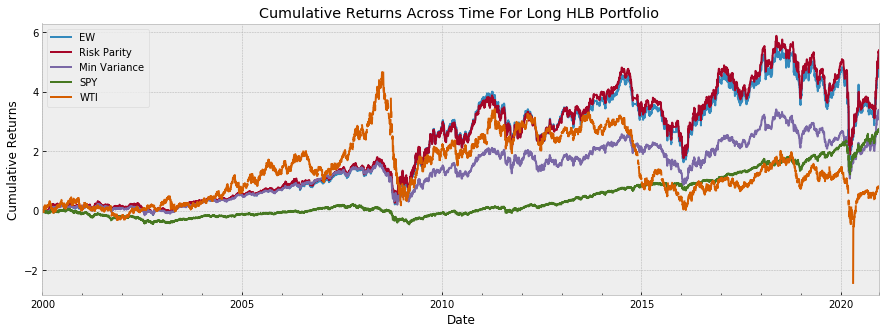

In [8]:
fig,axe3=plt.subplots()
Cum_ret = (1+J2).cumprod()
(Cum_ret-1).plot(figsize=(15,5),ax = axe3)
plt.title('Cumulative Returns Across Time For Long HLB Portfolio ')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

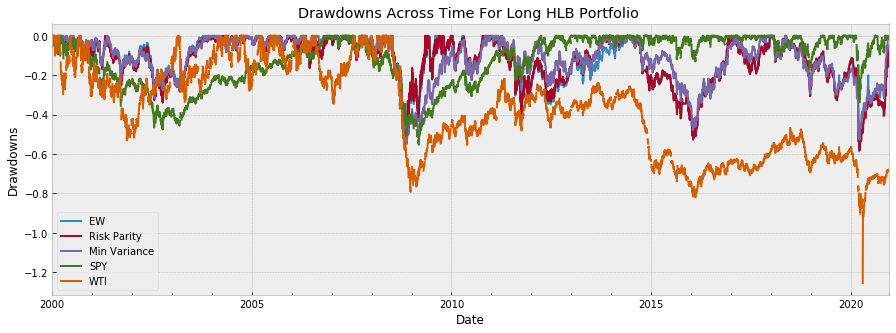

In [9]:
DD = Cum_ret.div(Cum_ret.cummax()) - 1
fig,axe=plt.subplots()
DD.plot(figsize=(15,5),ax = axe)
plt.title('Drawdowns Across Time For Long HLB Portfolio ')
plt.xlabel('Date')
plt.ylabel('Drawdowns')
plt.show()